In [1]:
from svg.path import parse_path
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# CiS Logo
string = "m 1455.1652,140.32753 c -90.8754,4.86605 -188.9087,40.36014 -253.3774,104.90832 -93.0334,93.14817 -133.5575,449.74325 18.2819,605.71236 54.1618,55.63493 130.5922,81.88732 235.6926,88.43041 0,5.4415 -0.4285,-607.51988 -0.5899,-799.06158 m -0.01,-50.873716 C 1451.4271,40.859408 1426.1474,1.7942148 1401.8288,-18.534718 1357.8546,-55.294712 1277.533,-53.032522 1277.533,-53.032522 v -34.231193 h 532.8966 v 34.231193 c -150.8843,3.479248 -184.4745,86.264984 -178.3126,193.428182 -0.8961,-7.64246 162.2765,-102.645821 486.2294,3.89908 -2e-4,186.60643 0,0 0,186.60644 h -66.3093 c 0.5933,-2.96168 14.071,-178.74796 -224.1072,-177.76993 -231.8989,0.95226 -220.3233,224.1407 -118.6442,270.83772 101.6791,46.69702 201.2545,76.22576 272.1603,95.63756 70.9058,19.41181 176.0746,77.15389 180.1055,203.98624 0,0 17.0959,124.25781 -68.5876,203.27717 -85.6837,79.01946 -282.6947,74.77876 -282.6947,74.77876 l -177.0871,-1.2925 m -0.1052,-59.75691 222.8784,-3.5853 c 129.3729,-2.08114 189.3659,-81.54176 190.6593,-149.87179 0.7688,-40.61378 -12.9857,-82.68947 -47.0507,-118.84386 -38.6752,-41.04728 -133.3642,-56.31374 -204.7858,-77.55768 -61.8679,-18.40227 -118.8091,-42.55925 -162.7338,-63.08677 1.0013,155.42516 0.9834,323.94062 1.0326,412.9454 m 0.1052,59.75691 c -1.6147,2.4735 6.2139,135.9907 177.2474,132.6763 0,34.2312 0,0 10e-5,34.2313 H 1277.533 v -34.2312 c 0,0 178.034,1.445 177.6322,-142.47588 -56.1103,-9.24829 -135.0034,4.26364 -262.6703,-47.93941 -117.4411,-48.02172 -288.32699,-188.8369 -277.04947,-416.57469 9.8515,-198.94083 104.78797,-284.30231 204.02317,-344.66138 133.7102,-81.3282 272.5521,-89.523837 335.6966,-91.937916"
# Cat
#string = "m 6.8195771,179.62302 c 0,-0.12537 0.204889,-0.16876 0.455308,-0.0964 0.583681,0.16862 0.583681,0.32436 0,0.32436 -0.250419,0 -0.455308,-0.10258 -0.455308,-0.22795 z m 4.1823339,-0.0846 c 0.09651,-0.33168 -0.2842129,-0.74517 -1.5656259,-1.70039 -0.931226,-0.69419 -1.900942,-1.50855 -2.154923,-1.80972 -0.511491,-0.6065 -0.650222,-2.09283 -0.177218,-1.89865 3.079779,1.26433 4.3211199,1.72314 4.4066039,1.6287 0.05741,-0.0634 -0.5392239,-0.37426 -1.3258609,-0.69075 -0.786638,-0.31649 -1.865639,-0.78717 -2.397781,-1.04597 l -0.967529,-0.47054 v -4.25528 -4.25527 l 1.014267,-0.0767 1.014267,-0.0767 -0.35974,-0.81735 c -0.226757,-0.5152 -0.527218,-0.81734 -0.812795,-0.81734 -0.425128,0 -0.431122,0.037 -0.09724,0.5999 0.390421,0.65825 0.296235,0.90904 -0.341392,0.90904 -0.335937,0 -0.417366,-0.19849 -0.417366,-1.01735 0,-1.00779 0.007,-1.01609 0.739875,-0.88252 0.406932,0.0742 2.516483,0.48473 4.6878919,0.91238 3.499411,0.68919 5.490825,0.82955 5.867392,0.41356 0.177325,-0.19589 -0.391764,-0.35311 -3.441062,-0.95061 -1.502497,-0.29441 -2.78305,-0.60939 -2.845674,-0.69995 -0.06262,-0.0906 -0.523639,-0.17728 -1.0244779,-0.19269 -1.619108,-0.0498 -3.327827,-0.41479 -3.659989,-0.78173 -0.242377,-0.26776 -0.323956,-1.08165 -0.323956,-3.23206 0,-1.58079 0.08196,-2.87417 0.182123,-2.87417 0.100168,0 0.305057,0.1358 0.455308,0.30179 0.37877,0.41843 0.347418,-0.14311 -0.08004,-1.4335 -0.183279,-0.55328 -0.396793,-2.08108 -0.474473,-3.39512 l -0.141238,-2.38916 0.892459,0.94309 c 0.490852,0.5187 0.971863,0.94309 1.068912,0.94309 0.09705,0 0.553729,0.33525 1.014844,0.745 1.6022819,1.4238 5.6242279,4.92828 6.4790239,5.64544 0.472945,0.39679 0.913049,0.66272 0.97801,0.59095 0.06496,-0.0718 -0.547399,-0.6551 -1.360802,-1.2963 -1.743318,-1.37426 -2.073113,-1.81113 -1.180392,-1.56361 0.339196,0.0941 0.982709,0.0952 1.430027,0.003 0.64851,-0.1344 0.73764,-0.21533 0.439874,-0.39942 -0.205388,-0.12697 -0.475065,-0.16147 -0.599283,-0.0767 -0.124218,0.0847 -0.225851,0.0425 -0.225851,-0.094 0,-0.14865 -0.479272,-0.19467 -1.195184,-0.11477 l -1.195183,0.13339 -1.707405,-1.60156 c -1.3664469,-1.28174 -2.7772269,-2.52823 -3.8511469,-3.40265 -0.05217,-0.0425 -0.03891,-0.13903 0.02946,-0.21457 0.143435,-0.15845 2.838548,1.28874 3.4048139,1.82829 0.208955,0.19909 0.823621,0.50671 1.365924,0.6836 0.546033,0.1781 0.986007,0.4765 0.986007,0.66873 0,0.3744 1.3444,1.20023 1.986046,1.21997 0.215857,0.007 1.166134,0.3516 2.111725,0.76656 2.026948,0.88949 2.157715,0.91296 1.448058,0.25985 -0.295593,-0.27203 -0.453291,-0.49838 -0.35044,-0.50298 0.10285,-0.005 0.03516,-0.1761 -0.150415,-0.38111 -0.185578,-0.20501 -0.376826,-0.50335 -0.424994,-0.66299 -0.06378,-0.21138 -0.220128,-0.1988 -0.575411,0.0463 -0.376702,0.25989 -0.607723,0.2714 -1.014105,0.0505 -0.289449,-0.15733 -0.98727,-0.5042 -1.550713,-0.77084 -0.563444,-0.26664 -1.57257,-0.89639 -2.242504,-1.39945 -0.669933,-0.50306 -1.452916,-0.91465 -1.739961,-0.91465 -0.2870459,0 -0.5808699,-0.16976 -0.6529409,-0.37724 -0.07207,-0.20748 -0.27621,-0.37723 -0.453642,-0.37723 -0.177432,0 -0.594589,-0.15588 -0.927016,-0.34641 -0.534673,-0.30643 -0.557376,-0.36785 -0.196763,-0.53226 0.275723,-0.12571 0.315097,-0.22403 0.121664,-0.3038 -0.157292,-0.0649 -0.22808,-0.22145 -0.157305,-0.34796 0.182605,-0.32639 -0.211908,-0.28582 -0.518953,0.0534 -0.144903,0.16007 -0.511409,0.2127 -0.84232,0.12095 -0.562328,-0.15591 -0.585803,-0.23594 -0.585803,-1.99698 v -1.83456 l 1.422837,0.0952 c 1.049933,0.0702 1.333341,0.025 1.081357,-0.17258 -0.290251,-0.22759 -0.268604,-0.28988 0.144293,-0.4152 0.348845,-0.10587 0.459826,-0.30081 0.393722,-0.69159 -0.08695,-0.51398 -0.08091,-0.51626 0.10877,-0.0412 0.110453,0.27664 0.156793,0.633 0.10298,0.79191 -0.140502,0.41489 0.39882,0.71046 1.1397079,0.62461 0.350708,-0.0406 0.800935,0.0758 1.000505,0.25879 0.320521,0.29386 0.342521,0.25955 0.188571,-0.29408 l -0.174283,-0.62676 0.53984,0.66755 c 0.296911,0.36714 0.708427,0.70665 0.914479,0.75447 0.560486,0.13005 3.856822,3.49457 3.699412,3.77593 -0.07489,0.13386 -0.269509,0.18686 -0.432488,0.11777 -0.465024,-0.19713 -1.069937,0.41961 -0.89775,0.9153 0.08282,0.23842 0.238842,0.43348 0.346726,0.43348 0.107884,0 0.137186,-0.16976 0.06511,-0.37724 -0.183684,-0.52879 0.651623,-0.49256 1.4495,0.0629 0.443632,0.30883 0.610316,0.60889 0.558803,1.00596 -0.08767,0.67578 -0.213102,0.70009 -0.765089,0.14824 -0.229743,-0.22968 -0.471506,-0.35818 -0.537251,-0.28555 -0.06574,0.0726 0.153241,0.32949 0.486636,0.57081 0.333395,0.24132 0.974734,0.88159 1.425199,1.42282 0.706384,0.84872 0.840961,0.92276 0.97851,0.53839 0.304913,-0.85206 0.207339,-2.01982 -0.182581,-2.18511 -0.205735,-0.0872 -0.317068,-0.22153 -0.247406,-0.29849 0.284814,-0.31463 1.304433,0.73223 1.304433,1.3393 0,0.47824 0.08869,0.58911 0.374404,0.46799 0.414926,-0.17589 1.219174,0.49446 1.219174,1.0162 0,0.19389 0.144567,0.26909 0.34996,0.18201 0.422077,-0.17892 1.246859,0.5863 1.235431,1.14621 -0.0056,0.27606 -0.182744,0.16588 -0.568005,-0.35334 -0.67388,-0.90819 -0.726665,-0.71415 -0.116501,0.42828 0.447889,0.8386 0.324664,1.7026 -0.192471,1.34953 -0.139208,-0.095 -0.253106,-0.0625 -0.253106,0.0724 0,0.33116 1.609717,1.72002 2.357597,2.03414 0.331048,0.13904 0.601905,0.37633 0.601905,0.5273 0,0.15097 0.268269,0.66304 0.596155,1.13793 0.327885,0.47489 0.545831,0.86344 0.484324,0.86344 -0.09499,0 -2.094456,-1.69904 -3.409967,-2.89759 -0.216937,-0.19765 -0.530587,-0.30165 -0.697001,-0.2311 -0.438915,0.18606 -0.843629,1.60128 -0.843629,2.95003 0,0.84906 -0.08008,1.13489 -0.292698,1.04475 -0.179821,-0.0762 -0.292698,0.0747 -0.292698,0.39136 0,0.30054 0.115088,0.46664 0.276053,0.39841 0.15183,-0.0644 0.411478,0.0632 0.576996,0.28356 0.743492,0.98965 7.395877,5.77386 7.64532,5.49829 0.06176,-0.0682 -0.259166,-0.36617 -0.713181,-0.66209 -0.454014,-0.29593 -0.82548,-0.63174 -0.82548,-0.74625 0,-0.11452 -0.128056,-0.25685 -0.284568,-0.3163 -0.156512,-0.0594 -0.09498,-0.0754 0.136741,-0.0354 0.594557,0.10263 1.513751,-0.408 1.513751,-0.84091 0,-0.24927 0.125407,-0.30555 0.398394,-0.17879 0.918821,0.42665 1.422837,0.43511 1.422837,0.0239 0,-0.22362 -0.09117,-0.40657 -0.202605,-0.40657 -0.277121,0 -2.756896,-2.71709 -2.756896,-3.02073 0,-0.26582 0.663307,0.27148 1.555848,1.2603 0.31213,0.3458 0.492343,0.48522 0.400471,0.30982 -0.09187,-0.17539 0.406376,0.12484 1.107216,0.66718 1.157693,0.89588 1.335766,0.96043 1.946737,0.70567 0.733722,-0.30595 0.767681,-0.15647 -0.443262,-1.95109 l -0.555205,-0.82281 0.723145,0.59062 c 1.095111,0.89443 1.144819,0.3981 0.07815,-0.78027 -0.518639,-0.57294 -0.94298,-1.12652 -0.94298,-1.23019 0,-0.10367 -0.384166,-0.47725 -0.853702,-0.83019 -1.18862,-0.89346 -2.202662,-1.91686 -2.057844,-2.07684 0.177629,-0.19623 1.668849,0.87071 2.760912,1.97538 1.068952,1.08129 1.744212,1.55587 1.744212,1.22587 0,-0.31499 -2.326947,-2.49269 -4.211598,-3.94147 -0.876468,-0.67376 -1.926298,-1.60084 -2.332956,-2.06017 -0.406657,-0.45934 -0.831366,-0.83516 -0.943797,-0.83516 -0.112431,0 -0.533112,-0.56586 -0.934846,-1.25746 -0.401734,-0.6916 -0.822191,-1.25745 -0.934348,-1.25745 -0.308388,0 -0.246021,0.28624 0.174105,0.79908 0.839783,1.02511 0.04159,0.65306 -1.281566,-0.59735 -1.713417,-1.61923 -3.251817,-2.92883 -3.467071,-2.95143 -0.08746,-0.009 -0.43536,-0.29962 -0.773119,-0.64542 -0.337758,-0.3458 -0.717526,-0.62873 -0.843927,-0.62873 -0.242242,0 0.737013,1.02644 1.605316,1.68266 0.281722,0.21292 0.512222,0.50481 0.512222,0.64866 0,0.14385 -0.187344,0.0743 -0.41632,-0.15467 -0.228976,-0.22892 -0.516026,-0.41621 -0.637889,-0.41621 -0.121863,0 -0.779684,-0.56411 -1.461825,-1.25357 -0.682141,-0.68947 -1.31709,-1.25532 -1.410997,-1.25746 -0.09391,-0.002 -0.170741,-0.12475 -0.170741,-0.27249 0,-0.14774 0.297537,-0.0346 0.661192,0.25149 0.88591,0.69687 1.106971,0.66187 0.351811,-0.0557 -0.554833,-0.52722 -0.574142,-0.60498 -0.228826,-0.92157 0.329303,-0.30192 0.393482,-0.27673 0.505994,0.19856 0.122797,0.51875 0.758715,0.78844 0.758715,0.32178 0,-0.40672 -1.016912,-0.96607 -1.625926,-0.89434 -0.405407,0.0478 -0.755643,-0.12682 -1.079203,-0.53791 -0.263458,-0.33473 -0.622399,-0.6086 -0.797646,-0.6086 -0.175246,0 -0.377597,-0.16976 -0.449668,-0.37724 -0.07207,-0.20748 -0.262309,-0.381 -0.422751,-0.3856 -0.309712,-0.009 -1.316155,-0.85063 -1.316155,-1.10078 0,-0.0816 0.162203,-0.1483 0.360452,-0.1483 0.198248,0 0.313498,-0.14147 0.25611,-0.31437 -0.05739,-0.1729 -0.219591,-0.28607 -0.360452,-0.25149 -0.381647,0.0937 -0.30955,-0.21574 0.133691,-0.57378 0.324223,-0.2619 0.340208,-0.38089 0.09502,-0.70726 -0.320997,-0.42727 -0.150503,-1.42248 0.243694,-1.42248 0.214649,0 1.092718,-0.94173 1.092718,-1.17194 0,-0.049 -0.711658,-0.016 -1.581463,0.0734 -1.133323,0.11636 -2.133787,0.0343 -3.5305889,-0.2895 -1.809963,-0.4196 -2.679799,-0.37089 -1.974609,0.11057 0.211424,0.14435 0.126208,0.24055 -0.291161,0.32869 l -0.590068,0.12461 v -6.28172 -6.28171 l 0.512222,0.15633 c 0.281722,0.086 2.202552,0.49627 4.2685119,0.91175 2.06596,0.41548 4.247892,0.93752 4.848738,1.16011 0.600846,0.22259 1.151334,0.33965 1.223307,0.26014 0.328513,-0.36291 -0.206323,-0.86879 -1.213673,-1.14797 -2.718201,-0.75332 -2.792712,-0.78587 -2.661749,-1.16289 0.08038,-0.2314 -0.0086,-0.3703 -0.237208,-0.3703 -0.20121,0 -0.365837,0.15893 -0.365837,0.35317 0,0.37807 -1.602489,0.37558 -3.5041969,-0.005 -1.363172,-0.27312 -1.326463,-0.26779 -2.130239,-0.30941 -0.684207,-0.0354 -0.739876,-0.10321 -0.739876,-0.90103 0,-0.69472 0.09975,-0.88395 0.512222,-0.97171 l 0.512221,-0.10899 -0.512221,-0.0342 -0.512222,-0.0343 v -7.52985 c 0,-5.23288 0.07686,-7.58235 0.251959,-7.7019 0.181724,-0.12407 0.17785,-0.22262 -0.0139,-0.35354 -0.160279,-0.10942 -0.237736,-0.65756 -0.195046,-1.38027 l 0.07081,-1.19876 0.96753,0.93901 c 0.532141,0.51646 0.967529,1.09514 0.967529,1.28596 0,0.19083 0.110264,0.34696 0.245031,0.34696 0.238758,0 1.65795,1.54565 4.4898759,4.88997 1.449626,1.71191 2.797441,2.73585 3.425367,2.60226 0.278117,-0.0592 0.157662,-0.31764 -0.503996,-1.08147 -1.698691,-1.961 -2.04154,-2.60189 -2.10233,-3.9299 -0.03157,-0.68964 -0.179778,-1.41678 -0.329354,-1.61588 -0.433672,-0.57726 -0.899168,-0.43149 -0.899168,0.28157 0,0.37189 -0.09767,0.57688 -0.231368,0.4856 -0.127251,-0.0869 -0.172428,-0.26331 -0.100391,-0.39208 0.07204,-0.12876 0.01517,-0.23411 -0.126375,-0.23411 -0.440253,0 -0.913459,-0.69701 -0.764444,-1.126 0.172737,-0.49728 1.17753,-0.32832 2.303934,0.38742 0.723601,0.45979 0.739876,0.4597 0.739876,-0.004 0,-0.66521 -0.654606,-3.54409 -0.960446,-4.22392 -0.139917,-0.31101 -0.191398,-0.63506 -0.114403,-0.72012 0.07699,-0.0851 -0.273141,-0.75913 -0.778081,-1.49795 -0.798006,-1.16761 -0.972836,-1.30551 -1.336817,-1.0544 -0.457762,0.31581 -0.436019,0.39913 0.732538,2.80709 0.29092,0.59948 0.356707,0.89956 0.169141,0.7715 -0.49213,-0.336 -1.419336,-0.31526 -2.0798349,0.0465 -0.782526,0.42862 -0.958218,0.74956 -0.513527,0.93808 0.220316,0.0934 0.294327,0.0461 0.197838,-0.12634 -0.106053,-0.18956 0.01458,-0.21305 0.386571,-0.0753 0.7908519,0.29292 1.6419779,0.3215 1.9369809,0.065 0.164227,-0.14277 0.306413,-0.0848 0.39125,0.15938 0.0733,0.211 0.03404,0.38365 -0.08724,0.38365 -0.12128,0 -0.220509,0.18186 -0.220509,0.40414 0,0.26991 -0.123004,0.352 -0.370336,0.24715 -0.203685,-0.0864 -0.512939,-0.0263 -0.687232,0.13355 -0.244343,0.22402 -0.410449,0.19701 -0.7255119,-0.11797 -0.310366,-0.31029 -0.472215,-0.33826 -0.673124,-0.11631 -0.20091,0.22194 -0.590212,-0.051 -1.6191,-1.13514 -0.745025,-0.78504 -1.46464,-1.42735 -1.599145,-1.42735 -0.464047,0 -0.272412,-1.47477 0.230251,-1.77196 0.261143,-0.15439 0.417285,-0.34426 0.346982,-0.42192 -0.0703,-0.0777 -0.283965,0.002 -0.474805,0.17691 -0.308736,0.28306 -0.346983,-0.19194 -0.346983,-4.30935 0,-4.370262 0.02623,-4.652282 0.471826,-5.073762 0.818412,-0.77412 1.495759,-0.93993 2.194359,-0.53717 0.349139,0.20128 0.993353,0.43721 1.431587,0.52429 0.4382339,0.0871 1.1041219,0.40702 1.4797509,0.71101 1.258385,1.01837 9.870784,3.566972 11.070266,3.275942 1.088987,-0.26423 0.467561,-0.62604 -1.367084,-0.79595 -0.899894,-0.0834 -1.69013,-0.24798 -1.75608,-0.36587 -0.06595,-0.117882 -0.320144,-0.214332 -0.564873,-0.214332 -0.244728,0 -0.622849,-0.10342 -0.840267,-0.22982 -0.217418,-0.12639 -0.972787,-0.35799 -1.678598,-0.51466 -1.507371,-0.33458 -1.941643,-0.77926 -2.147085,-2.19854 -0.08309,-0.57404 -0.343144,-1.3926 -0.577894,-1.81904 -0.437696,-0.79509 -1.664403,-1.77408 -2.225085,-1.77575 -0.323423,-0.001 -0.317756,0.0898 0.169086,2.708 0.109864,0.59083 0.12739,1.12365 0.03895,1.18403 -0.217025,0.14818 -2.3005559,-1.07884 -2.7885659,-1.64221 -0.214882,-0.24807 -0.599048,-0.52409 -0.853703,-0.61337 -0.254655,-0.0893 -0.463009,-0.26434 -0.463009,-0.38899 0,-0.12466 0.179277,-0.15243 0.398394,-0.0617 0.348878,0.14444 0.359561,0.1122 0.08595,-0.25938 -0.254415,-0.34552 -0.256529,-0.42432 -0.01138,-0.42432 0.234158,0 0.240352,-0.0671 0.02787,-0.30179 -0.150251,-0.16598 -0.273185,-0.49787 -0.273185,-0.73752 0,-0.4261 -0.820022,-0.90504 -1.072336,-0.6263 -0.07007,0.0774 -0.139187,0.38959 -0.153584,0.69373 -0.0144,0.30414 -0.154232,0.60008 -0.310744,0.65764 -0.215668,0.0793 -0.284567,-0.53825 -0.284567,-2.55072 v -2.65538 l 0.523877,0.22003 c 0.288133,0.12102 0.979632,0.55897 1.536665,0.97324 0.557032,0.41426 2.037229,1.29075 3.2893259,1.94777 1.252097,0.65701 2.360936,1.24663 2.464087,1.31027 0.103151,0.0636 0.08975,-0.0942 -0.02979,-0.35073 -0.790185,-1.6958 -1.172609,-2.90592 -1.29981,-4.11303 -0.169243,-1.60609 -0.472164,-2.61509 -1.075908,-3.58374 -0.798228,-1.28068 0.362987,-0.63605 2.000585,1.11058 0.6317,0.67377 1.516643,1.50135 1.966538,1.83907 0.449896,0.33772 0.927023,0.95955 1.060284,1.38185 0.256873,0.81402 0.365766,0.88827 1.64491,1.12155 0.600588,0.10954 0.985709,0.40763 1.47975,1.14536 0.367323,0.54851 0.770304,1.00404 0.895514,1.01231 0.12521,0.008 0.782079,0.57679 1.459708,1.26339 0.67763,0.68661 1.36127,1.24838 1.519198,1.24838 0.157929,0 0.5905,0.28198 0.96127,0.62663 0.57356,0.53315 0.714465,0.57294 0.944532,0.2667 0.571802,-0.76112 0.185042,-1.70499 -1.030207,-2.51417 -1.256389,-0.83657 -3.194692,-2.59082 -3.040141,-2.75145 0.05294,-0.055 0.941408,-0.16036 1.974372,-0.23407 1.841985,-0.13146 1.880781,-0.12231 2.016652,0.47573 0.185353,0.81583 0.497139,0.77345 0.586277,-0.0797 0.07318,-0.7004 0.576742,-0.99713 1.225457,-0.72213 0.264161,0.11198 0.193346,0.38532 -0.354779,1.36941 -0.679863,1.22061 -0.922252,2.80856 -0.428706,2.80856 0.163331,0 0.206473,0.27418 0.119088,0.75685 -0.120712,0.66675 -0.0021,0.89747 0.995986,1.93817 1.251547,1.30491 1.365351,1.58032 0.653022,1.58032 -0.409488,0 -0.457186,0.10157 -0.324744,0.69159 0.08538,0.38038 0.511708,1.198872 0.947388,1.818862 0.887391,1.26279 0.600629,1.83688 -0.302821,0.60624 -0.293759,-0.40014 -0.637069,-0.86784 -0.762913,-1.03933 -0.181331,-0.24711 -0.321865,-0.2476 -0.677307,-0.002 -0.246676,0.17018 -0.448501,0.4381 -0.448501,0.59537 0,0.15727 -0.153667,0.42683 -0.341481,0.59902 -0.187815,0.1722 -0.341481,0.5103 -0.341481,0.75135 0,0.24105 -0.212324,0.73646 -0.471831,1.10092 -0.259508,0.36433 -0.415832,0.66252 -0.347388,0.66252 0.06844,0 -0.160837,0.53757 -0.509512,1.19458 -0.348674,0.65702 -0.701356,1.39263 -0.783737,1.63469 -0.08238,0.24206 -0.368399,0.44011 -0.635597,0.44011 -0.663849,0 -2.715114,-1.3027 -2.7154,-1.72447 -1.33e-4,-0.19731 -0.141782,-0.28126 -0.335792,-0.19902 -0.184558,0.0782 -1.570567,-0.30575 -3.080019,-0.85331 -1.509451,-0.54755 -3.02157,-0.99556 -3.360263,-0.99556 -0.612047,0 -0.611093,0.003 0.156209,0.45739 0.621268,0.36808 0.827035,0.69677 1.053781,1.68328 0.15497,0.67424 0.231689,1.40208 0.170486,1.61741 -0.08868,0.31202 -0.06647,0.32223 0.109394,0.0503 0.154285,-0.23856 0.267519,-0.25747 0.376392,-0.0629 0.08565,0.15309 0.08257,0.27834 -0.0068,0.27834 -0.0894,0 -0.0049,0.19805 0.187694,0.44011 0.480285,0.60352 1.313905,2.472 1.313905,2.94499 0,0.4266 0.576011,0.53039 0.792815,0.14287 0.0752,-0.13441 -0.03332,-0.53108 -0.241148,-0.88148 -0.277289,-0.4675 -0.312244,-0.72444 -0.131319,-0.96527 0.303694,-0.40424 -0.130406,-2.1842 -0.532688,-2.1842 -0.144981,0 -0.504205,-0.28293 -0.798276,-0.62873 -0.294071,-0.3458 -0.453051,-0.62872 -0.353289,-0.62872 0.09976,0 0.0428,-0.18448 -0.126591,-0.40995 -0.277783,-0.36975 -0.232624,-0.39166 0.460637,-0.22345 0.422736,0.10257 1.440579,0.4851 2.261872,0.85005 1.143917,0.50833 1.530281,0.81065 1.651508,1.29229 0.08704,0.3458 0.168461,0.48726 0.180942,0.31436 0.03486,-0.48292 1.108039,-0.37283 1.593505,0.16347 0.237899,0.26281 0.519621,0.39469 0.626049,0.29306 0.106428,-0.10163 0.669402,-0.37807 1.251053,-0.61433 0.754228,-0.30636 1.228273,-0.71456 1.652793,-1.42322 0.576066,-0.96164 1.133974,-1.455 3.626117,-3.20658 1.30041,-0.91399 2.479785,-1.02368 2.613637,-0.24309 0.05683,0.33143 -0.02652,0.39812 -0.339617,0.27172 -0.400685,-0.16175 -0.400776,-0.14966 -0.0026,0.35204 0.226771,0.28574 0.316077,0.55957 0.198457,0.60849 -0.117619,0.0489 -0.264559,1.09852 -0.326533,2.33243 -0.09089,1.80978 -0.195056,2.31001 -0.538827,2.58771 -0.340821,0.2753 -0.364686,0.3862 -0.119189,0.55381 0.254181,0.17354 0.255872,0.31238 0.0098,0.80742 -0.339282,0.68265 -0.304209,0.53447 -0.680449,2.87523 -0.244639,1.52202 -0.236018,1.88334 0.0606,2.54018 0.312084,0.69109 0.310313,0.79445 -0.01817,1.05998 -0.279926,0.22629 -0.236713,0.22762 0.187143,0.006 0.458183,-0.23982 0.600567,-0.21375 0.844382,0.1546 0.25303,0.38227 0.274844,0.31763 0.158978,-0.47114 -0.07713,-0.5251 -0.04027,-0.91421 0.08661,-0.91421 0.279955,0 0.749291,-1.12071 0.749291,-1.78921 0,-0.38606 -0.104668,-0.4714 -0.435779,-0.3553 -0.417657,0.14644 -0.42226,0.10269 -0.110679,-1.05189 0.479387,-1.77639 0.504959,-1.80939 0.467203,-0.603 -0.05645,1.80372 0.431759,1.54231 1.439452,-0.77073 0.501833,-1.1519 0.913306,-2.29768 0.914383,-2.54617 0.0011,-0.24849 -0.304724,-0.64459 -0.679563,-0.88021 -0.374837,-0.23563 -0.68217,-0.56988 -0.682962,-0.74278 -0.002,-0.44923 0.306129,-0.38939 0.971297,0.18862 0.639191,0.55543 0.848496,0.62151 0.848496,0.26786 0,-0.12931 0.110403,-0.5537 0.245338,-0.94309 l 0.245339,-0.70797 0.417201,0.56586 c 0.229461,0.31121 0.485048,0.56585 0.567974,0.56585 0.08292,0 -0.06155,-0.29819 -0.321059,-0.66264 -0.597009,-0.83844 -0.603943,-1.1936 -0.01653,-0.8463 0.383913,0.22697 0.455308,0.19125 0.455308,-0.2278 0,-0.27335 0.102444,-0.56693 0.227654,-0.65242 0.125209,-0.0855 0.227654,-0.425 0.227654,-0.75447 0,-0.32947 0.107345,-0.67233 0.238547,-0.76191 0.131201,-0.0896 0.216365,-0.35089 0.189251,-0.5807 -0.04601,-0.39 0.242804,-1.31185 0.747327,-2.385322 0.118534,-0.25221 0.425883,-0.90442 0.683,-1.44936 l 0.467483,-0.99079 2.012819,2.22993 c 1.107052,1.226462 2.525723,2.662032 3.152605,3.190152 1.040586,0.87665 1.105984,0.99078 0.751408,1.31135 -0.349904,0.31635 -0.328671,0.33715 0.214329,0.20993 0.412448,-0.0966 0.771768,0.0175 1.13827,0.36148 l 0.535563,0.50267 -0.569135,-0.21675 c -0.879871,-0.3351 -1.165124,-0.12626 -0.854904,0.62588 0.202869,0.49188 0.194644,0.67465 -0.0375,0.83314 -0.24236,0.16548 -0.239965,0.22827 0.01295,0.33938 0.170679,0.075 0.05422,0.14871 -0.258809,0.16383 -0.829336,0.0401 -0.144808,0.41112 1.13827,0.61699 0.563444,0.0904 1.17811,0.27843 1.365924,0.41785 0.243542,0.18078 0.09584,0.20655 -0.514999,0.0898 -0.754937,-0.14424 -0.838217,-0.11106 -0.702442,0.27981 0.132861,0.38248 0.06283,0.41881 -0.509446,0.26427 -0.364914,-0.0985 -0.909259,-0.24516 -1.209656,-0.32581 -0.37696,-0.10121 -0.496228,-0.0574 -0.38496,0.14152 0.08867,0.1585 0.295023,0.28817 0.458563,0.28817 0.16354,0 0.553552,0.22264 0.866695,0.49475 0.313142,0.2721 0.650715,0.41357 0.750161,0.31436 0.09945,-0.0992 0.10712,-0.0389 0.01705,0.13398 -0.109128,0.20949 -0.0029,0.31436 0.318417,0.31436 0.265199,0 0.418866,0.11317 0.341481,0.25149 -0.141621,0.25315 0.326351,0.31734 2.048886,0.28104 0.720525,-0.0152 0.815571,0.0285 0.455308,0.20945 -0.422894,0.21236 -0.41479,0.23115 0.113827,0.26399 0.313025,0.0194 0.774024,0.14014 1.024443,0.26822 0.308043,0.15755 0.05033,0.1833 -0.796789,0.0796 -1.574571,-0.1927 -1.348665,0.11956 0.390548,0.53984 0.724272,0.17502 1.111969,0.33155 0.861549,0.34784 -0.379337,0.0247 -0.398331,0.0703 -0.113827,0.27341 0.303538,0.2167 0.303538,0.24484 0,0.25323 -0.230219,0.006 -0.156043,0.16968 0.227654,0.50125 l 0.569135,0.4918 -0.736807,-0.22737 c -0.447117,-0.13799 -0.788047,-0.13579 -0.867136,0.006 -0.07168,0.12813 0.08792,0.23296 0.354671,0.23296 0.592991,0 1.248967,0.64728 0.898482,0.88657 -0.16572,0.11315 -0.157598,0.27446 0.02613,0.51902 0.17558,0.23371 0.183939,0.35485 0.02449,0.35485 -0.13315,0 -0.304776,-0.11205 -0.381391,-0.24899 -0.08767,-0.15671 -0.252008,-0.13341 -0.443413,0.0629 -0.248204,0.25453 -0.130899,0.39019 0.638085,0.73792 0.963379,0.43563 0.863892,0.52441 -0.537553,0.47969 -0.751977,-0.024 -0.726371,0.005 0.455308,0.50963 0.688654,0.29429 1.405764,0.68078 1.593578,0.85889 0.187815,0.1781 0.726779,0.40281 1.197699,0.49936 0.470918,0.0965 0.906448,0.26532 0.967844,0.37506 0.06139,0.10974 -0.109424,0.13567 -0.379595,0.0576 -0.336607,-0.0972 -0.43996,-0.0503 -0.328359,0.1492 0.08957,0.1601 0.387315,0.29283 0.661647,0.29495 0.274332,0.002 0.652451,0.11513 0.840266,0.25114 0.242873,0.17588 0.111393,0.20584 -0.455308,0.10374 l -0.796789,-0.14356 0.626049,0.45365 c 0.344326,0.2495 0.626048,0.5406 0.626048,0.64688 0,0.10629 0.236091,0.19324 0.524647,0.19324 0.288556,0 0.909143,0.38906 1.37908,0.86458 0.469939,0.47552 1.024158,0.90068 1.231599,0.94482 0.207443,0.0441 0.469274,0.43502 0.581849,0.86865 0.112578,0.43363 0.449153,0.93295 0.747948,1.10961 0.996938,0.5894 0.580996,1.10429 -1.156534,1.43164 -1.389304,0.26174 -2.038095,0.18455 -1.814095,-0.21584 0.06927,-0.12382 -0.05937,-0.22687 -0.285874,-0.22899 -0.349183,-0.003 -0.359885,-0.0409 -0.07036,-0.24764 0.264682,-0.18896 0.187883,-0.25136 -0.341481,-0.27744 -0.375629,-0.0185 -0.80938,-0.0157 -0.963893,0.006 -0.164724,0.0234 -0.225275,-0.12032 -0.146384,-0.34743 0.08798,-0.25328 0.0033,-0.38734 -0.244726,-0.38734 -0.208599,0 -0.315478,0.11403 -0.237507,0.2534 0.07974,0.14253 -0.120727,0.12127 -0.458176,-0.0486 -0.475344,-0.23926 -0.637274,-0.23524 -0.779708,0.0194 -0.127796,0.22843 -0.219329,0.15419 -0.316617,-0.2568 -0.07844,-0.33136 -0.01906,-0.66949 0.139156,-0.7922 0.160621,-0.12459 0.03882,-0.13947 -0.291343,-0.0356 -0.500747,0.15754 -0.531945,0.13136 -0.265752,-0.22296 0.262672,-0.34964 0.192746,-0.4517 -0.541809,-0.79075 -0.463873,-0.21413 -0.923747,-0.38932 -1.021943,-0.38932 -0.0982,0 -0.124962,-0.22634 -0.05947,-0.50298 0.0802,-0.33879 0.007,-0.50298 -0.224287,-0.50298 -0.380182,0 -0.723717,-1.12074 -0.478105,-1.55976 0.107823,-0.19273 -0.05988,-0.23145 -0.54158,-0.12502 -0.755609,0.16694 -1.139379,-0.28717 -0.675632,-0.79948 0.18876,-0.20852 0.109866,-0.28314 -0.302356,-0.28598 -0.443668,-0.003 -0.487906,-0.0537 -0.216271,-0.24764 0.297701,-0.21254 0.29434,-0.24429 -0.02621,-0.24764 -0.202232,-0.002 -0.663232,-0.25546 -1.024443,-0.56299 -0.416782,-0.35483 -0.542589,-0.40078 -0.344309,-0.12574 0.27955,0.38776 0.249591,0.43339 -0.284567,0.43339 -0.378905,0 -0.597009,0.13781 -0.597009,0.37723 0,0.44614 -0.584472,0.50525 -0.8207,0.083 -0.11275,-0.20154 -0.03728,-0.24025 0.239545,-0.1229 0.339912,0.14409 0.381343,0.0709 0.260661,-0.46025 -0.11774,-0.51823 -0.06101,-0.63156 0.316157,-0.63156 0.252805,0 0.459645,-0.11318 0.459645,-0.25149 0,-0.13832 0.230499,-0.26066 0.512221,-0.27185 0.410476,-0.0163 0.331339,-0.11913 -0.398394,-0.51758 l -0.910616,-0.49722 0.910616,0.14411 c 0.888458,0.1406 0.896768,0.13505 0.341481,-0.22799 -0.313024,-0.20464 -0.774024,-0.38327 -1.024443,-0.39694 -0.393015,-0.0214 -0.377441,-0.0604 0.113827,-0.28501 l 0.569154,-0.26153 -0.562815,-0.23945 c -0.610011,-0.25953 -1.372244,-1.05626 -1.372244,-1.43434 0,-0.1293 -0.179278,-0.31594 -0.398395,-0.41475 -0.365721,-0.16491 -0.361052,-0.1966 0.05691,-0.38646 0.387519,-0.17603 0.395993,-0.20945 0.05691,-0.2245 -0.24129,-0.0107 -0.398394,-0.21602 -0.398394,-0.52065 0,-0.31284 -0.150607,-0.50153 -0.398395,-0.49913 -0.340467,0.003 -0.348743,0.0393 -0.05691,0.24764 0.44383,0.31685 0.185779,0.31706 -0.568013,5e-4 -0.328712,-0.13806 -0.534222,-0.3644 -0.456694,-0.50298 0.15653,-0.27979 -0.335753,-0.335 -0.890425,-0.0999 -0.197335,0.0837 -0.299575,0.25795 -0.227199,0.38732 0.07823,0.13984 -0.130002,0.16323 -0.513528,0.0577 -0.58261,-0.16034 -0.614848,-0.13695 -0.332682,0.24141 0.220075,0.29509 0.232928,0.41895 0.04348,0.41895 -0.147932,0 -0.205651,0.11317 -0.128267,0.25149 0.07738,0.13832 -0.01047,0.25149 -0.195247,0.25149 -0.184771,0 -0.378325,0.14045 -0.430123,0.31212 -0.11204,0.37131 0.357701,0.94533 0.773591,0.94533 0.162012,0 0.06132,0.18048 -0.223766,0.40107 -0.319098,0.24691 -0.73234,0.34173 -1.075096,0.2467 -0.317764,-0.0881 -0.556764,-0.0444 -0.556764,0.10188 0,0.14095 0.141123,0.25628 0.313607,0.25628 0.172482,0 0.4534,0.18608 0.624262,0.41351 0.276367,0.36787 0.253752,0.39356 -0.204894,0.23275 -0.283554,-0.0994 -0.846194,-0.0937 -1.250312,0.0126 l -0.73476,0.19336 1.024443,0.18398 c 1.560252,0.2802 2.465019,0.26685 2.048886,-0.0302 -0.255746,-0.18258 -0.141435,-0.24284 0.455308,-0.23999 0.683611,0.003 0.73632,0.0426 0.371081,0.27702 -0.343733,0.22061 -0.365651,0.31525 -0.113827,0.49148 0.230845,0.16155 0.180648,0.21926 -0.193197,0.22211 -0.370946,0.003 -0.467578,0.1118 -0.363873,0.41034 0.119368,0.34365 0.06743,0.36288 -0.335949,0.1244 -0.26243,-0.15516 -0.54012,-0.39467 -0.617088,-0.53224 -0.182886,-0.32691 -1.706649,-0.3257 -1.706649,0.001 0,0.13832 0.204889,0.25149 0.455308,0.25149 0.25042,0 0.455308,0.12637 0.455308,0.28083 0,0.15525 -0.199848,0.22309 -0.446937,0.15171 -0.245816,-0.071 -0.565693,0.0289 -0.710838,0.22215 -0.207466,0.27616 -0.184914,0.35128 0.105458,0.35128 0.203145,0 0.369355,0.18235 0.369355,0.40522 0,0.32371 0.153908,0.37333 0.765129,0.24666 0.420821,-0.0872 1.009876,-0.0504 1.309011,0.0818 l 0.543881,0.24039 -0.525658,0.0159 c -0.289819,0.009 -0.462531,0.12877 -0.384958,0.26743 0.0847,0.1514 -0.215998,0.25149 -0.755479,0.25149 -0.492896,0 -1.009791,0.15124 -1.148655,0.33608 -0.336896,0.44843 0.821485,0.83882 2.299592,0.77498 0.593132,-0.0256 1.027266,0.0449 0.964743,0.15663 -0.06252,0.11175 0.06685,0.26367 0.287504,0.33759 0.220649,0.0739 -0.418373,0.10335 -1.420051,0.0654 -1.001677,-0.0379 -1.6407,-0.0247 -1.420051,0.0294 0.220651,0.0541 0.34773,0.19395 0.282398,0.31072 -0.06533,0.11678 0.152464,0.44802 0.483988,0.73611 l 0.602771,0.52378 -0.771342,-0.16883 c -0.701049,-0.15344 -0.742869,-0.13058 -0.4589,0.25083 0.268973,0.36126 0.261055,0.41965 -0.05691,0.41965 -0.203145,0 -0.369355,0.16976 -0.369355,0.37724 0,0.4326 0.479738,0.50114 0.826493,0.11808 0.155342,-0.17161 0.420675,-0.177 0.785407,-0.016 l 0.550813,0.24322 -0.569135,0.0198 c -0.313024,0.0109 -0.722801,0.1406 -0.910616,0.28826 -0.257718,0.20261 -0.132076,0.23639 0.512222,0.1377 1.117792,-0.17121 1.08924,-2.5e-4 -0.05691,0.3406 -0.500839,0.14898 -0.910616,0.37726 -0.910616,0.50728 0,0.13352 0.250379,0.11038 0.575311,-0.0532 0.442159,-0.22255 0.639742,-0.21786 0.853703,0.0203 0.21997,0.24484 0.194787,0.2747 -0.120003,0.14231 -0.234935,-0.0988 -0.398395,-0.0501 -0.398395,0.11874 0,0.15746 0.153079,0.35118 0.340174,0.4305 0.187096,0.0793 0.283493,0.24551 0.214218,0.36934 -0.06927,0.12382 0.05937,0.23619 0.285874,0.24969 1.365767,0.0814 1.963393,0.003 2.12149,-0.28007 0.09834,-0.17578 0.381184,-0.26112 0.628546,-0.18966 0.357712,0.10333 0.425947,0.0294 0.333433,-0.36145 -0.07853,-0.33173 -0.254162,-0.45155 -0.540589,-0.36881 -0.23335,0.0674 -0.373496,0.0318 -0.311438,-0.0791 0.155948,-0.27875 -0.548503,-0.54732 -0.872625,-0.33268 -0.158201,0.10476 -0.14512,0.0127 0.03263,-0.22966 0.250376,-0.3414 0.232617,-0.42285 -0.113827,-0.52209 -0.308009,-0.0882 -0.275653,-0.12486 0.129612,-0.14675 0.453364,-0.0245 0.494586,-0.0898 0.256694,-0.40641 -0.171599,-0.22841 -0.189941,-0.37724 -0.04649,-0.37724 0.1303,0 0.373344,-0.0566 0.540096,-0.12584 0.171289,-0.0711 0.415302,0.14218 0.560898,0.49025 0.214118,0.51188 0.194863,0.63459 -0.113827,0.7254 -0.247396,0.0728 -0.20039,0.11905 0.140683,0.13847 0.281722,0.016 0.512222,0.13175 0.512222,0.25712 0,0.12537 0.204889,0.16876 0.455308,0.0964 0.551738,-0.15939 0.606167,0.31186 0.07402,0.64084 -0.393484,0.24326 -0.629559,1.04672 -0.307549,1.04672 0.09982,0 0.474918,-0.16906 0.833557,-0.37569 0.35864,-0.20662 0.810861,-0.37638 1.004936,-0.37723 0.194075,-7.6e-4 0.475796,-0.13736 0.626048,-0.30334 0.165605,-0.18294 0.273185,-0.19884 0.273185,-0.0404 0,0.14378 -0.281722,0.41198 -0.626049,0.596 -0.502819,0.26872 -0.54763,0.35454 -0.227654,0.43604 0.219117,0.0558 0.398395,0.19826 0.398395,0.31656 0,0.33191 -2.587056,0.25833 -2.775749,-0.079 -0.121305,-0.21683 -0.331409,-0.18729 -0.800174,0.11249 -0.6597,0.42189 -1.340818,0.46516 -1.850007,0.11751 -0.314488,-0.21472 -0.66513,-0.006 -0.428741,0.25486 0.07712,0.0852 0.478358,0.23364 0.891643,0.32988 l 0.751429,0.17499 -0.682962,0.41452 c -0.658557,0.3997 -0.663304,0.41488 -0.132797,0.42458 0.302588,0.006 0.483459,0.0838 0.401932,0.17381 -0.08153,0.0901 0.02945,0.31825 0.246624,0.50707 0.340896,0.2964 0.308458,0.30245 -0.237368,0.0443 -0.457525,-0.21642 -0.70101,-0.22307 -0.881164,-0.024 -0.180154,0.19902 0.05745,0.32392 0.859876,0.452 0.609851,0.0974 1.262487,0.28463 1.450302,0.41619 0.281822,0.1974 0.273153,0.21582 -0.04962,0.10544 -0.668895,-0.22875 -0.64098,0.2338 0.03102,0.51401 0.572709,0.23881 0.712252,0.17924 1.399797,-0.59757 l 0.763674,-0.86282 -0.67404,0.13834 -0.674038,0.13834 0.626048,-0.29454 c 0.344327,-0.162 0.626049,-0.37266 0.626049,-0.46815 0,-0.31135 -0.885829,-0.43832 -0.995556,-0.14269 -0.06883,0.18543 -0.113155,0.19142 -0.124741,0.0169 -0.01056,-0.1593 -0.322617,-0.22375 -0.757849,-0.15653 -0.971479,0.15005 -0.726878,-0.13029 0.285613,-0.32734 0.431202,-0.0839 0.840143,-0.25293 0.908758,-0.37558 0.161739,-0.2891 2.049699,-0.26313 2.049699,0.0282 0,0.12201 -0.198842,0.22184 -0.441872,0.22184 -0.24303,0 -0.514421,0.12968 -0.603092,0.28817 -0.113023,0.20203 0.01489,0.23934 0.427921,0.12482 0.591423,-0.16398 1.101479,0.2089 0.562916,0.41152 -0.158044,0.0595 -0.05685,0.0659 0.224867,0.0142 0.807828,-0.14804 0.59685,0.34883 -0.284567,0.67018 -0.438234,0.15978 -0.796789,0.40157 -0.796789,0.53733 0,0.13576 0.08772,0.18694 0.194931,0.11374 0.107211,-0.0732 0.645044,-0.195 1.195183,-0.27068 0.55014,-0.0757 1.205141,-0.1911 1.455561,-0.25649 0.250419,-0.0654 -0.108136,0.17654 -0.796789,0.53764 -0.850336,0.44588 -1.142525,0.70733 -0.910616,0.81485 0.187814,0.0871 0.345244,0.46562 0.349845,0.84123 0.0067,0.54795 -0.08328,0.66704 -0.455308,0.60252 -0.25502,-0.0442 -0.335617,-0.032 -0.179105,0.0271 0.156512,0.0591 0.284568,0.21815 0.284568,0.35335 0,0.14902 0.605211,0.1933 1.536664,0.11244 1.487314,-0.12912 1.515914,-0.12082 0.890489,0.25839 -0.355395,0.21548 -0.597193,0.44589 -0.537327,0.51203 0.189695,0.20956 2.436761,-0.70854 2.306042,-0.9422 -0.06873,-0.12284 0.09201,-0.22336 0.357212,-0.22336 0.265198,0 0.418865,0.11317 0.341481,0.25149 -0.07738,0.13832 0.07628,0.25149 0.341481,0.25149 0.283534,0 0.420358,0.1105 0.332119,0.26822 -0.08253,0.14752 -0.204009,0.20862 -0.269952,0.13578 -0.128663,-0.14214 -1.428091,0.53128 -1.428091,0.74009 0,0.0689 0.355677,0.0819 0.790392,0.029 0.496725,-0.0605 0.73725,-0.001 0.647363,0.15944 -0.08795,0.1572 0.04614,0.20101 0.348192,0.11375 0.295568,-0.0854 0.435525,-0.0424 0.351387,0.10804 -0.07691,0.13747 -0.325181,0.1964 -0.551717,0.13096 -0.256573,-0.0741 -0.654494,0.16075 -1.055281,0.62288 -0.481523,0.55523 -0.533863,0.69545 -0.20804,0.55732 0.288285,-0.1222 0.383809,-0.0924 0.282765,0.0882 -0.08393,0.15001 -0.0239,0.32609 0.133396,0.39128 0.170239,0.0706 0.05564,0.22549 -0.283149,0.38278 -0.426248,0.1979 -0.465742,0.26824 -0.157305,0.28018 0.267114,0.0103 0.351753,0.1264 0.240867,0.3303 -0.107628,0.19791 -0.0224,0.18112 0.230045,-0.0453 0.222673,-0.19972 0.352827,-0.56321 0.292667,-0.81735 -0.124467,-0.5258 0.08953,-0.59438 0.486465,-0.15589 0.185189,0.20458 0.273185,0.2126 0.273185,0.0249 0,-0.15355 0.354951,-0.26578 0.796789,-0.25194 0.438233,0.0137 0.796789,0.0512 0.796789,0.0832 0,0.032 -0.468487,0.31674 -1.041083,0.63265 -1.173665,0.64753 -1.598463,1.11655 -0.622419,0.68722 0.765361,-0.33666 2.28377,-0.57025 2.053539,-0.31591 -0.08943,0.0988 -0.341834,0.19667 -0.56089,0.21749 -0.382782,0.0364 -1.097991,0.40862 -2.725678,1.41856 -0.991836,0.61541 -1.284843,0.61093 -0.981596,-0.015 0.368451,-0.76055 0.284586,-0.8243 -0.390386,-0.29678 -0.767187,0.5996 -1.778289,0.96363 -1.551737,0.55868 0.260165,-0.46504 -0.127657,-0.31378 -0.930968,0.36309 -0.985676,0.83053 -1.00403,0.25332 -0.02149,-0.67586 0.406932,-0.38484 0.61182,-0.7043 0.455308,-0.70992 -0.156512,-0.006 -0.284567,0.0897 -0.284567,0.21194 0,0.12219 -0.204889,0.28135 -0.455308,0.35369 -0.25042,0.0724 -0.455308,0.041 -0.455308,-0.0697 0,-0.11067 -0.416339,-0.0979 -0.925198,0.0284 -0.508859,0.12631 -1.014002,0.16902 -1.122541,0.0949 -0.108536,-0.0741 -0.255963,-0.03 -0.327615,0.0981 -0.07165,0.12808 -0.587003,0.22523 -1.145231,0.21591 -0.558228,-0.009 -0.967047,-0.10259 -0.908483,-0.20727 0.05856,-0.10468 -0.02222,-0.24765 -0.179507,-0.3177 -0.157293,-0.07 -0.06185,-0.1363 0.212087,-0.14722 0.346687,-0.0138 0.487996,-0.16765 0.464917,-0.5061 -0.0268,-0.39309 -0.154825,-0.45936 -0.668249,-0.34592 -0.358245,0.0791 -0.784195,0.004 -0.977139,-0.17328 -0.311326,-0.28543 -0.438331,-0.17932 -0.370338,0.30942 0.03714,0.26698 -1.04678,0.52513 -1.463387,0.34853 -0.194934,-0.0826 -0.930645,0.0735 -1.634911,0.34693 -0.704266,0.27345 -1.319009,0.45462 -1.366095,0.4026 -0.130206,-0.14384 0.880509,-1.24029 1.621816,-1.75938 0.475663,-0.33309 0.931465,-0.42652 1.646358,-0.33751 0.543722,0.0677 0.935633,0.0284 0.870908,-0.0872 -0.216025,-0.38613 -1.691858,-0.5439 -2.334994,-0.24961 -0.839224,0.38401 -2.714326,2.3475 -2.364759,2.47622 0.149943,0.0552 0.272623,0.21081 0.272623,0.34576 0,0.13496 -0.0973,0.17894 -0.216233,0.0977 -0.250913,-0.17131 -0.749134,0.7281 -0.534604,0.96509 0.07907,0.0873 0.03619,0.15882 -0.09529,0.15882 -0.131474,0 -0.290593,0.19804 -0.353596,0.4401 -0.063,0.24206 -0.188354,0.63816 -0.278562,0.88022 -0.113982,0.30586 -0.0582,0.44011 0.182856,0.44011 0.190776,0 0.383592,-0.12172 0.428479,-0.27047 0.05107,-0.16925 0.331976,-0.20106 0.750548,-0.085 0.582336,0.16146 0.61121,0.20784 0.22303,0.35826 -0.788206,0.30544 -0.419512,1.75765 0.446241,1.75765 0.196759,0 0.357742,0.16733 0.357742,0.37184 0,0.30554 -0.101668,0.32068 -0.570098,0.0849 -0.605678,-0.30486 -1.105408,-0.0691 -0.593842,0.28021 0.209344,0.14293 -0.03829,0.34799 -0.803382,0.66526 -0.608303,0.25225 -1.260525,0.6341 -1.449382,0.84854 -0.637941,0.72438 -1.443552,1.39823 -1.260887,1.05466 0.214689,-0.40379 -3.183789,3.49551 -4.081633,4.68313 -0.341397,0.45158 -0.565589,0.97977 -0.498204,1.17376 0.116063,0.33412 -0.429258,0.77887 -0.833183,0.67952 -0.103214,-0.0254 -0.127111,0.0621 -0.0531,0.19436 0.07401,0.13228 -0.05513,0.38972 -0.286972,0.57208 -0.231841,0.18237 -0.709124,0.81415 -1.060629,1.40396 -0.615739,1.03318 -0.624322,1.09042 -0.234816,1.56588 0.222356,0.27143 0.493903,0.43232 0.603438,0.35753 0.109535,-0.0748 0.280193,0.10604 0.37924,0.40182 0.09905,0.29579 0.277458,0.55769 0.396469,0.58201 0.119011,0.0243 0.192001,0.12503 0.162201,0.22379 -0.0298,0.0988 0.09826,0.11494 0.284567,0.036 0.213295,-0.0904 0.338753,0.006 0.338753,0.26053 0,0.22228 0.07683,0.40428 0.17074,0.40445 0.362784,7.6e-4 2.216612,1.89874 4.741332,4.85452 1.957303,2.29149 2.129944,2.36087 2.827439,1.1364 0.54133,-0.95032 0.575503,-0.97004 0.717183,-0.41379 0.08183,0.32124 0.158985,1.26727 0.171465,2.10229 0.02144,1.4344 0.07785,1.58272 1.021831,2.68666 0.549525,0.64265 0.953625,0.97618 0.897998,0.74119 -0.0889,-0.37556 0.07946,-0.41767 1.391227,-0.348 0.820804,0.0436 1.49237,-0.006 1.49237,-0.10975 0,-0.10397 -0.294691,-0.53393 -0.654867,-0.95547 -1.649196,-1.93019 -2.980733,-4.66455 -2.271468,-4.66455 0.471217,0 2.386909,1.68702 4.069511,3.58374 1.429157,1.61102 1.559573,1.69756 2.558307,1.69756 0.578808,0 1.105142,0.0943 1.169627,0.20958 0.06449,0.11526 -0.0063,0.2218 -0.157304,0.23675 -0.151003,0.0149 -0.479442,0.0817 -0.729861,0.14842 -0.250419,0.0667 -0.539458,0.1299 -0.64231,0.14048 -0.102849,0.0106 -0.02585,0.19726 0.171103,0.41484 0.398478,0.4402 1.186086,0.37117 1.097255,-0.0962 -0.0313,-0.16469 0.03306,-0.27113 0.143031,-0.23655 0.189497,0.0596 1.034007,-0.84315 1.903627,-2.03488 0.453678,-0.62171 0.905619,-0.72708 0.710603,-0.16567 -0.07207,0.20748 -0.07133,0.37724 0.0016,0.37724 0.291142,0 1.499575,-0.93322 1.379788,-1.06554 -0.0705,-0.0779 0.05792,-0.12464 0.285385,-0.10389 0.316161,0.0288 0.422398,-0.15717 0.451041,-0.78975 0.03152,-0.69609 -0.0287,-0.80427 -0.379237,-0.68137 -0.229186,0.0804 -0.469648,0.0515 -0.534356,-0.0642 -0.06471,-0.11566 0.15717,-0.20514 0.493064,-0.19885 0.472027,0.009 0.628662,0.15199 0.689751,0.63032 0.07809,0.61146 0.399441,1.00206 1.286887,1.56422 0.399778,0.25324 0.419443,0.24037 0.161238,-0.10553 -0.240323,-0.32196 -0.240323,-0.42099 0,-0.54184 0.161739,-0.0813 0.07803,-0.0898 -0.186012,-0.0188 -0.278819,0.075 -0.602591,-0.034 -0.772316,-0.25989 -0.353096,-0.47001 -0.12999,-0.80937 0.283104,-0.43064 0.363675,0.33343 2.388634,-0.0844 2.922278,-0.60292 0.197674,-0.19208 0.485443,-0.34924 0.639485,-0.34924 0.154042,0 0.217487,-0.11188 0.14099,-0.24861 -0.239485,-0.42807 0.63261,0.0388 1.556305,0.8331 0.691626,0.59476 0.915119,0.68063 1.066634,0.4098 0.257786,-0.46078 0.03193,-0.84489 -0.917598,-1.56055 -0.512595,-0.38634 -0.769972,-0.76298 -0.722344,-1.05708 0.05396,-0.33318 -0.02629,-0.41437 -0.296392,-0.29987 -0.218013,0.0924 -0.312605,0.0537 -0.229937,-0.094 0.20169,-0.36052 -0.63088,-1.44008 -1.004501,-1.3025 -0.183323,0.0675 -0.250542,0.002 -0.161559,-0.15678 0.150887,-0.2697 -0.286997,-1.00364 -1.056538,-1.77087 -0.219117,-0.21846 -0.396826,-0.51351 -0.394909,-0.65567 0.0023,-0.17251 0.05911,-0.17081 0.170741,0.005 0.09199,0.14496 0.679476,0.58688 1.305525,0.98204 0.626048,0.39516 1.513179,1.04187 1.971401,1.43713 0.730351,0.62999 0.818435,0.65656 0.713994,0.21537 -0.06553,-0.27681 -0.194842,-0.4516 -0.287372,-0.38843 -0.09253,0.0632 -0.362603,-0.0491 -0.600167,-0.24954 -0.35654,-0.30079 -0.376455,-0.40471 -0.114098,-0.59535 0.255956,-0.18599 0.191152,-0.37052 -0.332857,-0.94787 -0.357881,-0.3943 -0.739022,-0.68582 -0.846978,-0.64781 -0.107958,0.038 -0.138577,-0.034 -0.06804,-0.16012 0.07053,-0.12608 -0.02896,-0.37335 -0.221093,-0.54951 -0.192133,-0.17615 -0.30054,-0.46075 -0.240901,-0.63244 0.05964,-0.17169 -0.08936,-0.3693 -0.331121,-0.43914 -0.241707,-0.0699 -0.439506,-0.30379 -0.439506,-0.51988 0,-0.26935 0.125266,-0.34102 0.398394,-0.22794 0.350906,0.14527 0.360606,0.11363 0.08139,-0.26547 -0.568814,-0.77227 -0.0364,-0.7802 0.718813,-0.0107 1.796545,1.83053 2.087883,1.67467 0.524681,-0.2807 -0.552407,-0.69099 -0.967966,-1.29656 -0.923469,-1.34572 0.0445,-0.0492 0.44619,0.21841 0.892647,0.5946 0.952646,0.80269 1.097597,0.49107 0.185693,-0.39921 l -0.626049,-0.61122 0.630479,-0.08 0.630479,-0.08 -0.505684,-0.80016 c -0.656082,-1.03816 -0.902304,-1.20855 -1.265362,-0.87569 -0.163735,0.15012 -0.355507,0.20908 -0.426154,0.13104 -0.07065,-0.078 0.162326,-0.31598 0.517721,-0.52875 0.452105,-0.27066 0.526523,-0.38987 0.247781,-0.39692 -0.219117,-0.006 -0.398394,-0.16439 -0.398394,-0.35301 0,-0.18862 -0.234607,-0.61301 -0.521349,-0.94309 -0.286743,-0.33008 -0.773176,-1.13771 -1.080967,-1.79472 -0.307788,-0.65702 -0.624676,-1.19458 -0.704195,-1.19458 -0.07952,0 -0.198159,-0.22635 -0.263646,-0.50299 -0.06549,-0.27663 -0.282323,-0.50298 -0.481859,-0.50298 -0.199537,0 -0.362794,-0.16975 -0.362794,-0.37723 0,-0.60357 0.370258,-0.43994 0.995893,0.44011 0.319582,0.44954 0.738466,1.01539 0.930852,1.25745 0.192388,0.24206 0.375406,0.52498 0.406708,0.62872 0.0313,0.10374 0.146316,0.1557 0.255583,0.11547 0.109269,-0.0402 0.138095,0.10122 0.06406,0.31436 -0.07404,0.21314 -0.02085,0.38752 0.118164,0.38752 0.367946,0 1.594539,1.48481 1.445969,1.75037 -0.06934,0.12393 0.0547,0.29384 0.275632,0.37755 0.395964,0.15005 1.214213,1.27232 2.624974,3.60031 0.972347,1.60453 1.195063,1.83773 1.467574,1.53669 0.193524,-0.21379 0.585027,-0.31062 1.80321,-0.44601 0.141909,-0.0158 0.321252,-0.22672 0.398541,-0.46878 0.07729,-0.24206 0.19753,-0.57266 0.267206,-0.73468 0.17928,-0.41689 -0.871739,-0.0988 -1.105815,0.33468 -0.100129,0.18542 -0.285453,0.33713 -0.411831,0.33713 -0.126378,0 -0.159679,-0.1253 -0.07401,-0.27843 0.154575,-0.2763 0.100368,-0.26906 -1.265385,0.16901 -0.510343,0.16369 -0.535702,0.13984 -0.252366,-0.2373 0.274155,-0.36492 0.266547,-0.39873 -0.0587,-0.26086 -0.734917,0.31154 -0.356679,-0.14625 0.536935,-0.64987 0.500839,-0.28227 0.910616,-0.40536 0.910616,-0.27355 0,0.13181 -0.212608,0.3142 -0.472464,0.40531 -0.259855,0.0911 -0.416718,0.22723 -0.348586,0.3025 0.06813,0.0753 0.357576,-0.0281 0.643205,-0.22977 0.3189,-0.22513 0.738976,-0.30193 1.088461,-0.199 0.373432,0.10998 0.719583,0.0298 1.006661,-0.2333 0.301366,-0.27615 0.379861,-0.29257 0.252232,-0.0528 -0.145703,0.27376 -0.03502,0.32379 0.517979,0.23412 0.386802,-0.0627 0.651418,-0.0213 0.588037,0.092 -0.06338,0.11329 -0.308037,0.20599 -0.543677,0.20599 -0.23564,0 -0.491751,0.11317 -0.569135,0.25149 -0.07738,0.13832 -0.01514,0.25149 0.138334,0.25149 0.304574,0 0.06726,0.35769 -0.271131,0.40867 -0.503437,0.0758 -0.522298,0.14213 -0.09486,0.33343 0.308672,0.13815 0.594282,0.0717 0.886829,-0.20629 0.412092,-0.3916 0.419115,-0.38396 0.155977,0.16973 -0.383358,0.80665 -0.215252,1.15123 0.325745,0.66771 0.248974,-0.22252 0.324626,-0.33293 0.168114,-0.24535 -0.359887,0.20138 -0.359887,0.0175 0,-0.68148 0.39276,-0.76286 0.672713,-1.0752 1.13827,-1.26994 0.219117,-0.0917 0.398394,-0.37392 0.398394,-0.62723 0,-0.25332 0.122933,-0.59638 0.273185,-0.76237 0.150251,-0.16598 0.195698,-0.30179 0.100994,-0.30179 -0.0947,0 -0.456134,0.34343 -0.803175,0.76318 -0.433441,0.52424 -0.75424,0.71092 -1.024693,0.59627 -0.21654,-0.0918 -0.340391,-0.3204 -0.275222,-0.508 0.08824,-0.25404 0.01894,-0.28201 -0.271485,-0.10956 -0.214484,0.12735 -0.734341,0.35055 -1.155239,0.496 -0.667028,0.2305 -0.729205,0.21645 -0.484347,-0.10948 0.181053,-0.241 0.194102,-0.37393 0.0367,-0.37393 -0.134318,0 -0.344067,0.1971 -0.466108,0.43801 -0.12204,0.24091 -0.296537,0.35555 -0.387774,0.25476 -0.296656,-0.32772 1.491147,-1.92903 2.474852,-2.2167 0.526825,-0.15406 1.255432,-0.58152 1.619123,-0.94991 0.668842,-0.67748 0.632113,-0.46406 -0.129451,0.75222 -0.229888,0.36716 -0.41798,0.73496 -0.41798,0.81735 0,0.32682 0.933236,0.12581 1.055944,-0.22744 0.07207,-0.20748 0.254578,-0.37724 0.405572,-0.37724 0.352522,0 1.622417,-1.45531 1.442921,-1.6536 -0.07463,-0.0824 -0.257456,0.10141 -0.406269,0.40859 -0.210719,0.43495 -0.312803,0.483 -0.461505,0.2172 -0.153206,-0.27385 -0.220665,-0.25571 -0.341367,0.0918 -0.08274,0.23818 -0.241914,0.43306 -0.353729,0.43306 -0.382506,0 -0.203604,-0.71547 0.365838,-1.46308 0.313024,-0.41096 0.569135,-0.87232 0.569135,-1.02525 0,-0.15294 0.108491,-0.27806 0.24109,-0.27806 0.132599,0 0.178499,0.11187 0.102003,0.24861 -0.07871,0.14069 0.0091,0.18579 0.202282,0.1039 0.378167,-0.16032 1.503511,-1.69787 1.503511,-2.05425 0,-0.37476 -0.753052,-0.25579 -1.479726,0.23377 -0.375643,0.25307 -0.526504,0.46055 -0.335248,0.46107 0.191259,5e-4 0.575425,-0.17524 0.853703,-0.39056 0.278279,-0.21532 0.505963,-0.28402 0.505963,-0.15265 0,0.13136 -0.156127,0.30503 -0.346949,0.38592 -0.190824,0.0809 -0.44044,0.40422 -0.554707,0.7185 -0.163248,0.44902 -0.210846,0.47505 -0.222183,0.12153 -0.01314,-0.40914 -0.06084,-0.40158 -0.526652,0.0834 -1.396853,1.45443 -1.710354,0.80263 -0.476182,-0.99002 0.767162,-1.11431 0.843572,-1.31898 0.776127,-2.07885 -0.02037,-0.22961 0.192145,-0.59481 0.472271,-0.81156 0.280128,-0.21676 0.454194,-0.455 0.386811,-0.52944 -0.06738,-0.0744 -0.389247,0.15932 -0.715257,0.51947 -0.32601,0.36014 -0.700088,0.58152 -0.831283,0.49195 -0.131195,-0.0896 -0.238536,-0.043 -0.238536,0.10347 0,0.14648 -0.102444,0.26633 -0.227654,0.26633 -0.48758,0 -0.190326,-0.72622 0.553946,-1.35335 0.429879,-0.36221 0.865267,-0.66213 0.967529,-0.66647 0.102263,-0.004 0.368524,-0.28513 0.591698,-0.62396 0.389252,-0.59099 0.389252,-0.61035 0,-0.47575 -0.228956,0.0792 -0.0754,-0.18481 0.352395,-0.6058 0.515481,-0.50729 0.661221,-0.78516 0.455308,-0.86811 -0.467467,-0.18831 0.03411,-0.59837 0.949242,-0.77604 0.60866,-0.11816 0.702725,-0.0934 0.398394,0.10499 -0.219117,0.14282 -0.398394,0.3596 -0.398394,0.48172 0,0.36889 0.873966,0.55577 1.304416,0.27893 0.356185,-0.22908 0.336889,-0.2627 -0.166146,-0.28951 -0.497078,-0.0265 -0.4723,-0.0611 0.195705,-0.27348 0.420661,-0.13373 0.812791,-0.19017 0.8714,-0.12542 0.177377,0.19594 -1.556523,2.18076 -1.774854,2.0317 -0.111578,-0.0762 -0.194779,0.1228 -0.184894,0.44219 0.0099,0.31938 0.07004,0.43793 0.133667,0.26345 0.06363,-0.17449 0.327189,-0.44229 0.585681,-0.59511 0.399087,-0.23595 0.448,-0.21458 0.324248,0.14169 -0.09352,0.26922 -0.05636,0.35853 0.103698,0.24925 0.16983,-0.11595 0.1963,0.0203 0.08294,0.42705 -0.09157,0.32854 -0.08543,0.51241 0.01366,0.4086 0.09909,-0.1038 0.199769,-0.38673 0.223732,-0.62872 0.06729,-0.67948 0.555819,-1.90021 0.955894,-2.38858 0.24101,-0.2942 0.269101,-0.44057 0.08455,-0.44057 -0.152004,0 -0.213059,-0.11317 -0.135675,-0.25149 0.176739,-0.31591 0.06744,-0.31517 -0.694126,0.005 -0.517467,0.21734 -0.588961,0.19578 -0.471562,-0.14219 0.109474,-0.31515 0.03168,-0.36417 -0.372408,-0.23462 -0.282596,0.0906 -0.0024,-0.24492 0.627166,-0.75101 0.648006,-0.52091 1.309757,-0.86512 1.536979,-0.79948 0.219463,0.0634 0.341613,0.0127 0.271445,-0.11277 -0.07017,-0.12542 -0.300808,-0.22977 -0.512535,-0.23188 -0.322277,-0.003 -0.331125,-0.0415 -0.05435,-0.2349 0.181836,-0.12708 0.40073,-0.18317 0.486428,-0.12466 0.0857,0.0585 0.295477,-0.0904 0.466176,-0.33096 0.286767,-0.40409 0.276832,-0.40866 -0.130655,-0.0601 -0.404122,0.34567 -0.427714,0.33807 -0.281986,-0.0909 0.128397,-0.37793 0.08179,-0.43167 -0.241944,-0.27898 -0.220537,0.10401 -0.605864,0.20759 -0.856284,0.23017 -0.250419,0.0226 -1.121196,0.25602 -1.935059,0.51876 -1.240443,0.40046 -1.387708,0.50294 -0.910616,0.63368 0.566126,0.15513 0.56646,0.15693 0.0633,0.34078 -0.423357,0.15469 -0.46354,0.25964 -0.246447,0.64366 0.249513,0.44137 0.277437,0.43998 0.73349,-0.0364 0.7791,-0.8139 1.726197,-1.50794 1.726197,-1.26499 0,0.26273 -1.43345,1.72348 -1.573114,1.60307 -0.05135,-0.0443 -0.184493,0.0994 -0.295879,0.31927 -0.111385,0.21987 -0.357139,0.39977 -0.546122,0.39977 -0.188982,0 -0.28029,-0.11317 -0.202906,-0.25149 0.07738,-0.13832 0.03221,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.241091,0.20538 -0.241091,0.4564 0,0.2753 -0.320994,0.6255 -0.808925,0.88254 -0.444906,0.23438 -0.755397,0.52181 -0.689978,0.63875 0.06542,0.11694 -0.134006,0.47513 -0.443172,0.79598 -0.649005,0.67355 -0.726847,0.50425 -0.186797,-0.40627 0.293114,-0.49419 0.315092,-0.69882 0.100341,-0.93424 -0.214409,-0.23505 -0.238415,-0.19542 -0.108983,0.17991 0.115863,0.33597 0.08555,0.42644 -0.100338,0.29952 -0.146489,-0.10001 -0.379722,-0.10443 -0.5183,-0.01 -0.180174,0.12302 -0.173479,0.22561 0.0235,0.3601 0.205959,0.14062 0.212092,0.31888 0.02431,0.7065 -0.138138,0.28514 -0.251159,0.71726 -0.251159,0.96027 0,0.40015 0.03115,0.39578 0.330157,-0.0463 0.323098,-0.47774 0.327621,-0.47702 0.211538,0.0336 -0.06934,0.30502 -0.44293,0.65132 -0.899292,0.83363 -0.825275,0.32966 -1.10557,1.074 -0.343375,0.91185 0.545898,-0.11614 0.808955,0.55529 0.420331,1.07287 -0.24323,0.32393 -0.174433,0.31908 0.438462,-0.031 0.442147,-0.25252 0.780737,-0.31904 0.864229,-0.1698 0.19262,0.3443 -0.313225,1.30907 -0.588003,1.12146 -0.124338,-0.0849 -0.580199,0.14404 -1.013022,0.50874 -0.432822,0.36469 -0.787626,0.57245 -0.78845,0.46167 -9.1e-4,-0.11078 -0.187814,0.11071 -0.41553,0.49221 -0.227717,0.38149 -0.478157,0.62278 -0.556532,0.5362 -0.07837,-0.0866 0.225512,-0.64378 0.675304,-1.23821 0.836508,-1.10552 1.23958,-2.72601 0.611868,-2.45991 -0.191876,0.0813 -0.313609,-0.0359 -0.313609,-0.30199 0,-0.37126 -0.05365,-0.38575 -0.366444,-0.099 -0.247328,0.22675 -0.279805,0.36787 -0.09991,0.43411 0.303738,0.11185 -0.3598,1.05194 -0.742485,1.05194 -0.125209,0 -0.05893,-0.20595 0.147283,-0.45767 0.310159,-0.37861 0.324876,-0.53331 0.08518,-0.89543 -0.268306,-0.40535 -0.331357,-0.38544 -0.851872,0.26906 -0.309166,0.38874 -0.572366,0.84827 -0.584887,1.02117 -0.05194,0.71726 -0.108363,0.79423 -0.469887,0.64097 -0.254719,-0.10798 -0.324901,-0.0642 -0.21422,0.13364 0.09054,0.16182 0.05612,0.29423 -0.07648,0.29423 -0.343036,0 -0.310015,-0.11696 0.324801,-1.15036 0.311239,-0.50666 0.514632,-1.01282 0.451982,-1.1248 -0.06265,-0.11199 0.40037,-0.68266 1.028936,-1.26817 0.628567,-0.58551 1.093539,-1.11904 1.033272,-1.18562 -0.06027,-0.0666 -0.243544,0.002 -0.40728,0.1519 -0.189442,0.17368 -0.419109,0.18811 -0.631551,0.0397 -0.235747,-0.16471 -0.250226,-0.24362 -0.04928,-0.26854 0.50213,-0.0623 0.62051,-0.10198 0.910616,-0.30547 0.483191,-0.33893 0.329859,-0.71738 -0.17074,-0.42141 -0.332191,0.19639 -0.455308,0.19125 -0.455308,-0.019 0,-0.15851 -0.209957,-0.021 -0.466568,0.30552 l -0.46657,0.59371 0.358589,-0.81734 c 0.197224,-0.44954 0.454837,-0.81735 0.572472,-0.81735 0.117638,0 0.550397,-0.31572 0.961684,-0.70161 0.882831,-0.82832 1.731308,-1.26292 2.284462,-1.17015 0.219117,0.0368 0.398394,-0.0363 0.398394,-0.16241 5e-6,-0.12608 -0.114387,-0.22924 -0.2542,-0.22924 -0.15009,0 -0.201349,-0.23176 -0.125151,-0.56585 0.11739,-0.5147 0.102085,-0.52607 -0.169286,-0.12575 -0.328843,0.48511 -0.943099,0.61697 -0.679544,0.14588 0.112226,-0.2006 0.03813,-0.24061 -0.232838,-0.12574 -0.218596,0.0927 -0.497558,0.16848 -0.619916,0.16848 -0.122359,0 -0.161923,0.10823 -0.08792,0.24051 0.074,0.13228 0.284938,0.17675 0.468744,0.0988 0.183803,-0.0779 0.334189,-0.0136 0.334189,0.14295 0,0.32816 -1.057869,0.85288 -1.661442,0.82411 -0.22514,-0.0107 -0.513337,0.22849 -0.640436,0.53162 -0.127099,0.30312 -0.735561,0.93202 -1.352139,1.39755 -0.650191,0.49091 -1.059103,0.96625 -0.973558,1.13171 0.08112,0.1569 0.06432,0.20212 -0.03733,0.10047 -0.214122,-0.21411 -0.736233,0.79679 -0.841001,1.62832 -0.03939,0.31263 -0.235729,0.73817 -0.436315,0.94565 -0.200584,0.20748 -0.536159,0.74504 -0.745722,1.19458 -0.209562,0.44954 -0.488272,0.81735 -0.619353,0.81735 -0.131083,0 -0.02457,-0.30021 0.236687,-0.66712 0.261263,-0.36692 0.414014,-0.73452 0.339451,-0.81689 -0.07456,-0.0824 -0.341037,0.16183 -0.592165,0.54267 -0.251127,0.38084 -0.565938,0.61778 -0.699583,0.52654 -0.137944,-0.0942 -0.176969,-0.0479 -0.09027,0.10707 0.17606,0.3147 -0.123453,0.56444 -1.157762,0.96539 l -0.733916,0.2845 1.003736,-1.12472 c 0.552054,-0.6186 1.103821,-1.05638 1.226149,-0.97287 0.12233,0.0835 0.56239,-0.32966 0.977915,-0.91817 0.639614,-0.9059 0.291625,-0.91138 -0.374045,-0.006 -0.163819,0.22284 -0.323405,0.2351 -0.569135,0.0437 -0.224717,-0.17501 -0.23852,-0.23582 -0.04037,-0.17783 0.492757,0.14419 2.772213,-2.42372 2.772213,-3.12303 0,-0.31811 -0.91241,7.6e-4 -1.136517,0.39716 -0.233459,0.41297 -0.219287,0.46216 0.0948,0.32901 0.30354,-0.12868 0.327901,-0.0711 0.136831,0.32328 -0.283229,0.58464 -1.599308,1.65544 -1.599308,1.30125 0,-0.13957 0.102445,-0.32371 0.227654,-0.4092 0.315203,-0.2152 0.286537,-0.88022 -0.03794,-0.88022 -0.146076,0 -0.197075,0.0757 -0.113328,0.16821 0.184955,0.20433 -0.502751,1.08751 -0.851542,1.09359 -0.137105,0.002 -0.490535,0.28532 -0.7854,0.62873 -0.579497,0.6749 -0.837582,0.76591 -1.057462,0.37289 -0.07738,-0.13832 -0.01514,-0.25149 0.138334,-0.25149 0.153469,0 0.220256,-0.0649 0.148419,-0.14429 -0.07184,-0.0794 -0.465575,0.0471 -0.874974,0.28093 l -0.744358,0.42523 0.723202,-1.00873 c 0.397764,-0.5548 0.723204,-1.05846 0.723204,-1.11924 0,-0.28852 -0.828273,-0.0663 -1.068494,0.28665 -0.229277,0.33689 -0.264324,0.28508 -0.224439,-0.33179 0.03044,-0.47087 0.185385,-0.75341 0.435386,-0.79395 0.213464,-0.0346 0.379164,0.0114 0.368221,0.10229 -0.06761,0.56137 0.09628,0.59335 0.448576,0.0875 0.222439,-0.31938 0.553106,-0.6135 0.734815,-0.65362 0.322982,-0.0713 1.01411,-0.35451 1.468648,-0.60181 0.12521,-0.0681 0.0996,0.0285 -0.05691,0.21482 -0.427313,0.50857 -0.346669,0.67943 0.284567,0.60288 0.314411,-0.0381 0.571401,0.0618 0.574198,0.22321 0.0028,0.16072 0.193094,0.0221 0.422913,-0.30811 0.265659,-0.38168 0.671573,-0.61163 1.11446,-0.63136 0.466652,-0.0208 0.858556,-0.25846 1.187188,-0.72 0.562893,-0.79052 0.46881,-0.85641 -0.404179,-0.28306 l -0.61804,0.40591 0.652315,-0.67029 c 0.358774,-0.36867 0.587739,-0.74164 0.508812,-0.82883 -0.07893,-0.0872 -0.500525,0.22374 -0.936883,0.69096 -0.436358,0.46721 -0.793379,0.70773 -0.793379,0.53448 0,-0.40736 1.362525,-1.78403 1.815054,-1.83389 0.639869,-0.0705 0.798778,-0.12121 1.628878,-0.51978 0.454251,-0.21811 0.895686,-0.52128 0.980965,-0.67371 0.216629,-0.38721 -0.02122,-0.34539 -0.658304,0.11576 -0.298548,0.21609 -0.679111,0.36627 -0.845694,0.33372 -0.166581,-0.0325 -0.558989,0.0579 -0.872013,0.20099 -0.313024,0.1431 -0.92769,0.38561 -1.365924,0.53892 -0.739126,0.25858 -0.76384,0.25072 -0.341481,-0.10866 0.25042,-0.21308 0.430927,-0.48853 0.401127,-0.61211 -0.0298,-0.12358 0.08503,-0.16567 0.255188,-0.0935 0.170156,0.0721 0.370601,-0.0451 0.445433,-0.26054 0.07707,-0.22188 0.01578,-0.39336 -0.141362,-0.39554 -0.178258,-0.003 -0.157716,-0.0875 0.05746,-0.23782 0.615552,-0.43004 0.06625,-0.54709 -0.765589,-0.16313 -0.451768,0.20852 -0.821396,0.28281 -0.821396,0.16508 0,-0.11773 0.332944,-0.3541 0.739876,-0.52527 0.553101,-0.23265 0.638601,-0.3389 0.338694,-0.42087 -0.220651,-0.0603 -0.337508,-0.22348 -0.259682,-0.36258 0.07818,-0.13975 -0.0479,-0.23081 -0.281781,-0.2035 -0.838357,0.0979 -1.246426,-0.009 -1.091169,-0.28693 0.199771,-0.35708 -0.861486,-0.0157 -1.070977,0.34455 -0.07991,0.1374 -0.266003,0.1674 -0.413541,0.0667 -0.150843,-0.10299 -0.407917,0.0205 -0.587347,0.28214 -0.196928,0.28715 -0.321866,0.34155 -0.326335,0.14208 -0.0054,-0.24167 -0.118626,-0.25736 -0.448731,-0.0622 -0.277064,0.1638 -0.491589,0.17147 -0.576006,0.0206 -0.07398,-0.13224 0.303968,-0.36361 0.839889,-0.51416 1.38654,-0.3895 2.033756,-0.79543 1.89681,-1.18967 -0.151968,-0.43749 0.548357,-0.74349 0.774887,-0.33858 0.131238,0.23458 0.250246,0.21983 0.506004,-0.0627 0.192322,-0.21246 0.574988,-0.31862 0.900631,-0.24985 0.348525,0.0736 0.681022,-0.0332 0.864817,-0.27789 0.329572,-0.43868 0.02015,-0.55382 -0.359951,-0.13393 -0.166301,0.18372 -0.412698,0.17588 -0.813524,-0.0259 -0.422161,-0.21249 -0.699653,-0.21569 -1.04411,-0.0121 -0.258025,0.15255 -0.706371,0.26971 -0.996325,0.26035 l -0.527188,-0.017 0.512222,-0.2729 c 0.615642,-0.328 0.647341,-0.58709 0.113827,-0.93036 -0.560625,-0.36073 -0.134173,-0.33606 0.470274,0.0272 0.620036,0.37263 1.927621,0.27087 2.53238,-0.19707 0.688462,-0.5327 0.937672,-0.42383 0.323548,0.14135 -0.295593,0.27204 -0.409385,0.49838 -0.252873,0.50298 0.156512,0.005 0.284567,-0.1048 0.284567,-0.24312 0,-0.13832 0.153667,-0.25149 0.341481,-0.25149 0.187815,0 0.341481,0.11317 0.341481,0.25149 0,0.13832 -0.119518,0.25149 -0.265597,0.25149 -0.146076,0 -0.205021,0.0669 -0.130983,0.14871 0.19955,0.22044 1.105791,-0.14982 0.968283,-0.39561 -0.168131,-0.30053 0.114499,-1.01055 0.402258,-1.01055 0.133257,0 0.429909,-0.18758 0.659229,-0.41684 0.354753,-0.35466 0.54912,-0.37309 1.303107,-0.12354 0.487389,0.16132 1.050553,0.22362 1.251473,0.13845 0.200921,-0.0852 0.36531,-0.0407 0.36531,0.0989 0,0.36088 1.406148,0.86214 1.653125,0.5893 0.11772,-0.13004 -0.137698,-0.2937 -0.611676,-0.39193 -0.447588,-0.0928 -0.813795,-0.28432 -0.813795,-0.42569 0,-0.14429 0.224688,-0.18985 0.512221,-0.10386 0.494945,0.14801 0.493857,0.14128 -0.03232,-0.19963 -0.344451,-0.22317 -0.909086,-0.30742 -1.536664,-0.22927 -0.651737,0.0811 -0.992123,0.026 -0.992123,-0.16067 0,-0.15631 0.208178,-0.28419 0.46262,-0.28419 0.25444,0 0.831652,-0.17034 1.282692,-0.37853 0.451039,-0.20819 1.226451,-0.43493 1.723136,-0.50387 0.496681,-0.0689 1.002982,-0.19356 1.125109,-0.27695 0.122127,-0.0834 0.423081,0.0868 0.668788,0.37813 0.505779,0.59973 0.724497,0.64191 1.364997,0.26323 0.413548,-0.24449 0.426583,-0.22374 0.157926,0.25149 -0.278238,0.49218 -1.093918,0.73453 -1.093918,0.32501 0,-0.27241 -1.547442,-0.1604 -1.883882,0.13636 -0.157252,0.13871 -0.477357,0.15755 -0.734139,0.0432 -0.365774,-0.16286 -0.379879,-0.20621 -0.07173,-0.22041 0.530969,-0.0245 1.638913,-0.5079 1.504452,-0.65644 -0.0606,-0.0669 -0.706083,0.0278 -1.434407,0.21052 l -1.324229,0.33224 0.868909,0.45549 c 0.697198,0.36549 1.019414,0.40448 1.63049,0.19729 0.799596,-0.27109 0.953051,-0.13086 0.47701,0.4359 -0.232826,0.27721 -0.208745,0.30921 0.132447,0.17605 0.229357,-0.0895 0.465903,-0.16276 0.525656,-0.16276 0.05975,0 0.04533,-0.11317 -0.03205,-0.25149 -0.07738,-0.13832 0.01901,-0.25149 0.214218,-0.25149 0.195204,0 0.354917,0.11317 0.354917,0.25149 0,0.13832 0.301286,0.25149 0.669526,0.25149 0.368239,0 0.732841,-0.11317 0.810225,-0.25149 0.07738,-0.13832 0.237097,-0.25149 0.354917,-0.25149 0.11782,0 0.214218,0.11317 0.214218,0.25149 0,0.13832 -0.153667,0.25149 -0.341481,0.25149 -0.187815,0 -0.341481,0.11317 -0.341481,0.25149 0,0.13832 -0.14513,0.25149 -0.322511,0.25149 -0.474667,0 -0.569711,0.58171 -0.152778,0.93509 0.198803,0.1685 0.591961,0.30996 0.873683,0.31436 0.85088,0.0133 0.573493,0.38034 -0.341936,0.45247 -0.469286,0.037 -0.887395,0.17843 -0.929131,0.31436 -0.04174,0.13592 -0.217799,0.24713 -0.391251,0.24713 -0.195243,0 -0.26225,0.15291 -0.175919,0.40144 0.102537,0.29519 0.318872,0.36179 0.817403,0.25164 0.58385,-0.129 0.638635,-0.0974 0.39467,0.22729 -0.163968,0.21826 -0.660752,0.37709 -1.179464,0.37709 -0.562834,0 -0.841714,0.0973 -0.749756,0.26172 0.08053,0.14394 0.342688,0.1929 0.582571,0.10879 0.260753,-0.0914 0.436149,-0.0342 0.436149,0.14243 0,0.16244 0.147048,0.233 0.326772,0.15682 0.179726,-0.0762 0.365146,-0.0113 0.412047,0.14408 0.05488,0.18188 0.242691,0.2062 0.52693,0.0682 0.242912,-0.11791 0.669986,-0.24448 0.949056,-0.28126 0.279071,-0.0368 0.679349,-0.17319 0.889507,-0.30312 0.269572,-0.16665 0.03633,-0.21786 -0.791969,-0.17386 -0.645741,0.0343 -1.174073,-0.0361 -1.174073,-0.15649 0,-0.12036 0.332944,-0.23013 0.739875,-0.24391 0.701008,-0.0237 0.709978,-0.0356 0.170741,-0.22643 -0.561475,-0.19864 -0.56206,-0.20169 -0.04348,-0.22642 0.289112,-0.0138 0.462343,-0.13824 0.384959,-0.27656 -0.07738,-0.13832 0.03859,-0.25149 0.257729,-0.25149 0.374261,0 0.374853,-0.0191 0.0098,-0.31436 -0.350985,-0.28389 -0.334815,-0.31776 0.166816,-0.34944 0.305514,-0.0193 0.703285,-0.1876 0.883937,-0.37403 0.28554,-0.29466 0.280368,-0.3794 -0.03959,-0.64852 -0.323007,-0.27169 -0.2984,-0.31272 0.201091,-0.33525 0.523151,-0.0236 0.532348,-0.0431 0.113827,-0.24181 -0.400491,-0.19012 -0.378315,-0.21827 0.184177,-0.23381 0.419994,-0.0116 0.584148,-0.11659 0.478264,-0.30585 -0.11306,-0.20209 0.01509,-0.23928 0.429016,-0.12452 0.50374,0.13967 0.577351,0.0898 0.502335,-0.34055 -0.04834,-0.27732 -0.01694,-0.51287 0.06977,-0.52345 0.651532,-0.0795 1.049781,-0.2496 1.39681,-0.59654 0.22133,-0.22127 0.557436,-0.3366 0.746903,-0.25628 0.436233,0.18493 0.54313,-0.26529 0.609428,-2.56673 l 0.05197,-1.80412 -4.283224,0.0237 c -2.355772,0.013 -4.027112,0.1063 -3.714088,0.20723 0.490945,0.15829 0.450004,0.18694 -0.298004,0.20857 -0.476926,0.0138 -0.808381,0.13009 -0.736569,0.25845 0.207634,0.37114 -0.558743,0.5275 -3.090733,0.63058 -1.299559,0.0529 -2.709497,0.18026 -3.133198,0.28301 -0.609591,0.14784 -0.748034,0.11325 -0.663363,-0.16571 0.05885,-0.19389 0.251849,-0.35553 0.428884,-0.35918 0.177035,-0.004 0.447575,-0.0936 0.601198,-0.19988 0.153623,-0.10627 0.701796,-0.0676 1.218163,0.0861 1.241315,0.36925 1.434423,0.11881 0.218661,-0.28358 -0.520414,-0.17225 -1.045949,-0.51906 -1.167853,-0.77068 -0.192891,-0.39816 -0.138132,-0.44741 0.42212,-0.37966 0.354071,0.0428 0.783014,0.17293 0.95321,0.28913 0.208361,0.14226 0.256382,0.11643 0.147008,-0.0791 -0.108996,-0.19483 0.06225,-0.29035 0.520526,-0.29035 0.375629,0 0.746275,0.11317 0.823659,0.25149 0.07738,0.13832 0.249641,0.25149 0.382791,0.25149 0.152663,0 0.137403,-0.13936 -0.04131,-0.37724 -0.237737,-0.31645 -0.196374,-0.38354 0.256694,-0.41634 0.297052,-0.0215 0.770595,-0.0172 1.052317,0.01 0.281722,0.0267 0.512221,-0.0653 0.512221,-0.20448 0,-0.13922 0.154971,-0.18742 0.344379,-0.10713 0.189411,0.0803 0.475854,0.0255 0.636541,-0.12187 0.160688,-0.14732 0.492327,-0.25967 0.736978,-0.24966 0.962138,0.0394 4.351735,-0.34721 4.982774,-0.56827 0.367313,-0.12868 0.725868,-0.14773 0.796789,-0.0423 0.07092,0.1054 0.550049,0.22811 1.064726,0.2727 0.894127,0.0774 0.943585,0.0439 1.111134,-0.75448 0.108095,-0.51505 0.212221,-0.67691 0.271468,-0.42198 0.119416,0.51382 1.911671,0.85954 2.537581,0.48949 0.23872,-0.14114 0.49873,-0.18516 0.5778,-0.0978 0.0791,0.0874 0.14376,0.0201 0.14376,-0.14943 0,-0.16954 0.10264,-0.23818 0.22808,-0.15253 0.12545,0.0856 0.3278,-0.13402 0.44968,-0.48814 0.12187,-0.35412 0.30477,-0.64386 0.40643,-0.64386 0.18994,0 0.31252,-0.61058 0.36544,-1.8203 0.0234,-0.53456 0.11924,-0.65734 0.42852,-0.5489 0.29882,0.10477 0.40239,-0.006 0.41439,-0.44312 0.0151,-0.55073 0.0269,-0.55512 0.21492,-0.0798 0.14461,0.36567 0.19287,0.153 0.17678,-0.77901 -0.0122,-0.7051 0.0606,-1.42991 0.16173,-1.61068 0.12518,-0.22374 0.0951,-0.26806 -0.0942,-0.13883 -0.17037,0.11632 -0.26171,0.0583 -0.23585,-0.14976 0.0869,-0.69951 -0.0219,-0.94826 -0.35323,-0.80779 -0.20904,0.0886 -0.34148,-4e-5 -0.34148,-0.22859 0,-0.58479 -0.52507,-0.9555 -0.91825,-0.64831 -0.2729,0.2132 -0.25978,0.23441 0.0718,0.11616 0.29026,-0.1035 0.46838,0.0375 0.62604,0.49563 0.32853,0.95456 0.26115,1.05668 -0.23494,0.35606 -0.24485,-0.3458 -0.44746,-0.48726 -0.45024,-0.31436 -0.006,0.3798 -0.68803,0.4274 -0.68803,0.048 0,-0.14649 0.12806,-0.18135 0.28457,-0.0775 0.19336,0.12833 0.18443,0.0525 -0.0279,-0.23665 -0.17184,-0.23403 -0.42795,-0.41658 -0.56913,-0.40566 -0.15994,0.0124 -0.1489,0.0679 0.0293,0.14723 0.15729,0.07 0.22751,0.23189 0.15604,0.35963 -0.0715,0.12774 -0.0609,0.47254 0.0235,0.76622 0.12059,0.41972 0.19604,0.4596 0.35269,0.18637 0.1096,-0.19118 0.20085,-0.22499 0.20277,-0.0752 0.007,0.53269 -0.30755,0.60258 -0.75652,0.16821 -0.40488,-0.39171 -0.44029,-0.39453 -0.3188,-0.0253 0.0972,0.29549 0.0263,0.39173 -0.24597,0.3336 -0.21045,-0.0449 -0.46307,-0.0904 -0.56138,-0.10094 -0.0983,-0.0106 -0.0703,-0.24303 0.0622,-0.51656 0.19656,-0.40574 0.17708,-0.47025 -0.10582,-0.35033 -0.19071,0.0808 -0.34675,0.0257 -0.34675,-0.12255 0,-0.14826 -0.2305,-0.40137 -0.51222,-0.56249 -0.43284,-0.24753 -0.4086,-0.17095 0.15642,0.49414 0.36775,0.43288 0.58571,0.78706 0.48435,0.78706 -0.10137,0 -0.0711,0.1507 0.0673,0.33489 0.46946,0.6249 -0.54862,0.30812 -1.32292,-0.41164 -0.401002,-0.37275 -0.849284,-0.67371 -0.996192,-0.66881 -0.146905,0.005 -0.06221,0.14637 0.188209,0.31437 0.48926,0.32825 0.743423,1.18568 0.351459,1.18568 -0.130699,0 -0.237635,-0.18186 -0.237635,-0.40414 0,-0.24003 -0.127399,-0.35013 -0.313739,-0.27114 -0.172557,0.0731 -0.428667,0.006 -0.569135,-0.14914 -0.181613,-0.20063 -0.325861,-0.20429 -0.499306,-0.0127 -0.173445,0.19161 0.0565,0.40594 0.795935,0.7419 0.571917,0.25984 1.040231,0.56943 1.0407,0.68797 4.55e-4,0.11854 -0.152813,0.15038 -0.340628,0.0708 -0.463747,-0.19659 -0.431274,0.086 0.05691,0.49522 0.342732,0.28732 0.29063,0.30104 -0.372849,0.0982 -0.424186,-0.12967 -0.944473,-0.40895 -1.156196,-0.62062 -0.211723,-0.21166 -0.632996,-0.38845 -0.936161,-0.39285 -0.506801,-0.007 -0.519112,-0.0349 -0.152815,-0.34209 0.651839,-0.54662 0.473953,-0.65587 -1.06792,-0.65587 -0.806474,0 -1.52963,-0.11317 -1.607014,-0.25149 -0.07738,-0.13832 0.07628,-0.25149 0.341481,-0.25149 0.293692,0 0.421474,-0.10851 0.326886,-0.27758 -0.08541,-0.15267 0.112641,-0.0836 0.440116,0.1534 0.346378,0.25072 0.762769,0.35929 0.995559,0.25958 0.220084,-0.0943 0.751957,-0.22186 1.18194,-0.28353 1.025586,-0.14711 1.122321,-0.29073 0.341604,-0.50719 -0.350755,-0.0973 -0.900676,-0.33956 -1.222046,-0.53847 l -0.584308,-0.36164 0.569135,0.15485 c 0.313024,0.0852 1.058502,0.26303 1.656617,0.39525 0.598116,0.13222 1.315226,0.36989 1.593583,0.52816 0.47875,0.27221 0.4762,0.25608 -0.04734,-0.29848 -0.36884,-0.39069 -0.833245,-0.58978 -1.392357,-0.59689 -0.461409,-0.006 -0.95283,-0.14468 -1.092045,-0.30848 -0.193344,-0.22748 -0.01443,-0.2731 0.757587,-0.19315 0.823165,0.0852 0.986687,0.0355 0.881244,-0.26804 -0.09506,-0.27366 0.04337,-0.37739 0.520943,-0.39037 0.561443,-0.0153 0.588133,-0.0457 0.195097,-0.22294 -0.250419,-0.11289 -0.542784,-0.11581 -0.649701,-0.006 -0.271678,0.27779 -2.2296,-0.49529 -2.053155,-0.81068 0.07874,-0.14074 0.002,-0.35468 -0.170565,-0.47542 -0.264953,-0.18539 -0.265155,-0.22012 -0.0014,-0.22338 0.251893,-0.003 0.25752,-0.077 0.02904,-0.38108 -0.237912,-0.31669 -0.196709,-0.38171 0.256693,-0.40507 0.913765,-0.0471 1.672834,0.0698 1.792193,0.27595 0.06261,0.10814 0.590573,0.44341 1.173261,0.74504 0.58269,0.30163 1.23885,0.76741 1.45813,1.03508 0.21927,0.26767 0.49906,0.48667 0.62175,0.48667 0.12269,0 -0.0469,-0.23456 -0.37676,-0.52124 -0.63985,-0.55599 -0.80958,-1.06083 -0.28139,-0.83692 0.17515,0.0743 0.37048,0.042 0.43405,-0.0716 0.0636,-0.11364 -0.15656,-0.22535 -0.48919,-0.24823 -0.92482,-0.0636 -1.38011,-0.20959 -1.67707,-0.53764 -0.209332,-0.23132 -0.208809,-0.29924 0.0024,-0.29924 0.15025,0 0.27318,0.11764 0.27318,0.26141 0,0.15093 0.13467,0.12436 0.31865,-0.0629 0.19556,-0.19902 0.2403,-0.43037 0.11581,-0.59891 -0.11157,-0.15105 -0.13544,-0.3491 -0.0531,-0.44011 0.0824,-0.091 0.0303,-0.16548 -0.1158,-0.16548 -0.14608,0 -0.2656,-0.11074 -0.2656,-0.2461 0,-0.32729 1.10541,0.19926 1.76342,0.83998 0.28123,0.27384 0.46353,0.55069 0.40512,0.61522 -0.0584,0.0645 0.10684,0.44783 0.36722,0.85179 0.26038,0.40396 0.5299,0.67206 0.59895,0.59578 0.0691,-0.0763 -0.0702,-0.38076 -0.3094,-0.67663 -0.43334,-0.53596 -0.43285,-0.53726 0.13419,-0.35259 0.31303,0.10195 0.79964,0.34594 1.08136,0.5422 0.49805,0.34698 0.63865,0.22387 0.53918,-0.47209 -0.0398,-0.27844 0.30066,-0.22907 0.58478,0.0848 0.17821,0.19688 0.29675,0.17928 0.42351,-0.0629 0.0968,-0.18495 0.0923,-0.25251 -0.01,-0.15013 -0.10232,0.10238 -0.67779,-0.32201 -1.27884,-0.94309 -0.68794,-0.71086 -1.3023,-1.12923 -1.65826,-1.12923 -0.311,0 -0.63953,-0.1324 -0.73006,-0.29423 -0.11069,-0.19783 -0.0405,-0.24162 0.21422,-0.13364 0.4088,0.1733 0.52817,-0.19495 0.14745,-0.45488 -0.12725,-0.0869 -0.17632,-0.25636 -0.10904,-0.37662 0.0673,-0.12026 -0.0375,-0.31743 -0.23272,-0.43816 -0.31326,-0.19366 -0.31664,-0.30129 -0.0287,-0.9144 0.17949,-0.3822 0.38928,-0.58243 0.46619,-0.44496 0.0769,0.13747 -0.01,0.41535 -0.19291,0.61752 -0.40725,0.44989 -0.17882,0.78826 0.26034,0.38563 0.2228,-0.20427 0.38617,-0.21051 0.55745,-0.0213 0.17128,0.18921 0.12625,0.25611 -0.15366,0.22825 -0.21916,-0.0218 -0.4243,0.15711 -0.45945,0.40071 -0.0349,0.24206 0.0299,0.44011 0.14402,0.44011 0.11413,0 0.20751,0.15765 0.20751,0.35033 0,0.39644 0.6143,0.73219 0.9368,0.51201 0.11701,-0.0799 0.1846,-0.0461 0.15019,0.0751 -0.0344,0.12119 0.32291,0.59526 0.79403,1.05349 0.5475,0.53253 0.8005,0.67174 0.70118,0.38581 -0.0994,-0.28631 -0.0681,-0.38774 0.0871,-0.28177 0.38079,0.25998 0.5291,-0.51413 0.16284,-0.84993 -0.2326,-0.21324 -0.32795,-0.21858 -0.32795,-0.0184 0,0.15525 0.12806,0.28401 0.28457,0.28613 0.18914,0.003 0.17005,0.0844 -0.0569,0.24395 -0.25846,0.18173 -0.37068,0.1089 -0.46159,-0.29957 -0.0661,-0.29681 -0.27094,-0.59475 -0.45531,-0.66208 -0.29123,-0.10636 -0.29041,-0.0593 0.006,0.35859 0.31432,0.44274 0.31037,0.45408 -0.0496,0.14252 -0.21511,-0.18616 -0.37262,-0.4125 -0.35002,-0.50298 0.0226,-0.0905 -0.0867,-0.41913 -0.24295,-0.73035 -0.16851,-0.33572 -0.19144,-0.56585 -0.0564,-0.56585 0.12521,0 0.33731,0.22634 0.47133,0.50298 0.13402,0.27664 0.35839,0.50298 0.4986,0.50298 0.14372,0 0.0906,-0.20063 -0.12183,-0.45991 -0.44467,-0.54281 -0.4961,-0.90319 -0.0922,-0.64609 0.15651,0.0996 0.0285,-0.13204 -0.28457,-0.51482 -0.31302,-0.38278 -0.82177,-0.80362 -1.13056,-0.93521 -0.37389,-0.15933 -0.47055,-0.30128 -0.28939,-0.42497 0.19269,-0.13156 0.12405,-0.32569 -0.23537,-0.66566 -0.27906,-0.26396 -0.54154,-0.44738 -0.58328,-0.4076 -0.0417,0.0398 -0.12795,0.0148 -0.1916,-0.0555 -0.21665,-0.23934 0.56169,-0.0189 0.87057,0.24651 0.16914,0.14537 0.48508,0.33417 0.70209,0.41957 0.23972,0.0943 0.34183,0.30704 0.26021,0.54202 -0.0739,0.21272 -0.0349,0.38676 0.0866,0.38676 0.12153,0 0.49105,0.29835 0.82115,0.66301 0.33009,0.36467 0.60017,0.57715 0.60017,0.47219 0,-0.10496 0.15254,-0.051 0.33898,0.11995 0.18643,0.17093 0.28855,0.40091 0.22692,0.51108 -0.13965,0.24961 0.10782,1.00016 0.32977,1.00016 0.15562,0 0.13543,-1.45245 -0.0315,-2.26512 -0.1079,-0.52533 -0.86418,-1.68625 -0.86418,-1.32655 0,0.16094 0.10245,0.36255 0.22766,0.44804 0.28147,0.19217 0.29991,0.62873 0.0266,0.62873 -0.25005,0 -0.50537,-1.01198 -0.33304,-1.32001 0.16848,-0.30115 1.25751,0.84093 1.13585,1.19117 -0.0521,0.1499 0.0929,0.27255 0.32216,0.27255 0.31782,0 0.35804,-0.0783 0.16935,-0.32943 -0.30761,-0.40945 -0.15861,-0.61174 0.24674,-0.33499 0.38345,0.26179 0.1172,1.29807 -0.28923,1.12578 -0.16054,-0.0681 -0.29189,0.0448 -0.29189,0.25074 0,0.29273 0.0965,0.31745 0.44181,0.11327 0.30974,-0.18313 0.51616,-0.17907 0.69055,0.0136 0.13681,0.15113 0.42461,0.27479 0.63955,0.27479 0.21494,0 0.44248,0.14146 0.50563,0.31436 0.0698,0.19119 0.12187,0.14539 0.1328,-0.1169 0.01,-0.23719 -0.18691,-0.55239 -0.43733,-0.70044 -0.25042,-0.14806 -0.45531,-0.39955 -0.45531,-0.55888 0,-0.15933 0.3074,0.0357 0.68312,0.43331 0.37572,0.39764 0.67092,0.84321 0.65599,0.99014 -0.0616,0.60629 0.0512,0.92278 0.50899,1.42852 0.38926,0.43003 0.42217,0.57467 0.17074,0.75063 -0.22723,0.15902 -0.23449,0.21899 -0.0269,0.2218 0.30635,0.004 0.3955,0.64787 0.11383,0.82189 -0.0939,0.058 -0.0552,0.0763 0.0861,0.0406 0.14125,-0.0357 0.36377,0.0533 0.49449,0.19768 0.13071,0.14439 0.57858,0.30419 0.99527,0.35509 0.50921,0.0622 0.65242,0.0185 0.43677,-0.13319 -0.17646,-0.12415 -0.45818,-0.16751 -0.62605,-0.0964 -0.16786,0.0712 -0.30521,-0.01 -0.30521,-0.18045 0,-0.21263 0.2321,-0.26282 0.73987,-0.15997 l 0.73988,0.14986 -0.79679,-0.47444 c -0.43823,-0.26095 -0.83094,-0.37083 -0.87267,-0.24417 -0.16931,0.51379 -0.49212,0.18713 -0.36556,-0.36993 0.0966,-0.42507 -0.007,-0.74753 -0.35429,-1.10516 -0.26985,-0.27773 -0.39462,-0.57052 -0.27726,-0.65065 0.11737,-0.0801 0.65435,0.30402 1.19329,0.85367 0.95532,0.97429 1.35945,1.21046 1.35945,0.79445 0,-0.1127 -0.35855,-0.3938 -0.79679,-0.62466 -0.47388,-0.24964 -0.79398,-0.59975 -0.78986,-0.86392 0.007,-0.42033 0.0197,-0.41996 0.24455,0.007 0.15611,0.29637 0.38803,0.3984 0.67604,0.29742 0.2903,-0.10179 0.43841,-0.0348 0.43841,0.19844 0,0.19564 0.2003,0.33585 0.45067,0.31547 0.48808,-0.0397 0.93423,-0.38224 0.49789,-0.38224 h -0.37943 c -0.22844,0 -1.05872,-1.05192 -0.93669,-1.18673 0.0691,-0.0764 0.38897,0.0517 0.71075,0.28462 0.56797,0.41112 0.57688,0.40903 0.30522,-0.0715 -0.29376,-0.51962 -1.4323,-0.9414 -1.17726,-0.43611 0.0772,0.15292 0.003,0.13771 -0.16394,-0.0338 -0.16735,-0.1715 -0.32895,-0.49751 -0.3591,-0.72447 -0.0408,-0.30689 0.0111,-0.33977 0.20258,-0.12829 0.39704,0.43861 1.30462,0.35258 1.30462,-0.12366 0,-0.35117 0.0528,-0.35993 0.3785,-0.0629 0.29508,0.26909 0.39961,0.27588 0.47428,0.0308 0.0527,-0.1729 0.29857,-0.31437 0.54642,-0.31437 0.30006,0 0.43079,-0.14706 0.39121,-0.4401 -0.11982,-0.88732 0.50046,-2.32068 1.07295,-2.47941 0.3033,-0.0841 0.55145,-0.26591 0.55145,-0.40403 0,-0.13813 0.15243,-0.18652 0.33875,-0.10754 0.18631,0.079 0.32785,0.0628 0.31452,-0.036 -0.0897,-0.66491 0.0404,-0.86008 0.37117,-0.5568 0.28051,0.25718 0.34148,0.23757 0.34148,-0.1098 0,-0.25624 0.10384,-0.35197 0.26352,-0.24296 0.18206,0.12431 0.22214,0.005 0.12966,-0.38554 -0.13143,-0.555192 -0.12518,-0.557042 0.34422,-0.102202 0.45636,0.442222 0.47123,0.442572 0.32741,0.008 -0.11483,-0.347244 -0.0511,-0.436954 0.26791,-0.377254 0.23021,0.0431 0.60764,-0.0914 0.83872,-0.29888 0.2412,-0.21655 0.347341,-0.24333 0.24919,-0.0629 -0.094,0.1729 -0.0685,0.31436 0.0567,0.31436 0.12521,0 0.29459,-0.11963 0.37639,-0.26586 0.22197,-0.39675 0.29618,-1.49457 0.10104,-1.49457 -0.0934,0 -0.22415,-0.22959 -0.29058,-0.5102 -0.0664,-0.28061 -0.20642,-0.48898 -0.311142,-0.46306 -0.40773,0.10099 -0.95207,-0.34398 -0.83457,-0.68224 0.0752,-0.21643 -0.0199,-0.35641 -0.24203,-0.35641 -0.20121,0 -0.36584,-0.18862 -0.36584,-0.41915 0,-0.23053 -0.0614,-0.35131 -0.13646,-0.2684 -0.26147,0.28885 -1.44892,-1.30682 -1.29731,-1.74329 0.0976,-0.28102 0.0579,-0.35845 -0.12112,-0.23622 -0.14648,0.10001 -0.26634,0.0637 -0.26634,-0.0807 0,-0.41997 -1.37883,-2.82254 -2.23013,-3.88594 -1.23477,-1.54242 -1.70816,-2.99371 -1.7326,-5.31176 -0.0205,-1.94319 -0.002,-2.01519 0.52791,-2.09795 0.39527,-0.0617 0.4642,-0.1437 0.246,-0.29267 -0.22961,-0.15677 -0.24976,-0.41041 -0.0831,-1.046 0.2383,-0.908543 -0.0505,-3.232382 -0.43677,-3.514446 -0.12089,-0.08827 -0.15329,-0.279368 -0.072,-0.424652 0.0813,-0.145281 -0.005,-0.358348 -0.19082,-0.473478 -0.43968,-0.271824 -0.20712,-1.323376 0.29866,-1.350383 0.23602,-0.0126 0.2679,-0.06619 0.0873,-0.146702 -0.15651,-0.06977 -0.28457,-0.235548 -0.28457,-0.368406 0,-0.132857 0.12806,-0.223187 0.28457,-0.200734 0.80288,0.115175 1.53123,-0.0488 1.47975,-0.333137 -0.0327,-0.180492 0.22659,-0.350052 0.60882,-0.39817 0.40433,-0.0509 0.5584,-0.157088 0.39239,-0.270435 -0.15035,-0.102646 0.26719,-0.159136 0.92784,-0.125537 0.66065,0.0336 1.17908,0.171982 1.15206,0.307515 -0.027,0.135534 0.15226,0.188246 0.3984,0.11714 0.24613,-0.07111 0.44752,-0.02178 0.44752,0.109622 0,0.131398 0.15807,0.238908 0.35128,0.238908 0.1992,0 0.30085,-0.145168 0.2348,-0.335322 -0.0721,-0.207641 0.0499,-0.33532 0.32037,-0.33532 0.24027,0 0.53599,-0.195692 0.657172,-0.434875 0.20601,-0.406655 0.25338,-0.402575 0.73001,0.06287 0.5082,0.496261 0.50938,0.496246 0.39637,-0.0052 -0.164,-0.727745 0.90879,-0.756302 1.48775,-0.0396 l 0.43831,0.542583 -0.14964,-0.691599 c -0.18528,-0.856259 0.24124,-0.936714 0.52927,-0.09984 0.15973,0.464128 0.43155,0.626271 1.26026,0.75175 0.58112,0.08799 1.22273,0.343518 1.42578,0.567832 0.34049,0.376137 0.39134,0.374392 0.65402,-0.02246 0.39177,-0.591867 0.8495,-0.258602 0.53538,0.389793 -0.18612,0.384184 -0.16209,0.487718 0.11321,0.487718 0.19222,0 0.34949,0.19239 0.34949,0.427533 0,0.332526 0.0607,0.360469 0.27319,0.125746 0.15025,-0.165984 0.35514,-0.301789 0.45531,-0.301789 0.29758,0 0.20674,0.954331 -0.10245,1.076319 -0.15651,0.06175 -0.22813,0.180675 -0.15916,0.264278 0.16354,0.198233 1.80965,-0.359809 1.80965,-0.613478 0,-0.408073 -0.41413,-0.453915 -0.55063,-0.06095 -0.0787,0.226482 -0.19369,0.355841 -0.25558,0.287463 -0.0619,-0.06838 0.0337,-0.435737 0.21246,-0.816355 0.32401,-0.689929 0.3258,-0.690377 0.58908,-0.146924 0.19544,0.403426 0.33936,0.476087 0.55372,0.27956 0.1593,-0.146051 0.35704,-0.19108 0.43943,-0.100068 0.0824,0.09101 0.14979,-0.07305 0.14979,-0.364576 0,-0.89852 0.40972,-0.867644 0.80859,0.06093 0.20881,0.48611 0.47753,0.817014 0.59715,0.735343 0.12742,-0.08699 0.0829,-0.320439 -0.10756,-0.563638 -0.40174,-0.513076 -0.68834,-2.049833 -0.38229,-2.049833 0.12185,0 0.50983,0.51166 0.86217,1.137023 0.35235,0.625364 0.71109,1.059185 0.79721,0.964046 0.0861,-0.09514 0.15658,-0.02775 0.15658,0.149747 0,0.208629 0.20121,0.280234 0.56914,0.202536 0.32839,-0.06935 0.57305,-0.002 0.57838,0.159299 0.005,0.153718 0.31402,0.673418 0.6865,1.154886 0.57803,0.747148 0.73936,0.832554 1.10115,0.582953 0.34998,-0.241451 0.41883,-0.22063 0.39485,0.119405 -0.0215,0.304439 0.20319,0.433091 0.86139,0.493298 0.49939,0.04568 1.02434,0.271472 1.19535,0.51414 0.28787,0.408493 0.31843,0.407781 0.54641,-0.0127 0.28503,-0.52573 0.6688,-0.348523 0.6688,0.308823 0,0.254358 0.25487,0.954997 0.56639,1.556968 0.44765,0.86504 0.56697,0.97587 0.56913,0.52865 0.002,-0.31122 -0.0965,-0.56585 -0.21776,-0.56585 -0.12128,0 -0.16177,-0.16911 -0.09,-0.37579 0.0718,-0.206683 0.21576,-0.317603 0.31992,-0.246489 0.24748,0.168969 0.90117,1.620899 0.90117,2.001619 0,0.28659 0.57003,0.67585 1.4517,0.99135 0.23498,0.0841 0.56793,0.0239 0.73987,-0.13373 0.24188,-0.22176 0.31263,-0.19962 0.31263,0.0979 0,0.2448 0.14719,0.34196 0.40515,0.26744 0.5983,-0.17284 1.82657,0.38686 1.43526,0.65402 -0.22384,0.15283 -0.081,0.32791 0.52782,0.64707 0.45907,0.24066 0.97661,0.66141 1.15009,0.93502 0.18282,0.28834 0.42946,0.41959 0.58671,0.31223 0.14921,-0.10188 0.34019,-0.0621 0.42439,0.0884 0.0842,0.1505 0.57505,0.30647 1.09078,0.34658 0.51573,0.0401 0.89874,0.1428 0.85114,0.22817 -0.0476,0.0854 0.38577,0.22675 0.96303,0.31415 0.89283,0.13519 1.1124,0.0789 1.4702,-0.37683 0.40288,-0.51317 0.42729,-0.51581 0.57906,-0.0627 0.26448,0.78969 0.59802,0.84725 1.18053,0.20374 0.42846,-0.47331 0.62591,-0.54865 0.86456,-0.32985 0.17011,0.15596 0.30929,0.42735 0.30929,0.60309 0,0.41813 0.66938,0.69517 0.99638,0.41237 0.14064,-0.12164 0.54162,-0.29666 0.89107,-0.38895 0.37238,-0.0983 0.57259,-0.27999 0.48371,-0.43886 -0.171,-0.30565 0.5481,-0.11653 1.52545,0.40119 0.47865,0.25355 0.70164,0.25284 1.13541,-0.004 0.75061,-0.44377 0.88698,-0.26535 0.88698,1.16053 0,1.31313 -0.30977,1.66594 -0.54678,0.62276 -0.18945,-0.83388 -0.79028,-0.58415 -0.64295,0.26724 0.0669,0.3866 -0.0262,0.74442 -0.2422,0.93049 -0.19299,0.16628 -0.39887,0.52867 -0.45752,0.80531 -0.0736,0.34729 -0.11523,0.26945 -0.13443,-0.25149 l -0.0278,-0.75447 -0.34008,0.72035 c -0.18704,0.39619 -0.34008,0.94138 -0.34008,1.21153 0,0.37673 -0.10609,0.45398 -0.45531,0.33154 -0.38903,-0.13641 -0.4553,-0.0452 -0.4553,0.62662 0,0.46013 -0.0944,0.72179 -0.22766,0.63083 -0.12521,-0.0855 -0.22765,0.0843 -0.22765,0.37724 0,0.31333 -0.10001,0.46438 -0.24288,0.36683 -0.13359,-0.0912 -0.22389,-0.013 -0.20068,0.17378 0.10231,0.82337 -0.023,1.19925 -0.35323,1.05927 -0.19928,-0.0845 -0.34359,-0.003 -0.34655,0.19651 -0.003,0.19384 -0.19924,0.0697 -0.45455,-0.28745 l -0.44948,-0.62873 0.25015,0.82049 c 0.31978,1.04883 0.11998,1.76227 -0.36819,1.31471 -0.18633,-0.17083 -0.34927,-0.60797 -0.36209,-0.97141 -0.0206,-0.5831 -0.0447,-0.56086 -0.20492,0.18904 -0.0999,0.46742 -0.30816,0.93625 -0.46282,1.04185 -0.17755,0.12122 -0.22532,0.43794 -0.12959,0.85927 0.19402,0.85398 -0.0212,1.2718 -0.45173,0.87706 -0.25876,-0.23723 -0.32121,-0.1942 -0.32121,0.22132 0,0.28369 -0.16067,0.6933 -0.35705,0.91024 -0.23019,0.25429 -0.30333,0.59574 -0.20587,0.96105 0.14108,0.528754 0.11107,0.520404 -0.44895,-0.12498 -0.74524,-0.85881 -0.98123,-0.89307 -0.49407,-0.0717 0.47123,0.794494 0.46834,1.167454 -0.007,0.965744 -0.30528,-0.12941 -0.35355,-0.0343 -0.25922,0.51088 0.13475,0.77869 0.0305,0.82698 -0.54429,0.25229 -0.59278,-0.59263 -0.74074,-0.27011 -0.30405,0.66278 0.20465,0.43719 0.33116,0.92868 0.28113,1.0922 -0.05,0.16353 -0.2514,-0.0422 -0.4475,-0.45715 -0.1961,-0.41496 -0.62375,-1.03024 -0.95033,-1.3673 -0.75294,-0.77708 -1.12658,-0.46007 -0.82535,0.70025 0.11732,0.45189 0.16434,0.96257 0.10449,1.13486 -0.14728,0.42399 0.74407,2.551112 1.47889,3.529212 0.2568,0.34183 0.24865,0.40406 -0.0529,0.40406 -0.19604,0 -0.51592,-0.25152 -0.71083,-0.55894 -0.39803,-0.62776 -0.48519,-0.18097 -0.11413,0.58497 0.13215,0.27277 0.17421,0.72588 0.0935,1.00692 -0.11836,0.41197 -0.29258,0.48926 -0.89925,0.39894 -0.88805,-0.1322 -1.30889,-0.37889 -1.14528,-0.67134 0.0648,-0.11586 -0.0877,-0.15127 -0.33898,-0.0787 -0.25126,0.0726 -0.60995,-0.008 -0.7971,-0.17999 -0.27111,-0.24856 -0.41074,-0.24736 -0.68696,0.006 -0.29324,0.26886 -0.32225,0.24749 -0.18813,-0.13861 0.12225,-0.35193 0.074,-0.4206 -0.21085,-0.29987 -0.26005,0.11024 -0.33193,0.0487 -0.24282,-0.20783 0.0764,-0.21998 -0.0109,-0.36443 -0.22028,-0.36443 -0.19078,0 -0.39882,-0.14146 -0.46233,-0.31436 -0.0849,-0.23125 -0.16519,-0.2386 -0.30354,-0.0278 -0.13673,0.20831 -0.27212,0.18652 -0.49594,-0.0798 -0.26167,-0.31138 -0.24814,-0.35436 0.0902,-0.28653 0.21894,0.0439 0.44737,-0.0766 0.50761,-0.2678 0.0824,-0.26142 -0.0656,-0.31921 -0.59691,-0.23307 -0.55324,0.0897 -0.65426,0.0451 -0.46583,-0.20575 0.1905,-0.253572 0.0589,-0.289282 -0.63156,-0.17144 -1.09558,0.18697 -1.26056,0.32675 -0.39791,0.33714 0.56262,0.007 0.61044,0.0548 0.31323,0.31436 -0.31415,0.2744 -0.31019,0.35011 0.0379,0.72552 0.21379,0.23053 0.44846,0.35313 0.5215,0.27245 0.073,-0.0807 0.1328,-0.0198 0.1328,0.13527 0,0.41833 1.10499,1.56229 1.50907,1.56229 0.19256,0 0.30593,0.14146 0.25193,0.31436 -0.054,0.1729 0.15301,0.57449 0.46,0.89243 0.36849,0.38163 0.51717,0.75126 0.43752,1.08772 -0.0858,0.36247 0.14509,0.81215 0.79955,1.55713 1.24142,1.41313 1.6399,2.68711 0.84048,2.68711 -0.12521,0 -0.15516,-0.12958 -0.0665,-0.28796 0.111,-0.1984 -0.0243,-0.2488 -0.43499,-0.16207 -0.32784,0.0692 -0.54191,0.0291 -0.4757,-0.0893 0.0662,-0.11834 0.0151,-0.21516 -0.11357,-0.21516 -0.12867,0 -0.17694,-0.16409 -0.10728,-0.36464 0.0852,-0.24533 -0.14057,-0.48799 -0.69011,-0.74163 -0.44922,-0.20736 -0.81677,-0.49595 -0.81677,-0.64133 0,-0.14538 -0.15971,-0.26432 -0.35491,-0.26432 -0.19521,0 -0.29161,-0.11317 -0.21422,-0.25149 0.0801,-0.1432 -0.11594,-0.25149 -0.45531,-0.25149 -0.37932,0 -0.53913,0.10165 -0.43958,0.2796 0.086,0.15379 0.0187,0.37363 -0.14959,0.48855 -0.2289,0.15628 -0.16022,0.27017 0.27253,0.45193 0.75025,0.3151 1.50336,1.53158 1.11314,1.798 -0.49375,0.33711 0.17198,0.54683 1.31422,0.41402 0.90214,-0.1049 1.18702,-0.026 1.7594,0.48753 l 0.68296,0.6127 -0.91062,-0.1237 c -0.94998,-0.12905 -2.02796,-0.34635 -2.6276,-0.52966 -0.58477,-0.17877 -0.44029,1.32055 0.16154,1.67636 0.30384,0.17963 0.44376,0.43896 0.36273,0.67225 -0.0881,0.25369 -0.0254,0.33707 0.18891,0.25111 0.17647,-0.0708 0.61585,0.16842 0.9764,0.53154 l 0.65556,0.66022 -0.28561,-0.62872 c -0.15709,-0.3458 -0.49555,-0.88336 -0.75215,-1.19458 -0.2566,-0.31122 -0.36541,-0.56585 -0.2418,-0.56585 0.28991,0 1.12804,1.00631 2.38314,2.86136 1.60207,2.36786 1.70275,2.64424 0.39932,1.09619 -1.22234,-1.45175 -1.66562,-1.78234 -1.41239,-1.05333 0.0779,0.22429 -0.0457,0.54277 -0.29171,0.75132 -0.41191,0.34926 -0.4069,0.37996 0.14218,0.87145 0.31303,0.28019 0.40308,0.44485 0.20012,0.36593 -0.21217,-0.0825 -0.424,0.0148 -0.49838,0.2289 -0.0873,0.25122 0.0884,0.45628 0.53976,0.6301 0.36802,0.14172 0.66912,0.32683 0.66912,0.41135 0,0.0845 -0.10244,0.0837 -0.22765,-0.002 -0.66157,-0.45168 -0.0588,0.50767 1.16775,1.85838 1.79306,1.97467 1.54174,1.9935 -0.37097,0.0278 -0.80754,-0.82992 -1.51492,-1.50894 -1.57194,-1.50894 -0.057,0 -0.0168,0.33454 0.0893,0.74343 0.16858,0.64935 1.11915,2.18779 1.99633,3.23094 0.15733,0.1871 0.39478,0.58598 0.52766,0.88642 0.15211,0.34391 -0.0531,0.20567 -0.55408,-0.37321 -0.43763,-0.50569 -0.87078,-0.8452 -0.96256,-0.75446 -0.0918,0.0907 -0.10035,0.0363 -0.019,-0.12089 0.0813,-0.15723 -0.005,-0.42572 -0.19116,-0.59665 -0.18643,-0.17092 -0.33897,-0.23635 -0.33897,-0.14539 0,0.091 -0.22697,0.0312 -0.50438,-0.13282 -0.45508,-0.26904 -0.44395,-0.21885 0.11382,0.51343 0.85974,1.12872 0.77946,1.49639 -0.0883,0.40456 -0.3886,-0.48893 -0.81425,-0.88897 -0.9459,-0.88897 -0.13164,0 -0.0854,0.19805 0.10278,0.44011 0.50871,0.65438 0.75665,1.1788 0.4623,0.97783 -0.1359,-0.0928 -0.31156,-0.0535 -0.39035,0.0874 -0.0788,0.14084 0.11902,0.36622 0.43957,0.50086 0.7012,0.29451 0.78598,0.61386 0.099,0.37299 -0.34104,-0.11957 -0.43478,-0.082 -0.31766,0.12737 0.11846,0.21174 0.0347,0.20629 -0.29189,-0.019 -0.25192,-0.17381 -0.42629,-0.49819 -0.38747,-0.72086 0.0388,-0.22267 -0.15798,-0.64786 -0.43734,-0.94487 -0.43371,-0.46115 -0.50372,-0.47731 -0.47927,-0.11064 0.0157,0.23618 0.0978,0.55309 0.18241,0.70426 0.21323,0.38115 -0.0317,0.59118 -0.48215,0.41337 -0.20688,-0.0817 -0.31317,-0.0703 -0.2362,0.0252 0.077,0.0955 0.37254,0.22319 0.65685,0.28367 0.64213,0.13662 0.67331,0.17195 0.80167,0.90823 0.0574,0.32948 0.20214,0.63503 0.32155,0.67901 0.11942,0.044 0.16543,0.22877 0.10225,0.41066 -0.0632,0.18189 0.16127,0.57067 0.49879,0.86397 0.33753,0.29329 0.53467,0.53326 0.43811,0.53326 -0.0966,0 0.0896,0.29294 0.41372,0.65099 0.32411,0.35805 0.69547,0.57852 0.82523,0.48992 0.13661,-0.0933 0.1836,-0.0104 0.11162,0.19677 -0.14597,0.42022 0.19731,0.58271 1.18914,0.56286 0.39497,-0.008 0.69345,0.0422 0.66327,0.11138 -0.0302,0.0692 0.3615,0.52184 0.87039,1.00596 l 0.92526,0.88022 -0.42859,-0.75447 -0.42858,-0.75448 0.52915,0.50299 c 0.46084,0.43804 0.51039,0.44616 0.38387,0.0629 -0.0799,-0.24206 -0.041,-0.44011 0.0865,-0.44011 0.38775,0 1.47451,0.69422 1.81937,1.16221 0.2883,0.39124 0.28084,0.42267 -0.0662,0.27906 -0.21511,-0.089 -0.44449,-0.0665 -0.50972,0.0502 -0.14569,0.26042 0.43296,0.82777 0.62636,0.61412 0.0764,-0.0844 0.30481,0.0297 0.50753,0.25367 0.20272,0.22395 0.52589,0.40717 0.71816,0.40717 0.21172,0 0.29967,0.1437 0.22301,0.36437 -0.0728,0.20963 0.0377,0.4244 0.26021,0.50576 0.21273,0.0778 0.73435,0.60446 1.15915,1.17042 0.62739,0.83586 0.71285,1.07584 0.45531,1.2784 -0.26163,0.20577 -0.25645,0.22845 0.0296,0.12971 0.23089,-0.0797 0.49026,0.2064 0.7765,0.85649 0.44039,1.00018 0.95281,1.35994 0.70412,0.49434 -0.0761,-0.265 -0.033,-0.55381 0.0959,-0.64179 0.12982,-0.0886 0.1835,-0.0137 0.12039,0.16797 -0.0626,0.18037 0.10702,0.48036 0.37705,0.66666 0.47254,0.326 0.48542,0.30813 0.34339,-0.47641 -0.15744,-0.86961 -0.76368,-1.55343 -1.22007,-1.37619 -0.1525,0.0592 -0.33782,-5e-4 -0.41183,-0.13282 -0.074,-0.13228 -0.0261,-0.24051 0.10654,-0.24051 0.36796,0 0.28708,-0.68116 -0.10039,-0.84541 -0.18782,-0.0796 -0.34474,-0.34636 -0.34872,-0.59276 -0.007,-0.41584 -0.0281,-0.41775 -0.29729,-0.0266 -0.26753,0.38868 -0.31291,0.38097 -0.58444,-0.0993 -0.25059,-0.44327 -0.24397,-0.49937 0.0445,-0.37708 0.24689,0.10466 0.33026,-0.0219 0.30711,-0.46634 -0.0175,-0.3355 -0.15985,-0.61009 -0.31636,-0.61018 -0.15651,-10e-5 -0.28456,-0.12655 -0.28456,-0.281 0,-0.16276 0.20395,-0.22191 0.48509,-0.14069 0.53721,0.1552 1.10848,-0.33117 1.10848,-0.94372 0,-0.57002 -0.47624,-0.48682 -0.617,0.10778 -0.0655,0.27664 -0.2156,0.50298 -0.3336,0.50298 -0.118,0 -0.14696,-0.12079 -0.0644,-0.26842 0.0828,-0.14808 -0.0664,-0.33097 -0.33284,-0.40795 -0.39326,-0.11361 -0.43197,-0.20749 -0.20829,-0.50523 0.21696,-0.28878 0.20739,-0.41166 -0.0455,-0.58433 -0.17614,-0.12026 -0.23801,-0.3095 -0.13749,-0.42054 0.10052,-0.11105 0.31373,-0.004 0.47381,0.23781 0.39176,0.59186 0.65692,0.56059 0.36451,-0.043 -0.16572,-0.34209 -0.15855,-0.51042 0.0246,-0.57787 0.19244,-0.0709 0.19182,-0.23278 -0.002,-0.63375 -0.16197,-0.33432 -0.17812,-0.59511 -0.0426,-0.68764 0.12008,-0.082 0.15417,-0.33375 0.0757,-0.55949 -0.0912,-0.2625 -0.0522,-0.34877 0.10804,-0.23934 0.13784,0.0941 0.31541,0.0553 0.3946,-0.0863 0.0792,-0.14156 -0.0162,-0.32527 -0.21192,-0.40825 -0.43724,-0.18535 -0.47322,-0.85153 -0.046,-0.85153 0.20782,0 0.27407,-0.20713 0.20111,-0.62873 -0.0798,-0.46092 -0.0106,-0.62872 0.25923,-0.62872 0.20241,0 0.36802,-0.16976 0.36802,-0.37724 0,-0.20748 0.1446,-0.37724 0.32134,-0.37724 0.17673,0 0.29465,-0.14146 0.26203,-0.31436 -0.17128,-0.90802 -0.45518,-1.18023 -1.39299,-1.33558 -0.54832,-0.0908 -1.11729,-0.32535 -1.26437,-0.52113 -0.39889,-0.53095 -0.0421,-0.74049 0.44003,-0.25845 0.59226,0.59212 0.74684,0.51863 0.48842,-0.23222 -0.123,-0.35741 -0.16564,-0.7535 -0.0948,-0.88022 0.17302,-0.30927 1.6956,-0.29597 1.6956,0.0148 0,0.13602 -0.29181,0.18073 -0.65536,0.10041 -0.37265,-0.0823 -0.72216,-0.0254 -0.81022,0.13203 -0.0852,0.15225 -0.0419,0.27682 0.0962,0.27682 0.13808,0 0.22096,0.19395 0.18417,0.431 -0.0384,0.24775 0.10215,0.46936 0.3307,0.52125 0.28322,0.0643 0.35808,-0.0235 0.26021,-0.30525 -0.10627,-0.30594 0.0185,-0.39551 0.55097,-0.39551 0.37859,0 0.7353,-0.14146 0.79269,-0.31436 0.0835,-0.25149 0.16467,-0.25149 0.40598,0 0.24808,0.25854 0.22955,0.31436 -0.10434,0.31436 -0.72481,0 -0.24229,0.62624 0.548,0.71123 0.7946,0.0855 1.34071,0.62329 1.35326,1.33278 0.004,0.22512 0.15959,0.54898 0.34579,0.7197 0.22146,0.20304 0.27113,0.44349 0.1436,0.69523 -0.23215,0.45826 -0.0677,1.31937 0.25204,1.31937 0.12592,0 0.16852,0.30588 0.0963,0.6916 -0.0712,0.38038 -0.0764,0.55891 -0.0116,0.39673 0.19748,-0.49397 5.10009,5.18189 5.10009,5.90448 0,0.14218 0.0768,0.29623 0.17074,0.34234 0.41515,0.20383 1.05434,2.16129 0.99334,3.04205 -0.0568,0.82049 0.0506,1.06296 0.80803,1.82376 1.62633,1.6336 2.5784,2.76151 2.57969,3.05613 6.8e-4,0.16137 0.0781,0.33113 0.17202,0.37724 0.45485,0.22332 1.64011,2.25866 1.89074,3.24679 0.15518,0.61181 0.54877,1.36645 0.87465,1.67698 0.32588,0.31053 0.47404,0.56517 0.32925,0.56585 -0.37006,0.002 -0.11867,0.93189 0.57811,2.13892 0.89417,1.54899 1.34252,2.41834 1.85468,3.59623 0.25859,0.59473 0.61896,1.14439 0.80081,1.22148 0.18185,0.0771 0.33221,0.32611 0.33413,0.55337 0.005,0.54167 0.38622,1.19822 0.57519,0.98947 0.0815,-0.09 -0.21065,-0.99208 -0.64914,-2.00464 -0.43849,-1.01255 -0.92993,-2.2654 -1.09209,-2.78409 -0.16216,-0.5187 -0.38275,-0.94309 -0.4902,-0.94309 -0.10744,0 -0.13204,-0.11317 -0.0547,-0.25149 0.0774,-0.13832 0.0424,-0.25149 -0.0777,-0.25149 -0.12011,0 -0.34469,-0.58166 -0.49908,-1.29258 -0.15438,-0.71092 -0.6256,-1.96667 -1.04715,-2.79056 -0.42155,-0.82388 -0.76645,-1.5613 -0.76645,-1.63869 0,-0.0774 -0.26515,-0.52475 -0.58922,-0.99411 -0.32407,-0.46936 -0.53542,-1.00824 -0.46968,-1.1975 0.0657,-0.18927 -0.0267,-0.40612 -0.20548,-0.4819 -0.17876,-0.0758 -0.61973,-0.79246 -0.97993,-1.59263 -0.36021,-0.80017 -0.8682,-1.90753 -1.12887,-2.46081 -1.40581,-2.98384 -2.28487,-5.15555 -2.08685,-5.15555 0.41489,0 0.24192,-1.00561 -0.17441,-1.01396 -0.45069,-0.009 -1.30901,-0.65558 -1.30901,-0.98602 0,-0.11983 -0.2827,-0.46354 -0.62822,-0.76378 -0.69544,-0.60431 -0.64032,-1.17061 0.0729,-0.74894 0.24282,0.14356 0.44149,0.16141 0.44149,0.0397 0,-0.4 -0.85784,-1.08883 -1.25483,-1.0076 -0.24059,0.0492 -0.5333,-0.20807 -0.76782,-0.67492 -0.20845,-0.41496 -0.57267,-1.07438 -0.80939,-1.46538 -0.23671,-0.39101 -0.4568,-1.01344 -0.48907,-1.3832 -0.0323,-0.36974 -0.13059,-0.93051 -0.21846,-1.24612 -0.15403,-0.55322 -0.12396,-0.56756 0.83619,-0.39896 0.9166,0.16095 0.97071,0.14106 0.67897,-0.24957 -0.44611,-0.59732 -0.13051,-0.81829 0.68377,-0.47875 0.37998,0.15844 0.83707,0.2261 1.01576,0.15035 0.4167,-0.17665 0.41686,0.1019 2.2e-4,0.56206 -0.17851,0.1972 -0.48039,0.29249 -0.67084,0.21176 -0.29562,-0.12532 -0.30642,-0.0519 -0.0738,0.50174 0.3205,0.76292 0.68747,0.8227 1.24811,0.20336 0.50221,-0.55479 0.53352,-1.58494 0.0606,-1.99494 -0.24986,-0.21664 -0.26766,-0.30871 -0.0608,-0.31436 0.2259,-0.006 0.23466,-0.12754 0.0385,-0.53252 -0.30939,-0.63863 -0.25992,-0.70312 0.59158,-0.77125 1.47701,-0.11816 1.9099,0.0186 2.05308,0.64884 0.0763,0.3358 0.28794,0.67379 0.47033,0.75111 0.18238,0.0773 0.31467,0.28356 0.29396,0.45831 -0.0936,0.79025 0.0437,0.91455 0.95934,0.86832 0.58299,-0.0294 0.98136,0.0724 1.04341,0.26675 0.0552,0.1729 -0.0679,0.31436 -0.27352,0.31436 -0.20564,0 -0.32381,0.0895 -0.26261,0.1989 0.15903,0.28425 1.73683,0.36583 1.73683,0.0898 0,-0.12652 0.20489,-0.28922 0.45531,-0.36157 0.25042,-0.0723 0.4553,-0.0471 0.4553,0.0561 0,0.10318 0.72177,0.33805 1.60392,0.52193 0.88216,0.18388 1.65653,0.42836 1.72084,0.54331 0.21138,0.37782 0.53422,0.21805 0.39122,-0.19361 -0.0769,-0.22144 0.003,-0.50264 0.17788,-0.62488 0.46009,-0.32183 0.66218,-0.2796 0.52682,0.11008 -0.12572,0.36192 0.80776,1.16889 1.35214,1.16889 0.17882,0 0.38456,0.1711 0.4572,0.38021 0.11498,0.33102 0.0519,0.33676 -0.48787,0.0444 -0.6159,-0.33366 -1.41662,-0.30574 -1.41662,0.0494 0,0.1021 0.20488,0.42858 0.4553,0.72552 0.48344,0.57324 0.60688,0.94557 0.22766,0.68666 -0.37695,-0.25736 -0.78198,0.15002 -0.4227,0.42515 0.21062,0.16129 0.13497,0.18205 -0.23779,0.0653 -0.43529,-0.13636 -0.51901,-0.0917 -0.41098,0.21934 0.0908,0.26153 -0.0136,0.41655 -0.31606,0.46913 -0.63375,0.11019 -0.43934,0.57775 0.24926,0.59949 0.85542,0.027 1.82123,0.38091 1.82123,0.66734 0,0.13945 -0.25976,0.19869 -0.57725,0.13164 -0.55076,-0.1163 -0.55959,-0.10034 -0.19237,0.34792 0.42713,0.5214 1.11431,0.61951 1.35284,0.19315 0.10096,-0.18046 0.57467,-0.21871 1.3623,-0.11 0.74596,0.10296 1.56895,0.047 2.15309,-0.1463 0.7856,-0.26002 0.97866,-0.25381 1.14118,0.0367 0.10759,0.19231 0.79103,0.48855 1.51877,0.65831 1.77907,0.41501 1.96535,0.41103 1.80915,-0.0387 -0.0907,-0.26123 0.0821,-0.20486 0.55421,0.18076 0.53403,0.43616 0.77229,0.50028 1.07504,0.28932 0.21392,-0.14907 0.38895,-0.42846 0.38895,-0.62087 0,-0.36499 -0.28725,-0.41173 -2.78091,-0.45246 -1.26844,-0.0207 -1.49149,-0.10571 -2.1536,-0.82072 -0.69825,-0.75403 -0.70801,-0.78857 -0.17859,-0.63216 0.30801,0.091 0.79052,0.167 1.07224,0.16889 0.30216,0.002 0.51222,0.15814 0.51222,0.38067 0,0.37831 0.38026,0.4483 2.64584,0.48696 0.63597,0.0108 0.905,-0.0804 0.83468,-0.28301 -0.0632,-0.18221 0.22814,-0.36781 0.74589,-0.47511 l 0.84966,-0.17608 -0.65669,-0.29653 c -0.60672,-0.27396 -0.62404,-0.31672 -0.2276,-0.5618 0.39873,-0.24651 0.36893,-0.32983 -0.42113,-1.17742 -0.46763,-0.50167 -1.04633,-0.91213 -1.286,-0.91213 -0.23967,0 -0.43576,-0.11318 -0.43576,-0.2515 0,-0.13831 0.33294,-0.25212 0.73988,-0.25289 1.03085,-0.002 2.73215,-0.56942 2.07209,-0.69114 -0.26896,-0.0496 -0.55075,-0.28187 -0.6262,-0.51616 -0.0754,-0.23428 -0.1923,-0.55227 -0.25966,-0.70664 -0.0749,-0.17165 0.2388,-0.34449 0.80765,-0.44497 1.06589,-0.18829 1.01762,-0.64472 -0.0723,-0.68324 l -0.72644,-0.0257 0.73621,-0.26103 c 0.62356,-0.2211 0.71547,-0.35235 0.60063,-0.85781 -0.0746,-0.32823 -0.0129,-0.76011 0.13709,-0.95973 0.14997,-0.19962 0.20844,-0.47776 0.12993,-0.61809 -0.0785,-0.14032 0.10584,-0.32405 0.40966,-0.40829 0.41857,-0.11605 0.52308,-0.27694 0.43143,-0.66413 -0.10911,-0.4609 -0.0452,-0.49474 0.6521,-0.34535 0.72697,0.15576 0.74672,0.14243 0.33116,-0.22345 -0.24305,-0.214 -0.31988,-0.38909 -0.17074,-0.38909 0.41284,0 0.32344,-0.45488 -0.10759,-0.54741 -0.22645,-0.0486 0.19837,-0.40999 1.05642,-0.89866 0.78935,-0.44954 1.23813,-0.81734 0.99729,-0.81734 -0.55342,0 -0.55973,-1.03757 -0.0104,-1.70814 0.26175,-0.31952 0.30525,-0.54203 0.14135,-0.72309 -0.2523,-0.27871 0.38741,-2.0956 0.73784,-2.0956 0.20765,0 0.80377,-0.51163 1.97792,-1.69756 0.44507,-0.44954 0.99276,-0.81734 1.2171,-0.81734 0.22433,0 0.40788,-0.15869 0.40788,-0.35264 0,-0.19395 0.30733,-0.47098 0.68296,-0.61564 0.37563,-0.14466 0.68296,-0.38207 0.68296,-0.52758 0,-0.33219 -0.39106,-0.34895 -0.49325,-0.0212 -0.0442,0.14185 -0.2068,0.15358 -0.38962,0.0281 -0.4022,-0.27603 -0.14169,-0.73913 0.58825,-1.04571 0.48204,-0.20246 0.52628,-0.30068 0.28193,-0.62594 -0.24341,-0.324 -0.21091,-0.4086 0.20291,-0.52814 0.53506,-0.15458 0.69717,-0.65595 0.17292,-0.53482 -0.32399,0.0749 -1.27376,-0.94243 -1.27376,-1.36431 0,-0.48645 0.48721,-1.202432 0.81824,-1.202432 0.19079,0 0.28748,-0.10622 0.21485,-0.23604 -0.0726,-0.12982 0.0485,-0.34767 0.26924,-0.48412 0.2207,-0.13644 0.32064,-0.33716 0.22209,-0.44604 -0.0986,-0.10888 -0.37804,-0.0608 -0.62107,0.10688 -0.60531,0.41761 -1.13173,0.38498 -0.6267,-0.0388 0.22342,-0.1875 0.30664,-0.42616 0.19452,-0.55786 -0.10957,-0.12871 -0.10674,-0.48728 0.006,-0.81348 0.16112,-0.46439 0.30713,-0.54607 0.71609,-0.40058 0.63211,0.22485 0.84459,0.21901 1.42433,-0.0392 0.40734,-0.18142 0.42193,-0.15747 0.13854,0.2273 -0.27953,0.37951 -0.26918,0.4099 0.088,0.2585 0.28944,-0.1227 0.3727,-0.0706 0.29226,0.18286 -0.0619,0.19494 -0.27979,0.33889 -0.48427,0.31989 -0.27473,-0.0255 -0.3388,0.11066 -0.24543,0.52165 0.0774,0.34073 -0.0116,0.68266 -0.22975,0.88268 -0.45061,0.41312 -0.45738,0.76789 -0.0147,0.76789 0.18782,0 0.34474,0.19804 0.34872,0.440102 0.007,0.39823 0.0391,0.39365 0.34149,-0.0481 0.18383,-0.268502 0.33424,-0.353382 0.33424,-0.188622 0,0.16475 0.16462,0.299562 0.36583,0.299562 0.24024,0 0.31835,-0.136732 0.2275,-0.398252 -0.0885,-0.25487 -0.0358,-0.35723 0.14639,-0.28431 0.15659,0.0627 0.464,-0.0586 0.68311,-0.26946 0.36918,-0.35527 0.39946,-0.32059 0.41283,0.47293 0.0129,0.765652 0.0362,0.796412 0.22032,0.29047 0.2156,-0.59256 0.98993,-0.7703 1.25917,-0.28903 0.0902,0.16116 0.4403,0.21377 0.83799,0.1259 0.56569,-0.12498 0.63795,-0.0908 0.42041,0.19875 -0.21089,0.280722 -0.12658,0.402092 0.42755,0.615492 0.89541,0.34482 0.87676,0.92822 -0.0496,1.55219 -0.74735,0.50338 -0.5038,0.71483 0.28572,0.24805 0.2867,-0.1695 0.47353,-0.16816 0.5699,0.004 0.0788,0.14095 0.23166,0.19599 0.33956,0.12232 0.10791,-0.0737 0.26158,-0.0171 0.34149,0.12575 0.0799,0.14283 0.24137,0.19409 0.35881,0.11391 0.11745,-0.0802 0.275,0.0311 0.35011,0.24738 0.0751,0.21625 0.34305,0.39318 0.5954,0.39318 0.34765,0 0.40007,0.0782 0.21632,0.3228 -0.35464,0.47206 0.0509,1.12084 0.46388,0.74217 0.25641,-0.23508 0.29487,-0.12557 0.21647,0.61635 -0.0661,0.62515 -0.0167,0.84851 0.16084,0.72732 0.1409,-0.0962 0.25619,-0.32545 0.25619,-0.50944 0,-0.42637 0.82886,-1.56875 1.00095,-1.37956 0.12457,0.13694 -0.0729,1.06616 -0.45073,2.12101 -0.15882,0.44339 -0.13566,0.463 0.19551,0.16555 0.31595,-0.28378 0.48745,-0.27583 1.07869,0.05 0.64543,0.3557 0.71273,0.35244 0.82183,-0.0398 0.0654,-0.23497 0.28322,-0.82333 0.48413,-1.30745 l 0.36529,-0.88021 0.16029,0.75447 c 0.0881,0.41496 0.17566,0.58471 0.19446,0.37723 0.0269,-0.29695 0.10449,-0.27458 0.36455,0.1051 0.22336,0.3261 0.29202,0.83523 0.21199,1.57182 -0.10833,0.99691 0.179,1.53776 0.41178,0.77511 0.0528,-0.1729 0.16885,0.39296 0.25793,1.25746 0.15674,1.52099 0.18308,1.57181 0.81466,1.57181 0.35898,0 0.70436,-0.14146 0.76752,-0.31436 0.0632,-0.1729 0.12291,12.27587 0.13279,27.66393 0.0119,18.49779 -0.0592,27.97831 -0.20968,27.97831 -0.12521,0 -0.22765,-0.11317 -0.22765,-0.25149 0,-0.13832 -0.17928,-0.24975 -0.3984,-0.24764 -0.30203,0.003 -0.32566,0.0548 -0.0977,0.21447 0.19256,0.13488 -0.13492,0.26052 -0.91062,0.34937 -1.41945,0.16259 -2.4634,0.63187 -2.4634,1.10737 0,0.18528 0.2305,0.33621 0.51222,0.33541 0.67988,-0.002 2.91295,-0.41663 3.41481,-0.63415 0.37219,-0.16132 0.3984,0.19634 0.3984,5.43732 0,4.14623 -0.0666,5.53638 -0.2554,5.32785 -0.14047,-0.15517 -0.42219,-0.22371 -0.62605,-0.15231 -0.26211,0.0918 -0.28812,0.0638 -0.0888,-0.0955 0.38066,-0.30433 -0.13951,-1.89994 -0.56112,-1.72122 -0.16482,0.0699 -0.29136,-0.0636 -0.29334,-0.30934 -0.003,-0.371 -0.0347,-0.37878 -0.22417,-0.055 -0.17754,0.30349 -0.22136,0.26372 -0.22417,-0.20346 -0.002,-0.32237 -0.10476,-0.51155 -0.23114,-0.42527 -0.13069,0.0892 -0.22765,-0.13915 -0.22765,-0.5362 0,-0.64673 -0.0202,-0.66109 -0.3114,-0.22118 -0.29195,0.44106 -0.33649,0.41208 -0.71277,-0.4639 -0.79762,-1.85687 -0.51674,-0.7074 0.6967,2.85111 0.68095,1.99693 1.23808,3.66373 1.23808,3.704 0,0.0403 -0.33294,0.0725 -0.73987,0.0716 -0.57426,-0.001 -0.82234,-0.16177 -1.10829,-0.71715 -0.32724,-0.63559 -0.48552,-0.71119 -1.41612,-0.67648 -0.57623,0.0215 -1.11403,0.11236 -1.19511,0.20193 -0.20449,0.2259 0.96285,0.5243 1.2593,0.32191 0.13927,-0.0951 0.24059,0.0538 0.24059,0.35355 0,0.37049 -0.14574,0.51673 -0.51222,0.51398 -0.4142,-0.003 -0.44687,-0.0505 -0.17074,-0.24764 0.2661,-0.18997 0.20328,-0.24464 -0.28457,-0.24764 -0.34432,-0.002 -0.62605,0.10932 -0.62605,0.24764 0,0.13832 -0.51671,0.25149 -1.14825,0.25149 -0.78653,0 -1.1366,-0.099 -1.11129,-0.31437 0.0203,-0.17289 0.0248,-0.51241 0.01,-0.75447 -0.0396,-0.64686 -1.00469,-0.56769 -1.282,0.10518 -0.1236,0.2999 -0.41128,0.66771 -0.63929,0.81734 -0.34635,0.2273 -0.53364,0.11688 -1.13827,-0.67104 -0.93061,-1.21273 -1.5395,-1.26677 -0.70827,-0.0629 l 0.60774,0.88022 h -3.11219 -3.11219 l 0.13205,-2.20054 c 0.0726,-1.2103 0.19108,-2.52459 0.26325,-2.92065 0.22936,-1.2588 -0.14192,-3.93021 -0.61956,-4.45787 -0.23926,-0.2643 -0.44151,-0.62202 -0.44945,-0.79492 -0.0365,-0.79511 -0.41105,0.90578 -0.54383,2.46958 -0.28504,3.35702 -0.50626,3.58218 -1.15599,1.17656 -0.21474,-0.79508 -0.74272,-2.51363 -1.1733,-3.819 -0.47614,-1.44352 -0.73109,-2.60127 -0.65072,-2.95501 0.0734,-0.32283 0.0289,-0.58162 -0.0999,-0.58162 -0.12759,0 -0.23199,0.1713 -0.23199,0.38065 0,0.20936 -0.095,0.57716 -0.21103,0.81735 -0.11607,0.24018 -0.27763,0.66303 -0.35902,0.93967 -0.13918,0.4731 -0.17894,0.46042 -0.66919,-0.21352 -0.28797,-0.39586 -0.68921,-0.67722 -0.89661,-0.62873 -0.34127,0.0798 -0.33621,0.16821 0.0557,0.97282 0.23711,0.48678 0.7071,1.84483 1.04442,3.01789 0.33733,1.17306 0.76009,2.64211 0.93947,3.26455 0.17937,0.62244 0.32626,1.30146 0.32641,1.50894 1.5e-4,0.20748 0.1375,0.66771 0.3052,1.02272 0.16771,0.35502 0.37683,0.97746 0.46472,1.3832 0.0879,0.40574 0.21305,0.93576 0.27815,1.17782 0.10565,0.39287 -0.0734,0.44011 -1.66796,0.44011 -1.52516,0 -1.83429,-0.0735 -2.11448,-0.50298 -0.42287,-0.64814 -0.75535,-0.64814 -0.56914,0 0.14152,0.49257 0.0409,0.50298 -4.86025,0.50298 -3.79079,0 -5.03261,-0.0762 -5.11958,-0.31437 -0.0919,-0.25149 -0.11842,-0.25149 -0.1328,0 -0.0142,0.24852 -3.59131,0.31437 -17.07789,0.31437 h -17.05993 l 3.13105,-4.33821 c 1.72207,-2.38602 3.518,-5.01724 3.99096,-5.84715 0.47296,-0.82992 0.98981,-1.62307 1.14855,-1.76255 0.34973,-0.30729 1.61042,-3.00171 1.3078,-2.7951 -0.11743,0.0802 -0.34172,0.48771 -0.49843,0.90564 -0.1567,0.41792 -0.40151,0.75987 -0.54401,0.75987 -0.14251,0 -0.38804,0.22807 -0.54562,0.50683 -0.15759,0.27876 -0.71196,0.69488 -1.23194,0.92472 -0.81434,0.35995 -0.88479,0.44725 -0.50812,0.62968 0.29893,0.14478 0.18517,0.1706 -0.35948,0.0816 -0.43824,-0.0716 -0.69435,-0.0455 -0.56914,0.0581 0.40096,0.33159 0.32111,1.16263 -0.14647,1.52443 -0.262,0.20273 -0.39768,0.51069 -0.32155,0.72985 0.0858,0.24701 0.0262,0.33442 -0.17105,0.25081 -0.19633,-0.0832 -0.29727,0.0616 -0.28715,0.4121 0.0109,0.37845 -0.12087,0.54053 -0.4397,0.54071 -0.31735,1.9e-4 -0.46341,0.17787 -0.48203,0.5864 -0.0147,0.32237 -0.19952,0.77493 -0.4107,1.0057 -0.35896,0.39222 -0.37347,0.38679 -0.22273,-0.0834 0.12899,-0.40234 0.0176,-0.35519 -0.55683,0.23567 -0.69324,0.7131 -0.99114,1.36365 -0.45766,0.99941 0.14324,-0.0978 0.0699,0.17846 -0.16291,0.61389 -0.23283,0.43542 -0.51957,0.79168 -0.63719,0.79168 -0.11761,0 -0.0279,-0.22703 0.19946,-0.50452 0.22732,-0.27749 0.36078,-0.56255 0.29658,-0.63348 -0.0642,-0.0709 -0.90254,0.89172 -1.86298,2.13921 l -1.74625,2.26817 h -9.67009 c -8.50726,0 -10.39563,-0.10834 -9.49766,-0.5449 0.0948,-0.0461 0.52622,-0.5931 0.95863,-1.21553 0.43241,-0.62244 1.45609,-1.83555 2.27485,-2.69579 0.81875,-0.86024 1.37797,-1.56756 1.24269,-1.57181 -0.13528,-0.004 -0.90361,0.72891 -1.70741,1.62925 -0.80379,0.90035 -1.66595,1.70902 -1.91591,1.79704 -0.24996,0.088 -1.02624,0.70943 -1.72507,1.38089 l -1.2706,1.22085 H 82.236744 c -24.469755,0 -27.699213,-0.044 -27.699213,-0.37724 0,-0.20748 0.09923,-0.37723 0.22051,-0.37723 0.121278,0 0.165825,-0.15742 0.09899,-0.34982 -0.06684,-0.19241 0.19249,-0.74491 0.576279,-1.22779 0.821122,-1.03312 0.932035,-1.51956 0.164962,-0.72348 -0.293059,0.30414 -0.769484,1.11114 -1.058725,1.79334 l -0.525888,1.24036 -5.228552,0.0119 -5.228549,0.012 0.156774,-0.56686 c 0.08622,-0.31177 0.189312,-0.79743 0.229083,-1.07924 0.03977,-0.28181 0.228084,-1.18718 0.418478,-2.01193 0.769817,-3.33471 1.357449,-7.5902 1.145234,-8.29351 l -0.209309,-0.69367 -0.389061,0.65595 c -0.238363,0.40187 -0.476519,1.58767 -0.614853,3.06139 -0.124185,1.323 -0.380878,3.16522 -0.570432,4.09384 -0.189554,0.92861 -0.385887,2.31083 -0.436299,3.07159 -0.05041,0.76075 -0.100589,1.46807 -0.111503,1.57181 -0.0109,0.10374 -4.967902,0.18862 -11.01553,0.18862 -8.248663,0 -11.063937,-0.0754 -11.268872,-0.30179 -0.212477,-0.23472 -0.273185,-0.23472 -0.273185,0 0,0.4891 -2.874738,0.40557 -3.046365,-0.0885 -0.07457,-0.21466 -0.03948,-0.32469 0.07798,-0.2445 0.117453,0.0802 0.446759,-0.20265 0.731791,-0.62855 0.476966,-0.71267 0.541342,-0.73945 0.808285,-0.33616 0.252764,0.38187 0.290044,0.30918 0.290044,-0.56554 0,-0.55205 -0.128055,-1.15614 -0.284568,-1.34241 -0.167756,-0.19966 -0.178222,-0.27298 -0.0255,-0.17861 0.350601,0.21662 0.459492,-0.75955 0.517392,-4.63828 0.03889,-2.60508 -0.02202,-3.33331 -0.320977,-3.83734 -0.595576,-1.00414 -1.934138,-1.37271 -3.247006,-0.89406 -0.896207,0.32675 -2.832826,2.38859 -3.271256,3.48278 -0.192062,0.47931 -0.476465,0.77078 -0.7521,0.77078 -0.396418,0 -0.404898,0.0332 -0.08026,0.31437 0.316353,0.27398 0.326229,0.46884 0.07688,1.51688 -0.305983,1.28607 -0.162961,1.62033 0.631458,1.47578 0.353177,-0.0643 0.395255,0.0493 0.281821,0.76075 -0.277635,1.74127 -0.23688,2.5751 0.114151,2.33544 0.1331,-0.0909 0.444841,0.0376 0.692759,0.28542 0.433357,0.43324 0.444704,0.43321 0.293919,-7.6e-4 -0.122,-0.35122 -0.06096,-0.42972 0.274771,-0.35338 0.335029,0.0762 0.421483,0.29292 0.38635,0.9686 -0.03591,0.69057 -0.0039,0.76651 0.15474,0.36748 0.171409,-0.43108 0.202288,-0.44007 0.216001,-0.0629 0.0088,0.24206 0.124491,0.44011 0.25709,0.44011 0.132599,0 0.180541,0.10823 0.106537,0.24051 -0.074,0.13228 -0.284939,0.17676 -0.468744,0.0988 -0.183804,-0.078 -0.33419,-0.0165 -0.33419,0.13661 0,0.37965 -4.014226,0.3797 -4.22662,6e-5 -0.108873,-0.19461 -0.222107,-0.17569 -0.376392,0.0629 -0.1683549,0.26032 -0.1904409,0.23731 -0.09316,-0.097 z m 31.132284,-1.01201 c -0.224836,-0.24653 -0.250984,-0.21764 -0.127441,0.14079 0.08549,0.24802 0.212786,0.3876 0.282878,0.31017 0.07009,-0.0774 1.46e-4,-0.28036 -0.155437,-0.45096 z m 10.339368,-0.16769 c -0.08253,-0.14752 -0.259002,-0.26822 -0.392152,-0.26822 -0.150958,0 -0.133686,0.1443 0.04588,0.38331 0.312237,0.41561 0.591293,0.32286 0.346276,-0.11509 z m 71.701657,0.23476 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.25149 0.10039,0.25149 0.0552,0 0.1637,-0.11317 0.24109,-0.25149 z m 44.45443,-1.0115 c -0.12395,-1.42499 -0.28719,-1.73236 -0.68605,-1.29175 -0.21499,0.23751 -0.21416,0.41162 0.004,0.79717 0.15337,0.27131 0.27886,0.77775 0.27886,1.12543 0,0.34767 0.11548,0.63214 0.25662,0.63214 0.17091,0 0.21993,-0.42185 0.14677,-1.26299 z m 9.60991,0.82288 c -0.006,-0.34421 -0.42488,-0.93095 -0.55863,-0.78319 -0.17934,0.19812 0.10633,0.97181 0.35881,0.97181 0.11182,0 0.20173,-0.0849 0.19982,-0.18862 z m -118.142851,-1.0688 c 0.136636,0 0.181324,-0.11994 0.09931,-0.26654 -0.181586,-0.32457 -0.777229,0.46864 -0.7667,1.02102 0.004,0.20747 0.09984,0.1226 0.213077,-0.18862 0.11324,-0.31122 0.31768,-0.56586 0.454313,-0.56586 z m 38.012115,0.37724 c -0.23677,-0.31517 -0.2039,-0.37724 0.19978,-0.37724 0.53141,0 0.59227,-0.18339 0.25037,-0.75447 -0.19137,-0.31965 -0.29432,-0.28126 -0.67441,0.25149 -0.58447,0.81921 -0.57594,1.25746 0.0245,1.25746 0.40368,0 0.43655,-0.0621 0.19978,-0.37724 z m -6.44484,-0.23535 c -0.2654,-0.22229 -0.32484,-0.40461 -0.16703,-0.51236 0.13474,-0.092 0.18605,-0.27261 0.11401,-0.40138 -0.072,-0.12876 0.14491,-0.23411 0.4821,-0.23411 0.97914,0 2.35448,-0.54427 2.48009,-0.98147 0.0635,-0.22095 0.14225,-0.49802 0.17505,-0.6157 0.0801,-0.2874 -1.76678,-0.44836 -2.89986,-0.25271 l -0.91062,0.15723 0.97136,0.31806 c 0.53425,0.17494 1.14891,0.39997 1.36593,0.50008 0.68325,0.31521 -0.78918,0.6374 -2.70427,0.59176 -0.9531,-0.0227 -1.84949,0.0383 -1.99197,0.13556 -0.14264,0.0974 -0.26218,0.0289 -0.26599,-0.15233 -0.005,-0.2137 -0.0845,-0.18237 -0.22802,0.0893 -0.1216,0.23017 -0.15811,0.59982 -0.0811,0.82143 0.11681,0.33628 0.37972,0.3758 1.58921,0.23891 1.22024,-0.13811 1.47183,-0.099 1.59216,0.24741 0.0786,0.22628 0.31123,0.40783 0.51695,0.40343 0.32931,-0.007 0.32477,-0.0493 -0.038,-0.3531 z m -1.69379,-1.06972 c 0.21912,-0.0633 0.57768,-0.0633 0.79679,0 0.21912,0.0633 0.0398,0.11502 -0.39839,0.11502 -0.43824,0 -0.61751,-0.0518 -0.3984,-0.11502 z m 3.69839,-1.08586 c -0.15813,-0.28265 0.50856,-0.65305 0.73171,-0.40653 0.0781,0.0862 0.0164,0.15681 -0.13708,0.15681 -0.15347,0 -0.21572,0.11317 -0.13833,0.25149 0.0774,0.13832 0.0382,0.25149 -0.087,0.25149 -0.12521,0 -0.29142,-0.11397 -0.36935,-0.25326 z m 0.4793,1.87624 c 0.08,-0.35224 0.10404,-0.68625 0.0534,-0.74223 -0.0507,-0.056 -0.60081,0.0523 -1.22252,0.24071 -0.62171,0.18838 -0.92549,0.35623 -0.67508,0.373 0.25042,0.0168 0.65417,0.19664 0.89722,0.39972 0.61436,0.51333 0.77952,0.46603 0.94702,-0.2712 z m -71.923721,0.0117 c 0,-0.20748 -0.08537,-0.37724 -0.189712,-0.37724 -0.104341,0 -0.189711,0.16976 -0.189711,0.37724 0,0.20748 0.08537,0.37723 0.189711,0.37723 0.104342,0 0.189712,-0.16975 0.189712,-0.37723 z m 1.321723,-0.46911 c -0.246977,-0.18885 -0.70516,-0.4182 -1.018184,-0.50968 -0.413713,-0.1209 -0.351545,-0.0346 0.227654,0.31614 0.933835,0.56545 1.438489,0.689 0.79053,0.19354 z m 27.520315,-0.40337 c -0.219613,-0.4107 -0.444171,-0.69716 -0.499015,-0.63657 -0.11397,0.1259 0.592187,1.3833 0.776865,1.3833 0.0668,0 -0.05823,-0.33603 -0.27785,-0.74673 z m 44.993743,-0.0447 c 0,-0.0921 -0.20489,-0.10826 -0.45531,-0.0359 -0.25042,0.0724 -0.45531,0.28905 -0.45531,0.48157 0,0.28708 0.0819,0.29354 0.45531,0.0359 0.25042,-0.17276 0.45531,-0.38947 0.45531,-0.48157 z m 7.057266,0.68052 c 0,-0.26544 -0.43689,-0.37696 -0.56684,-0.14469 -0.0786,0.14058 0.0167,0.25559 0.21192,0.25559 0.19521,0 0.35492,-0.0499 0.35492,-0.1109 z m 44.50637,-0.32374 c 1.18837,0.019 3.07429,-0.30284 3.06984,-0.52385 -0.002,-0.0953 -0.0945,-0.33207 -0.2058,-0.52624 -0.16419,-0.28649 -0.50199,-0.30821 -1.79241,-0.11525 -1.27303,0.19037 -1.56759,0.17301 -1.47724,-0.0871 0.0621,-0.17867 -5.6e-4,-0.32486 -0.13917,-0.32486 -0.13861,0 -0.25201,0.16976 -0.25201,0.37724 0,0.29011 -0.27603,0.37233 -1.19518,0.35601 -1.24952,-0.0222 -3.29608,-0.31014 -4.26851,-0.60059 -0.534,-0.15949 -0.5433,-0.14671 -0.15058,0.20706 0.39574,0.35648 0.38332,0.3816 -0.22765,0.46053 l -0.64622,0.0835 0.56914,0.36108 c 0.60294,0.38253 5.17328,0.77922 5.57752,0.48411 0.12521,-0.0914 0.63743,-0.15965 1.13827,-0.15165 z M 11.870329,176.1355 c -0.392006,-0.41478 -0.396858,-0.40942 -0.108894,0.12029 0.165765,0.30493 0.350393,0.50028 0.410285,0.43412 0.05989,-0.0662 -0.07573,-0.31565 -0.301391,-0.55441 z m 20.18637,0.1457 c -0.274765,-0.30353 -0.579093,-0.46404 -0.67628,-0.35667 -0.09719,0.10736 0.02199,0.35571 0.264841,0.55188 0.685846,0.55401 0.968326,0.41999 0.411439,-0.19521 z m 33.863531,0.0489 c 0,-0.27664 -0.09285,-0.50298 -0.206341,-0.50298 -0.113488,0 -0.152763,0.22634 -0.08728,0.50298 0.06549,0.27664 0.15834,0.50298 0.206341,0.50298 0.048,0 0.08728,-0.22634 0.08728,-0.50298 z m 37.43569,0.11775 c 0.33379,-0.27891 0.35836,-0.36924 0.10042,-0.36924 -0.18781,0 -0.54035,0.16616 -0.7834,0.36924 -0.33379,0.2789 -0.35836,0.36924 -0.10042,0.36924 0.18781,0 0.54035,-0.16616 0.7834,-0.36924 z m -7.613016,-0.11775 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17778,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18587,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z m -26.863172,-0.25149 c 0,-0.13832 -0.04518,-0.25149 -0.100391,-0.25149 -0.05521,0 -0.163706,0.11317 -0.24109,0.25149 -0.07738,0.13832 -0.03221,0.25149 0.100391,0.25149 0.132599,0 0.24109,-0.11317 0.24109,-0.25149 z m 106.769728,0 c 0,-0.13832 -0.10244,-0.25149 -0.22765,-0.25149 -0.12521,0 -0.22765,0.11317 -0.22765,0.25149 0,0.13832 0.10244,0.25149 0.22765,0.25149 0.12521,0 0.22765,-0.11317 0.22765,-0.25149 z M 73.826464,175.92667 c -0.07565,-0.0836 -0.272001,-0.0925 -0.436337,-0.0198 -0.181607,0.0803 -0.127664,0.13987 0.137541,0.15194 0.239984,0.0109 0.374443,-0.0485 0.298796,-0.13209 z m 22.37175,-0.35104 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.16371,0.11317 -0.24109,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.10039,0.25149 0.1326,0 0.24109,-0.11317 0.24109,-0.25149 z m -83.922,-0.37723 c -0.07207,-0.20748 -0.219307,-0.37724 -0.327191,-0.37724 -0.107884,0 -0.137185,0.16976 -0.06511,0.37724 0.07207,0.20747 0.219307,0.37723 0.327191,0.37723 0.107884,0 0.137186,-0.16976 0.06511,-0.37723 z m 83.23904,0.12574 c 0,-0.13832 -0.20489,-0.25149 -0.45531,-0.25149 -0.25042,0 -0.45531,0.11317 -0.45531,0.25149 0,0.13832 0.20489,0.25149 0.45531,0.25149 0.25042,0 0.45531,-0.11317 0.45531,-0.25149 z m 6.757466,-0.29864 c -0.0727,-0.20063 -0.12661,-0.14104 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m 51.40813,-0.31939 c 0.34657,-0.0399 0.45531,-0.2375 0.45531,-0.8275 0,-0.47507 -0.0881,-0.70196 -0.22765,-0.58612 -0.12521,0.10394 -0.81444,0.44595 -1.53162,0.76003 -1.15106,0.50408 -1.27694,0.62683 -1.07348,1.04681 0.21881,0.45164 0.27339,0.45507 1.07631,0.0675 0.46521,-0.22457 1.05071,-0.43188 1.30113,-0.46068 z m -143.194366,0.36654 c -0.07738,-0.13832 -0.262708,-0.24976 -0.41183,-0.24764 -0.1629129,0.002 -0.1348339,0.10116 0.07035,0.24764 0.437351,0.31223 0.516161,0.31223 0.34148,0 z m 91.042596,-0.16174 c 0.20914,-0.60209 0.0461,-0.64833 -0.27612,-0.0783 -0.15283,0.27035 -0.18553,0.49154 -0.0726,0.49154 0.11287,0 0.26982,-0.18595 0.34877,-0.41323 z m -90.245807,0.0668 c 0,-0.0522 -0.179278,-0.25027 -0.398395,-0.44011 -0.361072,-0.31282 -0.369124,-0.30393 -0.08595,0.095 0.2974,0.41892 0.484347,0.55214 0.484347,0.34516 z m -3.3564159,-1.20452 c -0.781746,-0.41551 -1.537509,-0.7127 -1.679473,-0.66042 -0.251065,0.0924 2.418482,1.40444 2.873176,1.41206 0.125209,0.002 -0.411957,-0.33614 -1.193703,-0.75164 z m 71.4249579,0.27974 c 3.000409,-0.74961 5.769969,-1.65568 6.960929,-2.27729 0.76589,-0.39976 1.49788,-0.72684 1.62664,-0.72684 0.60727,0 3.70575,-1.78205 3.70575,-2.13131 0,-0.42287 -0.35345,-0.51763 -0.55917,-0.14991 -0.2911,0.52031 -6.18237,3.28719 -6.99913,3.28719 -0.1065,0 -0.0373,-0.3339 0.1537,-0.74199 0.43478,-0.92881 0.43761,-0.9039 -0.10798,-0.9493 -0.26935,-0.0224 -0.45531,0.11714 -0.45531,0.34168 0,0.43872 -0.53705,1.09811 -0.89436,1.09811 -0.35297,0 -0.2994,-0.40575 0.11383,-0.86225 0.49203,-0.54354 0.12535,-0.49433 -0.69922,0.0939 -1.00923,0.7199 -2.3415,2.09467 -1.86632,1.92586 0.25548,-0.0908 0.35413,-0.0455 0.26154,0.12002 -0.0818,0.14617 -0.30109,0.20115 -0.48736,0.12219 -0.18627,-0.079 -0.599503,0.0831 -0.918289,0.36009 -0.318789,0.27701 -0.745076,0.50539 -0.947307,0.50751 -0.202232,0.002 -0.52136,0.12444 -0.709174,0.27183 -0.257065,0.20174 -0.172646,0.22369 0.341481,0.0888 0.375629,-0.0986 1.041517,-0.26876 1.47975,-0.37824 z m 2.162709,-1.74667 c 0.0774,-0.13832 0.2371,-0.25149 0.35492,-0.25149 0.11782,0 0.21422,0.11317 0.21422,0.25149 0,0.13832 -0.15971,0.25149 -0.35492,0.25149 -0.1952,0 -0.2916,-0.11317 -0.21422,-0.25149 z m 9.84604,1.71308 c 1.29396,-0.41987 1.22923,-0.67194 -0.11383,-0.44328 -0.59724,0.10169 -1.11533,0.0838 -1.15724,-0.0399 -0.0417,-0.12318 -0.29182,-0.22397 -0.55573,-0.22397 -0.47082,0 -0.47154,-0.007 -0.0379,-0.36967 0.39952,-0.33421 0.37095,-0.34098 -0.29797,-0.0706 -0.77446,0.31304 -0.93584,0.58244 -0.45531,0.7601 0.15651,0.0579 -0.0228,0.0593 -0.39839,0.003 -0.52935,-0.0791 -0.60616,-0.042 -0.34148,0.16472 0.26405,0.20626 0.2773,0.31265 0.0584,0.46917 -0.42906,0.30684 2.19667,0.10807 3.29946,-0.24977 z m -80.946171,-0.51012 c -0.163356,-0.18046 -0.26939,-0.19531 -0.26939,-0.0377 0,0.33569 0.269226,0.6331 0.42116,0.46526 0.06469,-0.0715 -0.0036,-0.26385 -0.15177,-0.42753 z m 0.65827,-0.48622 c -0.342393,-0.406 -0.521532,-0.45773 -0.851387,-0.24588 -0.3542479,0.22752 -0.3614289,0.26948 -0.04724,0.27596 0.203786,0.004 0.497115,0.17616 0.651843,0.38211 0.154728,0.20596 0.371119,0.31316 0.480868,0.23823 0.109749,-0.0749 0.0044,-0.36762 -0.234089,-0.65042 z m 16.142903,-0.15089 c 0.0019,-0.1729 -0.09896,-0.31436 -0.224168,-0.31436 -0.12521,0 -0.226086,0.31122 -0.224168,0.69159 0.0027,0.53893 0.0522,0.60833 0.224168,0.31437 0.121375,-0.20748 0.22225,-0.5187 0.224168,-0.6916 z m -5.596815,-0.12575 c 0.180897,-0.13624 0.178415,-0.24098 -0.0089,-0.37723 -0.184953,-0.1345 -0.15619,-0.29449 0.100248,-0.55762 0.318727,-0.32703 0.342563,-0.31988 0.209606,0.0629 -0.08251,0.23752 -0.05079,0.43187 0.07049,0.43187 0.12128,0 0.220509,-0.16976 0.220509,-0.37724 0,-0.20748 0.07683,-0.365 0.17074,-0.35004 0.335028,0.0534 1.195184,-0.3411 1.195184,-0.54811 0,-0.43289 1.495519,-0.50629 2.475902,-0.12153 0.988895,0.38811 2.518037,0.54265 2.230922,0.22548 -0.08239,-0.091 -0.0357,-0.31736 0.10376,-0.50299 0.196501,-0.26156 0.157638,-0.34075 -0.172716,-0.35193 -0.234448,-0.008 -0.887269,-0.0854 -1.450712,-0.17201 -0.563444,-0.0867 -1.588541,-0.15767 -2.277993,-0.15779 -1.156,-2e-4 -1.333158,0.0814 -2.27654,1.04909 -0.562645,0.57712 -1.125434,1.05245 -1.250644,1.05629 -0.12521,0.004 -0.07399,0.11842 0.113827,0.25463 0.286448,0.20773 0.290919,0.28363 0.02775,0.47101 -0.189449,0.13488 -0.240576,0.35414 -0.12906,0.55346 0.1488,0.26598 0.205318,0.25923 0.290955,-0.0348 0.05845,-0.20067 0.218977,-0.44973 0.356715,-0.55347 z m 1.274875,-1.94905 c 0.288736,-0.27664 0.627419,-0.50298 0.752628,-0.50298 0.12521,0 -0.0086,0.22634 -0.29732,0.50298 -0.288736,0.27664 -0.627419,0.50298 -0.752629,0.50298 -0.125209,0 0.0086,-0.22634 0.297321,-0.50298 z m 12.757208,1.89597 c -0.420031,-0.47874 -0.853548,-0.80909 -0.963372,-0.7341 -0.180453,0.1232 1.296585,1.60453 1.599884,1.60453 0.06995,0 -0.216479,-0.3917 -0.636512,-0.87043 z m 58.49849,0.49616 c 0,-0.20585 -0.17928,-0.35768 -0.39839,-0.33739 -0.89996,0.0833 -1.66894,-0.0579 -1.54285,-0.28326 0.074,-0.13224 -0.12045,-0.42499 -0.43208,-0.65056 -0.51835,-0.3752 -0.61052,-0.37614 -1.08235,-0.011 -0.33866,0.26204 -0.40065,0.39961 -0.18053,0.40062 0.18437,7.6e-4 0.64255,0.1801 1.01818,0.39834 0.37563,0.21823 1.09274,0.48806 1.59358,0.59962 0.50084,0.11156 0.93623,0.21523 0.96753,0.23039 0.0313,0.0152 0.0569,-0.14087 0.0569,-0.34672 z m 62.439706,0.001 c 1.89675,-0.48587 3.57996,-1.31731 3.57996,-1.76828 0,-0.22869 -0.14359,-0.30477 -0.39839,-0.21108 -0.2296,0.0844 -0.10903,-0.13974 0.28457,-0.52907 0.37562,-0.37155 0.58051,-0.62295 0.4553,-0.55867 -1.10492,0.56727 -2.12282,1.0148 -2.48556,1.0928 -0.33527,0.0721 -2.92949,1.24559 -3.26806,1.4783 -0.0804,0.0553 0.20069,0.86927 0.30016,0.86927 0.0414,0 0.73084,-0.16794 1.53202,-0.3732 z m 1.15416,-0.91355 c 0.48136,-0.28053 0.93247,-0.44677 1.00249,-0.36942 0.07,0.0773 -0.2437,0.31187 -0.69713,0.52116 -1.16712,0.53871 -1.34145,0.45208 -0.30536,-0.15174 z m -80.940765,-0.22812 c -0.261399,-0.69485 -0.514409,-1.22014 -0.562241,-1.1673 -0.106986,0.11819 0.776093,2.43068 0.928211,2.43068 0.06012,0 -0.10457,-0.56852 -0.36597,-1.26338 z m 16.550109,0.50898 c -0.0774,-0.13832 -0.31393,-0.24354 -0.52566,-0.23382 -0.31381,0.0144 -0.30081,0.0576 0.0704,0.23382 0.60919,0.28918 0.6171,0.28918 0.45531,0 z m -82.083533,-0.94309 c -0.10644,-0.5187 -0.406537,-1.39577 -0.666882,-1.94905 -0.49789,-1.05811 -0.485034,-0.89684 0.115284,1.44607 0.408369,1.59377 0.859931,2.00553 0.551598,0.50298 z m 19.592514,0.44011 c -0.441366,-0.3151 -0.682962,-0.3151 -0.682962,0 0,0.13831 0.2305,0.24975 0.512222,0.24764 0.414203,-0.003 0.446876,-0.0505 0.17074,-0.24764 z m 106.769735,0 c 0,-0.13832 -0.10245,-0.2515 -0.22766,-0.2515 -0.12521,0 -0.22765,0.11318 -0.22765,0.2515 0,0.13831 0.10244,0.25149 0.22765,0.25149 0.12521,0 0.22766,-0.11318 0.22766,-0.25149 z M 34.500494,171.26433 c 0.0018,-0.0889 -0.175792,-0.23711 -0.394909,-0.32927 -0.305489,-0.12847 -0.336181,-0.0983 -0.131616,0.12949 0.146728,0.16337 0.213897,0.48129 0.149264,0.7065 -0.101586,0.35397 -0.08422,0.35834 0.12813,0.0322 0.135106,-0.20747 0.247214,-0.45 0.249131,-0.53894 z m -25.2661069,0.036 c 0,-0.13832 -0.102445,-0.25149 -0.227654,-0.25149 -0.12521,0 -0.227654,0.11317 -0.227654,0.25149 0,0.13832 0.102444,0.25149 0.227654,0.25149 0.125209,0 0.227654,-0.11317 0.227654,-0.25149 z M 198.34272,170.75016 c -0.0727,-0.20062 -0.12662,-0.14103 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m -0.15551,-0.65925 c 0,-0.11188 -0.16126,-0.4231 -0.35837,-0.6916 -0.19709,-0.2685 -0.31533,-0.375 -0.26275,-0.23668 0.0526,0.13832 0.15941,0.44953 0.23739,0.69159 0.14567,0.45218 0.38373,0.59901 0.38373,0.23669 z M 87.201974,166.13974 c 0.87862,-0.97099 1.81463,-1.93294 2.08002,-2.13767 0.2654,-0.20473 1.02437,-0.85936 1.6866,-1.45474 0.66223,-0.59538 1.41212,-1.24351 1.66643,-1.44029 0.25432,-0.19678 0.4045,-0.42172 0.33375,-0.49988 -0.0708,-0.0782 -0.80828,0.37192 -1.63896,1.00018 -0.83069,0.62825 -1.55591,1.14228 -1.61161,1.14228 -0.0557,0 -0.34207,0.25463 -0.63639,0.56585 -0.29432,0.31122 -1.2722,1.28518 -2.17306,2.16435 -0.90087,0.87917 -1.63793,1.78881 -1.63793,2.02142 0,0.23261 -0.30317,0.81476 -0.67371,1.29365 -0.37055,0.47889 -0.67788,0.96482 -0.68297,1.07983 -0.005,0.11502 0.37316,-0.28108 0.84055,-0.88021 0.46739,-0.59914 1.56866,-1.88378 2.44728,-2.85477 z m 50.422676,3.66143 c 0.54196,-0.37862 0.17228,-0.45861 -0.44871,-0.0971 -0.31369,0.18262 -0.41587,0.33127 -0.22765,0.33119 0.18781,-8e-5 0.49218,-0.10543 0.67636,-0.23411 z m -30.14776,-0.44954 c -0.068,-0.19574 -0.12362,-0.46648 -0.12362,-0.60165 0,-0.13517 -0.10245,-0.17582 -0.22766,-0.0903 -0.3596,0.24552 -0.26494,1.04788 0.12363,1.04788 0.20935,0 0.30133,-0.14379 0.22765,-0.35589 z m -97.9608139,0.0447 c 0.07146,-0.0789 -0.01328,-0.44674 -0.188309,-0.81735 -0.175026,-0.3706 -0.321138,-0.84357 -0.324694,-1.05105 -0.0092,-0.53881 -0.841241,-1.66537 -1.055296,-1.4289 -0.09871,0.10905 0.04823,0.67321 0.326544,1.25369 0.278312,0.58048 0.505738,1.19689 0.50539,1.36979 -3.41e-4,0.1729 0.107858,0.31436 0.240457,0.31436 0.132599,0 0.177776,0.11317 0.100392,0.25149 -0.148433,0.26532 0.173524,0.3532 0.395516,0.10797 z m 63.4279399,-0.79957 c -0.44487,-0.5187 -1.148009,-1.36748 -1.562533,-1.88618 -0.75177,-0.9407 -1.365992,-1.22451 -1.360674,-0.62872 0.0045,0.50302 2.27615,2.95501 2.737685,2.95501 0.230886,0 0.483107,0.11317 0.560491,0.25149 0.07738,0.13832 0.206664,0.25149 0.28729,0.25149 0.08063,0 -0.217389,-0.42439 -0.662259,-0.94309 z m -37.848995,0.34198 c 0.124029,-0.35705 1.24446,-0.43439 1.467005,-0.10125 0.06764,0.10125 0.405429,0.10065 0.750637,-0.001 0.606973,-0.17933 0.593453,-0.19659 -0.410458,-0.52405 -0.571077,-0.18627 -1.318449,-0.26183 -1.661253,-0.16795 -0.342731,0.0939 -0.802423,0.18761 -1.02154,0.20834 -0.467579,0.0442 -0.501886,0.21796 -0.12521,0.63408 0.366553,0.40493 0.851597,0.38175 1.000819,-0.0478 z m 72.869069,-0.45201 c -0.0727,-0.20062 -0.12662,-0.14103 -0.13754,0.15195 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48203 z m -81.200346,-0.30114 c 0,-0.0532 -0.281722,-0.29712 -0.626049,-0.54191 l -0.626048,-0.44509 0.433678,0.54191 c 0.383769,0.47954 0.818419,0.71593 0.818419,0.44509 z m 16.372809,-0.65765 c 0.255575,-0.59283 0.250836,-0.60086 -0.08299,-0.14055 -0.194724,0.26849 -0.354041,0.59857 -0.354041,0.73351 0,0.31953 0.105153,0.17686 0.43703,-0.59296 z m 61.481377,-0.0777 c -0.003,-0.44796 -0.0448,-0.48046 -0.22417,-0.17377 -0.28985,0.49546 -0.28985,1.0781 0,0.88021 0.12521,-0.0855 0.22609,-0.40338 0.22417,-0.70644 z m -1.5901,-0.37485 c 0,-0.42805 -0.38437,-0.16377 -0.69532,0.47807 -0.22268,0.45965 -0.20421,0.47409 0.22643,0.17699 0.25789,-0.17791 0.46889,-0.4727 0.46889,-0.65506 z m -8.630436,0.0482 c 0.14465,-0.19254 0.42972,-0.3518 0.63351,-0.35391 0.55342,-0.006 1.01924,-0.40492 0.84207,-0.72159 -0.18327,-0.32758 -1.00486,0.10037 -2.06513,1.07571 -0.59043,0.54314 -0.61457,0.6094 -0.1782,0.48905 0.27762,-0.0766 0.62311,-0.29673 0.76775,-0.48926 z m 3.62205,0.13807 c 0,-0.13015 -0.0854,-0.23664 -0.18971,-0.23664 -0.10434,0 -0.18971,0.16478 -0.18971,0.36617 0,0.2014 0.0854,0.30789 0.18971,0.23665 0.10434,-0.0712 0.18971,-0.23602 0.18971,-0.36618 z m -58.859941,0.077 c -0.118949,-0.10412 -0.600437,-0.57901 -1.069973,-1.05529 -0.886811,-0.89957 -1.148308,-0.95708 -0.455308,-0.10015 0.401638,0.49665 1.431436,1.34476 1.63285,1.34476 0.05979,0 0.01138,-0.0852 -0.107569,-0.18932 z m 0.431423,-0.45026 c -0.07415,-0.21344 -0.183633,-0.33414 -0.243305,-0.26822 -0.05967,0.0659 -0.04097,0.24056 0.04156,0.38809 0.224478,0.40124 0.355682,0.32329 0.201747,-0.11987 z m 52.463978,0.0863 c 0.43525,-0.48082 0.31636,-0.73822 -0.18212,-0.39432 -0.45996,0.31732 -0.60861,0.69611 -0.27318,0.69611 0.10016,0 0.30505,-0.13581 0.4553,-0.30179 z M 67.0585,165.7675 c -0.277738,-0.43088 -0.555325,-0.72781 -0.61686,-0.65983 -0.06154,0.068 0.103307,0.37876 0.366315,0.69063 0.263009,0.31187 0.478199,0.67772 0.478199,0.81301 0,0.13529 0.0624,0.17705 0.138662,0.0928 0.07626,-0.0842 -0.08858,-0.50573 -0.366316,-0.93662 z m 33.23748,-0.0472 c 0,-0.10365 -0.17047,-0.11619 -0.378826,-0.0279 -0.25299,0.10725 -0.32468,0.0638 -0.21583,-0.13076 0.10744,-0.19204 0.0392,-0.23888 -0.20012,-0.13741 -0.19972,0.0847 -0.30838,0.21442 -0.24146,0.28834 0.0669,0.0739 0.0126,0.27959 -0.1207,0.45703 -0.19596,0.26084 -0.10839,0.26675 0.45729,0.0309 0.3848,-0.16045 0.699646,-0.37655 0.699646,-0.4802 z m 53.82392,-0.0605 c -0.0837,-0.36856 -0.19615,-0.62161 -0.24981,-0.56233 -0.0537,0.0593 -0.0291,0.40933 0.0547,0.7779 0.0837,0.36856 0.19615,0.62161 0.24981,0.56233 0.0537,-0.0593 0.0291,-0.40933 -0.0547,-0.7779 z m -130.090822,0.42215 c -0.0031,-0.20945 -1.471026,-1.34066 -2.119434,-1.63331 -0.309559,-0.13971 -0.396226,-0.0852 -0.341481,0.21474 0.119316,0.65374 2.46973,2.00861 2.460915,1.41857 z M 7.2993281,165.7675 c 0.35772,-0.16981 0.260133,-0.2191 -0.455308,-0.22996 -0.667966,-0.0101 -0.819622,0.0511 -0.569135,0.22996 0.398305,0.28436 0.42543,0.28436 1.024443,0 z m 34.7741469,0.0849 c -0.156513,-0.0698 -0.412623,-0.0698 -0.569135,0 -0.156513,0.0698 -0.02846,0.12685 0.284567,0.12685 0.313024,0 0.44108,-0.0571 0.284568,-0.12685 z m 56.116709,-0.15029 c 0.40693,0.0163 0.73988,-0.072 0.73988,-0.19612 0,-0.12415 -0.17928,-0.16201 -0.3984,-0.0841 -0.33628,0.1195 -0.34515,0.0993 -0.0569,-0.12979 0.48619,-0.38636 1.18315,-0.3421 1.770576,0.11243 0.3335,0.25805 0.50596,0.29174 0.50596,0.0988 0,-0.16096 0.15367,-0.22752 0.34148,-0.1479 0.18782,0.0796 0.34148,0.0351 0.34148,-0.0988 0,-0.13398 0.20489,-0.2436 0.45531,-0.2436 0.25042,0 0.45531,-0.1021 0.45531,-0.22688 0,-0.12479 0.28172,-0.3495 0.62605,-0.49935 0.34433,-0.14986 0.77972,-0.38016 0.96754,-0.51178 0.18781,-0.13163 0.93974,-0.54762 1.67096,-0.92443 0.73121,-0.3768 1.45249,-0.80831 1.60283,-0.95889 0.15035,-0.15058 0.78141,-0.57971 1.40237,-0.9536 0.75343,-0.45367 1.12436,-0.83712 1.11501,-1.15267 -0.008,-0.26007 0.11059,-0.47285 0.26287,-0.47285 0.15754,0 0.21879,0.17162 0.14211,0.3982 -0.11654,0.3444 -0.0829,0.35157 0.24936,0.053 0.2148,-0.19301 0.38411,-0.23053 0.38411,-0.0851 0,0.3143 0.74489,0.23011 0.83766,-0.0947 0.0361,-0.12624 -0.0225,-0.3833 -0.13023,-0.57125 -0.23114,-0.40342 -1.90864,-0.17913 -2.36244,0.31588 -0.34757,0.37913 -1.01902,0.70032 -1.74226,0.83342 -0.30337,0.0558 -0.71315,0.19504 -0.91062,0.30936 -0.19746,0.11432 -0.82002,0.27803 -1.38346,0.36381 -0.7883,0.12 -0.91949,0.0954 -0.56914,-0.10655 0.25042,-0.14438 0.71142,-0.43671 1.02444,-0.64963 l 0.56914,-0.38712 -0.79679,0.14394 c -0.43823,0.0792 -1.10412,0.20192 -1.47975,0.27277 -0.64781,0.12219 -0.63905,0.10504 0.17026,-0.33309 0.46927,-0.25405 0.90466,-0.5376 0.96753,-0.6301 0.0629,-0.0925 0.0469,-0.11259 -0.0355,-0.0446 -0.0824,0.068 -0.29306,-0.008 -0.46816,-0.16832 -0.24851,-0.22784 -0.30305,-0.21357 -0.2486,0.0651 0.0435,0.22238 -0.0973,0.34065 -0.37348,0.31374 -0.24378,-0.0237 -0.55111,0.0996 -0.68296,0.2741 -0.2212,0.29277 -2.04659,1.13705 -2.6926,1.24539 -0.15344,0.0257 -0.41152,0.13822 -0.573516,0.24998 -0.16976,0.11712 -0.45909,0.0608 -0.68296,-0.13281 -0.34927,-0.30215 -0.35716,-0.29196 -0.0782,0.10111 0.26869,0.37863 0.25346,0.45993 -0.11383,0.60746 -1.98583,0.79767 -3.61457,1.60726 -3.6818,1.8301 -0.1212,0.40164 0.32928,0.3245 0.73731,-0.12626 0.19676,-0.21736 0.35775,-0.32792 0.35775,-0.24569 0,0.0822 0.2593,-0.0382 0.57624,-0.2676 0.31693,-0.2294 0.63198,-0.35551 0.70011,-0.28024 0.0681,0.0753 -0.064,0.20273 -0.2937,0.28326 -0.22968,0.0805 -0.51912,0.39915 -0.64321,0.70806 -0.12555,0.31254 -0.55378,0.66432 -0.96549,0.79314 -0.40693,0.12733 -0.73988,0.3283 -0.73988,0.44661 0,0.11831 -0.25006,0.21511 -0.5557,0.21511 -0.30563,0 -0.62322,0.1207 -0.70576,0.26823 -0.31205,0.55778 0.14814,0.53218 1.31071,-0.0729 2.93846,-1.52937 3.87858,-1.54317 2.33579,-0.0343 -0.49791,0.48696 -0.7004,0.79833 -0.44998,0.69193 0.25042,-0.1064 0.78825,-0.18013 1.19518,-0.16386 z m 2.231006,-0.91234 c 0.11895,-0.12277 0.47238,-0.30423 0.78541,-0.40325 0.55286,-0.17487 0.55611,-0.16872 0.11382,0.21523 -0.47966,0.41639 -1.28328,0.58442 -0.89923,0.18802 z m -2.156116,-2.18689 c 0.0109,-0.29298 0.0649,-0.35257 0.13754,-0.15195 0.0658,0.18155 0.0577,0.39846 -0.018,0.48203 -0.0757,0.0836 -0.12946,-0.065 -0.11957,-0.33008 z m 6.128686,0.19175 c 0,-0.35208 0.49504,-0.73784 1.19646,-0.93231 0.3998,-0.11085 0.62477,-0.0728 0.62477,0.10552 0,0.15332 -0.18209,0.27876 -0.40465,0.27876 -0.22256,0 -0.63234,0.17617 -0.91062,0.39149 -0.27828,0.21533 -0.50596,0.28577 -0.50596,0.15654 z m 1.59358,-1.42825 c -0.31303,-0.19767 -0.46669,-0.35941 -0.34148,-0.35941 0.12521,0 0.48376,0.16174 0.79679,0.35941 0.31302,0.19768 0.46669,0.35941 0.34148,0.35941 -0.12521,0 -0.48377,-0.16173 -0.79679,-0.35941 z m 1.82821,-0.25149 c 0,-0.37168 0.27136,-0.71548 0.84364,-1.06883 0.87236,-0.53864 1.12827,-0.34184 0.28765,0.2212 -0.43823,0.29353 -0.87205,0.66092 -0.96404,0.81641 -0.0927,0.15662 -0.16725,0.17055 -0.16725,0.0312 z m -66.223174,4.20297 c -0.164239,-0.0605 -0.406854,0.01 -0.539144,0.15575 -0.168935,0.18662 -0.08005,0.21935 0.298616,0.10996 0.307834,-0.0889 0.411029,-0.20293 0.240528,-0.26571 z m 10.896269,0.0724 c -0.313025,-0.19768 -0.67158,-0.35941 -0.796789,-0.35941 -0.12521,0 0.02846,0.16173 0.341481,0.35941 0.313024,0.19768 0.671579,0.35941 0.796789,0.35941 0.125209,0 -0.02846,-0.16173 -0.341481,-0.35941 z m -2.731848,-0.67395 c 0,-0.11345 -0.108491,-0.20627 -0.24109,-0.20627 -0.1326,0 -0.167017,-0.1324 -0.07648,-0.29423 0.112227,-0.2006 0.03813,-0.24061 -0.232837,-0.12574 -0.218596,0.0927 -0.867141,0.16848 -1.441212,0.16848 -0.574073,0 -0.971106,0.0803 -0.8823,0.17837 0.08881,0.0981 0.592492,0.16053 1.119299,0.13871 0.795016,-0.0329 0.861088,-0.003 0.388697,0.17379 -0.313024,0.11741 -0.896033,0.22475 -1.295575,0.23853 -0.399541,0.0138 -0.774367,0.11074 -0.832942,0.21544 -0.05858,0.1047 0.70371,0.0844 1.693969,-0.0452 0.99026,-0.12958 1.800472,-0.32841 1.800472,-0.44186 z m 6.260484,-0.20627 c -0.07738,-0.13832 -0.31393,-0.24975 -0.525657,-0.24764 -0.331754,0.003 -0.337764,0.0375 -0.04348,0.24764 0.445831,0.31829 0.747202,0.31829 0.569135,0 z m 113.713179,0.0482 c 0,-0.11182 -0.4513,-0.43268 -1.0029,-0.713 -0.66173,-0.33631 -0.96503,-0.4007 -0.89159,-0.18929 0.0612,0.17623 0.4089,0.39262 0.77263,0.48087 0.36373,0.0883 0.71977,0.26492 0.7912,0.3926 0.16024,0.28642 0.33066,0.30128 0.33066,0.0288 z m -115.007093,-0.4297 c -0.06474,-0.0715 -0.942995,-0.1564 -1.951687,-0.18862 -1.008692,-0.0322 -1.715521,0.0245 -1.570733,0.12617 0.294229,0.20651 3.707603,0.26702 3.52242,0.0625 z m 89.168363,-0.12147 c 0.0774,-0.13832 0.0383,-0.25149 -0.087,-0.25149 -0.1252,0 -0.29096,0.11317 -0.36835,0.25149 -0.0774,0.13832 -0.0383,0.25149 0.087,0.25149 0.12521,0 0.29097,-0.11317 0.36835,-0.25149 z m 34.68912,-1.58125 c 0.26588,-0.80052 0.48342,-1.84735 0.48342,-2.32628 0,-0.47893 0.10245,-0.87079 0.22766,-0.87079 0.12521,0 0.22765,-0.13071 0.22765,-0.29046 0,-0.17379 -0.16723,-0.12329 -0.41632,0.12574 -0.51218,0.51205 -0.9496,0.53755 -0.9496,0.0554 0,-0.19848 -0.1169,-0.67945 -0.25977,-1.06883 -0.14288,-0.38939 -0.23837,-1.06435 -0.2122,-1.49992 0.0262,-0.43557 -0.0555,-0.86234 -0.18154,-0.94838 -0.12602,-0.086 -0.18795,-0.39262 -0.13762,-0.68129 0.0922,-0.52909 -0.40534,-1.32836 -0.65515,-1.05239 -0.074,0.0817 -0.23734,-0.14998 -0.36295,-0.51496 -0.12562,-0.36498 -0.36815,-0.66361 -0.53896,-0.66361 -0.38525,0 -0.8378,-1.05335 -0.84245,-1.96088 -0.002,-0.48534 -0.0604,-0.58058 -0.20231,-0.33299 -0.14721,0.25675 -0.27524,0.11333 -0.49318,-0.55247 -0.31589,-0.96506 -0.66695,-1.00478 -0.66695,-0.0754 0,1.11379 2.71168,11.09272 3.65349,13.44477 0.52415,1.30899 0.6567,1.23036 1.32678,-0.78716 z m -0.94614,-1.26858 c -0.25367,-0.71249 -0.21231,-1.07648 0.085,-0.74805 0.13695,0.1513 0.21076,0.48515 0.16401,0.7419 -0.082,0.45025 -0.0908,0.45047 -0.249,0.006 z m -124.240016,1.96354 c -0.158384,-0.21083 -0.334852,-0.33153 -0.392152,-0.26823 -0.157876,0.17441 0.162897,0.65154 0.438029,0.65154 0.150957,0 0.133685,-0.1443 -0.04588,-0.38331 z m 13.752887,0.0255 c -0.111653,-0.32142 -0.772043,-0.77691 -0.772043,-0.5325 0,0.13006 0.688173,0.89029 0.805904,0.89029 0.04973,0 0.03449,-0.16101 -0.03386,-0.35779 z m 97.170409,-0.62537 c -0.0739,-0.22002 -0.34577,-0.73955 -0.60422,-1.15451 -0.25845,-0.41496 -0.49339,-0.79889 -0.52209,-0.85318 -0.0287,-0.0543 -0.20617,0.0425 -0.39438,0.21503 -0.40401,0.37041 -0.18466,0.98539 0.74362,2.08484 0.59814,0.70844 1.05529,0.53655 0.77707,-0.29218 z m -50.79028,0.0589 c -0.26836,-0.50982 -0.33317,-0.34664 -0.11349,0.28578 0.0781,0.22476 0.18991,0.35568 0.24852,0.29092 0.0586,-0.0648 -0.002,-0.32426 -0.13503,-0.5767 z m -25.087876,-2.10279 c -0.5235,-1.11158 -0.99291,-1.97566 -1.04314,-1.92017 -0.10478,0.11574 1.72911,3.94123 1.88937,3.94123 0.0581,0 -0.32274,-0.90948 -0.84623,-2.02106 z m 7.75838,1.4884 c 0,-0.13832 -0.10245,-0.18155 -0.22766,-0.0961 -0.12521,0.0855 -0.22765,0.2686 -0.22765,0.40692 0,0.13832 0.10244,0.18155 0.22765,0.0961 0.12521,-0.0855 0.22766,-0.2686 0.22766,-0.40691 z m 98.652746,-0.3584 c -0.0741,-0.21345 -0.18363,-0.33415 -0.24331,-0.26823 -0.0597,0.0659 -0.041,0.24056 0.0416,0.38809 0.22448,0.40124 0.35568,0.32329 0.20175,-0.11986 z m -42.4102,-0.70875 c -0.23978,-0.6967 -0.53032,-0.93693 -0.34634,-0.28637 0.0587,0.20748 0.16032,0.56319 0.22587,0.79047 0.0656,0.22728 0.17086,0.35614 0.23402,0.28637 0.0632,-0.0698 0.0121,-0.42549 -0.11355,-0.79047 z m -77.564178,0.22951 c 0.06961,-0.20039 -0.04024,-0.73369 -0.244093,-1.18512 -0.423607,-0.93805 -0.632566,-0.59479 -0.415616,0.68274 0.15363,0.90466 0.443335,1.12527 0.659709,0.50238 z m -55.397766,-0.52032 c 0,-0.22337 -1.584834,-1.84267 -2.346878,-2.39792 -0.399548,-0.29112 -0.06056,0.15675 0.7533,0.99526 1.510582,1.55634 1.593578,1.62939 1.593578,1.40266 z m 53.357897,-0.26011 c 0.07774,-0.22381 0.03958,-0.32476 -0.08947,-0.23665 -0.123775,0.0845 -0.225047,0.26014 -0.225047,0.3903 0,0.36175 0.163175,0.28204 0.314517,-0.15365 z m 22.450881,0.0209 c 0,-0.22498 -0.13347,-0.31276 -0.34148,-0.22458 -0.18781,0.0796 -0.34148,0.24582 -0.34148,0.36934 0,0.12352 0.15367,0.22459 0.34148,0.22459 0.18781,0 0.34148,-0.16621 0.34148,-0.36935 z m 17.457226,-0.18079 c -0.0727,-0.20062 -0.12662,-0.14103 -0.13754,0.15194 -0.01,0.26512 0.0439,0.41365 0.11957,0.33009 0.0756,-0.0836 0.0837,-0.30049 0.018,-0.48203 z m -46.164321,-1.39891 c 0.01248,-0.31122 -0.07975,-0.56586 -0.204961,-0.56586 -0.12521,0 -0.217441,0.53756 -0.204961,1.19458 0.01848,0.97364 0.0564,1.0783 0.204961,0.56586 0.100247,-0.3458 0.192481,-0.88336 0.204961,-1.19458 z m 28.528265,0.42417 c 0.58541,-0.56205 1.14685,-1.03668 1.24765,-1.05474 0.1008,-0.0181 0.37807,-0.23332 0.61615,-0.47835 0.23808,-0.24503 0.54541,-0.37469 0.68296,-0.28814 0.13755,0.0866 0.17805,0.0691 0.09,-0.0388 -0.156,-0.1912 1.58453,-2.12774 1.92441,-2.14112 0.0939,-0.004 0.16917,-0.20477 0.16725,-0.44683 -0.002,-0.24984 -0.0758,-0.33076 -0.17074,-0.18719 -0.092,0.13911 -0.57703,0.58597 -1.07787,0.99303 -0.50084,0.40706 -1.08446,0.95437 -1.29693,1.21624 -0.23017,0.2837 -0.50621,0.39968 -0.68296,0.28698 -0.16316,-0.10404 -0.22614,-0.10255 -0.13996,0.003 0.15965,0.19611 -2.23205,2.65458 -2.58248,2.65458 -0.10573,0 -0.19223,0.11318 -0.19223,0.2515 0,0.44998 0.33187,0.26926 1.41475,-0.77041 z m -20.179414,-0.1997 c -0.422792,-0.90319 -0.438384,-1.04182 -0.117178,-1.04182 0.132599,0 0.177775,0.11317 0.100391,0.25149 -0.07738,0.13832 -0.04304,0.25149 0.07631,0.25149 0.119352,0 0.202232,-0.27715 0.184175,-0.61589 -0.02072,-0.38879 -0.112578,-0.52789 -0.249102,-0.37724 -0.301602,0.33283 -0.578006,0.29759 -0.593912,-0.0757 -0.0074,-0.1729 -0.311458,-0.99339 -0.675759,-1.82331 l -0.662367,-1.50894 0.14225,1.13171 c 0.07824,0.62244 0.301478,1.41463 0.496085,1.76043 l 0.353834,0.62873 -0.552453,-0.50298 -0.552452,-0.50299 0.333734,0.534 c 0.709959,1.13599 1.930811,2.80228 2.001012,2.7311 0.04053,-0.0411 -0.08752,-0.41913 -0.284567,-0.84008 z m -14.472816,-0.17644 c 0,-0.19932 -0.153666,-0.3624 -0.341481,-0.3624 -0.382987,0 -0.398503,0.0462 -0.2038,0.60672 0.159927,0.46039 0.545281,0.28773 0.545281,-0.24432 z m 26.10807,0.0934 c -0.0727,-0.20062 -0.12662,-0.14103 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m 19.878046,0.29864 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.16371,0.11317 -0.24109,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.10039,0.25149 0.1326,0 0.24109,-0.11317 0.24109,-0.25149 z m 7.19387,-0.65387 c -0.081,-0.23324 -0.19854,-0.36749 -0.26114,-0.29833 -0.0626,0.0692 -0.0475,0.31658 0.0335,0.54982 0.081,0.23324 0.19854,0.36749 0.26114,0.29833 0.0626,-0.0692 0.0475,-0.31658 -0.0335,-0.54982 z m -1.11889,0.0558 c -0.0662,-0.19062 -0.0107,-0.46779 0.12341,-0.61592 0.1733,-0.19144 0.10232,-0.25755 -0.24545,-0.22862 -0.26908,0.0224 -0.48924,0.13648 -0.48924,0.25353 0,0.11705 -0.10128,0.14367 -0.22505,0.0592 -0.127,-0.0867 -0.16838,0.009 -0.095,0.22077 0.0715,0.20593 0.27525,0.31287 0.4527,0.23764 0.17746,-0.0752 0.32264,-0.0115 0.32264,0.14163 0,0.15312 0.0622,0.27839 0.13819,0.27839 0.076,0 0.084,-0.15596 0.0178,-0.34659 z m -41.930493,-0.15639 c -0.07738,-0.13832 -0.243141,-0.25149 -0.368351,-0.25149 -0.12521,0 -0.164341,0.11317 -0.08696,0.25149 0.07738,0.13832 0.243141,0.25149 0.368351,0.25149 0.12521,0 0.164341,-0.11317 0.08696,-0.25149 z m 36.340803,-0.64947 c 0.0791,-0.40355 0.14395,-1.12982 0.14412,-1.61394 2.3e-4,-0.64746 -0.0538,-0.52001 -0.2043,0.48198 -0.11254,0.74921 -0.33107,1.53151 -0.48561,1.73846 -0.22934,0.30711 -0.21822,0.35337 0.0605,0.25174 0.18781,-0.0685 0.40619,-0.45469 0.48529,-0.85824 z m -19.879856,0.0141 c -0.0701,-0.0774 -0.19739,0.0622 -0.28288,0.31017 -0.12354,0.35843 -0.0974,0.38731 0.12744,0.14079 0.15559,-0.1706 0.22553,-0.37353 0.15544,-0.45096 z m 75.208536,-0.76624 c -0.48136,-1.35375 -1.12252,-1.9097 -0.85759,-0.74361 0.15674,0.6899 1.05753,2.21687 1.20904,2.04951 0.0446,-0.0493 -0.11357,-0.63691 -0.35145,-1.3059 z m -52.19048,0.23585 c 0.31242,-0.30195 -0.42856,-0.0215 -0.79122,0.29943 -0.41667,0.36878 -0.40941,0.37401 0.12723,0.0917 0.31303,-0.16469 0.61182,-0.34068 0.66399,-0.39111 z m 4.55028,-0.34316 c 0.13719,0 0.24979,-0.0849 0.25022,-0.18862 4.6e-4,-0.10374 0.56389,-0.52416 1.2521,-0.93427 0.68822,-0.4101 1.2513,-0.83094 1.2513,-0.93519 0,-0.19568 -0.623,-0.0118 -1.02444,0.30241 -0.12521,0.098 -0.38132,0.18814 -0.56914,0.20032 -0.18781,0.0122 -0.70003,0.1292 -1.13827,0.26003 -0.59708,0.17825 -0.66465,0.24432 -0.2696,0.26362 0.28996,0.0142 0.75096,-0.0937 1.02445,-0.23963 0.48034,-0.25634 0.48222,-0.25206 0.0554,0.12575 -0.24305,0.21511 -0.56104,0.39111 -0.70664,0.39111 -0.1456,0 -0.54288,0.28477 -0.88284,0.63282 -0.33996,0.34806 -0.7123,0.56852 -0.82742,0.48993 -0.11512,-0.0786 -0.14855,0.032 -0.0743,0.24579 0.11728,0.33762 0.21878,0.32281 0.77241,-0.11269 0.35056,-0.27576 0.74963,-0.50138 0.88681,-0.50138 z m -50.745076,0.12575 c 0,-0.20748 -0.09923,-0.37724 -0.22051,-0.37724 -0.121278,0 -0.161541,0.16976 -0.08947,0.37724 0.07207,0.20748 0.1713,0.37723 0.22051,0.37723 0.04921,0 0.08947,-0.16975 0.08947,-0.37723 z m 12.195431,-0.0973 c -0.120706,-0.21576 0.38237,-0.84069 0.577934,-0.71792 0.05317,0.0334 0.02838,-0.0355 -0.05509,-0.15307 -0.08347,-0.11757 -0.360502,0.0168 -0.615616,0.29864 -0.312291,0.34499 -0.375517,0.55215 -0.193505,0.63402 0.406214,0.18273 0.421209,0.1795 0.286281,-0.0617 z m 33.107725,-0.15425 c 0,-0.20747 -0.0992,-0.37723 -0.22051,-0.37723 -0.12128,0 -0.16154,0.16976 -0.0895,0.37723 0.0721,0.20748 0.1713,0.37724 0.22051,0.37724 0.0492,0 0.0895,-0.16976 0.0895,-0.37724 z m 1.44448,-0.0108 c -0.0741,-0.21345 -0.18363,-0.33415 -0.2433,-0.26823 -0.0597,0.0659 -0.041,0.24056 0.0416,0.38809 0.22448,0.40124 0.35569,0.32329 0.20175,-0.11986 z m 82.29033,-0.24171 c -0.14287,-0.34638 -0.30264,-0.58242 -0.35505,-0.52452 -0.10632,0.11746 0.35525,1.15431 0.51386,1.15431 0.0555,0 -0.016,-0.28341 -0.15881,-0.62979 z m -91.47506,0.26739 c 0,-0.061 -0.10245,-0.18085 -0.22765,-0.26634 -0.12521,-0.0855 -0.22766,-0.0356 -0.22766,0.11091 0,0.14648 0.10245,0.26633 0.22766,0.26633 0.1252,0 0.22765,-0.0499 0.22765,-0.1109 z m 10.24444,0.0121 c 0,-0.0544 -0.15366,-0.16398 -0.34148,-0.2436 -0.18781,-0.0796 -0.34148,-0.0351 -0.34148,0.0988 0,0.13398 0.15367,0.2436 0.34148,0.2436 0.18782,0 0.34148,-0.0445 0.34148,-0.0988 z m 0.53764,-0.27841 c 0.0721,-0.20748 0.0318,-0.37723 -0.0895,-0.37723 -0.12128,0 -0.22051,0.16975 -0.22051,0.37723 0,0.20748 0.0403,0.37724 0.0895,0.37724 0.0492,0 0.14843,-0.16976 0.22051,-0.37724 z m -4.3292,-0.26233 c -0.0741,-0.21345 -0.18363,-0.33415 -0.2433,-0.26822 -0.0597,0.0659 -0.041,0.24056 0.0416,0.38808 0.22447,0.40124 0.35568,0.32329 0.20174,-0.11986 z m -32.782181,-0.25149 c -0.07415,-0.21345 -0.183633,-0.33415 -0.243306,-0.26823 -0.05967,0.0659 -0.04097,0.24057 0.04156,0.38809 0.224478,0.40124 0.355682,0.32329 0.201746,-0.11986 z m 27.170021,-0.55022 c -0.0577,-0.2447 -0.10874,-0.10539 -0.11338,0.30957 -0.005,0.41496 0.0426,0.61516 0.10495,0.4449 0.0624,-0.17027 0.0661,-0.50978 0.008,-0.75447 z m 1.86882,0.10442 c -0.25902,-0.62802 -0.8883,-1.12468 -0.8883,-0.70108 0,0.29242 0.94095,1.58528 1.05892,1.45496 0.053,-0.0586 -0.0238,-0.39782 -0.17062,-0.75388 z m 4.73458,-0.33012 c -0.13944,-0.50189 -0.28688,-0.80195 -0.32765,-0.66683 -0.0801,0.26552 0.32169,1.57934 0.48301,1.57934 0.054,0 -0.0159,-0.41063 -0.15536,-0.91251 z m 37.05004,-1.26391 c -0.21224,-0.94692 -0.43797,-1.77827 -0.50161,-1.84743 -0.15202,-0.16519 0.1342,1.63108 0.45109,2.83089 0.42132,1.59526 0.45995,0.84325 0.0505,-0.98346 z m -128.270826,1.42195 c 0,-0.13832 -0.102444,-0.25149 -0.227654,-0.25149 -0.12521,0 -0.227654,0.11317 -0.227654,0.25149 0,0.13832 0.102444,0.25149 0.227654,0.25149 0.12521,0 0.227654,-0.11317 0.227654,-0.25149 z m 62.37719,0 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.163703,0.11317 -0.241088,0.25149 -0.07738,0.13832 -0.03221,0.25149 0.100391,0.25149 0.132597,0 0.241087,-0.11317 0.241087,-0.25149 z m 112.261216,-0.42125 c -0.19841,-0.37693 -0.24283,-0.38779 -0.24852,-0.0608 -0.007,0.42353 0.23203,0.80487 0.39337,0.62663 0.0532,-0.0588 -0.012,-0.31342 -0.14485,-0.56585 z m -87.67458,0.16976 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.13259,0 -0.17777,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18588,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z m 14.11456,-0.37724 c 0.33663,-0.69487 0.81573,-0.87072 0.58828,-0.21592 -0.12161,0.35009 -0.0891,0.36302 0.21407,0.0851 0.28496,-0.26125 0.29756,-0.36971 0.0621,-0.5347 -0.27103,-0.18993 -0.0905,-0.31964 0.33704,-0.24211 0.23715,0.043 0.48677,-0.70624 0.30295,-0.9093 -0.08,-0.0883 -0.49865,0.21769 -0.93045,0.68003 l -0.78509,0.84061 -0.23594,-0.68555 c -0.12977,-0.37706 -0.24403,-0.81965 -0.25392,-0.98355 -0.0133,-0.22057 -0.046,-0.2224 -0.12573,-0.007 -0.0593,0.16002 0.046,0.69758 0.23401,1.19458 0.18797,0.49699 0.24455,0.90362 0.12573,0.90362 -0.11882,0 -0.21604,0.11317 -0.21604,0.25149 0,0.46458 0.37566,0.25708 0.68297,-0.37724 z m 29.02889,0.38262 c -0.16973,-0.30339 -0.95191,-0.34387 -1.11209,-0.0576 -0.0613,0.10963 0.19613,0.22522 0.57214,0.25687 0.41811,0.0352 0.62784,-0.0422 0.53995,-0.19932 z m -86.608643,-0.47385 c -0.18006,-0.37167 -0.08794,-0.64046 0.445856,-1.30096 0.370043,-0.45787 0.613858,-0.89762 0.54181,-0.97721 -0.07205,-0.0796 -0.283518,0.0815 -0.469933,0.35787 -0.186414,0.27643 -0.434149,0.4743 -0.550522,0.43972 -0.116372,-0.0346 -0.215217,0.13517 -0.219654,0.37723 -0.0063,0.34158 -0.07589,0.30491 -0.311021,-0.16382 -0.216446,-0.43147 -0.334658,-0.50328 -0.413979,-0.25149 -0.08936,0.28365 -0.204736,0.26058 -0.591118,-0.11817 -0.486788,-0.47717 -1.180008,-0.41115 -1.180008,0.11239 0,0.15746 0.158463,0.21911 0.35214,0.13701 0.214154,-0.0908 0.599377,0.13012 0.98309,0.56376 0.532184,0.60142 1.33525,1.25621 1.575368,1.28449 0.03571,0.004 -0.0372,-0.20316 -0.162029,-0.46082 z m 33.377687,-0.72611 c -0.0573,-0.24206 -0.10411,-0.044 -0.10411,0.44011 0,0.48412 0.0469,0.68216 0.10411,0.4401 0.0573,-0.24206 0.0573,-0.63815 0,-0.88021 z m -2.96091,0.14146 c -0.0727,-0.20062 -0.12662,-0.14103 -0.13754,0.15194 -0.01,0.26512 0.0439,0.41365 0.11957,0.33009 0.0757,-0.0836 0.0837,-0.30049 0.018,-0.48203 z m 1.43806,0.0203 c 0,-0.12352 0.15021,-0.22458 0.33379,-0.22458 0.27113,0 0.31012,-0.29507 0.20769,-1.57182 -0.14504,-1.80793 -0.30093,-2.19927 -0.34228,-0.85926 -0.0389,1.26096 -0.0559,1.35339 -0.29261,1.59277 -0.11921,0.12055 -0.14181,0.0834 -0.0532,-0.0874 0.0847,-0.16334 0.0411,-0.3741 -0.097,-0.46836 -0.1682,-0.11483 -0.22916,0.1088 -0.18478,0.67784 0.0364,0.46707 -0.0113,0.98776 -0.10601,1.15708 -0.11682,0.20882 -0.0586,0.25968 0.18107,0.15809 0.19432,-0.0824 0.35331,-0.25083 0.35331,-0.37435 z m 10.955186,-0.14285 c -0.19841,-0.37693 -0.24283,-0.38779 -0.24852,-0.0608 -0.007,0.42353 0.23202,0.80487 0.39337,0.62663 0.0532,-0.0588 -0.012,-0.31342 -0.14485,-0.56585 z m -37.662843,-0.12889 c -0.07267,-0.20062 -0.126617,-0.14103 -0.13754,0.15194 -0.0099,0.26511 0.04392,0.41365 0.119569,0.33008 0.07565,-0.0836 0.08373,-0.30048 0.01796,-0.48202 z m 27.842447,-0.15627 c -0.003,-0.36648 -0.034,-0.37312 -0.22417,-0.048 -0.28812,0.49252 -0.28812,0.82544 0,0.62873 0.12521,-0.0855 0.22608,-0.3468 0.22417,-0.5807 z m 97.087376,-1.60067 c -0.90226,-2.22659 -1.17279,-2.73872 -0.90686,-1.71673 0.25864,0.99398 1.54608,4.0419 1.656,3.92047 0.0547,-0.0604 -0.28245,-1.05207 -0.74914,-2.20374 z m -127.475703,1.80414 c 0.07738,-0.13832 -0.01901,-0.2515 -0.214218,-0.2515 -0.195204,0 -0.354917,0.11318 -0.354917,0.2515 0,0.13831 0.0964,0.25149 0.214218,0.25149 0.11782,0 0.277533,-0.11318 0.354917,-0.25149 z m 80.422323,-0.0957 c -0.21717,-0.18218 -0.3446,-0.38675 -0.28317,-0.45461 0.21198,-0.23417 -0.77336,-1.00765 -1.04628,-0.82132 -0.18059,0.1233 -0.0504,0.29529 0.38405,0.5072 0.36151,0.17635 0.50363,0.33384 0.31581,0.34997 -0.21733,0.0187 -0.13456,0.16001 0.22765,0.38875 0.71364,0.45067 0.92194,0.46622 0.40194,0.03 z m -59.436466,-0.4544 c -0.0727,-0.20062 -0.12662,-0.14103 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m 30.733296,0 c -0.0727,-0.20062 -0.12662,-0.14103 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m 1.97193,0.16205 c -0.0741,-0.21344 -0.18363,-0.33414 -0.2433,-0.26822 -0.0597,0.0659 -0.041,0.24056 0.0416,0.38808 0.22448,0.40125 0.35569,0.3233 0.20175,-0.11986 z m -18.290886,-0.45143 c 0,-0.16877 0.37024,-0.72795 0.82275,-1.24261 0.452506,-0.51467 0.714666,-0.93576 0.582566,-0.93576 -0.1321,0 -0.30349,0.11317 -0.38088,0.25149 -0.316826,0.56632 -0.599406,0.2184 -0.459576,-0.56585 0.10839,-0.60795 0.0848,-0.7207 -0.0923,-0.44011 -0.13089,0.20748 -0.23955,0.79495 -0.24147,1.30548 -0.002,0.51054 -0.0936,0.98975 -0.20366,1.06492 -0.11009,0.0752 -0.25421,0.36493 -0.32025,0.64391 -0.066,0.27899 -0.0272,0.44383 0.0863,0.36631 0.11353,-0.0775 0.20642,-0.27901 0.20642,-0.44778 z m 52.474256,0.33653 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.25149 0.10039,0.25149 0.0552,0 0.1637,-0.11317 0.24109,-0.25149 z m -88.898896,-0.25149 c 0,-0.13832 -0.04518,-0.25149 -0.100391,-0.25149 -0.05521,0 -0.163706,0.11317 -0.24109,0.25149 -0.07738,0.13832 -0.03221,0.25149 0.100391,0.25149 0.132599,0 0.24109,-0.11317 0.24109,-0.25149 z m 1.366628,-0.56585 c 0.335163,-0.50577 0.390137,-0.68143 0.144209,-0.46079 -0.373302,0.33491 -0.937752,1.27813 -0.764869,1.27813 0.04346,0 0.322761,-0.3678 0.62066,-0.81734 z m 1.216125,0.42926 c -0.07415,-0.21344 -0.183633,-0.33414 -0.243305,-0.26822 -0.05968,0.0659 -0.04097,0.24056 0.04156,0.38808 0.224478,0.40125 0.355682,0.3233 0.201747,-0.11986 z m 27.229207,-0.86937 c 0.10268,0 0.231,-0.33353 0.28516,-0.74119 0.0542,-0.40765 0.0146,-0.6839 -0.088,-0.61388 -0.10255,0.07 -0.18646,0.26316 -0.18646,0.4292 0,0.16605 -0.20489,0.44325 -0.45531,0.61602 -0.52092,0.35938 -0.58252,0.82171 -0.17074,1.28141 0.22853,0.25512 0.29876,0.19074 0.35661,-0.32693 0.0396,-0.35455 0.15604,-0.64463 0.25872,-0.64463 z m 2.16726,0.99495 c -0.0808,-0.14438 -0.0489,-0.39902 0.0707,-0.56585 0.11967,-0.16685 0.28595,-0.75604 0.36953,-1.30931 0.10891,-0.72098 0.0861,-0.8991 -0.0807,-0.62873 -0.12794,0.20748 -0.23418,0.68845 -0.2361,1.06883 -0.003,0.66834 -0.44036,1.0141 -0.47677,0.37724 -0.0134,-0.23389 -0.0463,-0.23746 -0.12859,-0.0139 -0.11057,0.3003 0.28425,1.33426 0.50949,1.33426 0.0656,0 0.0532,-0.11812 -0.0276,-0.2625 z m 21.142726,-0.37707 c -0.0741,-0.21344 -0.18363,-0.33414 -0.2433,-0.26822 -0.0597,0.0659 -0.041,0.24056 0.0416,0.38808 0.22447,0.40124 0.35568,0.3233 0.20174,-0.11986 z m -53.691081,-0.83045 c 0.25042,-0.15131 0.327253,-0.27856 0.170741,-0.28276 -0.156512,-0.004 -0.284568,-0.15332 -0.284568,-0.33137 0,-0.54106 -0.881954,-0.43503 -1.255666,0.15097 -0.280231,0.43941 -0.390108,0.48031 -0.546532,0.2034 -0.10768,-0.19062 -0.30968,-0.26881 -0.44889,-0.17377 -0.303659,0.20732 -0.313202,0.40331 -0.04263,0.87551 0.172025,0.3002 0.26205,0.29048 0.581911,-0.0629 0.424056,-0.46845 0.801187,-0.54684 0.801187,-0.16653 0,0.13832 -0.128055,0.25323 -0.284567,0.25534 -0.196645,0.003 -0.183109,0.0748 0.04381,0.23337 0.215425,0.15058 0.411191,0.11675 0.569135,-0.0983 0.132418,-0.18032 0.445647,-0.45165 0.696066,-0.60296 z m -4.26443,0.21257 c -0.156389,-0.27664 -0.429246,-0.50298 -0.606348,-0.50298 -0.247553,0 -0.226734,0.1163 0.09004,0.50298 0.226628,0.27664 0.499482,0.50298 0.606348,0.50298 0.106865,0 0.06635,-0.22634 -0.09004,-0.50298 z m 15.916469,-0.0471 c -0.07267,-0.20062 -0.126616,-0.14103 -0.137539,0.15194 -0.0099,0.26511 0.04392,0.41365 0.119568,0.33008 0.07565,-0.0836 0.08373,-0.30048 0.01796,-0.48202 z m 5.890149,-1.68037 c 0.285717,-0.88097 0.427657,-1.50033 0.315427,-1.37635 -0.239441,0.26451 -1.133306,3.05623 -1.107073,3.45761 0.01946,0.2978 0.02366,0.28677 0.791646,-2.08126 z m 59.855423,1.06117 c -0.99906,-0.64313 -2.06262,-1.38032 -2.36345,-1.63821 -0.64446,-0.55244 -0.839,-0.45363 -0.49696,0.25241 0.24556,0.50688 3.70726,2.5409 4.34016,2.55019 0.18519,0.003 -0.48069,-0.52126 -1.47975,-1.16439 z m -76.009948,0.62749 c 0.09601,-0.17161 0.06291,-0.22239 -0.08095,-0.12417 -0.133863,0.0914 -0.29527,0.024 -0.358683,-0.14976 -0.06956,-0.1906 -0.122427,-0.14134 -0.133271,0.12417 -0.02033,0.49769 0.327399,0.58859 0.572901,0.14976 z m 46.305858,0.0814 c 0,-0.11495 -0.25731,-0.36112 -0.57181,-0.54706 -0.42156,-0.24923 -0.53728,-0.47517 -0.4404,-0.85984 0.10941,-0.43437 0.0872,-0.45858 -0.13262,-0.14454 -0.22629,0.32329 -0.24572,0.3143 -0.13589,-0.0629 0.14609,-0.50169 -0.0412,-1.19458 -0.3229,-1.19458 -0.29971,0 0.0513,1.8419 0.43088,2.26126 0.18889,0.20866 0.41904,0.37939 0.51146,0.37939 0.0924,0 0.24486,0.0849 0.33877,0.18861 0.22186,0.24509 0.32251,0.23874 0.32251,-0.0204 z m -37.079821,-0.71536 c -0.198411,-0.37693 -0.242836,-0.3878 -0.24852,-0.0608 -0.0074,0.42353 0.232022,0.80487 0.393368,0.62663 0.05321,-0.0588 -0.01197,-0.31342 -0.144848,-0.56585 z m 10.558125,0.42124 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.25149 0.10039,0.25149 0.0552,0 0.1637,-0.11317 0.24109,-0.25149 z m 15.72825,-0.69032 c -0.24484,-0.27048 -0.37482,0.10833 -0.20295,0.59145 0.16122,0.45321 0.1734,0.45399 0.25313,0.0163 0.0461,-0.25289 0.0235,-0.52639 -0.0502,-0.60777 z m 20.721866,0.37596 c -0.20435,-0.31122 -0.46511,-0.80505 -0.57946,-1.09741 -0.11436,-0.29235 -0.36231,-0.597 -0.55101,-0.67699 -0.31874,-0.13512 0.28636,1.0945 0.99694,2.02589 0.41495,0.54389 0.52262,0.34109 0.13353,-0.25149 z m -61.947367,-0.44011 c -0.228016,-0.27833 -0.465796,-0.44948 -0.5284,-0.38032 -0.0626,0.0692 0.07273,0.35348 0.300746,0.63181 0.228016,0.27834 0.465796,0.44948 0.528401,0.38032 0.06261,-0.0692 -0.07273,-0.35347 -0.300747,-0.63181 z m 6.471318,0.39963 c 0.20413,-0.27172 0.202421,-0.39866 -0.0073,-0.54184 -0.173634,-0.11855 -0.214427,-0.0807 -0.111446,0.10335 0.08934,0.15969 0.05395,0.29035 -0.07865,0.29035 -0.132599,0 -0.24109,0.11317 -0.24109,0.25149 0,0.34468 0.123823,0.31549 0.438486,-0.10335 z m 6.86601,-0.12177 c 0.167779,0.29271 0.197929,0.28834 0.181907,-0.0264 -0.01056,-0.20748 -0.101229,-0.66016 -0.201476,-1.00596 -0.151857,-0.52382 -0.186574,-0.5448 -0.208069,-0.12575 -0.01418,0.27664 -0.06092,0.72933 -0.103847,1.00597 -0.04292,0.27664 -0.03115,0.34509 0.02617,0.15211 0.08915,-0.30016 0.133273,-0.30016 0.30532,0 z m 74.065549,-0.38564 c -0.0837,-0.36856 -0.19615,-0.62161 -0.24981,-0.56233 -0.0537,0.0593 -0.0291,0.40933 0.0547,0.77789 0.0837,0.36856 0.19615,0.62161 0.24981,0.56233 0.0537,-0.0593 0.0291,-0.40933 -0.0547,-0.77789 z m 36.32359,-0.0957 c 0.002,-0.18106 -0.099,-0.25926 -0.22417,-0.17377 -0.12521,0.0855 -0.22608,0.40338 -0.22417,0.70644 0.003,0.44796 0.0448,0.48046 0.22417,0.17377 0.12138,-0.20748 0.22226,-0.52538 0.22417,-0.70644 z m -71.88656,-0.0164 c -0.21455,-0.24915 -0.51927,-0.66941 -0.67714,-0.93391 -0.15788,-0.26451 -0.0771,0.004 0.17947,0.5968 0.25658,0.59275 0.56129,1.01301 0.67714,0.93392 0.11584,-0.0791 0.0351,-0.34766 -0.17947,-0.59681 z m 7.31864,0.34561 c -0.0721,-0.20748 -0.23507,-0.37724 -0.36221,-0.37724 -0.13325,0 -0.11112,0.1598 0.0522,0.37724 0.15587,0.20748 0.31887,0.37723 0.36221,0.37723 0.0433,0 0.0198,-0.16975 -0.0522,-0.37723 z m 4.3783,-0.29541 c -0.0737,-0.25249 -0.43571,-0.6481 -0.80443,-0.87914 l -0.67041,-0.42008 0.25105,0.60869 c 0.13808,0.33479 0.37732,0.6087 0.53164,0.6087 0.15432,0 0.34518,0.18595 0.42413,0.41323 0.19266,0.55464 0.4381,0.25115 0.26802,-0.3314 z m -97.880981,-0.019 c -0.01739,-0.24206 -0.309745,-0.73643 -0.649677,-1.09862 -0.339933,-0.36217 -0.553359,-0.72998 -0.474279,-0.81734 0.07908,-0.0874 -0.03056,-0.15883 -0.243654,-0.15883 -0.316888,0 -0.343064,0.0916 -0.143759,0.50298 0.13402,0.27664 0.342513,0.50298 0.463318,0.50298 0.120804,0 0.219644,0.11188 0.219644,0.24861 0,0.20335 0.689448,1.26033 0.822088,1.26033 0.02087,0 0.02371,-0.19805 0.0063,-0.44011 z m 33.397567,0.0757 c 0.08444,-0.24309 0.01719,-0.31805 -0.201988,-0.22514 -0.180719,0.0766 -0.271901,0.24061 -0.202626,0.36443 0.174481,0.31188 0.257869,0.28317 0.404614,-0.13929 z m 11.418651,-0.13855 c 0.226627,-0.27664 0.360827,-0.50298 0.298222,-0.50298 -0.0626,0 -0.299249,0.22634 -0.525876,0.50298 -0.226627,0.27664 -0.360827,0.50298 -0.298222,0.50298 0.0626,0 0.299249,-0.22634 0.525876,-0.50298 z m 24.171547,-1.1711 c -0.22192,-0.24516 -0.31057,-0.0719 -0.47048,0.91961 l -0.14196,0.88022 0.38324,-0.81483 c 0.21079,-0.44815 0.31393,-0.8914 0.2292,-0.985 z m 1.77023,1.52451 c -0.13114,-0.0604 -0.19677,-0.50417 -0.14584,-0.98611 0.0719,-0.68007 0.0106,-0.87624 -0.27378,-0.87624 -0.20152,0 -0.36639,0.16239 -0.36639,0.36086 0,0.66947 0.4419,1.65121 0.73424,1.63121 0.16212,-0.0111 0.18497,-0.0684 0.0518,-0.12972 z m 16.661866,-0.29054 c -0.0617,-0.24206 -0.17918,-0.80791 -0.26108,-1.25745 -0.0819,-0.44954 -0.25418,-0.81734 -0.38284,-0.81734 -0.1316,0 -0.16435,0.19251 -0.0749,0.44011 0.30818,0.85279 0.29354,1.53422 -0.03,1.39706 -0.28759,-0.12191 -0.33878,-0.29841 -0.3986,-1.37434 -0.0339,-0.6099 -0.33229,-0.84871 -0.49069,-0.39274 -0.16934,0.48751 0.24805,1.42241 0.89252,1.99911 0.62381,0.55821 0.88692,0.56018 0.74557,0.006 z m 7.32743,-0.28987 c -0.164,-0.29011 -0.38077,-0.52747 -0.48171,-0.52747 -0.10094,0 4.6e-4,0.27184 0.2255,0.60409 0.49049,0.72441 0.67744,0.6685 0.25621,-0.0766 z m -51.645717,-0.0874 c 0.004,0.1729 0.120643,0.31436 0.25925,0.31436 0.138605,0 0.197833,-0.15597 0.131616,-0.34659 -0.06622,-0.19062 -0.01022,-0.46829 0.124417,-0.61703 0.134644,-0.14874 0.235501,-0.63207 0.224125,-1.07405 -0.01266,-0.49204 0.194444,-1.11517 0.53419,-1.60724 0.30518,-0.44201 0.554873,-0.95141 0.554873,-1.13201 0,-0.18059 -0.316917,0.15494 -0.704259,0.74564 -0.479109,0.73064 -0.670343,1.26997 -0.598177,1.68701 0.07693,0.44458 0.02067,0.57682 -0.204729,0.48127 -0.170945,-0.0725 -0.516431,0.11206 -0.767745,0.41006 -0.251316,0.298 -0.456938,0.44636 -0.456938,0.32968 0,-0.11668 -0.204889,-0.007 -0.455308,0.24304 -0.491833,0.49171 -0.592315,0.88022 -0.227654,0.88022 0.12521,0 0.202043,-0.13688 0.170741,-0.30417 -0.0313,-0.1673 0.17456,-0.32166 0.457473,-0.34302 0.377623,-0.0285 0.453807,0.0418 0.286541,0.26444 -0.125312,0.16681 -0.162028,0.37599 -0.08159,0.46485 0.08044,0.0889 0.281182,-0.0347 0.446093,-0.27463 0.184404,-0.26827 0.302625,-0.31517 0.307078,-0.12183 z M 107.47067,150.193 c -0.0845,-0.42485 -0.2383,-0.77245 -0.34184,-0.77245 -0.10354,0 -0.0782,0.396 0.0562,0.88 0.29397,1.05815 0.50181,0.97989 0.28561,-0.10755 z m -39.501554,-0.018 c 0,-0.26031 0.119853,-0.55513 0.266341,-0.65514 0.185891,-0.12692 0.216201,-0.0365 0.100339,0.29952 -0.126642,0.36723 -0.102731,0.41202 0.100835,0.18891 0.268937,-0.29475 0.121587,-0.83925 -0.227115,-0.83925 -0.298598,0 -0.956825,1.24566 -0.803265,1.52015 0.203301,0.36339 0.562865,0.0349 0.562865,-0.51419 z m 3.998476,-0.9058 c -0.07537,-0.33173 -0.288747,-0.60314 -0.474176,-0.60314 -0.439978,0 -0.425437,0.34921 0.06125,1.47093 0.36268,0.83591 0.405188,0.8652 0.474176,0.32679 0.04168,-0.32528 0.01412,-0.86285 -0.06125,-1.19458 z m 30.059428,-0.009 c 1.32871,-1.68948 1.56955,-2.10357 1.22352,-2.10357 -0.41261,0 -0.9489,0.72525 -0.77119,1.04289 0.1017,0.18178 0.0642,0.22444 -0.0993,0.11284 -0.37606,-0.25676 -0.32598,-0.56814 0.17421,-1.08306 0.38476,-0.39609 0.39866,-0.50787 0.11619,-0.93451 -0.3041,-0.4593 -0.32843,-0.44269 -0.46621,0.31835 -0.13278,0.73339 -0.1718,0.76448 -0.45044,0.35886 -0.28384,-0.41321 -0.30556,-0.40474 -0.3123,0.12176 -0.004,0.31122 0.0881,0.56585 0.20458,0.56585 0.54754,0 0.31773,1.1759 -0.38256,1.95744 -0.76932,0.85859 -0.87316,1.06045 -0.5455,1.06045 0.1069,0 0.69596,-0.63778 1.30901,-1.4173 z m 17.51158,0.67531 c -0.19103,-0.40808 -0.34733,-0.97394 -0.34733,-1.25744 0,-0.28351 -0.1134,-0.51547 -0.25201,-0.51547 -0.1386,0 -0.2043,0.14146 -0.146,0.31436 0.0583,0.1729 0.24352,0.73875 0.41157,1.25745 0.16806,0.5187 0.39006,0.94309 0.49333,0.94309 0.10327,0 0.0315,-0.33389 -0.15956,-0.74198 z m -45.950276,-0.0596 c -0.07267,-0.20062 -0.126616,-0.14103 -0.137539,0.15195 -0.0099,0.26511 0.04392,0.41365 0.119568,0.33008 0.07565,-0.0836 0.08373,-0.30048 0.01796,-0.48203 z m 51.406516,0.30153 c 0.0798,-0.14256 -0.0116,-0.18472 -0.21422,-0.0988 -0.39439,0.16719 -0.46655,0.34745 -0.13909,0.34745 0.11782,0 0.27681,-0.11188 0.35331,-0.24861 z m -55.666773,-0.8831 c 0,-0.13832 -0.09931,-0.0817 -0.220681,0.12575 -0.121376,0.20748 -0.220681,0.4904 -0.220681,0.62872 0,0.13832 0.0993,0.0817 0.220681,-0.12574 0.121376,-0.20748 0.220681,-0.49041 0.220681,-0.62873 z m 12.939287,0.24484 c -0.0701,-0.0774 -0.19739,0.0621 -0.28288,0.31017 -0.12354,0.35842 -0.0974,0.38731 0.12744,0.14078 0.15558,-0.17059 0.22553,-0.37352 0.15544,-0.45095 z m 27.896316,0.2473 c -0.0741,-0.21345 -0.18363,-0.33415 -0.2433,-0.26823 -0.0597,0.0659 -0.041,0.24057 0.0416,0.38809 0.22447,0.40124 0.35568,0.32329 0.20174,-0.11986 z m 4.60512,-0.30951 c -0.39333,-0.41501 -0.39943,-0.40827 -0.13874,0.15328 0.14997,0.32306 0.33512,0.51842 0.41143,0.43412 0.0763,-0.0843 -0.0464,-0.34863 -0.27269,-0.5874 z m 30.03356,-0.30837 c -0.0864,-0.43474 -0.19934,-0.74384 -0.2509,-0.68688 -0.0516,0.057 -0.0283,0.46508 0.0517,0.90693 0.08,0.44186 0.1929,0.75095 0.2509,0.68688 0.058,-0.0641 0.0347,-0.47219 -0.0517,-0.90693 z m 4.09777,0.54489 c 0,-0.45486 -0.44559,-0.37182 -0.53396,0.0995 -0.0492,0.26224 0.0362,0.3772 0.22765,0.30669 0.16847,-0.062 0.30631,-0.24482 0.30631,-0.4062 z m -48.37997,-0.9993 c -0.003,-0.69191 -0.0597,-0.8322 -0.22417,-0.55101 -0.29362,0.50192 -0.29362,1.83515 0,1.63468 0.12521,-0.0855 0.22608,-0.57314 0.22417,-1.08367 z m 16.75693,0.26842 c -0.0741,-0.0818 -0.13469,0.005 -0.13469,0.19268 0,0.22102 -0.1179,0.16927 -0.33424,-0.1467 -0.40584,-0.59276 -0.45872,-0.29869 -0.07,0.38901 0.2424,0.42878 0.30454,0.44228 0.47618,0.10348 0.10857,-0.21432 0.13678,-0.45663 0.0627,-0.53847 z m -103.32166,0.51556 c -0.22065,-0.0636 -0.343385,-0.21892 -0.272744,-0.34519 0.07064,-0.12626 -0.0049,-0.17543 -0.167953,-0.10925 -0.163015,0.0662 -0.552502,-0.0411 -0.865526,-0.23848 -1.349364,-0.85067 -2.55934,-1.41946 -2.6967349,-1.26767 -0.199802,0.22072 0.6258629,0.86546 1.3308109,1.03919 0.313024,0.0771 0.978912,0.35507 1.479751,0.61761 0.500838,0.26254 1.064282,0.4643 1.252097,0.44837 0.241788,-0.0205 0.224359,-0.0627 -0.0597,-0.14458 z m 82.244774,-0.76914 c 0.004,-1.7435 0.28223,-3.63759 0.48344,-3.28703 0.13399,0.23345 0.1916,0.1578 0.19405,-0.25479 0.005,-0.89199 -0.54281,-0.51874 -0.70642,0.48105 l -0.14077,0.86023 -0.0564,-0.75447 c -0.0363,-0.48587 -0.0943,-0.59304 -0.16282,-0.30101 -0.0814,0.34697 -0.17795,0.38789 -0.41099,0.17424 -0.24295,-0.22274 -0.28105,-0.16187 -0.18839,0.30101 0.25194,1.25849 0.30744,1.35621 0.53975,0.95041 0.15005,-0.26211 0.21293,-0.0538 0.2154,0.7135 0.002,0.59602 -0.0815,1.02566 -0.18534,0.95475 -0.10386,-0.0709 -0.16362,0.12046 -0.1328,0.42526 0.0721,0.71266 0.0566,0.67994 0.32163,0.67994 0.12521,0 0.22854,-0.42439 0.22963,-0.94309 z m -10.24641,-0.12446 c 0,-0.14029 -0.151,-0.11306 -0.34148,0.0616 -0.18782,0.17219 -0.34148,0.42625 -0.34148,0.56456 0,0.14029 0.15099,0.11306 0.34148,-0.0616 0.18781,-0.1722 0.34148,-0.42625 0.34148,-0.56457 z m 11.61035,0.45367 c 0,-0.19932 -0.10244,-0.43234 -0.22765,-0.51783 -0.12521,-0.0855 -0.24161,-0.45997 -0.25866,-0.83219 -0.0288,-0.62904 -0.0382,-0.63505 -0.13269,-0.0853 -0.12863,0.74809 0.1024,1.79773 0.39568,1.79773 0.12283,0 0.22332,-0.16308 0.22332,-0.36239 z m 13.829986,0.0123 c -0.5838,-0.48957 -0.48705,-0.75299 0.10757,-0.2929 0.6957,0.53831 0.74052,0.51041 0.78687,-0.48984 0.0332,-0.71618 -0.0406,-0.87909 -0.3984,-0.87909 -0.24152,0 -0.43912,-0.11985 -0.43912,-0.26633 0,-0.14648 0.10127,-0.19719 0.22505,-0.11268 0.12859,0.0878 0.16748,-0.0121 0.0907,-0.23301 -0.11151,-0.32102 -0.20491,-0.29121 -0.55021,0.17556 l -0.41589,0.56221 -0.22955,-0.62873 c -0.16999,-0.46563 -0.23328,-0.51071 -0.24397,-0.17377 -0.008,0.25022 -0.1098,0.38984 -0.22635,0.31026 -0.11656,-0.0796 -0.28606,-0.0122 -0.37666,0.14976 -0.0952,0.17014 -0.0666,0.22746 0.0677,0.13578 0.12782,-0.0873 0.42266,0.0933 0.65518,0.40125 0.23253,0.30796 0.27696,0.41846 0.0987,0.24556 -0.17824,-0.1729 -0.50337,-0.31437 -0.72253,-0.31437 -0.21915,0 -0.50288,-0.19804 -0.63051,-0.4401 -0.12762,-0.24206 -0.23516,-0.30126 -0.23896,-0.13155 -0.004,0.16972 0.2748,0.50438 0.61912,0.74369 0.34433,0.23932 0.91563,0.69461 1.26957,1.01176 0.35393,0.31715 0.71248,0.57304 0.79679,0.56864 0.0843,-0.004 -0.026,-0.15834 -0.24513,-0.34209 z m 8.33102,-0.038 c -0.0741,-0.21345 -0.18363,-0.33415 -0.2433,-0.26822 -0.0597,0.0659 -0.041,0.24056 0.0415,0.38808 0.22448,0.40124 0.35569,0.32329 0.20175,-0.11986 z m 28.06128,-0.052 c 0.43595,-0.63441 0.40842,-1.41293 -0.0432,-1.22149 -0.19805,0.084 -0.41549,0.15266 -0.48318,0.15266 -0.0677,0 0.004,0.16975 0.16032,0.37723 0.2261,0.30096 0.2261,0.45351 0,0.75447 -0.15587,0.20748 -0.20532,0.37724 -0.10989,0.37724 0.0954,0 0.30961,-0.19805 0.47594,-0.44011 z m -77.768418,-0.32921 c 0,-0.13015 -0.102444,-0.23664 -0.227654,-0.23664 -0.12521,0 -0.227654,0.17643 -0.227654,0.39207 0,0.21565 0.102444,0.32214 0.227654,0.23665 0.12521,-0.0855 0.227654,-0.26192 0.227654,-0.39208 z m 24.814282,0.14059 0.032,0.50298 0.19566,-0.50298 c 0.10761,-0.27664 0.19097,-0.72932 0.18524,-1.00596 -0.009,-0.41677 -0.0282,-0.42755 -0.11452,-0.0629 -0.0573,0.24206 -0.19153,0.44011 -0.29838,0.44011 -0.10684,0 -0.24112,-0.19805 -0.29838,-0.44011 -0.0573,-0.24206 -0.10879,0.0126 -0.11452,0.56585 -0.008,0.77738 0.034,0.89167 0.18525,0.50298 l 0.19565,-0.50298 z m 22.901036,-0.26334 c -0.20564,-0.22717 -0.5278,-0.74183 -0.71591,-1.14368 -0.3128,-0.66821 -0.78775,-0.99652 -0.78414,-0.54203 0.003,0.32875 0.81466,1.56582 1.26851,1.93242 0.56246,0.45434 0.71704,0.28963 0.23154,-0.24671 z m 2.94743,0.40646 c -0.072,-0.12876 -0.0192,-0.31046 0.11752,-0.40377 0.16184,-0.1105 0.0837,-0.33924 -0.22393,-0.65591 -0.68746,-0.70752 -0.58691,-1.10445 0.1536,-0.60638 l 0.62605,0.42109 -0.50254,-0.48669 c -0.2764,-0.26768 -0.43007,-0.56808 -0.34149,-0.66756 0.0886,-0.0995 0.007,-0.14637 -0.18042,-0.1042 -0.18781,0.0422 -0.57198,-0.0642 -0.8537,-0.23643 -0.71169,-0.43504 -0.64224,-0.17811 0.2925,1.08206 0.44259,0.59668 0.78902,1.18158 0.76983,1.29977 -0.055,0.33867 0.008,0.59214 0.14629,0.59214 0.07,0 0.0683,-0.10535 -0.004,-0.23412 z m -50.277332,-0.95568 c -0.05772,-0.24469 -0.108741,-0.10538 -0.113381,0.30958 -0.0046,0.41496 0.04258,0.61516 0.104946,0.44489 0.06236,-0.17026 0.06615,-0.50977 0.0084,-0.75447 z m 14.467816,0.30958 c -0.0598,-0.3458 -0.14808,-0.62873 -0.19609,-0.62873 -0.048,0 -0.0873,0.28293 -0.0873,0.62873 0,0.3458 0.0882,0.62873 0.19609,0.62873 0.10784,0 0.14712,-0.28293 0.0873,-0.62873 z m -63.430257,-0.25748 c -0.202721,-0.22394 -0.368583,-0.50015 -0.368583,-0.61379 0,-0.11364 -0.168157,-0.27791 -0.373681,-0.36503 -0.324535,-0.13758 -0.333356,-0.0998 -0.06707,0.28746 0.685578,0.99694 0.974332,1.32344 1.073532,1.21385 0.05741,-0.0634 -0.06148,-0.29854 -0.2642,-0.52249 z m 54.723683,0.11689 c 0,-0.2848 -0.09797,-0.45093 -0.217713,-0.36918 -0.119741,0.0817 -0.160002,0.31478 -0.08947,0.51783 0.180582,0.51985 0.307183,0.45859 0.307183,-0.14865 z m 24.92823,-0.2362 c -0.0794,-0.2764 -0.15344,-0.85483 -0.16453,-1.28541 -0.0195,-0.75783 -0.0289,-0.76481 -0.29364,-0.21832 -0.21833,0.45066 -0.20783,0.70993 0.052,1.2854 0.37416,0.82856 0.61932,0.96035 0.40613,0.21833 z m 21.51319,0.41577 c 0,-0.0477 -0.2305,-0.30236 -0.51222,-0.56585 l -0.51222,-0.47909 0.43368,0.56585 c 0.40755,0.53176 0.59076,0.68034 0.59076,0.47909 z m -58.279428,-0.54196 c 0.163353,-0.21744 0.185479,-0.37724 0.05223,-0.37724 -0.127145,0 -0.290138,0.16976 -0.362211,0.37724 -0.07207,0.20748 -0.09557,0.37724 -0.05223,0.37724 0.04334,0 0.206339,-0.16976 0.362211,-0.37724 z m 10.220981,-0.25149 c 0.02047,0.50749 0.09255,0.64624 0.220205,0.42385 0.281383,-0.49019 0.04183,-1.5444 -0.316434,-1.39253 -0.406895,0.17249 -0.582737,0.74855 -0.391647,1.28304 0.125269,0.35039 0.187938,0.2863 0.307401,-0.31436 L 74.517212,146.78 Z m 9.287371,-0.30958 c -0.0577,-0.24469 -0.10874,-0.10538 -0.11338,0.30958 -0.005,0.41496 0.0426,0.61516 0.10495,0.44489 0.0624,-0.17026 0.0661,-0.50977 0.008,-0.75447 z m 10.32886,-0.90666 c -0.17116,-0.18908 -0.23617,0.0607 -0.22166,0.85158 l 0.0205,1.11913 0.22166,-0.85158 c 0.1509,-0.57972 0.14435,-0.93699 -0.0205,-1.11913 z m 24.530336,1.49217 c -1.43333,-1.0131 -1.70899,-1.06883 -0.83437,-0.16868 0.26938,0.27725 0.58353,0.44008 0.6981,0.36185 0.11458,-0.0782 0.1759,-0.16515 0.13627,-0.19317 z M 12.401434,147.59732 c -0.0528,-0.0346 -0.450124,-0.40238 -0.88295,-0.81734 -0.432826,-0.41496 -0.637203,-0.52968 -0.45417,-0.25493 0.429514,0.64475 1.216183,1.37321 1.338258,1.23924 0.05217,-0.0573 0.05166,-0.13239 -0.0011,-0.16697 z m 50.255756,-0.0629 c 0,-0.20748 -0.07933,-0.37724 -0.176277,-0.37724 -0.256409,0 -0.442905,0.40578 -0.272843,0.59365 0.248455,0.27447 0.44912,0.17778 0.44912,-0.21641 z m 23.751904,0.12574 c 0,-0.13831 -0.1085,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17778,0.11318 -0.1004,0.25149 0.0774,0.13832 0.18588,0.2515 0.24109,0.2515 0.0552,0 0.1004,-0.11318 0.1004,-0.2515 z m 40.408586,-0.25149 c -0.22662,-0.27664 -0.56738,-0.50298 -0.75723,-0.50298 -0.18985,0 -0.50715,-0.16192 -0.7051,-0.35982 -0.19795,-0.1979 -0.66702,-0.54694 -1.04237,-0.77564 l -0.68245,-0.41582 0.68296,0.16042 c 0.37563,0.0882 0.85277,0.16216 1.06031,0.1643 0.20754,0.002 0.55636,0.22239 0.77516,0.48947 0.21879,0.26708 0.50999,0.48203 0.64709,0.47766 0.13711,-0.004 -0.058,-0.28905 -0.43368,-0.63263 -0.37562,-0.34356 -0.83662,-0.77508 -1.02444,-0.95891 -0.19327,-0.18917 -0.76014,-0.31086 -1.30606,-0.28036 -0.57037,0.0319 -1.1286,-0.0945 -1.36592,-0.30924 -0.22074,-0.19972 -0.28698,-0.30081 -0.14721,-0.22466 0.32576,0.17749 1.10722,-0.75135 0.80547,-0.95737 -0.12218,-0.0834 -0.48741,-0.17592 -0.81162,-0.20556 -0.32421,-0.0296 -0.58947,-0.15449 -0.58947,-0.27744 0,-0.12295 0.16205,-0.15485 0.3601,-0.0709 0.19806,0.084 0.54741,0.15266 0.77635,0.15266 0.22893,0 0.95102,0.48097 1.60464,1.06883 0.65361,0.58786 1.40553,1.23474 1.67093,1.43751 l 0.48254,0.36868 -0.45531,-0.60053 c -0.47508,-0.6266 -0.15795,-0.5264 0.68297,0.21579 0.44759,0.39505 0.44827,0.39266 0.0405,-0.14102 -0.22817,-0.29858 -0.71478,-0.68011 -1.08135,-0.84785 -0.3791,-0.17347 -0.66651,-0.49544 -0.66651,-0.74666 0,-0.49555 -0.6145,-1.16571 -0.84023,-0.91634 -0.0804,0.0889 -0.0377,0.16159 0.095,0.16159 0.13268,0 0.29988,0.1688 0.37155,0.37513 0.0881,0.25369 -0.28694,0.12915 -1.1586,-0.38469 -1.63946,-0.96647 -1.73941,-1.10143 -0.68221,-0.92115 0.51207,0.0873 0.80536,0.0509 0.72644,-0.0901 -0.0728,-0.13013 -0.31592,-0.2366 -0.54027,-0.2366 -0.75861,0 -1.88843,-0.55202 -1.6558,-0.80901 0.14218,-0.15707 0.39773,-0.13873 0.71971,0.0516 0.27458,0.16234 0.5559,0.23258 0.62514,0.15608 0.0692,-0.0765 -0.15911,-0.25879 -0.50747,-0.4051 -1.18426,-0.4974 -2.96094,-1.54912 -2.38738,-1.41322 0.31407,0.0744 0.72384,0.0309 0.91062,-0.0967 0.26821,-0.18326 0.18163,-0.2929 -0.41191,-0.52159 -0.41332,-0.15926 -0.69664,-0.35016 -0.62959,-0.42423 0.0671,-0.0741 -0.0558,-0.28906 -0.27294,-0.47776 -0.35188,-0.30575 -0.32398,-0.32525 0.25637,-0.17924 0.59492,0.14968 0.63727,0.11526 0.48975,-0.3982 -0.14303,-0.49781 -0.10195,-0.54118 0.35931,-0.37946 0.47928,0.16805 0.46935,0.12993 -0.12459,-0.47815 -0.35497,-0.36342 -0.73288,-0.66076 -0.83981,-0.66076 -0.29872,0 -0.23048,0.44499 0.0902,0.58792 0.15651,0.0698 0.0626,0.13578 -0.20868,0.1467 -0.27129,0.0109 -0.53252,0.15 -0.58052,0.30907 -0.0657,0.21759 -0.25359,0.2169 -0.75885,-0.003 -0.42813,-0.18615 -0.48579,-0.25391 -0.15904,-0.18692 0.28189,0.0578 0.4633,0.0171 0.40313,-0.0905 -0.0602,-0.10755 -0.41887,-0.26392 -0.7971,-0.34749 -0.37824,-0.0836 -0.6877,-0.27192 -0.6877,-0.41857 0,-0.18567 0.13369,-0.18758 0.44034,-0.006 0.58809,0.34769 0.69793,0.32929 0.69793,-0.1169 0,-0.20748 -0.22286,-0.62343 -0.49524,-0.92433 -0.47985,-0.53009 -0.48162,-0.55271 -0.0569,-0.72806 0.40502,-0.16722 0.39508,-0.20087 -0.13081,-0.44293 -0.31303,-0.14408 -0.48499,-0.26913 -0.38214,-0.2779 0.33318,-0.0284 -0.39421,-0.65667 -1.16183,-1.0035 -0.91197,-0.41205 -0.84614,-0.59438 0.10572,-0.2928 1.11826,0.35429 1.42372,-0.0877 0.5089,-0.73636 -0.42793,-0.30343 -0.57317,-0.47214 -0.32275,-0.3749 0.25042,0.0972 0.55775,0.19734 0.68296,0.22245 0.12521,0.0251 0.3301,0.10989 0.45531,0.18841 0.12521,0.0785 0.43254,0.21363 0.68296,0.30023 0.4444,0.15368 0.44475,0.15009 0.0147,-0.14984 -0.24235,-0.16902 -0.69436,-0.59022 -1.00446,-0.93602 -0.33062,-0.36867 -0.51021,-0.46333 -0.43419,-0.22885 0.11337,0.34966 0.005,0.36832 -0.86468,0.14852 -0.55578,-0.14049 -0.93275,-0.36142 -0.85472,-0.5009 0.0768,-0.13725 -0.0493,-0.40214 -0.28016,-0.58863 -0.23088,-0.1865 -0.29613,-0.33909 -0.145,-0.33909 0.16511,0 0.25401,-0.30113 0.22274,-0.75447 -0.0301,-0.43623 -0.18132,-0.75447 -0.35853,-0.75447 -0.16857,0 -0.24595,-0.10823 -0.17194,-0.24051 0.074,-0.13228 0.31055,-0.17819 0.52566,-0.10202 0.22835,0.0809 0.29637,0.0501 0.16345,-0.0739 -0.12521,-0.11679 -0.36806,-0.41012 -0.53965,-0.65185 -0.27815,-0.39184 -0.2341,-0.4757 0.40619,-0.77311 l 0.71819,-0.33359 -0.86151,-0.48435 c -0.47382,-0.26639 -0.9357,-0.61057 -1.02639,-0.76484 -0.14273,-0.2428 -1.2565,-0.28513 -1.4097,-0.0536 -0.03,0.0454 -0.34674,0.51602 -0.70376,1.04577 -0.53476,0.79351 -0.59178,1.00328 -0.32365,1.19073 0.2544,0.17785 0.25919,0.22838 0.0219,0.23139 -0.16695,0.002 -0.26154,0.14305 -0.2102,0.3132 0.0513,0.17014 -0.11122,0.49233 -0.36123,0.71598 -0.49219,0.44027 -0.76519,2.24404 -0.33965,2.24404 0.15335,0 0.13292,0.15042 -0.0543,0.3996 -0.25189,0.33529 -0.24613,0.38587 0.0358,0.31436 0.18478,-0.0469 0.37138,0.0279 0.41465,0.16626 0.17221,0.5504 1.62966,1.8379 2.00866,1.77443 0.22187,-0.0371 0.28217,-0.0204 0.13401,0.0373 -0.14816,0.0577 -0.25467,0.32054 -0.2367,0.58415 0.0258,0.37754 0.15056,0.44661 0.58791,0.32535 0.38932,-0.10795 0.50636,-0.0666 0.39171,0.13833 -0.0899,0.16074 -0.25888,0.22716 -0.37544,0.14758 -0.31002,-0.21167 -0.25912,0.48672 0.0613,0.84065 0.15025,0.16599 0.47466,0.30179 0.72091,0.30179 0.24624,0 0.38003,0.0748 0.29729,0.16617 -0.0827,0.0914 0.0795,0.29607 0.36046,0.45482 0.28098,0.15876 0.49796,0.47133 0.48218,0.69461 -0.0163,0.23102 0.20095,0.46963 0.50419,0.55371 0.32733,0.0908 0.48701,0.27976 0.41398,0.49002 -0.0708,0.20366 0.27334,0.66092 0.84967,1.12914 0.53271,0.43278 0.82033,0.78743 0.63915,0.78812 -0.52297,0.002 0.95509,1.20926 1.71947,1.40447 0.59398,0.15169 0.6243,0.1974 0.23273,0.35081 -0.43775,0.17152 -0.4364,0.18458 0.0489,0.47149 0.27451,0.1623 0.92063,0.33994 1.43581,0.39476 0.95528,0.10164 1.30838,0.27994 1.07186,0.54123 -0.0727,0.0804 -0.36665,0.008 -0.65311,-0.16181 -0.36424,-0.21535 -0.54564,-0.22573 -0.60334,-0.0345 -0.0454,0.15039 -0.25516,0.21396 -0.46619,0.14128 -0.30767,-0.10597 -0.29614,-0.0533 0.0582,0.26562 0.24305,0.21877 0.63326,0.39777 0.86714,0.39777 0.23387,0 0.36808,0.10214 0.29824,0.22699 -0.0698,0.12484 0.18022,0.3453 0.5557,0.4899 0.37548,0.14459 0.68269,0.33206 0.68269,0.41657 0,0.0845 -0.10164,0.0843 -0.22585,-5e-4 -0.12422,-0.0848 -0.39081,-0.0522 -0.59242,0.0724 -0.31494,0.1947 -0.27511,0.30346 0.28277,0.77224 1.86041,1.56326 2.07179,1.85594 1.16155,1.60834 -0.59692,-0.16237 -0.50569,-0.009 0.25512,0.42894 0.29862,0.17188 0.47492,0.19486 0.39469,0.0514 -0.25083,-0.44833 0.23115,-0.54692 0.68257,-0.13963 0.37793,0.34099 0.38213,0.37241 0.0335,0.25133 -0.60194,-0.20908 -0.47745,0.22828 0.15568,0.54696 0.39723,0.19994 0.57744,0.2015 0.63658,0.005 0.0545,-0.18048 0.31105,-0.13675 0.75493,0.12864 0.88279,0.52779 0.93552,0.51821 0.44479,-0.0808 z m -8.76468,-9.80812 c -0.18781,-0.13409 -0.23903,-0.24379 -0.11382,-0.24379 0.12521,0 0.38132,0.1097 0.56913,0.24379 0.18782,0.13408 0.23904,0.24379 0.11383,0.24379 -0.12521,0 -0.38132,-0.10971 -0.56914,-0.24379 z m -2.9595,-2.78124 c 0,-0.14648 0.10245,-0.19639 0.22766,-0.1109 0.12521,0.0855 0.22765,0.20534 0.22765,0.26633 0,0.061 -0.10244,0.1109 -0.22765,0.1109 -0.12521,0 -0.22766,-0.11985 -0.22766,-0.26633 z m 1.02445,-0.48814 c -0.0774,-0.13832 -0.0383,-0.25149 0.087,-0.25149 0.12521,0 0.29097,0.11317 0.36835,0.25149 0.0774,0.13832 0.0383,0.25149 -0.087,0.25149 -0.12521,0 -0.29097,-0.11317 -0.36835,-0.25149 z m -2.49893,-9.31456 c 0.16007,-0.28612 0.94642,-0.32443 1.09738,-0.0535 0.0578,0.10374 -0.19594,0.21268 -0.56386,0.24208 -0.38134,0.0305 -0.61072,-0.0506 -0.53352,-0.18862 z m -30.934166,21.51344 c -0.0693,-0.1995 -0.031,-0.42756 0.085,-0.5068 0.11607,-0.0793 0.27881,0.15422 0.36165,0.51882 0.10179,0.44804 0.20755,0.56113 0.32628,0.3489 0.1596,-0.28528 -0.52608,-2.10627 -0.88552,-2.35168 -0.0809,-0.0553 -0.14832,0.25653 -0.14973,0.69286 -0.001,0.43633 -0.0769,1.1677 -0.16769,1.62527 -0.15066,0.75905 -0.13354,0.79704 0.19542,0.43364 0.1983,-0.21906 0.30384,-0.56152 0.23455,-0.76101 z m 33.122846,0.54297 c -0.14372,-0.1913 -0.4611,-0.98935 -0.7053,-1.77344 -0.2442,-0.78409 -0.81944,-1.93177 -1.27831,-2.5504 -0.45888,-0.61863 -0.70942,-1.12479 -0.55676,-1.12479 0.18075,0 0.11077,-0.31229 -0.20062,-0.89532 -0.263,-0.49243 -0.37484,-0.82477 -0.24852,-0.73853 0.31693,0.21638 0.96235,1.63364 0.74449,1.6348 -0.0971,5e-4 0.15422,0.22375 0.55854,0.49609 0.40432,0.27233 0.68786,0.63971 0.63009,0.8164 -0.0578,0.17669 0.0773,0.58233 0.30008,0.90143 l 0.40511,0.58018 -0.0195,-0.70592 c -0.0107,-0.38826 -0.12165,-0.68572 -0.24655,-0.66102 -0.12488,0.0247 -0.22707,-0.16378 -0.22707,-0.41886 0,-0.43303 0.0458,-0.4277 0.69109,0.0805 0.3801,0.29932 0.75638,0.54439 0.83617,0.5446 0.0798,2.2e-4 0.35811,0.28332 0.61848,0.62912 0.62964,0.83623 0.6497,0.14346 0.0255,-0.88022 -0.25304,-0.41496 -0.65638,-1.23544 -0.89632,-1.8233 -0.40063,-0.98156 -0.90908,-1.56069 -0.60719,-0.6916 0.19558,0.56303 -0.0285,0.45531 -0.32468,-0.1561 -0.18159,-0.37484 -0.18398,-0.48253 -0.008,-0.36239 0.2819,0.19247 0.34225,-0.38118 0.0796,-0.75686 -0.0939,-0.13433 0.0201,-0.0155 0.25332,0.26406 0.23323,0.27957 0.49349,0.50831 0.57835,0.50831 0.0849,0 0.61113,0.39125 1.16951,0.86944 0.55838,0.4782 0.83574,0.63877 0.61635,0.35683 -0.21939,-0.28194 -0.32496,-0.5943 -0.23459,-0.69412 0.0904,-0.0998 -0.0287,-0.0997 -0.26451,2.5e-4 -0.25506,0.10813 -0.3741,0.084 -0.2938,-0.0595 0.0743,-0.13272 -0.16475,-0.46317 -0.53113,-0.73433 -0.36638,-0.27117 -0.66643,-0.59126 -0.66679,-0.71132 -0.002,-0.62572 -3.97977,-4.79647 -4.34006,-4.55048 -0.11753,0.0803 -0.21368,-0.026 -0.21368,-0.23599 0,-0.49802 -1.02859,-1.56522 -2.1058,-2.18484 -0.69604,-0.40036 -0.8537,-0.62945 -0.8537,-1.24041 0,-0.41215 -0.10245,-0.74936 -0.22766,-0.74936 -0.31742,0 -0.28575,-1.34417 0.0401,-1.7042 0.20531,-0.2268 0.19079,-0.39994 -0.0622,-0.74189 -0.18151,-0.24533 -0.32764,-0.87041 -0.32472,-1.38907 0.003,-0.51866 -0.0644,-0.94305 -0.14955,-0.94309 -0.0852,-4e-5 -0.0667,-0.33958 0.041,-0.75454 0.15106,-0.58185 0.12301,-0.75447 -0.12257,-0.75447 -0.20839,0 -0.26684,0.1521 -0.16914,0.4401 0.13075,0.38541 0.10157,0.39721 -0.2348,0.095 -0.33034,-0.29685 -0.3841,-0.28916 -0.3841,0.055 0,0.2395 -0.12785,0.34594 -0.31846,0.26514 -0.17515,-0.0742 -0.39587,0.003 -0.49048,0.1725 -0.11001,0.19663 -0.0773,0.2428 0.0908,0.12805 0.14455,-0.0987 0.26283,-0.0719 0.26283,0.0596 0,0.13149 -0.28172,0.32188 -0.62605,0.42309 -0.34433,0.10121 -0.49799,0.23607 -0.34148,0.29971 0.41574,0.16902 0.35045,0.48645 -0.22766,1.10693 -0.28172,0.30237 -0.38416,0.46986 -0.22765,0.37219 0.45025,-0.28097 0.33094,0.23077 -0.17074,0.73233 -0.25042,0.25035 -0.45531,0.63884 -0.45531,0.8633 0,0.22446 -0.20489,0.60191 -0.45531,0.83878 -0.25042,0.23686 -0.4553,0.56248 -0.4553,0.72359 0,0.17393 0.17578,0.11719 0.4327,-0.13967 0.28326,-0.28317 0.48447,-0.34007 0.58257,-0.16472 0.0824,0.14733 0.0414,0.26788 -0.0912,0.26788 -0.1326,0 -0.24109,0.17643 -0.24109,0.39207 0,0.21565 0.0812,0.33666 0.1804,0.26892 0.0992,-0.0677 0.19713,0.1222 0.21758,0.42209 0.0294,0.43196 -0.007,0.46753 -0.17691,0.1712 -0.16269,-0.28426 -0.21925,-0.19292 -0.23555,0.3804 -0.0118,0.41496 -0.077,0.60021 -0.14488,0.41166 -0.0983,-0.273 -0.15987,-0.27764 -0.30244,-0.0228 -0.32621,0.58308 -0.004,1.01473 0.54147,0.72438 0.44585,-0.23752 0.45396,-0.22904 0.0911,0.0952 -0.21912,0.19578 -0.39839,0.59144 -0.39839,0.87925 0,0.28781 -0.0839,0.58057 -0.18647,0.65059 -0.10255,0.07 -0.14214,-0.20623 -0.088,-0.61388 0.0587,-0.44197 -0.004,-0.74119 -0.15501,-0.74119 -0.13943,0 -0.2607,0.25463 -0.2695,0.56585 -0.0127,0.44967 -0.0478,0.47965 -0.17074,0.14599 -0.14184,-0.38484 -0.19907,-0.38005 -0.68614,0.0575 -0.42795,0.38441 -0.50561,0.63746 -0.39897,1.30008 0.10022,0.62269 0.0811,0.70045 -0.0787,0.31978 -0.18187,-0.4334 -0.21329,-0.44209 -0.22707,-0.0629 -0.009,0.24206 -0.1204,0.44011 -0.24799,0.44011 -0.2582,0 -0.059,-1.23599 0.26138,-1.62211 0.10904,-0.1314 0.19826,-0.4871 0.19826,-0.79044 0,-0.30333 0.15367,-0.61666 0.34148,-0.69628 0.24076,-0.10206 0.33722,-0.49943 0.32705,-1.34723 -0.0125,-1.03896 -0.0445,-1.11921 -0.23587,-0.59016 -0.1218,0.33677 -0.1677,0.76703 -0.10201,0.95615 0.0657,0.18911 0.0252,0.27953 -0.0899,0.20093 -0.11512,-0.0786 -0.26238,-0.0481 -0.32724,0.0679 -0.0649,0.11593 -0.48172,0.17914 -0.92635,0.14046 -0.44463,-0.0387 -0.80841,0.0447 -0.80841,0.18539 0,0.14064 -0.102446,0.18577 -0.227656,0.10028 -0.12521,-0.0855 -0.22765,0.0277 -0.22765,0.25149 0,0.22381 -0.10245,0.33698 -0.22766,0.25149 -0.32185,-0.21974 -0.28295,-0.53171 0.12211,-0.97918 0.38201,-0.42201 1.101336,-2.16445 0.893546,-2.16445 -0.0708,0 -0.23586,0.33952 -0.36681,0.75447 -0.130936,0.41496 -0.320906,0.75448 -0.422146,0.75448 -0.32599,0 0.028,-0.94639 0.560896,-1.4994 l 0.51705,-0.53661 0.14179,0.78318 c 0.14987,0.82779 0.43477,0.81141 0.85159,-0.049 0.19735,-0.40736 0.18927,-0.47678 -0.0375,-0.32197 -0.20656,0.14103 -0.24627,0.0742 -0.13915,-0.23421 0.0923,-0.26563 0.0598,-0.37005 -0.0844,-0.27158 -0.12886,0.088 -0.17201,0.37679 -0.0959,0.64179 0.0854,0.29708 0.0307,0.48181 -0.1425,0.48181 -0.15452,0 -0.21673,-0.0709 -0.13825,-0.15763 0.18794,-0.20762 -0.46979,-1.6028 -0.75562,-1.6028 -0.12199,0 -0.2218,0.10107 -0.2218,0.22459 0,0.12352 -0.158986,0.29198 -0.353306,0.37435 -0.19431,0.0824 -0.29735,0.0498 -0.22896,-0.0725 0.0684,-0.12225 -0.0341,-0.28941 -0.22765,-0.37148 -0.20002,-0.0848 -0.29243,-0.0427 -0.21403,0.0974 0.0759,0.13564 0.045,0.43018 -0.0687,0.65452 -0.17873,0.35282 -0.22426,0.33345 -0.33714,-0.1434 -0.0952,-0.40202 0.089,-0.81976 0.68029,-1.54272 0.44594,-0.54529 0.65891,-0.92704 0.47327,-0.84834 -0.18563,0.0787 -0.56316,0.48023 -0.83895,0.89231 -0.27578,0.41208 -0.58699,0.69083 -0.69156,0.61943 -0.10456,-0.0714 -0.23902,0.15279 -0.29879,0.49819 -0.0879,0.50814 -0.0494,0.5737 0.20162,0.34351 0.43619,-0.39991 0.40586,0.13859 -0.0353,0.62588 -0.19005,0.20995 -0.33159,0.47267 -0.31452,0.58382 0.0171,0.11115 0.0173,0.48502 6.8e-4,0.83082 -0.0232,0.47984 -0.0794,0.54323 -0.23726,0.26766 -0.1476,-0.25768 -0.29327,-0.28686 -0.50874,-0.10191 -0.16605,0.14253 -0.48154,0.3299 -0.70107,0.41636 -0.37228,0.14663 -0.37467,0.11594 -0.0355,-0.45588 0.20001,-0.3372 0.31088,-0.75818 0.24639,-0.93552 -0.0757,-0.20814 -0.12363,-0.17169 -0.13523,0.10285 -0.01,0.23389 -0.13783,0.50709 -0.28432,0.60711 -0.17313,0.11821 -0.22056,0.0501 -0.13553,-0.19474 0.0779,-0.22429 0.002,-0.37657 -0.18896,-0.37657 -0.17588,0 -0.31978,0.11317 -0.31978,0.25149 0,0.13832 -0.0572,0.18831 -0.1271,0.11108 -0.16713,-0.18462 0.98337,-3.21462 1.43271,-3.77324 0.19232,-0.23908 0.36139,-0.66492 0.37573,-0.9463 0.0143,-0.28139 0.10433,-0.48188 0.19999,-0.44553 0.21278,0.0809 0.85052,-1.23131 0.85052,-1.74999 0,-0.25943 -0.12308,-0.31898 -0.3984,-0.19279 -0.21911,0.10043 -0.53086,0.18799 -0.69276,0.19457 -0.1619,0.007 -0.2432,0.15923 -0.18068,0.33922 0.0625,0.18 0.01,0.39825 -0.11736,0.48501 -0.12823,0.0876 -0.16641,0.48281 -0.0858,0.88827 0.0845,0.42485 0.0504,0.73053 -0.0815,0.73053 -0.12472,0 -0.32966,0.31122 -0.45542,0.6916 -0.20743,0.62741 -0.23032,0.63908 -0.24663,0.12574 -0.0179,-0.56346 -0.33738,-0.76074 -0.56707,-0.35016 -0.0664,0.11862 -0.0225,0.59381 0.0975,1.05597 0.11998,0.46216 0.13082,0.90267 0.0241,0.9789 -0.10674,0.0762 -0.26647,0.39488 -0.35497,0.7081 -0.0885,0.31323 -0.25205,0.50728 -0.36346,0.43121 -0.11622,-0.0793 -0.10469,-0.42268 0.027,-0.80542 0.33142,-0.96299 0.44219,-3.12137 0.14995,-2.92184 -0.1541,0.10521 -0.18241,-0.0915 -0.0817,-0.56819 0.11024,-0.52212 0.09,-0.62261 -0.0711,-0.35397 -0.35848,0.59743 -0.76194,-0.0242 -0.50145,-0.77261 0.18484,-0.53104 0.23229,-0.55247 0.37278,-0.16838 0.38692,1.0578 1.13162,0.20742 1.22428,-1.39804 0.0147,-0.25439 0.13346,-0.38176 0.26943,-0.28893 0.13375,0.0913 0.19474,0.30548 0.13554,0.47591 -0.0592,0.17044 0.0363,0.30989 0.21213,0.30989 0.17588,0 0.31978,-0.1509 0.31978,-0.33533 0,-0.39504 0.36642,-0.44616 0.57143,-0.0797 0.24214,0.43281 0.59422,-0.0156 0.43832,-0.55822 -0.17074,-0.59428 0.35367,-1.8692 0.59294,-1.44151 0.10224,0.18276 0.20237,0.14151 0.29354,-0.12095 0.0874,-0.252 0.0155,-0.39832 -0.19607,-0.39832 -0.20082,0 -0.33434,-0.2402 -0.33434,-0.60146 0,-0.42566 0.1602,-0.64588 0.54807,-0.75342 0.43294,-0.12004 0.52108,-0.27105 0.41957,-0.71887 l -0.1285,-0.5669 0.52417,0.50298 0.524166,0.50298 -0.263566,-0.55508 c -0.14496,-0.3053 -0.44159,-0.66966 -0.65917,-0.8097 -0.33643,-0.21652 -0.30195,-0.25575 0.23044,-0.26226 0.668686,-0.008 0.749276,-0.16232 0.3984,-0.76212 -0.13957,-0.23858 -0.22197,-0.26459 -0.22417,-0.0708 -0.002,0.16856 -0.15715,0.24133 -0.34497,0.16171 -0.19954,-0.0846 -0.34293,-0.003 -0.34496,0.19651 -0.003,0.28664 -0.0347,0.28679 -0.19871,0.001 -0.15002,-0.26155 -0.30404,-0.27599 -0.66536,-0.0624 -0.4022,0.23779 -0.46535,0.20761 -0.43695,-0.20881 0.0273,-0.39976 0.18749,-0.47723 0.8965,-0.43345 0.49784,0.0307 0.86331,-0.062 0.86331,-0.21919 0,-0.16347 -0.45956,-0.26099 -1.14855,-0.24373 -1.03877,0.026 -1.09861,-0.001 -0.62605,-0.28527 0.28738,-0.17273 0.77861,-0.26258 1.09164,-0.19968 0.4838,0.0972 0.50086,0.0817 0.11382,-0.10377 -0.43696,-0.20935 -0.43346,-0.22581 0.087,-0.40859 0.39169,-0.13756 0.46047,-0.24633 0.24765,-0.39162 -0.17237,-0.11769 -0.4278,-0.0541 -0.61548,0.15323 -0.4343,0.47978 -0.73811,0.44597 -0.77001,-0.0857 -0.0231,-0.3856 -0.0388,-0.38879 -0.12602,-0.0258 -0.12246,0.50933 -0.82631,0.74186 -1.24521,0.41137 -0.24552,-0.1937 -0.23466,-0.21822 0.0523,-0.11819 0.19917,0.0694 0.50651,0.0252 0.68296,-0.0982 0.25156,-0.17592 0.22252,-0.22865 -0.13447,-0.24416 -0.41859,-0.0182 -0.414,-0.0381 0.0569,-0.24724 0.28173,-0.1251 0.51223,-0.41296 0.51223,-0.63969 0,-0.24817 0.12566,-0.35898 0.31571,-0.27841 0.21919,0.0929 0.28171,-0.01 0.2045,-0.33597 -0.0626,-0.26425 -0.39875,-0.53957 -0.76841,-0.62926 -0.99084,-0.24041 -1.02194,-0.60853 -0.0415,-0.49099 0.47234,0.0566 0.67953,0.0416 0.46041,-0.0333 -0.21912,-0.075 -0.39839,-0.2259 -0.39839,-0.33542 0,-0.43269 0.98296,-1.54756 1.26066,-1.42984 0.33444,0.14177 0.63697,-0.50902 0.41831,-0.89987 -0.079,-0.1413 -0.004,-0.35242 0.16714,-0.46915 0.22108,-0.15095 0.16376,-0.2 -0.19849,-0.16985 -0.48743,0.0405 -0.75256,0.68975 -0.2817,0.68975 0.12521,0 0.22765,0.11317 0.22765,0.25149 0,0.13832 -0.18901,0.25149 -0.42002,0.25149 -0.23101,0 -0.60545,0.22634 -0.83207,0.50298 -0.60032,0.7328 -0.91593,0.61557 -0.45138,-0.16766 0.38007,-0.64081 0.3793,-0.68557 -0.0173,-1.00595 -0.30087,-0.24303 -0.45875,-0.25723 -0.5738,-0.0516 -0.0873,0.15603 -0.26187,0.21326 -0.38796,0.12717 -0.12609,-0.0861 -0.28733,0.0107 -0.35832,0.21503 -0.0733,0.21107 -0.28028,0.30745 -0.47916,0.22314 -0.19255,-0.0816 -0.3501,-0.0231 -0.3501,0.12999 0,0.15312 0.17928,0.29152 0.3984,0.30757 0.37942,0.0278 0.37942,0.0346 0,0.14418 -0.21912,0.0633 -0.3984,0.27647 -0.3984,0.47381 0,0.19734 -0.10244,0.35879 -0.22765,0.35879 -0.12521,0 -0.20204,-0.12731 -0.17074,-0.28292 0.0313,-0.15561 -0.0711,-0.3348 -0.22766,-0.39819 -0.15657,-0.0634 -0.28456,0.0759 -0.28456,0.30983 0,0.2876 -0.11866,0.3748 -0.36683,0.26959 -0.27895,-0.11825 -0.33012,-0.0494 -0.21359,0.28746 0.11218,0.3243 0.0222,0.28789 -0.33598,-0.1359 -0.27158,-0.32136 -0.43003,-0.7492 -0.35619,-0.96177 0.0731,-0.21061 -0.0284,-0.5612 -0.22562,-0.7791 -0.3264,-0.36058 -0.35192,-0.35376 -0.28392,0.0759 0.0411,0.25965 -0.0277,0.47749 -0.15293,0.48409 -0.12521,0.007 -0.55235,0.1742 -0.94919,0.37243 -0.68084,0.3401 -0.73134,0.46032 -0.89533,2.13131 -0.14329,1.46012 -0.20171,1.63849 -0.33288,1.01641 -0.0875,-0.41496 -0.17279,-0.6413 -0.18952,-0.50298 -0.0167,0.13832 -0.11849,0.0979 -0.22613,-0.0897 -0.13644,-0.23786 -0.24288,-0.2569 -0.35143,-0.0629 -0.0856,0.15309 -0.0472,0.27834 0.0854,0.27834 0.13259,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.15367,0.25149 -0.34149,0.25149 -0.18781,0 -0.34148,0.11985 -0.34148,0.26633 0,0.14649 0.10128,0.19719 0.22505,0.11268 0.12905,-0.0881 0.16721,0.0129 0.0895,0.23665 -0.24171,0.69583 -0.67598,0.38485 -0.57397,-0.41101 0.0632,-0.4931 -0.87114,0.004 -1.35082,0.71881 -0.30384,0.45272 -0.6805,0.82624 -0.83701,0.83005 -0.15651,0.004 -0.28456,0.13591 -0.28456,0.29356 0,0.15765 -0.17928,0.44982 -0.3984,0.64926 -0.3779,0.34397 -0.3773,0.35524 0.0118,0.21922 0.23981,-0.0838 0.35244,-0.0401 0.27113,0.10521 -0.0765,0.13674 -0.30378,0.24861 -0.50507,0.24861 -0.2013,0 -0.29676,0.0765 -0.21214,0.16996 0.18496,0.20432 -0.73645,1.33899 -1.08733,1.33899 -0.13587,0 -0.37936,0.23406 -0.54108,0.52014 -0.24141,0.42702 -0.42442,0.48683 -1.02229,0.33409 -1.17109,-0.29919 -1.82478,-0.27816 -2.49257,0.0802 -0.618345,0.33181 -0.626046,0.36564 -0.626046,2.74944 0,2.1168 0.04198,2.375 0.341486,2.10041 0.2834,-0.25983 0.34148,-0.23085 0.34148,0.1704 0,0.26591 -0.1172,0.61294 -0.26045,0.77119 -0.195495,0.21596 -0.13872,0.25255 0.22765,0.14671 0.28383,-0.082 0.4881,-0.0235 0.4881,0.13982 0,0.15445 -0.14171,0.28082 -0.31493,0.28082 -0.31644,0 -0.68225,0.99416 -0.45725,1.24271 0.0662,0.0731 0.31597,-0.14827 0.55504,-0.492 0.23907,-0.34373 0.43695,-0.50323 0.43974,-0.35444 0.003,0.14879 -0.23567,0.52035 -0.52988,0.82569 -0.44919,0.46618 -0.52528,0.76548 -0.47468,1.86715 0.0332,0.72158 0.12251,2.66314 0.1986,4.31457 0.0761,1.65143 0.19281,3.06279 0.2594,3.13635 0.0666,0.0736 0.21637,-0.0327 0.33286,-0.23621 0.32091,-0.56056 0.2601,0.0661 -0.12272,1.26474 -0.41772,1.3079 -0.42106,1.52024 -0.0146,0.92804 0.37997,-0.55364 0.66955,-0.1694 0.48687,0.64602 -0.0802,0.35786 -0.006,0.28818 0.20269,-0.19086 0.18093,-0.41496 0.33515,-0.92423 0.34271,-1.13171 0.0119,-0.32599 0.0421,-0.32777 0.22228,-0.0131 0.1609,0.28095 0.24181,0.19478 0.35424,-0.37724 0.0801,-0.40775 0.24336,-0.9677 0.36272,-1.24434 0.16635,-0.38556 0.18793,-0.29749 0.0924,0.37724 -0.11472,0.81054 -0.0994,0.8404 0.19377,0.37723 0.17509,-0.27664 0.38907,-1.07424 0.4755,-1.77245 0.21648,-1.74889 0.65756,-2.42095 0.48727,-0.74245 l -0.12757,1.25745 0.36082,-0.7719 c 0.19844,-0.42455 0.58149,-0.9204 0.85121,-1.10189 0.45417,-0.30561 0.45043,-0.28204 -0.0506,0.319 -0.6105,0.73232 -0.53424,1.74594 0.0884,1.17509 0.27538,-0.25248 0.33879,-0.23702 0.33879,0.0826 0,0.21625 -0.10244,0.46313 -0.22765,0.54861 -0.12521,0.0855 -0.22766,0.26453 -0.22766,0.39788 0,0.13334 0.25611,0.0571 0.56914,-0.16951 0.31302,-0.22658 0.56913,-0.51525 0.56913,-0.6415 0,-0.12625 0.353,-1.0186 0.78445,-1.983 0.43145,-0.9644 0.69077,-1.75346 0.57628,-1.75346 -0.11449,0 -0.14275,-0.18832 -0.0628,-0.41849 0.0977,-0.28139 0.0581,-0.35892 -0.12097,-0.23665 -0.35693,0.24369 -0.32526,-0.11815 0.0594,-0.67851 0.23291,-0.33932 0.34116,-0.37097 0.43009,-0.12575 0.0654,0.18023 0.12537,-0.18157 0.13334,-0.80401 0.0105,-0.81831 -0.0466,-1.02724 -0.2062,-0.75447 -0.17845,0.30504 -0.22135,0.26895 -0.22417,-0.18862 -0.004,-0.71607 0.37192,-0.73718 0.57446,-0.0322 0.23168,0.80639 -0.11581,4.214 -0.45203,4.43279 -0.32255,0.20991 -1.32828,2.59131 -1.16879,2.7675 0.0555,0.0613 0.3593,-0.43715 0.67512,-1.1077 0.31582,-0.67054 0.57898,-1.0816 0.58481,-0.91346 0.006,0.16813 -0.35736,1.0452 -0.80708,1.94905 -0.44972,0.90382 -0.71106,1.64333 -0.58075,1.64333 0.1445,0 0.10305,0.35398 -0.10627,0.9074 -0.18876,0.49907 -0.29618,0.95933 -0.23872,1.02281 0.15543,0.1717 0.70832,-1.744 0.62966,-2.1817 -0.0373,-0.20748 0.01,-0.29286 0.10462,-0.18973 0.18893,0.20548 1.05407,-1.64551 1.14553,-2.45092 0.0608,-0.53525 0.40812,-1.51574 0.75726,-2.13767 0.11648,-0.20748 0.2728,-0.59148 0.34739,-0.85334 0.0746,-0.26186 0.18551,-0.42097 0.24651,-0.35359 0.061,0.0674 -0.0467,0.6161 -0.23942,1.21938 -0.19268,0.60327 -0.29943,1.24336 -0.23723,1.42242 0.0622,0.17906 0.0185,0.32556 -0.0971,0.32556 -0.24285,0 -0.5526,1.57446 -0.40552,2.0613 0.0545,0.18032 0.28797,-0.1118 0.51888,-0.64917 0.38461,-0.89511 0.4349,-0.93202 0.59962,-0.44011 0.27361,0.81708 0.49514,0.64067 0.35215,-0.28042 -0.0698,-0.44954 -0.0702,-0.66307 -9.1e-4,-0.47452 0.10636,0.28943 0.15709,0.28943 0.32576,0 0.25135,-0.43132 -0.0123,1.26319 -0.27928,1.79485 -0.16098,0.32059 -0.19046,0.31338 -0.19634,-0.048 -0.004,-0.2339 -0.10012,-0.4889 -0.21402,-0.56667 -0.1139,-0.0778 -0.20047,0.34291 -0.19237,0.93482 0.0139,1.01299 -0.41456,2.38531 -0.66002,2.11416 -0.0616,-0.068 -0.0103,-0.53041 0.11392,-1.02751 0.24203,-0.96835 -0.0347,-1.28504 -0.2953,-0.33794 -0.095,0.3454 -0.20166,0.44277 -0.27365,0.24992 -0.0649,-0.17376 -0.22262,-0.24446 -0.35055,-0.15712 -0.14929,0.10193 -0.17393,-0.0551 -0.0688,-0.43854 0.11397,-0.41564 0.0906,-0.52085 -0.0768,-0.34586 -0.13234,0.13832 -0.30197,0.63806 -0.37697,1.11054 -0.075,0.47248 -0.19072,0.98175 -0.25717,1.13171 -0.0665,0.14996 0.0427,0.0496 0.24258,-0.22311 0.19986,-0.27267 0.31108,-0.64635 0.24714,-0.8304 -0.0639,-0.18406 -0.015,-0.26551 0.10881,-0.181 0.12377,0.0845 0.22504,0.31279 0.22504,0.50729 0,0.41933 -1.37262,2.20801 -1.54677,2.01562 -0.13822,-0.15269 -1.18507,1.47456 -1.18507,1.84209 0,0.13414 -0.12806,0.29336 -0.28457,0.35384 -0.20826,0.0805 -0.17701,0.24402 0.11652,0.6099 0.24249,0.30225 0.38424,0.83888 0.35848,1.35707 -0.0234,0.47142 0.039,1.30981 0.13874,1.86309 0.18618,1.03269 -0.16964,1.03269 -0.39449,0 -0.0828,-0.38015 -0.11597,-0.33409 -0.13593,0.18861 -0.0145,0.38038 -0.1349,0.6916 -0.2675,0.6916 -0.1326,0 -0.1747,0.11867 -0.0936,0.26371 0.10086,0.18026 0.24916,0.17052 0.46875,-0.0308 0.24977,-0.22899 0.32521,-0.21773 0.33918,0.0507 0.0113,0.21676 0.0577,0.23815 0.12474,0.0575 0.0587,-0.15821 0.30675,-0.22989 0.55117,-0.15928 0.35715,0.10317 0.4444,-8.3e-4 0.4444,-0.52968 0,-0.36193 -0.0882,-0.65806 -0.19608,-0.65806 -0.28105,0 -0.0155,-1.31114 0.34656,-1.71111 0.36225,-0.40017 0.40318,-1.60051 0.0672,-1.97162 -0.16501,-0.18229 -0.0487,-0.58125 0.38094,-1.30608 0.63292,-1.06794 1.01583,-1.27549 0.53961,-0.29249 -0.1455,0.30034 -0.20502,0.61182 -0.13227,0.69218 0.0727,0.0804 0.13227,-0.005 0.13227,-0.1892 0,-0.18442 0.0531,-0.27671 0.1179,-0.20507 0.0648,0.0716 -0.037,0.4583 -0.22625,0.85926 -0.38164,0.80842 -0.46505,2.11221 -0.13514,2.11221 0.11651,0 0.2567,0.25463 0.31155,0.56585 0.0549,0.31122 0.0474,-0.14146 -0.0166,-1.00596 -0.0987,-1.33329 -0.0604,-1.57182 0.25195,-1.57182 0.28991,0 0.32604,-0.12272 0.1698,-0.57672 -0.21219,-0.61651 0.23865,-2.18967 0.62752,-2.18967 0.11665,0 0.28216,-0.25463 0.36779,-0.56585 0.0877,-0.31871 0.20517,-0.43464 0.26897,-0.26544 0.0623,0.16524 -0.001,0.56133 -0.14171,0.88022 -0.23071,0.52461 -0.22397,0.53741 0.0707,0.13443 0.17914,-0.24495 0.3891,-0.88333 0.46659,-1.41862 0.0775,-0.53529 0.29512,-1.03864 0.48364,-1.11855 0.20969,-0.0889 0.34276,-0.46838 0.34276,-0.97746 0,-0.45768 0.15402,-1.07506 0.34226,-1.37195 0.21658,-0.34159 0.32385,-1.00701 0.29214,-1.81218 -0.0294,-0.74585 0.0663,-1.40096 0.23115,-1.5831 0.22324,-0.24662 0.25565,-0.13077 0.15709,0.56165 -0.11308,0.79441 -0.10217,0.8165 0.12208,0.24721 0.13543,-0.34382 0.19686,-0.83374 0.13651,-1.08869 -0.0755,-0.31885 -0.0119,-0.42212 0.20348,-0.33079 0.18272,0.0775 0.37415,-0.0793 0.45948,-0.37632 0.0804,-0.28 0.19283,-0.45767 0.24973,-0.39481 0.0569,0.0629 -0.0992,0.60895 -0.34684,1.21353 -0.78282,1.911 -0.88442,2.295 -1.05605,3.99138 -0.049,0.48412 -0.15819,1.44607 -0.24268,2.13767 -0.0845,0.6916 -0.10001,1.20087 -0.0345,1.13171 0.2948,-0.31118 0.9142,-2.7478 0.95896,-3.77236 0.0662,-1.5164 0.33637,-2.76639 0.59785,-2.76639 0.19387,0 0.35583,-0.34094 1.23679,-2.60355 0.38197,-0.98102 0.59222,-0.47122 0.41031,0.99489 -0.10823,0.87236 -0.19354,1.07299 -0.30585,0.71929 -0.13893,-0.43752 -0.19637,-0.40374 -0.53173,0.31269 -0.2068,0.44175 -0.37599,1.09174 -0.37599,1.44441 0,0.35266 -0.0915,0.64121 -0.20329,0.64121 -0.28984,0 -0.48943,0.68524 -0.33177,1.1391 0.11549,0.33247 0.17528,0.32394 0.44092,-0.0629 0.27994,-0.40764 0.30804,-0.3803 0.31541,0.30697 l 0.008,0.75447 0.43158,-0.78186 c 0.23737,-0.43003 0.48121,-0.99588 0.54187,-1.25746 0.0847,-0.36525 0.1161,-0.32973 0.1353,0.15314 0.0138,0.3458 -0.1355,0.96824 -0.33167,1.3832 -0.19918,0.42132 -0.30335,1.05017 -0.23591,1.42413 0.1321,0.73256 -0.39736,1.51625 -0.61659,0.91265 -0.084,-0.23124 -0.11856,-0.21615 -0.11997,0.0524 -10e-4,0.20748 0.0823,0.60357 0.18525,0.88021 l 0.18722,0.50298 0.18922,-0.50298 c 0.15529,-0.41276 0.23742,-0.27743 0.45789,0.75447 l 0.26867,1.25746 0.0288,-1.50895 c 0.023,-1.20622 0.0779,-1.41564 0.27345,-1.0439 0.13457,0.25578 0.18615,0.78831 0.11462,1.18342 -0.10492,0.5795 -0.0615,0.68932 0.22453,0.56806 0.34929,-0.14807 0.35239,-0.52814 0.0211,-2.59375 -0.0554,-0.3458 -0.0566,-0.43068 -0.002,-0.18862 0.0541,0.24206 0.19365,0.44011 0.31015,0.44011 0.1165,0 0.21182,0.16975 0.21182,0.37723 0,0.20748 0.10244,0.37724 0.22765,0.37724 0.29817,0 0.29512,0.93022 -0.004,1.13424 -0.12725,0.0869 -0.17107,0.26575 -0.0974,0.39748 0.0737,0.13174 0.32808,-0.0175 0.56528,-0.33174 l 0.43127,-0.57126 0.008,0.61903 c 0.007,0.53998 0.0657,0.49304 0.46288,-0.36754 0.51677,-1.11974 0.59136,-1.91623 0.17074,-1.8233 -0.15651,0.0346 -0.25073,-0.10585 -0.20937,-0.31207 0.0414,-0.20622 0.0888,-0.57403 0.10536,-0.81734 0.0489,-0.71677 0.38759,-0.50547 0.39945,0.24919 0.009,0.59146 0.0608,0.53419 0.35562,-0.39551 0.28586,-0.90137 0.29373,-1.15669 0.046,-1.49435 -0.2199,-0.29979 -0.22363,-0.3574 -0.0141,-0.21837 0.20184,0.13396 0.28457,-0.0256 0.28457,-0.54901 0,-1.11261 0.25769,-2.30969 0.4972,-2.30969 0.11695,0 0.1403,0.14146 0.0519,0.31436 -0.0884,0.1729 0.0695,0.0523 0.35094,-0.26812 0.28142,-0.32036 0.57076,-0.51722 0.64296,-0.43745 0.0722,0.0798 -0.0918,0.37458 -0.36437,0.65515 -0.27261,0.28057 -0.49566,0.62556 -0.49566,0.76666 0,0.14109 -0.10666,0.18371 -0.23703,0.0947 -0.16055,-0.10962 -0.18612,0.31165 -0.0792,1.30548 0.0868,0.80702 0.15268,1.63707 0.14642,1.84455 -0.0326,1.08085 -0.25254,2.81386 -0.37418,2.94825 -0.0764,0.0844 -0.13893,0.59397 -0.13893,1.13236 0,0.53839 -0.0859,0.92026 -0.19081,0.84861 -0.18065,-0.12334 -0.0559,-1.64651 0.30578,-3.73464 0.10221,-0.5901 0.0767,-0.94309 -0.0683,-0.94309 -0.1274,0 -0.30487,0.59415 -0.39437,1.32033 -0.0895,0.72618 -0.23702,1.37691 -0.3278,1.44607 -0.27412,0.20884 -0.51406,1.57362 -0.24427,1.38943 0.28829,-0.19683 0.3027,0.0106 0.04,0.57615 -0.10821,0.23297 -0.25315,0.91301 -0.3221,1.5112 -0.11118,0.96463 -0.0897,1.03572 0.1895,0.62872 0.17317,-0.25239 0.31969,-0.34572 0.32559,-0.2074 0.006,0.13832 0.11003,0.0817 0.2314,-0.12575 0.17287,-0.29549 0.22144,-0.23183 0.22417,0.2938 0.002,0.36907 0.0657,0.85004 0.14167,1.06883 0.0887,0.25548 0.0141,0.39781 -0.20868,0.39781 -0.19078,0 -0.38968,-0.14147 -0.44199,-0.31437 -0.0523,-0.17289 -0.15076,0.006 -0.21874,0.39852 -0.10486,0.60472 -0.0588,0.69414 0.30381,0.58939 0.35635,-0.10294 0.42742,0.019 0.42742,0.7332 0,0.47117 0.096,0.85667 0.21334,0.85667 0.11734,0 0.15515,-0.3961 0.084,-0.88021 -0.14845,-1.01055 0.27325,-1.22926 0.60614,-0.31437 0.11941,0.32818 0.21341,0.40741 0.2238,0.18862 0.0149,-0.31358 0.0516,-0.31854 0.21734,-0.0294 0.14665,0.2558 0.24099,0.13878 0.3565,-0.4422 0.0864,-0.43453 0.35262,-0.90565 0.591606,-1.04695 0.239,-0.1413 0.42343,-0.33841 0.40985,-0.43802 -0.0721,-0.52905 0.0515,-1.12053 0.19996,-0.95654 0.0939,0.10374 0.17231,0.26407 0.17423,0.35628 0.002,0.0922 0.0782,0.29727 0.16943,0.45567 0.0949,0.16473 -4.5e-4,0.35859 -0.22303,0.45291 -0.33447,0.14178 -0.31036,0.20844 0.17204,0.47562 0.443,0.24535 0.56104,0.50457 0.56104,1.23204 0,0.50672 0.11078,1.04371 0.24619,1.19332 0.17649,0.19499 0.21836,0.0626 0.14792,-0.46765 -0.0541,-0.40681 0.0113,-0.94793 0.14528,-1.20248 0.17644,-0.33529 0.24546,-0.36155 0.25047,-0.0953 0.004,0.20215 0.20524,-0.0622 0.44762,-0.58736 0.24238,-0.52519 0.38509,-1.11497 0.31713,-1.31063 -0.068,-0.19565 -0.0108,-0.35572 0.12705,-0.35572 0.15127,0 0.21243,-0.32953 0.15428,-0.83127 -0.053,-0.45719 -0.0147,-0.97721 0.0851,-1.1556 0.26699,-0.47724 0.49689,0.7397 0.33508,1.77368 -0.0958,0.61226 -0.0685,0.74229 0.10005,0.47668 0.12749,-0.20087 0.17054,-0.47474 0.0956,-0.60859 -0.077,-0.13766 0.0202,-0.17708 0.22384,-0.0908 0.21034,0.0892 0.41405,-0.003 0.49004,-0.22181 0.0734,-0.21129 0.032,-0.30748 -0.095,-0.22077 -0.12401,0.0847 -0.22506,-0.11273 -0.22506,-0.43962 0,-0.3263 -0.12806,-0.75191 -0.28457,-0.9458 -0.24209,-0.29991 -0.2251,-0.30283 0.11383,-0.0195 0.21912,0.18317 0.39839,0.48893 0.39839,0.67947 0,0.19054 0.10382,0.34644 0.23071,0.34644 0.13814,0 0.10229,-0.33954 -0.0894,-0.84623 -0.17604,-0.46544 -0.24178,-0.98617 -0.1461,-1.15719 0.17884,-0.31968 0.47502,0.83681 0.49697,1.94055 0.007,0.33 0.1537,0.56585 0.35301,0.56585 0.21533,0 0.2916,-0.14437 0.20618,-0.39029 -0.0807,-0.23222 -0.0407,-0.32551 0.0987,-0.23033 0.12887,0.088 0.1674,0.40508 0.0856,0.70466 -0.11929,0.43701 -0.0911,0.48414 0.14279,0.2384 0.27845,-0.29261 0.15342,-1.1598 -0.39471,-2.73777 -0.0671,-0.19307 -0.005,-0.35105 0.13721,-0.35105 0.14253,0 0.32704,0.19805 0.41001,0.44011 0.1625,0.47408 0.6316,1.06883 0.84303,1.06883 0.24023,0 0.13328,-0.52284 -0.34338,-1.67872 -0.2604,-0.63148 -0.38846,-1.2213 -0.28456,-1.31072 0.10389,-0.0894 0.16737,-0.11804 0.14106,-0.0636 -0.0263,0.0544 0.11447,0.44566 0.31284,0.86943 0.32129,0.68636 0.39075,0.72502 0.63627,0.3541 0.21804,-0.32942 0.33798,-0.35255 0.57427,-0.11077 0.23507,0.24055 0.26445,0.23868 0.138,-0.009 -0.18946,-0.37071 0.22929,-0.43118 0.43534,-0.0629 0.25873,0.46246 0.52785,0.25823 0.41425,-0.31436 -0.0639,-0.32184 -0.0301,-0.45741 0.0782,-0.31437 0.10476,0.13832 0.39537,0.37949 0.64579,0.53593 0.25042,0.15644 0.44829,0.51281 0.43971,0.79194 -0.009,0.29358 0.0985,0.45912 0.25519,0.39271 0.14893,-0.0631 0.33202,0.0615 0.40685,0.27689 0.0858,0.2469 0.0103,0.39169 -0.20412,0.39169 -0.30154,0 -0.30141,0.0828 0.001,0.7292 0.32674,0.69801 0.32117,0.72337 -0.13011,0.593 -0.42852,-0.12379 -0.44423,-0.088 -0.17258,0.39248 0.16438,0.29077 0.35556,0.42735 0.42484,0.30352 0.0693,-0.12383 0.29423,0.0988 0.49991,0.49464 0.33355,0.64204 0.33612,0.73583 0.0237,0.86825 -0.19261,0.0816 -0.47433,0.0346 -0.62604,-0.10444 -0.20635,-0.18919 -0.28334,-0.0326 -0.3056,0.6218 -0.0164,0.48109 0.0439,0.86246 0.13395,0.8475 0.5813,-0.0966 0.76152,0.0919 0.70068,0.73258 -0.0496,0.52273 0.12767,0.90518 0.69957,1.50894 0.98862,1.0437 1.33114,1.03902 0.62995,-0.009 -0.62021,-0.92664 -1.05021,-2.02191 -0.60013,-1.5286 0.14788,0.16209 0.40256,0.23804 0.56594,0.16878 0.16472,-0.0698 0.46308,0.19102 0.66971,0.58551 0.20496,0.39129 0.31375,0.50079 0.24176,0.24333 -0.0965,-0.34504 -0.0404,-0.42977 0.21316,-0.32226 0.18925,0.0802 0.34408,0.0362 0.34408,-0.0978 0,-0.13398 -0.0907,-0.2436 -0.20147,-0.2436 -0.11081,0 -0.37755,-0.29686 -0.59275,-0.65969 -0.2152,-0.36283 -0.27821,-0.58249 -0.14001,-0.48814 0.34939,0.23855 0.3136,-0.0222 -0.0984,-0.71682 -0.3158,-0.53244 -0.31466,-0.60435 0.0118,-0.74275 0.20904,-0.0886 0.30282,-0.0484 0.22239,0.0954 -0.0765,0.13673 -0.0306,0.24861 0.102,0.24861 0.1326,0 0.2483,0.19805 0.2571,0.44011 0.0144,0.39508 0.0331,0.39197 0.18339,-0.0305 0.15624,-0.43922 0.19081,-0.43084 0.51862,0.12575 0.19317,0.32798 0.48289,1.04901 0.64383,1.60229 0.39258,1.34964 0.91859,2.46869 1.07775,2.29286 0.0712,-0.0787 0.0119,-0.29956 -0.13182,-0.49085 z m -30.536876,-2.31984 c 0,-0.21564 0.10411,-0.32099 0.23136,-0.23411 0.12725,0.0869 0.17243,0.26332 0.10039,0.39208 -0.19515,0.34883 -0.33175,0.28378 -0.33175,-0.15797 z m 0.29998,-1.13756 c -0.17676,-0.19526 -0.15002,-0.48559 0.0946,-1.02723 0.42586,-0.94305 0.85571,-0.59089 0.63483,0.52009 -0.1648,0.82888 -0.33257,0.94553 -0.72941,0.50714 z m 13.1316,0.0355 c 0,-0.13016 0.10127,-0.30579 0.22505,-0.3903 0.12905,-0.0881 0.16721,0.0129 0.0895,0.23665 -0.15134,0.43569 -0.31452,0.5154 -0.31452,0.15365 z m 2.824416,-0.6476 c -0.0791,-0.34802 -0.0865,-0.87463 -0.0165,-1.17024 0.07,-0.29562 -0.0209,-0.85403 -0.20206,-1.24093 -0.36571,-0.78126 -0.44187,-1.98588 -0.12555,-1.98588 0.11206,0 0.26809,0.48098 0.34673,1.06883 0.32803,2.45201 0.52562,3.55478 0.55574,3.10172 0.0176,-0.26511 0.0926,-0.41511 0.16667,-0.33332 0.18812,0.20782 -0.12011,1.19258 -0.37327,1.19258 -0.11439,0 -0.27267,-0.28474 -0.35174,-0.63276 z m -16.476686,-0.24746 c 0,-0.13832 0.0993,-0.42124 0.22069,-0.62872 0.12137,-0.20748 0.22068,-0.26407 0.22068,-0.12575 0,0.13832 -0.0993,0.42125 -0.22068,0.62873 -0.12138,0.20748 -0.22069,0.26406 -0.22069,0.12574 z m 13.34607,-0.33416 c -0.41801,-0.51027 -0.48805,-1.4756 -0.14911,-2.055 0.1886,-0.32238 0.22119,-0.31324 0.22417,0.0629 0.002,0.24205 0.10841,0.4401 0.23664,0.4401 0.13064,0 0.20571,0.44217 0.17074,1.0056 -0.0343,0.55307 -0.0722,1.00576 -0.084,1.00596 -0.0119,2e-4 -0.19117,-0.20659 -0.39839,-0.45954 z m 0.89157,0.0387 c -0.18848,-0.54259 0.0673,-0.79213 0.33414,-0.326 0.1673,0.29223 0.21252,0.25107 0.21528,-0.1959 0.002,-0.31122 -0.099,-0.56586 -0.22417,-0.56586 -0.12521,0 -0.22766,-0.17129 -0.22766,-0.38064 0,-0.20936 -0.11295,-0.58045 -0.251,-0.82465 -0.17592,-0.3112 -0.18321,-0.7803 -0.0244,-1.5684 l 0.22662,-1.12441 0.0244,1.22149 c 0.0195,0.97599 0.093,1.19239 0.36587,1.07673 0.18781,-0.0796 0.341476,-0.0285 0.341476,0.11368 0,0.14214 0.10244,0.18849 0.22765,0.10301 0.22225,-0.15174 0.30236,0.11818 0.26125,0.88021 -0.0137,0.25316 0.0211,0.27384 0.10583,0.0629 0.17531,-0.43679 0.54354,-0.39419 0.54354,0.0629 0,0.56162 -0.70685,0.45639 -0.84466,-0.12575 -0.0655,-0.27664 -0.26341,-0.50298 -0.439836,-0.50298 -0.2736,0 -0.27501,0.10171 -0.01,0.6916 0.331246,0.73624 0.214576,1.66152 -0.22096,1.75248 -0.14463,0.0302 -0.32632,-0.12745 -0.40375,-0.35036 z m 13.073876,-0.0966 c 0,-0.14648 0.10245,-0.19639 0.22766,-0.1109 0.12521,0.0855 0.22765,0.20534 0.22765,0.26633 0,0.061 -0.10244,0.11091 -0.22765,0.11091 -0.12521,0 -0.22766,-0.11985 -0.22766,-0.26634 z m 3.49315,-0.6221 c -0.14712,-0.34689 -0.16906,-0.62051 -0.0498,-0.62051 0.25295,0 0.50278,0.6317 0.3913,0.98945 -0.0431,0.13836 -0.1968,-0.0277 -0.34153,-0.36894 z m -30.105816,-0.5462 c 0.16576,-0.30493 0.35039,-0.50028 0.41028,-0.43412 0.0599,0.0662 -0.0757,0.31565 -0.30139,0.55442 -0.392,0.41478 -0.39686,0.40942 -0.10889,-0.1203 z m 16.504816,0.0263 c -0.081,-0.23324 -0.0961,-0.48066 -0.0335,-0.54982 0.0626,-0.0692 0.18012,0.0651 0.26114,0.29833 0.081,0.23324 0.0961,0.48066 0.0335,0.54982 -0.0626,0.0692 -0.18012,-0.0651 -0.26114,-0.29833 z m 11.63199,0.0622 c -0.0915,-0.26335 -0.0625,-0.37867 0.0721,-0.2868 0.35823,0.24458 0.26044,-0.28498 -0.11643,-0.63051 -0.18782,-0.17219 -0.34149,-0.43438 -0.34149,-0.58263 0,-0.14826 0.25611,0.11393 0.56914,0.58263 0.60846,0.91107 0.69292,1.12016 0.36092,0.8935 -0.11451,-0.0782 -0.24938,-0.006 -0.2997,0.16105 -0.0567,0.18806 -0.1496,0.13594 -0.24449,-0.13724 z m -12.06545,-1.59734 c -0.25039,-0.43986 0.064,-1.58338 0.43538,-1.58338 0.20636,0 0.31558,0.28493 0.31331,0.81734 -0.002,0.57106 -0.0641,0.71162 -0.2046,0.46648 -0.16085,-0.28064 -0.21818,-0.25546 -0.28642,0.12575 -0.0588,0.32836 -0.13892,0.38242 -0.25767,0.17381 z m 3.40171,-0.20018 c -0.0721,-0.20748 -0.0318,-0.37724 0.0895,-0.37724 0.12128,0 0.22051,0.16976 0.22051,0.37724 0,0.20748 -0.0403,0.37723 -0.0895,0.37723 -0.0492,0 -0.14844,-0.16975 -0.22051,-0.37723 z m -1.81479,-1.04788 c -0.0835,-0.0922 -0.15177,-0.36846 -0.15177,-0.61388 0,-0.24543 -0.10655,-0.51897 -0.23679,-0.60789 -0.15336,-0.1047 -0.18949,0.0894 -0.10256,0.55101 0.12354,0.65595 0.10614,0.64533 -0.21853,-0.13354 -0.41608,-0.99816 -0.44986,-1.38744 -0.0996,-1.14833 0.13921,0.095 0.34253,0.0168 0.45183,-0.17378 0.16644,-0.29027 0.19929,-0.2877 0.20221,0.0159 0.003,0.25987 0.0981,0.22429 0.33772,-0.12575 0.18384,-0.26849 0.33907,-0.375 0.34497,-0.23668 0.006,0.13832 0.11003,0.0817 0.23141,-0.12575 0.16932,-0.28943 0.22068,-0.20163 0.22068,0.37724 0,0.60523 -0.0486,0.67985 -0.24564,0.37723 -0.20211,-0.31037 -0.22069,-0.29278 -0.10485,0.0993 0.0834,0.28228 -0.015,0.66665 -0.24147,0.94309 -0.42449,0.51816 -0.12167,0.64854 0.35362,0.15224 0.24844,-0.25943 0.255,-0.21549 0.0375,0.25149 -0.26848,0.57647 -0.50694,0.69841 -0.77871,0.3982 z m 2.68454,-0.10056 c -0.24501,-0.43796 0.034,-0.53071 0.34628,-0.11509 0.17957,0.23901 0.19684,0.38331 0.0459,0.38331 -0.13315,0 -0.30962,-0.1207 -0.39215,-0.26822 z m -7.617046,-0.20508 c 0,-0.13832 0.10244,-0.32143 0.22765,-0.40692 0.12521,-0.0855 0.22766,-0.0423 0.22766,0.0961 0,0.13831 -0.10245,0.32143 -0.22766,0.40691 -0.12521,0.0855 -0.22765,0.0423 -0.22765,-0.0961 z m 1.27098,-0.24742 c -0.0981,-0.17529 -0.11682,-0.38662 -0.0417,-0.46963 0.20374,-0.22508 0.425886,0.10595 0.315836,0.47065 -0.0771,0.25555 -0.130726,0.25536 -0.274156,-0.001 z m 5.017636,-0.16922 c -0.21969,-0.63242 -0.15488,-0.7956 0.11349,-0.28578 0.13288,0.25244 0.19364,0.51195 0.13503,0.5767 -0.0586,0.0648 -0.17045,-0.0662 -0.24852,-0.29092 z m -6.042996,-0.7657 c 0.0109,-0.29298 0.0649,-0.35257 0.13754,-0.15195 0.0658,0.18155 0.0577,0.39846 -0.018,0.48203 -0.0756,0.0836 -0.12945,-0.065 -0.11957,-0.33008 z m 1.14992,-0.48203 c 0.009,-0.27664 0.0912,-0.78591 0.183366,-1.13171 0.0922,-0.34579 0.0778,-0.90296 -0.0321,-1.23813 -0.146766,-0.44801 -0.103006,-0.71444 0.16524,-1.00596 0.33438,-0.3634 0.35236,-0.24938 0.21502,1.36388 -0.13932,1.63672 -0.571046,3.27068 -0.531586,2.01192 z m -3.65411,-0.27245 c 0.0109,-0.29297 0.0649,-0.35256 0.13754,-0.15194 0.0658,0.18154 0.0577,0.39846 -0.018,0.48203 -0.0757,0.0836 -0.12945,-0.065 -0.11957,-0.33009 z m 4.466106,-0.20365 c -0.0932,-0.26186 -0.11574,-0.53536 -0.0502,-0.60777 0.20763,-0.22937 0.39033,0.14651 0.30332,0.62408 -0.0797,0.43768 -0.0919,0.43689 -0.25313,-0.0163 z m -5.053216,-0.15262 c 0.0774,-0.13832 0.18588,-0.2515 0.24109,-0.2515 0.0552,0 0.10039,0.11318 0.10039,0.2515 0,0.13832 -0.10849,0.25149 -0.24109,0.25149 -0.1326,0 -0.17777,-0.11317 -0.10039,-0.25149 z m -1.57469,-0.21774 c -0.0981,-0.17529 -0.11682,-0.38663 -0.0417,-0.46964 0.20374,-0.22507 0.42589,0.10595 0.31584,0.47065 -0.0771,0.25556 -0.13073,0.25536 -0.27416,-0.001 z m 12.720386,-0.0505 c -0.0825,-0.14752 -0.10123,-0.32216 -0.0416,-0.38808 0.0597,-0.0659 0.16916,0.0548 0.24331,0.26822 0.15393,0.44316 0.0227,0.52111 -0.20175,0.11986 z m -12.145296,-0.51134 c -0.54367,-0.48959 -0.54383,-0.49129 -0.13609,-1.49016 0.40249,-0.98602 0.40135,-1.00657 -0.0818,-1.46943 -0.42848,-0.41053 -0.66728,-1.03916 -0.39475,-1.03916 0.0524,0 0.27406,-0.0758 0.49265,-0.16849 0.26769,-0.11347 0.34466,-0.0741 0.23575,0.12055 -0.0889,0.15897 -0.0451,0.52973 0.0974,0.8239 0.19365,0.39972 0.19372,0.82182 2.3e-4,1.67048 -0.14237,0.62458 -0.19895,1.20178 -0.12574,1.28265 0.0732,0.0809 0.19036,-0.0948 0.26034,-0.39042 0.078,-0.32961 0.25061,-0.48517 0.44627,-0.40222 0.17548,0.0744 0.31905,0.0232 0.31905,-0.11382 0,-0.13699 0.19606,-0.3057 0.43568,-0.37492 0.59592,-0.17216 0.8441,0.82493 0.31405,1.26177 -0.48927,0.40323 -0.93008,0.413 -0.5676,0.0126 0.15025,-0.16599 0.27318,-0.47055 0.27318,-0.6768 0,-0.28096 -0.0838,-0.25257 -0.33424,0.11317 -0.18383,0.2685 -0.34962,0.37501 -0.36842,0.23669 -0.0188,-0.13832 -0.0989,0.0512 -0.17798,0.42115 l -0.1438,0.67263 -0.5443,-0.49015 z m 10.255536,0.0251 c 0,-0.3458 0.0517,-0.48726 0.11483,-0.31436 0.0631,0.1729 0.0631,0.45583 0,0.62873 -0.0632,0.1729 -0.11483,0.0314 -0.11483,-0.31437 z m -13.677216,-0.6496 c 0.0109,-0.29297 0.0649,-0.35256 0.13754,-0.15194 0.0658,0.18154 0.0577,0.39845 -0.018,0.48202 -0.0756,0.0836 -0.12945,-0.065 -0.11957,-0.33008 z m -5.58086,-0.93298 c 0.0855,-0.24802 0.21279,-0.3876 0.28288,-0.31017 0.0701,0.0774 1.5e-4,0.28036 -0.15544,0.45096 -0.22483,0.24652 -0.25098,0.21764 -0.12744,-0.14079 z m 7.54225,-0.0869 c -0.087,-0.0961 -0.15656,-0.35388 -0.15464,-0.57288 0.003,-0.34893 0.0308,-0.35152 0.22417,-0.0209 0.17126,0.29276 0.2284,0.20828 0.25517,-0.37724 0.0267,-0.58513 0.0564,-0.62909 0.13228,-0.19585 0.10894,0.62224 -0.21085,1.43883 -0.45698,1.16693 z m 3.98402,-0.46809 c 0.005,-0.41496 0.0557,-0.55427 0.11339,-0.30958 0.0577,0.24469 0.0539,0.5842 -0.008,0.75447 -0.0624,0.17027 -0.10959,-0.0299 -0.10495,-0.44489 z m -6.79754,-0.0169 c -0.0753,-0.21678 -0.0208,-0.52234 0.12097,-0.67903 0.19207,-0.21219 0.25788,-0.11161 0.25788,0.39414 0,0.75666 -0.17045,0.88483 -0.37885,0.28488 z m 5.20397,-0.48609 c 0.005,-0.41495 0.0557,-0.55427 0.11338,-0.30957 0.0577,0.24469 0.0539,0.5842 -0.008,0.75447 -0.0624,0.17027 -0.10959,-0.0299 -0.10495,-0.4449 z m -14.81089,0.0629 c -0.017,-0.24206 -0.15394,-0.44011 -0.30419,-0.44011 -0.21034,0 -0.21121,-0.0685 -0.004,-0.2976 0.36196,-0.39985 0.56411,-0.12875 0.4402,0.59037 -0.0631,0.36645 -0.11288,0.42188 -0.13222,0.14734 z m 17.96063,0.18862 c 0,-0.13832 0.0993,-0.42125 0.22069,-0.62873 0.12137,-0.20748 0.22068,-0.26407 0.22068,-0.12575 0,0.13832 -0.0993,0.42125 -0.22068,0.62873 -0.12138,0.20748 -0.22069,0.26406 -0.22069,0.12575 z m -9.27869,-0.44475 c 0.0767,-0.22083 0.21006,-1.09071 0.29633,-1.93306 0.18237,-1.7807 0.46572,-2.15952 0.67842,-0.907 0.10862,0.63964 0.0498,0.9886 -0.21615,1.2824 -0.20096,0.22201 -0.36538,0.67181 -0.36538,0.99956 0,0.32776 -0.11986,0.67775 -0.26635,0.77777 -0.17682,0.12072 -0.21946,0.0469 -0.12687,-0.21967 z m -8.25764,-0.43547 c 0,-0.13832 0.10849,-0.25149 0.24109,-0.25149 0.1326,0 0.17778,0.11317 0.10039,0.25149 -0.0774,0.13832 -0.18587,0.25149 -0.24109,0.25149 -0.0552,0 -0.10039,-0.11317 -0.10039,-0.25149 z m 5.40251,-1.78059 c 0.0805,-0.34007 0.18369,-0.45407 0.24053,-0.26572 0.0547,0.18144 -0.009,0.44946 -0.14099,0.5956 -0.16894,0.18662 -0.19856,0.0884 -0.0995,-0.32988 z m 1.90039,0.12494 c 0.0109,-0.29297 0.0649,-0.35256 0.13754,-0.15194 0.0658,0.18154 0.0577,0.39846 -0.018,0.48203 -0.0757,0.0836 -0.12945,-0.065 -0.11956,-0.33009 z m 2.71388,-0.80945 c 0,-0.15703 -0.14019,-0.22608 -0.31154,-0.15344 -0.25625,0.10862 -0.26635,-0.0287 -0.0569,-0.77388 l 0.25463,-0.90594 0.14673,0.9546 c 0.0807,0.52503 0.10632,1.00175 0.0569,1.05939 -0.0494,0.0576 -0.0898,-0.0237 -0.0898,-0.18073 z m 3.19413,0.0759 c 0,-0.13832 0.0993,-0.42125 0.22068,-0.62873 0.12138,-0.20748 0.22068,-0.26406 0.22068,-0.12574 0,0.13832 -0.0993,0.42124 -0.22068,0.62872 -0.12138,0.20748 -0.22068,0.26407 -0.22068,0.12575 z m -2.51117,-0.61388 c 0,-0.13016 0.10245,-0.3066 0.22766,-0.39208 0.12521,-0.0855 0.22765,0.021 0.22765,0.23665 0,0.21564 -0.10244,0.39207 -0.22765,0.39207 -0.12521,0 -0.22766,-0.10649 -0.22766,-0.23664 z m 0.81017,-0.49392 c -0.0835,-0.14928 -0.0591,-0.45445 0.0542,-0.67817 0.18625,-0.36766 0.22097,-0.36381 0.36126,0.0401 0.17791,0.51218 -0.17914,1.06055 -0.41548,0.63811 z m 14.897966,-0.0239 c 0,-0.13832 0.10849,-0.25149 0.24109,-0.25149 0.1326,0 0.17778,0.11317 0.10039,0.25149 -0.0774,0.13832 -0.18587,0.25149 -0.24109,0.25149 -0.0552,0 -0.10039,-0.11317 -0.10039,-0.25149 z m -17.160556,-0.50298 c 0.10578,-0.3458 0.18666,-0.99082 0.17973,-1.43339 -0.007,-0.44256 0.0834,-0.73911 0.20075,-0.65899 0.27984,0.19105 0.047,2.07222 -0.3016,2.4372 -0.20822,0.21797 -0.22654,0.13789 -0.0789,-0.34482 z m -5.35922,-0.2964 c -0.01,-0.3705 0.14301,-0.85147 0.33976,-1.06883 0.52516,-0.58014 0.60537,-0.48447 0.24848,0.2964 -0.17385,0.38038 -0.37328,0.86135 -0.44318,1.06883 -0.0741,0.22001 -0.13458,0.0965 -0.14506,-0.2964 z m 4.4509,-0.0808 c 0.21907,-1.12323 0.36509,-1.28263 0.58189,-0.63522 0.10728,0.32038 0.14163,0.64151 0.0763,0.71364 -0.0653,0.0721 -0.12235,-0.0292 -0.12679,-0.22513 -0.004,-0.19595 -0.15893,-0.0733 -0.34333,0.27245 l -0.33526,0.62873 z m -3.76794,-0.0209 c 0.0109,-0.29298 0.0649,-0.35257 0.13754,-0.15195 0.0658,0.18155 0.0577,0.39846 -0.018,0.48203 -0.0756,0.0836 -0.12946,-0.065 -0.11957,-0.33008 z m 5.90103,-0.20997 c 0,-0.19617 -0.0596,-0.56398 -0.13242,-0.81735 -0.12116,-0.42155 -0.10183,-0.41922 0.22766,0.0275 0.40617,0.55068 0.47498,1.14651 0.13241,1.14651 -0.12521,0 -0.22765,-0.1605 -0.22765,-0.35666 z m 2.67215,0.18271 c -0.22066,-0.0636 -0.34397,-0.21787 -0.27405,-0.34287 0.0699,-0.12499 0.0101,-0.48423 -0.13282,-0.7983 -0.2061,-0.45274 -0.13753,-0.41965 0.33095,0.15966 0.47823,0.59136 0.79538,1.26026 0.53401,1.12629 -0.0313,-0.016 -0.23745,-0.0812 -0.45809,-0.14478 z m -1.97122,-0.72722 c 0.0109,-0.29298 0.0649,-0.35257 0.13754,-0.15194 0.0658,0.18154 0.0577,0.39845 -0.018,0.48202 -0.0757,0.0836 -0.12945,-0.065 -0.11957,-0.33008 z m -4.57105,-0.35628 c 0,-0.27664 0.0928,-0.50298 0.20634,-0.50298 0.11349,0 0.15276,0.22634 0.0873,0.50298 -0.0655,0.27664 -0.15834,0.50298 -0.20634,0.50298 -0.048,0 -0.0873,-0.22634 -0.0873,-0.50298 z m 5.40256,-0.65434 c -0.22567,-0.24931 -0.21227,-0.66403 0.0164,-0.5079 0.10062,0.0687 0.19156,-0.29243 0.2021,-0.8025 0.016,-0.77598 -0.0127,-0.83501 -0.17561,-0.36155 -0.10711,0.31122 -0.32611,0.56412 -0.48666,0.56201 -0.22095,-0.003 -0.21553,-0.0573 0.0223,-0.22369 0.23465,-0.16418 0.27356,-0.51919 0.15368,-1.40227 -0.14889,-1.09681 -0.12826,-1.17113 0.2849,-1.02627 0.29514,0.10348 0.49316,0.0187 0.58693,-0.25125 0.16897,-0.48641 -0.0717,-1.047 -0.2868,-0.66821 -0.0861,0.15152 -0.27427,0.0935 -0.4763,-0.14677 -0.29604,-0.3521 -0.28957,-0.37843 0.0569,-0.23155 0.23098,0.0979 0.39093,0.0464 0.39093,-0.12594 0,-0.16041 0.15041,-0.072 0.33424,0.19651 0.18828,0.27499 0.33741,0.35089 0.34148,0.17381 0.004,-0.1729 -0.19764,-0.5407 -0.44806,-0.81734 -0.25042,-0.27664 -0.36874,-0.50298 -0.26294,-0.50298 0.38994,0 0.92405,0.91308 0.88686,1.51611 -0.0409,0.66224 -0.43372,1.25028 -0.83532,1.25028 -0.13415,0 -0.24391,0.22634 -0.24391,0.50297 0,0.27664 0.10244,0.50298 0.22765,0.50298 0.12521,0 0.22766,0.16033 0.22766,0.35628 0,0.19595 0.12805,0.41368 0.28456,0.48384 0.1895,0.0849 0.20641,0.19697 0.0506,0.33532 -0.12867,0.11427 -0.33546,0.46973 -0.45952,0.78991 -0.12407,0.32019 -0.30051,0.49937 -0.3921,0.3982 z m -4.48846,-0.35854 c 0.005,-0.50911 0.39383,-1.14694 0.57649,-0.94515 0.0822,0.0908 -0.0147,0.42391 -0.21527,0.74027 -0.23504,0.37069 -0.36347,0.44354 -0.36122,0.20488 z m 8.41971,0.15556 c 0,-0.0479 0.15367,-0.22794 0.34148,-0.40013 0.19683,-0.18046 0.34149,-0.2049 0.34149,-0.0577 0,0.14046 -0.15367,0.32051 -0.34149,0.40013 -0.18781,0.0796 -0.34148,0.10559 -0.34148,0.0577 z m -9.98083,-0.65162 c 0,-0.3458 0.0517,-0.48727 0.11483,-0.31437 0.0631,0.1729 0.0631,0.45583 0,0.62873 -0.0632,0.1729 -0.11483,0.0314 -0.11483,-0.31436 z m 2.46988,-0.49629 c -0.14077,-0.57752 -0.21409,-1.18309 -0.16293,-1.34571 0.0512,-0.16262 0.20358,0.26874 0.33873,0.95858 0.30248,1.54396 0.17475,1.82525 -0.1758,0.38713 z m 1.3643,0.73293 c 0,-0.14648 0.10244,-0.19638 0.22765,-0.1109 0.12521,0.0855 0.22765,0.20534 0.22765,0.26634 0,0.061 -0.10244,0.1109 -0.22765,0.1109 -0.12521,0 -0.22765,-0.11985 -0.22765,-0.26634 z m 4.09777,-0.48813 c 0,-0.27664 0.0928,-0.50298 0.20634,-0.50298 0.11349,0 0.15276,0.22634 0.0873,0.50298 -0.0655,0.27664 -0.15834,0.50298 -0.20634,0.50298 -0.048,0 -0.0873,-0.22634 -0.0873,-0.50298 z m -3.60652,-0.25149 c 0,-0.3458 0.0517,-0.48727 0.11482,-0.31437 0.0631,0.1729 0.0631,0.45583 0,0.62873 -0.0632,0.1729 -0.11482,0.0314 -0.11482,-0.31436 z m 3.17762,-0.6413 c -0.0145,-0.28356 -0.15447,-0.66082 -0.31098,-0.83837 -0.22849,-0.25918 -0.21728,-0.3066 0.0569,-0.24061 0.46029,0.11078 0.5091,-0.10092 0.32905,-1.42727 -0.0904,-0.66588 -0.42002,-1.50154 -0.80143,-2.03173 -0.69053,-0.95989 -1.02091,-1.80558 -0.8005,-2.04906 0.074,-0.0818 0.13618,0.0116 0.1381,0.20757 0.003,0.29476 0.0459,0.29114 0.24913,-0.0209 0.20105,-0.30876 0.21958,-0.2893 0.10209,0.1072 -0.15831,0.53421 1.15806,2.90935 1.61291,2.9102 0.14311,2.5e-4 0.31917,0.17024 0.39125,0.37772 0.15937,0.45881 -0.10813,0.49081 -0.52561,0.0629 -0.25207,-0.25838 -0.27683,-0.22479 -0.13903,0.18861 0.31217,0.93652 0.37284,1.68466 0.16015,1.97463 -0.11649,0.15883 -0.26217,0.51512 -0.32372,0.79176 -0.10965,0.49278 -0.11245,0.49252 -0.13833,-0.0126 z m -2.26121,-0.16767 c -0.14817,-0.16367 -0.26939,-0.49462 -0.26939,-0.73543 0,-0.2408 -0.10245,-0.50778 -0.22766,-0.59326 -0.12521,-0.0855 -0.22765,-0.2686 -0.22765,-0.40692 0,-0.48626 0.50538,0.10065 0.83335,0.96777 0.35911,0.94946 0.3181,1.23928 -0.10865,0.76784 z m 3.08745,-0.25987 c -0.0587,-0.1729 -0.0256,-0.54069 0.0735,-0.81733 0.1467,-0.40959 0.18312,-0.35123 0.19615,0.31435 0.0166,0.84998 -0.0866,1.04247 -0.26962,0.50298 z m 1.00375,-0.29868 c 0.0433,-0.23072 0.1811,-0.4135 0.30631,-0.40619 0.33791,0.0197 0.27583,0.58235 -0.0786,0.71288 -0.19148,0.0705 -0.27682,-0.0445 -0.22765,-0.30669 z m -6.22663,-0.58152 c -0.10981,-0.44311 -0.0461,-0.56586 0.29377,-0.56586 0.2387,0 0.434,0.11985 0.434,0.26634 0,0.14648 -0.0947,0.20168 -0.21043,0.12266 -0.11573,-0.079 -0.24793,0.0558 -0.29377,0.29952 -0.0683,0.36345 -0.10858,0.34138 -0.22357,-0.12266 z m -1.89026,-0.0629 c -0.0774,-0.13832 -0.0382,-0.25149 0.087,-0.25149 0.12521,0 0.29097,0.11317 0.36836,0.25149 0.0774,0.13832 0.0383,0.25149 -0.087,0.25149 -0.12521,0 -0.29097,-0.11317 -0.36836,-0.25149 z m 8.74932,-0.0629 c -0.008,-0.0346 -0.0607,-0.44952 -0.11606,-0.92208 -0.0554,-0.47257 -0.24905,-1.18773 -0.43037,-1.58925 -0.2337,-0.51752 -0.24962,-0.70102 -0.0547,-0.63037 0.15125,0.0548 0.39247,0.60022 0.53606,1.21201 0.14359,0.61179 0.33382,1.3104 0.42275,1.55245 0.0961,0.26167 0.0595,0.44011 -0.0903,0.44011 -0.13861,0 -0.25892,-0.0283 -0.26737,-0.0629 z m 0.47067,-0.92825 c 0,-0.13015 0.10245,-0.30659 0.22766,-0.39207 0.1252,-0.0855 0.22765,0.021 0.22765,0.23664 0,0.21565 -0.10245,0.39208 -0.22765,0.39208 -0.12521,0 -0.22766,-0.10649 -0.22766,-0.23665 z m -6.9055,-0.1825 c -0.0835,-0.0922 -0.15177,-0.2846 -0.15177,-0.42753 0,-0.15759 0.10603,-0.14274 0.26939,0.0377 0.14816,0.16368 0.21646,0.35607 0.15177,0.42753 -0.0647,0.0715 -0.18592,0.0545 -0.26939,-0.0377 z m 5.45725,-0.46106 c -0.0721,-0.20748 -0.0318,-0.37724 0.0895,-0.37724 0.12128,0 0.22051,0.16976 0.22051,0.37724 0,0.20747 -0.0403,0.37723 -0.0895,0.37723 -0.0492,0 -0.14844,-0.16976 -0.22051,-0.37723 z m -0.60063,-1.25746 c 0,-0.3458 0.0393,-0.62872 0.0873,-0.62872 0.048,0 0.13624,0.28292 0.19608,0.62872 0.0598,0.3458 0.0206,0.62873 -0.0873,0.62873 -0.10785,0 -0.19608,-0.28293 -0.19608,-0.62873 z m 1.93505,0.37724 c 0.0774,-0.13832 0.2371,-0.25149 0.35492,-0.25149 0.11782,0 0.21422,0.11317 0.21422,0.25149 0,0.13832 -0.15971,0.25149 -0.35492,0.25149 -0.1952,0 -0.2916,-0.11317 -0.21422,-0.25149 z m -7.15312,-0.9012 c 0.0109,-0.29298 0.0649,-0.35257 0.13754,-0.15195 0.0658,0.18155 0.0577,0.39846 -0.018,0.48203 -0.0756,0.0836 -0.12946,-0.065 -0.11957,-0.33008 z m 6.89264,-0.26262 c -0.0397,-0.72137 0.0551,-0.75249 0.36213,-0.1188 0.1671,0.34491 0.1535,0.51089 -0.0489,0.59664 -0.16907,0.0716 -0.29343,-0.11808 -0.31323,-0.47784 z m -2.53089,0.2418 c -0.39479,-0.17571 -0.82897,-1.08993 -0.51762,-1.08993 0.12962,0 0.23567,0.17643 0.23567,0.39207 0,0.21565 0.0917,0.32947 0.2038,0.25294 0.11208,-0.0765 0.26254,0.03 0.33433,0.23665 0.0718,0.20668 0.10814,0.36685 0.0808,0.35593 -0.0274,-0.0109 -0.179,-0.0774 -0.33695,-0.14766 z m -3.2496,-0.62829 c -0.2607,-0.56154 -0.25459,-0.56828 0.13874,-0.15327 0.22629,0.23877 0.349,0.50309 0.27269,0.58739 -0.0763,0.0843 -0.26146,-0.11105 -0.41143,-0.43412 z m 4.21974,0.0243 c -0.37563,-0.2658 -0.52929,-0.48312 -0.34148,-0.48294 0.18782,1.8e-4 0.64882,0.22519 1.02444,0.5 0.37563,0.27482 0.5293,0.49214 0.34149,0.48294 -0.18782,-0.009 -0.64882,-0.2342 -1.02445,-0.5 z m 2.34768,-0.15473 c 0.16434,-0.0727 0.36069,-0.0637 0.43634,0.0198 0.0757,0.0836 -0.0588,0.14301 -0.29879,0.13209 -0.26521,-0.0121 -0.31915,-0.0717 -0.13755,-0.15194 z m -7.45192,-0.47789 c 0.0109,-0.29298 0.0649,-0.35257 0.13754,-0.15194 0.0658,0.18154 0.0577,0.39845 -0.018,0.48202 -0.0757,0.0836 -0.12945,-0.065 -0.11957,-0.33008 z m 5.10087,-0.38529 c -0.49898,-0.29259 -0.93533,-0.55939 -0.96966,-0.59289 -0.0343,-0.0335 0.0995,-0.20935 0.29741,-0.39079 0.27865,-0.25547 0.34409,-0.25858 0.29007,-0.0138 -0.0384,0.17388 0.27224,0.52368 0.69023,0.77734 0.41799,0.25366 0.81923,0.52665 0.89164,0.60664 0.28929,0.31958 -0.34281,0.11592 -1.19969,-0.38654 z m -1.70403,0.0142 c 0,-0.14648 0.10244,-0.19639 0.22765,-0.1109 0.12521,0.0855 0.22766,0.20534 0.22766,0.26633 0,0.061 -0.10245,0.1109 -0.22766,0.1109 -0.12521,0 -0.22765,-0.11985 -0.22765,-0.26633 z m -3.79854,-1.68272 c -0.078,-0.24206 -0.18326,-0.52498 -0.23395,-0.62872 -0.22849,-0.46764 0.14805,-0.12448 0.48292,0.44011 0.2064,0.34799 0.26572,0.62872 0.13286,0.62872 -0.13202,0 -0.30385,-0.19805 -0.38183,-0.44011 z m -0.85173,-0.0505 c -0.38561,-0.15467 -0.39338,-0.19514 -0.0642,-0.33468 0.20596,-0.0873 0.43922,-0.043 0.51838,0.0985 0.20318,0.36317 0.0548,0.44033 -0.45417,0.23618 z m 5.15351,-0.90219 c -0.24572,-0.30778 -0.221,-0.36767 0.15177,-0.36767 0.24492,0 0.49227,-0.14146 0.54966,-0.31436 0.0835,-0.25149 0.16467,-0.25149 0.40598,0 0.24841,0.25888 0.23334,0.31436 -0.0854,0.31436 -0.21286,0 -0.38701,0.16976 -0.38701,0.37724 0,0.47246 -0.25323,0.46864 -0.63503,-0.01 z m -0.95855,-0.11618 c 0,-0.13832 0.10244,-0.25149 0.22765,-0.25149 0.12521,0 0.22766,0.11317 0.22766,0.25149 0,0.13832 -0.10245,0.25149 -0.22766,0.25149 -0.12521,0 -0.22765,-0.11317 -0.22765,-0.25149 z m 3.18716,-0.50298 c -0.29183,-0.20834 -0.28356,-0.24435 0.0569,-0.24764 0.21911,-0.002 0.39839,0.10932 0.39839,0.24764 0,0.30672 -0.0257,0.30672 -0.45531,0 z m -2.16272,-0.50298 c -0.0774,-0.13832 -0.0322,-0.25149 0.10039,-0.25149 0.1326,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.0452,0.25149 -0.10039,0.25149 -0.0552,0 -0.1637,-0.11317 -0.24109,-0.25149 z m 1.70741,-0.23665 c 0,-0.13016 0.10127,-0.30579 0.22504,-0.3903 0.12905,-0.0881 0.16722,0.0128 0.0895,0.23665 -0.15134,0.43569 -0.31451,0.5154 -0.31451,0.15365 z m -2.04889,-0.76931 c 0.18782,-0.13409 0.44393,-0.24379 0.56914,-0.24379 0.12521,0 0.074,0.1097 -0.11383,0.24379 -0.18782,0.13408 -0.44393,0.24378 -0.56914,0.24378 -0.12521,0 -0.074,-0.1097 0.11383,-0.24378 z m -2.65688,-0.72161 0.0818,-0.84736 -0.4148,0.59586 c -0.22815,0.32773 -0.41708,0.46694 -0.41987,0.30937 -0.003,-0.15758 0.18648,-0.54781 0.42058,-0.86719 0.42006,-0.57307 0.4276,-0.57391 0.57401,-0.0643 0.0816,0.28401 0.0422,0.78741 -0.0876,1.11868 -0.21587,0.55106 -0.22898,0.53022 -0.15414,-0.24505 z m 1.18299,0.12031 c -0.39607,-0.45601 -0.673,-1.15914 -0.45653,-1.15914 0.13236,0 1.07473,1.53345 0.98773,1.60726 -0.045,0.0381 -0.28401,-0.16352 -0.5312,-0.44812 z m 2.30218,0.22406 c -0.0721,-0.20748 -0.0757,-0.37723 -0.008,-0.37723 0.0676,0 0.27661,0.16975 0.46443,0.37723 0.29616,0.32718 0.29724,0.37724 0.008,0.37724 -0.18337,0 -0.39236,-0.16976 -0.46443,-0.37724 z m 0.82781,-0.44597 c 0.0889,-0.25591 -6.8e-4,-0.44368 -0.24588,-0.51506 -0.27505,-0.0801 -0.23875,-0.1207 0.12645,-0.1415 0.54537,-0.0311 0.71097,0.55991 0.24588,0.87745 -0.177,0.12085 -0.21941,0.0468 -0.12645,-0.22089 z m 0.73553,-1.69324 c 0.22732,-0.27749 0.4737,-0.43175 0.54751,-0.34281 0.0738,0.0889 0.005,0.21248 -0.1518,0.27452 -0.15729,0.062 -0.22808,0.2163 -0.1573,0.3428 0.0708,0.12651 -0.0469,0.23001 -0.26152,0.23001 -0.36082,0 -0.35908,-0.038 0.0231,-0.50452 z m 32.989596,36.85535 c -0.4904,-0.47836 -0.98554,-0.87446 -1.10032,-0.88022 -0.25407,-0.0128 -0.23804,0.005 0.86604,0.9737 1.19192,1.04547 1.34094,0.98602 0.23428,-0.0935 z m -48.268726,-0.45058 c 0.0812,-0.38038 0.0541,-0.6916 -0.0601,-0.6916 -0.2574,0 -0.48401,0.6219 -0.48401,1.32832 0,0.68721 0.34867,0.27917 0.54408,-0.63672 z m 10.76647,0.5187 c -0.0727,-0.20062 -0.12661,-0.14103 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m 36.496796,0.32555 c 0,-0.12352 -0.16816,-0.29587 -0.37368,-0.38299 -0.31245,-0.13245 -0.32654,-0.0957 -0.086,0.22458 0.32786,0.4364 0.45964,0.48182 0.45964,0.15841 z m 2.50419,-0.0269 c -0.18781,-0.13408 -0.44392,-0.24378 -0.56913,-0.24378 -0.12521,0 -0.074,0.1097 0.11382,0.24378 0.18782,0.13409 0.44393,0.24379 0.56914,0.24379 0.12521,0 0.074,-0.1097 -0.11383,-0.24379 z m 13.13179,-0.29864 c -0.0727,-0.20062 -0.12661,-0.14103 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m 1.77955,-0.45583 c -0.11925,-0.41505 -0.22414,-0.48171 -0.41911,-0.26633 -0.19496,0.21538 -0.182,0.34056 0.0518,0.50018 0.18464,0.12606 0.23988,0.3526 0.13544,0.55538 -0.13548,0.26305 -0.1106,0.27544 0.10728,0.0534 0.17033,-0.17356 0.22012,-0.51023 0.12461,-0.84266 z m 52.09749,0.61788 c -0.0741,-0.21344 -0.18363,-0.33414 -0.2433,-0.26822 -0.0597,0.0659 -0.041,0.24056 0.0416,0.38808 0.22447,0.40125 0.35568,0.3233 0.20174,-0.11986 z M 70.861626,145.5854 c -0.05426,-0.31122 -0.09866,-0.0566 -0.09866,0.56585 0,0.62244 0.0444,0.87708 0.09866,0.56586 0.05426,-0.31122 0.05426,-0.82049 0,-1.13171 z m 3.095225,0.38619 c 0.16443,0.0697 0.306404,-0.0655 0.322906,-0.30753 0.02019,-0.29623 -0.126095,-0.41972 -0.465659,-0.39307 -0.39363,0.0309 -0.505843,0.2153 -0.54746,0.89967 -0.04733,0.77835 -0.03084,0.80408 0.172207,0.26867 0.123682,-0.32615 0.356374,-0.53626 0.518006,-0.46774 z m 1.980155,0.32025 c 0,-0.33764 -0.128056,-0.69529 -0.284568,-0.79479 -0.156512,-0.0995 -0.214275,-0.0945 -0.12836,0.011 0.08591,0.10556 0.06284,0.46322 -0.05128,0.79479 -0.160831,0.46731 -0.131967,0.60287 0.12836,0.60287 0.204301,0 0.335847,-0.24044 0.335847,-0.61388 z m 17.388568,0.22359 c 0.0777,-0.22381 0.0396,-0.32476 -0.0895,-0.23665 -0.12378,0.0845 -0.22505,0.26014 -0.22505,0.3903 0,0.36175 0.16318,0.28203 0.31452,-0.15365 z m 3.71111,-0.15984 c -0.0727,-0.20062 -0.12661,-0.14103 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0757,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m 0.45756,-0.38817 c -0.0577,-0.24469 -0.10874,-0.10538 -0.11338,0.30958 -0.005,0.41496 0.0426,0.61516 0.10494,0.44489 0.0624,-0.17026 0.0662,-0.50978 0.008,-0.75447 z m 34.217996,0.43532 c -0.18056,-0.12328 -0.37951,-0.16755 -0.44212,-0.0984 -0.0626,0.0692 0.0339,0.22661 0.21447,0.34988 0.18056,0.12328 0.37952,0.16756 0.44212,0.0984 0.0626,-0.0692 -0.0339,-0.22661 -0.21447,-0.34989 z m 41.77451,0.25149 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.25149 0.10039,0.25149 0.0552,0 0.16371,-0.11317 0.24109,-0.25149 z M 20.732176,145.9013 c -0.227321,-0.27748 -0.523335,-0.50452 -0.657807,-0.50452 -0.134473,0 0.0095,0.2682 0.319851,0.59601 0.668656,0.70616 0.932818,0.63465 0.337956,-0.0915 z m 48.945966,0.50434 c -0.157947,-0.28232 0.622017,-2.3699 0.975652,-2.61134 0.127643,-0.0871 0.178829,-0.38341 0.113743,-0.65835 -0.06509,-0.27495 -0.226543,-0.42603 -0.358797,-0.33573 -0.148822,0.1016 -0.186125,0.008 -0.09789,-0.24627 0.07841,-0.22574 0.02901,-0.48797 -0.109791,-0.58273 -0.175949,-0.12013 -0.214782,0.1372 -0.128251,0.84989 0.09037,0.74429 0.0069,1.235 -0.306832,1.80501 -0.438617,0.79676 -0.55286,1.55811 -0.27917,1.86045 0.228492,0.25242 0.349251,0.20134 0.191332,-0.0809 z m 6.827999,-0.003 c 0.07738,-0.13832 0.03221,-0.25149 -0.100391,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.04518,0.25149 0.10039,0.25149 0.05522,0 0.163706,-0.11317 0.241091,-0.25149 z m -3.23446,-1.78028 c 0.05211,-0.33488 0.05071,-0.46603 -0.0031,-0.29143 -0.05383,0.17459 -0.192748,0.25266 -0.308715,0.17348 -0.221612,-0.1513 -0.665307,0.89659 -0.665307,1.57129 0,0.58342 0.859011,-0.69422 0.977138,-1.45334 z m 10.651663,1.06388 c -0.13536,-0.27939 -0.23961,-0.71347 -0.23167,-0.96462 0.0111,-0.3512 0.0648,-0.31754 0.23254,0.14572 0.33967,0.93807 0.49431,0.44512 0.21711,-0.69211 -0.26912,-1.10408 -0.69154,-1.65721 -0.52336,-0.6853 0.0564,0.32612 -0.0169,0.83955 -0.16289,1.14096 -0.21363,0.44096 -0.19207,0.67183 0.11035,1.18171 0.43439,0.73238 0.72435,0.63002 0.35792,-0.12636 z m 60.309866,0.51521 c 0,-0.11066 -0.12293,-0.337 -0.27318,-0.50298 -0.21248,-0.23472 -0.18718,-0.30179 0.11383,-0.30179 0.21285,0 0.38701,-0.11317 0.38701,-0.25149 0,-0.13832 0.25006,-0.25149 0.5557,-0.25149 0.30563,0 0.61901,0.11317 0.69639,0.25149 0.18372,0.32838 0.56914,0.32417 0.56914,-0.006 0,-0.31648 -1.11273,-0.84579 -1.63032,-0.77552 -0.20803,0.0282 -0.45436,-0.0847 -0.5474,-0.25104 -0.10721,-0.19164 -0.0729,-0.23666 0.0937,-0.12294 0.14455,0.0987 0.26283,0.0663 0.26283,-0.072 0,-0.13832 -0.0979,-0.31835 -0.21766,-0.40009 -0.31887,-0.21771 -0.9978,1.03669 -0.77298,1.42818 0.19884,0.34626 0.23419,0.48298 0.27922,1.0799 0.0288,0.38183 0.48376,0.54739 0.48376,0.17604 z M 11.458094,145.64827 c -0.156389,-0.27664 -0.378023,-0.50298 -0.49252,-0.50298 -0.114497,0 -0.02275,0.22634 0.203872,0.50298 0.226626,0.27664 0.44826,0.50298 0.49252,0.50298 0.04426,0 -0.04748,-0.22634 -0.203872,-0.50298 z m 63.678599,-1.72241 c -0.152451,-0.16841 -0.567341,1.18972 -0.550381,1.80166 0.0089,0.32269 0.145801,0.0865 0.331587,-0.5722 0.173996,-0.61692 0.272454,-1.17018 0.218794,-1.22946 z m 42.005697,2.11449 c 0,-0.061 -0.10245,-0.18085 -0.22766,-0.26633 -0.12521,-0.0855 -0.22765,-0.0356 -0.22765,0.1109 0,0.14648 0.10244,0.26633 0.22765,0.26633 0.12521,0 0.22766,-0.0499 0.22766,-0.1109 z m 60.94961,-0.041 c -0.0757,-0.0836 -0.272,-0.0925 -0.43634,-0.0198 -0.1816,0.0803 -0.12766,0.13987 0.13755,0.15194 0.23998,0.0109 0.37444,-0.0485 0.29879,-0.13209 z m -62.08788,-0.1945 c 0,-0.0522 -0.17928,-0.25027 -0.3984,-0.44011 -0.36107,-0.31282 -0.36912,-0.30393 -0.086,0.095 0.2974,0.41892 0.48435,0.55215 0.48435,0.34516 z m 1.48862,-0.48352 c -0.37057,-0.62479 -1.71628,-1.81593 -1.71628,-1.51916 0,0.23369 1.65215,2.05919 1.8834,2.08102 0.0968,0.009 0.0216,-0.2437 -0.16712,-0.56186 z m 5.56865,0.47963 c 0,-0.0544 -0.15898,-0.16623 -0.3533,-0.24861 -0.2026,-0.0859 -0.29398,-0.0437 -0.21422,0.0988 0.13369,0.23897 0.56752,0.35346 0.56752,0.14977 z m -46.513564,-0.70278 c -0.07267,-0.20063 -0.126616,-0.14103 -0.137539,0.15194 -0.0099,0.26511 0.04392,0.41365 0.119568,0.33008 0.07565,-0.0836 0.08373,-0.30048 0.01796,-0.48202 z m 17.914358,-0.44186 c -0.0538,-0.0615 -0.32551,0.15288 -0.60375,0.47634 l -0.5059,0.58811 0.60375,-0.47634 c 0.33207,-0.26198 0.55972,-0.52663 0.5059,-0.58811 z m 85.906356,0.84005 c -0.0756,-0.0836 -0.272,-0.0925 -0.43634,-0.0198 -0.1816,0.0803 -0.12766,0.13987 0.13755,0.15194 0.23998,0.0109 0.37444,-0.0485 0.29879,-0.13209 z m -89.023206,-0.64968 c -0.0727,-0.20063 -0.12661,-0.14103 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0757,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m -81.8047349,-0.0894 c -0.07414,-0.21345 -0.183631,-0.33415 -0.243305,-0.26822 -0.05967,0.0659 -0.04097,0.24056 0.04156,0.38808 0.224478,0.40124 0.355682,0.32329 0.201745,-0.11986 z m 9.9336509,0.005 c -0.158383,-0.21083 -0.334852,-0.33153 -0.392152,-0.26823 -0.157878,0.17441 0.162896,0.65154 0.438028,0.65154 0.150956,0 0.133686,-0.1443 -0.04588,-0.38331 z m 49.852182,-1.26283 c -0.118302,-0.15748 -0.139151,-0.37017 -0.04633,-0.47266 0.09282,-0.10249 0.173507,-0.45838 0.179301,-0.79087 0.0095,-0.54791 -0.03191,-0.57337 -0.442831,-0.27196 -0.249354,0.18289 -0.501253,0.49261 -0.55978,0.68825 -0.0911,0.30452 -0.05119,0.30535 0.277303,0.006 0.334924,-0.30544 0.36548,-0.29744 0.240318,0.0629 -0.07887,0.22702 -0.234877,0.41279 -0.346692,0.41279 -0.111812,0 -0.203297,0.12527 -0.203297,0.27839 0,0.15335 0.165716,0.20815 0.368918,0.12201 0.377398,-0.15998 0.373947,0.006 -0.02562,1.23429 -0.09276,0.28504 0.03942,0.18114 0.30507,-0.23981 0.308143,-0.4883 0.395043,-0.84089 0.25364,-1.0291 z m -2.627587,1.17564 c 0.06739,-0.12045 0.431992,-0.28738 0.810225,-0.37095 0.378236,-0.0836 0.6877,-0.26144 0.6877,-0.39527 0,-0.13384 -0.197278,-0.20137 -0.438398,-0.15007 -0.433387,0.0922 -1.610488,0.85122 -1.610488,1.03848 0,0.18886 0.430337,0.0934 0.550961,-0.12219 z m 6.270812,-1.28994 c 0.06692,-0.0692 0.147925,-0.52184 0.180008,-1.00596 0.04329,-0.65326 1.66e-4,-0.78295 -0.167255,-0.50298 -0.124074,0.20747 -0.227158,0.5686 -0.229075,0.8025 -0.0018,0.23389 -0.104757,0.49441 -0.228533,0.57891 -0.129048,0.0881 -0.167211,-0.0128 -0.08947,-0.23665 0.07457,-0.21466 0.02217,-0.39029 -0.116434,-0.39029 -0.138607,0 -0.25201,-0.28293 -0.25201,-0.62873 0,-0.3458 -0.0827,-0.62873 -0.183788,-0.62873 -0.101082,0 -0.141068,0.36781 -0.08885,0.81735 0.05221,0.44954 0.08515,1.25495 0.0732,1.7898 l -0.02174,0.97245 0.501132,-0.72096 c 0.275623,-0.39653 0.555886,-0.77755 0.622809,-0.84671 z m 1.311715,0.56585 c 0.0098,-0.78909 -0.01512,-0.84042 -0.152583,-0.31436 -0.139507,0.53384 -0.0887,1.25745 0.08828,1.25745 0.02892,0 0.05786,-0.42439 0.0643,-0.94309 z m 2.069001,-0.94422 c 0.01402,-0.9087 0.09624,-1.77864 0.182715,-1.93321 0.09556,-0.1708 0.05413,-0.21065 -0.1056,-0.1016 -0.144555,0.0987 -0.262828,0.46237 -0.262828,0.80817 0,0.3458 -0.0937,0.56476 -0.20821,0.48658 -0.338276,-0.23096 -0.406447,0.38877 -0.168908,1.5355 0.307376,1.48388 0.532583,1.1656 0.562831,-0.79544 z m 19.677101,1.48249 c 0.0939,-0.0194 0.27767,-0.0494 0.40837,-0.0667 0.1307,-0.0173 0.21699,-0.1729 0.19175,-0.3458 -0.0252,-0.1729 0.0342,-0.5173 0.13197,-0.76532 0.0978,-0.24803 0.1122,-0.52349 0.0319,-0.61214 -0.0803,-0.0887 -0.26903,0.19915 -0.41951,0.63957 -0.32009,0.93678 -0.56798,1.02661 -0.67018,0.24286 -0.07,-0.53657 -0.0889,-0.53055 -0.49515,0.15738 -0.33658,0.56995 -0.36192,0.75658 -0.1247,0.91854 0.16374,0.11179 0.40505,0.12759 0.53624,0.0351 0.13118,-0.0925 0.31535,-0.18405 0.40926,-0.20346 z m 22.646576,-0.50233 c -0.46499,-0.49893 -0.80158,-0.98555 -0.74797,-1.08137 0.0536,-0.0958 -0.11065,-0.3178 -0.36502,-0.49329 -0.40684,-0.28068 -0.38607,-0.16889 0.17262,0.92905 0.38712,0.76078 0.75124,1.1989 0.93252,1.12205 0.16358,-0.0693 0.29742,-7.6e-4 0.29742,0.15231 0,0.15312 0.12507,0.2784 0.27793,0.2784 0.15286,0 -0.10252,-0.40822 -0.5675,-0.90715 z m 61.86997,0.65566 c 0.0774,-0.13832 -0.0763,-0.25149 -0.34148,-0.25149 -0.2652,0 -0.41886,0.11317 -0.34148,0.25149 0.0774,0.13832 0.23105,0.25149 0.34148,0.25149 0.11043,0 0.2641,-0.11317 0.34148,-0.25149 z M 77.059274,144.45369 c -0.0088,-0.10374 -0.104043,-0.41496 -0.211652,-0.6916 -0.173373,-0.4457 -0.197474,-0.42422 -0.211653,0.18862 -0.0088,0.38038 0.08644,0.6916 0.211653,0.6916 0.125209,0 0.220453,-0.0849 0.211652,-0.18862 z M 123.73979,144.259 c -0.15839,-0.21083 -0.33485,-0.33153 -0.39216,-0.26823 -0.15787,0.17441 0.1629,0.65154 0.43803,0.65154 0.15096,0 0.13369,-0.1443 -0.0459,-0.38331 z m 3.77022,-0.10294 c -0.0825,-0.14752 -0.25901,-0.26822 -0.39216,-0.26822 -0.15095,0 -0.13368,0.1443 0.0459,0.38331 0.31224,0.41562 0.59129,0.32287 0.34628,-0.11509 z m -45.653996,-0.0167 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.16371,0.11317 -0.2411,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.1004,0.25149 0.1326,0 0.24109,-0.11317 0.24109,-0.25149 z m 42.389176,-0.30179 c -0.14608,-0.16137 -0.34117,-0.20992 -0.43353,-0.10788 -0.0924,0.10204 -0.0202,0.28639 0.16035,0.40967 0.18056,0.12328 0.37565,0.17182 0.43354,0.10788 0.0579,-0.064 -0.0143,-0.2483 -0.16036,-0.40967 z m 7.35323,0.30179 c -0.0774,-0.13832 -0.24314,-0.25149 -0.36835,-0.25149 -0.12521,0 -0.16435,0.11317 -0.087,0.25149 0.0774,0.13832 0.24314,0.25149 0.36835,0.25149 0.12521,0 0.16434,-0.11317 0.087,-0.25149 z m -5.02439,-0.2229 c 0.0686,-0.12259 -0.0714,-0.27954 -0.31101,-0.34877 -0.30505,-0.0881 -0.39939,-0.0213 -0.31456,0.2229 0.13754,0.39598 0.44037,0.45691 0.62557,0.12587 z m 3.99994,-0.0286 c 0,-0.13832 -0.10244,-0.25149 -0.22765,-0.25149 -0.12521,0 -0.22765,0.11317 -0.22765,0.25149 0,0.13832 0.10244,0.25149 0.22765,0.25149 0.12521,0 0.22765,-0.11317 0.22765,-0.25149 z M 75.193836,143.0984 c 0.04045,-0.59319 0.0016,-0.57027 -0.36953,0.21794 -0.210567,0.44722 -0.203512,0.53466 0.03499,0.43355 0.164314,-0.0697 0.314855,-0.36282 0.33454,-0.65149 z m 52.394424,0.32105 c -0.29861,-0.25763 -0.97136,-0.7087 -1.49501,-1.00237 -0.52364,-0.29368 -1.0163,-0.64874 -1.09479,-0.78904 -0.0785,-0.1403 -0.2619,-0.25509 -0.40758,-0.25509 -0.29188,0 0.27034,0.47032 1.99865,1.67198 1.27037,0.88325 1.83288,1.09419 0.99873,0.37452 z m 16.04024,-0.0865 c 0.15065,-0.63642 0.0573,-0.82485 -0.29076,-0.58718 -0.29216,0.19948 -0.32658,1.14205 -0.0417,1.14205 0.1106,0 0.2602,-0.24969 0.33245,-0.55487 z m -64.677,-1.26844 c 0.05361,-0.62233 -0.013,-0.94309 -0.195822,-0.94309 -0.187304,0 -0.249952,0.34625 -0.193387,1.06884 0.145393,1.8573 0.220481,1.83304 0.389209,-0.12575 z m 101.61478,1.25383 c 0.0921,-0.10175 -0.15091,-0.18499 -0.54001,-0.18499 -0.38911,0 -0.76333,0.0998 -0.83161,0.22188 -0.14793,0.26443 1.12997,0.23006 1.37162,-0.0369 z M 18.454373,143.19239 c -0.12521,-0.10162 -0.255711,-0.33434 -0.290002,-0.51714 -0.08862,-0.47245 -0.754438,-1.55381 -0.956708,-1.55381 -0.09345,0 -0.120944,0.28293 -0.06111,0.62873 0.05984,0.3458 0.199299,0.62873 0.309912,0.62873 0.110613,0 0.201115,0.16032 0.201115,0.35628 0,0.34263 0.317794,0.5923 0.796789,0.62597 0.151769,0.0107 0.151769,-0.0456 0,-0.16876 z m 76.671611,-0.31086 c 0.0655,-0.27683 0.0263,-0.43991 -0.0873,-0.36239 -0.11353,0.0775 -0.20642,-0.0544 -0.20642,-0.29306 0,-0.2387 -0.0562,-0.3719 -0.12491,-0.29601 -0.11655,0.12875 0.0994,1.45479 0.23687,1.45479 0.0344,0 0.11621,-0.2265 0.18174,-0.50333 z m -21.24135,-0.817 c -0.0027,-0.44179 -0.04934,-0.48578 -0.212633,-0.20062 -0.115031,0.20087 -0.158638,0.45551 -0.09691,0.56585 0.197461,0.35295 0.313123,0.21648 0.309539,-0.36523 z m 55.355106,0.0545 c -0.29559,-0.27204 -0.65415,-0.49288 -0.79679,-0.49076 -0.14264,0.002 -0.10568,0.11355 0.0821,0.24764 0.30354,0.2167 0.30354,0.24752 0,0.27739 -0.26673,0.0263 0.48533,0.31627 1.13827,0.43896 0.0626,0.0118 -0.12802,-0.20119 -0.42362,-0.47323 z m 13.74865,-0.4693 c -0.19642,-0.68367 -0.94176,-0.68397 -1.10357,-5e-4 -0.10097,0.42653 -0.0405,0.50346 0.31493,0.40078 0.29993,-0.0866 0.43988,0.002 0.43988,0.27691 0,0.29366 0.0683,0.32849 0.25027,0.12752 0.13765,-0.15206 0.18197,-0.51421 0.0985,-0.80477 z m -67.962,0.40781 c 0,-0.17674 0.204888,-0.51514 0.455308,-0.75201 0.487366,-0.46099 0.624491,-1.79934 0.213134,-2.08019 -0.163408,-0.11156 -0.193779,0.11963 -0.09338,0.71083 0.160344,0.9442 -0.18893,1.46093 -0.646109,0.95588 -0.193606,-0.21388 -0.188595,-0.41074 0.01983,-0.77944 0.321609,-0.5689 0.348042,-0.75225 0.108126,-0.75002 -0.24919,0.002 -0.968758,1.47687 -0.96029,1.96784 0.0065,0.37551 0.04015,0.37178 0.319626,-0.0354 0.197417,-0.28764 0.367268,-0.35706 0.461505,-0.18862 0.08201,0.1466 0.04063,0.26654 -0.09197,0.26654 -0.132599,0 -0.24109,0.22635 -0.24109,0.50299 0,0.27663 0.102444,0.50298 0.227654,0.50298 0.12521,0 0.227654,-0.14461 0.227654,-0.32135 z m 18.014264,-0.13734 c 0.2272,0.39586 0.27728,-0.78104 0.0599,-1.40692 -0.19738,-0.56821 -0.54478,-0.49167 -0.54478,0.12002 0,0.3432 0.096,0.45674 0.28457,0.33668 0.15651,-0.0996 0.0541,0.099 -0.22766,0.44147 -0.58658,0.713 -0.70378,1.21498 -0.13766,0.58958 0.30255,-0.33422 0.41131,-0.34977 0.56565,-0.0808 z m 3.22346,-0.044 c 0.0654,-0.27651 0.0262,-0.56611 -0.0873,-0.64357 -0.11346,-0.0775 -0.20628,0.14876 -0.20628,0.50273 0,0.77058 0.12975,0.83283 0.29356,0.14084 z m 33.991796,-0.64316 c -0.60395,-0.63023 -1.14245,-1.09686 -1.19669,-1.03695 -0.10505,0.11606 1.94433,2.18284 2.16446,2.18284 0.0717,0 -0.36383,-0.51565 -0.96777,-1.14589 z m -3.09675,0.62985 c -0.56985,-0.42861 -1.71888,-1.0703 -1.53839,-0.85914 0.28746,0.33632 1.41222,1.08613 1.65222,1.10145 0.12521,0.008 0.074,-0.10104 -0.11383,-0.24231 z m 8.091,-0.43776 c -0.0742,-0.0819 -0.3627,-0.18228 -0.64119,-0.22301 -0.48761,-0.0713 -0.49037,-0.0605 -0.0744,0.29183 0.39587,0.33533 1.02656,0.27468 0.71562,-0.0688 z m -41.100836,-0.19275 c 0,-0.22264 -0.10892,-0.31771 -0.25204,-0.22 -0.16993,0.11602 -0.20662,-0.0225 -0.11263,-0.42527 l 0.13942,-0.59734 -0.27133,0.58488 c -0.21952,0.47321 -0.20889,0.62854 0.0557,0.81349 0.43233,0.30221 0.44087,0.29919 0.44087,-0.15576 z m 22.638936,-0.47417 c -0.21478,-0.36212 -0.43604,-0.6081 -0.49169,-0.54662 -0.0556,0.0615 0.0746,0.40805 0.28933,0.77017 0.21478,0.36211 0.43604,0.60809 0.49169,0.54662 0.0556,-0.0615 -0.0746,-0.40805 -0.28933,-0.77017 z m 7.29757,0.61475 c -0.0774,-0.13832 -0.0197,-0.25149 0.12827,-0.25149 0.20043,0 0.19675,-0.0961 -0.0144,-0.37723 -0.15587,-0.20748 -0.50136,-0.37323 -0.76775,-0.36832 -0.45874,0.008 -0.45426,0.0293 0.0848,0.3946 0.42026,0.2848 0.45003,0.3481 0.11382,0.24196 -0.44857,-0.14161 -0.44877,-0.13814 -0.0134,0.23412 0.5137,0.43924 0.66685,0.48053 0.46871,0.12636 z m -50.851633,-0.41841 c 0.283311,-0.37939 0.264684,-0.39029 -0.19978,-0.11689 -0.529741,0.31182 -0.66018,0.5353 -0.312441,0.5353 0.109877,0 0.340377,-0.18828 0.512221,-0.41841 z m 4.451899,-0.13172 c -0.07267,-0.20062 -0.126616,-0.14103 -0.137539,0.15194 -0.0099,0.26511 0.04392,0.41365 0.119568,0.33008 0.07565,-0.0836 0.08373,-0.30048 0.01796,-0.48202 z m 14.499858,-0.2172 c 0.23719,-0.52525 0.28291,-0.94178 0.14493,-1.32032 -0.11087,-0.30415 -0.21661,-0.43982 -0.23499,-0.3015 -0.0184,0.13832 -0.059,0.47783 -0.0902,0.75447 -0.0313,0.27664 -0.13207,0.75761 -0.22402,1.06883 -0.24096,0.81552 -9.1e-4,0.69591 0.40431,-0.20148 z m 26.550016,0.41701 c 0,-0.0544 -0.15899,-0.16624 -0.35331,-0.24862 -0.20259,-0.0859 -0.29397,-0.0437 -0.21422,0.0988 0.13369,0.23897 0.56753,0.35346 0.56753,0.14978 z m -45.683147,-1.45775 c 0.299905,-0.80606 0.301389,-0.90924 0.01129,-0.78627 -0.183649,0.0779 -0.282355,0.1985 -0.219343,0.26811 0.06301,0.0696 -0.03502,0.4461 -0.217835,0.83666 -0.182822,0.39055 -0.332402,0.79494 -0.332402,0.89863 0,0.3682 0.418171,-0.303 0.758281,-1.21713 z m 63.814157,0.92783 c 0.30354,-0.33532 0.28908,-0.37724 -0.13009,-0.37724 -0.25936,0 -0.47157,-0.0859 -0.47157,-0.19099 0,-0.10505 -0.21862,-0.34182 -0.48581,-0.52616 -0.4016,-0.27706 -0.51798,-0.2777 -0.67129,-0.004 -0.14592,0.26083 -0.33354,0.21056 -0.8801,-0.23584 -0.38206,-0.31203 -0.69464,-0.46464 -0.69464,-0.33911 0,0.28798 0.39126,0.61046 1.20968,0.99703 0.36551,0.17264 0.57968,0.19375 0.49879,0.0492 -0.31705,-0.56671 0.35785,-0.20629 0.70283,0.37533 0.43697,0.73672 0.47385,0.74678 0.9222,0.25149 z M 16.443416,139.92686 c -0.313391,-0.38037 -0.832452,-1.03111 -1.15347,-1.44607 -0.483466,-0.62494 -0.621391,-0.69084 -0.803402,-0.38387 -0.145549,0.24548 -0.135777,0.42792 0.02895,0.54038 0.151037,0.10313 0.07928,0.21388 -0.182758,0.28208 -0.416775,0.10848 -0.417117,0.11914 -0.01007,0.31361 0.257937,0.12323 0.483715,0.0899 0.582111,-0.086 0.105324,-0.18827 0.426737,0.0159 0.932298,0.59208 0.907386,1.03421 1.439467,1.199 0.606343,0.18779 z m 110.260444,0.59276 c 0,-0.0544 -0.15899,-0.16623 -0.35331,-0.24861 -0.20259,-0.0859 -0.29397,-0.0437 -0.21422,0.0988 0.13369,0.23897 0.56753,0.35346 0.56753,0.14977 z m -93.613038,-0.46701 c 0.129892,-0.1729 0.24455,-0.42753 0.254795,-0.56585 0.01024,-0.13832 0.249142,-0.59101 0.530889,-1.00597 0.491969,-0.72457 1.082781,-1.83805 1.082781,-2.04067 0,-0.3014 -0.492966,-0.0279 -0.618479,0.34311 -0.08188,0.24206 -0.539667,1.07628 -1.017297,1.85382 -0.477629,0.77754 -0.868418,1.48485 -0.868418,1.57181 0,0.26941 0.387493,0.17417 0.635729,-0.15625 z m 38.792424,-0.7873 c 0.167542,0.11439 0.204659,-0.029 0.112489,-0.43473 -0.07566,-0.333 -0.04094,-0.77427 0.07714,-0.9806 0.118082,-0.20633 0.216265,-0.25255 0.218181,-0.1027 0.0018,0.14985 0.131541,0.27245 0.288053,0.27245 0.156512,0 0.284568,-0.24814 0.284568,-0.55141 0,-0.52375 -0.02856,-0.53199 -0.569135,-0.1643 -0.994284,0.67629 -1.585749,1.79752 -0.76459,1.44942 0.318743,-0.13513 0.3295,-0.0996 0.07317,0.24159 -0.271263,0.36108 -0.324721,0.35005 -0.549208,-0.11333 -0.238689,-0.49269 -0.274077,-0.4782 -0.879662,0.36022 -0.70777,0.9799 -0.662334,1.04554 0.330938,0.47812 0.682675,-0.38999 0.690261,-0.38739 0.549514,0.18861 -0.120787,0.49431 -0.0873,0.47664 0.21789,-0.11499 0.20227,-0.39212 0.470399,-0.6241 0.610654,-0.52835 z m 6.768376,0.61772 c 0.954654,-1.05461 1.217722,-2.17336 0.45954,-1.95434 -0.25757,0.0744 -0.43356,0.0593 -0.391091,-0.0335 0.694044,-1.51744 0.727824,-1.64239 0.46973,-1.73743 -0.191758,-0.0706 -0.207543,-0.2825 -0.05424,-0.72794 0.118938,-0.34559 0.21625,-0.86894 0.21625,-1.16302 0,-0.52547 -0.0061,-0.52627 -0.357025,-0.0465 -0.333781,0.45639 -0.348629,0.41449 -0.228057,-0.64353 0.09507,-0.83425 0.06778,-1.01902 -0.103819,-0.70299 -0.128035,0.23579 -0.266455,0.85823 -0.307599,1.38319 -0.04114,0.52497 -0.294764,1.48584 -0.563596,2.13527 -0.742191,1.79293 -0.578362,2.30407 0.185788,0.57965 0.60566,-1.36677 0.669731,-1.43667 0.680005,-0.74189 0.0062,0.42187 -0.116714,0.90876 -0.273226,1.08198 -0.156512,0.17322 -0.289105,0.67683 -0.29465,1.11913 -0.0056,0.44231 -0.08928,1.05883 -0.186082,1.37005 -0.219696,0.70635 0.146518,0.74644 0.748068,0.0819 z m -0.205856,-0.65384 c 0.158384,-0.21082 0.334852,-0.33152 0.392152,-0.26822 0.157876,0.1744 -0.162897,0.65153 -0.438029,0.65153 -0.150957,0 -0.133685,-0.1443 0.04588,-0.38331 z m -4.829267,0.25091 c -0.07009,-0.0774 -0.197387,0.0622 -0.282878,0.31017 -0.123544,0.35843 -0.09739,0.38731 0.12744,0.14079 0.155584,-0.1706 0.22553,-0.37353 0.155438,-0.45096 z m 48.306621,0.1324 c -0.18781,-0.13408 -0.54637,-0.23757 -0.79679,-0.22996 l -0.45531,0.0138 0.45531,0.21614 c 0.25042,0.11888 0.60898,0.22236 0.79679,0.22996 0.30354,0.0123 0.30354,-0.0132 0,-0.22996 z m 2.39037,0 c -0.0774,-0.13832 -0.31393,-0.24353 -0.52566,-0.23381 -0.31382,0.0144 -0.30082,0.0576 0.0704,0.23381 0.60918,0.28919 0.61709,0.28919 0.45531,0 z m 0.33808,-0.51459 c -0.81702,-0.69348 -1.04892,-0.60197 -0.29386,0.11596 0.35131,0.33403 0.68843,0.55263 0.74917,0.48578 0.0607,-0.0668 -0.14416,-0.33763 -0.45531,-0.60174 z m 39.04606,0.51459 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.25149 0.10039,0.25149 0.0552,0 0.1637,-0.11317 0.24109,-0.25149 z m 19.12293,0 c 0.0818,-0.14613 -0.1272,-0.24408 -0.49878,-0.23381 -0.56249,0.0155 -0.58467,0.0437 -0.18418,0.23381 0.25042,0.11888 0.47487,0.22409 0.49879,0.23381 0.0239,0.01 0.10679,-0.0955 0.18417,-0.23381 z M 63.109464,139.12294 c 0.128351,0.14179 0.223308,0.0382 0.244067,-0.26621 0.03198,-0.46894 -0.0046,-0.47628 -0.620284,-0.12454 -0.359846,0.20556 -0.733631,0.51602 -0.830634,0.68991 -0.0996,0.17854 0.07894,0.13172 0.410194,-0.10755 0.358352,-0.25886 0.668305,-0.33341 0.796657,-0.19161 z m 5.656441,-0.26491 c 0.201121,-0.42965 0.252643,-0.75447 0.119673,-0.75447 -0.128424,0 -0.2335,0.13255 -0.2335,0.29456 0,0.16201 -0.169543,0.50152 -0.376765,0.75447 -0.216001,0.26367 -0.267066,0.45991 -0.119673,0.45991 0.1414,0 0.416019,-0.33951 0.610265,-0.75447 z m 54.181655,0.50298 c -0.0774,-0.13832 0.019,-0.25149 0.21422,-0.25149 0.19521,0 0.35492,-0.11317 0.35492,-0.25149 0,-0.13832 -0.20489,-0.25149 -0.45531,-0.25149 -0.25042,0 -0.45531,0.1358 -0.45531,0.30179 0,0.23472 -0.0607,0.23472 -0.27318,0 -0.30873,-0.34106 -0.63743,-0.39774 -0.63743,-0.10994 0,0.10552 0.2305,0.31797 0.51222,0.47211 0.67544,0.36954 0.91219,0.39851 0.73987,0.0905 z m 6.25017,-0.13948 c -0.16154,-0.21502 -0.50703,-0.51331 -0.76775,-0.66285 -0.42299,-0.24262 -0.41461,-0.20053 0.0779,0.39096 0.583,0.70021 1.19195,0.94021 0.68987,0.27189 z m 27.89793,0.13948 c -0.0774,-0.13832 -0.007,-0.25322 0.15731,-0.25534 0.45037,-0.006 -0.29538,-0.49051 -0.76204,-0.49528 -0.26559,-0.003 -0.34188,0.14487 -0.25802,0.49913 0.0675,0.2852 0.31053,0.50298 0.56126,0.50298 0.2432,0 0.37888,-0.11317 0.30149,-0.25149 z m 27.39402,-0.0159 c 0.24953,-0.0105 0.18969,-0.0998 -0.1745,-0.26057 -0.63749,-0.28136 -1.25377,-0.10684 -1.03071,0.29188 0.0832,0.14872 0.30297,0.20611 0.48836,0.12752 0.18539,-0.0786 0.50797,-0.15006 0.71685,-0.15883 z m -45.0372,-0.0829 c 0,-0.0544 -0.15899,-0.16623 -0.35331,-0.24861 -0.20259,-0.0859 -0.29397,-0.0437 -0.21421,0.0988 0.13369,0.23897 0.56752,0.35346 0.56752,0.14977 z m 20.6596,-0.0745 c -0.21912,-0.0632 -0.57767,-0.0632 -0.79679,0 -0.21912,0.0633 -0.0398,0.11502 0.39839,0.11502 0.43824,0 0.61752,-0.0518 0.3984,-0.11502 z M 55.903454,138.99862 c 0,-0.061 -0.102444,-0.18085 -0.227654,-0.26633 -0.125209,-0.0855 -0.227654,-0.0356 -0.227654,0.1109 0,0.14648 0.102445,0.26633 0.227654,0.26633 0.12521,0 0.227654,-0.0499 0.227654,-0.1109 z m 34.36127,-1.2723 c 0,-0.13832 -0.15041,-0.0318 -0.33424,0.23669 -0.18383,0.26849 -0.33424,0.60134 -0.33424,0.73966 0,0.13832 0.15041,0.0318 0.33424,-0.23668 0.18383,-0.2685 0.33424,-0.60135 0.33424,-0.73967 z m 48.258166,0.81735 c -0.0522,-0.0346 -0.61941,-0.35399 -1.26054,-0.70979 -1.07311,-0.59555 -1.1848,-0.61308 -1.40657,-0.2208 -0.19613,0.34694 -0.1284,0.48274 0.3645,0.73083 l 0.6054,0.30472 -0.44002,-0.53713 c -0.43965,-0.53667 -0.43955,-0.53692 0.11821,-0.29677 0.30704,0.13219 0.8609,0.41675 1.23081,0.63235 0.36991,0.2156 0.71993,0.33968 0.77782,0.27573 0.0579,-0.064 0.0626,-0.14456 0.0104,-0.17914 z m -63.413637,-0.74695 c -0.08491,-0.15176 -0.216605,-0.11589 -0.335489,0.0914 -0.311148,0.54247 -0.23385,0.80861 0.136292,0.46926 0.186435,-0.17093 0.276074,-0.42321 0.199197,-0.56063 z m 58.767977,0.058 c -0.35862,-0.41351 -0.71073,-0.68681 -0.78247,-0.60733 -0.13103,0.1452 1.02187,1.35918 1.29079,1.35918 0.0791,0 -0.14969,-0.33833 -0.50832,-0.75185 z m 7.85179,0.64095 c 0,-0.061 -0.10245,-0.18085 -0.22766,-0.26634 -0.1252,-0.0855 -0.22765,-0.0356 -0.22765,0.11091 0,0.14648 0.10245,0.26633 0.22765,0.26633 0.12521,0 0.22766,-0.0499 0.22766,-0.1109 z m 41.1864,0.0397 c -0.0522,-0.0391 -0.27413,-0.22276 -0.49325,-0.40803 -0.34102,-0.28836 -0.39839,-0.27811 -0.39839,0.0712 0,0.25083 0.19002,0.40803 0.49325,0.40803 0.27128,0 0.45056,-0.032 0.39839,-0.0712 z m -61.44761,-0.27676 c 0,-0.053 -0.25611,-0.15051 -0.56913,-0.21661 -0.31303,-0.0661 -0.56914,-0.0227 -0.56914,0.0964 0,0.11914 0.25611,0.21662 0.56914,0.21662 0.31302,0 0.56913,-0.0434 0.56913,-0.0964 z m 5.4637,-0.0145 c 0,-0.061 -0.10244,-0.18085 -0.22765,-0.26634 -0.12521,-0.0855 -0.22766,-0.0356 -0.22766,0.11091 0,0.14648 0.10245,0.26633 0.22766,0.26633 0.12521,0 0.22765,-0.0499 0.22765,-0.1109 z m 7.32284,-1.10789 c -1.25749,-1.28245 -1.21676,-1.59951 0.0573,-0.44619 1.1271,1.02027 1.2707,1.07886 1.2707,0.51843 0,-0.21564 -0.0768,-0.34339 -0.17074,-0.28388 -0.0939,0.0595 -0.42685,-0.17503 -0.73987,-0.52119 -0.31303,-0.34617 -0.44108,-0.55125 -0.28457,-0.45575 0.15651,0.0955 0.28457,0.0659 0.28457,-0.0658 0,-0.13169 -0.16016,-0.30733 -0.35591,-0.39031 -0.19575,-0.083 -0.29288,-0.26355 -0.21583,-0.40126 0.0788,-0.14079 -0.004,-0.1891 -0.1902,-0.11038 -0.18165,0.077 -0.39791,0.0191 -0.48057,-0.12862 -0.0827,-0.14774 -0.38448,-0.26863 -0.67071,-0.26863 -0.28623,0 -0.69943,-0.21852 -0.91822,-0.4856 -0.2188,-0.26708 -0.60448,-0.4684 -0.85708,-0.44738 -0.43685,0.0363 -0.43364,0.057 0.0656,0.42273 0.28868,0.21148 0.73532,0.58895 0.99254,0.83882 0.46634,0.45302 0.46616,0.4535 -0.0618,0.16958 -0.49253,-0.26487 -0.51181,-0.24832 -0.27656,0.23729 0.13909,0.28711 0.34344,0.52202 0.45411,0.52202 0.11067,0 0.79529,0.56003 1.5214,1.24451 1.53056,1.44284 1.97941,1.48306 0.57582,0.0516 z m 25.45933,0.96731 c 0,-0.13832 -0.10244,-0.25149 -0.22765,-0.25149 -0.12521,0 -0.22765,0.11317 -0.22765,0.25149 0,0.13832 0.10244,0.25149 0.22765,0.25149 0.12521,0 0.22765,-0.11317 0.22765,-0.25149 z M 57.351705,137.72632 c -0.13855,-0.39886 -0.537635,-0.52331 -0.537635,-0.16766 0,0.26596 0.248847,0.5449 0.486105,0.5449 0.100412,0 0.123601,-0.16976 0.05153,-0.37724 z m 11.329412,-0.0629 c 0.283172,-0.39888 0.27512,-0.40777 -0.08595,-0.095 -0.379214,0.32854 -0.499809,0.53506 -0.312441,0.53506 0.04727,0 0.22655,-0.19805 0.398394,-0.44011 z m 56.656813,0.34127 c 0,-0.0544 -0.15899,-0.16623 -0.3533,-0.24861 -0.2026,-0.0859 -0.29398,-0.0437 -0.21422,0.0988 0.13369,0.23897 0.56752,0.35346 0.56752,0.14977 z m 37.29743,-0.1215 c 0.24243,-0.16977 0.22754,-0.24491 -0.0738,-0.37267 -0.20909,-0.0886 -0.52952,0.008 -0.71831,0.2165 -0.30266,0.33435 -0.2944,0.37608 0.0738,0.37266 0.22806,-0.002 0.5513,-0.0995 0.71831,-0.21649 z m 22.41302,-0.27561 c 0.22347,-0.26435 0.16742,-0.29698 -0.29276,-0.17043 -0.31302,0.0861 -0.9533,0.15808 -1.42283,0.15997 -0.46954,0.002 -0.85371,0.0897 -0.85371,0.19518 0,0.32567 2.2762,0.16202 2.5693,-0.18472 z m -27.09233,-0.51999 c -0.0668,-0.28212 -0.17229,-0.45676 -0.23446,-0.38808 -0.12316,0.13605 0.0944,0.90104 0.25623,0.90104 0.0548,0 0.045,-0.23083 -0.0218,-0.51296 z m 15.78173,0.13578 c -0.23756,-0.19865 -0.5381,-0.2887 -0.66785,-0.20011 -0.13614,0.093 -0.0497,0.24161 0.20428,0.35151 0.71178,0.30792 0.9283,0.23721 0.46357,-0.1514 z m 18.07512,0.12569 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17778,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18587,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z M 15.41128,137.0976 c 0.506388,0 1.131524,-1.36419 1.234107,-2.6931 0.06166,-0.79883 0.05768,-0.80218 -0.397584,-0.33363 -0.25293,0.26032 -0.394492,0.59017 -0.314581,0.733 0.07991,0.14284 -0.10433,0.44039 -0.409424,0.66123 -0.305094,0.22083 -0.616736,0.67449 -0.692537,1.00813 -0.09895,0.43555 -0.243995,0.56161 -0.514325,0.44701 -0.262237,-0.11117 -0.323637,-0.0651 -0.202306,0.15176 0.09581,0.17126 0.325882,0.24708 0.511272,0.16849 0.18539,-0.0786 0.53881,-0.14289 0.785378,-0.14289 z m 76.466714,-0.39237 c 0.12188,-0.35412 0.31715,-0.57862 0.43394,-0.49888 0.11679,0.0797 0.2762,0.0309 0.35423,-0.10862 0.17704,-0.31645 -0.19173,-1.08354 -0.47236,-0.98259 -0.18837,0.0678 -0.76468,1.59284 -0.7729,2.04533 -0.007,0.40855 0.24702,0.15514 0.45709,-0.45524 z m 32.347736,-0.11463 c -0.85861,-0.83602 -0.97312,-0.89649 -0.81034,-0.42787 0.10197,0.29355 1.19486,1.16925 1.46723,1.17565 0.0626,0.002 -0.233,-0.33503 -0.65689,-0.74778 z m 5.43763,0.507 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17778,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18587,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z m 7.16484,-0.0872 c -1.14633,-0.86456 -1.70115,-1.21585 -1.70115,-1.07712 0,0.19334 1.63566,1.3814 1.9288,1.40099 0.12177,0.008 0.0193,-0.1376 -0.22765,-0.32387 z m 12.79857,-0.34957 c -0.3323,-0.3671 -0.84048,-0.25726 -0.84048,0.18166 0,0.25246 0.70501,0.47111 0.98938,0.30683 0.10592,-0.0612 0.0389,-0.28101 -0.1489,-0.48849 z m 6.57882,0.21033 c -0.21533,-0.26285 -0.58503,-0.53382 -0.82156,-0.60214 -0.40353,-0.11658 -0.40803,-0.0871 -0.0729,0.4779 0.19643,0.33118 0.56613,0.60215 0.82156,0.60215 0.44186,0 0.4454,-0.0232 0.0729,-0.47791 z m 27.07574,0.21755 c -0.37263,-0.12624 -0.75637,-0.1424 -0.85277,-0.0359 -0.0964,0.10649 0.20849,0.20978 0.67751,0.22953 0.84463,0.0356 0.8463,0.0337 0.17526,-0.19361 z m -24.06651,-0.65001 c -0.19686,-0.21748 -0.54932,-0.35097 -0.78324,-0.29665 -0.35489,0.0824 -0.31224,0.16601 0.25766,0.505 0.78775,0.46856 1.04575,0.36629 0.52558,-0.20835 z m -36.25103,0.18489 c -0.0685,-0.12237 -0.43629,-0.27305 -0.81738,-0.33484 -0.73811,-0.11967 -0.64599,0.17495 0.11819,0.37801 0.73957,0.19651 0.83015,0.19092 0.69919,-0.0432 z m 44.94544,-0.029 c 0,-0.13832 -0.28172,-0.24021 -0.62605,-0.22643 l -0.62605,0.0251 0.56914,0.20135 c 0.31302,0.11074 0.59474,0.21263 0.62604,0.22642 0.0313,0.0138 0.0569,-0.0881 0.0569,-0.22642 z m -98.666388,-0.53958 c 0.431355,-0.53668 0.430933,-0.53798 -0.07854,-0.24264 -0.281721,0.16331 -0.512221,0.40612 -0.512221,0.53957 0,0.35728 0.108973,0.30251 0.590764,-0.29693 z m 8.052848,-0.57733 c 0.004,-0.13017 -0.143169,-0.017 -0.327002,0.2515 -0.183831,0.26849 -0.337497,0.59468 -0.341481,0.72486 -0.004,0.13017 0.143169,0.017 0.327002,-0.25149 0.183831,-0.2685 0.337497,-0.59469 0.341481,-0.72487 z m 52.14001,1.02101 c 0,-0.0527 -0.35855,-0.39801 -0.79679,-0.76727 -0.93747,-0.78992 -1.05775,-0.63745 -0.19441,0.24645 0.53692,0.5497 0.9912,0.7884 0.9912,0.52082 z m 47.06272,-0.056 c -0.0756,-0.0836 -0.272,-0.0925 -0.43633,-0.0198 -0.18161,0.0803 -0.12767,0.13987 0.13754,0.15194 0.23998,0.0109 0.37444,-0.0485 0.29879,-0.13209 z m -51.6158,-0.21644 c 0,-0.0643 -0.2305,-0.25258 -0.51222,-0.41841 -0.46446,-0.2734 -0.48309,-0.2625 -0.19978,0.1169 0.29091,0.38956 0.712,0.56788 0.712,0.30151 z m -40.529386,-1.01481 c 0,-0.13832 -0.0993,-0.0817 -0.22068,0.12574 -0.12138,0.20748 -0.22069,0.49041 -0.22069,0.62873 0,0.13832 0.0993,0.0817 0.22069,-0.12574 0.12137,-0.20748 0.22068,-0.49041 0.22068,-0.62873 z m 98.064196,0.47678 c -0.0756,-0.0836 -0.272,-0.0925 -0.43634,-0.0198 -0.18161,0.0803 -0.12766,0.13987 0.13754,0.15194 0.23999,0.0109 0.37444,-0.0485 0.2988,-0.13209 z m -63.34908,-0.77425 c -0.19474,-0.21512 -0.41501,-0.32381 -0.48949,-0.24153 -0.19702,0.21765 0.39892,0.93626 0.63996,0.77169 0.11198,-0.0765 0.0443,-0.31503 -0.15047,-0.53016 z m 54.07692,0.42321 c 0,-0.13832 -0.0964,-0.25149 -0.21422,-0.25149 -0.11782,0 -0.27753,0.11317 -0.35492,0.25149 -0.0774,0.13832 0.019,0.25149 0.21422,0.25149 0.19521,0 0.35492,-0.11317 0.35492,-0.25149 z m 12.2364,-0.1656 c -0.46953,-0.21514 -0.8537,-0.49892 -0.8537,-0.63061 0,-0.13169 -0.10245,-0.16949 -0.22765,-0.084 -0.12521,0.0855 -0.22766,0.0423 -0.22766,-0.0961 0,-0.39355 0.40565,-0.57151 0.51051,-0.22397 0.0628,0.20798 0.34041,0.0829 0.8337,-0.37567 0.40679,-0.37812 0.62931,-0.6875 0.49449,-0.6875 -0.13482,0 -0.24512,-0.16976 -0.24512,-0.37723 0,-0.23886 -0.21771,-0.37724 -0.59349,-0.37724 -0.41552,0 -0.55677,-0.10571 -0.47104,-0.35251 0.0855,-0.24603 -0.12051,-0.40286 -0.68187,-0.5192 -1.08712,-0.22529 -1.22663,0.023 -0.28002,0.49839 l 0.77432,0.38887 -0.7182,-0.14824 c -0.40773,-0.0842 -0.78259,-0.0332 -0.86714,0.11796 -0.0819,0.14642 -0.0569,0.26622 0.0556,0.26622 0.1125,0 0.31877,0.27694 0.45838,0.61541 0.22125,0.53644 0.19128,0.63735 -0.23354,0.7863 -0.47264,0.16571 -0.46751,0.18701 0.1697,0.70491 0.62951,0.51163 1.527,0.82209 2.50112,0.8652 0.25872,0.0114 0.0867,-0.14874 -0.3984,-0.37103 z m -0.8537,-1.60967 c 0,-0.14648 -0.0954,-0.20122 -0.21192,-0.12164 -0.11656,0.0796 -0.27628,0.0297 -0.35492,-0.11091 -0.085,-0.15185 0.13966,-0.25559 0.5534,-0.25559 0.46725,0 0.6964,0.12413 0.6964,0.37724 0,0.20748 -0.15367,0.37723 -0.34148,0.37723 -0.18781,0 -0.34148,-0.11985 -0.34148,-0.26633 z m -59.873,1.67644 c 0,-0.0544 -0.15899,-0.16624 -0.35331,-0.24861 -0.20259,-0.0859 -0.29397,-0.0437 -0.21421,0.0988 0.13369,0.23897 0.56752,0.35346 0.56752,0.14978 z m 50.47753,-0.0531 c -0.0756,-0.0836 -0.272,-0.0925 -0.43634,-0.0198 -0.1816,0.0803 -0.12766,0.13987 0.13754,0.15194 0.23999,0.0109 0.37445,-0.0485 0.2988,-0.13209 z m -40.52576,-0.74036 c -0.46952,-0.35245 -0.9543,-0.57211 -1.07729,-0.48814 -0.123,0.084 -0.23172,0.005 -0.2416,-0.17653 -0.0137,-0.25062 -0.0452,-0.25464 -0.13219,-0.0169 -0.085,0.2325 -0.23091,0.24337 -0.57066,0.0425 -0.25104,-0.14842 -0.50767,-0.21327 -0.57027,-0.14411 -0.0626,0.0692 0.10861,0.25725 0.38048,0.41798 0.27186,0.16074 0.55293,0.22748 0.6246,0.14831 0.0717,-0.0792 0.28744,-0.003 0.47951,0.16824 0.27855,0.24901 0.31462,0.24857 0.17825,-0.002 -0.252,-0.46338 0.11711,-0.37255 0.76652,0.18862 0.31303,0.27048 0.66975,0.49431 0.79272,0.49738 0.12298,0.003 -0.16056,-0.28277 -0.63007,-0.63522 z m 28.77005,0.40874 c -0.17646,-0.1234 -0.45818,-0.16615 -0.62605,-0.095 -0.4814,0.20408 -0.35899,0.3274 0.32084,0.32321 0.45563,-0.003 0.53871,-0.0649 0.30521,-0.22822 z m -97.570387,-0.27094 c 0.07738,-0.13832 0.03825,-0.25149 -0.08696,-0.25149 -0.12521,0 -0.290967,0.11317 -0.368351,0.25149 -0.07738,0.13832 -0.03825,0.25149 0.08696,0.25149 0.12521,0 0.290967,-0.11317 0.368351,-0.25149 z m 1.707405,-0.797 c 0,-0.10206 -0.306684,0.007 -0.681523,0.24285 -0.374837,0.23562 -0.68217,0.51968 -0.682962,0.63125 -6.83e-4,0.11155 0.305894,0.002 0.681523,-0.24285 0.375629,-0.24512 0.682962,-0.52918 0.682962,-0.63125 z m 60.783622,0.93759 c 0,-0.061 -0.10244,-0.18085 -0.22765,-0.26633 -0.12521,-0.0855 -0.22765,-0.0356 -0.22765,0.1109 0,0.14648 0.10244,0.26633 0.22765,0.26633 0.12521,0 0.22765,-0.0499 0.22765,-0.1109 z m 0.34048,-0.39387 c -0.22628,-0.40446 -1.47078,-1.03929 -1.71309,-0.87386 -0.12153,0.083 -0.22096,0.0243 -0.22096,-0.13031 0,-0.15465 -0.10412,-0.21009 -0.23137,-0.12321 -0.30608,0.20897 -0.0261,0.69265 0.31677,0.54729 0.14686,-0.0623 0.6231,0.0875 1.05833,0.33287 0.99206,0.55921 0.9591,0.5489 0.79032,0.24722 z m 32.66935,0.002 c 0,-0.29517 -0.17498,-0.29517 -0.79679,0 -0.40346,0.19153 -0.38401,0.21815 0.17074,0.23382 0.34433,0.01 0.62605,-0.0955 0.62605,-0.23382 z m -38.57723,-0.48489 c -0.16832,-0.30086 -1.03456,-0.85805 -1.03456,-0.66546 0,0.0686 0.22304,0.35435 0.49565,0.63492 0.49729,0.51181 0.81833,0.53 0.53891,0.0305 z m -2.96962,-0.0181 c -0.0774,-0.13832 -0.26271,-0.24976 -0.41183,-0.24764 -0.16291,0.002 -0.13483,0.10116 0.0704,0.24764 0.43735,0.31223 0.51616,0.31223 0.34148,0 z M 15.608699,132.45554 c 0,-0.59717 -0.571384,-0.45925 -0.898999,0.217 -0.415515,0.85768 -0.08583,1.33852 0.467717,0.68215 0.237205,-0.28127 0.431282,-0.68589 0.431282,-0.89915 z m 48.402816,0.82261 c 0.07319,-0.13082 0.08157,-0.29476 0.01862,-0.3643 -0.136606,-0.15091 -1.069407,0.45952 -1.069407,0.69983 0,0.23622 0.889893,-0.0479 1.050787,-0.33553 z m 7.827719,0.29858 c -0.441367,-0.3151 -0.682962,-0.3151 -0.682962,0 0,0.13832 0.230499,0.24976 0.512221,0.24764 0.414203,-0.003 0.446876,-0.0505 0.170741,-0.24764 z m 93.907276,0 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.25149 0.10039,0.25149 0.0552,0 0.16371,-0.11317 0.24109,-0.25149 z m -92.385507,-0.53167 c 0.428294,-0.29241 0.735019,-0.57994 0.68161,-0.63894 -0.101864,-0.11253 -1.748071,0.89484 -1.748071,1.06971 0,0.21011 0.312906,0.0837 1.066461,-0.43077 z m 59.034207,0.0159 c -0.31303,-0.27749 -0.77403,-0.63096 -1.02445,-0.78547 l -0.45531,-0.28093 0.45531,0.56926 c 0.39031,0.48798 1.08856,0.95577 1.47975,0.99134 0.0626,0.006 -0.14228,-0.2167 -0.4553,-0.4942 z m 31.07382,-0.25755 0.91156,-0.44864 -0.71552,-0.0178 c -0.43761,-0.0109 -0.76641,0.12876 -0.84656,0.35947 -0.0721,0.20748 -0.33309,0.37724 -0.58005,0.37724 -0.24696,0 -0.51912,0.12529 -0.60479,0.27843 -0.18163,0.32465 0.43601,0.13999 1.83536,-0.54873 z m 13.36915,0.22869 c -0.21556,-0.23037 -0.8017,-0.59764 -1.30254,-0.81617 -0.76771,-0.33496 -0.84126,-0.3383 -0.46871,-0.0213 0.24304,0.20683 0.57599,0.37606 0.73987,0.37606 0.16389,0 0.29797,0.16976 0.29797,0.37724 0,0.44863 0.0188,0.44599 -0.83544,0.11701 -0.46979,-0.18092 -0.84439,-0.17876 -1.22915,0.007 -0.46603,0.2251 -0.47652,0.25121 -0.0664,0.1653 0.26786,-0.0561 0.62431,-0.008 0.7921,0.10628 0.16779,0.11456 0.79089,0.18557 1.38466,0.15779 1.01278,-0.0474 1.05533,-0.0764 0.68765,-0.46934 z m -98.323025,-0.66419 c 0.2047,-0.24987 0.329318,-0.70018 0.276932,-1.00067 -0.05239,-0.3005 9.11e-4,-0.61201 0.118414,-0.69224 0.117513,-0.0802 0.213661,-0.32548 0.213661,-0.54499 0,-0.29002 -0.155575,-0.21368 -0.569135,0.27929 -0.658216,0.78459 -0.706317,0.94635 -0.220121,0.74024 0.302984,-0.12844 0.3111,-0.0528 0.06155,0.57375 -0.158108,0.39693 -0.391997,0.80484 -0.519757,0.90646 -0.153999,0.1225 -0.148271,0.18607 0.01701,0.18862 0.137107,0.002 0.416764,-0.20059 0.621461,-0.45046 z m -16.920351,-0.315 c 0,-0.13016 -0.102444,-0.23665 -0.227654,-0.23665 -0.125209,0 -0.227654,0.17643 -0.227654,0.39208 0,0.21564 0.102445,0.32213 0.227654,0.23664 0.12521,-0.0855 0.227654,-0.26192 0.227654,-0.39207 z m 57.937946,0.26633 c -0.0774,-0.13832 -0.24314,-0.25149 -0.36835,-0.25149 -0.12521,0 -0.16434,0.11317 -0.087,0.25149 0.0774,0.13832 0.24314,0.25149 0.36835,0.25149 0.12521,0 0.16434,-0.11317 0.0869,-0.25149 z m 1.43755,-0.0746 c 0.28387,0.10996 0.32012,0.072 0.13932,-0.14576 -0.1344,-0.16192 -0.44173,-0.33859 -0.68296,-0.3926 -0.24123,-0.054 -0.64349,-0.17361 -0.89391,-0.26578 -0.32639,-0.12012 -0.26193,0.0154 0.22766,0.47851 0.37563,0.35533 0.71519,0.54052 0.75458,0.41153 0.0394,-0.129 0.24428,-0.16765 0.45531,-0.0859 z m -93.754734,-1.24573 c 0.0019,-0.24205 -0.09896,-0.4401 -0.224168,-0.4401 -0.12521,0 -0.226086,0.3678 -0.224168,0.81734 0.0026,0.62023 0.05671,0.72637 0.224168,0.44011 0.121375,-0.20748 0.22225,-0.57529 0.224168,-0.81735 z m 22.926931,0.42494 c 0.539012,-0.54337 0.558032,-0.60045 0.121816,-0.36561 -0.284308,0.15306 -0.642863,0.19833 -0.796789,0.1006 -0.153924,-0.0977 -0.203917,-0.0851 -0.111098,0.0281 0.09282,0.11318 0.05467,0.35767 -0.08479,0.5433 -0.454862,0.60546 0.192106,0.37783 0.870858,-0.3064 z m 50.605303,-0.18829 c 0.002,-0.1119 -0.099,-0.13351 -0.22417,-0.048 -0.12521,0.0855 -0.22608,0.3468 -0.22417,0.5807 0.003,0.36649 0.034,0.37313 0.22417,0.048 0.12138,-0.20748 0.22225,-0.46879 0.22417,-0.5807 z m -52.015446,0.32921 c -0.07738,-0.13832 -0.243142,-0.25149 -0.368351,-0.25149 -0.12521,0 -0.164341,0.11317 -0.08696,0.25149 0.07738,0.13832 0.243141,0.25149 0.368351,0.25149 0.125209,0 0.164341,-0.11317 0.08696,-0.25149 z m 54.934096,-0.2665 c 0.27044,-0.47838 0.25723,-0.49693 -0.17289,-0.24264 -0.25615,0.15144 -0.46573,0.38453 -0.46573,0.51799 0,0.41158 0.33095,0.26889 0.63862,-0.27535 z m 17.68754,0.015 c -0.22663,-0.27664 -0.50997,-0.50298 -0.62964,-0.50298 -0.11968,0 0.0242,0.22257 0.31985,0.49461 0.69567,0.64024 0.8304,0.64388 0.30979,0.008 z m 23.79651,-1.09919 c -0.27159,-0.30002 -0.56751,0.95859 -0.32661,1.38918 0.12084,0.216 0.23579,0.0808 0.35698,-0.41978 0.0993,-0.41021 0.0858,-0.84105 -0.0304,-0.9694 z m 23.10021,1.17299 c 0.12521,-0.1669 0.73987,-0.33665 1.36592,-0.37724 l 1.13827,-0.0738 -1.47975,-0.40004 c -1.37301,-0.37119 -1.4905,-0.36976 -1.62874,0.0198 -0.0819,0.23093 -0.49172,0.61234 -0.91061,0.84758 l -0.76163,0.42771 1.02444,-0.0703 c 0.56345,-0.0387 1.12689,-0.20684 1.2521,-0.37373 z m -100.381099,-0.63874 0.66864,-0.81643 -0.682962,0.62404 c -0.375629,0.34323 -0.780284,0.71062 -0.899233,0.81643 -0.134314,0.11948 -0.128887,0.19239 0.01432,0.19239 0.126826,0 0.531481,-0.36739 0.899233,-0.81643 z m 61.465669,0.4312 c -0.24305,-0.20309 -0.53082,-0.36924 -0.63949,-0.36924 -0.10866,0 -0.14433,-0.0952 -0.0793,-0.2115 0.0651,-0.11632 -0.18084,-0.45584 -0.54648,-0.75447 -0.81273,-0.66379 -1.11414,-0.70493 -0.6042,-0.0825 0.20749,0.25328 0.31056,0.5342 0.22904,0.62426 -0.0815,0.0901 0.30242,0.3896 0.8532,0.66567 1.18844,0.59565 1.38545,0.62762 0.78718,0.12774 z M 65.106729,130.7837 c 0.286769,-0.28974 -0.667479,-0.0734 -1.173679,0.26607 -0.323629,0.21705 -0.268423,0.23851 0.279775,0.10874 0.375629,-0.0889 0.777887,-0.25758 0.893904,-0.37481 z m 5.596225,0.0753 c -0.437142,-0.0493 -0.866959,-0.21858 -0.955152,-0.37622 -0.08819,-0.15764 -0.242755,-0.18953 -0.343471,-0.0709 -0.100714,0.11867 -0.05443,0.26653 0.102868,0.32856 0.157293,0.062 0.242743,0.19009 0.18989,0.28456 -0.05285,0.0945 0.330675,0.11592 0.852285,0.0477 l 0.948379,-0.12411 z m 63.570396,0.28774 c -0.15651,-0.0698 -0.28457,-0.28717 -0.28457,-0.48312 0,-0.19596 -0.10604,-0.35628 -0.23566,-0.35628 -0.15978,0 -0.1572,0.16196 0.008,0.50298 0.13402,0.27664 0.36813,0.49404 0.52023,0.48312 0.20845,-0.015 0.20648,-0.0511 -0.008,-0.1467 z m -86.854749,-0.23688 c -0.07565,-0.0836 -0.272001,-0.0925 -0.436337,-0.0198 -0.181607,0.0803 -0.127664,0.13988 0.137541,0.15194 0.239984,0.0109 0.374443,-0.0485 0.298796,-0.13209 z m 72.766119,-0.22384 c -0.0718,-0.20669 -0.21517,-0.31801 -0.31861,-0.24739 -0.10344,0.0706 -0.2445,0.0275 -0.31347,-0.0958 -0.069,-0.12328 -0.409,-0.22226 -0.75561,-0.21995 -0.58574,0.004 -0.56596,0.0359 0.28042,0.45289 1.14283,0.56312 1.26895,0.57567 1.10727,0.11021 z m 11.10207,0.0383 c -0.13946,-0.18562 -0.18209,-0.41645 -0.0947,-0.51295 0.0874,-0.0965 -0.0601,-0.2387 -0.32771,-0.31601 -0.26759,-0.0773 -0.45918,-0.27086 -0.42576,-0.43013 0.0334,-0.15927 0.0171,-0.2024 -0.0363,-0.0959 -0.0534,0.10655 -0.30063,-0.0922 -0.54948,-0.44169 -0.24884,-0.34949 -0.675,-0.76084 -0.94701,-0.91413 -0.27201,-0.15329 0.16836,0.46986 0.9786,1.38478 1.34002,1.51314 2.04064,2.1756 1.40236,1.32599 z m -81.953248,-0.43409 c 0.744529,-0.3902 0.826444,-0.48056 0.327968,-0.3618 -0.36543,0.0871 -0.874836,0.32111 -1.13201,0.5201 -0.658022,0.50916 -0.356073,0.44971 0.804042,-0.1583 z m 94.672018,0.26862 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17778,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18587,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z m 22.21786,-0.16451 c 0.63656,-0.46076 0.40152,-0.83056 -0.53239,-0.8376 -0.47117,-0.004 -0.54556,0.2889 -0.30291,1.19072 0.0393,0.146 0.29524,0.0378 0.8353,-0.35312 z m 1.16884,0.26405 c -0.0756,-0.0836 -0.272,-0.0925 -0.43633,-0.0198 -0.18161,0.0803 -0.12767,0.13988 0.13754,0.15194 0.23998,0.0109 0.37444,-0.0485 0.29879,-0.13209 z m 6.53842,-0.0817 c -0.11895,-0.12853 -0.52361,-0.30315 -0.89924,-0.38804 l -0.68296,-0.15435 0.68296,0.36762 c 0.80762,0.43472 1.21265,0.51344 0.89924,0.17477 z m -126.876359,-0.3189 c 0.218397,-0.16976 0.125958,-0.19781 -0.307875,-0.0934 -0.510628,0.12288 -0.594578,0.0761 -0.475945,-0.26546 0.102613,-0.29541 0.05177,-0.36868 -0.176805,-0.25477 -0.176464,0.088 -0.500122,0.22976 -0.719239,0.31514 -0.219117,0.0854 -0.398394,0.24812 -0.398394,0.36163 0,0.28584 1.695578,0.23433 2.078258,-0.0631 z m 14.993888,0.0562 c 0.233698,-0.16322 0.266228,-0.3182 0.104325,-0.49706 -0.254645,-0.2813 -1.696,0.18235 -1.696,0.54557 0,0.27455 1.180641,0.23856 1.591675,-0.0485 z m 70.574651,0.14991 c 0,-0.0522 -0.17928,-0.25027 -0.3984,-0.4401 -0.36107,-0.31283 -0.36912,-0.30393 -0.0859,0.095 0.2974,0.41892 0.48435,0.55214 0.48435,0.34515 z m 50.53919,-0.31161 c 0,-0.053 -0.20489,-0.0964 -0.45531,-0.0964 -0.25042,0 -0.45531,0.10257 -0.45531,0.22794 0,0.12537 0.20489,0.16876 0.45531,0.0964 0.25042,-0.0724 0.45531,-0.17492 0.45531,-0.22795 z m -86.394456,-0.096 c -0.0772,-0.13808 0.0164,-0.4984 0.20805,-0.80071 0.19364,-0.3054 0.30006,-0.83643 0.23948,-1.19502 -0.06,-0.35495 -0.0484,-0.5032 0.0256,-0.32943 0.074,0.17376 0.22833,0.25196 0.34284,0.17377 0.11452,-0.0782 0.20821,-7.5e-4 0.20821,0.17225 0,0.17829 0.15588,0.10306 0.36007,-0.17378 0.35506,-0.48139 0.35804,-0.48118 0.21417,0.0148 -0.10015,0.34527 -0.0721,0.42224 0.0893,0.24547 0.13259,-0.14516 0.1633,-0.52921 0.0704,-0.88022 -0.20878,-0.7888 -0.7393,-0.95443 -0.5573,-0.17399 0.11141,0.47771 0.0799,0.51194 -0.2208,0.23979 -0.40396,-0.36562 -0.56761,-0.20877 -1.18641,1.13708 -0.28569,0.62137 -0.31817,0.94072 -0.13427,1.32032 0.13342,0.27539 0.29624,0.50071 0.36183,0.50071 0.0656,0 0.056,-0.11297 -0.0212,-0.25105 z m 0.852,-0.62765 c 0.0889,-0.51388 0.0508,-0.58051 -0.20047,-0.35016 -0.33685,0.30882 -0.4384,1.346 -0.10982,1.12167 0.11026,-0.0753 0.24989,-0.42246 0.31029,-0.77151 z m 23.165256,0.65411 c 0,-0.12352 -0.16815,-0.29587 -0.37368,-0.38299 -0.31245,-0.13245 -0.32653,-0.0957 -0.0859,0.22458 0.32785,0.4364 0.45963,0.48182 0.45963,0.15841 z m -75.321018,-0.42266 c 0.381047,-0.21768 0.64159,-0.45237 0.578986,-0.52153 -0.12216,-0.13495 -1.522063,0.59902 -1.522063,0.79802 0,0.20085 0.220795,0.13612 0.943077,-0.27649 z m 72.133868,0.0571 c -0.31303,-0.18216 -0.54922,-0.44456 -0.52487,-0.5831 0.0243,-0.13854 -0.10553,-0.25189 -0.28861,-0.25189 -0.24458,0 -0.20052,0.15564 0.16616,0.58682 0.27446,0.32274 0.66045,0.58514 0.85774,0.5831 0.22283,-0.002 0.14313,-0.12917 -0.21042,-0.33493 z m 7.96789,0.2398 c 0,-0.0544 -0.15899,-0.16624 -0.35331,-0.24861 -0.20259,-0.0859 -0.29397,-0.0437 -0.21422,0.0988 0.13369,0.23897 0.56753,0.35346 0.56753,0.14978 z m 18.30925,-0.73933 c -0.0801,-0.23061 -0.36519,-0.41585 -0.63351,-0.41164 -0.44078,0.007 -0.44942,0.0324 -0.0895,0.26399 0.21911,0.14098 0.39839,0.4431 0.39839,0.67137 0,0.28548 0.0734,0.33396 0.23512,0.15531 0.12931,-0.14286 0.16957,-0.44842 0.0895,-0.67903 z m 27.22154,0.58668 c 0,-0.13832 -0.15366,-0.2515 -0.34148,-0.2515 -0.18781,0 -0.34148,0.11318 -0.34148,0.2515 0,0.13832 0.15367,0.25149 0.34148,0.25149 0.18782,0 0.34148,-0.11317 0.34148,-0.25149 z M 63.465373,129.14179 c 0.160679,-0.0186 0.642162,-0.0469 1.069963,-0.0629 0.427798,-0.0159 0.709791,-0.10416 0.626647,-0.19601 -0.08314,-0.0918 -0.580841,-0.1484 -1.105993,-0.12566 -0.885419,0.0383 -0.922696,0.0145 -0.51282,-0.32799 0.2431,-0.20312 0.570056,-0.37291 0.726569,-0.37731 0.156512,-0.004 0.284567,-0.11287 0.284567,-0.24105 0,-0.12818 0.179278,-0.292 0.398395,-0.36405 0.219117,-0.0721 -0.16505,-0.0717 -0.853703,10e-4 -0.84321,0.0888 -1.375529,0.28983 -1.630068,0.61554 -0.39328,0.50323 -0.778147,0.67098 -0.532645,0.23215 0.178067,-0.31828 -0.123304,-0.31828 -0.569135,0 -0.291829,0.20835 -0.283554,0.24435 0.05691,0.24764 0.219117,0.002 0.398394,0.10378 0.398394,0.22591 0,0.12214 -0.332944,0.1987 -0.739875,0.17015 -0.861131,-0.0604 -1.309011,0.0727 -1.309011,0.38917 0,0.70686 2.534764,-0.10275 2.810942,-0.89782 0.07385,-0.2126 0.239287,-0.38654 0.367641,-0.38654 0.315237,0 0.149664,1.07975 -0.184436,1.20278 -0.145824,0.0537 -0.20047,0.21322 -0.121433,0.35449 0.09065,0.16204 0.214441,0.1309 0.335323,-0.0844 0.105392,-0.18767 0.323086,-0.35645 0.483764,-0.37507 z m 55.498247,0.56576 c 0,-0.0532 -0.25611,-0.2822 -0.56914,-0.50877 -0.47741,-0.34557 -0.56913,-0.3532 -0.56913,-0.0474 0,0.20053 0.17928,0.41635 0.39839,0.47961 0.58397,0.16858 0.73988,0.18471 0.73988,0.0765 z m 33.00983,-0.28041 c 0,-0.20757 -0.20157,-0.37724 -0.44817,-0.37724 -0.30483,0 -0.40625,0.12065 -0.31712,0.37724 0.0721,0.20748 0.27374,0.37724 0.44816,0.37724 0.17442,0 0.31713,-0.16976 0.31713,-0.37724 z m 32.44069,0.12574 c 0.0774,-0.13831 -0.019,-0.25149 -0.21422,-0.25149 -0.1952,0 -0.35491,0.11318 -0.35491,0.25149 0,0.13832 0.0964,0.2515 0.21422,0.2515 0.11782,0 0.27753,-0.11318 0.35491,-0.2515 z M 65.403267,129.40094 c -0.07565,-0.0836 -0.272001,-0.0925 -0.436338,-0.0198 -0.181606,0.0803 -0.127664,0.13987 0.137542,0.15194 0.239983,0.0109 0.374443,-0.0485 0.298796,-0.13209 z m 2.504193,0 c -0.07565,-0.0836 -0.272001,-0.0925 -0.436337,-0.0198 -0.181607,0.0803 -0.127664,0.13987 0.137542,0.15194 0.239983,0.0109 0.374443,-0.0485 0.298795,-0.13209 z m 63.69096,-0.0995 c -0.0774,-0.13832 -0.26271,-0.24975 -0.41183,-0.24764 -0.16292,0.002 -0.13484,0.10116 0.0704,0.24764 0.43735,0.31224 0.51616,0.31224 0.34148,0 z m 15.36664,0 c 0,-0.13832 -0.15367,-0.25149 -0.34148,-0.25149 -0.18781,0 -0.34148,0.11317 -0.34148,0.25149 0,0.13832 0.15367,0.25149 0.34148,0.25149 0.18781,0 0.34148,-0.11317 0.34148,-0.25149 z m -77.745459,-0.24861 c 0.07976,-0.14256 -0.01163,-0.18472 -0.214218,-0.0988 -0.394392,0.16718 -0.466552,0.34744 -0.139087,0.34744 0.11782,0 0.276809,-0.11187 0.353305,-0.24861 z m 99.001209,-0.12402 c -0.0884,-0.25456 -0.24846,-0.30517 -0.50508,-0.15972 -0.2066,0.11709 -0.51795,0.15692 -0.69189,0.0885 -0.19327,-0.076 -0.25444,-0.0139 -0.15731,0.15973 0.0874,0.15626 0.45702,0.28411 0.82133,0.28411 0.49162,0 0.62902,-0.0961 0.53295,-0.37263 z m 17.84382,0.19927 c -0.21911,-0.0632 -0.57767,-0.0632 -0.79679,0 -0.21911,0.0633 -0.0398,0.11502 0.3984,0.11502 0.43823,0 0.61751,-0.0518 0.39839,-0.11502 z m -67.28125,-0.24818 c -0.21122,-0.0936 -0.22615,-0.22075 -0.053,-0.45125 0.34077,-0.45359 0.084,-1.01729 -0.633,-1.38953 -0.35901,-0.18639 -0.49488,-0.36592 -0.32754,-0.43278 0.1573,-0.0628 0.22789,-0.2181 0.15689,-0.34502 -0.19315,-0.34523 0.61508,-0.14041 1.26453,0.32046 0.77286,0.54844 1.69878,0.84774 1.49483,0.48319 -0.0857,-0.15313 -0.30407,-0.27843 -0.48532,-0.27843 -0.18126,0 -0.55224,-0.28293 -0.82441,-0.62873 -0.27217,-0.3458 -0.6361,-0.62872 -0.80872,-0.62872 -0.17263,0 -0.25492,-0.10535 -0.18289,-0.23411 0.17049,-0.30475 -0.26162,-0.59793 -0.57046,-0.38707 -0.16576,0.11317 -0.16398,0.26245 0.006,0.48845 0.17952,0.23896 0.15562,0.36316 -0.0899,0.46724 -0.22018,0.0933 -0.29728,0.36796 -0.22571,0.80398 0.0742,0.45184 0.0267,0.60623 -0.14942,0.48599 -0.19221,-0.13123 -0.19214,-0.04 2.3e-4,0.35709 0.29125,0.6012 0.58646,0.72836 0.39213,0.16891 -0.0822,-0.23675 -0.0172,-0.31805 0.1857,-0.23205 0.46912,0.19887 0.59198,0.76772 0.15437,0.71473 -0.6985,-0.0846 -1.7402,-0.43758 -2.02651,-0.68671 -0.42191,-0.36711 -0.36188,0.18449 0.0624,0.5735 0.19084,0.17496 0.40919,0.24939 0.48524,0.16538 0.076,-0.084 0.35528,-0.0207 0.62054,0.14069 0.26526,0.16138 0.61973,0.31866 0.78772,0.34952 0.16798,0.0309 0.36434,0.12117 0.43634,0.20071 0.072,0.0795 0.24189,0.13568 0.37753,0.12476 0.13564,-0.0109 0.11429,-0.0785 -0.0474,-0.1502 z m 1.76373,-0.35375 c -0.11085,-0.22881 -0.13144,-0.49347 -0.0458,-0.58813 0.0857,-0.0947 -0.01,-0.10182 -0.21263,-0.0159 -0.20264,0.0859 -0.43606,0.0353 -0.51872,-0.11245 -0.24144,-0.43156 -0.7587,-0.30908 -0.72417,0.17147 0.034,0.47279 0.70386,0.95924 1.32253,0.96036 0.28331,5.1e-4 0.3289,-0.1054 0.17875,-0.41533 z m 32.19391,0.22008 c -0.0935,-0.16705 -0.19617,-0.57562 -0.22824,-0.90793 -0.0831,-0.86152 -0.19989,-0.91689 -1.22083,-0.57898 -0.88215,0.29198 -1.25064,0.78467 -0.58686,0.78467 0.17887,0 0.46784,0.15755 0.64215,0.35011 0.2774,0.30646 0.76968,0.53008 1.37952,0.62668 0.1013,0.016 0.10771,-0.1075 0.0142,-0.27455 z m 9.02155,0.0522 c 0.27614,-0.19713 0.24346,-0.24452 -0.17074,-0.24764 -0.28172,-0.002 -0.51222,0.10932 -0.51222,0.24764 0,0.3151 0.24159,0.3151 0.68296,0 z m -15.97912,-0.4401 c -0.0422,-0.24206 -0.20711,-0.44011 -0.36648,-0.44011 -0.15936,0 -0.38689,-0.16976 -0.50561,-0.37724 -0.30108,-0.52614 -0.27604,-0.15265 0.0414,0.6169 0.29885,0.72457 0.94947,0.88156 0.83073,0.20045 z m 5.21773,0.28816 c -0.0756,-0.0836 -0.272,-0.0925 -0.43634,-0.0198 -0.18161,0.0803 -0.12766,0.13987 0.13754,0.15194 0.23998,0.0109 0.37444,-0.0485 0.2988,-0.13209 z m -108.65626,-0.3276 c 0.07017,-0.12542 -0.07745,-0.16881 -0.328045,-0.0964 -0.53157,0.15357 -0.598764,0.32445 -0.127577,0.32445 0.180425,0 0.385455,-0.10261 0.455622,-0.22803 z m 8.094839,-0.27495 c 0.313024,-0.27049 0.447126,-0.49431 0.298003,-0.49739 -0.149122,-0.003 -0.334446,0.10758 -0.41183,0.2459 -0.07738,0.13832 -0.365153,0.25323 -0.639485,0.25534 -0.274332,0.002 -0.652452,0.11356 -0.840266,0.24764 -0.261852,0.18694 -0.182221,0.24339 0.341481,0.24205 0.375629,-10e-4 0.939072,-0.22305 1.252097,-0.49354 z m 50.220591,0.15053 c 0.0673,-0.19385 0.32023,-0.4096 0.56199,-0.47944 0.45864,-0.13249 0.61827,-0.67705 0.19847,-0.67705 -0.1326,0 -0.17099,0.1253 -0.0853,0.27843 0.10284,0.18383 0.004,0.22533 -0.29001,0.12214 -0.33088,-0.11602 -0.51301,0.007 -0.70659,0.47604 -0.16629,0.40318 -0.17749,0.63233 -0.0309,0.63233 0.12645,0 0.28501,-0.1586 0.35235,-0.35245 z m 21.94573,0.10096 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17777,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18588,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z m -19.80591,-0.25149 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.1637,0.11317 -0.24109,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.10039,0.25149 0.1326,0 0.24109,-0.11317 0.24109,-0.25149 z m 38.61883,-0.12458 c 0.30214,-0.33376 0.25619,-0.46107 -0.40847,-1.1317 -0.70843,-0.7148 -1.10274,-0.93361 -1.10274,-0.61193 0,0.079 0.15366,0.31346 0.34148,0.52094 0.18781,0.20748 0.34148,0.65208 0.34148,0.988 0,0.69395 0.32831,0.78698 0.82825,0.23469 z m 2.0077,0.14196 c 0.072,-0.12876 0.0269,-0.3052 -0.10039,-0.39208 -0.12725,-0.0869 -0.23137,0.0185 -0.23137,0.23411 0,0.44175 0.13661,0.5068 0.33176,0.15797 z m -77.904864,-0.18393 c -0.156513,-0.0698 -0.412623,-0.0698 -0.569135,0 -0.156513,0.0698 -0.02846,0.12684 0.284567,0.12684 0.313024,0 0.44108,-0.0571 0.284568,-0.12684 z m 9.959862,-0.24001 c 0,-0.053 -0.204889,-0.0964 -0.455308,-0.0964 -0.25042,0 -0.455308,0.10258 -0.455308,0.22795 0,0.12537 0.204888,0.16876 0.455308,0.0964 0.250419,-0.0723 0.455308,-0.17492 0.455308,-0.22794 z m -8.314791,-0.2521 c 0.202721,-0.22395 0.317361,-0.46376 0.254756,-0.53292 -0.0626,-0.0692 -0.287259,0.0658 -0.499232,0.30001 -0.285482,0.31537 -0.42925,0.34738 -0.554522,0.12346 -0.09766,-0.17457 -0.293719,-0.21722 -0.464029,-0.10094 -0.222493,0.1519 -0.186815,0.24811 0.145289,0.39178 0.642086,0.27777 0.712429,0.26635 1.117738,-0.18139 z m 1.485171,0.31076 c 0,-0.053 -0.20503,-0.15564 -0.455622,-0.22804 -0.250593,-0.0724 -0.398213,-0.029 -0.328045,0.0964 0.122535,0.21902 0.783667,0.33006 0.783667,0.13162 z m 91.289262,-0.15508 c 0,-0.13832 -0.10245,-0.25149 -0.22766,-0.25149 -0.12521,0 -0.22765,0.11317 -0.22765,0.25149 0,0.13832 0.10244,0.25149 0.22765,0.25149 0.12521,0 0.22766,-0.11317 0.22766,-0.25149 z M 45.659025,127.28947 c 0.187814,-0.13408 0.239037,-0.24379 0.113827,-0.24379 -0.12521,0 -0.381321,0.10971 -0.569135,0.24379 -0.187815,0.13409 -0.239037,0.24379 -0.113827,0.24379 0.12521,0 0.38132,-0.1097 0.569135,-0.24379 z m 77.049505,0.0283 c -0.11895,-0.12278 -0.47238,-0.29141 -0.78541,-0.37474 -0.47664,-0.1269 -0.45815,-0.0925 0.11383,0.21188 0.80461,0.42812 0.96665,0.46742 0.67158,0.16286 z m -93.212938,-0.27976 c 0,-0.13832 -0.108491,-0.25149 -0.241091,-0.25149 -0.132599,0 -0.177775,0.11317 -0.10039,0.25149 0.07738,0.13832 0.185874,0.25149 0.24109,0.25149 0.05522,0 0.100391,-0.11317 0.100391,-0.25149 z m 33.701389,-0.13719 c 0.1606,-0.21377 0.403644,-0.34408 0.540095,-0.28958 0.136454,0.0545 0.555428,-0.059 0.931057,-0.25219 0.548808,-0.28229 0.571168,-0.31995 0.113827,-0.19172 -0.313024,0.0878 -0.725747,0.15874 -0.917163,0.15772 -0.191414,-0.001 -0.601191,0.21304 -0.910616,0.4757 -0.309423,0.26266 -0.447076,0.48008 -0.305894,0.48316 0.141179,0.003 0.388093,-0.16932 0.548694,-0.38309 z m 81.118559,0.0114 c -0.13855,-0.39886 -0.53764,-0.52332 -0.53764,-0.16767 0,0.26596 0.24885,0.5449 0.48611,0.5449 0.10041,0 0.1236,-0.16975 0.0515,-0.37723 z m 9.60896,0.15433 c -0.0686,-0.12259 0.10288,-0.28864 0.38104,-0.369 0.36025,-0.10407 0.43543,-0.22376 0.26133,-0.41608 -0.16869,-0.18636 -0.55154,-0.19376 -1.23591,-0.0239 -0.54534,0.13536 -1.07387,0.18989 -1.17452,0.12117 -0.10064,-0.0687 -0.18299,-0.0172 -0.18299,0.11448 0,0.33043 0.61086,0.55951 1.02444,0.38419 0.18782,-0.0796 0.34148,-0.0195 0.34148,0.13364 0,0.15312 0.15972,0.2784 0.35492,0.2784 0.1952,0 0.2988,-0.10031 0.23021,-0.2229 z m -87.353917,-0.55916 c -0.412459,-0.28871 -1.105661,-0.28238 -1.105661,0.0101 0,0.25458 0.90385,0.4868 1.219488,0.31331 0.107275,-0.059 0.05605,-0.20449 -0.113827,-0.32341 z m 32.937971,0.26235 c 0.24502,-0.43796 -0.034,-0.53071 -0.34627,-0.11509 -0.17957,0.23901 -0.19684,0.38331 -0.0459,0.38331 0.13315,0 0.30961,-0.1207 0.39215,-0.26822 z m 1.365926,0 c 0.24501,-0.43796 -0.034,-0.53071 -0.34628,-0.11509 -0.17956,0.23901 -0.19683,0.38331 -0.0459,0.38331 0.13315,0 0.30962,-0.1207 0.39215,-0.26822 z m 17.97531,0.0167 c -0.0774,-0.13832 -0.24314,-0.25149 -0.36835,-0.25149 -0.12521,0 -0.16434,0.11317 -0.087,0.25149 0.0774,0.13832 0.24315,0.25149 0.36836,0.25149 0.12521,0 0.16434,-0.11317 0.087,-0.25149 z m 4.21617,-0.37116 c -0.15838,-0.21082 -0.39375,-0.38331 -0.52303,-0.38331 -0.12929,0 -0.0491,0.22703 0.17824,0.50452 0.47081,0.5747 0.7847,0.46436 0.34479,-0.12121 z m -77.925326,-0.16582 c -0.194203,-0.12006 -0.515566,-0.14942 -0.714142,-0.0652 -0.621431,0.26344 -0.394146,0.52047 0.353096,0.39932 0.548489,-0.0889 0.632239,-0.16642 0.361046,-0.33408 z m 50.85518,-1.04465 c -0.16554,-0.18288 -0.28737,-0.12074 -0.40023,0.20417 -0.0974,0.28039 -0.0549,0.50662 0.10636,0.56599 0.14774,0.0544 0.28396,0.28753 0.30272,0.51806 0.0188,0.23054 0.078,0.0942 0.13163,-0.30308 0.0536,-0.39723 -0.01,-0.84054 -0.14048,-0.98514 z m 46.643816,0.7658 c 0,-0.11142 -0.25611,-0.31015 -0.56913,-0.44162 -0.31302,-0.13147 -0.56914,-0.37765 -0.56914,-0.54706 0,-0.19142 -0.0769,-0.21758 -0.20323,-0.0691 -0.11178,0.1314 -0.15323,0.59281 -0.0921,1.02535 0.10641,0.75294 0.13931,0.77469 0.77237,0.51072 0.36368,-0.15165 0.66123,-0.36688 0.66123,-0.4783 z m -22.06757,0.20689 c -0.22034,-0.2933 -0.18449,-0.33317 0.19978,-0.22216 0.33003,0.0953 0.46832,0.0152 0.46832,-0.27128 0,-0.26601 0.19676,-0.40656 0.56913,-0.40656 0.31303,0 0.56914,0.095 0.56914,0.21112 0,0.11612 0.27975,0.35193 0.62166,0.52403 0.6036,0.30381 0.61021,0.29893 0.22765,-0.16806 -0.2167,-0.26452 -0.394,-0.57274 -0.394,-0.68492 0,-0.11218 -0.17928,-0.36714 -0.3984,-0.56658 -0.37311,-0.3396 -0.3695,-0.35321 0.0569,-0.21446 0.33807,0.11 0.26799,-0.0425 -0.27216,-0.5924 -0.59056,-0.60119 -0.65482,-0.75756 -0.34148,-0.83094 0.29468,-0.069 0.22442,-0.18866 -0.29698,-0.50577 l -0.68296,-0.41538 0.71769,0.0499 c 0.40169,0.0279 0.66128,0.1606 0.58955,0.30136 -0.0705,0.13832 -0.0475,0.1711 0.0511,0.0728 0.0986,-0.0982 0.53729,-0.0134 0.97492,0.18862 0.89179,0.41162 1.49116,0.48662 0.96772,0.12109 -0.18781,-0.13115 -0.35428,-0.35576 -0.36994,-0.49913 -0.0593,-0.54349 -0.0941,-0.56577 -0.41839,-0.26841 -0.2705,0.248 -0.43567,0.18297 -0.87981,-0.34644 -0.54771,-0.65287 -1.06371,-0.85599 -1.06371,-0.41872 0,0.32933 -0.7084,0.46472 -1.27707,0.24407 -0.86867,-0.33705 -0.5062,0.65096 0.57419,1.56508 0.55249,0.46746 1.03003,1.04798 1.06121,1.29004 0.0659,0.51142 -0.004,0.53245 -0.60095,0.17977 -0.34461,-0.20375 -0.44034,-0.17812 -0.44034,0.11785 0,0.25536 -0.1294,0.32462 -0.39839,0.21325 -0.34089,-0.14113 -0.35572,-0.10691 -0.10277,0.237 0.47167,0.64129 -0.1378,0.84522 -0.66341,0.22196 -0.4443,-0.52683 -0.89204,-0.70121 -0.87582,-0.34111 0.01,0.21977 1.60434,1.52446 1.89753,1.55269 0.10924,0.0105 0.0778,-0.14172 -0.0699,-0.33832 z m -0.24252,-3.91788 c -0.18056,-0.12328 -0.27707,-0.28072 -0.21446,-0.34988 0.0626,-0.0692 0.26156,-0.0249 0.44212,0.0984 0.18056,0.12328 0.27707,0.28073 0.21447,0.34989 -0.0626,0.0692 -0.26156,0.0249 -0.44213,-0.0984 z m -77.502112,3.32683 c -0.07631,-0.0843 -0.315583,0.0513 -0.53172,0.30125 -0.375679,0.43451 -0.369573,0.44126 0.138746,0.15327 0.292444,-0.16568 0.469284,-0.37022 0.392974,-0.45452 z m 72.493732,0.44552 c 0,-0.13832 -0.10245,-0.25149 -0.22766,-0.25149 -0.12521,0 -0.22765,0.11317 -0.22765,0.25149 0,0.13832 0.10244,0.25149 0.22765,0.25149 0.12521,0 0.22766,-0.11317 0.22766,-0.25149 z m -69.377568,-0.16656 c -0.156512,-0.0698 -0.412623,-0.0698 -0.569135,0 -0.156512,0.0698 -0.02846,0.12685 0.284568,0.12685 0.313024,0 0.441079,-0.0571 0.284567,-0.12685 z m 53.438292,-0.55437 c -0.003,-0.32134 -0.0454,-0.33766 -0.1962,-0.0749 -0.10599,0.18471 -0.28113,0.31769 -0.38921,0.2955 -0.10808,-0.0222 -0.23054,0.0724 -0.27212,0.21022 -0.042,0.13914 0.13265,0.1904 0.39271,0.11527 0.25756,-0.0744 0.46673,-0.32013 0.46482,-0.54606 z m -70.752625,0.0247 c -0.151126,-0.0556 -0.217593,-0.20339 -0.147705,-0.32831 0.06989,-0.12492 -0.03453,-0.15863 -0.232046,-0.0749 -0.276136,0.11706 -0.299209,0.23198 -0.09986,0.49733 0.142592,0.18981 0.370661,0.26904 0.506818,0.17608 0.172277,-0.11762 0.164,-0.19979 -0.02721,-0.2702 z m 16.724181,0.0744 c 0.369938,-0.0627 1.899163,-1.07867 1.899163,-1.2618 0,-0.0158 -0.652065,0.13784 -1.449032,0.34132 -0.939416,0.23985 -1.547682,0.54447 -1.72953,0.86614 -0.255637,0.4522 -0.233141,0.48028 0.25385,0.31686 0.29389,-0.0986 0.755388,-0.21676 1.025549,-0.26252 z m 114.5879,0.11891 c 0,-0.13832 -0.21094,-0.25149 -0.46875,-0.25149 -0.2578,0 -0.40542,0.11317 -0.32804,0.25149 0.0774,0.13832 0.28832,0.25149 0.46874,0.25149 0.18043,0 0.32805,-0.11317 0.32805,-0.25149 z m -1.54805,-0.30179 c -0.21248,-0.23472 -0.33389,-0.23472 -0.54637,0 -0.21247,0.23472 -0.15177,0.30179 0.27319,0.30179 0.42495,0 0.48566,-0.0671 0.27318,-0.30179 z m 3.00918,-0.10235 c 0.54913,-0.23279 0.42919,-0.60182 -0.1956,-0.60182 -0.57123,0 -0.9103,0.30859 -0.65227,0.59364 0.18184,0.20089 0.38858,0.20288 0.84787,0.008 z M 15.494872,124.77457 c -0.07738,-0.13832 -0.493207,-0.25149 -0.924052,-0.25149 -0.847855,0 -0.930389,-0.14231 -0.470489,-0.81124 0.259867,-0.37798 0.17812,-0.57376 -0.633289,-1.51666 -0.51242,-0.59546 -1.210367,-1.27765 -1.550994,-1.51597 l -0.619322,-0.43332 -0.210393,0.81828 c -0.190768,0.74194 -0.138619,0.89451 0.559065,1.6356 l 0.769458,0.81734 h -0.793445 c -1.8317659,0 -0.333672,1.04086 1.824575,1.2677 0.876467,0.0921 1.727679,0.18408 1.891581,0.20437 0.163901,0.0203 0.234688,-0.0763 0.157305,-0.21461 z m 17.681702,-0.62809 c 0.05219,0.0577 0.384738,-0.1703 0.738988,-0.50657 0.354252,-0.33627 0.826992,-0.67553 1.050532,-0.75391 0.482847,-0.16929 0.782331,-0.86898 0.384444,-0.89818 -0.152583,-0.0112 0.132353,-0.23457 0.633192,-0.49638 0.500839,-0.26182 0.782561,-0.479 0.626049,-0.48263 -0.42167,-0.01 -0.246604,-0.52714 0.398394,-1.17737 l 0.569135,-0.57376 -0.682962,-0.0278 c -0.375629,-0.0153 -0.554269,-0.0851 -0.396976,-0.15517 0.157293,-0.0701 0.22808,-0.23088 0.157304,-0.35738 -0.07077,-0.12651 0.0883,-0.23001 0.353499,-0.23001 0.283536,0 0.420359,-0.1105 0.33212,-0.26823 -0.08253,-0.14752 0.03948,-0.42685 0.271131,-0.62072 0.40629,-0.34004 0.405083,-0.35293 -0.03412,-0.36436 -0.377999,-0.01 -0.397327,-0.0532 -0.113827,-0.25564 0.24873,-0.17757 0.06323,-0.24588 -0.682962,-0.25149 -1.467214,-0.011 -1.612184,-0.17354 -1.341597,-1.50393 0.238853,-1.17436 0.660242,-5.64897 0.650444,-6.90687 -0.0032,-0.40719 0.109745,-1.35503 0.25093,-2.10631 0.242815,-1.29212 0.227945,-1.39485 -0.275061,-1.9003 -0.292465,-0.29389 -0.404837,-0.37025 -0.249716,-0.16968 0.155121,0.20056 0.282038,0.52405 0.282038,0.71886 0,0.33754 -0.446823,0.314 -1.401688,-0.0738 -0.682165,-0.27708 -0.839351,0.31295 -1.104821,4.14712 -0.329871,4.76437 -0.352775,5.18536 -0.408545,7.50993 -0.04307,1.79516 -0.06034,1.84733 -0.556669,1.68152 -0.281722,-0.0941 -0.973221,-0.23528 -1.536665,-0.31371 -0.563443,-0.0784 -1.139692,-0.24309 -1.280553,-0.3659 -0.176006,-0.15346 -0.256111,-0.0168 -0.256111,0.43698 0,0.38065 0.07034,0.53455 0.166094,0.36339 0.121107,-0.21647 0.370211,-0.15975 0.919745,0.20943 l 0.753651,0.50631 -0.620298,0.17199 c -0.371757,0.10307 -0.575657,0.3005 -0.508886,0.49272 0.06128,0.17641 0.231469,0.99487 0.378206,1.81881 0.364865,2.04876 0.4334,2.14091 1.334223,1.794 1.163828,-0.44819 1.406958,0.1172 0.267063,0.62105 -0.517009,0.22852 -0.92548,0.57872 -0.92548,0.79346 0,0.32542 0.135345,0.3081 0.882428,-0.11294 0.485336,-0.27352 0.925131,-0.45014 0.977323,-0.39248 z m 1.967682,-14.63312 c 0.164337,-0.0727 0.360688,-0.0637 0.436338,0.0198 0.07565,0.0836 -0.05881,0.14301 -0.298796,0.13209 -0.265206,-0.0121 -0.319148,-0.0717 -0.137542,-0.15194 z m 67.128464,14.96256 c -0.0727,-0.20062 -0.12661,-0.14103 -0.13754,0.15195 -0.01,0.26511 0.0439,0.41364 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48203 z m 40.02543,0.29865 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.25149 0.10039,0.25149 0.0552,0 0.16371,-0.11317 0.24109,-0.25149 z m 16.73106,-0.37925 c -0.28852,-0.38405 -1.56349,-0.62977 -1.72935,-0.33329 -0.0645,0.11525 0.0812,0.20956 0.32363,0.20956 0.24247,0 0.56334,0.16302 0.71304,0.36228 0.1497,0.19926 0.42096,0.29921 0.60282,0.22212 0.23976,-0.10164 0.26446,-0.22826 0.0899,-0.46067 z m -32.91349,-0.21348 c -0.0789,-0.22728 -0.23863,-0.41323 -0.35485,-0.41323 -0.11629,0 -0.097,0.23585 0.0428,0.52452 0.28988,0.59835 0.52894,0.5131 0.31204,-0.11129 z m -26.398596,0.10712 c 0.072,-0.12876 0.0269,-0.30519 -0.10039,-0.39207 -0.12725,-0.0869 -0.23137,0.0185 -0.23137,0.23411 0,0.44175 0.13661,0.50679 0.33176,0.15796 z m 0.686516,-0.0284 c -0.0808,-0.14438 -0.033,-0.41409 0.1062,-0.59936 0.18875,-0.25123 0.17667,-0.36923 -0.0475,-0.46428 -0.20712,-0.0878 -0.28885,0.079 -0.26282,0.53649 0.0433,0.76055 0.0515,0.78966 0.22376,0.78966 0.07,0 0.0612,-0.11813 -0.0196,-0.26251 z m 1.38835,-0.23688 c 0,-0.29535 -0.0836,-0.40706 -0.20456,-0.27341 -0.11252,0.1243 -0.13574,0.34902 -0.0516,0.49939 0.21405,0.38262 0.25617,0.34546 0.25617,-0.22598 z m 17.27573,0.26527 c 0.072,-0.12876 0.0439,-0.29354 -0.0624,-0.36617 -0.10639,-0.0726 -0.19343,0.0327 -0.19343,0.23411 0,0.42406 0.0718,0.46111 0.25587,0.13206 z m 1.16897,-0.17343 c -0.14566,-0.41933 0.0933,-0.40964 1.09773,0.0445 0.69686,0.31508 0.21534,-0.33172 -0.58906,-0.79124 -0.38909,-0.22228 -0.62256,-0.26926 -0.53179,-0.10703 0.0971,0.17366 -0.0314,0.34499 -0.32173,0.42887 -0.45582,0.13168 -0.46039,0.15907 -0.0798,0.47806 0.52948,0.4438 0.59447,0.43566 0.42467,-0.0532 z m 3.39384,0.15606 c -0.0774,-0.13832 -0.26271,-0.24976 -0.41183,-0.24764 -0.16292,0.002 -0.13484,0.10115 0.0704,0.24764 0.43735,0.31223 0.51616,0.31223 0.34148,0 z M 9.6896951,124.05153 c 0,-0.23593 -1.370151,-0.61358 -1.541077,-0.42475 -0.05634,0.0622 0.241748,0.22257 0.66241,0.3563 0.420662,0.13373 0.790451,0.25335 0.821753,0.26582 0.0313,0.0125 0.05691,-0.0763 0.05691,-0.19737 z m 108.5909649,-0.0314 c 0,-0.13832 -0.17928,-0.24976 -0.3984,-0.24764 -0.34046,0.003 -0.34874,0.0393 -0.0569,0.24764 0.42963,0.30672 0.45531,0.30672 0.45531,0 z m 42.57129,-0.0143 c 0.28129,-0.21262 0.26123,-0.24519 -0.11382,-0.18477 -0.26837,0.0432 -0.43194,-0.0557 -0.3984,-0.241 0.0341,-0.18834 -0.18538,-0.31436 -0.5475,-0.31436 -0.59,0 -0.59459,0.012 -0.19237,0.50298 0.46041,0.56201 0.74981,0.61683 1.25209,0.23715 z m -18.43997,-0.23715 c 0,-0.13832 -0.10244,-0.2515 -0.22765,-0.2515 -0.12521,0 -0.22766,0.11318 -0.22766,0.2515 0,0.13832 0.10245,0.25149 0.22766,0.25149 0.12521,0 0.22765,-0.11317 0.22765,-0.25149 z m -39.83946,-0.2515 c 0,-0.13831 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17778,0.11318 -0.10039,0.25149 0.0774,0.13832 0.18587,0.2515 0.24109,0.2515 0.0552,0 0.10039,-0.11318 0.10039,-0.2515 z m 13.82525,0.0995 c -0.0756,-0.0836 -0.272,-0.0925 -0.43634,-0.0198 -0.1816,0.0803 -0.12766,0.13987 0.13754,0.15194 0.23999,0.0109 0.37445,-0.0485 0.2988,-0.13209 z m 33.07148,-0.22529 c 0,-0.20957 -0.20235,-0.37724 -0.4553,-0.37724 -0.25295,0 -0.45531,0.16767 -0.45531,0.37724 0,0.20957 0.20236,0.37724 0.45531,0.37724 0.25295,0 0.4553,-0.16767 0.4553,-0.37724 z m -113.765755,-0.0392 c -0.154129,-0.0689 -0.461461,-0.0731 -0.682962,-0.009 -0.2215,0.0638 -0.09539,0.12013 0.280235,0.12525 0.375629,0.005 0.556856,-0.047 0.402727,-0.11593 z m 63.034359,-0.71781 c -0.0974,-0.40246 -0.23569,-0.62312 -0.30723,-0.49034 -0.14187,0.26333 0.21786,1.51651 0.38297,1.33411 0.0558,-0.0616 0.0217,-0.44131 -0.0757,-0.84377 z m 20.808306,0.49754 c -0.24305,-0.20308 -0.78762,-0.36924 -1.21015,-0.36924 -0.42254,0 -0.99201,-0.13168 -1.2655,-0.29265 -0.43205,-0.25429 -0.4602,-0.24301 -0.21467,0.086 0.15543,0.20826 0.2398,0.42595 0.18748,0.48374 -0.0523,0.0578 0.48508,0.14022 1.19421,0.18317 0.70912,0.043 1.33333,0.12672 1.38712,0.18615 0.0538,0.0594 0.15757,0.10446 0.23062,0.10006 0.073,-0.004 -0.0661,-0.17416 -0.30911,-0.37724 z m 37.53812,0.15154 c -0.34398,-0.37169 -1.46837,-0.61097 -1.46837,-0.31248 0,0.14455 0.33295,0.30846 0.73988,0.36425 0.40693,0.0558 0.78597,0.11954 0.84232,0.14168 0.0563,0.0221 0.005,-0.0649 -0.11383,-0.19345 z m 28.80961,-0.0178 c 0,-0.13832 -0.10244,-0.25149 -0.22765,-0.25149 -0.12521,0 -0.22765,0.11317 -0.22765,0.25149 0,0.13832 0.10244,0.25149 0.22765,0.25149 0.12521,0 0.22765,-0.11317 0.22765,-0.25149 z m -43.90656,-0.45199 c -0.29616,-0.0515 -0.63233,0.0101 -0.74703,0.13681 -0.1263,0.13953 0.0861,0.17643 0.53848,0.0936 0.63218,-0.11577 0.66424,-0.1512 0.20855,-0.23039 z m -105.040812,0.0486 c -0.07565,-0.0836 -0.272001,-0.0925 -0.436338,-0.0198 -0.181606,0.0803 -0.127664,0.13987 0.137542,0.15194 0.239984,0.0109 0.374443,-0.0485 0.298796,-0.13209 z m 62.894156,0.041 c 0,-0.061 -0.10244,-0.18084 -0.22765,-0.26632 -0.12521,-0.0855 -0.22766,-0.0356 -0.22766,0.11089 0,0.14648 0.10245,0.26633 0.22766,0.26633 0.12521,0 0.22765,-0.0499 0.22765,-0.1109 z m 47.636606,-0.29549 c 0.55804,-0.21745 0.49676,-0.46931 -0.19943,-0.81973 -0.54889,-0.27628 -0.58791,-0.25899 -0.47662,0.21112 0.0667,0.28162 0.0283,0.51203 -0.0851,0.51203 -0.11348,0 -0.20634,0.1226 -0.20634,0.27244 0,0.14985 0.12806,0.20651 0.28457,0.12591 0.15651,-0.0806 0.46385,-0.2164 0.68296,-0.30177 z m 36.38436,-0.10641 c 0.30182,-0.17844 0.43868,-0.17813 0.43868,0.001 0,0.14318 -0.12806,0.26926 -0.28457,0.28018 -0.17474,0.0122 -0.18962,0.0633 -0.0385,0.13251 0.13531,0.062 0.69876,-0.11425 1.2521,-0.39156 0.75434,-0.37806 0.87454,-0.5056 0.48041,-0.50974 -0.28911,-0.003 -0.46806,-0.10849 -0.39766,-0.23432 0.0704,-0.12584 0.07,-0.39579 -9.1e-4,-0.5999 -0.099,-0.28504 -0.51613,-0.3632 -1.79881,-0.33705 -0.91844,0.0187 -1.62969,0.10706 -1.58054,0.1963 0.0491,0.0893 -0.0637,0.22716 -0.25082,0.30647 -0.31564,0.13381 -0.48038,1.17873 -0.22952,1.45584 0.18038,0.19927 1.9353,-0.019 2.41017,-0.29972 z m -144.747667,0.0948 c -0.156512,-0.0698 -0.412623,-0.0698 -0.569135,0 -0.156512,0.0698 -0.02846,0.12684 0.284567,0.12684 0.313024,0 0.44108,-0.0571 0.284568,-0.12684 z m 62.486277,0.0146 c -0.0756,-0.0836 -0.272,-0.0925 -0.43634,-0.0198 -0.18161,0.0803 -0.12766,0.13986 0.13754,0.15193 0.23999,0.0109 0.37444,-0.0485 0.2988,-0.13208 z m -0.84896,-0.35104 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.16371,0.11317 -0.24109,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.10039,0.25149 0.1326,0 0.24109,-0.11317 0.24109,-0.25149 z m 26.86318,0 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17777,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18588,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z m 13.65924,0 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17777,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18587,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z M 26.422263,122.00818 c 0.07738,-0.13832 0.03221,-0.25149 -0.100392,-0.25149 -0.132599,0 -0.241089,0.11317 -0.241089,0.25149 0,0.13832 0.04518,0.25149 0.100391,0.25149 0.05522,0 0.163706,-0.11317 0.24109,-0.25149 z m 19.464416,-0.15265 c 0,-0.0544 -0.153667,-0.0988 -0.341481,-0.0988 -0.187815,0 -0.341481,0.10962 -0.341481,0.2436 0,0.13398 0.153666,0.17846 0.341481,0.0988 0.187814,-0.0796 0.341481,-0.18924 0.341481,-0.2436 z m 72.950101,0.0772 c 0.24283,-0.26826 0.15819,-0.32694 -0.47156,-0.32694 -0.76918,0 -1.01645,0.24951 -0.48296,0.48732 0.4724,0.21057 0.64498,0.18157 0.95452,-0.16038 z m 6.72881,-0.0503 c -0.15588,-0.20748 -0.39892,-0.37364 -0.5401,-0.36924 -0.14118,0.004 -0.0578,0.17416 0.18521,0.37723 0.5677,0.47435 0.71476,0.47103 0.35489,-0.008 z m -111.038341,-0.1883 c 0.05212,-0.17273 -0.02211,-0.82347 -0.164963,-1.44607 -0.208486,-0.90869 -0.414317,-1.21646 -1.043321,-1.56005 -0.430978,-0.23541 -0.962873,-0.43346 -1.18199,-0.4401 -0.678893,-0.0206 -0.43819,0.67722 0.341481,0.98996 0.657377,0.26369 0.696021,0.32899 0.346578,0.58562 -0.356645,0.26192 -0.31521,0.37718 0.444596,1.23676 0.900383,1.01863 1.109692,1.12412 1.257619,0.63388 z m 102.501311,0.0626 c -0.62661,-0.29746 -0.84938,-0.29746 -0.68296,0 0.0774,0.13832 0.36515,0.24354 0.63948,0.23382 0.48089,-0.0171 0.48245,-0.0254 0.0435,-0.23382 z m 7.39824,-0.18862 c -4.6e-4,-0.31632 -0.1948,-0.44777 -0.69124,-0.46735 l -0.69072,-0.0272 0.63432,0.44897 c 0.34888,0.24693 0.65994,0.45724 0.69124,0.46735 0.0313,0.0101 0.0567,-0.17967 0.0564,-0.42173 z m -24.927606,-0.0629 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.25149 0.10039,0.25149 0.0552,0 0.16371,-0.11317 0.24109,-0.25149 z m 1.540996,0.0865 c -0.15413,-0.0689 -0.46146,-0.0731 -0.68297,-0.009 -0.2215,0.0638 -0.0954,0.12013 0.28024,0.12525 0.37563,0.005 0.55686,-0.047 0.40273,-0.11593 z m 16.19849,-0.74652 c -0.34132,-0.19563 -0.81487,-0.28756 -1.05232,-0.2043 -0.23746,0.0833 -0.58284,0.0128 -0.76751,-0.15647 -0.27831,-0.25515 -0.30979,-0.23305 -0.18397,0.12917 0.11154,0.32111 0.3168,0.40055 0.77395,0.29955 0.35603,-0.0787 0.80347,0.009 1.04608,0.20499 0.23317,0.18835 0.50953,0.28401 0.61414,0.21259 0.10462,-0.0714 -0.0891,-0.28992 -0.43037,-0.48553 z m 3.64843,-0.009 c -0.59764,-0.48276 -0.83929,-0.41534 -0.5621,0.15682 0.15237,0.31453 0.37336,0.43672 0.60908,0.33679 0.33204,-0.14076 0.32723,-0.19133 -0.047,-0.49361 z m 20.15895,0.44459 c 0,-0.30853 -0.64137,-0.55621 -0.78331,-0.30249 -0.0632,0.11298 -0.0494,0.2778 0.0306,0.36625 0.21696,0.23967 0.75266,0.19429 0.75266,-0.0638 z m -39.29729,-0.41721 c 0.0777,-0.2238 0.0396,-0.32475 -0.0895,-0.23664 -0.12378,0.0845 -0.22505,0.26014 -0.22505,0.39029 0,0.36176 0.16317,0.28204 0.31452,-0.15365 z m 17.75376,-0.37241 c -0.12932,-0.14286 -0.40893,-0.18606 -0.62136,-0.096 -0.35934,0.15233 -0.35803,0.18676 0.0189,0.4943 0.4651,0.37953 0.99157,0.0315 0.60251,-0.39829 z m 5.8354,0.64581 c 0,-0.0643 -0.2305,-0.24029 -0.51222,-0.3911 -0.49188,-0.26332 -0.49467,-0.25868 -0.0703,0.11689 0.46448,0.41108 0.58254,0.46666 0.58254,0.27421 z m 3.07945,-0.6301 c -0.22465,-0.27422 -0.49091,-0.44229 -0.59169,-0.37349 -0.10078,0.0688 -0.28429,-0.0744 -0.40781,-0.31819 -0.12351,-0.24382 -0.30546,-0.35394 -0.40433,-0.24472 -0.2407,0.2659 0.22727,1.05468 0.62573,1.05468 0.17417,0 0.45692,0.14685 0.62834,0.32633 0.48097,0.50361 0.6108,0.11818 0.14976,-0.44461 z m 24.23903,-0.0223 c 0,-0.13016 -0.27569,-0.23665 -0.61265,-0.23665 -0.58325,0 -0.59156,0.017 -0.17325,0.35493 0.44677,0.36089 0.7859,0.30985 0.7859,-0.11828 z m -30.39181,0.0148 c -0.0774,-0.13832 -0.0143,-0.25149 0.14008,-0.25149 0.40773,0 -0.72065,-1.25411 -1.14729,-1.27513 -0.25587,-0.0126 -0.22818,-0.074 0.0966,-0.21428 0.44856,-0.19369 0.44819,-0.1991 -0.0248,-0.36526 -0.26409,-0.0928 -0.65127,-0.0961 -0.8604,-0.007 -0.35045,0.14856 -0.3485,0.18988 0.0248,0.52733 0.2228,0.20138 0.2612,0.28369 0.0854,0.1829 -0.20508,-0.11754 -0.26369,-0.0831 -0.16345,0.0961 0.086,0.15365 0.32348,0.20849 0.52782,0.12186 0.23489,-0.0996 0.31542,-0.0572 0.21895,0.11525 -0.0839,0.15001 -0.0239,0.32351 0.1334,0.38555 0.15729,0.062 0.21792,0.19404 0.13474,0.29334 -0.0832,0.0993 -0.36491,0.0542 -0.62605,-0.10016 -0.32959,-0.19486 -0.47481,-0.19862 -0.47481,-0.0123 0,0.14765 0.2305,0.3708 0.51223,0.49589 0.70218,0.3118 1.59564,0.31672 1.42283,0.008 z m 3.33714,-0.40492 c -1.16536,-0.56816 -1.59321,-1.03218 -0.7188,-0.77957 0.25059,0.0724 0.39821,0.029 0.32804,-0.0964 -0.0702,-0.12542 -0.37764,-0.22803 -0.68327,-0.22803 -0.30564,0 -0.5557,-0.095 -0.5557,-0.21112 0,-0.30197 -1.06917,-0.79894 -1.6612,-0.77216 -0.39447,0.0178 -0.35306,0.0703 0.19399,0.24598 0.89204,0.28639 1.84578,1.35905 1.44915,1.62984 -0.19135,0.13064 -0.22166,0.087 -0.0958,-0.13807 0.12067,-0.21569 0.0952,-0.26844 -0.074,-0.15297 -0.14197,0.0969 -0.4739,0.0487 -0.73763,-0.10727 -0.26373,-0.15592 -0.53148,-0.22608 -0.595,-0.15592 -0.18601,0.2055 1.23474,0.92743 1.5629,0.79416 0.16444,-0.0668 0.5551,0.0256 0.86812,0.20534 0.31303,0.17971 0.86713,0.32946 1.23135,0.33277 0.57708,0.005 0.51123,-0.0676 -0.51223,-0.56656 z m -25.689736,-0.25547 c -0.14175,-0.40807 -0.36284,-0.26927 -0.43489,0.27302 -0.0268,0.20177 0.0834,0.29731 0.25782,0.2234 0.16755,-0.071 0.24724,-0.29442 0.17707,-0.49642 z m 51.163486,0.14992 c 0.3708,-0.21922 0.39504,-0.33504 0.15793,-0.75447 -0.3369,-0.59596 -1.30886,-0.67275 -1.30886,-0.10341 0,0.21564 0.0954,0.32696 0.21193,0.24738 0.11655,-0.0796 0.27627,-0.0297 0.35491,0.11091 0.0787,0.14057 0.0345,0.25559 -0.0981,0.25559 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.32342 0.36863,0.32043 0.92327,-0.007 z m -50.09655,-0.244 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.16371,0.11317 -0.24109,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.10039,0.25149 0.1326,0 0.24109,-0.11317 0.24109,-0.25149 z m -71.706677,-0.38299 c 0.24058,-0.32024 0.226497,-0.35704 -0.08595,-0.22459 -0.205524,0.0871 -0.37368,0.25947 -0.37368,0.383 0,0.3234 0.131782,0.27798 0.459633,-0.15841 z m 94.099107,-0.24574 c -0.0721,-0.20748 -0.29935,-0.37363 -0.50508,-0.36924 -0.31748,0.007 -0.30721,0.0638 0.0679,0.37724 0.55234,0.46151 0.6,0.46064 0.43721,-0.008 z M 16.021171,117.66709 c 0.05608,-0.3217 -0.07502,-0.43723 -0.496172,-0.43723 -0.677081,0 -1.017131,0.46546 -0.571515,0.78228 0.458351,0.32588 0.98012,0.15725 1.067687,-0.34505 z m 110.183409,-0.0666 c -0.0701,-0.0774 -0.19739,0.0621 -0.28288,0.31017 -0.12354,0.35842 -0.0974,0.38731 0.12744,0.14078 0.15559,-0.1706 0.22553,-0.37352 0.15544,-0.45095 z M 13.669278,116.92965 c -0.323813,-0.28138 -0.650763,-0.44309 -0.726556,-0.35936 -0.07579,0.0837 -0.275287,0.0262 -0.44332,-0.12787 -0.230611,-0.21143 -0.305513,-0.19457 -0.305513,0.0688 0,0.37032 1.583835,1.25183 1.885773,1.04956 0.0981,-0.0657 -0.08657,-0.3497 -0.410384,-0.63109 z m 39.388502,0.30021 c -0.07738,-0.13832 -0.313931,-0.24975 -0.525658,-0.24764 -0.331753,0.003 -0.337763,0.0375 -0.04348,0.24764 0.44583,0.31829 0.747201,0.31829 0.569135,0 z m -22.879227,-0.75447 c 0,-0.13832 -0.102444,-0.25149 -0.227653,-0.25149 -0.12521,0 -0.227654,0.11317 -0.227654,0.25149 0,0.13832 0.102444,0.25149 0.227654,0.25149 0.125209,0 0.227653,-0.11317 0.227653,-0.25149 z m 70.572737,0.14059 c 0,-0.061 -0.10245,-0.18085 -0.22766,-0.26633 -0.12521,-0.0855 -0.22765,-0.0356 -0.22765,0.1109 0,0.14648 0.10244,0.26633 0.22765,0.26633 0.12521,0 0.22766,-0.0499 0.22766,-0.1109 z m 23.84202,-0.041 c -0.0756,-0.0836 -0.272,-0.0925 -0.43633,-0.0198 -0.18161,0.0803 -0.12767,0.13987 0.13754,0.15194 0.23998,0.0109 0.37444,-0.0485 0.29879,-0.13209 z M 16.746968,115.97241 c 0,-0.13832 -0.10849,-0.25149 -0.241089,-0.25149 -0.132599,0 -0.177775,0.11317 -0.100391,0.25149 0.07738,0.13832 0.185874,0.25149 0.241088,0.25149 0.05522,0 0.100392,-0.11317 0.100392,-0.25149 z m 84.683792,0.0629 c -0.006,-0.34421 -0.42487,-0.93095 -0.55863,-0.78319 -0.17933,0.19811 0.10634,0.9718 0.35882,0.9718 0.11181,0 0.20173,-0.0849 0.19981,-0.18861 z M 30.620742,113.6313 c 0.0073,-0.2543 -0.09168,-0.3834 -0.224506,-0.29271 -0.130696,0.0892 -0.386807,0.0255 -0.569135,-0.14169 -0.233475,-0.21406 -0.331509,-0.22046 -0.331509,-0.0216 0,0.15525 0.0905,0.28228 0.201102,0.28228 0.323114,0 0.485755,1.07498 0.216802,1.43298 -0.177195,0.23586 -0.174529,0.32745 0.0095,0.32745 0.14054,0 0.267309,0.19805 0.281708,0.44011 0.02884,0.48488 0.395025,-1.29913 0.416008,-2.02677 z m 71.191928,1.52379 c -0.0631,-0.1729 -0.11482,-0.0314 -0.11482,0.31436 0,0.3458 0.0517,0.48726 0.11482,0.31436 0.0632,-0.17289 0.0632,-0.45582 0,-0.62872 z m -1.28904,-0.30647 c 0,-0.22498 -0.13347,-0.31276 -0.34148,-0.22459 -0.187806,0.0796 -0.341476,0.24583 -0.341476,0.36935 0,0.12352 0.15367,0.22458 0.341476,0.22458 0.18782,0 0.34148,-0.1662 0.34148,-0.36934 z m 1.97675,-0.18079 c -0.0727,-0.20063 -0.12662,-0.14103 -0.13754,0.15194 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48202 z m -1.83909,-0.85515 c -0.0845,-0.24327 0.0544,-0.57205 0.35537,-0.84131 l 0.49409,-0.44197 -0.53372,0.0434 c -0.60603,0.0493 -0.95951,0.83553 -0.58738,1.30645 0.34063,0.43104 0.43635,0.40757 0.27164,-0.0666 z m 0.15626,-2.02131 c 0.32827,0.093 0.37823,0.009 0.25629,-0.42948 -0.20761,-0.74704 -0.31598,-0.83794 -0.53413,-0.44801 -0.24904,0.44516 -0.51099,-0.0322 -0.35125,-0.64016 0.0742,-0.28236 0.0165,-0.24218 -0.14788,0.10305 -0.274436,0.57626 -0.655216,0.76354 -0.655216,0.32226 0,-0.13398 -0.15366,-0.17846 -0.34148,-0.0988 -0.18781,0.0796 -0.34148,0.2525 -0.34148,0.38418 0,0.13169 0.10693,0.16642 0.23763,0.0772 0.34478,-0.2354 0.92858,0.385 0.80895,0.85966 -0.0561,0.22253 -0.16587,0.8007 -0.24396,1.28482 -0.13377,0.82931 -0.11172,0.81051 0.3814,-0.325 0.392956,-0.90487 0.624986,-1.17642 0.931126,-1.08967 z m -77.276528,1.02039 c 0.168943,-0.15551 -1.643056,-0.58331 -1.855703,-0.43812 -0.41015,0.28003 0.56991,0.82925 1.188202,0.66586 0.324082,-0.0856 0.624457,-0.18813 0.667501,-0.22774 z m 66.656322,-1.28892 c -0.27059,-0.29894 -0.62173,0.32522 -0.45423,0.80741 0.15074,0.43395 0.17702,0.42806 0.3847,-0.0861 0.12261,-0.30353 0.1539,-0.62812 0.0695,-0.72131 z m -74.133337,0.3 c -0.317242,-0.42228 -0.682962,-0.49949 -0.682962,-0.14418 0,0.12817 0.179277,0.2848 0.398394,0.34806 0.219117,0.0633 0.436549,0.12814 0.483183,0.14418 0.04663,0.0161 -0.04274,-0.14058 -0.198615,-0.34806 z m 82.866057,0.14059 c 0,-0.13016 -0.10245,-0.30659 -0.22766,-0.39208 -0.12521,-0.0855 -0.22765,0.021 -0.22765,0.23665 0,0.21564 0.10244,0.39208 0.22765,0.39208 0.12521,0 0.22766,-0.10649 0.22766,-0.23665 z m 2.818706,-1.15961 c 0.0777,-0.22381 0.0396,-0.32476 -0.0895,-0.23665 -0.12378,0.0845 -0.22505,0.0338 -0.22505,-0.11268 0,-0.14649 0.10244,-0.26634 0.22765,-0.26634 0.12521,0 0.22766,-0.1226 0.22766,-0.27244 0,-0.60181 -0.57075,-0.0162 -0.59211,0.60752 -0.0252,0.73523 0.23681,0.89811 0.45132,0.28059 z m -22.852262,0.0279 c 0,-0.061 -0.102445,-0.18084 -0.227654,-0.26633 -0.12521,-0.0855 -0.227654,-0.0356 -0.227654,0.1109 0,0.14648 0.102444,0.26633 0.227654,0.26633 0.125209,0 0.227654,-0.0499 0.227654,-0.1109 z m 10.927396,-0.14059 c 0,-0.13832 -0.15367,-0.25149 -0.34149,-0.25149 -0.18781,0 -0.34148,0.11317 -0.34148,0.25149 0,0.13832 0.15367,0.25149 0.34148,0.25149 0.18782,0 0.34149,-0.11317 0.34149,-0.25149 z m 1.19518,-0.70595 c 0.21912,-0.20788 0.39839,-0.5475 0.39839,-0.7547 0,-0.26692 -0.13271,-0.20769 -0.4553,0.2032 -0.26364,0.3358 -0.45531,0.44023 -0.45531,0.24806 0,-0.48557 -0.30326,-0.0705 -0.38598,0.5282 -0.0749,0.54241 0.14848,0.4865 0.8982,-0.22476 z m -41.262287,0.0772 c 0.155872,-0.20748 0.212321,-0.37724 0.125442,-0.37724 -0.08688,0 -0.311631,0.16976 -0.499446,0.37724 -0.187814,0.20748 -0.244261,0.37723 -0.12544,0.37723 0.118822,0 0.343571,-0.16975 0.499444,-0.37723 z m -31.069094,-0.94745 c 0.434384,-0.12164 0.433806,-0.1269 -0.01706,-0.15509 -0.497523,-0.0311 -1.017771,0.40259 -1.00582,0.83847 0.004,0.14524 0.134592,0.0792 0.290243,-0.1467 0.155652,-0.22592 0.485338,-0.46743 0.732636,-0.53668 z m 81.039141,0.57021 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.25149 0.10039,0.25149 0.0552,0 0.16371,-0.11317 0.24109,-0.25149 z m -7.6264,-0.25149 c 0,-0.13832 -0.0452,-0.25149 -0.1004,-0.25149 -0.0552,0 -0.1637,0.11317 -0.24109,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.1004,0.25149 0.13259,0 0.24109,-0.11317 0.24109,-0.25149 z m -2.04889,-0.1109 c 0,-0.26544 -0.43689,-0.37696 -0.56684,-0.14469 -0.0787,0.14058 0.0167,0.25559 0.21192,0.25559 0.19521,0 0.35492,-0.0499 0.35492,-0.1109 z m 12.599526,-0.27718 c -0.0741,-0.21345 -0.18363,-0.33415 -0.24331,-0.26822 -0.0597,0.0659 -0.041,0.24056 0.0416,0.38808 0.22448,0.40124 0.35568,0.32329 0.20175,-0.11986 z m -2.24127,-0.1149 c -0.0774,-0.13832 -0.26271,-0.24976 -0.411826,-0.24764 -0.16292,0.002 -0.13484,0.10116 0.0704,0.24764 0.43735,0.31223 0.51616,0.31223 0.34148,0 z m -2.080386,-0.37723 c 0.0721,-0.20748 0.0318,-0.37724 -0.0895,-0.37724 -0.12128,0 -0.22051,0.16976 -0.22051,0.37724 0,0.20747 0.0403,0.37723 0.0895,0.37723 0.0492,0 0.14844,-0.16976 0.22051,-0.37723 z m -12.83095,-0.14076 c 0,-0.10047 -0.15367,-0.24781 -0.34148,-0.32743 -0.19578,-0.083 -0.34148,-0.005 -0.34148,0.18267 0,0.18009 0.15366,0.32743 0.34148,0.32743 0.18781,0 0.34148,-0.0822 0.34148,-0.18267 z m 11.39953,-0.35073 c 0.11551,0.0789 0.41971,-0.0189 0.67599,-0.21716 0.42072,-0.32554 0.42842,-0.37647 0.0793,-0.52447 -0.35498,-0.15048 -0.35116,-0.19363 0.0466,-0.52624 0.23834,-0.19927 0.3126,-0.36591 0.16503,-0.37032 -0.14757,-0.004 -0.42929,0.16985 -0.62604,0.38721 -0.40196,0.44404 -0.47636,0.72143 -0.13009,0.48501 0.12521,-0.0855 0.22765,0.0331 0.22765,0.26356 0,0.24698 -0.1253,0.36587 -0.30521,0.2896 -0.46255,-0.19608 -0.92527,0.21119 -0.69683,0.61331 0.15441,0.27179 0.21098,0.25101 0.27405,-0.10071 0.0437,-0.24376 0.174,-0.37866 0.28951,-0.29979 z m -76.767429,-0.0328 c 0.123145,0.0841 0.167983,-0.0963 0.104051,-0.41846 -0.06762,-0.3408 -0.03651,-0.45096 0.07814,-0.27672 0.113242,0.17209 0.204427,-0.21013 0.22486,-0.94254 0.01891,-0.67761 -0.05793,-1.169 -0.17074,-1.09198 -0.112812,0.077 -0.205112,0.29101 -0.205112,0.47553 0,0.46805 -0.721752,0.72688 -0.939849,0.33704 -0.13022,-0.23276 -0.247986,-0.24508 -0.429197,-0.0449 -0.276562,0.30552 -0.0697,1.60609 0.255455,1.60609 0.111637,0 0.202975,0.18361 0.202975,0.40803 0,0.32872 0.06443,0.34895 0.331509,0.10409 0.182329,-0.16716 0.428886,-0.23745 0.547904,-0.15619 z m 26.605064,0.2466 c -0.07565,-0.0836 -0.272001,-0.0925 -0.436337,-0.0199 -0.181607,0.0803 -0.127664,0.13988 0.137541,0.15194 0.239984,0.0109 0.374443,-0.0485 0.298796,-0.13208 z m 34.108915,-0.58668 c -0.21949,-0.26793 -0.33614,-0.59962 -0.25923,-0.7371 0.0769,-0.13748 0.0199,-0.33185 -0.1267,-0.43194 -0.16704,-0.11405 -0.20553,-0.0729 -0.10311,0.11014 0.093,0.1663 -0.002,0.36218 -0.22023,0.45477 -0.336285,0.14255 -0.316985,0.21927 0.15631,0.62135 0.71448,0.60698 1.0556,0.59635 0.55296,-0.0172 z m 9.0076,-0.0829 c -0.22484,-0.24652 -0.25099,-0.21764 -0.12745,0.14079 0.0855,0.24802 0.21279,0.3876 0.28288,0.31017 0.0701,-0.0774 1.5e-4,-0.28036 -0.15543,-0.45096 z m -7.19936,-0.18442 c -0.0774,-0.13832 -0.2627,-0.24976 -0.41183,-0.24764 -0.16291,0.002 -0.13483,0.10116 0.0704,0.24764 0.43736,0.31223 0.51616,0.31223 0.34149,0 z m 2.25263,-0.29423 c -0.11068,-0.19784 -0.0405,-0.24162 0.21422,-0.13364 0.25146,0.10659 0.37883,0.0314 0.37883,-0.22359 0,-0.21532 0.11005,-0.30905 0.25037,-0.21325 0.17596,0.12014 0.17358,0.0125 -0.008,-0.36239 -0.29565,-0.61028 -0.52041,-0.71955 -0.32542,-0.15822 0.16279,0.46864 -0.57779,0.82581 -0.81885,0.39492 -0.12933,-0.23118 -0.20733,-0.21038 -0.30905,0.0824 -0.0793,0.22837 0.0261,0.4961 0.25289,0.64216 0.50968,0.32826 0.56229,0.32416 0.36502,-0.0284 z m 8.05546,-0.47194 c -0.0108,-0.42139 -0.10308,-0.67407 -0.20497,-0.56151 -0.16384,0.18099 -0.032,1.32768 0.15264,1.32768 0.0396,0 0.0632,-0.34477 0.0523,-0.76617 z m -77.75058,0.34812 c -0.156512,-0.0698 -0.284567,-0.34376 -0.284567,-0.60887 0,-0.26511 -0.153667,-0.48202 -0.341481,-0.48202 -0.187815,0 -0.341481,0.16413 -0.341481,0.36473 0,0.37117 0.611206,0.88737 1.024443,0.86521 0.125209,-0.007 0.0996,-0.0693 -0.05691,-0.13905 z m 30.562548,-0.0849 c -0.07738,-0.13832 -0.243141,-0.25149 -0.368351,-0.25149 -0.12521,0 -0.164341,0.11317 -0.08696,0.25149 0.07738,0.13832 0.243141,0.25149 0.368351,0.25149 0.12521,0 0.164341,-0.11317 0.08696,-0.25149 z m 37.221432,-0.26634 c 0,-0.2848 -0.098,-0.45093 -0.21772,-0.36918 -0.11974,0.0818 -0.16,0.31478 -0.0895,0.51783 0.18059,0.51986 0.30719,0.4586 0.30719,-0.14865 z m -43.937225,0.1675 c 0,-0.0544 -0.158987,-0.16624 -0.353305,-0.24861 -0.202594,-0.0859 -0.293974,-0.0437 -0.214218,0.0988 0.133692,0.23897 0.567523,0.35345 0.567523,0.14977 z m 42.079715,-0.37485 c -0.32322,-0.57175 -1.437836,-1.33489 -1.633687,-1.11854 -0.07715,0.0852 -0.29641,0.0118 -0.48725,-0.16316 -0.190842,-0.17497 -0.346983,-0.2437 -0.346983,-0.15274 0,0.091 -0.204889,0.0443 -0.455308,-0.1038 -0.25042,-0.14805 -0.455308,-0.21787 -0.455308,-0.15516 0,0.0627 -0.06089,0.32133 -0.135302,0.5747 -0.112998,0.38474 -0.09423,0.39849 0.113827,0.0834 0.218948,-0.33154 0.275252,-0.33234 0.464765,-0.007 0.142452,0.24481 0.127165,0.431 -0.04504,0.54857 -0.143372,0.0979 0.211006,0.15781 0.787506,0.13316 0.576499,-0.0246 1.0005,-0.13004 0.94222,-0.23421 -0.222251,-0.39726 0.19342,-0.16381 0.78222,0.43933 0.73499,0.75288 0.82274,0.78193 0.46834,0.15504 z m 10.95149,-0.004 c 0.17154,-0.3541 0.15151,-0.51174 -0.0774,-0.60877 -0.20762,-0.088 -0.30886,0.0686 -0.30886,0.47784 0,0.73371 0.0809,0.76114 0.38622,0.13093 z m 24.517956,-0.39815 c -0.0918,-0.26431 0.0767,-0.32068 0.72039,-0.24103 0.65248,0.0807 0.71305,0.0597 0.27109,-0.0942 -0.55291,-0.19247 -0.55615,-0.20682 -0.11383,-0.50289 0.40923,-0.27392 0.38619,-0.29153 -0.22766,-0.17405 l -0.68296,0.1307 0.61326,-0.26924 c 0.62414,-0.27403 0.66667,-0.99123 0.0588,-0.99123 -0.65075,0 -0.50196,-0.4282 0.15597,-0.44887 1.00986,-0.0317 1.04134,-0.2241 0.10722,-0.65527 -0.45177,-0.20852 -0.8214,-0.44548 -0.8214,-0.52656 0,-0.0811 0.19815,-0.0303 0.44034,0.11291 0.53973,0.3191 0.69793,0.3272 0.69793,0.0357 0,-0.12353 -0.38417,-0.40062 -0.8537,-0.61577 -0.80639,-0.3695 -0.81901,-0.39189 -0.22766,-0.40413 0.34433,-0.007 0.62605,0.10021 0.62605,0.23853 0,0.13832 0.37814,0.25149 0.8403,0.25149 0.79748,0 0.81778,-0.0199 0.3984,-0.39026 -0.42445,-0.37484 -0.41942,-0.38341 0.12723,-0.21698 0.31302,0.0953 0.69719,0.22645 0.8537,0.29142 0.61711,0.2562 0.24026,-0.2082 -0.45531,-0.56109 -0.40693,-0.20644 -0.50938,-0.31231 -0.22765,-0.23526 0.56879,0.15558 0.71117,-0.25862 0.16804,-0.48886 -0.49321,-0.20908 -1.57897,0.36777 -1.19895,0.63699 0.16007,0.11339 -0.18989,0.13582 -0.77768,0.0498 -0.58779,-0.086 -1.25367,-0.0672 -1.47975,0.0416 -0.22607,0.10887 -0.48787,0.17997 -0.58178,0.15801 -0.0939,-0.022 -0.17074,0.0761 -0.17074,0.21786 0,0.14177 0.30733,0.32568 0.68296,0.40867 0.37563,0.083 0.68296,0.24992 0.68296,0.37095 0,0.28427 -0.28687,0.27834 -0.99872,-0.0206 -0.4643,-0.19501 -0.5489,-0.17114 -0.44578,0.12575 0.07,0.20154 0.24439,0.36817 0.3875,0.37028 0.14548,0.002 0.10965,0.1209 -0.0813,0.26931 -0.26188,0.20359 -0.16902,0.24215 0.3984,0.16545 0.40693,-0.055 0.73987,-0.006 0.73987,0.10793 0,0.11436 -0.23903,0.20793 -0.53119,0.20793 -0.8352,0 -0.67338,0.74754 0.17074,0.78872 0.51247,0.025 0.56745,0.0631 0.20371,0.14121 -0.54537,0.11709 -0.78292,0.95949 -0.45019,1.59647 0.25926,0.49633 1.14998,0.60385 0.98138,0.11847 z m 7.94557,0.14056 c -0.0715,-0.12785 0.0505,-0.28448 0.27113,-0.34807 0.31319,-0.0902 0.29178,-0.122 -0.0976,-0.14477 -0.27433,-0.0161 -0.5621,-0.14235 -0.63949,-0.28067 -0.0774,-0.13832 -0.33954,-0.25149 -0.58257,-0.25149 -0.68874,0 -0.51898,0.49834 0.18418,0.54066 l 0.62605,0.0377 -0.68296,0.1249 -0.68297,0.12489 0.56914,0.1896 c 0.81671,0.27206 1.18468,0.27465 1.03509,0.007 z m -79.21261,-0.38425 c 0.289023,-0.31928 0.271166,-0.40034 -0.14202,-0.64462 -0.259937,-0.15368 -0.646521,-0.22881 -0.859077,-0.16695 -0.27639,0.0804 -0.240571,0.12079 0.125758,0.14165 0.497431,0.0283 0.754127,0.53215 0.271132,0.53215 -0.1326,0 -0.177775,0.11317 -0.100391,0.25149 0.189016,0.33786 0.314094,0.31768 0.704598,-0.11372 z m 37.000384,-0.20483 c -0.22483,-0.24653 -0.25098,-0.21764 -0.12744,0.14078 0.0855,0.24803 0.21279,0.3876 0.28288,0.31017 0.0701,-0.0774 1.5e-4,-0.28036 -0.15544,-0.45095 z m 43.738246,0.40348 c -0.15652,-0.0698 -0.41263,-0.0698 -0.56914,0 -0.15651,0.0698 -0.0284,0.12685 0.28457,0.12685 0.31302,0 0.44108,-0.0571 0.28457,-0.12685 z M 83.904894,105.6615 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17777,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18588,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z m -64.324072,-1.78157 c -0.234929,-0.41992 -0.468723,-0.24023 -0.856631,0.65839 -0.512417,1.18706 -0.494344,1.20677 0.300932,0.32823 0.376517,-0.41594 0.626582,-0.85992 0.555699,-0.98662 z m -5.280249,1.14655 c 0.01301,-0.13486 -0.147983,-0.28171 -0.357757,-0.32634 -0.270275,-0.0575 -0.340301,0.0372 -0.240329,0.32499 0.147407,0.42436 0.557197,0.42528 0.598086,10e-4 z m 24.931108,-1.04397 c 0.402221,-0.44434 0.512258,-0.70873 0.323838,-0.77811 -0.39722,-0.14627 -1.409076,0.62906 -1.409076,1.0797 0,0.56099 0.406731,0.44796 1.085238,-0.30159 z m 5.289074,0.17004 c -0.851403,-0.7357 -1.246665,-0.65865 -0.552874,0.10778 0.196757,0.21736 0.529701,0.39269 0.739876,0.38961 0.295882,-0.004 0.253675,-0.11659 -0.187002,-0.49739 z m -1.650492,0.0781 c -0.219116,-0.0633 -0.577672,-0.0633 -0.796788,0 -0.219117,0.0633 -0.03984,0.11502 0.398394,0.11502 0.438234,0 0.617511,-0.0518 0.398394,-0.11502 z m -21.114907,-0.32962 c 0,-0.13832 -0.0964,-0.25149 -0.214219,-0.25149 -0.11782,0 -0.277532,0.11317 -0.354916,0.25149 -0.07738,0.13832 0.01901,0.25149 0.214218,0.25149 0.195204,0 0.354917,-0.11317 0.354917,-0.25149 z m 97.663574,0 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17778,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18587,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z m -76.036445,-0.36239 c 0,-0.19932 -0.102444,-0.43234 -0.227654,-0.51782 -0.12521,-0.0855 -0.227654,-0.10142 -0.227654,-0.0354 0,0.066 -0.06218,0.29903 -0.138184,0.51782 -0.09068,0.26104 -0.01241,0.3978 0.227654,0.3978 0.201212,0 0.365838,-0.16307 0.365838,-0.36239 z m 37.728909,-0.041 c -0.0756,-0.0836 -0.272,-0.0925 -0.43634,-0.0198 -0.18161,0.0803 -0.12766,0.13987 0.13754,0.15194 0.23999,0.0109 0.37445,-0.0485 0.2988,-0.13209 z m 40.056716,-0.39743 c -0.38278,-0.15412 -0.59501,-0.39112 -0.5266,-0.58805 0.16224,-0.46705 -0.34947,-0.61742 -1.29739,-0.38124 -0.44716,0.11141 -0.86936,0.14031 -0.93824,0.0642 -0.0689,-0.0761 -0.12522,-0.006 -0.12522,0.15506 0,0.16981 0.35964,0.29717 0.8537,0.30232 0.46954,0.005 1.10981,0.17065 1.42284,0.36833 0.31302,0.19767 0.7228,0.35448 0.91061,0.34847 0.18782,-0.006 0.0529,-0.12712 -0.2997,-0.26912 z m -32.254826,-0.2051 c -0.18781,-0.13408 -0.44393,-0.24379 -0.56914,-0.24379 -0.12521,0 -0.074,0.10971 0.11383,0.24379 0.18782,0.13409 0.44393,0.24379 0.56914,0.24379 0.12521,0 0.074,-0.1097 -0.11383,-0.24379 z m -48.262647,-0.45246 c 0,-0.23561 -1.339862,-0.80499 -1.894309,-0.80499 -0.210227,0 -0.382231,-0.10258 -0.382231,-0.22795 0,-0.12537 0.2305,-0.16545 0.512222,-0.0891 0.50564,0.1371 0.504909,0.13092 -0.05691,-0.48051 -0.313024,-0.34067 -0.650455,-0.57377 -0.749847,-0.51801 -0.09939,0.0558 -0.32868,-0.0343 -0.509528,-0.20008 -0.262892,-0.24102 -0.359299,-0.2137 -0.480871,0.13628 -0.159736,0.45985 0.413763,1.08493 1.512592,1.64864 0.313024,0.16058 0.722802,0.38537 0.910616,0.49953 0.445296,0.27065 1.13827,0.29267 1.13827,0.0362 z m 2.897846,0.049 c -0.07565,-0.0836 -0.272001,-0.0925 -0.436337,-0.0199 -0.181607,0.0803 -0.127664,0.13988 0.137542,0.15195 0.239983,0.0109 0.374443,-0.0485 0.298795,-0.13209 z m 45.364801,-0.24326 c 0,-0.079 -0.15367,-0.31346 -0.34148,-0.52094 -0.37064,-0.40945 -0.41705,-0.34852 -0.2033,0.26685 0.12988,0.37388 0.54478,0.5674 0.54478,0.25409 z m -1.09653,-0.66525 c -0.16336,-0.18046 -0.26939,-0.19531 -0.26939,-0.0377 0,0.14294 0.0683,0.33533 0.15177,0.42754 0.0835,0.0922 0.20469,0.10919 0.26939,0.0377 0.0647,-0.0715 -0.004,-0.26385 -0.15177,-0.42753 z M 12.896687,100.8043 c -0.13612,-0.15037 -0.24749,-0.49649 -0.24749,-0.76915 0,-0.27267 -0.160232,-0.69135 -0.356072,-0.93041 -0.195839,-0.23905 -0.375116,-0.83068 -0.398394,-1.31471 -0.02328,-0.48404 -0.114647,-0.83132 -0.203043,-0.77173 -0.08839,0.0596 -0.523784,-0.0593 -0.967529,-0.26407 -0.8737779,-0.40332 -1.0920879,-0.21289 -0.346022,0.30182 0.253434,0.17484 0.734352,0.96597 1.068708,1.75805 0.737249,1.74654 1.251808,2.56335 1.506755,2.39183 0.104817,-0.0705 0.07921,-0.25125 -0.05691,-0.40163 z m 26.843334,-0.15796 c 0,-0.29672 -0.444005,-0.61414 -0.607078,-0.43399 -0.163071,0.18014 0.12426,0.67064 0.39286,0.67064 0.11782,0 0.214218,-0.10649 0.214218,-0.23665 z M 117.5977,99.88492 c 0,-0.13398 -0.15367,-0.17846 -0.34149,-0.0988 -0.18781,0.0796 -0.34148,0.18924 -0.34148,0.2436 0,0.0544 0.15367,0.0988 0.34148,0.0988 0.18782,0 0.34149,-0.10962 0.34149,-0.2436 z M 9.4601671,97.93588 c -0.246586,-0.42464 -0.253323,-0.42398 -0.129142,0.0127 0.07206,0.25337 0.1429,0.64947 0.157424,0.88022 0.02379,0.37796 0.03659,0.3767 0.129142,-0.0127 0.0565,-0.23771 -0.01434,-0.63381 -0.157424,-0.88021 z m 91.2398529,0.27328 c 0.17129,-0.18923 0.40657,-0.34406 0.52284,-0.34406 0.45609,0 0.17642,-0.45796 -0.45654,-0.74759 -0.839216,-0.38401 -1.991226,-0.12386 -2.303216,0.52013 -0.12953,0.26737 -0.15429,0.47112 -0.055,0.45276 0.56161,-0.10384 0.97728,0.075 0.97728,0.42038 0,0.45632 0.793306,0.27431 1.314656,-0.30162 z M 9.2343871,96.20749 c 0,-0.20375 -0.17406,-0.79122 -0.386801,-1.305482 -0.21274,-0.51425 -0.44324,-1.2086 -0.512221,-1.54299 -0.151569,-0.73473 -0.687332,-1.00246 -0.712529,-0.35606 -0.01144,0.29358 -0.06162,0.34046 -0.138121,0.12906 -0.08925,-0.24664 -0.198618,-0.20825 -0.425326,0.14931 -0.371375,0.58573 -0.174824,1.65077 0.269858,1.46226 0.176488,-0.0748 0.311562,0.028 0.311562,0.23726 0,0.203142 0.153666,0.369352 0.341481,0.369352 0.187814,0 0.341481,-0.11985 0.341481,-0.26633 0,-0.146492 0.111369,-0.190302 0.247487,-0.0974 0.136117,0.0929 0.194346,0.39346 0.129397,0.66783 -0.145094,0.61294 0.05321,1.25171 0.329933,1.06278 0.112089,-0.0765 0.203799,-0.30586 0.203799,-0.50962 z M 25.108509,94.946768 c -0.07565,-0.0836 -0.271999,-0.0925 -0.436336,-0.0198 -0.181608,0.0803 -0.127663,0.139882 0.137541,0.151942 0.239985,0.0109 0.374443,-0.0485 0.298795,-0.132082 z m -1.743507,-1.25265 c 0.262993,-0.35006 0.219996,-0.38836 -0.352962,-0.31436 -0.35884,0.0463 -0.694485,0.22572 -0.745877,0.39862 -0.135739,0.45667 0.743089,0.38928 1.098839,-0.0843 z m 78.069248,-0.10435 c 0,-0.27944 -0.15177,-0.50299 -0.34148,-0.50299 -0.38315,0 -0.39855,0.0461 -0.2033,0.60816 0.1952,0.56193 0.54478,0.49444 0.54478,-0.10517 z M 6.4256561,93.023908 c -0.06315,-0.1729 -0.114826,-0.0314 -0.114826,0.31437 0,0.34579 0.05167,0.48726 0.114826,0.31436 0.06315,-0.1729 0.06315,-0.45583 0,-0.62873 z m 19.5097969,-0.31436 c -0.07207,-0.20748 -0.1713,-0.37724 -0.220509,-0.37724 -0.04921,0 -0.08947,0.16976 -0.08947,0.37724 0,0.20748 0.09923,0.37723 0.220509,0.37723 0.12128,0 0.161542,-0.16975 0.08947,-0.37723 z m -7.539272,-2.26341 c -0.185493,-0.62244 -0.427561,-1.13171 -0.537929,-1.13171 -0.110367,0 -0.175057,0.14146 -0.143755,0.31436 0.0341,0.18833 -0.125623,0.28006 -0.398394,0.22879 -0.331469,-0.0623 -0.207629,0.15716 0.455308,0.80687 0.500839,0.49085 0.922184,0.89717 0.936323,0.90292 0.01414,0.006 -0.126061,-0.4988 -0.311553,-1.12123 z m -8.8023059,-0.23546 c 0.204399,-0.2258 0.240973,-0.41991 0.09757,-0.51782 -0.309835,-0.21154 -0.684708,0.0713 -0.684708,0.51663 0,0.45881 0.172575,0.45916 0.587142,0.001 z m 12.6167889,-0.64476 c 0,-0.13832 -0.262157,-0.25149 -0.582571,-0.25149 -0.330409,0 -0.52167,0.10885 -0.441872,0.25149 0.07738,0.13832 0.33954,0.25149 0.58257,0.25149 0.24303,0 0.441873,-0.11317 0.441873,-0.25149 z m 119.063046,-7.54471 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.16371,0.11317 -0.24109,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.10039,0.25149 0.1326,0 0.24109,-0.11317 0.24109,-0.25149 z m -0.79679,-0.50298 c -0.0774,-0.13832 -0.24314,-0.25149 -0.36835,-0.25149 -0.12521,0 -0.16434,0.11317 -0.087,0.25149 0.0774,0.13832 0.24315,0.25149 0.36836,0.25149 0.1252,0 0.16434,-0.11317 0.087,-0.25149 z m 1.93506,0 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17777,0.11317 -0.10039,0.25149 0.0774,0.13832 0.18587,0.25149 0.24109,0.25149 0.0552,0 0.10039,-0.11317 0.10039,-0.25149 z m -16.39109,-3.52087 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.1637,0.11317 -0.24109,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.10039,0.25149 0.1326,0 0.24109,-0.11317 0.24109,-0.25149 z m -33.081976,-0.55014 c -0.0727,-0.20062 -0.12662,-0.14103 -0.13754,0.15195 -0.01,0.26511 0.0439,0.41365 0.11957,0.33008 0.0756,-0.0836 0.0837,-0.30048 0.018,-0.48203 z m 13.048426,-1.22432 c 0,-0.31066 -0.15586,-0.48895 -0.42744,-0.48895 -0.49433,0 -0.86911,0.46169 -0.81659,1.00596 0.02,0.20748 0.0552,0.60357 0.0783,0.88021 0.0381,0.45799 0.0921,0.43986 0.60381,-0.20264 0.30907,-0.38809 0.56194,-0.92565 0.56194,-1.19458 z m -10.642836,0.35045 c -0.15651,-0.0698 -0.41262,-0.0698 -0.56913,0 -0.15651,0.0698 -0.0285,0.12685 0.28457,0.12685 0.31302,0 0.44108,-0.0571 0.28456,-0.12685 z m 1.76432,-7.740547 c 0,-0.061 -0.10244,-0.180847 -0.22765,-0.266334 -0.12521,-0.08549 -0.22765,-0.03558 -0.22765,0.110902 0,0.146484 0.10244,0.266334 0.22765,0.266334 0.12521,0 0.22765,-0.04991 0.22765,-0.110902 z M 131.71224,179.73922 c 0,-0.0615 0.35807,-0.54244 0.7957,-1.06884 0.43764,-0.52639 0.79319,-0.84391 0.79012,-0.70559 -0.01,0.44816 -1.58582,2.21145 -1.58582,1.77443 z M 14.972082,177.5235 c -0.140219,-0.18665 -0.195497,-0.59048 -0.122839,-0.89742 0.102165,-0.43159 0.200938,-0.49496 0.435809,-0.27963 0.403325,0.36978 0.7773,0.0857 0.785877,-0.59704 0.0063,-0.50549 0.02664,-0.51357 0.245637,-0.0977 0.170147,0.32308 0.162756,0.55438 -0.02573,0.80528 -0.145445,0.1936 -0.197856,0.58377 -0.116469,0.86704 0.155219,0.54026 -0.197102,0.7189 -0.466862,0.23672 -0.112638,-0.20134 -0.200642,-0.19805 -0.318098,0.0119 -0.119126,0.21293 -0.230289,0.19985 -0.417324,-0.0491 z m 1.451643,-0.15484 c -0.06988,-0.1249 0.02549,-0.36695 0.211923,-0.53788 0.275613,-0.25268 0.338974,-0.23728 0.338974,0.0824 0,0.46951 -0.3713,0.77649 -0.550897,0.45547 z m 116.882095,0.102 c 0,-0.0643 0.2305,-0.25258 0.51222,-0.41841 0.46447,-0.2734 0.48309,-0.2625 0.19978,0.11689 -0.2909,0.38957 -0.712,0.56789 -0.712,0.30152 z m -119.703322,-0.4018 c 0.05478,-0.18155 0.234056,-0.3796 0.398394,-0.44011 0.170741,-0.0629 0.256111,0.0314 0.199197,0.22005 -0.05478,0.18154 -0.234056,0.37959 -0.398394,0.44011 -0.170741,0.0629 -0.256111,-0.0314 -0.199197,-0.22005 z m -1.280146,-3.32738 c 0.08549,-0.24803 0.212787,-0.3876 0.282878,-0.31017 0.07009,0.0774 1.45e-4,0.28036 -0.155438,0.45095 -0.224835,0.24653 -0.250984,0.21764 -0.12744,-0.14078 z m 16.148797,-9.48292 c -0.25042,-0.41416 -0.532142,-0.75335 -0.626049,-0.75374 -0.09391,-5.1e-4 -0.17074,-0.13328 -0.17074,-0.29529 0,-0.16201 -0.172612,-0.52981 -0.383581,-0.81734 -0.21097,-0.28754 -0.03169,-0.12248 0.398394,0.36679 0.899231,1.02296 1.671572,2.25439 1.413271,2.25333 -0.09679,-4e-4 -0.380876,-0.33958 -0.631295,-0.75375 z m -16.092291,-0.67477 c 0.164337,-0.0726 0.360689,-0.0637 0.436336,0.0198 0.07565,0.0836 -0.05881,0.14301 -0.298795,0.13209 -0.265204,-0.0121 -0.319149,-0.0717 -0.137541,-0.15194 z m -3.9938409,-0.75696 c 0.2215,-0.0638 0.528833,-0.0596 0.682962,0.009 0.154129,0.0689 -0.0271,0.12106 -0.402727,0.11593 -0.375629,-0.005 -0.501735,-0.0615 -0.280235,-0.12525 z m 38.0707969,-0.0772 c -0.07738,-0.13832 -0.03825,-0.25149 0.08696,-0.25149 0.12521,0 0.290967,0.11317 0.368351,0.25149 0.07738,0.13832 0.03825,0.25149 -0.08696,0.25149 -0.12521,0 -0.290967,-0.11317 -0.368351,-0.25149 z M 5.8195771,162.27019 c 0,-0.12537 0.204889,-0.16875 0.455308,-0.0964 0.583681,0.16862 0.583681,0.32436 0,0.32436 -0.250419,0 -0.455308,-0.10258 -0.455308,-0.22795 z m 20.6874739,-0.96664 c -0.283172,-0.39888 -0.27512,-0.40777 0.08595,-0.095 0.379214,0.32854 0.49981,0.53506 0.312443,0.53506 -0.04727,0 -0.226552,-0.19805 -0.398395,-0.44011 z m 21.344837,-2.0209 c -0.0608,-0.10869 0.0793,-0.19761 0.311331,-0.19761 0.232034,0 0.372132,0.0889 0.31133,0.19761 -0.0608,0.10867 -0.2009,0.19759 -0.31133,0.19759 -0.110431,0 -0.250531,-0.0889 -0.311331,-0.19759 z m -0.826939,-0.80837 c 0,-0.13832 0.0964,-0.25149 0.214218,-0.25149 0.11782,0 0.277533,0.11317 0.354917,0.25149 0.07738,0.13832 -0.01901,0.25149 -0.214218,0.25149 -0.195204,0 -0.354917,-0.11317 -0.354917,-0.25149 z m 6.260485,-0.50298 c -0.37117,-0.17619 -0.384169,-0.2194 -0.07035,-0.23381 0.211727,-0.01 0.448273,0.0955 0.525658,0.23381 0.161784,0.28919 0.153873,0.28919 -0.455308,0 z m -25.830109,-0.78545 c -0.872624,-0.58623 -3.673302,-3.29768 -3.548553,-3.43549 0.109511,-0.12098 2.511433,1.72482 3.653761,2.80779 1.062798,1.00758 1.001816,1.37142 -0.105208,0.6277 z m 27.554335,-2.0843 c -0.182239,-0.24258 -0.191059,-0.40641 -0.02788,-0.51782 0.317887,-0.21704 0.694016,0.0595 0.694016,0.51028 0,0.46175 -0.322166,0.4654 -0.66614,0.008 z m -31.973,-1.96077 c 0.102118,-0.18253 -0.238793,-0.30171 -0.655256,-0.22907 -0.09391,0.0164 -0.17074,-0.0834 -0.17074,-0.22171 0,-0.39553 0.446515,-0.29563 1.059509,0.23703 0.506552,0.44018 0.5173,0.48479 0.108593,0.45078 -0.249478,-0.0208 -0.403426,-0.12743 -0.342106,-0.23703 z m -1.472515,-1.0141 c -0.145253,-0.16046 -0.264097,-0.43124 -0.264097,-0.60173 0,-0.1705 -0.204889,-0.38183 -0.455308,-0.46963 -0.444826,-0.15597 -0.643512,-0.62873 -0.264233,-0.62873 0.310968,0 1.638512,1.72504 1.434654,1.86423 -0.102805,0.0702 -0.305763,-0.004 -0.451016,-0.16414 z m 37.526465,-1.42959 c 0,-0.11918 0.153667,-0.28183 0.341481,-0.36145 0.187815,-0.0796 0.341481,-0.0472 0.341481,0.0719 0,0.11918 -0.153666,0.28183 -0.341481,0.36145 -0.187814,0.0796 -0.341481,0.0472 -0.341481,-0.0719 z m -1.821232,-3.04836 c 0,-0.14834 -0.102444,-0.19977 -0.227654,-0.11428 -0.125209,0.0855 -0.227654,-0.0653 -0.227654,-0.33513 0,-0.47693 0.335526,-0.65555 1.801481,-0.95905 0.49945,-0.10341 0.520142,-0.073 0.227654,0.33439 -0.293432,0.40871 -0.261661,0.40637 0.361232,-0.0266 l 0.682962,-0.4747 -0.433678,0.54191 c -0.522432,0.65282 -0.338071,0.69411 0.498601,0.11168 l 0.618039,-0.43024 -0.433678,0.55598 c -0.238523,0.30579 -0.331235,0.55598 -0.206025,0.55598 0.342708,0 1.006233,-0.89446 0.817879,-1.10253 -0.09036,-0.0998 0.011,-0.10719 0.225239,-0.0164 0.25071,0.10628 0.440262,0.0191 0.531868,-0.24462 0.105317,-0.30318 0.218955,-0.3395 0.436961,-0.13963 0.204581,0.18757 0.339714,0.18953 0.442156,0.006 0.08114,-0.14504 0.26954,-0.26011 0.418663,-0.25571 0.149122,0.004 0.07676,0.17053 -0.160801,0.36918 -0.237564,0.19865 -0.51985,0.30116 -0.627305,0.22779 -0.107455,-0.0734 -0.640746,0.26978 -1.185092,0.76253 -0.950266,0.8602 -1.449687,1.14349 -1.186476,0.67302 0.230065,-0.41123 -0.801269,-0.49646 -1.591857,-0.13154 -0.505435,0.2333 -0.782515,0.26569 -0.782515,0.0915 z m 0.682962,-0.49152 c 0,-0.13832 -0.102444,-0.25149 -0.227654,-0.25149 -0.125209,0 -0.227654,0.11317 -0.227654,0.25149 0,0.13832 0.102445,0.25149 0.227654,0.25149 0.12521,0 0.227654,-0.11317 0.227654,-0.25149 z m -10.58591,-1.00596 c -0.07738,-0.13832 -0.03221,-0.25149 0.100391,-0.25149 0.132599,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.04518,0.25149 -0.100391,0.25149 -0.05521,0 -0.163706,-0.11317 -0.24109,-0.25149 z m 8.992332,0 c 0,-0.13832 -0.160983,-0.25149 -0.357742,-0.25149 -0.324361,0 -0.324172,-0.0371 0.002,-0.39744 0.197877,-0.2186 0.486915,-0.3407 0.64231,-0.27135 0.223561,0.0998 0.223137,0.13025 -0.002,0.14596 -0.156512,0.0109 -0.284568,0.14513 -0.284568,0.29825 0,0.1548 0.165896,0.20807 0.373681,0.11999 0.31245,-0.13246 0.326533,-0.0957 0.08595,0.22458 -0.335105,0.44605 -0.459634,0.48168 -0.459634,0.1315 z m 2.534311,-0.66881 c 0.21167,-0.28175 0.181554,-0.31459 -0.156938,-0.1711 -0.368001,0.156 -0.356204,0.0803 0.09713,-0.62296 0.283803,-0.4403 0.572796,-0.80054 0.642205,-0.80054 0.06941,0 -0.0014,0.16975 -0.157204,0.37723 -0.155872,0.20748 -0.216034,0.37724 -0.133692,0.37724 0.390848,0 1.371463,-0.93859 1.843319,-1.76432 0.288597,-0.50503 0.687882,-0.91825 0.887298,-0.91825 0.457117,0 0.463353,0.26517 0.01589,0.67542 -0.293075,0.2687 -0.322301,0.24764 -0.188967,-0.1362 0.108532,-0.31245 0.07465,-0.39735 -0.108616,-0.27222 -0.146488,0.10001 -0.266341,0.35247 -0.266341,0.56101 0,0.20855 -0.256111,0.75011 -0.569135,1.20348 -0.313024,0.45337 -0.569135,0.9484 -0.569135,1.10008 0,0.36168 -0.35097,0.5886 -1.039534,0.6721 -0.45297,0.0549 -0.508827,0.002 -0.296274,-0.28097 z m -14.258491,-0.0857 c -0.07738,-0.13832 -0.03825,-0.25149 0.08696,-0.25149 0.12521,0 0.290967,0.11317 0.368351,0.25149 0.07738,0.13832 0.03825,0.25149 -0.08696,0.25149 -0.12521,0 -0.290967,-0.11317 -0.368351,-0.25149 z m 16.504914,0.0698 c 0,-0.31644 0.650717,-0.94369 0.803687,-0.77471 0.06035,0.0667 -0.0958,0.32668 -0.346983,0.5778 -0.251187,0.25112 -0.456704,0.33973 -0.456704,0.19691 z m -18.293409,-0.96151 c -0.581449,-0.49045 -1.05718,-0.94543 -1.05718,-1.01107 0,-0.29882 1.832856,0.95391 2.049284,1.40065 0.330003,0.68118 0.231411,0.64247 -0.992104,-0.38958 z m 12.492765,0.64835 c -0.189372,-0.33849 0.505916,-0.8066 1.064294,-0.71655 0.491002,0.0792 0.477297,0.11146 -0.213098,0.50189 -0.405816,0.2295 -0.788855,0.32609 -0.851196,0.21466 z m 2.15818,7.6e-4 c 0,-0.13346 0.212643,-0.36836 0.472539,-0.52202 0.432334,-0.2556 0.451022,-0.23496 0.219646,0.24265 -0.259988,0.53664 -0.692185,0.71108 -0.692185,0.27936 z m 5.153716,-0.38609 c 0.07207,-0.20748 0.1713,-0.37724 0.22051,-0.37724 0.04921,0 0.08947,0.16976 0.08947,0.37724 0,0.20747 -0.09923,0.37723 -0.22051,0.37723 -0.121278,0 -0.161541,-0.16976 -0.08947,-0.37723 z m 0.992942,0.16169 c 0,-0.24159 0.988141,-1.2934 1.215103,-1.2934 0.259749,0 -0.52764,1.20173 -0.887279,1.35419 -0.180304,0.0764 -0.327824,0.0491 -0.327824,-0.0608 z m -1.932734,-1.52218 c 1.043365,-1.46709 1.512442,-1.82131 1.126819,-0.8509 -0.09856,0.24802 -0.190727,0.50754 -0.204812,0.5767 -0.09451,0.4641 -0.578414,0.99961 -1.242075,1.37453 l -0.773054,0.43672 z m -17.645509,0.99114 c 0,-0.13398 0.153666,-0.17845 0.341481,-0.0988 0.187814,0.0796 0.341481,0.18924 0.341481,0.2436 0,0.0544 -0.153667,0.0988 -0.341481,0.0988 -0.187815,0 -0.341481,-0.10962 -0.341481,-0.2436 z m 13.216455,-0.29316 c 0.375811,-0.78621 1.336158,-1.76811 1.571887,-1.60717 0.102861,0.0702 0.354252,-0.15427 0.558649,-0.49888 0.425829,-0.71794 0.249645,-0.82066 -0.360816,-0.21035 -0.24909,0.24902 -0.41632,0.29953 -0.41632,0.12574 0,-0.15976 0.086,-0.29047 0.191111,-0.29047 0.105113,0 0.307804,-0.28292 0.45043,-0.62872 0.142623,-0.3458 0.394688,-0.62873 0.560145,-0.62873 0.165456,0 0.422726,-0.13466 0.571712,-0.29924 0.279399,-0.30865 0.95845,-0.50928 0.95845,-0.28318 0,0.0702 -0.23034,0.48453 -0.511868,0.92084 -0.519252,0.80473 -0.54739,0.87756 -0.597945,1.54776 -0.01564,0.20748 -0.127687,0.37724 -0.248967,0.37724 -0.121278,0 -0.160114,-0.19805 -0.0863,-0.44011 0.08282,-0.27158 -0.08578,-0.17121 -0.440281,0.2621 -0.316607,0.387 -0.612853,0.57506 -0.659957,0.41896 -0.04701,-0.15579 -0.338706,0.14316 -0.64822,0.66432 -0.656267,1.10504 -1.363599,1.55709 -0.89171,0.56989 z m 3.48915,-3.62589 c 0.07774,-0.22381 0.03958,-0.32476 -0.08947,-0.23665 -0.123776,0.0845 -0.225048,0.26014 -0.225048,0.3903 0,0.36175 0.163176,0.28203 0.314518,-0.15365 z m -19.778934,3.57527 c -0.928152,-0.40447 -3.528637,-1.90908 -3.528637,-2.04163 0,-0.10549 1.574995,0.41388 2.785868,0.91866 0.342735,0.14288 0.567915,0.35852 0.500397,0.4792 -0.06752,0.12069 0.01707,0.16015 0.187999,0.0877 0.170916,-0.0725 0.499446,0.0986 0.730068,0.38012 0.469466,0.57307 0.32305,0.6112 -0.675695,0.17596 z m 13.447528,0.1129 c -0.06862,-0.12265 0.02778,-0.36285 0.214218,-0.53378 0.224717,-0.20603 0.338974,-0.21829 0.338974,-0.0364 0,0.1565 0.171171,0.20353 0.398395,0.10945 0.348877,-0.14444 0.359561,-0.11219 0.08595,0.25939 -0.338931,0.46029 -0.838434,0.55722 -1.03754,0.20133 z M 7.4606131,143.37056 c 0.392866,-0.25302 0.323159,-0.99166 -0.09359,-0.99166 -0.379838,0 -1.548553,-1.02199 -1.529478,-1.33745 0.01273,-0.21054 0.05147,-0.20554 0.132798,0.0171 0.06315,0.1729 0.259955,0.31436 0.437335,0.31436 0.177381,0 0.32251,0.0995 0.32251,0.22098 0,0.12154 0.309531,0.36262 0.687846,0.53573 0.378316,0.17311 0.747129,0.42071 0.819586,0.55022 0.139031,0.24852 -0.550832,0.94024 -0.938297,0.94084 -0.12521,2e-4 -0.05263,-0.11237 0.161285,-0.25014 z M 54.19605,143.13337 c 0.07738,-0.13832 0.31393,-0.24976 0.525657,-0.24764 0.331753,0.003 0.337764,0.0375 0.04348,0.24764 -0.44583,0.31828 -0.747201,0.31828 -0.569134,0 z m 1.47975,-0.0988 c 0,-0.0544 0.153667,-0.16398 0.341481,-0.2436 0.187815,-0.0796 0.341481,-0.0351 0.341481,0.0988 0,0.13398 -0.153666,0.2436 -0.341481,0.2436 -0.187814,0 -0.341481,-0.0445 -0.341481,-0.0988 z m -2.048885,-0.50056 c 0,-0.053 0.204888,-0.1556 0.455308,-0.22794 0.250419,-0.0724 0.455308,-0.029 0.455308,0.0964 0,0.12537 -0.204889,0.22795 -0.455308,0.22795 -0.25042,0 -0.455308,-0.0434 -0.455308,-0.0964 z m 9.832387,-0.63653 c 0.05253,-0.19564 0.346011,-0.52817 0.652174,-0.73896 0.431495,-0.29707 0.479876,-0.30191 0.215176,-0.0215 -0.187814,0.19895 -0.481292,0.53148 -0.652172,0.73896 -0.250148,0.30373 -0.29208,0.30792 -0.215178,0.0215 z M 8.1388021,141.60871 c 0.05478,-0.18155 0.234057,-0.3796 0.398394,-0.44011 0.170741,-0.0629 0.256111,0.0314 0.199198,0.22005 -0.05478,0.18155 -0.234057,0.37959 -0.398395,0.44011 -0.17074,0.0629 -0.256111,-0.0314 -0.199197,-0.22005 z m 30.2352949,0.0157 c -0.205182,-0.14648 -0.233261,-0.24532 -0.07035,-0.24764 0.149122,-0.002 0.334446,0.10933 0.41183,0.24764 0.174679,0.31224 0.09587,0.31224 -0.34148,0 z m 16.391087,-0.12574 c 0.155873,-0.20748 0.385849,-0.37724 0.511059,-0.37724 0.126992,0 0.102339,0.16681 -0.05575,0.37724 -0.155872,0.20748 -0.385848,0.37724 -0.511058,0.37724 -0.126992,0 -0.102339,-0.16681 0.05575,-0.37724 z m 7.27678,-0.3359 c 0.149979,-0.32307 0.335128,-0.51842 0.411437,-0.43412 0.07631,0.0843 -0.0464,0.34862 -0.272693,0.58739 -0.393329,0.41501 -0.399435,0.40827 -0.138744,-0.15327 z m -9.747272,-0.32666 c -0.229559,-0.40608 -0.196092,-0.46863 0.248938,-0.4653 0.42577,0.003 0.455451,0.0498 0.172669,0.27118 -0.270089,0.21144 -0.222496,0.24369 0.227654,0.15424 0.313024,-0.0622 0.774023,-0.19816 1.024443,-0.30213 l 0.455308,-0.18903 -0.455308,0.36909 c -0.763115,0.6186 -1.38171,0.67846 -1.673704,0.16195 z m 10.89369,0.44186 c 0,-0.0522 0.179278,-0.25027 0.398395,-0.44011 0.361073,-0.31282 0.369125,-0.30392 0.08595,0.095 -0.297401,0.41892 -0.484348,0.55214 -0.484348,0.34515 z m -10.927391,-1.25891 c 0,-0.053 0.204888,-0.1556 0.455308,-0.22795 0.250419,-0.0723 0.455308,-0.029 0.455308,0.0964 0,0.12537 -0.204889,0.22794 -0.455308,0.22794 -0.25042,0 -0.455308,-0.0434 -0.455308,-0.0964 z m -1.017855,-0.56096 c -0.402426,-0.44457 -0.460776,-0.70671 -0.10292,-0.46239 0.13483,0.0921 0.704498,-0.0264 1.265927,-0.26328 1.215747,-0.51292 1.49529,-0.37093 0.607831,0.30872 -0.969325,0.74235 -1.387209,0.84074 -1.770838,0.41695 z m 5.34328,0.18407 c 0,-0.13831 0.102445,-0.32143 0.227654,-0.40691 0.12521,-0.0855 0.227654,-0.0423 0.227654,0.0961 0,0.13832 -0.102444,0.32143 -0.227654,0.40692 -0.125209,0.0855 -0.227654,0.0422 -0.227654,-0.0961 z m 3.41481,-0.11351 c 0,-0.4708 0.218646,-0.65867 0.585542,-0.50314 0.264794,0.11225 0.263863,0.18754 -0.006,0.48565 -0.400468,0.4424 -0.579546,0.44781 -0.579546,0.0175 z m -17.522764,-0.91231 c -0.184188,-0.12868 -0.275621,-0.29944 -0.203181,-0.37946 0.07244,-0.08 0.261292,0.027 0.419675,0.23782 0.328414,0.43714 0.265443,0.47834 -0.216494,0.14164 z m 7.961297,-0.2676 c 0,-0.13486 0.375629,-0.2452 0.834732,-0.2452 0.975677,0 0.942628,0.11666 -0.09486,0.33482 -0.425132,0.0894 -0.739875,0.0513 -0.739875,-0.0896 z m 10.927391,0.006 c 0.187815,-0.13409 0.443926,-0.24379 0.569135,-0.24379 0.12521,0 0.07399,0.1097 -0.113827,0.24379 -0.187814,0.13408 -0.443925,0.24379 -0.569135,0.24379 -0.125209,0 -0.07399,-0.10971 0.113827,-0.24379 z m -10.132756,-0.75062 c 0.0762,-0.13621 0.363969,-0.23856 0.639485,-0.22745 0.885681,0.0357 1.525076,-0.23685 2.446103,-1.0427 0.495282,-0.43334 0.90051,-0.66663 0.90051,-0.51842 0,0.1482 -0.413553,0.55787 -0.919011,0.91036 -0.507912,0.3542 -0.852048,0.76058 -0.769316,0.90846 0.104851,0.18741 0.01844,0.18997 -0.288438,0.009 -0.270931,-0.16018 -0.563773,-0.17122 -0.767348,-0.0289 -0.442412,0.3092 -1.416161,0.30148 -1.241985,-0.01 z M 40.1982,137.34181 c 0.41624,-0.29073 0.680091,-0.30867 0.680091,-0.0462 0,0.10888 -0.229209,0.21704 -0.509351,0.24036 -0.400306,0.0333 -0.436861,-0.008 -0.17074,-0.19412 z m 2.405069,0.0387 c -0.138022,-0.24671 1.674891,-0.63473 1.884371,-0.40331 0.215543,0.2381 -0.483885,0.61536 -1.148632,0.61954 -0.336937,0.002 -0.668019,-0.0952 -0.735739,-0.21623 z m 6.290323,-0.20147 c -0.228303,-0.10119 -0.233776,-0.2106 -0.02447,-0.4892 0.148278,-0.19737 0.189752,-0.441 0.09216,-0.5414 -0.09759,-0.1004 -0.22317,-0.0411 -0.279068,0.13182 -0.0559,0.1729 -0.193342,0.31437 -0.305432,0.31437 -0.36507,0 0.296627,-1.23933 0.89165,-1.67003 0.589094,-0.4264 1.854288,-0.71543 1.854288,-0.4236 0,0.088 -0.262041,0.5395 -0.582314,1.00336 -0.500957,0.72556 -0.53139,0.86498 -0.217835,0.9979 0.200463,0.085 0.428356,0.0839 0.506427,-0.002 0.07807,-0.0862 0.01168,-0.15681 -0.147538,-0.15681 -0.179309,0 -0.108775,-0.21537 0.185322,-0.56585 1.683187,-2.00593 1.722491,-2.07072 1.309484,-2.15859 -0.50393,-0.1072 -0.338874,-0.68339 0.181317,-0.63296 0.213988,0.0207 0.33449,-0.0226 0.267785,-0.0963 -0.232248,-0.25656 0.960454,-1.0748 1.335152,-0.91596 0.328739,0.13936 0.310506,0.23497 -0.150516,0.78928 -0.488707,0.5876 -0.49214,0.61212 -0.05022,0.35864 0.260894,-0.14965 0.860279,-0.70257 1.331967,-1.22872 l 0.857614,-0.95663 -0.475012,1.05178 c -0.261255,0.57847 -0.60453,1.13776 -0.762832,1.24285 -0.201685,0.1339 -0.194318,0.0637 0.02462,-0.23443 0.548204,-0.74659 -0.08729,-0.45612 -0.782071,0.35747 -0.367752,0.43064 -1.062486,1.06125 -1.543852,1.40135 -0.481365,0.34011 -0.817098,0.68257 -0.746072,0.76104 0.07103,0.0785 0.464872,-0.13578 0.875211,-0.47609 1.136449,-0.94249 1.328899,-1.04088 1.176222,-0.60136 -0.123183,0.35463 -1.397772,1.13837 -2.472654,1.52044 -0.33719,0.11985 -0.375101,0.20997 -0.152317,0.36208 0.204866,0.13987 0.0078,0.33016 -0.637035,0.61519 -0.983574,0.43476 -1.089406,0.45122 -1.559985,0.24264 z m 17.937254,0.0771 c 0,-0.46373 0.584144,-1.41598 0.868614,-1.41598 0.272263,0 0.253595,0.10574 -0.09345,0.52938 -0.238525,0.29116 -0.400385,0.59955 -0.359691,0.68531 0.04069,0.0858 -0.03614,0.19648 -0.170741,0.24604 -0.1346,0.0496 -0.244728,0.0294 -0.244728,-0.0447 z m -15.025163,-0.63461 c 0,-0.12352 0.168156,-0.29586 0.37368,-0.38299 0.312451,-0.13245 0.326533,-0.0957 0.08595,0.22458 -0.327851,0.4364 -0.459633,0.48182 -0.459633,0.15841 z m -9.41597,-0.40365 c -0.08084,-0.23271 -0.08937,-0.52607 -0.01896,-0.65191 0.07039,-0.12584 -0.33301,-0.2288 -0.896454,-0.2288 -0.563444,0 -1.09454,-0.12529 -1.180213,-0.27843 -0.106116,-0.18967 0.0075,-0.22117 0.356554,-0.0988 0.321013,0.11255 0.459775,0.0857 0.371595,-0.0719 -0.09245,-0.16525 0.151606,-0.17599 0.711366,-0.0313 0.560712,0.14493 1.073373,0.12201 1.499173,-0.067 0.433778,-0.19256 0.696425,-0.20286 0.796789,-0.0312 0.08234,0.1408 0.354603,0.2122 0.605022,0.15866 1.276262,-0.27286 3.398136,-0.35185 3.187156,-0.11864 -0.351553,0.38858 -1.583666,0.67643 -1.386445,0.3239 0.234331,-0.41885 -0.229507,-0.35327 -0.629918,0.0891 -0.187815,0.20748 -0.41434,0.37723 -0.503387,0.37723 -0.08905,0 -0.275641,0.16207 -0.414656,0.36014 -0.139012,0.19807 -0.724775,0.43485 -1.301695,0.52616 -0.862001,0.13645 -1.075142,0.0906 -1.195924,-0.25708 z m 1.104987,-0.87783 c 0.07976,-0.14256 -0.01163,-0.18472 -0.214218,-0.0988 -0.394392,0.16718 -0.466552,0.34744 -0.139087,0.34744 0.11782,0 0.276809,-0.11187 0.353305,-0.24861 z m 12.175441,0.60516 c 0.23549,-0.41783 0.516886,-0.52023 1.392259,-0.50665 0.726378,0.0113 0.98051,0.0891 0.752048,0.23036 -0.189788,0.11733 -0.489233,0.15221 -0.665433,0.0775 -0.176199,-0.0747 -0.381946,-0.0257 -0.457211,0.1088 -0.07527,0.13454 -0.236701,0.17644 -0.358744,0.0931 -0.122043,-0.0833 -0.387533,-2.5e-4 -0.589979,0.18452 -0.330653,0.30184 -0.33807,0.28276 -0.07294,-0.18766 z m -8.417538,-0.0869 c 0,-0.10388 0.261294,-0.32039 0.580652,-0.48113 0.51578,-0.25961 0.556789,-0.24516 0.367067,0.12935 -0.216465,0.4273 -0.947719,0.69873 -0.947719,0.35178 z m 5.748263,-0.181 c 0.42664,-0.45965 3.138499,-2.10508 3.596767,-2.18234 0.219827,-0.0371 0.563343,-0.21742 0.763369,-0.40081 0.200026,-0.18339 0.366799,-0.2347 0.370607,-0.11402 0.0038,0.12067 0.111341,0.0214 0.238966,-0.2207 0.246074,-0.46672 0.664727,-0.59767 0.664727,-0.20792 0,0.44211 -1.201054,1.80693 -1.484406,1.68681 -0.156505,-0.0663 -0.492714,0.0404 -0.747129,0.2373 -0.283943,0.21971 -0.492604,0.2584 -0.540339,0.1002 -0.04471,-0.14818 -0.589193,0.0148 -1.281059,0.38356 -0.661813,0.35269 -1.155052,0.72749 -1.09609,0.83289 0.05897,0.10539 -0.09016,0.19162 -0.331387,0.19162 -0.348793,0 -0.380328,-0.0628 -0.154026,-0.30659 z m 4.619355,-1.86577 c 0.245017,-0.43796 -0.03404,-0.5307 -0.346276,-0.11509 -0.179562,0.23901 -0.196834,0.38331 -0.04588,0.38331 0.133151,0 0.309619,-0.1207 0.392153,-0.26822 z m 82.287569,1.77716 c 0,-0.13831 0.10244,-0.25149 0.22765,-0.25149 0.12521,0 0.22766,0.11318 0.22766,0.25149 0,0.13832 -0.10245,0.2515 -0.22766,0.2515 -0.12521,0 -0.22765,-0.11318 -0.22765,-0.2515 z m -72.052501,-0.25149 c 0.07738,-0.13832 0.185875,-0.25149 0.24109,-0.25149 0.05521,0 0.100391,0.11317 0.100391,0.25149 0,0.13832 -0.108491,0.25149 -0.24109,0.25149 -0.1326,0 -0.177775,-0.11317 -0.100391,-0.25149 z m -10.585911,-0.18519 c 0,-0.24486 0.918673,-0.8957 1.053717,-0.74651 0.05432,0.06 -0.160546,0.29679 -0.477477,0.5262 -0.316933,0.22941 -0.57624,0.32854 -0.57624,0.22031 z m -12.929344,-1.00943 c 0.05247,-0.34524 -0.06806,-0.42268 -0.559155,-0.35924 -0.344326,0.0445 -0.626048,-0.0404 -0.626048,-0.18862 0,-0.14822 0.332944,-0.28393 0.739875,-0.30158 1.017013,-0.0441 1.552903,-0.11773 2.219627,-0.30488 0.313024,-0.0879 0.133747,0.0695 -0.398395,0.34962 -0.532141,0.28015 -0.967529,0.61825 -0.967529,0.75134 0,0.33787 0.265727,0.28927 0.783387,-0.14326 0.243048,-0.20308 0.601603,-0.3645 0.796789,-0.3587 0.475073,0.0141 -1.125899,0.97143 -1.64707,0.98488 -0.26518,0.007 -0.384917,-0.14378 -0.341481,-0.42956 z m 4.961455,-0.0629 c 0.44583,-0.31828 0.747201,-0.31828 0.569135,0 -0.07738,0.13832 -0.313931,0.24976 -0.525658,0.24764 -0.331753,-0.003 -0.337763,-0.0375 -0.04348,-0.24764 z m -1.536665,-0.17336 c 0.219117,-0.0633 0.398395,-0.20419 0.398395,-0.31318 0,-0.109 0.278858,-0.13929 0.619685,-0.0673 0.556337,0.11748 0.573791,0.15067 0.170741,0.32468 -0.246921,0.1066 -0.705056,0.18865 -1.01808,0.18232 -0.370202,-0.007 -0.429882,-0.0517 -0.170741,-0.12651 z m 7.797149,-0.67897 c 0.37563,-0.36082 0.503685,-0.58748 0.284568,-0.50367 -0.219117,0.0838 -0.398395,0.0779 -0.398395,-0.0131 0,-0.24656 1.504256,-0.89429 2.076858,-0.89429 0.489616,0 0.490781,0.009 0.07005,0.52228 -0.235319,0.28725 -0.464277,0.40156 -0.508795,0.25403 -0.04644,-0.15391 -0.388546,-0.0172 -0.802613,0.32083 -1.074672,0.87723 -1.501266,1.06281 -0.72167,0.31394 z m -3.870117,-3.6745 c 0.07738,-0.13831 0.243141,-0.25149 0.368351,-0.25149 0.125209,0 0.164341,0.11318 0.08696,0.25149 -0.07738,0.13832 -0.243142,0.2515 -0.368351,0.2515 -0.12521,0 -0.164342,-0.11318 -0.08696,-0.2515 z m 1.438308,-0.3063 c 0.121404,-0.13412 0.410893,-0.19932 0.64331,-0.1449 0.312983,0.0733 0.255737,0.13653 -0.220734,0.24385 -0.415427,0.0936 -0.565119,0.0585 -0.422576,-0.099 z m 2.046425,-0.004 c 0.259933,-0.35336 0.231135,-0.38877 -0.227654,-0.27991 -0.514416,0.12206 -0.515991,0.11636 -0.07646,-0.27683 0.246825,-0.22079 0.573151,-0.34872 0.725167,-0.28428 0.152016,0.0644 0.313743,-0.007 0.359395,-0.15792 0.04565,-0.1513 0.219659,-0.22477 0.386679,-0.16326 0.239538,0.0882 0.225542,0.19813 -0.06626,0.52049 -0.274601,0.30336 -0.297127,0.44117 -0.0874,0.53477 0.173629,0.0775 0.136146,0.13376 -0.09724,0.14596 -0.208877,0.0109 -0.567432,0.0976 -0.796789,0.19268 -0.359755,0.1491 -0.376155,0.11729 -0.119438,-0.2317 z m 1.741344,0.0411 c -0.08539,-0.15263 -0.05485,-0.38842 0.06787,-0.52399 0.145724,-0.16098 0.26964,-0.11255 0.357233,0.13961 0.159264,0.45849 -0.201262,0.78448 -0.425101,0.38438 z m 80.599487,-0.98816 c -0.0774,-0.13832 -0.0322,-0.25149 0.10039,-0.25149 0.1326,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.0452,0.25149 -0.10039,0.25149 -0.0552,0 -0.16371,-0.11317 -0.24109,-0.25149 z m 28.57058,-0.68427 c 0.31302,-0.062 0.66645,-0.21638 0.7854,-0.34299 0.11895,-0.1266 0.31781,-0.23019 0.44191,-0.23019 0.1241,0 0.0268,0.16616 -0.21627,0.36924 -0.24305,0.20308 -0.69802,0.35742 -1.01104,0.34298 l -0.56914,-0.0262 z M 56.647662,127.36668 c 0.221501,-0.0638 0.528834,-0.0596 0.682962,0.009 0.154129,0.0689 -0.0271,0.12106 -0.402727,0.11594 -0.375629,-0.005 -0.501735,-0.0615 -0.280235,-0.12526 z m 72.332738,-0.20295 c -0.15809,-0.21044 -0.18275,-0.37724 -0.0558,-0.37724 0.1252,0 0.35518,0.16976 0.51105,0.37724 0.15809,0.21043 0.18275,0.37723 0.0558,0.37723 -0.12521,0 -0.35518,-0.16975 -0.51105,-0.37723 z m 0.91061,0.13363 c 0,-0.13397 0.15367,-0.17845 0.34148,-0.0988 0.18782,0.0796 0.34148,0.18924 0.34148,0.2436 0,0.0544 -0.15366,0.0988 -0.34148,0.0988 -0.18781,0 -0.34148,-0.10962 -0.34148,-0.2436 z m 7.51258,-0.25938 c -0.29183,-0.20834 -0.28355,-0.24435 0.0569,-0.24764 0.21911,-0.002 0.39839,0.10932 0.39839,0.24764 0,0.30672 -0.0257,0.30672 -0.45531,0 z m 26.18665,0.0667 c -0.30949,-0.064 -0.76767,-0.27489 -1.01819,-0.46873 -0.4421,-0.34209 -0.43861,-0.35244 0.11892,-0.35244 0.64057,0 1.79892,0.5255 1.80167,0.81734 9.1e-4,0.10374 -0.0751,0.17321 -0.16896,0.15437 -0.0939,-0.0188 -0.42396,-0.0866 -0.73344,-0.15054 z M 47.707911,126.57159 c 0,-0.34753 0.634724,-0.85074 0.934048,-0.74052 0.146518,0.054 -0.0037,0.29361 -0.333827,0.53256 -0.330121,0.23895 -0.600221,0.33253 -0.600221,0.20796 z m 6.374312,0.0196 c 0,-0.10739 -0.435389,-0.17006 -0.96753,-0.13926 -0.870253,0.0504 -0.898864,0.0351 -0.284567,-0.15222 1.085843,-0.33104 1.648661,-0.2966 1.789731,0.10951 0.07982,0.22979 4.55e-4,0.37724 -0.203297,0.37724 -0.183886,-1e-5 -0.334337,-0.0879 -0.334337,-0.19527 z m 2.048885,0.0964 c 0,-0.0544 0.153667,-0.16398 0.341481,-0.2436 0.187815,-0.0796 0.341481,-0.0351 0.341481,0.0988 0,0.13398 -0.153666,0.2436 -0.341481,0.2436 -0.187814,0 -0.341481,-0.0445 -0.341481,-0.0988 z m 72.393982,-0.45495 c -1.07424,-0.73519 -1.05067,-0.7041 -0.7101,-0.93663 0.23083,-0.1576 0.17759,-0.30122 -0.22799,-0.61505 -0.29103,-0.22519 -0.42952,-0.40639 -0.30775,-0.40267 0.25462,0.008 1.40722,1.11021 2.03069,1.94228 0.53302,0.71138 0.24345,0.71583 -0.78485,0.0121 z m -68.182383,0.0508 c 0.07738,-0.13832 0.185875,-0.25149 0.24109,-0.25149 0.05522,0 0.100391,0.11317 0.100391,0.25149 0,0.13832 -0.108491,0.25149 -0.24109,0.25149 -0.132599,0 -0.177775,-0.11317 -0.100391,-0.25149 z m -1.081356,-0.16656 c 0.156512,-0.0698 0.412623,-0.0698 0.569135,0 0.156512,0.0698 0.02846,0.12685 -0.284568,0.12685 -0.313024,0 -0.441079,-0.0571 -0.284567,-0.12685 z m 109.444669,-0.0849 c -0.17914,-0.3202 0.34828,-0.3202 0.79679,0 0.27762,0.1982 0.2482,0.24451 -0.15731,0.24764 -0.27433,0.002 -0.5621,-0.10932 -0.63948,-0.24764 z m 3.18715,0 c -0.0774,-0.13832 0.013,-0.25149 0.20079,-0.25149 0.18781,0 0.40479,0.11317 0.48217,0.25149 0.0774,0.13832 -0.013,0.25149 -0.20078,0.25149 -0.18781,0 -0.40479,-0.11317 -0.48218,-0.25149 z M 49.870624,125.6388 c 0.442122,-0.40878 0.435529,-0.41635 -0.227654,-0.26151 -0.64185,0.14986 -0.656554,0.13668 -0.244273,-0.21903 0.659876,-0.56933 0.291156,-0.71611 -0.67669,-0.26938 -0.470993,0.2174 -0.897232,0.35011 -0.947198,0.29491 -0.122885,-0.13575 1.400254,-1.16369 1.72429,-1.16369 0.339066,0 0.327298,-0.32134 -0.02687,-0.73376 -0.223611,-0.26038 -0.174845,-0.2582 0.227654,0.0102 0.281722,0.18785 0.512222,0.42751 0.512222,0.53255 0,0.10505 0.198842,0.191 0.441872,0.191 0.243029,0 0.505186,0.11317 0.582571,0.25149 0.07738,0.13832 0.467596,0.26042 0.867138,0.27134 0.399542,0.0109 0.598384,0.0769 0.441872,0.14671 -0.156512,0.0698 -0.284567,0.23457 -0.284567,0.36623 0,0.14429 0.174918,0.13596 0.440342,-0.0209 0.674709,-0.3989 1.114391,-0.307 0.597503,0.12489 -0.427175,0.35693 -0.42338,0.36886 0.113827,0.3579 0.305652,-0.006 0.863065,-0.15646 1.238695,-0.33381 l 0.682961,-0.32247 -0.569135,-0.34362 c -0.313024,-0.189 -0.876467,-0.32366 -1.252096,-0.29925 -0.579136,0.0376 -0.613747,0.009 -0.227654,-0.18511 0.425173,-0.21429 0.41764,-0.23329 -0.113827,-0.287 -0.313025,-0.0316 -0.748413,-0.0409 -0.96753,-0.0207 -0.219117,0.0203 -0.398394,-0.0667 -0.398394,-0.19321 0,-0.33829 0.703944,-0.45059 1.443353,-0.23025 0.529061,0.15765 0.62219,0.1225 0.512445,-0.19344 -0.111262,-0.3203 -0.0081,-0.35321 0.605532,-0.19308 0.406809,0.10617 1.251874,0.19307 1.877922,0.19313 0.626049,6e-5 0.957738,0.0439 0.737089,0.0974 -0.220651,0.0535 -0.342851,0.20159 -0.271557,0.32902 0.07352,0.13142 -0.127973,0.12351 -0.465532,-0.0183 -0.400163,-0.16807 -0.548498,-0.16657 -0.452751,0.005 0.209631,0.3747 1.611592,0.97356 2.088969,0.89232 0.226969,-0.0386 0.284613,-0.0216 0.128101,0.0379 -0.156512,0.0594 -0.284568,0.26955 -0.284568,0.46688 0,0.19734 -0.210935,0.3588 -0.468744,0.3588 -0.257809,0 -0.409882,-0.10521 -0.337943,-0.2338 0.07194,-0.12859 -0.223891,-0.37549 -0.657406,-0.54866 -0.433512,-0.17317 -0.74996,-0.38323 -0.703214,-0.46678 0.04675,-0.0836 -0.113594,-0.15192 -0.35631,-0.15192 -0.72552,0 -0.360142,0.46361 0.601933,0.76377 0.771326,0.24065 0.833346,0.30881 0.441933,0.48566 l -0.455308,0.20572 0.455308,0.22836 c 0.368283,0.18471 0.335647,0.20267 -0.17074,0.094 -0.344327,-0.0739 -0.626049,-0.0459 -0.626049,0.0623 0,0.10819 -0.819554,0.19672 -1.821231,0.19672 -1.001678,0 -1.821232,-0.0864 -1.821232,-0.19193 0,-0.284 -1.319223,-0.23282 -1.893112,0.0734 -0.490813,0.26192 -0.491357,0.2599 -0.04195,-0.15561 z m 12.179488,0.14173 c 0,-0.13832 0.281722,-0.24354 0.626049,-0.23381 0.554756,0.0157 0.5742,0.0423 0.17074,0.23381 -0.621809,0.29518 -0.796789,0.29518 -0.796789,0 z m 74.832208,-0.25149 c -0.0682,-0.28794 -0.007,-0.50463 0.14419,-0.50683 0.14864,-0.002 0.11458,-0.11304 -0.0782,-0.25465 -0.25358,-0.18623 -0.1238,-0.2369 0.50417,-0.19683 0.46511,0.0297 0.92611,-0.0435 1.02444,-0.16266 0.0983,-0.11915 0.001,-0.14622 -0.21613,-0.0602 -0.38335,0.15186 -0.85718,-0.43725 -0.85718,-1.06574 0,-0.30311 0.90114,-0.35716 1.25972,-0.0756 0.33261,0.26122 0.27883,1.56797 -0.0645,1.56797 -0.15652,0 -0.28457,0.16577 -0.28457,0.36839 0,0.35675 -0.65666,0.88906 -1.09675,0.88906 -0.11884,0 -0.26965,-0.22634 -0.33514,-0.50298 z m 26.7584,0.32549 c -0.51005,-0.10852 -0.73019,-0.57698 -0.27114,-0.57698 0.1326,0 0.17778,-0.11317 0.1004,-0.25149 -0.23696,-0.42355 0.0881,-0.27992 0.56913,0.25149 0.4748,0.52452 0.57516,0.77851 0.28457,0.72022 -0.0939,-0.0188 -0.40124,-0.0833 -0.68296,-0.14324 z m -92.754787,-0.49729 c 0.164336,-0.0726 0.36069,-0.0637 0.436337,0.0199 0.07565,0.0836 -0.05881,0.143 -0.298796,0.13208 -0.265205,-0.0121 -0.319148,-0.0717 -0.137541,-0.15194 z m 94.917497,0.005 c 0.15651,-0.0698 0.41262,-0.0698 0.56913,0 0.15652,0.0698 0.0285,0.12685 -0.28456,0.12685 -0.31303,0 -0.44108,-0.0571 -0.28457,-0.12685 z m -93.05358,-0.75557 c 0.688653,-0.36437 1.508207,-0.69801 1.821232,-0.74142 0.362225,-0.0502 0.246777,0.0548 -0.317557,0.28878 -0.487683,0.20225 -0.999904,0.46553 -1.13827,0.58508 -0.138368,0.11955 -0.558911,0.28772 -0.93454,0.3737 -0.452369,0.10355 -0.260206,-0.0673 0.569135,-0.50614 z m -12.563655,0.24736 c 0.164337,-0.0727 0.360688,-0.0637 0.436338,0.0198 0.07565,0.0836 -0.05881,0.14301 -0.298796,0.13209 -0.265206,-0.0121 -0.319148,-0.0717 -0.137542,-0.15194 z m 3.457495,-0.0649 c 0,-0.13016 0.101272,-0.30579 0.225047,-0.3903 0.129048,-0.0881 0.167212,0.0128 0.08947,0.23665 -0.151342,0.43569 -0.314518,0.5154 -0.314517,0.15365 z m 0.493251,-0.68548 c -0.227504,-0.26905 -0.219788,-0.33532 0.03903,-0.33532 0.17742,0 0.435943,0.15089 0.574496,0.33532 0.18758,0.24968 0.177611,0.33532 -0.03903,0.33532 -0.160022,0 -0.418546,-0.1509 -0.574496,-0.33532 z m -0.991244,-0.004 c 0.164337,-0.0727 0.360688,-0.0637 0.436338,0.0198 0.07565,0.0836 -0.05881,0.14301 -0.298796,0.13209 -0.265206,-0.0121 -0.319148,-0.0717 -0.137542,-0.15194 z m 102.657733,0.005 c 0.15651,-0.0698 0.41262,-0.0698 0.56913,0 0.15652,0.0698 0.0285,0.12685 -0.28456,0.12685 -0.31303,0 -0.44108,-0.0571 -0.28457,-0.12685 z m -32.95292,-1.01024 c -0.50469,-0.5898 -0.51417,-0.63281 -0.0837,-0.37987 0.26699,0.15688 0.54549,0.45814 0.6189,0.66946 0.17845,0.51372 0.12952,0.48725 -0.53521,-0.28959 z m 2.78876,0.163 c -0.28172,-0.1251 -0.51222,-0.27978 -0.51222,-0.34374 0,-0.13896 1.37524,0.27803 1.54861,0.46956 0.18718,0.20678 -0.46591,0.12749 -1.03639,-0.12582 z m 30.67638,-0.11791 c -0.5361,-0.33855 -0.54102,-0.35993 -0.0848,-0.36832 0.26639,-0.005 0.61188,0.16084 0.76775,0.36832 0.35371,0.47081 0.0626,0.47081 -0.68296,0 z M 48.333959,123.0987 c 0.156512,-0.0698 0.412623,-0.0698 0.569135,0 0.156512,0.0698 0.02846,0.12685 -0.284567,0.12685 -0.313024,0 -0.44108,-0.0571 -0.284568,-0.12685 z m 19.488807,-0.21068 c 0.187815,-0.20748 0.434171,-0.37723 0.547454,-0.37723 0.113285,0 0.205974,0.16975 0.205974,0.37723 0,0.23074 -0.212599,0.37723 -0.547455,0.37723 -0.486625,0 -0.509511,-0.0419 -0.205973,-0.37723 z m 70.956374,-0.011 -0.55951,-0.33893 0.63125,-0.26512 c 0.68992,-0.28978 1.28456,-0.34665 1.28456,-0.12285 0,0.2929 -0.47754,1.11422 -0.63406,1.0905 -0.0895,-0.0136 -0.41451,-0.17718 -0.72224,-0.3636 z m 29.3163,0.0819 c 0.1214,-0.13411 0.41089,-0.19931 0.64331,-0.14489 0.31298,0.0733 0.25574,0.13653 -0.22073,0.24385 -0.41543,0.0936 -0.56512,0.0585 -0.42258,-0.099 z m -5.73528,-0.14581 c -0.19134,-0.342 0.17733,-0.76037 0.77062,-0.87447 0.31177,-0.06 0.43879,-0.0606 0.28228,-0.002 -0.15651,0.0591 -0.28457,0.32557 -0.28457,0.59206 0,0.47566 -0.5478,0.67809 -0.76833,0.28391 z M 54.537531,122.45767 c 0,-0.27748 0.728592,-0.23999 1.138269,0.0586 0.256621,0.187 0.157619,0.23525 -0.398394,0.19413 -0.406932,-0.0301 -0.739875,-0.1438 -0.739875,-0.2527 z m 1.413861,-0.0818 c -0.244353,-0.30605 -0.225278,-0.37262 0.113827,-0.3972 0.224054,-0.0163 0.791537,-0.0594 1.261073,-0.0958 0.469536,-0.0365 0.853702,0.0334 0.853702,0.15528 0,0.22439 -0.468482,0.31639 -1.195183,0.23474 -0.219117,-0.0246 -0.398395,0.0755 -0.398395,0.22252 0,0.37148 -0.28599,0.31766 -0.635024,-0.1195 z m 9.627357,0.13531 c 0.07738,-0.13832 0.333495,-0.25149 0.569135,-0.25149 0.23564,0 0.491751,-0.11317 0.569135,-0.25149 0.07738,-0.13832 0.44872,-0.25149 0.825191,-0.25149 0.376471,0 0.89142,-0.12234 1.144332,-0.27186 0.252913,-0.14953 0.516495,-0.20928 0.585741,-0.13279 0.142347,0.15726 -0.953012,0.66124 -1.644648,0.75672 -0.250419,0.0346 -0.743698,0.19584 -1.096177,0.35837 -0.784652,0.36182 -1.139679,0.37822 -0.952709,0.044 z m 71.179711,0.0311 c -0.24223,-0.16962 -0.22695,-0.24516 0.0755,-0.37338 0.58901,-0.24969 0.79726,-0.19314 0.79726,0.21649 0,0.41524 -0.40094,0.48731 -0.87279,0.15689 z m 27.79287,0.0538 c -0.15651,-0.0698 -0.28457,-0.23846 -0.28457,-0.37487 0,-0.35388 0.96997,-0.15042 1.0825,0.22706 0.0943,0.31613 -0.26925,0.38346 -0.79793,0.14781 z m -99.851696,-0.46217 c 0.08623,-0.24825 0.414617,-0.36726 0.960385,-0.34807 0.481698,0.017 0.63849,0.0799 0.374038,0.15016 -0.250419,0.0665 -0.55263,0.22317 -0.671579,0.34806 -0.349281,0.36674 -0.806421,0.26318 -0.662844,-0.15015 z m 4.180098,0.26919 c 0,-0.0692 0.204889,-0.24689 0.455308,-0.39494 0.250419,-0.14805 0.455308,-0.2126 0.455308,-0.14344 0,0.0692 -0.204889,0.24688 -0.455308,0.39493 -0.250419,0.14806 -0.455308,0.21261 -0.455308,0.14345 z m 98.190798,-0.36609 c -0.39868,-0.22335 -0.77654,-0.61803 -0.8397,-0.87708 -0.0957,-0.3926 -0.25926,-0.44557 -0.98254,-0.31819 l -0.8677,0.15281 0.73988,-0.41904 c 0.82874,-0.46936 0.93182,-0.74278 0.34148,-0.90578 -0.21912,-0.0605 -0.14229,-0.0791 0.17074,-0.0412 0.90732,0.10961 2.37966,0.7893 2.02411,0.93441 -0.32257,0.13165 -0.25606,0.17571 0.87848,0.58197 0.3739,0.13389 0.37448,0.15748 0.009,0.38389 -0.21558,0.1337 -0.33156,0.4064 -0.26021,0.61181 0.16187,0.46598 -0.26185,0.42984 -1.21398,-0.10355 z m -7.35685,0.0413 c -0.31302,-0.062 -0.67158,-0.23134 -0.79678,-0.37624 -0.29803,-0.34489 1.2598,-0.0375 1.57508,0.31076 0.23331,0.25774 0.20416,0.26019 -0.7783,0.0655 z M 59.318264,121.75669 c -0.291829,-0.20834 -0.283554,-0.24435 0.05691,-0.24764 0.219117,-0.002 0.398394,0.10932 0.398394,0.24764 0,0.30672 -0.02568,0.30672 -0.455308,0 z m -4.198477,-0.22803 c -0.07017,-0.12543 0.07745,-0.16881 0.328045,-0.0964 0.53157,0.15356 0.598764,0.32445 0.127578,0.32445 -0.180425,0 -0.385455,-0.10261 -0.455623,-0.22803 z m 81.746173,-0.1492 c -0.0721,-0.20748 -0.0318,-0.37724 0.0895,-0.37724 0.12128,0 0.22051,0.16976 0.22051,0.37724 0,0.20748 -0.0403,0.37723 -0.0895,0.37723 -0.0492,0 -0.14844,-0.16975 -0.22051,-0.37723 z m -83.737039,-0.29754 c 0.164337,-0.0726 0.360689,-0.0637 0.436338,0.0198 0.07565,0.0836 -0.05881,0.14301 -0.298796,0.13209 -0.265205,-0.0121 -0.319148,-0.0717 -0.137542,-0.15194 z m 9.376499,-0.0797 c -0.205182,-0.14648 -0.233261,-0.24533 -0.07035,-0.24764 0.149122,-0.002 0.334446,0.10932 0.41183,0.24764 0.174679,0.31223 0.09587,0.31223 -0.34148,0 z m 101.07838,0 c 0.18782,-0.13408 0.44393,-0.24379 0.56914,-0.24379 0.12521,0 0.074,0.10971 -0.11383,0.24379 -0.18781,0.13409 -0.44393,0.24379 -0.56913,0.24379 -0.12521,0 -0.074,-0.1097 0.11382,-0.24379 z M 54.992838,120.62499 c -0.229841,-0.30595 -0.220767,-0.37724 0.04801,-0.37724 0.182278,0 0.331415,0.16976 0.331415,0.37724 0,0.20747 -0.02161,0.37723 -0.04801,0.37723 -0.02641,0 -0.175542,-0.16976 -0.331415,-0.37723 z m 15.821953,0.12574 c 0.632473,-0.30024 1.078588,-0.30024 0.910616,0 -0.07738,0.13832 -0.416375,0.24354 -0.753312,0.23381 -0.547011,-0.0158 -0.563855,-0.0408 -0.157304,-0.23381 z m 84.292439,-0.0957 c -0.41023,-0.34412 -0.32501,-0.68914 0.13255,-0.53666 0.14426,0.0481 0.56964,0.16641 0.94527,0.26298 0.61274,0.15751 0.63615,0.19664 0.22765,0.38056 -0.64053,0.28839 -0.85523,0.27082 -1.30547,-0.10688 z m -91.506225,-0.57904 c 0.164337,-0.0726 0.360688,-0.0637 0.436338,0.0198 0.07565,0.0836 -0.05881,0.143 -0.298796,0.13208 -0.265206,-0.0121 -0.319148,-0.0717 -0.137542,-0.15194 z m 81.941215,-0.002 c -0.21911,-0.0633 -0.39839,-0.21988 -0.39839,-0.34806 0,-0.12817 0.17928,-0.23459 0.39839,-0.23648 0.21912,-0.002 0.6289,-0.0717 0.91062,-0.15508 0.60333,-0.17861 0.74122,0.51061 0.15212,0.76033 -0.38116,0.16158 -0.43494,0.16053 -1.06274,-0.0207 z m -8.26872,-0.6268 c 0,-0.27887 0.13592,-0.44426 0.33075,-0.40248 0.49968,0.10717 0.55734,0.61932 0.0851,0.75575 -0.29392,0.0849 -0.41584,-0.0187 -0.41584,-0.35327 z m 25.85499,0.29713 c 0,-0.13832 0.10245,-0.25149 0.22766,-0.25149 0.12521,0 0.22765,0.11317 0.22765,0.25149 0,0.13832 -0.10244,0.25149 -0.22765,0.25149 -0.12521,0 -0.22766,-0.11317 -0.22766,-0.25149 z m -19.35046,-0.50273 c -0.20374,-0.42055 -0.17714,-0.49154 0.16272,-0.43424 0.40743,0.0687 0.52012,0.2172 0.52012,0.68548 0,0.43235 -0.42795,0.27489 -0.68284,-0.25124 z m -98.422022,-0.29146 c -0.163644,-0.69129 0.0219,-0.96255 0.311909,-0.45598 0.116484,0.20347 0.21336,0.24169 0.215276,0.0849 0.0018,-0.15677 0.208516,-0.34426 0.459108,-0.41665 0.250592,-0.0724 0.398212,-0.029 0.328045,0.0964 -0.07017,0.12542 0.0065,0.22977 0.170426,0.23189 0.222607,0.003 0.214357,0.0623 -0.03261,0.23489 -0.181836,0.12708 -0.414874,0.17352 -0.517862,0.10321 -0.102989,-0.0703 -0.159101,0.0153 -0.124698,0.19027 0.116472,0.59232 -0.668895,0.52543 -0.809597,-0.069 z m 14.669081,0.26986 c -0.2999,-0.13252 -0.494681,-0.29684 -0.432843,-0.36515 0.06184,-0.0683 0.460876,0.0429 0.886753,0.24705 0.843265,0.40431 0.434466,0.51067 -0.45391,0.1181 z m 80.651331,-0.16993 c -0.78305,-0.76065 -1.38302,-1.0389 -1.91115,-0.88633 -0.37487,0.1083 -0.48348,0.0535 -0.40548,-0.20458 0.17955,-0.59406 1.49591,-0.26605 2.2649,0.56436 0.75032,0.81027 0.79321,1.24683 0.0517,0.52655 z m -93.029218,-0.0914 c 0.154427,-0.17187 0.338121,-0.24914 0.408213,-0.17171 0.07009,0.0774 -0.05626,0.21805 -0.280772,0.31249 -0.324452,0.13648 -0.350601,0.1076 -0.127441,-0.14078 z m 97.724278,-0.22028 c -0.50482,-0.48367 -0.79689,-0.60844 -1.22311,-0.52248 -0.10927,0.022 -0.14097,-0.12604 -0.0704,-0.32907 0.15447,-0.44469 -0.205,-0.80984 -1.01958,-1.03569 -0.33176,-0.092 -0.84341,-0.44971 -1.137,-0.79496 -0.52368,-0.6158 -0.52543,-0.63449 -0.0919,-0.98466 0.305,-0.24638 0.48912,-0.27252 0.59437,-0.0844 0.0983,0.17573 0.20145,0.1316 0.29032,-0.12424 0.11674,-0.33609 0.23478,-0.34974 0.77155,-0.0893 0.34855,0.16914 0.71565,0.45138 0.81578,0.62719 0.10013,0.17581 0.47717,0.31966 0.83787,0.31966 0.50678,0 0.67235,0.12859 0.72856,0.56586 0.0619,0.48142 0.21706,0.56893 1.03997,0.58647 0.97057,0.0207 1.70353,0.35661 0.77813,0.35661 -0.27129,0 -0.49326,0.12042 -0.49326,0.26758 0,0.15042 -0.32395,0.23301 -0.73987,0.18862 -0.62016,-0.0662 -0.75165,0.0126 -0.81262,0.48689 -0.0489,0.3806 0.0442,0.56586 0.28456,0.56586 0.19653,0 0.35732,0.11317 0.35732,0.25149 0,0.39141 -0.33663,0.29845 -0.91062,-0.25149 z m 0.004,-1.86174 c -0.2527,-0.12488 -0.45945,-0.32292 -0.45945,-0.44011 0,-0.11718 -0.2305,-0.2051 -0.51222,-0.19538 -0.48875,0.0169 -0.49136,0.0276 -0.0569,0.23381 0.26375,0.12521 0.32074,0.22358 0.13545,0.23382 -0.24958,0.0138 -0.23188,0.12506 0.0806,0.50646 0.33102,0.40407 0.47597,0.43676 0.83621,0.18862 0.42653,-0.2938 0.42603,-0.30499 -0.0237,-0.52722 z m 16.50077,1.81508 c -0.37563,-0.11837 -1.04152,-0.20192 -1.47975,-0.18566 -1.23365,0.0458 -1.36593,0.008 -1.36593,-0.39344 0,-0.24217 -0.32139,-0.43104 -0.91061,-0.53512 -0.50084,-0.0885 -0.91062,-0.25031 -0.91062,-0.35964 0,-0.10933 -0.0622,-0.37779 -0.13818,-0.59658 -0.11509,-0.33132 0.0466,-0.39284 0.96753,-0.36805 1.68259,0.0453 2.48138,0.29926 2.41081,0.76654 -0.0757,0.50115 1.90313,0.9157 2.29653,0.48111 0.13515,-0.14929 0.43099,-0.27145 0.65743,-0.27145 0.35472,0 0.37235,0.0696 0.12736,0.50299 -0.15639,0.27663 -0.40586,0.50298 -0.55437,0.50298 -0.14852,0 -0.30315,0.15109 -0.34364,0.33577 -0.0546,0.2489 -0.25028,0.28009 -0.75656,0.12055 z m 5.97591,0.13159 c 0.15652,-0.0698 0.41263,-0.0698 0.56914,0 0.15651,0.0698 0.0285,0.12685 -0.28457,0.12685 -0.31302,0 -0.44108,-0.0571 -0.28457,-0.12685 z m -20.2612,-0.25829 c -0.48128,-0.13894 -0.53537,-0.8326 -0.0649,-0.8326 0.18341,0 0.44312,0.22634 0.57714,0.50298 0.24658,0.50897 0.20398,0.53638 -0.51222,0.32962 z m -87.817881,-0.48644 -0.568792,-0.36715 0.569135,0.16748 c 0.634021,0.18657 0.804994,0.30551 0.663648,0.46165 -0.05236,0.0578 -0.351156,-0.06 -0.663991,-0.26198 z m 107.341501,0.15271 c 0.0786,-0.14057 0.23836,-0.19048 0.35492,-0.1109 0.31577,0.21559 0.25689,0.3665 -0.14299,0.3665 -0.19521,0 -0.29057,-0.11502 -0.21193,-0.2556 z m -122.366171,-0.2705 c 0,-0.12537 0.204888,-0.22794 0.455308,-0.22794 0.250419,0 0.455308,0.0434 0.455308,0.0964 0,0.053 -0.204889,0.1556 -0.455308,0.22795 -0.25042,0.0723 -0.455308,0.029 -0.455308,-0.0964 z m 98.270651,0.10738 c -0.29247,-0.32309 -0.15258,-0.82286 0.18971,-0.67776 0.18781,0.0796 0.34148,0.30241 0.34148,0.49509 0,0.36975 -0.27594,0.46464 -0.53119,0.18267 z m -91.679009,-0.42426 c 0.1072,-0.11856 0.378208,-0.10085 0.605331,0.0396 0.353725,0.21868 0.326579,0.2487 -0.194097,0.21468 -0.334153,-0.0218 -0.51838,-0.13573 -0.411234,-0.25424 z m 85.712129,-0.128 c 0.11693,-0.40696 0.0219,-0.46017 -0.72453,-0.40549 -0.47251,0.0346 -0.73042,0.009 -0.57313,-0.056 0.15729,-0.0654 0.22808,-0.22247 0.1573,-0.34898 -0.0708,-0.1265 0.031,-0.23001 0.22624,-0.23001 0.1952,0 0.35492,0.1208 0.35492,0.26844 0,0.15399 0.19412,0.20038 0.45531,0.1088 0.32311,-0.11329 0.4553,-0.0452 0.4553,0.23454 0,0.2168 0.15367,0.39418 0.34148,0.39418 0.18782,0 0.34149,0.11318 0.34149,0.2515 0,0.13832 -0.26302,0.25149 -0.58448,0.25149 -0.46651,0 -0.55731,-0.0945 -0.4499,-0.46843 z m 28.01137,0.21694 c 0.0774,-0.13832 0.34559,-0.2515 0.59601,-0.2515 0.25042,0 0.39199,0.11318 0.31461,0.2515 -0.0774,0.13832 -0.34559,0.25149 -0.59601,0.25149 -0.25042,0 -0.39199,-0.11317 -0.31461,-0.25149 z M 150.33962,117.303 c -0.33517,-0.0566 -0.73188,-0.26603 -0.88158,-0.4653 -0.1497,-0.19927 -0.49015,-0.36988 -0.75653,-0.37913 -0.27039,-0.009 -0.0318,-0.17435 0.54009,-0.37342 1.33788,-0.46569 1.51909,-0.45458 1.65067,0.10128 0.0758,0.32006 0.42192,0.5265 1.10791,0.66073 0.9019,0.17647 0.94306,0.21389 0.42858,0.38964 -0.61591,0.21039 -1.13807,0.22694 -2.08914,0.0662 z m 17.56961,-0.22128 c -0.56463,-0.34467 -0.56223,-0.34745 0.30354,-0.35113 0.57359,-0.003 0.84179,0.0986 0.78256,0.29494 -0.13088,0.43372 -0.44132,0.44978 -1.0861,0.0562 z m 6.54505,0.23308 c 0.15651,-0.0698 0.41262,-0.0698 0.56914,0 0.15651,0.0698 0.0285,0.12685 -0.28457,0.12685 -0.31303,0 -0.44108,-0.0571 -0.28457,-0.12685 z M 42.86775,116.7371 c -1.102061,-0.2361 -1.262086,-0.4326 -0.720743,-0.88503 0.511766,-0.42772 1.463132,-0.50334 1.463132,-0.1163 0,0.14648 -0.103362,0.19576 -0.229692,0.10951 -0.296467,-0.20242 -1.136232,0.0899 -1.136232,0.39557 0,0.129 0.358555,0.23454 0.796789,0.23454 0.438234,0 0.796789,0.11317 0.796789,0.25149 0,0.13832 -0.02561,0.23848 -0.05691,0.22257 -0.0313,-0.0159 -0.442211,-0.11146 -0.913129,-0.21235 z m 103.5379,-0.24433 c -0.072,-0.12876 -0.0269,-0.3052 0.10039,-0.39208 0.27168,-0.18548 0.68667,0.0499 0.68667,0.38955 0,0.30601 -0.61617,0.30799 -0.78706,0.003 z m 5.79545,-0.0174 c 0,-0.13832 0.25611,-0.25149 0.56914,-0.25149 0.31302,0 0.56913,0.11317 0.56913,0.25149 0,0.13832 -0.25611,0.25149 -0.56913,0.25149 -0.31303,0 -0.56914,-0.11317 -0.56914,-0.25149 z m 2.38705,0.006 c 0.0792,-0.14159 0.56482,-0.25743 1.07914,-0.25743 1.14974,0 1.06201,0.12789 -0.23887,0.34817 -0.64874,0.10986 -0.93519,0.0789 -0.84027,-0.0907 z M 58.862956,116.2239 c -0.187814,-0.13408 -0.239036,-0.24378 -0.113827,-0.24378 0.12521,0 0.381321,0.1097 0.569135,0.24378 0.187815,0.13409 0.239037,0.24379 0.113827,0.24379 -0.125209,0 -0.38132,-0.1097 -0.569135,-0.24379 z m -13.087809,-0.25559 c 0.07865,-0.14057 0.238358,-0.19048 0.354917,-0.1109 0.315765,0.21558 0.256887,0.36649 -0.142994,0.36649 -0.195204,0 -0.290569,-0.11501 -0.211923,-0.25559 z m 82.294633,0.004 c 0,-0.13832 0.15367,-0.25149 0.34148,-0.25149 0.18782,0 0.34148,0.11317 0.34148,0.25149 0,0.13832 -0.15366,0.25149 -0.34148,0.25149 -0.18781,0 -0.34148,-0.11317 -0.34148,-0.25149 z m 8.19098,-0.13182 c -0.46913,-0.62444 -0.0266,-0.7688 0.51678,-0.16857 0.4015,0.44354 0.42808,0.55188 0.13538,0.55188 -0.2003,0 -0.49378,-0.17249 -0.65216,-0.38331 z m -95.915987,-0.0568 c -0.05779,-0.10374 0.21788,-0.20769 0.612612,-0.23101 0.581824,-0.0344 0.631498,-0.002 0.262387,0.17094 -0.593184,0.27795 -0.747711,0.28855 -0.874999,0.0601 z m 96.935637,-0.33109 c -0.26696,-0.47717 0.12239,-0.59491 0.51887,-0.15692 0.3549,0.39206 0.35552,0.42514 0.008,0.42514 -0.20725,0 -0.44435,-0.1207 -0.52688,-0.26822 z m 10.76601,0.10167 c 0.15651,-0.0698 0.41262,-0.0698 0.56913,0 0.15651,0.0698 0.0285,0.12684 -0.28457,0.12684 -0.31302,0 -0.44107,-0.0571 -0.28456,-0.12684 z m 7.74419,-0.12703 c 0.1965,-0.21707 0.40118,-0.22151 0.7854,-0.017 0.48802,0.25973 0.47184,0.2776 -0.26575,0.29359 -0.59868,0.013 -0.72223,-0.0528 -0.51965,-0.27657 z m -3.00835,-0.18792 c -0.0708,-0.1265 1e-5,-0.28277 0.1573,-0.34726 0.16142,-0.0662 0.01,-0.23856 -0.34787,-0.39577 -0.43614,-0.19164 -1.25278,-0.2092 -2.61802,-0.0563 -2.31051,0.25876 -4.26027,0.10127 -4.6165,-0.37291 -0.20191,-0.26876 -0.10367,-0.30736 0.50805,-0.19961 0.86305,0.15201 2.10888,-0.28217 1.89689,-0.66108 -0.0825,-0.14756 0.12401,-0.23988 0.49853,-0.22279 0.38485,0.0175 0.48085,0.075 0.24109,0.14419 -0.42863,0.12374 -0.55412,0.58111 -0.15944,0.58111 0.13143,0 0.51913,-0.16005 0.86157,-0.35568 0.99089,-0.56606 2.3128,-0.77324 2.32185,-0.36391 0.005,0.21357 0.16832,0.1295 0.43489,-0.2235 0.23502,-0.31122 0.50027,-0.56585 0.58944,-0.56585 0.0892,0 0.048,0.15187 -0.0914,0.3375 -0.13946,0.18562 -0.18058,0.41812 -0.0914,0.51665 0.0892,0.0985 0.0217,0.27508 -0.15005,0.39232 -0.2301,0.1571 -0.0787,0.33541 0.57573,0.67793 0.93331,0.4885 1.27375,1.34497 0.5346,1.34497 -0.22911,0 -0.47448,-0.1035 -0.54525,-0.23001 z m 13.19191,-0.0215 c -0.0774,-0.13832 0.0702,-0.25149 0.32804,-0.25149 0.25781,0 0.46875,0.11317 0.46875,0.25149 0,0.13832 -0.14762,0.25149 -0.32805,0.25149 -0.18042,0 -0.39136,-0.11317 -0.46874,-0.25149 z m 3.70079,0.0844 c 0.1573,-0.0701 0.22808,-0.23087 0.15731,-0.35738 -0.0708,-0.1265 -0.0311,-0.23001 0.0881,-0.23001 0.11921,0 0.2757,0.16976 0.34777,0.37724 0.0932,0.26822 -0.0149,0.3715 -0.37403,0.35738 -0.2778,-0.0109 -0.37639,-0.0772 -0.2191,-0.14723 z m -127.109127,-0.3714 c -0.188693,-0.33728 0.512955,-0.53948 0.945053,-0.27235 0.327476,0.20245 0.295343,0.25588 -0.219258,0.36455 -0.331635,0.07 -0.658243,0.0285 -0.725795,-0.0922 z m 3.435629,-0.21716 c 0.187835,-0.22928 0.264461,-0.51966 0.170281,-0.64528 -0.09418,-0.12563 0.05926,-0.014 0.340984,0.248 0.281722,0.26202 0.512222,0.50261 0.512222,0.53463 0,0.032 -0.307126,0.10802 -0.682502,0.16888 -0.623306,0.10106 -0.652882,0.0745 -0.340985,-0.30623 z m 20.829384,10e-4 c -0.294286,-0.21009 -0.288276,-0.24432 0.04348,-0.24764 0.211728,-0.002 0.448274,0.10932 0.525658,0.24764 0.178066,0.31829 -0.123304,0.31829 -0.569135,0 z m 5.463696,-0.25149 c -0.468865,-0.16588 -0.488919,-0.20509 -0.113827,-0.22257 0.250419,-0.0117 0.608974,0.0885 0.796789,0.22257 0.398881,0.28477 0.121949,0.28477 -0.682962,0 z M 140.955,114.31228 c -0.081,-0.23325 -0.0961,-0.48067 -0.0335,-0.54983 0.0626,-0.0692 0.18012,0.0651 0.26114,0.29834 0.081,0.23324 0.0961,0.48066 0.0335,0.54982 -0.0626,0.0692 -0.18011,-0.0651 -0.26113,-0.29833 z m 0.8109,-0.12807 c 0.1026,-0.80171 1.10139,-1.02072 1.10139,-0.24151 0,0.28626 -0.0941,0.52047 -0.20904,0.52047 -0.11497,0 -0.38009,0.0725 -0.58916,0.16114 -0.29999,0.12717 -0.36391,0.0344 -0.30319,-0.4401 z m -7.32181,0.0275 c 0,-0.13832 0.15971,-0.25149 0.35492,-0.25149 0.1952,0 0.2916,0.11317 0.21422,0.25149 -0.0774,0.13832 -0.2371,0.25149 -0.35492,0.25149 -0.11782,0 -0.21422,-0.11317 -0.21422,-0.25149 z m -92.199875,-0.25149 c -0.187815,-0.13409 -0.239037,-0.24379 -0.113827,-0.24379 0.12521,0 0.38132,0.1097 0.569135,0.24379 0.187815,0.13408 0.239037,0.24379 0.113827,0.24379 -0.12521,0 -0.38132,-0.10971 -0.569135,-0.24379 z m 23.189013,-0.22984 c -0.295593,-0.26474 -0.484705,-0.53991 -0.420249,-0.61149 0.06445,-0.0716 0.356929,0.14502 0.649943,0.48134 0.637322,0.7315 0.517546,0.79937 -0.229694,0.13015 z m 7.544276,0.23773 c 0,-0.13398 -0.153667,-0.17845 -0.341481,-0.0988 -0.187815,0.0796 -0.341481,0.023 -0.341481,-0.12574 0,-0.14878 -0.154828,-0.20487 -0.344063,-0.12465 -0.233411,0.0989 -0.303797,0.0299 -0.218857,-0.21459 0.111184,-0.32008 -0.219174,-0.60324 -1.37086,-1.17501 -0.124506,-0.0618 0.05999,0.30237 0.40998,0.80928 0.429702,0.62236 0.532927,0.92166 0.317864,0.92166 -0.17517,0 -0.494407,-0.43095 -0.709413,-0.95768 -0.215005,-0.52672 -0.665954,-1.14615 -1.002105,-1.3765 -0.539709,-0.36985 -0.557939,-0.42246 -0.155875,-0.44989 1.101101,-0.0751 2.253437,0.085 2.921019,0.40577 l 0.721445,0.34669 -0.753312,0.01 c -0.474599,0.006 -0.697705,0.10923 -0.603021,0.27848 0.08266,0.14775 0.316084,0.19836 0.518719,0.11245 0.202634,-0.0859 0.299595,-0.0801 0.215467,0.0128 -0.276196,0.30511 0.496127,0.90114 1.020163,0.78729 l 0.5126,-0.11136 -0.521531,-0.1897 c -0.75251,-0.2737 -0.480044,-0.76905 0.369938,-0.67254 0.3964,0.045 0.720728,0.023 0.720728,-0.0489 0,-0.0719 -0.358066,-0.56139 -0.795701,-1.08779 -0.437635,-0.5264 -0.79619,-0.83696 -0.796789,-0.69014 -6.83e-4,0.14681 0.207791,0.51462 0.463089,0.81734 0.488939,0.57977 0.400405,0.6553 -0.35035,0.29891 -0.303798,-0.14421 -0.341675,-0.22212 -0.113827,-0.23412 0.226509,-0.0119 0.118778,-0.22956 -0.319977,-0.6464 l -0.661458,-0.62842 h 0.606773 c 0.333725,0 0.782203,0.22634 0.996619,0.50298 0.397662,0.51307 0.885376,0.70771 0.63014,0.25149 -0.07738,-0.13832 -0.02616,-0.25149 0.113827,-0.25149 0.139989,0 0.180452,-0.1324 0.08992,-0.29423 -0.117128,-0.20935 -0.03892,-0.23354 0.271134,-0.0838 0.239656,0.1157 0.708357,0.19686 1.041556,0.18036 0.333201,-0.0165 0.659222,0.12373 0.724495,0.31163 0.06527,0.1879 0.433781,0.4181 0.818912,0.51155 0.643471,0.15613 1.463421,1.13498 0.950733,1.13498 -0.474378,0 -0.937244,-0.32379 -0.937244,-0.65564 0,-0.39626 -0.360864,-0.47111 -0.559508,-0.11604 -0.165338,0.29553 0.754277,1.02317 1.293125,1.02317 0.222559,0 0.404653,0.12079 0.404653,0.26844 0,0.29101 -0.873734,0.0821 -1.240715,-0.29671 -0.312962,-0.32302 -0.635963,-0.2743 -0.444952,0.0671 0.107483,0.19212 0.06162,0.22152 -0.135549,0.0869 -0.458375,-0.31295 -1.36594,-0.36391 -1.36594,-0.0767 0,0.14094 0.176154,0.18158 0.391455,0.0903 0.215299,-0.0913 0.318634,-0.0855 0.22963,0.0128 -0.08901,0.0983 -0.04567,0.33338 0.09629,0.52235 0.442439,0.58893 -0.01373,0.70229 -0.500998,0.12451 -0.253973,-0.30116 -0.579805,-0.54755 -0.724067,-0.54755 -0.144264,0 -0.06344,0.17149 0.179608,0.38109 0.417246,0.35983 0.403794,0.37273 -0.241056,0.23115 -0.521166,-0.11442 -0.602065,-0.0865 -0.341481,0.11803 0.294807,0.23136 0.287028,0.26851 -0.05691,0.27184 -0.219117,0.002 -0.398394,0.11702 -0.398394,0.25534 0,0.13832 -0.153667,0.25149 -0.341481,0.25149 -0.187815,0 -0.341481,-0.10962 -0.341481,-0.2436 z m -2.504194,-2.2713 c 0,-0.13832 -0.2305,-0.24354 -0.512222,-0.23382 -0.48875,0.0169 -0.491359,0.0276 -0.05691,0.23382 0.250419,0.11887 0.480919,0.22409 0.512221,0.23381 0.0313,0.01 0.05691,-0.0955 0.05691,-0.23381 z m 4.87065,-0.0427 c -0.112379,-0.20088 -0.03789,-0.24051 0.234764,-0.12493 0.219652,0.0931 0.490471,0.1071 0.601817,0.0311 0.223474,-0.15258 -0.242488,-1.12087 -0.539385,-1.12087 -0.102481,0 -0.112257,0.13241 -0.02172,0.29423 0.10748,0.19212 0.04475,0.24342 -0.180741,0.14783 -0.421378,-0.17863 -1.210812,0.71915 -0.796329,0.90562 0.513508,0.23102 0.867676,0.1639 0.701595,-0.13296 z m 67.97864,2.32672 c 0,-0.12701 -0.0593,-0.40168 -0.13181,-0.61038 -0.099,-0.28496 -0.014,-0.34541 0.34148,-0.24273 0.5311,0.15343 0.52472,0.14036 0.33511,0.68622 -0.14835,0.42706 -0.54478,0.5485 -0.54478,0.16689 z m 27.65996,-0.0206 c -0.0774,-0.13832 0.019,-0.25149 0.21421,-0.25149 0.19521,0 0.35492,0.11317 0.35492,0.25149 0,0.13832 -0.0964,0.25149 -0.21422,0.25149 -0.11782,0 -0.27753,-0.11317 -0.35491,-0.25149 z M 43.278825,113.56037 c -0.421474,-0.34046 -0.416885,-0.3545 0.117062,-0.3582 0.443989,-0.003 0.48707,-0.0534 0.214252,-0.2504 -0.250606,-0.18094 -0.119598,-0.23011 0.492295,-0.18477 0.656242,0.0486 0.781411,0.13164 0.587857,0.38988 -0.472443,0.63031 -0.958614,0.76929 -1.411466,0.40349 z m 115.638075,0.12495 c -0.37563,-0.12757 -1.24641,-0.28325 -1.93506,-0.34595 -0.68866,-0.0627 -1.30332,-0.12698 -1.36593,-0.14282 -0.19512,-0.0494 1.46092,-0.70589 1.82123,-0.72202 0.30354,-0.0136 0.30354,0.0135 0,0.24343 -0.24242,0.18366 0.0287,0.21193 0.93469,0.0975 1.04847,-0.13249 1.30105,-0.0896 1.41569,0.24042 0.077,0.22153 0.39798,0.40168 0.71581,0.40168 0.31695,0 0.57628,0.11317 0.57628,0.25149 0,0.30659 -1.22986,0.29312 -2.16271,-0.0237 z m -92.313708,-0.22781 c -0.274726,-0.19613 -0.238723,-0.24454 0.184177,-0.24764 0.29312,-0.002 0.463414,0.1074 0.384958,0.24764 -0.16919,0.30242 -0.14553,0.30242 -0.569135,0 z m -20.033551,-0.0988 c 0,-0.0544 0.158987,-0.16624 0.353305,-0.24861 0.202594,-0.0859 0.293974,-0.0437 0.214218,0.0988 -0.133692,0.23897 -0.567523,0.35345 -0.567523,0.14977 z m 21.399475,-0.40414 c -0.313024,-0.27049 -0.434346,-0.49431 -0.269602,-0.49739 0.431143,-0.008 1.180218,0.47287 1.180218,0.75773 0,0.36521 -0.278992,0.28545 -0.910616,-0.26034 z m 72.539304,0.12574 c -0.0721,-0.20748 -0.0318,-0.37723 0.0895,-0.37723 0.12128,0 0.22051,0.16975 0.22051,0.37723 0,0.20748 -0.0403,0.37724 -0.0895,0.37724 -0.0492,0 -0.14843,-0.16976 -0.22051,-0.37724 z m 0.87073,-0.0966 c 0.10294,-0.35828 -0.004,-0.5126 -0.43809,-0.633 -0.39277,-0.1089 -0.75464,-0.55255 -1.14522,-1.40403 -0.6691,-1.45865 -0.67735,-1.51303 -0.22953,-1.51303 0.18781,0 0.34148,0.1208 0.34148,0.26844 0,0.14836 0.19161,0.20126 0.42835,0.11825 0.27033,-0.0948 0.47764,-0.008 0.56199,0.23454 0.0735,0.2116 0.24662,0.38473 0.3847,0.38473 0.46675,0 0.86263,0.64223 0.65208,1.05785 -0.14707,0.29033 -0.0805,0.42867 0.25282,0.52495 0.24889,0.0719 0.40446,0.0448 0.34571,-0.0602 -0.0891,-0.15917 0.77904,0.002 2.09817,0.3899 0.15651,0.046 0.28456,0.21356 0.28456,0.37233 0,0.2056 -0.42592,0.23829 -1.47993,0.1136 -1.23585,-0.1462 -1.50269,-0.10956 -1.61794,0.22219 -0.19639,0.56539 -0.60321,0.49451 -0.43915,-0.0765 z m 0.008,-1.78963 c 0.0774,-0.13832 -0.0251,-0.25149 -0.22766,-0.25149 -0.20259,0 -0.30503,0.11317 -0.22765,0.25149 0.0774,0.13832 0.17983,0.2515 0.22765,0.2515 0.0478,0 0.15027,-0.11318 0.22766,-0.2515 z m 5.07953,2.09162 c 0.16433,-0.0726 0.36069,-0.0637 0.43634,0.0199 0.0756,0.0836 -0.0588,0.143 -0.2988,0.13208 -0.26521,-0.0121 -0.31915,-0.0717 -0.13754,-0.15194 z M 41.518568,113.03422 c 0.164336,-0.0727 0.360688,-0.0637 0.436337,0.0198 0.07565,0.0836 -0.05881,0.14301 -0.298795,0.13209 -0.265206,-0.0121 -0.319149,-0.0717 -0.137542,-0.15194 z m 0.547237,-0.33753 c -0.142757,-0.25253 -0.493962,-0.50629 -0.78045,-0.5639 -0.286492,-0.0576 -0.0855,-0.0986 0.446639,-0.0911 0.532141,0.008 0.967529,0.10284 0.967529,0.21177 0,0.10892 -0.128055,0.206 -0.284568,0.21572 -0.156512,0.01 -0.08717,0.1031 0.154097,0.20752 0.355284,0.15375 0.373813,0.21732 0.09749,0.33446 -0.194077,0.0823 -0.453083,-0.0533 -0.600735,-0.31451 z m 127.104035,0.27306 c -0.0727,-0.12995 0.0678,-0.21963 0.31227,-0.19929 0.24445,0.0203 0.39429,0.12667 0.33297,0.23627 -0.15128,0.27041 -0.48393,0.25135 -0.64524,-0.037 z M 68.993559,112.70304 c -0.07738,-0.13832 -0.03221,-0.25149 0.100391,-0.25149 0.132599,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.04518,0.25149 -0.100391,0.25149 -0.05522,0 -0.163706,-0.11317 -0.24109,-0.25149 z m 67.659531,-0.38514 c -0.49517,-0.75158 -0.20815,-0.8162 0.47992,-0.10805 0.56976,0.58639 0.61662,0.74796 0.21367,0.73678 -0.15651,-0.004 -0.46863,-0.28728 -0.69359,-0.62873 z m -70.775545,0.21334 c 0.164337,-0.0726 0.36069,-0.0637 0.436337,0.0198 0.07565,0.0836 -0.05881,0.14301 -0.298795,0.13209 -0.265206,-0.0121 -0.319148,-0.0717 -0.137542,-0.15194 z m -26.407863,-0.50298 c 0.164337,-0.0727 0.360688,-0.0637 0.436338,0.0198 0.07565,0.0836 -0.05881,0.14301 -0.298796,0.13209 -0.265206,-0.0121 -0.319148,-0.0717 -0.137542,-0.15194 z m 25.084624,-0.20544 c -0.155872,-0.20748 -0.450138,-0.38441 -0.653922,-0.39318 -0.241013,-0.0104 -0.184136,-0.0984 0.162724,-0.25198 0.655557,-0.29017 0.928087,-0.12844 0.883573,0.52437 -0.04069,0.59673 -0.03592,0.59526 -0.392375,0.12079 z m 3.400898,-0.27001 c -0.211944,-0.28211 -0.529591,-0.3679 -1.030025,-0.27819 -0.397967,0.0713 -0.812497,0.0368 -0.921177,-0.0767 -0.10868,-0.11355 -0.402488,-0.27011 -0.652907,-0.34792 -0.250419,-0.0778 0.198428,-0.0982 0.997436,-0.0453 1.329964,0.0881 2.397167,0.62129 2.03787,1.01821 -0.06861,0.0758 -0.262651,-0.0457 -0.431197,-0.2701 z m 75.660856,0.0661 c 0.075,-0.21575 0.014,-0.44724 -0.13551,-0.51442 -0.24787,-0.11139 0.62128,-0.26701 1.04804,-0.18765 0.0999,0.0186 0.16454,-0.10949 0.14377,-0.28458 -0.0876,-0.73845 0.0549,-0.98936 0.74411,-1.30948 0.97683,-0.45373 1.48108,-0.24992 0.95886,0.38755 -0.20996,0.25629 -0.48632,0.39458 -0.61414,0.30731 -0.13595,-0.0928 -0.16262,-0.0339 -0.0642,0.14191 0.0925,0.16531 0.35229,0.23601 0.57735,0.1571 0.24075,-0.0844 0.45993,0.003 0.53247,0.21143 0.0923,0.2658 -0.17238,0.39773 -1.0544,0.52551 -0.64772,0.0938 -1.42403,0.34769 -1.72512,0.56411 -0.4951,0.35586 -0.53442,0.35598 -0.41119,0.001 z m 10.53604,0.1067 c -0.0686,-0.12265 0.0158,-0.35188 0.18764,-0.5094 0.24052,-0.22052 0.34469,-0.19341 0.4528,0.11782 0.0772,0.22232 0.14041,0.45155 0.14041,0.5094 0,0.2023 -0.65723,0.10314 -0.78085,-0.11782 z M 42.130388,111.44559 c -0.07738,-0.13832 -0.03221,-0.2515 0.100391,-0.2515 0.132599,0 0.24109,0.11318 0.24109,0.2515 0,0.13831 -0.04518,0.25149 -0.100391,0.25149 -0.05521,0 -0.163706,-0.11318 -0.24109,-0.25149 z m 105.517632,-0.21252 c 0,-0.41359 0.80725,-0.99094 1.59358,-1.13973 0.43823,-0.0829 0.64312,-0.0787 0.45531,0.009 -0.18782,0.0881 -0.63107,0.4263 -0.985,0.75151 -0.66242,0.60866 -1.06389,0.75159 -1.06389,0.37877 z m 1.98818,-0.0702 c 0.15443,-0.17188 0.33812,-0.24915 0.40821,-0.17172 0.0701,0.0774 -0.0563,0.21806 -0.28077,0.3125 -0.32445,0.13648 -0.3506,0.10759 -0.12744,-0.14078 z m -7.12123,-0.56608 c 0.0172,-1.01655 1.71824,-2.04354 1.71824,-1.0374 0,0.20748 -0.19634,0.37723 -0.43632,0.37723 -0.23997,0 -0.62902,0.29223 -0.86454,0.64941 l -0.42822,0.6494 0.0108,-0.63864 z m -78.882749,-0.0577 c -0.54446,-0.34089 -0.53896,-0.34588 0.232207,-0.21102 0.919558,0.16082 1.052943,0.25178 0.631312,0.43051 -0.168221,0.0713 -0.556803,-0.0275 -0.863519,-0.21949 z m 102.911079,0.15197 c 0,-0.13832 0.10245,-0.25149 0.22766,-0.25149 0.12521,0 0.22765,0.11317 0.22765,0.25149 0,0.13832 -0.10244,0.25149 -0.22765,0.25149 -0.12521,0 -0.22766,-0.11317 -0.22766,-0.25149 z M 43.837793,110.43962 c 0.441366,-0.31509 0.682962,-0.31509 0.682962,0 0,0.13832 -0.2305,0.24976 -0.512222,0.24764 -0.414202,-0.003 -0.446875,-0.0505 -0.17074,-0.24764 z m 103.354917,0.0177 c 0,-0.13832 0.20489,-0.37263 0.45531,-0.52068 0.29286,-0.17314 0.45531,-0.17946 0.45531,-0.0177 0,0.13831 -0.20489,0.37262 -0.45531,0.52067 -0.29286,0.17315 -0.45531,0.17946 -0.45531,0.0177 z M 30.413181,109.93664 c 0,-0.20748 0.0993,-0.54699 0.22068,-0.75447 0.196163,-0.33532 0.220681,-0.33532 0.220681,0 0,0.20748 -0.0993,0.54699 -0.220681,0.75447 -0.196162,0.33532 -0.22068,0.33532 -0.22068,0 z m 37.483256,0.0874 c -0.08171,-0.0903 -0.462661,-0.15426 -0.846563,-0.1422 -0.404919,0.0127 -1.051488,-0.2486 -1.53987,-0.62236 -0.786428,-0.60184 -0.801392,-0.63634 -0.227228,-0.52381 0.389441,0.0763 0.657909,-0.004 0.73273,-0.21949 0.07501,-0.21592 0.491857,-0.33995 1.142531,-0.33995 0.864316,0 1.001591,0.0658 0.878239,0.4209 -0.11046,0.31799 -0.05372,0.38169 0.232068,0.26054 0.221674,-0.094 0.355842,-0.045 0.324089,0.11838 -0.0298,0.15331 0.273719,0.37737 0.674486,0.49792 0.400767,0.12054 0.801738,0.34978 0.891047,0.50941 0.109879,0.19641 0.03306,0.23543 -0.237596,0.12069 -0.946255,-0.40113 -1.563088,-0.49088 -1.40264,-0.20408 0.169971,0.30381 -0.362354,0.4101 -0.621293,0.12405 z m 3.202921,-0.003 c 0.428085,-0.19082 0.341907,-0.62597 -0.113827,-0.57476 -0.677145,0.0761 -0.969931,-0.003 -0.910616,-0.24689 0.0313,-0.12856 -0.147975,-0.40612 -0.398394,-0.61679 -0.440822,-0.37087 -0.431655,-0.38846 0.288219,-0.55298 0.597148,-0.13647 0.692503,-0.23784 0.484347,-0.51492 -0.347889,-0.46307 0.03051,-0.43788 0.652566,0.0434 0.376255,0.29113 0.613289,0.32263 0.946303,0.12574 0.579489,-0.3426 0.62601,-0.33382 0.62601,0.1182 0,0.2697 -0.138446,0.33399 -0.474281,0.22026 -0.444654,-0.1506 -0.439807,-0.11941 0.07763,0.49933 0.594812,0.71127 0.383455,0.89325 -0.337652,0.29073 -0.534869,-0.44692 -0.871293,-0.49433 -0.64565,-0.091 0.111681,0.19963 0.039,0.24098 -0.226042,0.12863 -0.214857,-0.0911 -0.33624,-0.0684 -0.269738,0.0505 0.0665,0.11887 0.45442,0.28982 0.862037,0.37987 l 0.741123,0.16375 -0.648582,0.37172 c -0.356718,0.20444 -0.713704,0.36278 -0.793299,0.35186 -0.07959,-0.0109 -0.01666,-0.0769 0.13985,-0.1467 z m -12.689806,-0.3298 c -0.578132,-0.40378 0.0791,-0.91542 0.730543,-0.56872 0.427694,0.22762 0.446774,0.27958 0.10782,0.29359 -0.226507,0.009 -0.348516,0.13019 -0.271132,0.26851 0.1765,0.31548 -0.120039,0.31894 -0.567231,0.007 z m 1.705501,-0.007 c -0.371169,-0.17619 -0.384168,-0.2194 -0.07035,-0.23381 0.211727,-0.01 0.448273,0.0955 0.525657,0.23381 0.161785,0.28919 0.153874,0.28919 -0.455307,0 z m 4.55308,0 c 0.07738,-0.13832 0.185875,-0.25149 0.24109,-0.25149 0.05521,0 0.100391,0.11317 0.100391,0.25149 0,0.13832 -0.108491,0.25149 -0.24109,0.25149 -0.132599,0 -0.177775,-0.11317 -0.100391,-0.25149 z m 102.102827,0.10778 c 0,-0.079 0.16296,-0.32373 0.36214,-0.54376 0.30334,-0.3351 0.3938,-0.34347 0.55712,-0.0515 0.12004,0.21457 0.0902,0.42207 -0.0776,0.53992 -0.32195,0.22609 -0.84168,0.2603 -0.84168,0.0554 z m -25.67934,-0.62361 c -0.36876,-0.65231 -0.34811,-0.71617 0.18209,-0.563 0.25042,0.0723 0.45531,0.28141 0.45531,0.46459 0,0.55688 -0.34785,0.61059 -0.6374,0.0984 z m -100.266042,-0.281 c 0.13229,-0.14614 0.374905,-0.21623 0.539144,-0.15575 0.170501,0.0628 0.06731,0.17678 -0.240528,0.26571 -0.378668,0.10939 -0.467551,0.0767 -0.298616,-0.10996 z m 2.329253,0.0772 c 0,-0.11914 0.256111,-0.16254 0.569135,-0.0964 0.313024,0.0661 0.569135,0.16358 0.569135,0.21661 0,0.053 -0.256111,0.0964 -0.569135,0.0964 -0.313024,0 -0.569135,-0.0975 -0.569135,-0.21661 z m 32.964981,0.0456 c 0.221976,-0.0982 0.193328,-0.21783 -0.113827,-0.47513 -0.478251,-0.40062 -0.838732,-0.46693 -0.643753,-0.11842 0.08,0.14301 -0.146682,0.13291 -0.556118,-0.0248 -0.380148,-0.1464 -0.748258,-0.3682 -0.818022,-0.4929 -0.204934,-0.36631 1.138295,-0.25999 2.053753,0.16257 0.697718,0.32204 0.796017,0.45237 0.569062,0.75447 -0.150889,0.20084 -0.389855,0.35624 -0.531035,0.34532 -0.15011,-0.0116 -0.133526,-0.0744 0.03994,-0.15115 z m 71.332338,-0.29474 c 0.14481,-0.25616 0.47862,-0.6117 0.7418,-0.7901 0.46323,-0.31399 0.46579,-0.30852 0.0801,0.17119 -0.21912,0.27254 -0.39839,0.62808 -0.39839,0.79009 0,0.16201 -0.15454,0.29456 -0.34341,0.29456 -0.27727,0 -0.2927,-0.0897 -0.0801,-0.46574 z M 43.837793,108.4277 c -0.187815,-0.13408 -0.239037,-0.24379 -0.113827,-0.24379 0.12521,0 0.38132,0.10971 0.569135,0.24379 0.187814,0.13408 0.239037,0.24379 0.113827,0.24379 -0.12521,0 -0.381321,-0.10971 -0.569135,-0.24379 z m 14.797509,-0.12575 c -0.356811,-0.47494 -0.222245,-0.47529 0.600026,-0.001 0.565178,0.32562 0.587529,0.37589 0.167724,0.37723 -0.26639,8.1e-4 -0.611877,-0.16825 -0.76775,-0.37573 z m 6.715793,-0.12574 c -0.07738,-0.13832 -0.03825,-0.25149 0.08696,-0.25149 0.12521,0 0.290967,0.11317 0.368351,0.25149 0.07738,0.13832 0.03825,0.25149 -0.08696,0.25149 -0.12521,0 -0.290967,-0.11317 -0.368351,-0.25149 z m 84.345815,-0.20119 c 0,-0.26449 0.49445,-0.80477 0.7365,-0.80477 0.10457,0 0.0805,0.22634 -0.0535,0.50298 -0.24062,0.49668 -0.68296,0.69214 -0.68296,0.30179 z m -74.62516,-0.54987 c -0.413286,-0.10813 -0.823063,-0.27952 -0.910616,-0.38087 -0.227213,-0.26302 1.389962,0.13274 1.650662,0.40395 0.118949,0.12375 0.170171,0.21342 0.113827,0.19926 -0.05634,-0.0142 -0.440588,-0.11422 -0.853873,-0.22234 z m 64.15308,-0.0182 c 0,-0.14649 0.10244,-0.19639 0.22765,-0.11091 0.12521,0.0855 0.22765,0.20534 0.22765,0.26634 0,0.061 -0.10244,0.1109 -0.22765,0.1109 -0.12521,0 -0.22765,-0.11985 -0.22765,-0.26633 z m 5.23604,-0.0812 c 0,-0.20748 0.10244,-0.44718 0.22765,-0.53267 0.12521,-0.0855 0.22765,0.0143 0.22765,0.22181 0,0.20748 -0.10244,0.44718 -0.22765,0.53266 -0.12521,0.0855 -0.22765,-0.0143 -0.22765,-0.2218 z m -84.586515,-0.26062 c -0.491455,-0.39698 -0.448233,-0.50747 0.297612,-0.76073 0.309609,-0.10514 0.512221,-0.0678 0.512221,0.0945 0,0.14764 -0.16621,0.26844 -0.369355,0.26844 -0.302506,0 -0.318062,0.0683 -0.08595,0.37723 0.35627,0.47423 0.217087,0.4823 -0.354525,0.0206 z m 16.081189,0.004 c -0.145679,-0.19391 -0.516777,-0.42241 -0.824666,-0.50777 -0.307888,-0.0854 -0.559796,-0.27387 -0.559796,-0.41887 0,-0.14501 0.204888,-0.19944 0.455308,-0.12096 0.250419,0.0785 0.673025,0.21141 0.939125,0.29538 0.355591,0.11223 0.436196,0.0676 0.304134,-0.16848 -0.129442,-0.23137 -0.06856,-0.27406 0.217765,-0.15269 0.218595,0.0927 0.491512,0.16849 0.606481,0.16849 0.114968,0 0.209035,0.12079 0.209035,0.26843 0,0.15399 -0.194119,0.20038 -0.455308,0.1088 -0.420024,-0.14727 -0.571184,0.0695 -0.482267,0.6916 0.04131,0.28899 -0.117162,0.2256 -0.409811,-0.16394 z m 78.522096,0.10106 c 0,-0.13832 0.10849,-0.25149 0.24109,-0.25149 0.1326,0 0.17778,0.11317 0.10039,0.25149 -0.0774,0.13832 -0.18587,0.25149 -0.24109,0.25149 -0.0552,0 -0.10039,-0.11317 -0.10039,-0.25149 z m 24.92811,0 c 0.0774,-0.13832 0.24315,-0.25149 0.36836,-0.25149 0.12521,0 0.16434,0.11317 0.087,0.25149 -0.0774,0.13832 -0.24314,0.25149 -0.36835,0.25149 -0.12521,0 -0.16434,-0.11317 -0.087,-0.25149 z M 70.801389,106.77914 c -0.416678,-0.36878 -0.409413,-0.37402 0.127229,-0.0917 0.696856,0.36662 0.826006,0.48279 0.536762,0.48279 -0.122147,0 -0.420943,-0.176 -0.663991,-0.39111 z m 1.252288,0.11378 c -0.224681,-0.1649 -0.113467,-0.18545 0.352438,-0.0651 0.605072,0.15627 0.642765,0.13389 0.339225,-0.20143 -0.187815,-0.20748 -0.640077,-0.46003 -1.005029,-0.56121 -0.609236,-0.16892 -0.637003,-0.14844 -0.339227,0.25024 0.295618,0.39579 0.282366,0.40954 -0.149707,0.15529 -0.260719,-0.15341 -0.606207,-0.45487 -0.767752,-0.6699 -0.32155,-0.42801 -0.806127,-0.54465 -0.57945,-0.13947 0.188734,0.33735 -0.25795,0.31857 -0.857787,-0.0361 -0.364915,-0.21574 -0.508041,-0.21574 -0.573139,0 -0.04772,0.15816 -0.18672,0.28756 -0.308886,0.28756 -0.122166,0 -0.169238,-0.0945 -0.104607,-0.21005 0.17131,-0.30621 -1.342566,-1.03977 -2.510877,-1.21667 -0.553853,-0.0839 -1.072235,-0.26907 -1.151961,-0.41158 -0.08785,-0.15703 0.0014,-0.19706 0.226579,-0.1016 0.523814,0.22205 0.707524,-0.23847 0.220164,-0.5519 -0.374431,-0.24081 -0.370714,-0.26131 0.05213,-0.28747 0.343605,-0.0213 0.27379,-0.11585 -0.284567,-0.3856 -0.406932,-0.19659 -0.739575,-0.38541 -0.739207,-0.41959 4.56e-4,-0.0342 0.36177,-0.0708 0.803114,-0.0813 0.441343,-0.0105 0.695198,0.0541 0.564122,0.14355 -0.246768,0.16848 0.290029,0.54329 1.434554,1.00165 0.351862,0.14092 0.576316,0.36959 0.498788,0.50817 -0.08219,0.1469 0.143811,0.25196 0.542001,0.25196 0.375629,0 0.738974,-0.10012 0.807436,-0.22249 0.132447,-0.23674 1.41495,-0.20233 1.637887,0.0439 0.07291,0.0805 0.392341,0.0373 0.709857,-0.096 0.317515,-0.13336 0.631389,-0.18272 0.697495,-0.10969 0.06611,0.073 -0.0054,0.13278 -0.158834,0.13278 -0.153469,0 -0.222327,0.10136 -0.15302,0.22524 0.06931,0.12389 -0.283202,0.20217 -0.783353,0.17396 -0.500151,-0.0282 -0.909366,0.0402 -0.909366,0.15199 0,0.11181 0.235622,0.20328 0.523604,0.20328 0.287982,0 0.661567,0.14147 0.830186,0.31437 0.245267,0.25149 0.27445,0.25149 0.145924,0 -0.206567,-0.40419 1.135194,-0.43961 1.361034,-0.0359 0.103867,0.18565 9.1e-4,0.22414 -0.308886,0.11551 -0.255562,-0.0896 -0.524938,-0.0552 -0.598611,0.0765 -0.07368,0.13169 0.301869,0.32765 0.834543,0.43548 1.136835,0.23011 1.084657,0.21496 1.594545,0.46301 0.609876,0.29668 0.473801,0.5843 -0.227654,0.48119 -0.344326,-0.0506 -0.497993,-0.0255 -0.341481,0.0558 0.156512,0.0813 0.284568,0.23438 0.284568,0.34012 0,0.28025 -1.222183,0.27377 -1.606789,-0.009 z m 66.473723,-0.64489 c -0.17217,-0.50029 -0.15628,-0.72293 0.0626,-0.87613 0.48137,-0.337 0.74443,-0.0968 0.82003,0.74888 0.091,1.0176 -0.54462,1.10923 -0.88259,0.12725 z m 42.30119,0.50417 c 0.15651,-0.0698 0.41262,-0.0698 0.56914,0 0.15651,0.0698 0.0284,0.12685 -0.28457,0.12685 -0.31302,0 -0.44108,-0.0571 -0.28457,-0.12685 z m -43.32053,-0.60465 c -0.0825,-0.14752 -0.10123,-0.32215 -0.0416,-0.38808 0.0597,-0.0659 0.16916,0.0548 0.24331,0.26822 0.15393,0.44316 0.0227,0.52111 -0.20175,0.11986 z m -76.577247,-0.0768 c 0.05217,-0.0514 0.607078,-0.15887 1.233126,-0.23875 0.767631,-0.0979 0.952951,-0.0756 0.569135,0.0685 -0.568771,0.21354 -1.981525,0.34704 -1.802261,0.17029 z m 13.754096,-0.68171 c -0.63569,-0.4844 -0.643569,-0.50853 -0.113827,-0.34858 0.590639,0.17833 1.402189,0.87358 1.016313,0.87067 -0.120738,-0.001 -0.526857,-0.23585 -0.902486,-0.52209 z m 69.030971,0.0374 c -0.0676,-0.28579 -0.0362,-0.51961 0.0699,-0.51961 0.32623,0 0.5116,0.53269 0.27596,0.79301 -0.14538,0.1606 -0.26563,0.0656 -0.34586,-0.2734 z m -77.681823,-0.0166 c -0.250419,-0.11888 -0.754104,-0.2241 -1.1193,-0.23382 -0.365193,-0.01 -0.604318,-0.0836 -0.531387,-0.16416 0.211864,-0.23405 2.683166,0.18015 2.54529,0.4266 -0.147679,0.26396 -0.287682,0.25948 -0.894603,-0.0286 z m 9.789122,0 c -0.178067,-0.31829 0.123304,-0.31829 0.569135,0 0.294286,0.21009 0.288276,0.24432 -0.04348,0.24764 -0.211727,0.002 -0.448273,-0.10933 -0.525657,-0.24764 z m -27.933145,-0.80477 c 0.212476,-0.23473 0.333893,-0.23473 0.54637,0 0.212476,0.23472 0.15177,0.30178 -0.273185,0.30178 -0.424955,0 -0.485661,-0.0671 -0.273185,-0.30178 z m 36.1115,0.081 c 0.0662,-0.11824 -0.0822,-0.41742 -0.32966,-0.66482 -0.64189,-0.64172 -0.55761,-0.98529 0.10952,-0.44648 0.71244,0.5754 0.86992,0.99986 0.43878,1.18263 -0.18641,0.079 -0.2848,0.0469 -0.21864,-0.0713 z m 53.721966,-0.0544 c -0.31137,-0.44168 -0.5748,-1.23375 -0.41033,-1.23375 0.3023,0 0.79967,0.79465 0.73309,1.17127 -0.062,0.35065 -0.11268,0.36046 -0.32276,0.0625 z m -55.070706,-0.57402 c -0.25041,-0.31177 -0.71141,-0.77143 -1.02444,-1.02147 -0.35797,-0.28594 -0.41441,-0.39648 -0.15212,-0.29793 0.22936,0.0862 0.53669,0.15669 0.68296,0.1567 0.14627,0 0.55204,0.3961 0.9017,0.88021 0.69797,0.96635 0.34015,1.21403 -0.4081,0.28249 z m -7.669089,-0.32854 c 0.164336,-0.0727 0.36069,-0.0637 0.436337,0.0198 0.07565,0.0836 -0.05881,0.14301 -0.298796,0.13209 -0.265205,-0.0121 -0.319148,-0.0717 -0.137541,-0.15194 z m -2.006201,-0.58268 c 0.250419,-0.27664 0.522406,-0.50298 0.604419,-0.50298 0.08201,0 -0.03631,0.22634 -0.262938,0.50298 -0.226628,0.27664 -0.498615,0.50298 -0.604419,0.50298 -0.105803,0 0.01252,-0.22634 0.262938,-0.50298 z m 2.618021,0 c -0.300217,-0.14251 -0.338991,-0.22085 -0.113827,-0.22996 0.187814,-0.008 0.495147,0.0959 0.682962,0.22996 0.416144,0.29709 0.05671,0.29709 -0.569135,0 z m 1.62929,-0.11362 c -0.151156,-0.43515 0.699776,-0.69479 1.236698,-0.37735 0.492341,0.29108 1.171218,0.0433 0.966323,-0.35272 -0.08196,-0.15841 -0.06133,-0.19986 0.04584,-0.0921 0.243333,0.24464 0.345372,0.92883 0.142564,0.95594 -1.541078,0.20602 -2.287909,0.16425 -2.391425,-0.13375 z m 61.706395,-0.13787 c -0.0655,-0.27664 -0.0262,-0.50298 0.0873,-0.50298 0.11349,0 0.20635,0.22634 0.20635,0.50298 0,0.27664 -0.0393,0.50298 -0.0873,0.50298 -0.048,0 -0.14085,-0.22634 -0.20634,-0.50298 z m 28.40888,-0.25149 c 0.0774,-0.13832 0.24314,-0.25149 0.36835,-0.25149 0.12521,0 0.16435,0.11317 0.087,0.25149 -0.0774,0.13832 -0.24314,0.25149 -0.36835,0.25149 -0.12521,0 -0.16434,-0.11317 -0.087,-0.25149 z m -88.836256,-0.48367 c -0.491261,-0.45288 -0.49298,-0.47084 -0.05714,-0.59675 0.247148,-0.0714 0.506728,-0.0273 0.576848,0.0981 0.07012,0.12533 0.0065,0.22788 -0.141476,0.22788 -0.200431,0 -0.196752,0.0961 0.01443,0.37723 0.379283,0.50486 0.225074,0.46306 -0.392674,-0.10643 z m -3.932752,-0.0193 c -0.205183,-0.14648 -0.233261,-0.24533 -0.07035,-0.24764 0.149123,-0.002 0.334447,0.10932 0.411831,0.24764 0.174679,0.31223 0.09587,0.31223 -0.341481,0 z m 5.577522,0.0137 c -0.25042,-0.11322 -0.657478,-0.47385 -0.904576,-0.8014 -0.247095,-0.32755 -0.30344,-0.45407 -0.12521,-0.28117 0.178233,0.17289 0.595027,0.31436 0.926206,0.31436 0.33118,0 0.78757,0.22634 1.0142,0.50298 0.39837,0.48628 0.39765,0.50245 -0.0216,0.48704 -0.23853,-0.009 -0.63857,-0.10858 -0.88899,-0.22181 z m 88.102106,-0.0137 c 0.0774,-0.13832 0.18587,-0.25149 0.24109,-0.25149 0.0552,0 0.10039,0.11317 0.10039,0.25149 0,0.13832 -0.10849,0.25149 -0.24109,0.25149 -0.1326,0 -0.17778,-0.11317 -0.10039,-0.25149 z m -99.334298,-0.51993 c -0.588975,-0.28883 -1.210566,-0.42262 -1.539622,-0.33139 -0.303522,0.0842 -0.697272,0.0197 -0.875002,-0.14325 -0.299647,-0.27473 -0.992628,-0.34093 -2.40279,-0.22956 -0.635202,0.0502 -1.997349,-0.21994 -2.360913,-0.46816 -0.130084,-0.0888 -0.548482,-0.19901 -0.929773,-0.24489 -0.381293,-0.0459 -0.725488,-0.18826 -0.764881,-0.31643 -0.03939,-0.12817 -0.24428,-0.16616 -0.455308,-0.0844 -0.264978,0.10265 -0.313252,0.0659 -0.156032,-0.11868 0.25113,-0.29487 1.462846,-0.48897 1.821369,-0.29175 0.125134,0.0688 0.66278,0.12125 1.194769,0.11648 0.531989,-0.005 0.967416,0.0479 0.967614,0.11707 6.83e-4,0.20397 4.72672,0.1435 4.913636,-0.0629 0.288904,-0.31899 0.543045,-0.20901 0.408969,0.17698 -0.0968,0.27868 0.148457,0.40597 1.031586,0.53538 0.637222,0.0934 1.158584,0.26838 1.158584,0.38888 0,0.30533 -0.54749,0.2687 -2.374663,-0.15891 -0.867831,-0.20309 -1.614516,-0.32878 -1.659298,-0.27931 -0.04478,0.0495 0.742096,0.45667 1.748618,0.90488 1.006519,0.44821 1.830035,0.85879 1.830035,0.9124 0,0.20742 -0.610058,0.0419 -1.556898,-0.42245 z m -4.756168,-1.15398 c -0.154129,-0.0689 -0.461462,-0.0731 -0.682962,-0.009 -0.221501,0.0638 -0.09539,0.12013 0.280235,0.12526 0.375629,0.005 0.556855,-0.0471 0.402727,-0.11594 z m -1.706995,-0.38517 c -0.04956,-0.16425 -0.214327,-0.32552 -0.366143,-0.35837 -0.18819,-0.0407 -0.193576,-0.016 -0.01692,0.0776 0.181998,0.0965 0.166757,0.20196 -0.05122,0.35452 -0.239779,0.16782 -0.215447,0.21807 0.107038,0.22105 0.229553,0.002 0.376816,-0.13054 0.327253,-0.2948 z m 78.637191,1.43035 c 0.005,-0.41496 0.0557,-0.55427 0.11338,-0.30957 0.0577,0.24469 0.0539,0.5842 -0.008,0.75447 -0.0624,0.17026 -0.10958,-0.0299 -0.10494,-0.4449 z m -51.494196,-0.1269 c 0,-0.18506 -0.16954,-0.54343 -0.37676,-0.79638 -0.20722,-0.25295 -0.27576,-0.45991 -0.1523,-0.45991 0.29742,0 0.8758,1.20973 0.68117,1.42473 -0.0837,0.0924 -0.15211,0.0166 -0.15211,-0.16844 z M 64.78196,101.13448 c 0,-0.13832 0.102444,-0.25149 0.227654,-0.25149 0.12521,0 0.227654,0.11317 0.227654,0.25149 0,0.13832 -0.102444,0.25149 -0.227654,0.25149 -0.12521,0 -0.227654,-0.11317 -0.227654,-0.25149 z m 10.443044,-0.16692 c -0.283311,-0.3794 -0.264684,-0.3903 0.19978,-0.1169 0.529742,0.31183 0.660181,0.53531 0.312442,0.53531 -0.109878,0 -0.340377,-0.18828 -0.512222,-0.41841 z m 2.30558,0.15208 c 0,-0.14649 0.102444,-0.19639 0.227654,-0.11091 0.125209,0.0855 0.227654,0.20534 0.227654,0.26634 0,0.061 -0.102445,0.1109 -0.227654,0.1109 -0.12521,0 -0.227654,-0.11985 -0.227654,-0.26633 z m 12.54382,-0.31096 c -0.28796,-0.52972 -0.28311,-0.53508 0.1089,-0.1203 0.22565,0.23877 0.36128,0.48826 0.30139,0.55442 -0.0599,0.0662 -0.24452,-0.12919 -0.41029,-0.43412 z m 78.517786,0.37143 c 0,-0.30394 0.43191,-0.6583 0.58978,-0.48389 0.0573,0.0633 -0.052,0.25825 -0.2428,0.43321 -0.21636,0.19837 -0.34698,0.21745 -0.34698,0.0507 z M 60.342707,100.88299 c -0.300216,-0.14252 -0.33899,-0.22085 -0.113827,-0.22997 0.187815,-0.008 0.495148,0.0959 0.682962,0.22997 0.416145,0.29709 0.05671,0.29709 -0.569135,0 z m -28.880556,-0.37724 c -0.07207,-0.20748 -0.03181,-0.37723 0.08947,-0.37723 0.121281,0 0.22051,0.16975 0.22051,0.37723 0,0.20748 -0.04026,0.37724 -0.08947,0.37724 -0.04921,0 -0.148437,-0.16976 -0.22051,-0.37724 z m 41.142371,0 c -0.07339,-0.21127 -0.44583,-0.39381 -0.846558,-0.41491 -0.672106,-0.0354 -0.678218,-0.044 -0.100728,-0.14125 0.654995,-0.11035 1.547922,0.28812 1.547922,0.69075 0,0.38414 -0.455939,0.28197 -0.600636,-0.13459 z m 1.511252,0.12575 c -0.29183,-0.20835 -0.283555,-0.24435 0.05691,-0.24764 0.219117,-0.002 0.398395,0.10932 0.398395,0.24764 0,0.30672 -0.02568,0.30672 -0.455308,0 z m 6.48814,-0.26855 c -0.824705,-0.58358 -1.118236,-0.61569 -0.940096,-0.10287 0.108556,0.31252 0.05016,0.33404 -0.317127,0.1169 -0.545004,-0.32222 -0.604419,-0.80104 -0.07136,-0.57507 0.25472,0.10798 0.324901,0.0642 0.21422,-0.13364 -0.09054,-0.16182 -0.0799,-0.29422 0.02363,-0.29422 0.22578,0 1.887513,1.22572 1.887513,1.39226 0,0.15735 -0.0154,0.14955 -0.79679,-0.40336 z m 2.99744,0.35238 c -0.0835,-0.0922 -0.15177,-0.28461 -0.15177,-0.42754 0,-0.15758 0.10604,-0.14273 0.26939,0.0377 0.14817,0.16368 0.21647,0.35607 0.15177,0.42753 -0.0647,0.0715 -0.18591,0.0545 -0.26939,-0.0377 z m -38.28381,-0.33532 c -0.07738,-0.13832 -0.03221,-0.25149 0.100391,-0.25149 0.132599,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.04518,0.25149 -0.100391,0.25149 -0.05522,0 -0.163706,-0.11317 -0.24109,-0.25149 z m 30.998886,0.0838 c -0.285813,-0.31574 -0.151802,-0.58681 0.290101,-0.58681 0.24303,0 0.504464,0.11187 0.58096,0.24861 0.08262,0.14767 -0.01953,0.18137 -0.251565,0.083 -0.265039,-0.11235 -0.337722,-0.071 -0.226042,0.12863 0.174224,0.31141 -0.135841,0.41116 -0.393454,0.12657 z m 14.190434,-0.0987 c 0,-0.14648 0.10244,-0.19639 0.22765,-0.1109 0.12521,0.0855 0.22766,0.20534 0.22766,0.26633 0,0.061 -0.10245,0.11091 -0.22766,0.11091 -0.12521,0 -0.22765,-0.11985 -0.22765,-0.26634 z m 79.091446,-0.29987 c 0.0354,-0.31102 0.54202,-1.13057 1.12582,-1.82122 0.5838,-0.69065 1.01419,-1.39179 0.95642,-1.55809 -0.10498,-0.30222 0.25399,-0.73632 1.62419,-1.964112 0.41386,-0.37085 0.67654,-0.80277 0.60808,-0.99985 -0.20275,-0.58369 1.85215,-0.79701 2.7302,-0.28343 2.18974,1.2808 2.40628,1.4726 2.18297,1.933562 -0.11953,0.24673 -0.57582,0.5918 -1.01397,0.76682 -0.43815,0.17503 -0.79663,0.40867 -0.79663,0.5192 0,0.11053 -0.30002,0.20097 -0.6667,0.20097 -0.36669,0 -0.80208,0.14278 -0.96753,0.3173 -0.16546,0.17451 -0.58255,0.45501 -0.92688,0.62333 -0.34433,0.16832 -0.62605,0.47822 -0.62605,0.68867 0,0.26698 -0.23239,0.38262 -0.76891,0.38262 -0.4229,0 -0.89645,0.16976 -1.05232,0.37724 -0.15587,0.20748 -0.52092,0.37724 -0.81123,0.37724 -0.2903,0 -0.5908,0.11256 -0.66777,0.25013 -0.077,0.13758 -0.33212,0.36376 -0.567,0.50263 -0.36406,0.21524 -0.41757,0.16906 -0.36269,-0.31301 z M 56.173397,99.84963 c -0.305265,-0.12738 -0.460557,-0.33833 -0.369229,-0.50157 0.08669,-0.15496 0.01644,-0.38052 -0.156114,-0.50126 -0.251043,-0.17566 -0.237375,-0.22029 0.0684,-0.22338 0.210174,-0.002 0.529714,-0.16688 0.710091,-0.36614 0.191963,-0.21207 0.537091,-0.30188 0.832294,-0.2166 0.329529,0.0952 0.411262,0.20924 0.235806,0.32903 -0.167735,0.11452 -0.02988,0.24951 0.367277,0.35963 0.49637,0.13762 0.563523,0.2268 0.306201,0.40664 -0.181285,0.1267 -0.566155,0.2321 -0.855266,0.23421 -0.289112,0.002 -0.466718,0.10921 -0.394682,0.23797 0.20386,0.36438 -0.164209,0.48372 -0.744778,0.24147 z m 19.308301,0.0274 c -0.29183,-0.20835 -0.283555,-0.24435 0.05691,-0.24764 0.219117,-0.002 0.398395,0.10932 0.398395,0.24764 0,0.30672 -0.02568,0.30672 -0.455308,0 z M 34.276325,99.61069 c 0,-0.14648 0.102445,-0.19639 0.227654,-0.1109 0.12521,0.0855 0.227654,0.20534 0.227654,0.26633 0,0.061 -0.102444,0.11091 -0.227654,0.11091 -0.125209,0 -0.227654,-0.11985 -0.227654,-0.26634 z m 47.034669,-0.44989 -0.43119,-0.66697 0.53237,0.55887 c 0.2928,0.30737 0.48684,0.60751 0.43119,0.66696 -0.0556,0.0595 -0.29522,-0.19203 -0.53237,-0.55886 z m 9.89565,0.36138 c -0.19447,-0.25886 -0.19791,-0.40173 -0.0127,-0.52816 0.13962,-0.0953 0.31533,-0.1054 0.39048,-0.0224 0.0751,0.083 0.0111,0.15093 -0.14241,0.15093 -0.15347,0 -0.21468,0.11502 -0.13604,0.25559 0.0786,0.14058 0.23836,0.19049 0.35492,0.11091 0.11655,-0.0796 0.21192,-0.0249 0.21192,0.12164 0,0.37694 -0.35155,0.33023 -0.66614,-0.0885 z m 46.591066,-0.16829 c 0.0805,-0.34007 0.18369,-0.45407 0.24053,-0.26572 0.0547,0.18144 -0.009,0.44946 -0.14099,0.5956 -0.16894,0.18662 -0.19856,0.0884 -0.0995,-0.32988 z M 54.765184,99.01165 c 0,-0.19931 0.102445,-0.43233 0.227654,-0.51782 0.12521,-0.0855 0.227654,0.0776 0.227654,0.36239 0,0.2848 -0.102444,0.51783 -0.227654,0.51783 -0.125209,0 -0.227654,-0.16308 -0.227654,-0.3624 z M 45.08989,97.49731 C 43.235814,95.6115 42.59758,95.31725 44.074961,97.02937 l 1.014929,1.1762 -1.365924,-1.22419 c -0.751258,-0.6733 -2.160282,-2.100312 -3.131162,-3.171132 -1.776475,-1.95933 -2.019878,-2.55265 -1.350532,-3.29208 0.523383,-0.57818 0.257169,-1.25384 -0.990254,-2.51328 -1.411375,-1.42498 -2.070805,-2.44875 -1.273756,-1.97752 0.252923,0.14953 0.522834,0.38444 0.599802,0.52202 0.07697,0.13757 0.320928,0.25013 0.542131,0.25013 0.221204,0 0.642792,0.28293 0.936864,0.62873 0.614643,0.72276 1.02977,0.80084 1.22774,0.23092 0.282829,-0.8142 0.144861,-1.11114 -0.516276,-1.11114 -0.46399,0 -0.960904,-0.32435 -1.707405,-1.11449 -0.993778,-1.05188 -1.303676,-1.6519 -0.853165,-1.6519 0.109877,0 0.333525,0.17803 0.496992,0.39562 0.163467,0.21759 0.697028,0.64198 1.18569,0.94309 0.488664,0.3011 1.185797,0.73054 1.549185,0.9543 0.363388,0.22375 0.815591,0.54883 1.004897,0.72239 0.405718,0.37197 0.423996,0.26712 0.111641,-0.64046 -0.137289,-0.39891 -0.149616,-0.79193 -0.03009,-0.95946 0.174363,-0.2444 0.983021,-2.5058 1.31885,-3.68814 0.06963,-0.24515 -0.249117,-0.68059 -0.871612,-1.19072 -0.539763,-0.44233 -1.28872,-1.10324 -1.664349,-1.46869 l -0.682962,-0.66446 1.13827,0.69463 c 0.626049,0.38204 1.349761,0.90565 1.60825,1.16357 0.25849,0.25793 0.577515,0.46895 0.708947,0.46895 0.262168,0 0.983786,-1.89699 0.983786,-2.58618 0,-0.23743 0.102444,-0.4317 0.227654,-0.4317 0.12521,0 0.229222,0.14146 0.231139,0.31436 0.0023,0.20987 0.07485,0.18966 0.218175,-0.0608 0.170979,-0.29876 0.272235,-0.31156 0.497353,-0.0629 0.155465,0.17174 0.456105,0.31226 0.668085,0.31226 0.211982,0 0.444387,0.16976 0.51646,0.37724 0.07207,0.20747 0.287919,0.37723 0.479665,0.37723 0.196855,0 0.348625,0.21897 0.348625,0.50298 0,0.34499 0.15177,0.50298 0.483182,0.50298 0.427431,0 0.447133,-0.0508 0.17074,-0.44011 -0.171842,-0.24206 -0.37776,-0.49669 -0.457596,-0.56585 -0.07983,-0.0692 -0.306713,-0.55438 -0.504176,-1.07827 -0.348902,-0.92569 -0.344811,-0.95858 0.145155,-1.16706 1.82685,-0.77733 1.821191,-0.76098 0.390349,-1.12804 -0.313024,-0.0803 -0.821565,-0.36314 -1.130088,-0.62854 -0.509501,-0.438288 -0.533139,-0.539961 -0.257716,-1.108477 0.166779,-0.344263 0.233885,-0.749892 0.149122,-0.901402 -0.08545,-0.152733 -0.0024,-0.27547 0.186379,-0.27547 0.217744,0 0.366211,0.294658 0.41183,0.817343 0.05963,0.683159 0.164774,0.817344 0.640473,0.817344 0.415236,0 0.570863,-0.136011 0.575523,-0.50298 0.0048,-0.38006 0.139438,-0.486496 0.550815,-0.435519 0.880921,0.109157 1.103949,0.466746 0.939767,1.506761 -0.180015,1.14029 -0.04179,3.58133 0.202799,3.58133 0.177946,0 0.469065,-1.72073 0.538846,-3.18498 0.02085,-0.4377 0.115951,-0.882266 0.211315,-0.987927 0.188548,-0.208908 2.934947,1.059747 4.993688,2.306747 0.838056,0.50762 2.254367,2.37756 2.060048,2.71986 -0.0868,0.1529 -0.160526,0.44776 -0.163836,0.65524 -0.0041,0.257 -0.187418,0.34922 -0.575152,0.28934 l -0.569135,-0.0879 0.605043,0.52801 c 0.332773,0.2904 0.742551,0.52974 0.910616,0.53186 0.232039,0.003 0.223397,0.0634 -0.03591,0.25149 -0.303538,0.22012 -0.303538,0.27594 0,0.5024 0.187815,0.14012 0.5209,0.20725 0.74019,0.14919 0.21929,-0.0581 0.347933,-0.0148 0.285874,0.0961 -0.06206,0.11092 0.05491,0.27279 0.259924,0.3597 0.205016,0.0869 0.316587,0.22007 0.247934,0.29591 -0.06865,0.0758 -0.62115,-0.0532 -1.227768,-0.28667 -1.24911,-0.48084 -3.26688,-0.75981 -2.9193,-0.40361 0.122527,0.12556 0.613809,0.36642 1.091735,0.53523 0.477925,0.16882 0.831702,0.34809 0.786166,0.39839 -0.04553,0.0503 -0.5809,-0.0741 -1.189703,-0.27655 -1.491651,-0.49593 -2.352463,-0.42775 -0.97764,0.0774 0.76347,0.28054 1.081356,0.53223 1.081356,0.85617 0,0.25236 -0.125239,0.45883 -0.278309,0.45883 -0.153068,0 -0.04019,0.18425 0.250841,0.40944 0.421317,0.326 0.466433,0.45802 0.221396,0.64787 -0.216413,0.16767 -0.230468,0.27365 -0.04736,0.35709 0.14322,0.0653 0.207222,0.3433 0.142229,0.61787 -0.106713,0.45079 -0.166,0.46458 -0.611285,0.14228 -0.456551,-0.33047 -0.496445,-0.31244 -0.538071,0.2432 -0.03634,0.48507 0.06367,0.60013 0.521623,0.60013 0.311622,0 0.566585,0.1208 0.566585,0.26844 0,0.15399 -0.194118,0.20038 -0.455308,0.1088 -0.281947,-0.0989 -0.455308,-0.0452 -0.455308,0.14094 0,0.20983 -0.27494,0.25201 -0.910615,0.13972 -1.09029,-0.1926 -1.239838,0.23034 -0.170741,0.48287 0.406932,0.0961 0.867931,0.28873 1.024443,0.42801 0.337126,0.30002 0.386538,0.79394 0.05691,0.56889 -0.125209,-0.0855 -0.229222,-0.007 -0.231139,0.17378 -0.0028,0.2691 -0.03828,0.26858 -0.194059,-0.003 -0.124866,-0.21755 -0.848102,-0.36553 -2.097629,-0.42919 -2.04973,-0.10443 -2.051923,-0.048 -0.03828,0.9848 0.954861,0.48975 0.935974,0.65247 -0.06562,0.56533 -0.591343,-0.0515 -0.774818,0.0182 -0.690106,0.2621 0.06346,0.1827 -0.0094,0.33719 -0.162033,0.3433 -0.152582,0.006 0.106743,0.23516 0.576279,0.50899 0.869534,0.50711 1.161545,0.85206 0.474877,0.56097 -0.276838,-0.11735 -0.328074,-0.0699 -0.190309,0.17638 0.143615,0.2567 0.08473,0.29004 -0.247224,0.13995 -1.030434,-0.4659 -1.244714,-0.46766 -1.08536,-0.009 0.136132,0.39191 0.05496,0.42264 -0.70199,0.26576 -0.564104,-0.1169 -0.806749,-0.0895 -0.711698,0.0804 0.07932,0.14178 0.499183,0.33135 0.933026,0.42126 0.433842,0.0899 0.788803,0.25755 0.788803,0.37254 0,0.21311 -0.744855,0.12931 -1.118583,-0.12585 -0.11344,-0.0774 -0.374732,-0.0694 -0.58065,0.0179 -0.303904,0.12883 -0.243475,0.24667 0.320936,0.62584 0.817068,0.54892 0.887702,0.7345 0.204428,0.53712 -0.311066,-0.0899 -0.436742,-0.045 -0.343054,0.12246 0.184833,0.330382 -0.870576,0.644232 -1.465244,0.435732 -0.241591,-0.0847 -0.380053,-0.259832 -0.307693,-0.389172 0.195277,-0.34905 -0.540018,-0.58158 -0.873174,-0.27614 -0.157914,0.14478 -0.879951,0.22685 -1.604526,0.18236 -1.127952,-0.0692 -1.257173,-0.0343 -0.898545,0.24323 0.230374,0.178262 0.851271,0.452732 1.379772,0.609942 1.054967,0.31382 1.339878,0.66743 0.334858,0.4156 -0.594671,-0.149 -0.6039,-0.13776 -0.184142,0.22423 0.243048,0.2096 0.621167,0.38109 0.840266,0.38109 0.219099,0 0.461676,0.11317 0.53906,0.25149 0.07738,0.13832 0.02124,0.25149 -0.124748,0.25149 -0.145994,0 -0.20648,0.16976 -0.134407,0.37724 0.09528,0.27431 -0.03783,0.38658 -0.487864,0.41148 -0.525656,0.0291 -0.542839,0.0505 -0.114041,0.14218 0.437061,0.0934 0.467924,0.17326 0.229807,0.59447 -0.151283,0.26761 -0.32725,0.48557 -0.391039,0.48436 -0.06379,-0.001 -0.833088,-0.73158 -1.709556,-1.62305 z m 1.334423,0.24205 c 0.07829,-0.22537 0.0018,-0.37724 -0.189863,-0.37724 -0.374423,0 -0.628191,0.36086 -0.417467,0.59365 0.239901,0.26502 0.468377,0.18361 0.60733,-0.21641 z m -3.155655,-7.167482 c -0.07738,-0.13832 -0.262708,-0.24976 -0.411831,-0.24764 -0.162911,0.002 -0.134832,0.10116 0.07035,0.24764 0.437351,0.31223 0.51616,0.31223 0.341481,0 z m 1.113977,-2.18882 c -0.848676,-0.75943 -1.916432,-1.35786 -2.144699,-1.20201 -0.396571,0.27075 0.124201,1.18835 1.222901,2.15475 l 1.162346,1.02237 0.209062,-0.69285 c 0.18136,-0.60105 0.121786,-0.77095 -0.44961,-1.28226 z m 9.074595,-2.26521 c -0.219697,-0.19887 -0.275561,-0.29278 -0.124144,-0.20867 0.15142,0.0841 0.458752,0.0475 0.682962,-0.0812 0.224212,-0.12878 0.663766,-0.36245 0.97679,-0.51928 0.313025,-0.15682 0.364247,-0.22476 0.113827,-0.15099 -0.432399,0.1274 -0.434575,0.11635 -0.04329,-0.21956 0.291663,-0.25039 0.334264,-0.4068 0.145842,-0.53544 -0.1545,-0.10549 -0.491904,0.10847 -0.804197,0.50996 -0.370127,0.47585 -0.682045,0.65009 -0.999544,0.55837 -0.302031,-0.0872 -0.461523,-0.0111 -0.461523,0.22036 0,0.19453 -0.204889,0.35369 -0.455308,0.35369 -0.25042,0 -0.455308,0.0977 -0.455308,0.2172 0,0.11946 0.410253,0.21719 0.911672,0.21719 0.826291,0 0.874262,-0.0339 0.512221,-0.36159 z m -4.506945,-0.30691 c 0.07204,-0.12876 0.02686,-0.3052 -0.100391,-0.39208 -0.127252,-0.0869 -0.231367,0.0185 -0.231367,0.23411 0,0.44175 0.136606,0.5068 0.331758,0.15797 z m 0.97251,-0.16932 c -0.07565,-0.0836 -0.272001,-0.0925 -0.436337,-0.0198 -0.181607,0.0803 -0.127664,0.13987 0.137541,0.15194 0.239984,0.0109 0.374443,-0.0485 0.298796,-0.13209 z m 3.23884,-0.48359 c 0.130694,0.0892 0.351006,0.0848 0.489584,-0.01 0.338487,-0.23111 -0.198571,-0.60318 -0.878007,-0.60829 -0.371397,-0.003 -0.512221,0.1429 -0.512221,0.52993 0,0.43881 0.05898,0.4797 0.331509,0.22984 0.182328,-0.16717 0.438439,-0.23093 0.569135,-0.1417 z m -3.93603,-3.11907 c -0.0354,-1.73755 -0.07224,-1.86504 -0.550165,-1.90393 -0.281722,-0.0229 -0.523529,0.0809 -0.537347,0.23065 -0.01382,0.14978 -0.05125,0.95135 -0.08317,1.78127 -0.04917,1.27848 0.01532,1.57381 0.422275,1.93365 0.661836,0.58521 0.794547,0.22317 0.748404,-2.04164 z m 1.897116,1.87646 c 0,-0.20307 0.248878,-0.51429 0.553062,-0.6916 0.549555,-0.32035 0.550588,-0.32829 0.162996,-1.25175 -0.378498,-0.9018 -1.274286,-1.96279 -1.657171,-1.96279 -0.317616,0 -0.763549,3.8173 -0.482237,4.12807 0.28907,0.31934 1.42335,0.14248 1.42335,-0.22193 z m 4.097771,-6.21732 c 0,-0.33388 -0.738821,-0.14513 -0.847838,0.2166 -0.05647,0.18739 0.08163,0.24534 0.379531,0.15928 0.257568,-0.0744 0.468307,-0.24355 0.468307,-0.37588 z m 3.642464,21.172962 c 0.187815,-0.13408 0.597592,-0.24378 0.910616,-0.24378 0.450514,0 0.497962,0.0508 0.227654,0.24378 -0.187814,0.13409 -0.597591,0.24379 -0.910616,0.24379 -0.450513,0 -0.497961,-0.0508 -0.227654,-0.24379 z m 19.919725,0 c -0.07739,-0.13832 -0.03825,-0.25149 0.08696,-0.25149 0.125209,0 0.290966,0.11317 0.368351,0.25149 0.07738,0.13832 0.03825,0.25149 -0.08696,0.25149 -0.12521,0 -0.290967,-0.11317 -0.368351,-0.25149 z m 0.910615,0 c 0.07739,-0.13832 0.185878,-0.25149 0.241088,-0.25149 0.0552,0 0.10039,0.11317 0.10039,0.25149 0,0.13832 -0.10849,0.25149 -0.241087,0.25149 -0.132599,0 -0.177775,-0.11317 -0.100391,-0.25149 z m 1.707408,-0.37723 c -0.15809,-0.21043 -0.18274,-0.37724 -0.0558,-0.37724 0.12521,0 0.35518,0.16976 0.51106,0.37724 0.15809,0.21043 0.18274,0.37723 0.0558,0.37723 -0.12521,0 -0.35519,-0.16975 -0.51106,-0.37723 z m 4.6669,0.12574 c -0.0774,-0.13832 -0.0322,-0.25149 0.1004,-0.25149 0.13259,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.0452,0.25149 -0.1004,0.25149 -0.0552,0 -0.1637,-0.11317 -0.24109,-0.25149 z m -6.14665,-0.63652 c -0.375633,-0.34013 -0.580521,-0.61726 -0.455312,-0.61583 0.290396,0.003 0.601142,0.25689 0.995402,0.81225 0.42225,0.59477 0.27418,0.54092 -0.54009,-0.19642 z m 107.338866,0.41472 c 0,-0.13832 0.10244,-0.32144 0.22765,-0.40692 0.12521,-0.0855 0.22766,-0.0423 0.22766,0.0961 0,0.13832 -0.10245,0.32143 -0.22766,0.40692 -0.12521,0.0855 -0.22765,0.0423 -0.22765,-0.0961 z m 3.35386,-0.25997 c -0.0627,-0.26497 -0.003,-0.60449 0.13281,-0.75447 0.17737,-0.19594 0.0664,-0.2727 -0.39435,-0.2727 -0.56281,0 -0.62778,-0.0776 -0.53137,-0.63473 0.14782,-0.85427 -0.22011,-1.05378 -0.53507,-0.29014 -0.17859,0.433 -0.38237,0.57495 -0.69553,0.48449 -0.36254,-0.10474 -0.41537,-0.26653 -0.2911,-0.89157 0.0835,-0.41999 0.34483,-0.992482 0.58073,-1.272202 0.2359,-0.27972 0.4289,-0.60041 0.4289,-0.71265 0,-0.11223 0.30002,-0.20406 0.6667,-0.20406 0.36669,0 0.82037,-0.16976 1.00819,-0.37724 0.45479,-0.50242 0.91543,-0.48493 0.73726,0.028 -0.11392,0.32796 -0.0318,0.37499 0.43096,0.2467 0.78908,-0.21879 0.75758,0.40924 -0.0543,1.08344 -0.62577,0.519622 -0.62582,0.519922 -0.11382,0.679032 0.69922,0.2173 0.6641,1.05514 -0.0569,1.35797 -0.31302,0.13147 -0.56913,0.33615 -0.56913,0.45484 0,0.41493 0.30217,0.54439 0.6106,0.26161 0.17106,-0.15683 0.37549,-0.21392 0.4543,-0.12686 0.0788,0.0871 -0.23514,0.33295 -0.69764,0.54643 -0.46251,0.21348 -0.77953,0.49789 -0.70448,0.63202 0.075,0.13414 0.0399,0.24388 -0.0781,0.24388 -0.118,0 -0.26586,-0.21679 -0.32859,-0.48177 z m -0.73584,-3.290582 c 0.0774,-0.13832 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.11317 -0.24109,0.25149 0,0.13832 0.0452,0.251492 0.10039,0.251492 0.0552,0 0.1637,-0.113172 0.24109,-0.251492 z M 55.158791,98.09349 c -0.412402,-0.26523 -0.340331,-0.73137 0.113078,-0.73137 0.13869,0 0.184755,0.0745 0.102367,0.16548 -0.08239,0.091 -0.03569,0.31736 0.10376,0.50298 0.300085,0.39944 0.226587,0.41393 -0.319205,0.0629 z m 21.576615,0.026 c -0.07976,-0.14256 0.01163,-0.18472 0.214218,-0.0988 0.394393,0.16719 0.466552,0.34745 0.139088,0.34745 -0.11782,0 -0.276809,-0.11187 -0.353306,-0.24861 z m 6.429618,-0.42092 c 0.15651,-0.0698 0.41262,-0.0698 0.56913,0 0.15651,0.0698 0.0285,0.12684 -0.28457,0.12684 -0.31302,0 -0.44108,-0.0571 -0.28456,-0.12684 z M 188.31576,97.48789 c 0.0721,-0.20748 0.23507,-0.37724 0.36221,-0.37724 0.13325,0 0.11112,0.1598 -0.0522,0.37724 -0.15587,0.20748 -0.31887,0.37723 -0.36221,0.37723 -0.0433,0 -0.0198,-0.16975 0.0522,-0.37723 z m -5.60902,-0.0779 c 0,-0.13505 0.16222,-0.31431 0.3605,-0.39837 0.22172,-0.094 0.32579,-0.0378 0.27034,0.14599 -0.11344,0.37594 -0.63084,0.58293 -0.63084,0.25238 z m 14.45603,-0.29936 c 0.0774,-0.13832 0.23709,-0.25149 0.35491,-0.25149 0.11782,0 0.21422,0.11317 0.21422,0.25149 0,0.13832 -0.15971,0.25149 -0.35492,0.25149 -0.1952,0 -0.2916,-0.11317 -0.21421,-0.25149 z M 81.286874,96.35616 c -0.0774,-0.13832 -0.0322,-0.25149 0.10039,-0.25149 0.1326,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.0452,0.25149 -0.10039,0.25149 -0.0552,0 -0.1637,-0.11317 -0.24109,-0.25149 z m 0.6599,-0.0629 c -0.0901,-0.1729 -0.0799,-0.23047 0.0225,-0.12793 0.10246,0.10254 0.34938,0.046 0.54872,-0.12575 0.32067,-0.27621 0.32643,-0.26147 0.05,0.12793 -0.37239,0.52455 -0.40957,0.53208 -0.62124,0.12575 z m -1.81157,-0.30637 c -0.375089,-0.31341 -0.385351,-0.37044 -0.0679,-0.37723 0.20572,-0.004 0.433,0.16175 0.50508,0.36923 0.16278,0.46864 0.11512,0.46951 -0.43721,0.008 z M 48.049392,95.85315 c -0.438972,-0.20838 -0.43741,-0.21677 0.04348,-0.23381 0.274332,-0.01 0.562101,0.0955 0.639485,0.23381 0.166415,0.29746 -0.05635,0.29746 -0.682962,0 z m 35.058712,0 c -0.0774,-0.13832 -0.0322,-0.25149 0.10039,-0.25149 0.1326,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.0452,0.25149 -0.10039,0.25149 -0.0552,0 -0.1637,-0.11317 -0.24109,-0.25149 z m 1.47975,-0.0148 c 0,-0.14648 0.10245,-0.19639 0.22766,-0.1109 0.12521,0.0855 0.22765,0.20534 0.22765,0.26633 0,0.061 -0.10244,0.1109 -0.22765,0.1109 -0.12521,0 -0.22766,-0.11985 -0.22766,-0.26633 z m 100.182636,-0.0911 c -0.22035,-0.2933 -0.1845,-0.33317 0.19978,-0.22215 0.25757,0.0744 0.46832,0.23526 0.46832,0.35745 0,0.33921 -0.36754,0.26478 -0.6681,-0.1353 z M 46.341987,95.22445 c -0.438234,-0.18643 -0.643123,-0.342472 -0.455308,-0.346762 0.187814,-0.004 0.648814,0.147672 1.024443,0.337682 0.879213,0.44474 0.470265,0.45126 -0.569135,0.009 z m 34.491187,0.12863 c -0.0798,-0.14256 0.0116,-0.18472 0.21422,-0.0988 0.39439,0.16719 0.46655,0.34745 0.13909,0.34745 -0.11782,0 -0.27681,-0.11188 -0.35331,-0.24861 z m 75.010396,-0.12863 c 0,-0.20748 0.0992,-0.377232 0.22051,-0.377232 0.12127,0 0.16154,0.169752 0.0895,0.377232 -0.0721,0.20748 -0.1713,0.37724 -0.22051,0.37724 -0.0492,0 -0.0895,-0.16976 -0.0895,-0.37724 z m 27.77378,0 c 0.15588,-0.20748 0.38062,-0.377232 0.49945,-0.377232 0.11882,0 0.0624,0.169752 -0.12544,0.377232 -0.18782,0.20748 -0.41257,0.37724 -0.49945,0.37724 -0.0869,0 -0.0304,-0.16976 0.12544,-0.37724 z M 83.326404,95.08198 c -0.24502,-0.437962 0.034,-0.530712 0.34627,-0.115102 0.17956,0.239022 0.19684,0.383322 0.0459,0.383322 -0.13315,0 -0.30962,-0.1207 -0.39215,-0.26822 z m -1.27178,-0.926362 c -0.28317,-0.39888 -0.27512,-0.40778 0.0859,-0.0949 0.37922,0.32854 0.49981,0.53506 0.31244,0.53506 -0.0473,0 -0.22655,-0.19805 -0.39839,-0.44011 z m -29.565979,-0.0777 c 0,-0.14648 0.102444,-0.19639 0.227654,-0.1109 0.125209,0.0855 0.227654,0.20534 0.227654,0.26633 0,0.061 -0.102445,0.11091 -0.227654,0.11091 -0.12521,0 -0.227654,-0.11985 -0.227654,-0.26634 z m 147.788525,-0.29952 c 0.04,-0.31122 0.1752,-0.56585 0.30041,-0.56585 0.12521,0 0.26039,0.25463 0.3004,0.56585 0.05,0.38935 -0.0437,0.56586 -0.3004,0.56586 -0.25676,0 -0.35046,-0.17651 -0.30041,-0.56586 z M 81.826974,93.149658 c -0.28318,-0.39888 -0.27512,-0.40778 0.0859,-0.095 0.37921,0.32854 0.49981,0.53507 0.31244,0.53507 -0.0473,0 -0.22655,-0.19805 -0.3984,-0.44011 z m 1.68402,-0.0803 c -0.0394,-0.57756 0.0679,-0.62837 0.24578,-0.11638 0.0705,0.20306 0.0515,0.42156 -0.0422,0.48556 -0.0937,0.064 -0.18536,-0.10212 -0.20357,-0.36918 z m 104.431786,0.26892 c 0.44583,-0.31829 0.7472,-0.31829 0.56913,0 -0.0774,0.13831 -0.31393,0.24975 -0.52565,0.24764 -0.33176,-0.003 -0.33777,-0.0375 -0.0435,-0.24764 z M 82.538974,92.709548 c -0.1609,-0.21417 -0.24132,-0.44598 -0.17871,-0.51514 0.0626,-0.0692 0.24547,0.0495 0.40636,0.26365 0.1609,0.21416 0.24132,0.44597 0.17871,0.51513 -0.0626,0.0692 -0.24547,-0.0495 -0.40636,-0.26364 z m 102.779636,0.11476 c -0.074,-0.13228 -0.0857,-0.24051 -0.0259,-0.24051 0.0598,0 0.27069,-0.0687 0.46875,-0.15265 0.19805,-0.084 0.3601,-0.0395 0.3601,0.0988 0,0.35185 -0.63959,0.58629 -0.80294,0.29432 z M 85.239124,92.102468 c -0.29559,-0.26473 -0.48622,-0.53293 -0.42361,-0.596 0.0626,-0.0631 0.36778,0.15353 0.67817,0.48133 0.67633,0.71426 0.5024,0.79261 -0.25456,0.11467 z m 2.99663,0.0412 c 0.003,-0.10374 0.0945,-0.61222 0.20332,-1.12994 0.10883,-0.51772 0.11514,-0.88482 0.014,-0.81578 -0.10113,0.0691 -0.2429,-0.0166 -0.31505,-0.19039 -0.0721,-0.17376 -0.0699,-0.0472 0.005,0.28133 0.14657,0.64325 -0.29487,1.15313 -0.70178,0.81059 -0.12941,-0.10893 -0.44018,-0.27892 -0.6906,-0.37774 -0.36528,-0.14416 -0.39904,-0.11707 -0.17074,0.137 0.15651,0.17418 0.28457,0.40722 0.28457,0.51788 0,0.33567 -0.62862,0.2253 -0.98989,-0.1738 -0.25606,-0.28286 -0.36483,-0.29831 -0.44277,-0.0629 -0.0568,0.17166 -0.0907,0.0121 -0.0752,-0.35458 0.0229,-0.54418 0.0988,-0.62493 0.41269,-0.43942 0.63959,0.37796 0.73731,-0.25275 0.15149,-0.97773 l -0.53607,-0.66341 0.83851,0.68203 c 0.96235,0.78275 1.13598,0.83667 0.94756,0.29426 -0.10567,-0.30422 -0.006,-0.36199 0.46245,-0.26814 0.44927,0.09 0.59887,0.0148 0.60408,-0.30383 0.006,-0.35625 0.0483,-0.3446 0.26773,0.0734 0.30693,0.58477 0.38205,2.39529 0.0994,2.39527 -0.1073,-1e-5 -0.13613,0.16974 -0.0641,0.37722 0.0721,0.20748 0.0318,0.37723 -0.0895,0.37723 -0.12128,0 -0.21807,-0.0849 -0.21508,-0.18861 z m 1.01901,-0.0629 c -0.0774,-0.13832 -0.0322,-0.25149 0.10039,-0.25149 0.1326,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.0452,0.25149 -0.10039,0.25149 -0.0552,0 -0.16371,-0.11317 -0.24109,-0.25149 z m 97.322096,0 c 0,-0.13832 0.23049,-0.24975 0.51222,-0.24764 0.4142,0.003 0.44687,0.0505 0.17074,0.24764 -0.44137,0.3151 -0.68296,0.3151 -0.68296,0 z m -95.811346,-0.30647 c -0.0178,-0.2477 -0.15947,-0.37775 -0.33193,-0.30464 -0.1725,0.0731 -0.4154,-0.14996 -0.56913,-0.52271 -0.34409,-0.83427 -0.3382,-0.89199 0.0733,-0.71756 0.18942,0.0803 0.34148,0.007 0.34148,-0.16443 0,-0.23081 0.0949,-0.22219 0.37432,0.034 0.33274,0.30507 0.35632,0.28056 0.21231,-0.2207 -0.2168,-0.75461 0.17121,-0.72042 0.54342,0.0479 0.30915,0.63814 0.16804,1.53896 -0.20155,1.28663 -0.11715,-0.08 -0.25758,0.11089 -0.31209,0.42417 -0.0622,0.35774 -0.11063,0.40883 -0.1301,0.13736 z m 92.126196,0.13468 c 0.16433,-0.0726 0.36069,-0.0637 0.43633,0.0198 0.0757,0.0836 -0.0588,0.14301 -0.29879,0.13209 -0.26521,-0.0121 -0.31915,-0.0717 -0.13754,-0.15194 z M 27.178365,90.817108 c -0.55351,-0.61146 -0.635565,-0.83135 -0.418198,-1.12069 0.148736,-0.19798 0.217146,-0.4552 0.152024,-0.5716 -0.06512,-0.1164 -0.02629,-0.376 0.08631,-0.57687 0.176788,-0.31541 0.291182,-0.30739 0.838681,0.0588 0.654141,0.43752 0.817225,1.05287 0.60412,2.2795 -0.15384,0.8855 -0.411553,0.8714 -1.262933,-0.0691 z m 162.813305,0.50924 c 0,-0.13832 0.10244,-0.25149 0.22765,-0.25149 0.12521,0 0.22765,0.11317 0.22765,0.25149 0,0.13832 -0.10244,0.25149 -0.22765,0.25149 -0.12521,0 -0.22765,-0.11317 -0.22765,-0.25149 z m 10.01677,-0.26633 c 0,-0.14648 0.10244,-0.19639 0.22765,-0.1109 0.12521,0.0855 0.22766,0.20533 0.22766,0.26633 0,0.061 -0.10245,0.1109 -0.22766,0.1109 -0.12521,0 -0.22765,-0.11985 -0.22765,-0.26633 z m -12.29331,-0.23665 c 0.44583,-0.31829 0.7472,-0.31829 0.56913,0 -0.0774,0.13832 -0.31393,0.24976 -0.52566,0.24764 -0.33175,-0.003 -0.33776,-0.0375 -0.0435,-0.24764 z m -98.529816,-0.62873 c 0.005,-0.41495 0.0557,-0.55426 0.11339,-0.30957 0.0577,0.24469 0.0539,0.5842 -0.008,0.75447 -0.0624,0.17027 -0.10959,-0.0299 -0.10495,-0.4449 z m -9.833499,-0.89175 c -2.802602,-1.58045 -2.384493,-1.57605 0.569139,0.006 1.25209,0.67065 2.12287,1.21807 1.93506,1.21649 -0.18782,-0.002 -1.31471,-0.55171 -2.504199,-1.22249 z m 4.453889,0.83973 c -0.12354,-0.35843 -0.0974,-0.38731 0.12744,-0.14079 0.15558,0.1706 0.22553,0.37353 0.15544,0.45096 -0.0701,0.0774 -0.19739,-0.0622 -0.28288,-0.31017 z m 98.218076,0.1698 c 0,-0.19601 0.56128,-0.49501 0.92923,-0.49501 0.46049,0 0.17208,0.45215 -0.3601,0.56453 -0.31302,0.0661 -0.56913,0.0348 -0.56913,-0.0695 z m -99.717896,-0.91499 -0.79136,-0.89435 0.91062,0.57685 c 0.50084,0.31728 0.93066,0.58799 0.95515,0.60158 0.0245,0.0136 -0.0292,0.15647 -0.11926,0.3175 -0.1095,0.19572 -0.42616,-0.004 -0.95515,-0.60158 z m 103.859136,0.20629 c -0.4864,-0.15133 -0.71863,-0.63856 -0.32804,-0.68825 0.0939,-0.0119 0.32441,-0.0874 0.51222,-0.16761 0.76513,-0.32689 1.5021,-0.40579 1.81225,-0.19403 0.1808,0.12343 0.42139,0.16117 0.53464,0.0838 0.11325,-0.0773 0.0669,-0.23788 -0.10296,-0.35679 -0.20066,-0.14045 0.0301,-0.21755 0.65866,-0.22005 0.69484,-0.003 0.97715,0.10247 1.00168,0.37338 0.0188,0.20748 0.0444,0.49041 0.0569,0.62873 0.0125,0.13832 -0.0797,0.2232 -0.20489,0.18862 -0.12521,-0.0346 -0.21042,-0.11946 -0.18935,-0.18862 0.0211,-0.0692 -0.38871,-0.12575 -0.91062,-0.12575 -0.68971,0 -0.99355,0.12022 -1.11232,0.44011 -0.16656,0.44861 -0.76292,0.52675 -1.72818,0.22642 z m -93.040136,-2.04972 c -0.0774,-0.13832 -0.0322,-0.25149 0.10039,-0.25149 0.1326,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.0452,0.25149 -0.10039,0.25149 -0.0552,0 -0.16371,-0.11317 -0.24109,-0.25149 z m 94.248756,-0.25149 c 0.0774,-0.13832 -0.002,-0.2515 -0.17627,-0.2515 -0.17434,0 -0.31698,-0.18013 -0.31698,-0.40029 0,-0.31162 0.15298,-0.36648 0.69062,-0.2477 0.83986,0.18556 1.19582,0.70446 0.648,0.94462 -0.59048,0.25887 -1.00312,0.23684 -0.84537,-0.0451 z m 2.80774,0.0538 c -0.0417,-0.10873 -0.43333,-0.47522 -0.87021,-0.81442 -0.6169,-0.47897 -0.70589,-0.63554 -0.39839,-0.70096 0.21776,-0.0463 0.39592,-0.22609 0.39592,-0.39947 0,-0.20859 0.23569,-0.27702 0.69664,-0.20229 0.46717,0.0757 0.65775,0.22489 0.57859,0.45278 -0.0649,0.1869 0.043,0.43939 0.23986,0.56108 0.28951,0.17899 0.30792,0.32442 0.0964,0.76113 -0.26514,0.54728 -0.60043,0.70257 -0.73877,0.34215 z M 56.690882,86.531298 c -0.259259,-0.46341 0.08442,-0.565 0.47009,-0.13895 0.318272,0.3516 0.321586,0.40717 0.02428,0.40717 -0.18937,0 -0.411833,-0.1207 -0.494367,-0.26822 z m -29.24069,-0.47387 c 0.0061,-0.68066 0.380199,-1.10251 0.814476,-0.91842 0.3769,0.15978 0.37504,0.13224 -0.02398,-0.35483 -0.292922,-0.35757 -0.597091,-0.48244 -0.942121,-0.38677 -0.559313,0.15507 -2.629737,-0.64256 -2.756254,-1.06185 -0.04358,-0.14442 0.233529,-0.32947 0.615791,-0.41123 0.382261,-0.0818 1.012479,-0.21669 1.400483,-0.29984 0.488585,-0.10471 0.632646,-0.23163 0.468604,-0.41284 -0.164042,-0.18122 -0.65492,-0.1708 -1.596736,0.0339 -1.538635,0.3344 -3.78582,0.18595 -4.333753,-0.2863 -0.324443,-0.27963 -0.330474,-0.26552 -0.05335,0.12484 0.346791,0.48849 0.303595,0.50778 -0.995404,0.44445 -1.113209,-0.0543 -1.495433,-0.38533 -0.69963,-0.60598 0.537429,-0.149 0.589154,-0.28143 0.626389,-1.60369 0.09556,-3.39348 -0.36654,-4.97136 -1.288921,-4.40112 -0.361833,0.22369 -0.361951,0.2648 -0.0019,0.66254 0.422081,0.46627 0.308287,1.16559 -0.189666,1.16559 -0.362549,0 -0.712327,3.10413 -0.469976,4.17083 0.134337,0.59128 0.101393,0.6206 -0.507635,0.45174 -0.358212,-0.0993 -0.791271,-0.33521 -0.962354,-0.52421 -0.171083,-0.18899 -0.926938,-0.80565 -1.679678,-1.37035 -0.973656,-0.73043 -1.417738,-0.93893 -1.53883,-0.72248 -0.209591,0.37463 -1.141849,-0.18286 -1.141849,-0.68283 0,-0.17421 -0.1345,-0.31674 -0.298889,-0.31674 -0.164389,0 -0.599778,-0.35295 -0.96753,-0.78434 -0.647402,-0.75942 -0.651277,-0.77847 -0.121981,-0.5997 0.471316,0.15918 0.522739,0.11997 0.373105,-0.2845 -0.270577,-0.73139 -0.261619,-1.2287 0.02109,-1.17055 0.141839,0.0292 0.316338,-0.25375 0.387774,-0.62873 0.07144,-0.37497 0.493219,-1.126718 0.937294,-1.670543 0.444075,-0.543826 0.807409,-1.076512 0.807409,-1.183748 0,-0.287778 2.499572,-2.976595 2.808689,-3.021338 0.145552,-0.02107 0.418306,-0.04936 0.60612,-0.06287 0.187815,-0.0135 0.515972,-0.41072 0.729239,-0.882682 0.475827,-1.05301 0.769088,-1.270766 1.718041,-1.275705 0.727022,-0.0038 1.013935,-0.363263 0.455308,-0.570466 -0.341104,-0.126519 0.09329,-1.154099 0.857653,-2.028808 0.701317,-0.802564 1.536374,-2.182899 1.320562,-2.182869 -0.102433,1.5e-5 -1.04416,0.820503 -2.092726,1.823306 -2.478959,2.37077 -2.635305,2.491173 -3.011668,2.319305 -0.489202,-0.223409 -1.296277,-2.32691 -1.589461,-4.142648 -0.145173,-0.899078 -0.456293,-2.008961 -0.691377,-2.466407 -0.235085,-0.457446 -0.430673,-1.023299 -0.434639,-1.257452 -0.0054,-0.31975 -0.121444,-0.256666 -0.466081,0.253407 -0.497374,0.73613 -0.888524,0.708594 -1.634087,-0.115032 -0.734435,-0.811335 -0.719393,-0.270297 0.02351,0.845669 0.687474,1.032701 0.694461,1.071438 0.319652,1.772374 -0.387559,0.724778 -1.021413,1.115835 -1.395095,0.860706 -0.112137,-0.07656 -0.271362,-0.536547 -0.353834,-1.022193 -0.08247,-0.485648 -0.230442,-0.882995 -0.32882,-0.882995 -0.09838,0 -0.3051689,-0.260703 -0.4595349,-0.579339 -0.203312,-0.419669 -0.493227,-0.585995 -1.051911,-0.603491 -0.576953,-0.01806 -1.032096,-0.294236 -1.80669,-1.096262 l -1.035443,-1.072111 v -5.114639 c 0,-4.378687 0.04914,-5.114641 0.341481,-5.114641 0.187815,0 0.341481,-0.183613 0.341481,-0.408028 0,-0.33418 -0.06181,-0.351365 -0.341481,-0.09495 -0.30031,0.275332 -0.341481,-0.05058 -0.341481,-2.7032 v -3.01628 l 1.098215,-0.16094 c 1.411918,-0.206908 1.969009,-0.641677 1.758969,-1.372746 -0.08696,-0.302689 -0.253463,-0.485246 -0.369997,-0.405683 -0.116533,0.07956 -0.723823,0.234061 -1.349533,0.343329 -0.892337,0.155828 -1.137654,0.125422 -1.137654,-0.141009 0,-0.186822 0.153666,-0.339676 0.341481,-0.339676 0.187815,0 0.341481,-0.150029 0.341481,-0.333398 0,-0.449221 0.880931,-1.333468 1.648514,-1.654718 0.708492,-0.29652 1.556987,-0.0957 1.052101,0.249007 -0.163384,0.111549 -0.218911,0.289152 -0.123393,0.394671 0.185577,0.205008 1.5191199,-1.375717 1.5200159,-1.801762 2.96e-4,-0.139733 0.237737,-0.536659 0.527652,-0.882056 1.189048,-1.416601 4.708646,-7.436837 4.701729,-8.04226 -0.01316,-1.151678 -1.529266,-2.495196 -2.10189,-1.862615 -0.248608,0.274638 0.114761,0.890995 0.660382,1.12016 0.887368,0.372702 0.600724,1.893795 -0.438061,2.324591 -0.240217,0.09962 -0.44692,0.0417 -0.504397,-0.14133 -0.888314,-2.828826 -1.162701,-3.354667 -3.081674,-5.905785 -0.4863389,-0.646548 -1.1006089,-0.360832 -1.2615319,0.586779 -0.138851,0.817636 -0.07809,0.969382 0.655678,1.637546 0.4447909,0.405022 1.0181069,1.11069 1.2740359,1.56815 0.40063,0.716105 0.43135,0.969211 0.220954,1.820448 -0.275866,1.116119 -0.612684,1.674188 -0.89437,1.481868 -0.251538,-0.171736 -0.6656599,0.705064 -0.6798189,1.43935 -0.0084,0.433425 -0.27214,0.725594 -1.031292,1.142278 l -1.020062,0.559892 -0.391546,-0.53995 c -0.21535,-0.296972 -0.622045,-0.788242 -0.903767,-1.091711 -0.446772,-0.48126 -0.512221,-0.808491 -0.512221,-2.560996 0,-1.783172 0.0627,-2.083966 0.557236,-2.673456 0.462435,-0.551221 0.652102,-0.624378 1.114862,-0.430015 0.548166,0.230234 0.832096,0.135178 0.832096,-0.278576 0,-0.115267 -0.136356,-0.209576 -0.303012,-0.209576 -0.428062,0 -0.884787,-1.05001 -0.831785,-1.912269 0.07072,-1.150482 0.01909,-1.357106 -0.339108,-1.357106 -0.97605,0 -1.361577,-3.271721 -0.461154,-3.913517 0.397556,-0.283366 0.55175,-0.234455 1.21564,0.385604 0.65884,0.615344 0.726144,0.780704 0.504211,1.238807 -0.17695,0.365255 -0.181065,0.528673 -0.01331,0.528673 0.133545,0 0.309681,-0.198049 0.391413,-0.440108 0.08173,-0.24206 0.334627,-0.587989 0.56199,-0.768732 0.227362,-0.180743 0.413386,-0.491962 0.413386,-0.691599 0,-0.199636 0.07683,-0.371634 0.170741,-0.382217 0.6750389,-0.07607 1.0846089,-0.243028 1.1531079,-0.470043 0.04401,-0.145853 0.367708,-0.265186 0.719329,-0.265186 0.492071,0 0.67221,0.144802 0.782155,0.628726 0.07856,0.345799 0.243336,0.628726 0.36616,0.628726 0.122824,0 0.223317,0.172557 0.223317,0.38346 0,0.210903 0.247842,0.487556 0.55076,0.614784 0.302918,0.127228 0.644146,0.415667 0.758284,0.640977 0.114139,0.225309 0.453333,0.545033 0.753764,0.710497 0.78837,0.434198 1.16014,1.373582 1.010906,2.554345 -0.29652,2.346102 -0.273342,2.5091 0.36849,2.591335 l 0.59653,0.07643 -0.09563,-1.711118 c -0.09625,-1.72215 -0.03618,-1.947332 0.914312,-3.42747 0.382747,-0.596025 0.388116,-0.698562 0.0634,-1.210705 -0.254987,-0.402162 -0.287049,-0.649667 -0.113995,-0.880016 0.132423,-0.176267 0.173649,-0.44046 0.09161,-0.587095 -0.211739,-0.378474 -0.57844,-0.0637 -0.428535,0.367845 0.08146,0.234503 -0.07761,0.414711 -0.459521,0.520602 -0.459094,0.12729 -0.731496,-8.75e-4 -1.272794,-0.598851 -0.681357,-0.752698 -0.883969,-1.302472 -0.480009,-1.302472 0.114775,0 0.255057,0.141463 0.311737,0.314363 0.08244,0.25149 0.199447,0.25149 0.585017,0 0.326042,-0.212663 1.552762,-0.314363 3.79188,-0.314363 h 3.309918 l -0.347093,0.741483 c -0.190902,0.407816 -0.680143,1.08805 -1.087203,1.511631 -0.654876,0.681456 -0.848433,0.752583 -1.680722,0.617618 -1.093436,-0.177312 -1.402764,0.14007 -0.761424,0.781246 0.535672,0.535535 0.579721,1.197257 0.108459,1.629321 -0.459361,0.421152 -0.433079,1.005961 0.04521,1.005961 0.398571,0 2.538728,-2.325918 4.464077,-4.85155 0.617168,-0.809587 1.281291,-1.43571 1.522846,-1.43571 0.408032,0 0.411695,0.05406 0.07715,1.138707 -0.24649,0.799151 -0.555609,1.255466 -1.036636,1.53026 -0.632584,0.361373 -0.674427,0.467445 -0.542885,1.376197 0.116747,0.806545 0.07547,0.984644 -0.228183,0.984644 -0.272668,0 -0.341937,0.166281 -0.261914,0.628726 0.08347,0.482347 0.01337,0.628726 -0.301096,0.628726 -0.405524,0 -1.730494,1.123349 -3.528639,2.991685 -0.510588,0.530519 -1.286818,1.095275 -1.724954,1.255014 -0.924075,0.336904 -1.84924,1.56575 -1.637574,2.175097 0.151872,0.437212 0.233812,0.43002 2.241984,-0.196776 1.43217,-0.447013 7.007789,-0.542682 8.878506,-0.152341 1.545461,0.322473 2.162713,0.785378 2.162713,1.621915 0,0.649964 0.439843,1.09883 0.483764,0.493687 0.01564,-0.215643 0.04126,-0.495818 0.05691,-0.622611 0.07024,-0.569061 0.425644,-0.550052 1.271044,0.06799 0.5007,0.366041 0.981895,0.665529 1.069325,0.665529 0.263505,0 2.650264,1.838303 3.321738,2.558431 0.89899,0.964131 0.790517,1.303885 -0.568349,1.780165 -2.300039,0.806158 -3.644982,0.652798 -4.83454,-0.551271 -0.349991,-0.354258 -0.586997,-0.409784 -1.002044,-0.234757 -0.496898,0.209544 -0.513396,0.266676 -0.191922,0.664628 0.439457,0.544002 0.39109,3.605644 -0.06658,4.214849 -0.262148,0.348942 -0.2131,0.485083 0.355081,0.985571 0.606443,0.534191 0.636532,0.635772 0.375682,1.268224 -0.223916,0.542898 -0.224904,0.765608 -0.0047,1.058722 0.241696,0.321719 0.300485,0.306643 0.441043,-0.113105 0.0892,-0.266366 0.234998,-1.128195 0.324004,-1.915173 0.151996,-1.343892 0.219003,-1.467082 1.102351,-2.026596 0.517287,-0.32765 1.171036,-0.671696 1.452778,-0.764547 0.43451,-0.143197 0.503614,-0.08193 0.455308,0.403686 -0.03786,0.38064 0.08023,0.60399 0.352381,0.666453 0.550584,0.126369 1.070411,-0.388297 1.070411,-1.059789 0,-0.546895 0.383074,-1.151211 0.729747,-1.151211 0.314848,0 0.0039,4.799817 -0.340078,5.249769 -0.171879,0.22482 -0.497208,0.961362 -0.72295,1.63676 -0.641237,1.91851 -1.370226,3.174926 -2.14358,3.694472 -0.67598,0.454131 -0.947647,0.987558 -0.50295,0.987558 0.268653,0 1.158579,2.029075 1.158579,2.641615 0,0.658052 0.951451,2.13291 1.377307,2.134985 0.194075,10e-4 0.474089,0.135636 0.622253,0.299314 0.446464,0.49321 0.531313,0.08586 0.177156,-0.850508 -0.331489,-0.876437 -0.330166,-0.880936 0.224667,-0.763766 0.306965,0.06482 0.558119,0.217838 0.558119,0.340035 0,0.34048 1.316617,0.263871 1.58436,-0.09219 0.130011,-0.172899 0.719576,-0.965094 1.310142,-1.760433 0.803002,-1.081436 1.222113,-1.446069 1.662116,-1.446069 0.323599,0 0.725233,-0.141464 0.892517,-0.314363 0.249523,-0.257896 0.281321,-0.20996 0.177031,0.266874 -0.07864,0.359563 -0.01216,0.629971 0.174305,0.709019 0.165787,0.07028 0.367366,0.516041 0.447953,0.990578 0.08058,0.474537 0.257725,0.862796 0.393646,0.862796 0.32796,0 0.06818,-1.782564 -0.296019,-2.03122 -0.209722,-0.143184 -0.205392,-0.363515 0.0189,-0.961692 0.16003,-0.426797 0.219381,-1.031357 0.131903,-1.343553 -0.413297,-1.474976 -0.820606,-7.192095 -0.526689,-7.392766 0.09707,-0.06628 0.176498,-6.53e-4 0.176498,0.145829 0,0.146483 0.19675,0.266333 0.437219,0.266333 0.309022,0 0.483653,-0.239656 0.595574,-0.817344 0.454764,-2.347257 0.971215,-3.444737 1.625452,-3.454142 0.323788,-0.0047 1.49064,2.71921 1.306135,3.049003 -0.177841,0.317884 1.038546,3.178276 1.420406,3.340153 0.38281,0.162279 0.391319,0.252225 -0.143146,-1.512779 -0.247342,-0.816809 -0.45223,-1.857495 -0.455308,-2.312635 -0.0031,-0.45514 -0.230272,-1.163234 -0.504873,-1.573541 -0.712309,-1.064326 -0.347179,-1.343607 1.688938,-1.291838 0.910807,0.02316 1.801289,-0.06027 1.978848,-0.185388 0.211693,-0.149173 0.515766,-0.08785 0.883234,0.178141 0.30822,0.223098 0.982497,0.467876 1.498395,0.543951 l 0.937999,0.138318 2.32719,5.122142 c 2.012375,4.429237 2.29221,5.194704 2.068612,5.658535 -0.142215,0.295016 -0.399967,0.651647 -0.572779,0.792512 -0.172813,0.140867 -0.347025,0.59355 -0.387137,1.005961 -0.04011,0.412414 -0.214931,0.765079 -0.388485,0.783705 -0.173554,0.01863 -0.404168,0.04692 -0.512477,0.06287 -0.108308,0.01595 -0.0336,0.304369 0.166015,0.640919 0.321752,0.542472 0.326105,0.727224 0.03836,1.628161 -0.37811,1.183889 -0.08985,1.593931 0.464034,0.660085 0.454479,-0.766254 0.905833,-0.815101 1.235915,-0.133761 0.16917,0.349192 0.17162,0.651715 0.008,0.989429 -0.318657,0.657761 -0.298678,0.771004 0.136028,0.771004 0.204431,0 0.563637,0.244487 0.798234,0.5433 0.503396,0.641195 0.794667,0.474022 0.442097,-0.253736 -0.135354,-0.279393 -0.251387,-0.770061 -0.257847,-1.090375 -0.0073,-0.362983 -0.337588,-0.870141 -0.876653,-1.346203 -0.717535,-0.633675 -0.833149,-0.858638 -0.678547,-1.320324 0.102494,-0.306079 0.292098,-0.556508 0.421344,-0.556508 0.129244,0 0.23862,-0.31122 0.243057,-0.691599 0.0044,-0.380379 0.136948,-0.947991 0.294468,-1.261358 0.280911,-0.558834 0.291987,-0.551599 0.577577,0.377236 1.277031,4.153357 1.436911,4.534822 1.850531,4.415332 0.483266,-0.13961 0.780944,0.607502 0.532876,1.337423 -0.136148,0.400612 -0.10728,0.426827 0.183223,0.166386 0.357127,-0.320175 0.321188,-0.37048 1.784204,2.497491 0.585002,1.146791 2.751176,4.994021 4.028922,7.155566 1.254875,2.122849 1.411375,2.496362 0.927647,2.213943 -0.156512,-0.09138 0.04108,0.130179 0.439097,0.492351 0.398016,0.362171 0.958598,1.078426 1.245741,1.591678 0.287142,0.513251 1.333929,2.067452 2.326193,3.45378 0.992264,1.386329 1.917124,2.688184 2.055242,2.893022 0.13812,0.20483 -0.363541,-0.191275 -1.114799,-0.880223 -1.490327,-1.366722 -2.390367,-2.000154 -2.390367,-1.6823 0,0.111828 0.128056,0.35105 0.284568,0.531605 0.232737,0.268492 0.139443,0.297136 -0.512222,0.15727 -0.438234,-0.09406 -1.001677,-0.234193 -1.252097,-0.311411 -0.448815,-0.13839 -0.449124,-0.132744 -0.02163,0.396012 0.759477,0.939377 -0.0018,0.576723 -1.148933,-0.547318 -0.608287,-0.596048 -1.771865,-1.586291 -2.585728,-2.200541 -0.813863,-0.614251 -1.787084,-1.427515 -2.162713,-1.807253 -0.693468,-0.701057 -1.252097,-0.897932 -1.252097,-0.441273 0,0.13832 0.148576,0.251491 0.330169,0.251491 0.181593,0 0.412092,0.149999 0.512221,0.333327 0.100129,0.183332 0.369849,0.409731 0.599379,0.503115 0.585135,0.238055 0.350699,0.78253 -0.377969,0.877822 -0.334677,0.04377 -0.608499,0.214765 -0.608499,0.379997 0,0.165229 -0.307333,0.58086 -0.682962,0.923624 -0.375629,0.342763 -0.682962,0.697216 -0.682962,0.787675 0,0.28395 0.753872,0.498313 0.892415,0.253756 0.07261,-0.128179 1.105249,0.303187 2.294741,0.958591 3.018845,1.663364 3.639375,2.094004 3.641014,2.526804 6.83e-4,0.20748 0.3856,0.74079 0.855143,1.18513 0.469541,0.44435 0.727036,0.81215 0.572209,0.81735 -0.154826,0.005 -0.945684,-0.613 -1.757462,-1.37376 -2.027534,-1.900096 -2.185476,-1.73918 -0.237575,0.24205 1.384771,1.40847 1.521489,1.62239 1.043413,1.6325 -0.302588,0.006 -0.482756,-0.0628 -0.400368,-0.15385 0.243683,-0.26919 -0.30591,-0.82285 -0.665501,-0.67041 -0.2578,0.10929 -0.271744,0.21857 -0.06329,0.49605 0.226532,0.30153 0.170452,0.31516 -0.367244,0.0893 -0.966268,-0.40585 -0.912868,-0.15098 0.127768,0.60978 0.514874,0.37642 0.884284,0.74166 0.820914,0.81165 -0.171203,0.18914 -1.062056,-0.38474 -2.073336,-1.33563 -0.492074,-0.46269 -1.004296,-0.83717 -1.13827,-0.8322 -0.133975,0.005 0.06374,0.28734 0.439372,0.62748 0.375629,0.34014 0.611886,0.61899 0.525016,0.61968 -0.297369,0.002 -7.581695,-3.84944 -7.96634,-4.212431 -0.211226,-0.199331 -0.477961,-0.298305 -0.592745,-0.219936 -0.338694,0.23124 -2.072666,-1.159605 -4.145419,-3.325108 -1.429315,-1.49327 -1.795116,-1.994893 -1.39961,-1.919279 0.294495,0.0563 0.66507,0.221208 0.823497,0.366456 0.476286,0.436671 0.881672,-0.391704 0.988251,-2.019405 0.05332,-0.814278 0.03443,-1.66046 -0.04197,-1.880409 -0.1249,-0.359563 -0.21056,-0.353955 -0.849061,0.05559 -0.390579,0.250525 -0.76738,0.625256 -0.837336,0.832735 -0.06996,0.20748 -0.30892,0.639093 -0.53103,0.959139 -0.222111,0.32005 -0.342016,0.772732 -0.266458,1.005962 0.07556,0.233232 0.056,0.342761 -0.04346,0.2434 -0.09946,-0.09936 -0.192616,-0.4295 -0.207013,-0.73364 -0.01439,-0.304143 -0.168491,-0.605333 -0.342432,-0.669312 -0.214528,-0.07891 -0.259448,-0.0047 -0.139652,0.23066 0.276217,0.542708 -1.319763,-1.306614 -2.024327,-2.345664 -0.347669,-0.512721 -0.563302,-1.055241 -0.479184,-1.205597 0.193813,-0.346428 -0.285549,-0.994735 -0.938194,-1.268852 -0.629637,-0.264453 -1.987563,-2.408391 -1.770814,-2.795817 0.09489,-0.16961 0.06109,-0.219845 -0.08213,-0.122066 -0.133863,0.09139 -0.289333,0.02399 -0.34549,-0.14976 -0.05616,-0.173762 -0.174905,-0.241569 -0.263883,-0.150683 -0.172876,0.176579 0.353865,1.449085 0.834015,2.014826 0.282384,0.332722 1.529097,2.286083 1.857103,2.909729 0.107906,0.205161 0.05109,0.26369 -0.166454,0.171471 -0.181652,-0.077 -0.407692,-0.0018 -0.502307,0.167483 -0.110007,0.196632 -0.07727,0.242798 0.0908,0.128048 0.144556,-0.09869 0.262829,-0.05227 0.262829,0.103159 0,0.867501 -4.122534,4.273909 -5.17241,4.273909 -0.168555,0 -0.654843,0.384856 -1.080637,0.855236 -0.425798,0.470377 -1.156551,0.994642 -1.6239,1.165032 -0.750894,0.273762 -0.884463,0.257315 -1.148393,-0.141429 -0.164271,-0.248173 -0.23855,-0.715852 -0.165065,-1.039286 0.133291,-0.58668 -0.211193,-0.825792 -0.48489,-0.336572 -0.216228,0.386498 -1.187186,0.298124 -1.332884,-0.121317 -0.07122,-0.205042 0.01701,-0.831513 0.19606,-1.392155 0.179059,-0.560643 0.311622,-1.428944 0.294586,-1.929555 -0.02238,-0.657721 0.105926,-1.03267 0.462546,-1.351681 0.271436,-0.242809 0.493519,-0.720729 0.493519,-1.062044 0,-0.341315 0.155042,-1.030492 0.344536,-1.531504 0.261944,-0.692561 0.477143,-0.910928 0.897708,-0.910928 0.308695,0 0.705334,-0.239992 0.897469,-0.543026 0.266476,-0.420278 0.414412,-0.478744 0.654474,-0.258653 0.506391,0.464274 1.220209,-0.281792 1.389661,-1.45244 0.141391,-0.976788 0.607117,-1.355857 0.938367,-0.763766 0.07738,0.13832 0.370275,0.25149 0.650867,0.25149 0.280593,0 0.633102,0.135805 0.783353,0.301789 0.196777,0.217381 0.273185,0.22153 0.273185,0.01484 0,-0.15782 -0.102444,-0.35689 -0.227654,-0.442377 -0.12521,-0.08549 -0.227654,-0.326118 -0.227654,-0.534736 0,-0.208619 -0.326927,-0.809488 -0.726503,-1.335261 l -0.726503,-0.955955 -0.734207,0.859999 c -0.688606,0.806582 -0.743413,0.827956 -0.882417,0.344142 -0.155961,-0.542845 -0.896396,-0.703313 -1.150388,-0.249318 -0.09458,0.16905 -0.255518,0.105792 -0.440018,-0.172945 -0.269993,-0.4079 -0.333866,-0.388268 -0.888761,0.273167 -0.328824,0.391955 -0.599429,1.007342 -0.601346,1.367522 -0.0048,0.897612 -0.221061,1.202752 -1.159531,1.635927 -0.628935,0.2903 -0.858264,0.581956 -1.045847,1.33008 -0.314058,1.252541 -0.259575,2.306602 0.133075,2.574618 0.412218,0.28137 0.152952,1.922989 -0.336468,2.130461 -0.227899,0.09661 -0.30148,0.3211 -0.209817,0.640144 0.09132,0.317856 -0.02371,0.673501 -0.325784,1.007201 -0.272044,0.300529 -0.466953,0.844618 -0.466953,1.303505 0,0.433213 -0.192226,1.140529 -0.42717,1.571815 -0.234943,0.431284 -0.554799,1.717813 -0.710792,2.858951 -0.155993,1.141138 -0.352923,2.074801 -0.437624,2.074801 -0.0847,0 -0.152166,0.42439 -0.149922,0.94309 0.0023,0.5187 -0.04399,1.2805 -0.102735,1.69289 -0.07937,0.55716 -0.01049,0.77062 0.268101,0.83079 0.264272,0.0571 0.476475,-0.23842 0.719036,-1.00129 0.375809,-1.18195 1.190733,-4.20892 1.419038,-5.270904 0.175387,-0.815829 1.114159,-1.839265 1.466472,-1.598724 0.183323,0.125164 0.155556,0.346207 -0.09697,0.771972 -0.452872,0.763538 -0.459918,2.024453 -0.01236,2.214175 0.611534,0.259236 0.367313,0.896304 -1.270382,3.313891 -1.603763,2.36749 -2.306909,2.89568 -2.581678,1.93932 -0.06955,-0.24207 -0.586837,-0.74733 -1.149532,-1.12279 -0.951059,-0.63461 -1.012814,-0.73938 -0.877235,-1.48827 0.1261,-0.69651 0.09186,-0.7827 -0.25288,-0.63656 -1.400828,0.59383 -2.115047,0.3086 -1.403176,-0.56037 0.464681,-0.567233 0.464936,-1.197149 5.92e-4,-1.484212 -0.407938,-0.252197 -1.399292,-0.108948 -1.588674,0.229563 -0.267606,0.478332 -0.946901,0.174924 -1.810543,-0.808688 -0.497481,-0.566575 -1.160619,-1.320697 -1.473643,-1.675816 -0.313024,-0.355122 -0.443197,-0.565346 -0.289273,-0.467164 0.153925,0.09818 0.486869,0.05612 0.739876,-0.09346 0.36756,-0.217308 0.460013,-0.195337 0.460013,0.109323 0,0.561963 1.098813,0.793737 1.525955,0.32187 0.449503,-0.496568 0.238169,-0.855611 -0.627202,-1.065577 -0.466272,-0.113136 -0.871675,-0.03553 -1.251806,0.239617 -0.408379,0.295597 -0.67733,0.338873 -0.982973,0.158173 -0.231423,-0.136824 -0.691378,-0.194561 -1.022123,-0.128306 -0.330744,0.06625 -0.601353,0.01317 -0.601353,-0.117979 0,-0.606665 -0.765744,-1.028845 -1.866107,-1.028845 h -1.150624 l 0.869891,0.880217 c 0.609013,0.616242 1.084923,0.880216 1.586909,0.880216 0.713899,0 1.620404,0.756584 1.313167,1.09599 -0.161311,0.178201 0.751493,1.199947 1.761365,1.971577 0.450019,0.343853 0.481214,0.429483 0.160333,0.440108 -0.464001,0.01537 -0.511958,0.290123 -0.125209,0.717363 0.448294,0.49523 0.915404,0.37014 0.751258,-0.2012 -0.335791,-1.168748 1.275234,-0.22 3.190426,1.87888 0.706814,0.7746 1.204375,1.51799 1.118618,1.67127 -0.104025,0.18594 0.0089,0.21884 0.345667,0.10074 0.330504,-0.11588 0.644161,-0.0314 0.924781,0.24919 0.233557,0.23349 0.509066,0.3669 0.612246,0.29645 0.321299,-0.21936 1.052942,0.54415 1.0927,1.1403 0.02083,0.31231 -0.106551,0.72738 -0.283065,0.92237 -0.176514,0.195 -0.273189,0.55623 -0.214837,0.80273 0.05835,0.24651 -0.06692,0.65403 -0.278384,0.9056 -0.211466,0.25157 -0.452929,0.65545 -0.536583,0.89751 -0.198917,0.57557 -0.621701,0.56702 -0.621701,-0.0126 0,-0.24898 -0.122933,-0.58849 -0.273184,-0.75447 -0.212477,-0.23473 -0.212477,-0.30179 0,-0.30179 0.150251,0 0.273184,-0.14919 0.273184,-0.33152 0,-0.47957 -1.410236,-2.43488 -1.756122,-2.43488 -0.16102,0 -0.292763,-0.16213 -0.292763,-0.36028 0,-0.37411 -0.845011,-0.80198 -1.077221,-0.54546 -0.07276,0.0804 0.0501,0.59297 0.273028,1.1391 0.231277,0.56658 0.347282,1.2484 0.270158,1.58787 -0.161715,0.71178 0.306094,1.23104 1.429807,1.58706 0.982749,0.31136 1.098374,0.69889 0.42911,1.43823 -0.291488,0.32201 -0.498708,0.76485 -0.460489,0.98409 0.05043,0.28929 -0.152251,0.42722 -0.738932,0.50288 -0.619825,0.0799 -0.80761,0.0134 -0.804937,-0.28534 z m 3.411323,-5.50325 c 0,-0.63375 -0.146584,-0.74376 -0.805608,-0.60459 l -0.567252,0.11979 0.493608,0.47293 c 0.621865,0.59582 0.879252,0.59929 0.879252,0.0119 z m -1.365923,-1.04788 c 0,-0.13832 -0.102445,-0.25149 -0.227654,-0.25149 -0.12521,0 -0.227654,0.11317 -0.227654,0.25149 0,0.13832 0.102444,0.25149 0.227654,0.25149 0.125209,0 0.227654,-0.11317 0.227654,-0.25149 z m -5.549052,-0.91009 c 0.08855,-0.64299 -0.670575,-1.47271 -1.158262,-1.26597 -0.461158,0.19549 -0.444962,0.88878 0.03443,1.47397 0.483307,0.58997 1.027816,0.48919 1.12383,-0.208 z m 1.555385,0.42449 c 0.07204,-0.12876 0.02686,-0.3052 -0.100392,-0.39208 -0.127252,-0.0869 -0.231367,0.0185 -0.231367,0.23411 0,0.44175 0.136605,0.5068 0.331759,0.15797 z m 1.638568,-0.88675 c -0.145593,-0.41913 -0.832057,-0.54214 -0.832057,-0.14909 0,0.25923 0.737833,0.79019 0.87993,0.63321 0.04781,-0.0528 0.02627,-0.27067 -0.04787,-0.48412 z m -5.498964,-2.40345 c 0,-0.45734 -0.137849,-0.6469 -0.513239,-0.70579 -0.619346,-0.0972 -0.91396,0.55037 -0.500695,1.10046 0.426533,0.56775 1.013934,0.33911 1.013934,-0.39467 z m -7.9244,-0.76951 c -0.07861,-0.33207 0.03577,-0.672058 0.314929,-0.936105 0.562366,-0.53193 0.556609,-0.805843 -0.01694,-0.805843 -0.250419,0 -0.455308,0.132553 -0.455308,0.294561 0,0.162007 -0.166091,0.497304 -0.369091,0.745103 -0.428171,0.522664 -0.270812,1.223754 0.274671,1.223754 0.267529,0 0.339759,-0.14963 0.251737,-0.52147 z m 17.591508,-1.580594 c 0.01009,-0.265617 -1.132795,0.03103 -1.532947,0.397905 -0.233657,0.214222 -0.214213,0.361777 0.09787,0.742739 0.379502,0.46325 0.402725,0.45751 0.908171,-0.224676 0.285292,-0.385047 0.522398,-0.797232 0.526901,-0.915968 z m 26.188395,0.259719 c 0,-0.04505 -0.270883,-0.356267 -0.601965,-0.691599 l -0.601965,-0.609691 0.400494,0.691599 c 0.331343,0.572186 0.803436,0.930437 0.803436,0.609691 z M 30.81883,71.806652 c -0.202348,-0.223535 -0.506022,-0.349614 -0.674832,-0.280178 -0.202095,0.08313 -0.112539,0.216498 0.262209,0.390484 0.788268,0.365977 0.83295,0.354031 0.412623,-0.110306 z m -1.801624,-0.694564 c 0.205654,-0.273742 0.153833,-0.377283 -0.246749,-0.493004 -0.607355,-0.175457 -0.742344,-0.06707 -0.562231,0.451441 0.166963,0.480658 0.467504,0.4961 0.80898,0.04156 z m 30.98402,-0.381045 c 0,-0.123522 -0.162044,-0.293278 -0.360101,-0.377236 -0.556905,-0.236082 -0.630487,-0.184896 -0.322861,0.224584 0.314083,0.418072 0.682962,0.500521 0.682962,0.152652 z M 23.896099,69.31986 c 0.390671,-0.326641 0.396275,-0.378028 0.05691,-0.521888 -0.507707,-0.215226 -0.47574,-0.439762 0.186362,-1.309013 0.309533,-0.406376 0.505533,-0.802114 0.435556,-0.879417 -0.06998,-0.0773 0.137768,-0.332369 0.461656,-0.566809 0.553553,-0.400677 0.62422,-0.400677 1.177774,0 0.323888,0.23444 0.529665,0.491679 0.457283,0.571638 -0.153086,0.169117 0.289248,0.820389 0.557194,0.820389 0.09993,0 0.254728,-0.367352 0.343995,-0.816335 0.08927,-0.448986 0.321758,-1.185727 0.516647,-1.637208 0.483269,-1.119534 0.135077,-1.527424 -0.899682,-1.053936 -0.562107,0.25721 -0.759164,0.265846 -0.828426,0.0363 -0.04998,-0.165649 -0.216842,-0.301182 -0.370796,-0.301182 -0.395179,0 -1.503372,1.331473 -1.503372,1.806272 0,0.217554 -0.150679,0.533701 -0.334842,0.702546 -0.184162,0.168843 -0.641956,0.819195 -1.01732,1.445228 -0.534251,0.891023 -0.632841,1.240695 -0.453937,1.609981 0.271276,0.559956 0.624529,0.587122 1.214994,0.09343 z m 2.511343,-0.621423 c 0.321176,-0.134897 0.583956,-0.417824 0.583956,-0.628726 0,-0.456626 0.02249,-0.453629 -0.858393,-0.114396 -0.734125,0.282713 -1.183234,0.988388 -0.629034,0.988388 0.175734,0 0.582296,-0.110369 0.903471,-0.245266 z m 29.325272,-0.583684 c 0.714884,-0.502546 0.789429,-0.808411 0.252496,-1.036025 -0.616777,-0.26146 -1.162484,0.07875 -1.287784,0.802843 -0.126323,0.730019 0.03188,1.260143 0.266956,0.894554 0.07826,-0.121702 0.424005,-0.41932 0.768332,-0.661372 z m 5.406782,0.200224 c 0,-0.20748 -0.142707,-0.377236 -0.317124,-0.377236 -0.39923,0 -0.654225,-0.683319 -0.336058,-0.900547 0.13065,-0.0892 0.351554,-0.03624 0.490895,0.11769 0.31299,0.345762 0.845249,0.366854 0.845249,0.0335 0,-0.135508 -0.428966,-0.488135 -0.953258,-0.783614 -0.524291,-0.295478 -1.100946,-0.700385 -1.28145,-0.89979 -0.180507,-0.199406 -0.461159,-0.306189 -0.623677,-0.237296 -0.162515,0.06889 -0.417959,-0.03777 -0.567655,-0.237027 -0.149696,-0.199259 -0.358516,-0.362287 -0.464047,-0.362287 -0.105529,0 -0.676486,-0.339512 -1.268791,-0.754471 -2.036274,-1.42658 -2.068835,-0.89595 -0.07716,1.257452 1.023451,1.106557 2.044258,2.011923 2.268459,2.011923 0.224202,0 0.535171,0.169756 0.691043,0.377236 0.155873,0.207479 0.380622,0.377235 0.499444,0.377235 0.118821,0 0.369707,0.169756 0.557522,0.377236 0.187814,0.207479 0.385384,0.377235 0.439047,0.377235 0.05366,0 0.09756,-0.169756 0.09756,-0.377235 z M 38.374097,67.537944 c 0,-0.262317 -1.016136,-1.066787 -1.194045,-0.945319 -0.326813,0.223129 -0.169923,0.607721 0.340343,0.834299 0.622961,0.276617 0.853702,0.306625 0.853702,0.11102 z m -8.878505,-1.486663 c 0,-0.668798 0.122502,-0.874967 0.668285,-1.12471 0.562865,-0.257556 0.774335,-0.236592 1.340549,0.1329 0.932057,0.608227 1.34633,0.345754 1.524369,-0.965809 0.223529,-1.646671 0.08188,-2.303873 -0.516788,-2.3978 -0.281722,-0.0442 -0.513619,-0.15737 -0.515329,-0.25149 -0.0018,-0.09412 -0.06806,-0.454054 -0.14744,-0.799853 -0.07938,-0.345799 -0.05997,-0.542812 0.04313,-0.437807 0.103107,0.105005 0.425565,-0.05618 0.716575,-0.358203 0.459568,-0.476944 0.529111,-0.789318 0.529111,-2.376617 0,-1.038613 -0.106257,-1.900043 -0.246153,-1.995556 -0.135383,-0.09243 -0.525157,0.127229 -0.866159,0.488138 -0.341003,0.360908 -0.729912,0.656198 -0.864241,0.656198 -0.50022,0 -0.819479,0.806749 -0.921425,2.328387 -0.05773,0.861689 -0.193531,1.749523 -0.30178,1.972962 -0.108248,0.223442 -0.139306,0.79773 -0.06902,1.276196 0.108744,0.740264 0.03951,0.933839 -0.464425,1.298606 -0.580379,0.420097 -0.814216,1.171543 -0.364565,1.171543 0.332449,0 0.278404,0.671029 -0.123132,1.528818 -0.399886,0.854265 -0.2469,1.429697 0.257227,0.967503 0.176666,-0.161972 0.321213,-0.663006 0.321213,-1.113406 z m 2.390366,0.377518 c 0.07738,-0.13832 -0.01298,-0.251491 -0.200784,-0.251491 -0.187814,0 -0.404793,0.113171 -0.482178,0.251491 -0.07738,0.138319 0.01298,0.25149 0.200784,0.25149 0.187815,0 0.404794,-0.113171 0.482178,-0.25149 z m 35.400196,0 c 0.511218,-0.180862 0.483626,-0.203904 -0.271131,-0.226422 -0.462147,-0.01378 -0.903582,0.0881 -0.980966,0.226422 -0.16275,0.290906 0.429836,0.290906 1.252097,0 z M 40.20485,64.397224 c 0.139256,-0.287449 0.197298,-0.683546 0.128981,-0.880217 -0.199422,-0.574099 -0.800422,-0.412014 -0.952385,0.256848 -0.249603,1.09862 0.367012,1.565437 0.823404,0.623369 z M 28.657272,62.811061 C 28.783556,62.447512 27.716165,61.1475 27.291383,61.1475 c -0.558779,0 -0.749123,-0.651775 -0.372232,-1.274591 0.209096,-0.345533 0.235986,-0.474832 0.06181,-0.297224 -0.580567,0.592018 -1.175675,0.312643 -2.946415,-1.383197 -2.002514,-1.917811 -2.260702,-2.384323 -1.948594,-3.520866 0.130661,-0.475805 0.06962,-0.565854 -0.383555,-0.565854 -0.29642,0 -0.657153,0.130584 -0.801629,0.290188 -0.198476,0.219256 -0.460011,0.123921 -1.069974,-0.390034 -0.785527,-0.661885 -1.125129,-1.528046 -0.494255,-1.260611 0.179324,0.07602 0.543977,-0.206051 0.853702,-0.660364 0.297367,-0.436185 0.828694,-1.137561 1.180726,-1.558612 0.761652,-0.910981 0.531269,-1.383715 -0.411125,-0.843602 -0.355074,0.203501 -0.911272,0.311305 -1.235995,0.23956 -1.053894,-0.232847 -2.073602,1.169277 -1.437421,1.976491 0.30525,0.387313 0.298509,0.506615 -0.06306,1.116223 -0.462665,0.78005 -0.863571,0.272213 3.337419,4.227584 3.323925,3.129584 3.4412,3.242031 4.007049,3.842036 0.293503,0.31122 0.675675,0.565854 0.849273,0.565854 0.173597,0 0.534471,0.339512 0.801943,0.754471 0.510893,0.792607 1.233123,0.996543 1.43822,0.406109 z m 19.599274,-1.119778 c -0.08334,-0.57572 -0.266481,-1.046849 -0.406991,-1.046955 -0.284121,-2.11e-4 -0.310921,1.757571 -0.03433,2.251958 0.326329,0.583297 0.59428,-0.148321 0.441324,-1.205003 z m 11.289372,-0.01001 c 0,-0.519491 -0.60769,-1.203736 -0.840576,-0.946466 -0.177251,0.195808 0.384232,1.418655 0.651391,1.418655 0.104052,0 0.189185,-0.212485 0.189185,-0.472189 z M 28.680183,61.246338 c 0.327179,-0.138697 0.534834,-1.35629 0.231308,-1.35629 -0.419422,0 -1.009477,0.593173 -1.009477,1.014809 0,0.517469 0.178375,0.595743 0.778169,0.341481 z m 13.864772,-1.449653 c 0.605774,-0.166653 0.743063,-0.653979 0.236758,-0.840419 -0.304847,-0.112255 -1.450133,1.070195 -1.440875,1.487627 0.0051,0.230211 0.08895,0.208973 0.284568,-0.07208 0.15253,-0.219146 0.566328,-0.477955 0.919549,-0.575128 z M 29.413367,59.00954 c 0.108154,-0.311356 -0.242865,-2.398137 -0.750839,-4.463663 -0.07766,-0.315787 0.02471,-0.440109 0.362414,-0.440109 0.258858,0 0.47065,0.119851 0.47065,0.266334 0,0.146483 0.08954,0.205196 0.198983,0.130478 0.10944,-0.07472 0.385259,0.138164 0.612931,0.473079 0.227672,0.334912 0.496684,0.552446 0.597806,0.483404 0.356701,-0.243535 0.181226,-1.337154 -0.256034,-1.595669 -0.241939,-0.14304 -0.504952,-0.486533 -0.584474,-0.763321 -0.107619,-0.374577 -0.344388,-0.503247 -0.926035,-0.503247 -0.429795,0 -0.782846,-0.08488 -0.784556,-0.188618 -0.0017,-0.10374 -0.06787,-0.455867 -0.147015,-0.782505 -0.134463,-0.554916 -0.09691,-0.582487 0.572244,-0.420127 0.567211,0.137625 0.71615,0.09115 0.71615,-0.223454 0,-0.25604 -0.202282,-0.39722 -0.569135,-0.39722 -0.324865,0 -0.569135,-0.14512 -0.569135,-0.338118 0,-0.185965 -0.246692,-0.655274 -0.548205,-1.042906 -0.301513,-0.387632 -0.599389,-0.99938 -0.661949,-1.359441 -0.06256,-0.360059 -0.367409,-1.729777 -0.677444,-3.043814 -0.310035,-1.314037 -0.528798,-2.431432 -0.48614,-2.483101 0.225629,-0.273279 0.797018,0.270732 0.691697,0.658556 -0.17243,0.634937 0.639508,1.591237 1.44686,1.704114 l 0.69103,0.09661 -0.339255,-0.724738 c -0.18659,-0.398605 -0.535803,-0.793651 -0.776029,-0.87788 -0.701233,-0.245867 -0.770696,-0.86693 -0.132867,-1.187973 0.572064,-0.287941 0.74163,-0.807426 0.35068,-1.074345 -0.117682,-0.08035 -0.553071,0.08231 -0.96753,0.361453 -0.877846,0.591246 -1.904545,0.663424 -2.165087,0.152207 -0.22294,-0.437439 -1.434149,-0.813684 -1.434149,-0.445499 0,0.141778 0.255837,0.465266 0.568527,0.718862 0.367311,0.297895 0.579474,0.72811 0.599457,1.215556 0.01701,0.414959 0.165096,1.097454 0.329077,1.516658 0.16398,0.419202 0.402855,1.437738 0.530833,2.263414 0.127978,0.825673 0.296048,1.741498 0.37349,2.035163 0.114451,0.434012 0.0065,0.585659 -0.576891,0.81032 -0.604426,0.232767 -0.706227,0.386641 -0.645045,0.975006 0.05232,0.503094 0.216524,0.721189 0.586717,0.779253 0.666782,0.104585 2.034379,2.087328 2.355581,3.415124 0.137183,0.567091 0.341575,1.291031 0.454205,1.608759 0.290982,0.820855 0.253412,1.904469 -0.07979,2.30117 -0.231784,0.275958 -0.213758,0.311385 0.09718,0.190992 0.209962,-0.0813 0.504228,0.01521 0.653923,0.214476 0.350291,0.466266 0.651855,0.460642 0.817161,-0.01524 z m 28.994281,-0.125454 c 0,-0.13832 -0.10849,-0.25149 -0.24109,-0.25149 -0.132599,0 -0.177775,0.11317 -0.100391,0.25149 0.07738,0.13832 0.185875,0.251491 0.24109,0.251491 0.05522,0 0.100391,-0.113171 0.100391,-0.251491 z m -11.155045,-1.14824 c 0,-0.216573 -0.109588,-0.619976 -0.243531,-0.896455 -0.194473,-0.401424 -0.30912,-0.44255 -0.569135,-0.204162 -0.339842,0.311574 -0.435044,1.038167 -0.173834,1.326725 0.292371,0.322984 0.9865,0.163889 0.9865,-0.226108 z m 13.116503,-2.01008 c -0.06927,-0.199401 -0.231595,-0.362546 -0.360736,-0.362546 -0.327942,0 -0.293737,0.839807 0.04977,1.221892 0.228501,0.254163 0.299574,0.236406 0.360733,-0.09014 0.04189,-0.223665 0.01949,-0.569809 -0.04977,-0.769209 z m -23.592072,0.203308 c -0.0018,-0.10374 -0.09879,-0.355097 -0.215277,-0.55857 -0.262287,-0.458163 -0.57,-0.171625 -0.385641,0.359105 0.136155,0.391966 0.607365,0.548378 0.600918,0.199465 z m 0.914101,-0.173775 c 0,-0.199316 -0.09537,-0.427504 -0.211923,-0.507083 -0.270655,-0.18479 -0.542866,0.286139 -0.357212,0.617985 0.209342,0.374185 0.569135,0.304075 0.569135,-0.110902 z m 12.191748,0.08899 c 0.08413,-0.150374 0.05267,-0.384192 -0.06991,-0.519602 -0.14538,-0.160602 -0.265624,-0.06555 -0.345863,0.273403 -0.129262,0.546058 0.154128,0.713868 0.415769,0.246199 z m 2.149527,-1.362326 c -0.552468,-0.621866 -1.190608,-1.130666 -1.418089,-1.130666 -0.277432,0 -0.45857,-0.248392 -0.550191,-0.754471 -0.07513,-0.414959 -0.226232,-0.754471 -0.33579,-0.754471 -0.109559,0 -0.199197,-0.13071 -0.199197,-0.290469 0,-0.17379 0.16723,-0.123281 0.41632,0.125745 0.228976,0.228919 0.513694,0.416214 0.632705,0.416214 0.119013,0 0.364059,0.226341 0.544553,0.502981 0.180493,0.276639 0.417449,0.502981 0.52657,0.502981 0.109122,0 0.4516,0.220019 0.761061,0.488927 0.309464,0.268911 0.714818,0.424428 0.900788,0.345593 0.396553,-0.168106 0.325825,-0.960266 -0.08574,-0.960266 -0.154795,0 -0.274994,-0.09918 -0.267106,-0.220401 0.0079,-0.121218 -0.22059,-0.34979 -0.507735,-0.507935 -0.287142,-0.158147 -0.62654,-0.515716 -0.754217,-0.794601 -0.127678,-0.278883 -0.462641,-0.778969 -0.744363,-1.111299 -0.281722,-0.332329 -0.512221,-0.695939 -0.512221,-0.808019 0,-0.327068 -1.787321,-2.269112 -2.42434,-2.634206 -1.343093,-0.769764 -1.324853,0.474497 0.03397,2.317444 1.09581,1.486226 1.233629,1.872839 0.66762,1.872839 -0.253513,0 -0.314879,0.145983 -0.211957,0.504221 0.09399,0.327154 0.02665,0.55433 -0.191767,0.646921 -0.462747,0.196168 -0.687462,1.32871 -0.352185,1.774992 0.230074,0.306247 0.377423,0.222896 0.940869,-0.532232 l 0.668071,-0.895348 0.417554,0.586413 c 1.128467,1.584824 2.565125,2.974651 2.803117,2.71174 0.17648,-0.194958 -0.03823,-0.592106 -0.758304,-1.402627 z m -5.348942,-0.12815 c 0,-0.89487 -0.663047,-0.817449 -0.756925,0.08839 -0.0598,0.577057 0.0056,0.696746 0.341481,0.62528 0.269308,-0.05729 0.415444,-0.308332 0.415444,-0.713667 z m -9.255551,-0.340455 c -0.05339,-0.271066 -0.179232,-0.327579 -0.396004,-0.177839 -0.191188,0.132068 -0.25622,0.396591 -0.163276,0.664156 0.189645,0.545958 0.678826,0.120597 0.55928,-0.486317 z m 1.856796,0.007 c 0,-0.497407 -0.726895,-1.172076 -1.262808,-1.172076 -0.328698,0 -0.02276,1.039614 0.402847,1.368938 0.688551,0.532775 0.859961,0.493537 0.859961,-0.196862 z m 16.618741,-0.0096 c 0,-0.547022 -0.533539,-0.919092 -0.918251,-0.640353 -0.284356,0.206026 -0.268338,0.297096 0.10806,0.614338 0.551704,0.464999 0.810191,0.4733 0.810191,0.02601 z M 23.539552,53.220444 c 0.305859,-0.429551 0.488824,-0.530869 0.567686,-0.314363 0.07173,0.196927 0.12326,0.150653 0.134339,-0.120637 0.02725,-0.66733 -0.585831,-0.528052 -1.383788,0.314363 -0.64198,0.677749 -0.6666,0.754471 -0.242105,0.754471 0.259902,0 0.675643,-0.285225 0.923868,-0.633834 z m 10.053811,-0.06334 c 0,-0.245122 -0.319136,-0.873386 -0.70919,-1.396136 -0.390055,-0.522751 -0.659518,-1.005331 -0.598805,-1.072401 0.06071,-0.06707 -0.01974,-0.542221 -0.178801,-1.055895 -0.305344,-0.986119 -0.794631,-1.239108 -1.837341,-0.950002 -0.642651,0.178183 -0.726949,0.923553 -0.161876,1.43133 0.336363,0.302256 0.365549,0.290454 0.2348,-0.09495 -0.182562,-0.538139 -0.09618,-0.544565 0.758325,-0.05641 0.736349,0.42065 0.810261,0.620044 0.398472,1.07495 -0.212477,0.234724 -0.188482,0.301789 0.10798,0.301789 0.209642,0 0.550267,0.367804 0.756945,0.817344 0.672604,1.462952 1.229491,1.91607 1.229491,1.000388 z M 8.8151491,52.030972 c 0.06328,-0.992756 -0.02336,-1.441299 -0.480143,-2.485728 -0.286821,-0.655809 -0.399134,-1.281726 -0.314186,-1.75094 0.112744,-0.622748 0.06098,-0.730267 -0.351554,-0.730267 -0.266071,0 -0.483681,0.141463 -0.483579,0.314363 3.05e-4,0.516186 0.665224,3.877232 0.904678,4.572986 0.274142,0.796548 0.676267,0.840705 0.724784,0.07959 z M 53.416335,51.773195 c -0.02816,-0.300707 -0.340409,-0.242472 -0.438234,0.08173 -0.05008,0.165984 0.03187,0.25652 0.182123,0.201192 0.150251,-0.05533 0.265501,-0.182644 0.256111,-0.282926 z m -23.275704,-6.846827 0.0075,-1.508942 -0.328088,1.131707 c -0.207206,0.714745 -0.271462,1.502338 -0.174397,2.137668 0.140431,0.91918 0.168089,0.951723 0.320624,0.377236 0.09181,-0.3458 0.170292,-1.30775 0.174396,-2.137669 z m 21.795964,1.19458 c 0.840241,-1.030271 0.943255,-1.320325 0.468924,-1.320325 -0.574396,0 -1.510452,1.024358 -1.510452,1.652941 0,0.81881 0.138573,0.774558 1.041528,-0.332616 z M 8.9693921,44.380428 c 0.558952,-0.469621 1.2777759,-0.401319 1.7421549,0.165543 0.407812,0.497808 0.411223,0.497569 0.848525,-0.05944 0.241486,-0.30759 0.49081,-0.843728 0.554053,-1.191416 0.110083,-0.605204 1.585138,-2.015361 2.10811,-2.015361 0.136506,0 0.248194,-0.169756 0.248194,-0.377236 0,-0.427073 -0.356491,-0.505836 -0.569135,-0.125745 -0.241898,0.432381 -1.642432,0.2983 -1.806114,-0.172909 -0.0869,-0.250157 -0.01386,-0.506969 0.177888,-0.625514 0.178921,-0.110613 0.389918,-0.485486 0.468884,-0.833052 0.07897,-0.347566 0.244066,-0.631938 0.36689,-0.631938 0.122824,0 0.223317,-0.160326 0.223317,-0.356279 0,-0.195952 0.128055,-0.4068 0.284567,-0.46855 0.156512,-0.06175 0.228668,-0.180088 0.160345,-0.262974 -0.06832,-0.08289 -0.398277,0.0064 -0.733233,0.198338 -0.566638,0.32476 -0.638754,0.303936 -1.036536,-0.299306 -0.235139,-0.356593 -0.538264,-0.572744 -0.673611,-0.480337 -0.516546,0.352669 -1.6595029,3.282015 -1.5315879,3.925388 0.09443,0.474963 -0.04463,0.842882 -0.549284,1.453259 -0.371651,0.449511 -0.830851,0.817291 -1.020446,0.817291 -0.189594,0 -0.617593,0.514381 -0.951107,1.143067 -0.629545,1.186715 -0.60993,1.696104 0.04228,1.09814 0.326079,-0.298957 0.426254,-0.27386 0.745377,0.186739 l 0.368671,0.532114 0.07649,-0.650772 c 0.04207,-0.357924 0.246956,-0.793998 0.455308,-0.96905 z m 36.9172869,0.715523 c 0,-0.114207 -0.256111,-0.473446 -0.569135,-0.798309 -0.645741,-0.670159 -0.809021,-0.206682 -0.19237,0.546051 0.395581,0.482879 0.761505,0.604098 0.761505,0.252258 z M 14.380316,43.862772 c -0.231414,-0.255642 -0.422355,0.129239 -0.232485,0.468623 0.14343,0.256374 0.197052,0.256573 0.274164,10e-4 0.05272,-0.174733 0.03397,-0.386068 -0.04168,-0.469639 z m 29.912785,-2.568173 c 0,-0.339604 -0.415,-0.575028 -0.686675,-0.389542 -0.127252,0.08688 -0.17243,0.263316 -0.100391,0.392078 0.170893,0.305463 0.787066,0.303479 0.787066,-0.0025 z M 17.626542,39.258102 c 0.17754,-0.562617 0.148621,-0.783677 -0.136528,-1.04364 -0.286916,-0.261573 -0.381698,-0.264448 -0.45803,-0.01389 -0.05294,0.173762 -0.174505,0.262502 -0.270149,0.197201 -0.09565,-0.0653 -0.307225,0.156478 -0.47018,0.492841 -0.229678,0.474094 -0.23551,0.69246 -0.02594,0.971416 0.396859,0.528255 1.102356,0.215162 1.360827,-0.603923 z m 1.857304,-1.687829 c 0.160521,-0.657018 0.438111,-1.383213 0.616866,-1.613766 0.450918,-0.581581 -0.02062,-1.662404 -0.523945,-1.200945 -0.179083,0.164187 -0.325605,0.440564 -0.325605,0.61417 0,0.173607 -0.142523,0.446317 -0.316717,0.606022 -0.174195,0.159706 -0.369506,0.597953 -0.434025,0.973883 -0.06452,0.37593 -0.190055,0.938143 -0.278969,1.249363 -0.137988,0.482986 -0.07876,0.565853 0.404438,0.565853 0.482617,0 0.609141,-0.176168 0.857957,-1.19458 z m 34.590823,0.424517 c -0.291959,-0.602652 -0.366136,-0.607849 -0.501704,-0.03515 -0.07303,0.308505 0.02721,0.463408 0.315385,0.487389 0.349727,0.0291 0.381796,-0.04874 0.186319,-0.452236 z M 15.561853,33.843582 c 0.536243,-0.414926 0.486047,-0.863009 -0.09668,-0.863009 -0.458578,0 -1.06042,0.685114 -0.881999,1.004033 0.194023,0.346805 0.383501,0.319502 0.978677,-0.141024 z m 8.697697,0.08939 c 0.158107,-0.211642 -0.928043,-1.122011 -1.480748,-1.241105 -0.290349,-0.06256 -0.454311,-0.298663 -0.454311,-0.654193 0,-0.305964 -0.07683,-0.55849 -0.170741,-0.561169 -0.09391,-0.0027 -0.273184,-0.0049 -0.398394,-0.0049 -0.351437,0 -0.269071,1.796016 0.103206,2.250449 0.322189,0.393292 2.145109,0.553406 2.400988,0.210888 z m 9.333813,-0.457307 c 0,-0.301076 -0.642125,-0.624029 -0.829402,-0.417143 -0.199359,0.220233 0.138789,0.676527 0.501358,0.676527 0.180424,0 0.328044,-0.116723 0.328044,-0.259384 z M 181.03083,85.667818 c -0.0721,-0.20748 -0.3145,-0.37724 -0.53873,-0.37724 -0.22423,0 -0.52995,-0.21627 -0.67939,-0.48061 -0.44131,-0.78065 0.2644,-0.86096 1.06075,-0.12072 0.55621,0.51702 0.95962,0.64614 2.16957,0.69443 0.81747,0.0326 1.60894,0.19478 1.75881,0.36034 0.21156,0.23372 0.10625,0.30103 -0.47096,0.30103 -0.4089,0 -0.94161,-0.11715 -1.1838,-0.26033 -0.30354,-0.17946 -0.44034,-0.17946 -0.44034,0 0,0.41881 -1.52681,0.31231 -1.67591,-0.1169 z M 59.005445,85.341808 c -0.07192,-0.12855 -0.590653,-0.37597 -1.152744,-0.54982 -0.612205,-0.18936 -1.166244,-0.55932 -1.381771,-0.9227 l -0.359787,-0.6066 0.863685,0.39342 c 0.475028,0.21638 0.966501,0.53119 1.092163,0.69958 0.125663,0.16839 0.381774,0.34254 0.569135,0.387 0.44034,0.10449 0.803225,0.49796 0.632844,0.68618 -0.07302,0.0807 -0.191609,0.0415 -0.263525,-0.0871 z m 126.093275,-0.0483 c -0.0798,-0.14256 0.0116,-0.18472 0.21421,-0.0988 0.3944,0.16719 0.46656,0.34745 0.13909,0.34745 -0.11782,0 -0.27681,-0.11187 -0.3533,-0.24861 z m -95.625666,-0.2711 c -0.0825,-0.14752 -0.10123,-0.32216 -0.0416,-0.38808 0.0597,-0.0659 0.16916,0.0548 0.24331,0.26822 0.15393,0.44315 0.0227,0.5211 -0.20175,0.11986 z m -6.70643,-0.81262 c -0.31302,-0.31748 -1.13208,-1.251 -1.82013,-2.07448 -0.91051,-1.08974 -0.74011,-0.95126 0.62605,0.50877 1.03237,1.10332 1.87704,2.03697 1.87704,2.0748 0,0.14741 -0.13463,0.047 -0.68296,-0.50909 z m 99.484806,0.31153 c 0,-0.14649 0.10244,-0.19639 0.22765,-0.1109 0.12521,0.0855 0.22766,0.20533 0.22766,0.26633 0,0.061 -0.10245,0.1109 -0.22766,0.1109 -0.12521,0 -0.22765,-0.11985 -0.22765,-0.26633 z M 23.12128,84.060038 c 0,-0.31748 0.61893,-0.54125 1.023135,-0.3699 0.187095,0.0793 0.283494,0.24552 0.214219,0.36934 -0.163888,0.29294 -1.237354,0.29342 -1.237354,5.6e-4 z m 165.75986,-0.003 c -0.17255,-0.12074 -0.24334,-0.34535 -0.1573,-0.49913 0.086,-0.15379 0.0548,-0.27961 -0.0693,-0.27961 -0.12416,0 -0.29264,-0.23283 -0.3744,-0.51739 -0.0818,-0.28456 -0.4216,-0.63756 -0.75522,-0.78445 -0.33361,-0.14688 -0.49406,-0.31386 -0.35655,-0.37106 0.1375,-0.0572 0.77017,0.15107 1.40592,0.46283 1.17428,0.57584 1.63028,1.37728 1.1104,1.95159 -0.28789,0.31804 -0.39509,0.323 -0.80353,0.0372 z M 6.9809241,83.435118 c -0.204146,-0.27173 -0.164205,-0.37428 0.185077,-0.47519 0.37742,-0.10903 0.702462,0.22252 0.702462,0.71653 0,0.25121 -0.650367,0.0744 -0.887539,-0.24134 z m 28.7751519,-0.15646 c -0.363684,-0.44394 -0.368765,-0.50298 -0.04329,-0.50298 0.202815,0 0.478408,0.22634 0.612428,0.50298 0.13402,0.27664 0.153503,0.50298 0.04329,0.50298 -0.110209,0 -0.3858,-0.22634 -0.612428,-0.50298 z m 22.082437,0.11689 c -0.569276,-0.3029 -0.588223,-0.33781 -0.113827,-0.20972 0.645058,0.17417 1.370136,0.58243 1.024443,0.57682 -0.125209,-0.002 -0.534987,-0.16723 -0.910616,-0.3671 z m 124.010057,-0.11689 c -0.2688,-0.27664 -0.59545,-0.50298 -0.72589,-0.50298 -0.13045,0 -0.23717,-0.11469 -0.23717,-0.25487 0,-0.26255 0.93832,0.1 2.17867,0.84179 l 0.667,0.3989 -0.69695,0.0101 c -0.39284,0.006 -0.91019,-0.2094 -1.18566,-0.49291 z m 18.61518,-0.50298 c 0,-0.27664 0.0805,-0.50298 0.17887,-0.50298 0.0984,0 0.17887,0.22634 0.17887,0.50298 0,0.27664 -0.0805,0.50298 -0.17887,0.50298 -0.0984,0 -0.17887,-0.22634 -0.17887,-0.50298 z m -20.60269,-0.50298 c -0.0774,-0.13832 -0.0383,-0.25149 0.087,-0.25149 0.12521,0 0.29097,0.11317 0.36835,0.25149 0.0774,0.13832 0.0383,0.25149 -0.087,0.25149 -0.12521,0 -0.29096,-0.11317 -0.36835,-0.25149 z m 2.50516,0.002 c -0.0701,-0.12529 0.25539,-0.30714 0.7233,-0.40411 0.82514,-0.17101 0.83389,-0.18389 0.29089,-0.42825 -0.46068,-0.20732 -0.48935,-0.27068 -0.16181,-0.35774 0.21892,-0.0582 0.54535,0.0569 0.72541,0.25585 0.28473,0.31455 0.26254,0.39586 -0.17038,0.62429 -0.86027,0.4539 -1.27569,0.54539 -1.40741,0.30996 z m 2.61706,-0.002 c -0.18782,-0.13409 -0.23904,-0.24379 -0.11383,-0.24379 0.12521,0 0.38132,0.1097 0.56914,0.24379 0.18781,0.13408 0.23903,0.24378 0.11382,0.24378 -0.12521,0 -0.38132,-0.1097 -0.56913,-0.24378 z M 62.789988,80.899378 c -0.281722,-0.31119 -0.512222,-0.70063 -0.512222,-0.86543 0,-0.4835 1.043659,0.51177 1.078923,1.0289 0.01707,0.25046 0.01181,0.44344 -0.01172,0.42885 -0.02352,-0.0146 -0.273265,-0.28114 -0.554986,-0.59232 z m 122.648602,0.1126 c 0,-0.14012 -0.45595,-0.49947 -1.01322,-0.79856 -0.55727,-0.29909 -0.96032,-0.63835 -0.89567,-0.7539 0.0647,-0.11556 0.3385,-0.0391 0.60856,0.16983 0.5836,0.45157 0.93672,0.49581 0.70903,0.0888 -0.19147,-0.34224 0.26618,-0.22383 1.61574,0.41803 l 0.91061,0.4331 -0.42841,-0.52508 c -0.23563,-0.2888 -0.64541,-0.60131 -0.91062,-0.69446 -0.4745,-0.16668 -0.47492,-0.17252 -0.0269,-0.36598 0.67238,-0.29034 1.65886,-0.27069 1.8307,0.0365 0.0826,0.14763 -0.0537,0.32732 -0.3029,0.3993 -0.4097,0.11836 -0.37376,0.21238 0.37549,0.98223 0.80837,0.8306 0.81469,0.85124 0.25942,0.84711 -0.31302,-0.002 -0.97891,-0.16732 -1.47975,-0.36664 -1.1276,-0.44877 -1.10059,-0.44898 -0.94211,0.007 0.0721,0.20748 0.0318,0.37724 -0.0895,0.37724 -0.12128,1e-5 -0.22051,-0.11464 -0.22051,-0.25475 z m -126.651518,-0.1644 c -0.08347,-0.0922 -0.15177,-0.2846 -0.15177,-0.42753 0,-0.15758 0.106035,-0.14274 0.26939,0.0377 0.148166,0.16368 0.216463,0.35607 0.15177,0.42754 -0.06469,0.0715 -0.185918,0.0545 -0.26939,-0.0377 z m 120.049548,-0.06028 c 0,-0.12537 0.20489,-0.16876 0.45531,-0.0964 0.25042,0.0724 0.45531,0.17492 0.45531,0.22795 0,0.053 -0.20489,0.0964 -0.45531,0.0964 -0.25042,0 -0.45531,-0.10257 -0.45531,-0.22794 z M 5.8276441,77.758438 c -0.0094,-3.641321 0.369097,-3.913275 0.538359,-0.38683 0.0796,1.65841 0.02343,2.42789 -0.210898,2.88916 -0.287731,0.5664 -0.320194,0.31834 -0.327461,-2.50233 z m 176.8790959,2.75382 c -0.20518,-0.14648 -0.23326,-0.24532 -0.0703,-0.24764 0.14912,-0.002 0.33444,0.10932 0.41183,0.24764 0.17468,0.31224 0.0959,0.31224 -0.34148,0 z m 5.83947,-0.11769 c -0.0705,-0.20305 -0.0303,-0.43607 0.0895,-0.51782 0.11974,-0.0817 0.21772,0.0844 0.21772,0.36918 0,0.60724 -0.12661,0.6685 -0.30719,0.14864 z M 58.882897,79.655498 c -0.287623,-0.33822 -0.45338,-0.7393 -0.368351,-0.89128 0.08503,-0.15199 0.0363,-0.24524 -0.108284,-0.20724 -0.144585,0.038 -0.422214,-0.18787 -0.616951,-0.50195 -0.323513,-0.52178 -0.321931,-0.55743 0.0183,-0.4132 0.204807,0.0868 0.372376,0.25242 0.372376,0.368 0,0.11558 0.204888,0.16655 0.455308,0.11327 0.250419,-0.0533 0.455308,0.01 0.455308,0.14019 0,0.13038 0.159713,0.23705 0.354917,0.23705 0.195204,0 0.291602,0.11317 0.214218,0.25149 -0.07738,0.13832 0.0065,0.25149 0.186344,0.25149 0.179871,0 0.454572,0.16976 0.610445,0.37724 0.341754,0.4549 -0.01569,0.50731 -0.428803,0.0629 -0.235446,-0.25329 -0.27746,-0.22172 -0.216271,0.16253 0.114267,0.71758 -0.339849,0.74181 -0.928564,0.0495 z m 2.734761,0.028 c -0.287964,-0.52971 -0.283112,-0.53507 0.108894,-0.12029 0.225658,0.23876 0.361282,0.48825 0.301391,0.55441 -0.05989,0.0662 -0.244518,-0.12919 -0.410285,-0.43412 z m 2.615663,-0.3124 c -0.352921,-0.20227 -0.763126,-0.36776 -0.911565,-0.36776 -0.43117,0 -2.18226,-1.33998 -2.18226,-1.66992 0,-0.16505 -0.128055,-0.35061 -0.284567,-0.41236 -0.156512,-0.0618 -0.212153,-0.19833 -0.123646,-0.30352 0.16377,-0.19462 0.31116,-0.1381 1.318829,0.50578 0.313024,0.20002 0.466691,0.37077 0.341481,0.37945 -0.215925,0.015 0.794786,0.67926 1.856031,1.21988 0.501094,0.25526 0.879063,0.73817 0.717477,0.91668 -0.04956,0.0547 -0.37886,-0.066 -0.73178,-0.26823 z m 66.340649,0.11692 c 0,-0.15785 0.15039,-0.22325 0.33419,-0.14533 0.18381,0.0779 0.39474,0.0334 0.46875,-0.0988 0.19225,-0.34364 0.61832,-0.29814 0.51187,0.0547 -0.11808,0.39132 -1.31481,0.56381 -1.31481,0.18951 z m -1.18095,-0.15349 c 0.16433,-0.0726 0.36069,-0.0637 0.43634,0.0198 0.0756,0.0836 -0.0588,0.14301 -0.2988,0.13209 -0.26521,-0.0121 -0.31915,-0.0717 -0.13754,-0.15194 z m -64.055327,-0.47083 c -0.424352,-0.37557 -0.42156,-0.38021 0.07032,-0.11689 0.281721,0.15081 0.512221,0.32681 0.512221,0.3911 0,0.19245 -0.118064,0.13688 -0.582537,-0.27421 z m 118.621137,-0.61485 c -0.0774,-0.13832 -0.0322,-0.25149 0.1004,-0.25149 0.13259,0 0.24109,0.11317 0.24109,0.25149 0,0.13832 -0.0452,0.25149 -0.1004,0.25149 -0.0552,0 -0.1637,-0.11317 -0.24109,-0.25149 z m 4.73849,-0.18862 c -0.078,-0.24206 -0.19304,-0.54247 -0.25568,-0.66758 -0.0627,-0.12511 0.004,-0.1471 0.1477,-0.0489 0.40949,0.27958 0.78299,1.15656 0.49257,1.15656 -0.13354,0 -0.30661,-0.19805 -0.38459,-0.44011 z m -5.76293,-0.18862 c -0.16335,-0.21743 -0.18548,-0.37723 -0.0522,-0.37723 0.12715,0 0.29014,0.16975 0.36221,0.37723 0.0721,0.20748 0.0956,0.37724 0.0522,0.37724 -0.0433,0 -0.20634,-0.16976 -0.36221,-0.37724 z M 59.320345,77.622888 c -0.15473,-0.20595 -0.360954,-0.3201 -0.458281,-0.25365 -0.214644,0.14655 -0.939166,-1.01596 -0.757954,-1.21614 0.215318,-0.23787 1.128449,0.55621 1.401841,1.21906 0.292586,0.70939 0.22627,0.79898 -0.185606,0.25073 z m 0.423307,-1.0112 c -0.806087,-0.48385 -1.082404,-1.23039 -0.367042,-0.99167 0.635414,0.21205 0.924052,0.50139 0.989179,0.9916 0.02775,0.20888 0.03391,0.37525 0.01368,0.36971 -0.02022,-0.006 -0.306345,-0.17188 -0.635826,-0.36964 z m 126.896818,-0.0514 c -0.0715,-0.20578 -0.0264,-0.44759 0.10018,-0.53737 0.12658,-0.0898 0.30208,-0.41787 0.39,-0.72909 0.0879,-0.31122 0.31266,-0.56586 0.49942,-0.56586 0.18677,0 0.28016,0.10622 0.20753,0.23604 -0.0726,0.12982 0.033,0.33809 0.23481,0.46284 0.22047,0.1363 0.33594,0.46593 0.28936,0.82605 -0.0625,0.48355 -0.22365,0.60719 -0.83442,0.64039 -0.48657,0.0264 -0.80333,-0.0925 -0.88688,-0.333 z m 11.66057,-0.32337 c 0.0774,-0.13832 0.24314,-0.25149 0.36835,-0.25149 0.12521,0 0.16434,0.11317 0.087,0.25149 -0.0774,0.13832 -0.24314,0.25149 -0.36835,0.25149 -0.12521,0 -0.16434,-0.11317 -0.087,-0.25149 z M 55.454953,74.687338 c -1.953977,-2.192885 -0.875698,-2.098234 1.443085,0.12667 l 1.0898,1.04568 -0.697383,0.0525 c -0.567651,0.0427 -0.909107,-0.18515 -1.835502,-1.22481 z m 67.030237,0.531 c -0.20909,-0.37374 -0.0428,-0.50605 0.32253,-0.25663 0.19572,0.13363 0.21901,0.26324 0.066,0.36767 -0.12992,0.0887 -0.30478,0.0387 -0.38858,-0.11104 z m -65.100373,-0.48748 c -0.07976,-0.142556 0.01163,-0.184716 0.214218,-0.0988 0.394392,0.16718 0.466552,0.34744 0.139088,0.34744 -0.117821,0 -0.27681,-0.11187 -0.353306,-0.24861 z m 14.281265,-0.191493 c -0.220444,-0.24206 -0.695257,-0.694743 -1.055144,-1.005962 -0.359887,-0.311219 -0.551025,-0.565854 -0.424754,-0.565854 0.12627,0 0.677873,0.452683 1.225784,1.005962 0.547909,0.553279 0.91941,1.005957 0.82556,1.005957 -0.09385,0 -0.351004,-0.19804 -0.571446,-0.440103 z m 2.822106,-1.092917 c -0.818293,-0.865585 -1.434115,-1.669753 -1.368496,-1.787046 0.06562,-0.117293 -0.01637,-0.18216 -0.18218,-0.144154 -0.166745,0.03822 -0.287541,-0.126382 -0.270278,-0.368298 0.01717,-0.240571 -0.04809,-0.383259 -0.145013,-0.317087 -0.09692,0.06617 -0.73173,-0.698944 -1.410683,-1.700266 -1.468025,-2.165043 -1.716618,-2.593538 -1.365626,-2.3539 0.39684,0.270938 1.182706,-0.408051 1.182706,-1.021858 0,-0.304684 -0.2305,-0.741688 -0.512222,-0.971123 -0.498737,-0.406167 -0.484245,-0.414039 0.550452,-0.298969 0.887003,0.09864 1.040549,0.05449 0.928842,-0.267091 -0.08767,-0.25239 -0.04197,-0.322554 0.13251,-0.20343 0.151106,0.103166 0.268532,0.03941 0.271405,-0.147361 0.0028,-0.181063 0.204538,-0.04628 0.448346,0.29952 0.257627,0.365403 0.388312,0.826244 0.31203,1.100328 -0.08472,0.304397 -0.04282,0.411222 0.118179,0.301301 0.148672,-0.101504 0.201504,-0.03231 0.130778,0.171293 -0.06526,0.187875 0.32008,0.862453 0.856312,1.499061 1.266437,1.503498 2.155514,3.215277 1.669974,3.215277 -0.188666,0 -0.512934,-0.286457 -0.720598,-0.636575 -0.577984,-0.974477 -0.63609,-0.549745 -0.08735,0.638494 0.268377,0.581144 0.366994,0.974035 0.219147,0.873094 -0.189465,-0.129356 -0.223486,-0.02577 -0.115255,0.350945 0.09314,0.324179 0.05489,0.534475 -0.09722,0.534475 -0.470804,0 -0.09657,1.282687 0.554568,1.900775 0.35733,0.339195 0.590693,0.681895 0.518586,0.761545 -0.07211,0.0797 -0.800618,-0.563368 -1.618909,-1.42895 z m -0.532303,-5.173387 c -0.06406,-0.184426 -0.14578,-0.33532 -0.181592,-0.33532 -0.03581,0 -0.117529,0.150894 -0.181593,0.33532 -0.06406,0.184428 0.01764,0.335322 0.181593,0.335322 0.16394,0 0.245657,-0.150894 0.181592,-0.335322 z m -0.978381,-0.08383 c 0,-0.13832 -0.102445,-0.251491 -0.227654,-0.251491 -0.12521,0 -0.227654,0.113171 -0.227654,0.251491 0,0.138319 0.102444,0.25149 0.227654,0.25149 0.125209,0 0.227654,-0.113171 0.227654,-0.25149 z m -0.910616,-1.871336 c 0,-0.061 -0.102445,-0.180846 -0.227654,-0.266333 -0.12521,-0.08549 -0.227654,-0.03558 -0.227654,0.110902 0,0.146483 0.102444,0.266334 0.227654,0.266334 0.125209,0 0.227654,-0.04991 0.227654,-0.110903 z M 10.08568,73.784893 C 9.7198891,73.334632 9.0067331,70.662856 9.0067331,69.742708 c 0,-0.281373 0.148608,-0.675757 0.330241,-0.876406 0.181633,-0.200652 0.397628,-0.661418 0.479988,-1.023926 0.08236,-0.362508 0.2725859,-0.659106 0.4227239,-0.659106 0.372774,0 1.726549,-2.163238 1.726549,-2.758905 0,-0.264432 0.102444,-0.550729 0.227654,-0.636216 0.125209,-0.08549 0.227654,-0.424998 0.227654,-0.754471 0,-0.329473 0.10926,-0.67364 0.242801,-0.764812 0.383677,-0.261955 0.831397,0.632988 0.971789,1.942501 0.07232,0.674613 0.383348,1.615346 0.709211,2.145108 0.737817,1.199484 0.728552,1.329776 -0.09456,1.329776 -0.434312,0 -0.758973,0.173433 -0.910616,0.486448 -0.330539,0.682286 -0.307367,0.753337 0.333471,1.022494 0.713526,0.299686 0.720635,0.579907 0.02515,0.991096 -0.299193,0.176889 -0.654005,0.588357 -0.78847,0.914377 -0.134464,0.326017 -0.598765,0.849316 -1.031778,1.162881 -0.478606,0.346584 -0.83668,0.842888 -0.913244,1.265789 -0.145794,0.8053 -0.378157,0.87281 -0.879613,0.255557 z m 67.354297,-0.354058 c -0.432488,-0.682112 -0.461632,-0.966266 -0.0991,-0.966266 0.146076,0 0.197075,0.07569 0.113328,0.168209 -0.08375,0.09252 0.01808,0.376134 0.226259,0.630268 0.208189,0.254131 0.321306,0.525268 0.251371,0.602525 -0.06993,0.07726 -0.291268,-0.118374 -0.491854,-0.434736 z m 10.676517,0.03969 c -0.0774,-0.138319 -0.0322,-0.25149 0.10039,-0.25149 0.1326,0 0.24109,0.113171 0.24109,0.25149 0,0.13832 -0.0452,0.251491 -0.10039,0.251491 -0.0552,0 -0.16371,-0.113171 -0.24109,-0.251491 z m -2.57832,-0.782464 c -0.29106,-0.871271 -0.51928,-1.98393 -0.40692,-1.98393 0.15529,0 0.83206,2.33672 0.71441,2.466686 -0.0587,0.06489 -0.19711,-0.152353 -0.30749,-0.482756 z m -33.833966,0.09665 c -0.243626,-0.06847 -0.80707,-0.372822 -1.252097,-0.676336 -0.445027,-0.303516 -1.244309,-0.691518 -1.776179,-0.86223 -1.18707,-0.381008 -1.878637,-1.15806 -1.878637,-2.110862 0,-1.100172 1.088029,-3.181137 1.452649,-2.778338 0.2714,0.299817 0.138113,-0.334019 -0.143639,-0.683063 -0.242381,-0.300272 -0.225063,-0.302754 0.116832,-0.01675 0.22077,0.184682 0.378805,0.462149 0.351188,0.616597 -0.104987,0.587159 0.283218,1.610268 0.66776,1.759867 0.220487,0.08578 0.5432,0.227153 0.717142,0.314169 0.199372,0.09974 0.25751,0.05321 0.157304,-0.125909 -0.243628,-0.435473 6.83e-4,-0.337407 0.352267,0.141396 0.212299,0.289128 0.221234,0.364978 0.02787,0.236647 -0.432272,-0.286892 -0.339894,0.116212 0.113827,0.496696 0.372517,0.312389 0.36808,0.334611 -0.0683,0.34209 -0.25668,0.0044 -0.589624,-0.127807 -0.739876,-0.293791 -0.212476,-0.234723 -0.273184,-0.22735 -0.273184,0.03319 0,0.619487 0.92718,1.999319 1.696291,2.524426 0.4195,0.28641 0.820897,0.688214 0.891996,0.892894 0.0711,0.204681 0.106874,0.359018 0.0795,0.342973 -0.02737,-0.01605 -0.249099,-0.0852 -0.492725,-0.153666 z m 142.310892,0.01687 c -0.0826,-0.09128 0.27465,-0.572251 0.79394,-1.068834 1.37181,-1.311832 1.51009,-1.37424 1.38007,-0.622872 -0.0611,0.352839 -0.27674,0.706932 -0.4793,0.786876 -0.20255,0.07994 -0.55154,0.353573 -0.77554,0.608066 -0.43102,0.48971 -0.67361,0.568034 -0.91917,0.296764 z M 53.273611,71.971094 c -0.50734,-0.397392 -1.045607,-1.021167 -1.19615,-1.386165 -0.164162,-0.398016 -0.378525,-0.592079 -0.535575,-0.484853 -0.172712,0.117919 -0.199322,0.067 -0.07816,-0.149572 0.138115,-0.246873 0.330442,-0.147303 0.77505,0.401251 0.325243,0.401283 0.947935,1.097411 1.383761,1.54695 0.970375,1.000907 0.864529,1.022867 -0.348926,0.07239 z M 168.8792,72.33917 c -0.12511,-0.246968 -0.17661,-0.663914 -0.11443,-0.926546 0.10898,-0.460395 0.12467,-0.459163 0.43756,0.03432 0.21849,0.34461 0.25588,0.647329 0.11443,0.926546 -0.19263,0.380248 -0.22899,0.377396 -0.43756,-0.03432 z m -86.397146,-0.0197 c -0.0939,-0.10462 -0.17074,-0.420334 -0.17074,-0.701586 0,-0.370138 0.0688,-0.435395 0.24901,-0.236287 0.13695,0.151291 0.21378,0.467005 0.17074,0.701585 -0.043,0.23458 -0.1551,0.34091 -0.24901,0.236288 z m 0.89255,-0.375921 c -0.22711,-0.293014 -0.35193,-0.600139 -0.27738,-0.682497 0.1969,-0.217519 0.87602,0.599782 0.77541,0.933196 -0.0495,0.164203 -0.25764,0.05945 -0.49803,-0.250699 z m 34.109266,0.26953 c 0.0774,-0.13832 0.18587,-0.25149 0.24109,-0.25149 0.0552,0 0.10039,0.11317 0.10039,0.25149 0,0.13832 -0.10849,0.251491 -0.24109,0.251491 -0.1326,0 -0.17778,-0.113171 -0.10039,-0.251491 z m 82.97988,0 c -0.27614,-0.197136 -0.24346,-0.244524 0.17074,-0.24764 0.28172,-0.002 0.51222,0.10932 0.51222,0.24764 0,0.315098 -0.24159,0.315098 -0.68296,0 z m -29.82267,-0.267488 c 0,-0.138204 0.14574,-0.313062 0.32387,-0.388575 0.17814,-0.07551 0.38229,-0.305427 0.45367,-0.510918 0.0895,-0.257682 -0.0871,-0.203033 -0.56908,0.176111 -0.55994,0.440461 -0.75193,0.48624 -0.96588,0.230308 -0.20861,-0.249547 -0.18875,-0.28931 0.0908,-0.181762 0.20328,0.07821 0.46778,-0.05684 0.61241,-0.312691 0.23458,-0.414939 0.20067,-0.427868 -0.43118,-0.164399 -0.58441,0.243689 -0.71868,0.221032 -0.9083,-0.153276 -0.21606,-0.426503 -0.91007,-0.629719 -0.85589,-0.250615 0.12238,0.856176 -0.95117,1.032408 -1.76179,0.289214 -0.34058,-0.312251 -0.3269,-0.355744 0.15108,-0.480392 0.28906,-0.07538 0.56557,-0.269656 0.61447,-0.431719 0.0644,-0.213445 -0.1035,-0.2337 -0.60917,-0.07349 -0.66535,0.210799 -1.01011,-0.0657 -0.41352,-0.331633 0.15652,-0.06977 0.0382,-0.135782 -0.26293,-0.146702 -0.5368,-0.01946 -0.53928,-0.0299 -0.12662,-0.533632 0.41094,-0.50162 0.40945,-0.517082 -0.0628,-0.653508 -0.27561,-0.07962 -0.43481,-0.280407 -0.37009,-0.466746 0.0625,-0.179858 0.009,-0.398673 -0.11963,-0.486252 -0.12828,-0.08758 -0.1795,-0.313923 -0.11383,-0.502981 0.0657,-0.18906 0.005,-0.421852 -0.13482,-0.517318 -0.18573,-0.126804 -0.1824,-0.269183 0.0124,-0.528419 0.21248,-0.282831 0.18446,-0.354845 -0.13806,-0.354845 -0.38244,0 -0.38155,-0.02819 0.0163,-0.513803 0.39976,-0.487979 0.40021,-0.505028 0.009,-0.339193 -0.41181,0.174575 -0.40757,-0.03616 0.0265,-1.315118 0.0526,-0.155064 -0.0383,-0.437991 -0.20198,-0.628726 -0.37788,-0.440244 -0.44241,-1.224492 -0.10163,-1.235004 0.1426,-0.0044 0.0604,-0.174158 -0.18263,-0.377236 -0.43744,-0.365506 -0.43744,-0.369329 0,-0.378151 0.24305,-0.0049 0.69802,-0.181113 1.01104,-0.391583 l 0.56914,-0.382676 -0.62605,0.144887 c -0.34433,0.07969 -0.62605,0.03899 -0.62605,-0.09044 0,-0.12943 0.28172,-0.343808 0.62605,-0.476399 0.52914,-0.203755 0.7288,-0.138873 1.28984,0.419152 l 0.66379,0.660222 -0.6339,-0.943089 c -0.34866,-0.518699 -0.7242,-0.943089 -0.83454,-0.943089 -0.11035,0 -0.20064,-0.169756 -0.20064,-0.377235 0,-0.20748 -0.10244,-0.377236 -0.22765,-0.377236 -0.12521,0 -0.22766,-0.169756 -0.22766,-0.377235 0,-0.20748 -0.10244,-0.377236 -0.22765,-0.377236 -0.12521,0 -0.22765,-0.125278 -0.22765,-0.278397 0,-0.154315 0.16583,-0.208099 0.37207,-0.120671 0.3182,0.13489 0.35396,0.0086 0.24703,-0.872095 -0.1112,-0.915913 -0.0902,-0.979065 0.18983,-0.570929 0.28419,0.414195 0.31556,0.417469 0.3221,0.03363 0.004,-0.233896 -0.0952,-0.495209 -0.22042,-0.580696 -0.29557,-0.201804 -0.29557,-0.880217 0,-0.880217 0.12521,0 0.20225,0.08488 0.1712,0.188618 -0.0311,0.10374 0.23137,0.811057 0.58316,1.571815 0.60869,1.316329 1.95762,2.741017 3.0082,3.177142 0.39252,0.162943 0.41113,0.134882 0.14787,-0.222909 -0.27185,-0.369477 -0.24445,-0.380178 0.28162,-0.109959 0.3947,0.202747 0.47263,0.325791 0.24147,0.381262 -0.18773,0.04505 -0.2828,0.186513 -0.21127,0.314363 0.0715,0.127853 0.0155,0.232458 -0.12448,0.232458 -0.13999,0 -0.19193,0.111875 -0.11543,0.24861 0.0781,0.139623 -0.008,0.18637 -0.19583,0.106635 -0.44492,-0.188605 -1.56333,0.637319 -1.42036,1.048904 0.0618,0.178082 -0.01,0.37219 -0.15931,0.431351 -0.14948,0.05916 -0.19742,0.195768 -0.10654,0.303576 0.0909,0.107807 0.32138,0.05286 0.51222,-0.122108 0.19084,-0.174967 0.34698,-0.243699 0.34698,-0.152735 0,0.09096 0.20776,0.04256 0.46169,-0.10757 0.25392,-0.150128 0.40155,-0.38045 0.32804,-0.511829 -0.15194,-0.271589 0.19244,-0.327485 0.42626,-0.06919 0.0845,0.09333 -0.11306,0.362931 -0.43898,0.599121 -0.36666,0.265707 -0.49755,0.494325 -0.34332,0.599629 0.44344,0.302751 0.26613,0.623233 -0.4906,0.886775 l -0.73988,0.257669 0.85371,-0.108923 c 0.46953,-0.05991 0.85377,-0.03116 0.85386,0.06388 9e-5,0.09504 0.26958,0.190049 0.59887,0.211121 0.6502,0.04161 1.121,0.600139 0.73057,0.866702 -0.16591,0.113278 -0.16221,0.21689 0.012,0.335842 0.40168,0.274243 0.29372,0.642983 -0.26026,0.888974 -0.4125,0.183165 -0.43205,0.230549 -0.10039,0.243385 0.89055,0.03447 0.0685,0.518922 -0.88058,0.518922 -0.55605,0 -1.011,0.110342 -1.011,0.245204 0,0.134861 0.30733,0.191447 0.68296,0.125745 0.37563,-0.0657 0.99029,-0.173214 1.36592,-0.238916 0.37563,-0.0657 0.68296,-0.0091 0.68296,0.125745 0,0.211114 -0.79723,0.352441 -1.76431,0.312766 -0.15652,-0.0064 -0.28457,0.08675 -0.28457,0.20706 0,0.120305 0.43539,0.178447 0.96753,0.129208 0.53214,-0.04924 0.71917,-0.03766 0.41562,0.02575 -0.42996,0.0898 -0.48026,0.165365 -0.22766,0.341979 0.22456,0.157003 0.0443,0.229073 -0.58636,0.234407 -0.67259,0.0057 -0.82135,0.07142 -0.56913,0.25149 0.18781,0.134085 0.70003,0.247256 1.13827,0.251491 0.57402,0.0056 0.70435,0.0723 0.46618,0.238747 -0.18184,0.127076 -0.39527,0.186905 -0.47428,0.132958 -0.079,-0.05395 -0.14367,0.06182 -0.14367,0.257262 0,0.195441 0.14191,0.415508 0.31536,0.489036 0.17345,0.07353 0.25941,0.03367 0.19102,-0.08857 -0.14215,-0.254088 0.4099,-0.538554 0.97302,-0.501384 0.23978,0.01582 0.16998,0.10706 -0.18936,0.247502 -0.43837,0.171323 -0.33375,0.197619 0.45531,0.114446 0.98901,-0.104251 1.00207,-0.09683 0.37762,0.214576 -0.61028,0.304346 -0.62482,0.346851 -0.25746,0.752676 0.21414,0.236564 0.32036,0.506328 0.23604,0.599475 -0.0843,0.09315 -0.22457,0.05947 -0.31167,-0.07485 -0.0871,-0.134314 -0.32685,-0.389642 -0.53279,-0.567393 -0.3177,-0.27422 -0.36944,-0.255167 -0.34148,0.125745 0.0181,0.246911 0.21222,0.530162 0.43134,0.629445 0.48659,0.220475 0.53031,0.951193 0.0569,0.951193 -0.18782,0 -0.31587,0.124047 -0.28457,0.275658 0.0313,0.151614 -0.17359,0.374306 -0.45531,0.494878 -0.32183,0.137734 -0.51222,0.125818 -0.51222,-0.03206 z m -1.2521,-2.754773 c 0.50884,-0.276131 0.6595,-0.425947 0.34148,-0.339549 -0.87607,0.238002 -1.97664,0.80418 -1.59358,0.819795 0.18782,0.0076 0.75126,-0.208455 1.2521,-0.480246 z m -0.85845,-3.165452 c -0.0756,-0.08357 -0.272,-0.0925 -0.43633,-0.01984 -0.18161,0.08028 -0.12767,0.139874 0.13754,0.15194 0.23998,0.01091 0.37444,-0.04852 0.29879,-0.132088 z m 30.33964,5.79353 c 0,-0.285143 -0.13135,-0.348128 -0.47485,-0.227692 -0.42326,0.148402 -0.44726,0.109544 -0.2209,-0.357685 0.29329,-0.605403 1.35984,-1.267162 1.77711,-1.102645 0.15651,0.06171 0.28456,-0.02251 0.28456,-0.187159 0,-0.168159 0.15598,-0.233232 0.35591,-0.148482 0.19574,0.08298 0.64105,-0.01202 0.98956,-0.211114 0.63395,-0.362154 1.61404,-0.275083 1.61404,0.143387 0,0.122187 -0.17928,0.235214 -0.3984,0.251169 -0.99708,0.0726 -1.65049,0.420235 -1.65049,0.878114 0,0.196975 -0.22713,0.350329 -0.51888,0.350329 -0.28538,0 -0.66655,0.226341 -0.84704,0.50298 -0.39131,0.59975 -0.91062,0.661795 -0.91062,0.108798 z M 87.319704,71.584352 c 0,-0.207479 -0.10849,-0.377235 -0.24109,-0.377235 -0.1326,0 -0.17674,-0.115017 -0.0981,-0.255593 0.0786,-0.140575 0.26397,-0.175437 0.41183,-0.07747 0.14786,0.09797 0.11517,-0.03176 -0.0726,-0.288286 -0.30354,-0.414587 -0.30354,-0.452411 0,-0.340427 0.18782,0.06929 0.34148,0.342326 0.34148,0.606751 0,0.264422 0.0829,0.622232 0.18418,0.795132 0.11956,0.204067 0.0597,0.314363 -0.17074,0.314363 -0.1952,0 -0.35492,-0.169756 -0.35492,-0.377236 z m 114.965276,0 c 0,-0.209574 0.20236,-0.377235 0.45531,-0.377235 0.25295,0 0.45531,0.167661 0.45531,0.377235 0,0.209575 -0.20236,0.377236 -0.45531,0.377236 -0.25295,0 -0.45531,-0.167661 -0.45531,-0.377236 z M 76.675775,69.228018 c -1.625261,-1.923032 -1.772956,-2.14202 -2.779519,-4.121229 -0.577859,-1.136244 -0.649909,-1.411138 -0.334863,-1.277586 0.30036,0.127327 0.353217,0.08401 0.209954,-0.172063 -0.105304,-0.188228 -0.168585,-0.830444 -0.140627,-1.427147 0.04123,-0.879804 -0.05813,-1.196474 -0.525523,-1.674997 -0.316999,-0.324546 -0.901325,-0.69304 -1.298502,-0.818875 -0.642096,-0.203431 -0.902725,-0.61875 -2.351354,-3.746916 -0.896066,-1.93497 -2.125466,-4.706417 -2.731995,-6.158774 -0.60653,-1.452357 -1.543406,-3.678384 -2.081949,-4.946731 -1.44344,-3.399513 -2.072279,-5.198242 -1.954163,-5.589691 0.0577,-0.191223 0.0075,-0.281188 -0.111505,-0.199923 -0.119029,0.08127 -0.474379,-0.497127 -0.78967,-1.285318 -0.946572,-2.366331 -0.962754,-2.658979 -0.199648,-3.611159 0.370172,-0.46189 0.907661,-1.146759 1.19442,-1.52193 0.286758,-0.375172 0.8031,-0.755245 1.147427,-0.844608 l 0.626048,-0.162477 v 1.530409 c 0,1.348176 -0.06667,1.578664 -0.559883,1.935668 -0.37593,0.272109 -0.784459,0.350771 -1.243401,0.239416 -0.375936,-0.09121 -0.86671,-0.04807 -1.090608,0.09587 -0.323303,0.207848 -0.336807,0.269422 -0.06561,0.29916 0.187815,0.02059 0.477136,0.01715 0.642938,-0.0077 0.607928,-0.09096 0.965401,0.523055 0.816158,1.401885 -0.199038,1.172055 -0.0026,1.822356 0.894694,2.96223 l 0.774203,0.983483 0.690773,-0.543374 c 0.869295,-0.683803 1.417276,-0.699421 1.417276,-0.04039 0,0.315454 0.148533,0.498983 0.398394,0.492258 0.528565,-0.01423 2.243068,-1.727478 2.435356,-2.433579 l 0.151991,-0.558123 -1.094476,0.52624 c -0.601963,0.289433 -1.274505,0.700341 -1.494537,0.913131 -0.373621,0.361321 -0.390449,0.333795 -0.254615,-0.416488 l 0.145446,-0.803379 -0.907101,0.160239 c -0.666505,0.117738 -0.939239,0.06772 -1.028272,-0.188591 -0.158709,-0.456894 0.827078,-1.713289 1.352326,-1.723553 0.451417,-0.0088 1.206104,-0.559545 1.206104,-0.880141 0,-0.112179 0.167526,-0.408459 0.37228,-0.6584 0.347056,-0.423644 0.332138,-0.512576 -0.220153,-1.312483 C 67.0367,32.401348 66.53355,30.79087 66.509965,29.213728 l -0.0206,-1.377686 -0.865279,-0.156618 c -0.475901,-0.08614 -0.983001,-0.286669 -1.126887,-0.44562 -0.143882,-0.15895 -0.45781,-0.289001 -0.697614,-0.289001 -0.393782,0 -0.421385,0.129297 -0.285016,1.335051 0.19805,1.751096 -0.06367,2.431599 -1.579006,4.105596 -1.112433,1.22891 -1.290964,1.341784 -1.593562,1.007505 -0.187425,-0.20705 -0.342316,-0.526001 -0.344201,-0.708781 -0.0018,-0.18278 -0.145933,-0.784713 -0.320109,-1.33763 -0.174176,-0.552917 -0.269032,-1.090477 -0.210792,-1.194579 0.207111,-0.370198 0.547904,-0.180029 0.808154,0.450963 0.180149,0.43678 0.41372,0.616601 0.734997,0.565854 0.62127,-0.09813 0.590787,-1.199055 -0.07537,-2.722214 -0.362748,-0.829413 -0.454561,-1.380911 -0.354268,-2.128006 0.108265,-0.806486 0.04103,-1.119663 -0.335729,-1.563784 -0.296416,-0.349413 -0.471107,-0.891761 -0.471107,-1.462603 0,-0.498996 -0.10312,-1.120125 -0.229158,-1.380286 -0.175167,-0.361569 -0.14006,-0.528105 0.148997,-0.706806 0.236391,-0.146143 0.322606,-0.393707 0.229976,-0.660372 -0.0815,-0.234622 -0.04424,-0.641143 0.0828,-0.903381 0.191191,-0.394646 0.333773,-0.433625 0.827548,-0.226235 0.677562,0.284582 0.931052,0.148904 0.604007,-0.32329 -0.122068,-0.176242 -0.362391,-0.716537 -0.534051,-1.200657 -0.171663,-0.484119 -0.470554,-1.01808 -0.664204,-1.186581 -0.308448,-0.268389 -0.295385,-0.307356 0.105368,-0.314363 0.251603,-0.0044 0.591645,0.229364 0.755649,0.519473 0.164004,0.290109 0.358498,0.460846 0.43221,0.379417 0.409407,-0.452273 1.655664,2.107303 1.655664,3.400418 0,0.479777 0.116614,0.722502 0.347116,0.722502 0.190912,0 0.435584,0.254634 0.543712,0.565854 0.108129,0.311219 0.599156,0.963457 1.091169,1.449418 0.492015,0.48596 1.011221,1.108399 1.153791,1.383197 0.25693,0.495227 0.26715,0.494694 1.158823,-0.06043 0.793467,-0.493988 0.890698,-0.508824 0.824109,-0.125745 -0.04152,0.238877 -0.08333,0.506 -0.09291,0.593608 -0.0096,0.08761 -0.22179,0.218326 -0.471576,0.290486 -0.591348,0.170832 -0.806173,0.826227 -0.5423,1.654451 0.162051,0.508635 0.354817,0.655588 0.831368,0.633778 0.38453,-0.0176 0.620398,0.101919 0.620398,0.314363 0,0.188516 0.08186,0.342756 0.181921,0.342756 0.238132,0 0.810769,1.753595 0.635767,1.946921 -0.0741,0.08186 -0.134726,-0.0021 -0.134726,-0.186488 0,-0.184426 -0.05409,-0.275569 -0.120197,-0.202539 -0.06611,0.07303 -0.0045,0.459696 0.136859,0.859259 0.330815,0.934939 1.114719,5.060992 1.118616,5.887798 0.0016,0.348971 0.261459,1.760083 0.577363,3.135804 0.315902,1.375721 0.523595,2.647484 0.461534,2.82614 -0.137409,0.395582 -0.06631,0.716982 0.141672,0.640395 0.08423,-0.03101 0.263502,0.512118 0.398394,1.206958 0.302923,1.560375 0.302937,1.559143 -0.01391,1.342823 -0.340463,-0.23245 -0.04329,1.62656 0.345158,2.159181 0.538659,0.738582 0.904768,1.779008 0.921484,2.618725 0.0093,0.4687 0.08208,0.808157 0.161673,0.754348 0.07959,-0.05381 0.192846,0.180349 0.251681,0.520349 0.05884,0.340002 0.02641,0.563177 -0.07206,0.495949 -0.372604,-0.254395 -0.449794,0.411307 -0.109859,0.947445 0.195068,0.30766 0.362441,0.44932 0.371939,0.314805 0.02911,-0.4122 1.576308,4.733611 1.576308,5.242615 0,0.320363 -0.111965,0.429183 -0.341481,0.331887 -0.649187,-0.275199 -0.361435,0.847651 0.455308,1.776679 0.737535,0.838929 0.89437,1.152412 0.823748,1.646515 -0.01482,0.10374 0.08402,0.188618 0.219665,0.188618 0.135646,0 0.202164,0.141463 0.147823,0.314363 -0.05434,0.1729 0.09079,0.58426 0.32251,0.914132 0.561272,0.799011 0.538051,1.229585 -0.03539,0.656287 -0.818785,-0.818573 -0.691399,-0.254538 0.36673,1.623796 0.741736,1.316683 0.959405,1.896902 0.762149,2.031577 -0.190963,0.130378 -0.227574,0.546094 -0.118714,1.348026 0.08657,0.637732 0.12551,1.149885 0.08654,1.13812 -0.03898,-0.01177 -0.711638,-0.779562 -1.494806,-1.706216 z m -0.384731,-5.609323 c 0.179355,-0.62426 -0.364353,-1.216927 -0.993382,-1.082832 -0.211805,0.04515 -0.461933,0.09076 -0.55584,0.101338 -0.293979,0.03313 -0.186829,0.588724 0.206025,1.068273 0.509294,0.62169 1.151574,0.580194 1.343197,-0.08678 z M 73.205158,52.258269 c 0,-0.292101 -1.610768,-2.099029 -2.276085,-2.553274 -0.551451,-0.376498 -0.142058,0.381979 0.853247,1.580801 1.116812,1.345175 1.422838,1.554337 1.422838,0.972473 z m -5.180374,-7.331604 c 0.05981,-0.345638 -0.02743,-0.826614 -0.193875,-1.068834 -0.504804,-0.734642 -0.372608,-0.816338 1.054344,-0.651577 1.200362,0.138602 1.353933,0.107942 1.231066,-0.245771 -0.190854,-0.549431 -0.765997,-0.714399 -1.928261,-0.553076 -0.658904,0.09146 -1.093368,0.318644 -1.335828,0.698523 -0.409828,0.642107 -0.393257,0.764578 0.235417,1.739911 0.563525,0.874264 0.796361,0.894345 0.937137,0.08082 z m 2.148731,-7.466419 c -0.07267,-0.200622 -0.126617,-0.141029 -0.13754,0.151943 -0.0099,0.265112 0.04392,0.413649 0.119569,0.330081 0.07565,-0.08357 0.08373,-0.300479 0.01796,-0.482024 z M 63.577058,24.935709 c 0.06512,-0.275084 0.222484,-0.429087 0.349702,-0.34223 0.12722,0.08686 0.187001,0.05729 0.132854,-0.0657 -0.05415,-0.122993 -0.273702,-0.648014 -0.487897,-1.166713 -0.401925,-0.973312 -0.774588,-1.164745 -1.24842,-0.641301 -0.212476,0.234725 -0.333893,0.234725 -0.54637,0 -0.150251,-0.165983 -0.457584,-0.301788 -0.682962,-0.301788 -0.652281,0 -0.517903,1.175923 0.216272,1.892574 0.344326,0.336109 0.728493,0.721144 0.853702,0.855634 0.414679,0.445416 1.286794,0.303176 1.413119,-0.230476 z M 195.56919,69.949664 c 0.0774,-0.138319 0.18587,-0.25149 0.24109,-0.25149 0.0552,0 0.10039,0.113171 0.10039,0.25149 0,0.13832 -0.10849,0.251491 -0.24109,0.251491 -0.1326,0 -0.17778,-0.113171 -0.10039,-0.251491 z M 89.292704,69.279023 c -0.0835,-0.09221 -0.15177,-0.284602 -0.15177,-0.427534 0,-0.157584 0.10604,-0.142736 0.26939,0.03772 0.14817,0.16368 0.21647,0.356071 0.15177,0.427534 -0.0647,0.07147 -0.18591,0.05449 -0.26939,-0.03772 z m 65.825216,-0.0041 c 0.16434,-0.07265 0.36069,-0.06372 0.43634,0.01984 0.0756,0.08357 -0.0588,0.143007 -0.2988,0.132087 -0.2652,-0.01207 -0.31915,-0.07166 -0.13754,-0.15194 z M 79.048278,69.027532 c -0.08347,-0.09221 -0.15177,-0.284602 -0.15177,-0.427534 0,-0.157583 0.106034,-0.142735 0.269389,0.03772 0.148167,0.16368 0.216463,0.35607 0.15177,0.427534 -0.06469,0.07147 -0.185918,0.05449 -0.269389,-0.03772 z M 150.62581,67.93419 c -0.94171,-0.938195 -1.58932,-1.320999 -1.27038,-0.75092 0.20546,0.367259 -0.0515,0.308229 -0.69924,-0.160655 l -0.5694,-0.412142 0.69674,-0.468074 c 0.3832,-0.257438 0.89554,-0.468072 1.13853,-0.468072 0.24298,0 0.55408,-0.231781 0.69132,-0.515067 0.17273,-0.356546 0.38539,-0.46743 0.69097,-0.360288 0.47744,0.1674 0.62646,-0.265239 0.15688,-0.455449 -0.2209,-0.08947 -0.22373,-0.186694 -0.0127,-0.4345 0.21961,-0.257833 0.41323,-0.254563 1.00672,0.017 l 0.73481,0.336238 -0.61849,0.227749 c -0.42538,0.156641 -0.6595,0.45432 -0.74986,0.953436 -0.0793,0.438219 -0.23313,0.662878 -0.38823,0.567131 -0.18593,-0.114773 -0.18851,-0.07634 -0.009,0.139174 0.17625,0.212024 0.41887,0.225753 0.84281,0.0477 0.47762,-0.200607 0.57123,-0.180737 0.47354,0.10052 -0.067,0.192805 -0.26696,0.289006 -0.44442,0.213782 -0.17745,-0.07523 -0.32264,-0.01149 -0.32264,0.141625 0,0.15312 0.26866,0.278397 0.59701,0.278397 0.50487,0 0.55327,0.05823 0.31361,0.377236 -0.2359,0.313995 -0.20686,0.377235 0.17323,0.377235 0.25964,0 0.50619,0.209376 0.57152,0.485359 0.0946,0.399674 -0.001,0.481715 -0.54258,0.464709 -0.79087,-0.02485 -0.8277,-0.13622 -0.14526,-0.439251 l 0.51222,-0.227445 -0.49878,-0.01594 c -0.27433,-0.0088 -0.55934,0.09229 -0.63334,0.224565 -0.074,0.132279 -0.30272,0.169216 -0.50827,0.08208 -0.28102,-0.119131 -0.33745,-0.05403 -0.2275,0.262473 0.1951,0.561669 0.19507,0.561649 -0.9595,-0.588615 z m -0.60905,0.192169 -0.43368,-0.565853 0.51222,0.479086 c 0.48136,0.450223 0.61586,0.65262 0.43368,0.65262 -0.0432,0 -0.2737,-0.254634 -0.51222,-0.565853 z m 4.1434,0.271474 c 0.0642,-0.11473 0.25578,-0.208601 0.42577,-0.208601 0.16999,0 0.36703,-0.141464 0.43786,-0.314363 0.0708,-0.1729 0.10498,-0.09735 0.0759,0.167877 -0.0325,0.296346 -0.24628,0.497938 -0.55457,0.522964 -0.27591,0.02241 -0.44914,-0.05315 -0.38495,-0.167877 z m 7.94389,0.04289 c 0.0774,-0.13832 0.2371,-0.25149 0.35492,-0.25149 0.11782,0 0.21422,0.11317 0.21422,0.25149 0,0.13832 -0.15972,0.25149 -0.35492,0.25149 -0.19521,0 -0.2916,-0.11317 -0.21422,-0.25149 z M 7.4919201,66.617416 c -0.385219,-0.726178 -0.833061,-1.716422 -0.995204,-2.200541 -0.162143,-0.484119 -0.380831,-0.987728 -0.485972,-1.119132 -0.105142,-0.131404 -0.191167,-1.253672 -0.191167,-2.493932 v -2.255017 l 0.739875,0.929074 c 0.406932,0.51099 1.083834,1.128777 1.504226,1.372861 0.517692,0.300573 0.871639,0.764981 1.096816,1.439111 0.513745,1.538042 0.746162,2.673597 0.744184,3.635978 -0.0018,0.888015 -0.475475,1.891816 -0.749714,1.588863 -0.08153,-0.09006 -0.148231,-0.03172 -0.148231,0.129654 0,0.161374 -0.183244,0.293406 -0.407208,0.293406 -0.250526,0 -0.6767,-0.508023 -1.107605,-1.320325 z M 153.81365,67.595885 c 0.0522,-0.0497 0.40219,-0.16631 0.77782,-0.25913 0.49877,-0.123248 0.59087,-0.09992 0.34148,0.08652 -0.30742,0.229814 -1.34775,0.39025 -1.1193,0.172615 z m 0.63612,-1.192374 c 0.28231,-0.290547 0.57587,-0.459133 0.65235,-0.374637 0.0765,0.0845 -0.0583,0.318618 -0.29962,0.52027 -0.67023,0.56016 -0.93307,0.451644 -0.35273,-0.145633 z m -1.1104,0.02529 c 0.44583,-0.318287 0.7472,-0.318287 0.56914,0 -0.0774,0.138319 -0.31393,0.249757 -0.52566,0.24764 -0.33175,-0.0033 -0.33776,-0.03755 -0.0435,-0.24764 z M 68.321502,64.630426 c -0.494841,-0.848365 -0.885208,-1.755187 -0.867481,-2.015158 0.01774,-0.259973 -0.05693,-0.4118 -0.165914,-0.337394 -0.10898,0.07441 -0.272276,0.0028 -0.362878,-0.159168 -0.102881,-0.183895 -0.06605,-0.227076 0.0981,-0.115004 0.416436,0.28432 0.309147,-0.501502 -0.121276,-0.888282 -0.341196,-0.3066 -0.365255,-0.288968 -0.215351,0.157825 0.350045,1.043341 -0.476061,-0.250006 -2.489856,-3.898101 -1.107136,-2.005636 -2.018832,-3.872953 -2.025989,-4.149592 -0.0072,-0.27664 -0.293364,-0.830726 -0.636013,-1.231302 -0.342649,-0.400579 -0.635803,-0.824969 -0.651455,-0.943089 -0.01564,-0.118123 -0.04744,-0.299646 -0.07064,-0.403386 -0.0232,-0.10374 -0.124636,-0.811056 -0.225407,-1.571815 -0.100771,-0.760759 -0.294507,-1.609539 -0.430521,-1.886178 -0.136017,-0.27664 -0.267088,-0.899078 -0.29127,-1.383197 -0.02418,-0.484119 -0.112563,-1.502656 -0.196401,-2.263414 -0.303595,-2.75492 -0.417475,-2.934555 -1.290639,-2.035903 -0.376428,0.387416 -0.418137,0.576592 -0.218134,0.989429 0.316508,0.653324 0.320453,1.800945 0.0062,1.800945 -0.132599,0 -0.174931,0.141463 -0.09407,0.314363 0.08086,0.1729 -0.06199,0.03144 -0.317452,-0.314363 -0.588704,-0.796898 -1.957357,-4.182413 -1.533839,-3.794121 0.253572,0.23248 0.366641,0.127607 0.575286,-0.533582 0.222928,-0.706449 0.202273,-0.868452 -0.145931,-1.144529 -0.223089,-0.176879 -0.586063,-0.489205 -0.806612,-0.694058 -0.220551,-0.204853 -0.496463,-0.372461 -0.613143,-0.372461 -0.342867,0 -0.920921,-1.068739 -0.920921,-1.702654 0,-0.321627 -0.249443,-0.840158 -0.55432,-1.152291 -0.304874,-0.312133 -0.814461,-1.127217 -1.132412,-1.811297 -0.317953,-0.68408 -0.577101,-1.074026 -0.575885,-0.866547 0.0011,0.20748 0.148617,0.660163 0.327558,1.005962 0.503463,0.972934 0.419224,1.166479 -0.458443,1.053288 -0.43996,-0.05674 -0.930005,0.0161 -1.088992,0.161859 -0.37804,0.346596 -0.693833,0.101054 -1.158495,-0.900784 -0.208499,-0.449539 -0.526912,-0.817344 -0.707583,-0.817344 -0.199208,0 -0.276652,-0.14923 -0.196775,-0.379177 0.07244,-0.208548 -0.03322,-0.657249 -0.2348,-0.997114 -0.459148,-0.774123 -0.469188,-1.166353 -0.02503,-0.978068 0.514363,0.218046 0.431092,-0.747473 -0.111225,-1.289652 -0.24899,-0.248925 -0.780821,-1.030367 -1.18185,-1.736538 -0.882558,-1.554092 -1.415823,-2.164163 -1.891707,-2.164163 -0.19698,0 -0.417112,-0.169756 -0.489183,-0.377236 -0.07207,-0.20748 -0.248133,-0.378406 -0.39125,-0.379835 -0.143115,-0.0014 -0.4651,-0.301397 -0.715519,-0.666594 -0.250419,-0.365196 -1.031305,-1.274031 -1.735302,-2.019633 -1.228503,-1.301104 -1.275629,-1.398432 -1.171459,-2.419371 0.107197,-1.050651 0.09567,-1.070825 -0.937366,-1.640769 -0.575243,-0.317371 -1.126614,-0.521928 -1.22527,-0.454571 -0.09866,0.06736 -0.432622,-0.09251 -0.742145,-0.355253 l -0.56277,-0.477719 1.450231,-0.0056 1.450234,-0.0056 1.478669,1.571815 c 2.545172,2.705497 2.193387,2.526269 2.995075,1.525934 0.56845,-0.709302 0.658234,-0.969111 0.469516,-1.358653 -0.128333,-0.264904 -0.469964,-0.481644 -0.759178,-0.481644 -0.479856,0 -1.27937,-0.680319 -1.27937,-1.088637 0,-0.26962 9.062341,-0.199108 9.213842,0.07169 0.074,0.132279 0.259328,0.190053 0.411831,0.128387 0.385871,-0.156031 0.676913,0.114844 1.256823,1.169733 0.547169,0.995333 0.653915,1.766626 0.230832,1.667876 -0.148153,-0.03458 -0.409855,0.248347 -0.581556,0.628726 -0.310745,0.688403 -1.242376,0.971095 -1.526518,0.463203 -0.07028,-0.125618 -0.639769,-0.373354 -1.265533,-0.550525 -0.625766,-0.177171 -1.137755,-0.415569 -1.137755,-0.529772 0,-0.331916 -1.431985,-1.204241 -1.978537,-1.205272 -0.617545,-0.0012 -0.83544,0.357804 -0.66706,1.098932 0.152421,0.67088 0.858704,1.133698 1.960643,1.284787 0.518748,0.07113 0.993159,0.3659 1.365924,0.848714 0.78964,1.022763 1.221621,1.216777 3.489596,1.567271 1.08779,0.168108 2.073118,0.432523 2.189613,0.587589 0.275254,0.366387 1.350639,3.49593 1.6587,4.827089 0.194276,0.839473 0.16943,1.191613 -0.131015,1.856926 -0.469374,1.0394 -0.731081,3.017177 -0.399243,3.017177 0.132615,0 0.417597,0.297542 0.633292,0.661204 0.378876,0.638782 0.374981,0.676586 -0.114863,1.114769 -0.364009,0.32562 -0.730029,0.41359 -1.297543,0.311852 -0.619859,-0.111121 -0.790504,-0.05683 -0.790504,0.251481 0,0.405215 0.789611,0.827646 1.330005,0.711533 0.495466,-0.106459 0.931519,0.770123 0.939296,1.888236 0.0085,1.219447 0.644334,2.27242 1.223877,2.026743 0.256905,-0.108906 0.37694,-0.456321 0.37694,-1.09097 0,-0.512149 0.161705,-1.128569 0.359343,-1.369824 0.322242,-0.393355 0.323749,-0.499262 0.01459,-1.025764 -0.293073,-0.499125 -0.298238,-0.656526 -0.03447,-1.05021 0.293143,-0.43752 0.328457,-0.423633 0.639521,0.25149 0.181085,0.39302 0.40341,0.979871 0.494057,1.304114 0.09065,0.324243 0.653319,1.738877 1.250385,3.14363 1.416877,3.333549 2.284956,5.4404 2.284956,5.545624 0,0.09408 3.378863,7.894065 4.856176,11.210318 1.187532,2.665756 1.173962,2.627828 0.864707,2.416687 -0.147754,-0.100878 -0.257187,-0.01408 -0.257187,0.203966 0,0.20876 -0.460999,0.805258 -1.024443,1.325551 -1.084774,1.001701 -1.220644,1.35248 -0.706463,1.823892 0.174889,0.160342 0.274209,0.485419 0.220715,0.722393 -0.05349,0.236975 0.161972,0.759682 0.478811,1.161577 0.576368,0.731092 0.726201,1.157396 0.405331,1.153262 -0.09391,-0.0013 -0.575609,-0.696317 -1.070451,-1.544682 z M 68.03012,63.159423 c -0.214416,-0.276639 -0.421906,-0.502981 -0.461088,-0.502981 -0.03918,0 0.03841,0.226342 0.17243,0.502981 0.13402,0.27664 0.341511,0.502981 0.46109,0.502981 0.119578,0 0.04198,-0.226341 -0.172432,-0.502981 z M 56.81407,32.714241 c 0,-0.284803 -0.09797,-0.450935 -0.217712,-0.369182 -0.119741,0.08175 -0.160002,0.314773 -0.08947,0.517823 0.180582,0.519859 0.307182,0.458599 0.307182,-0.148641 z m -5.278649,-2.409912 c 0.01714,-0.503696 -0.03549,-0.842173 -0.116964,-0.752171 -0.08147,0.09 -0.398957,-0.09203 -0.705518,-0.404513 l -0.557388,-0.568154 0.174091,0.628726 c 0.128962,0.465737 0.920376,1.835277 1.154586,1.998009 0.01102,0.0077 0.03405,-0.398201 0.05119,-0.901897 z m -4.510472,-7.006137 c -0.160895,-0.214165 -0.343758,-0.332805 -0.406363,-0.263645 -0.0626,0.06916 0.0178,0.300971 0.178709,0.515136 0.160894,0.214165 0.343757,0.332805 0.406362,0.263645 0.06261,-0.06916 -0.0178,-0.300971 -0.178708,-0.515136 z m -2.465083,-1.006809 c -0.04109,-0.248405 -0.198961,-0.588902 -0.350819,-0.756659 -0.216367,-0.239024 -0.331069,-0.176346 -0.530166,0.289709 -0.207504,0.485738 -0.184934,0.639214 0.123166,0.837515 0.517325,0.332964 0.847494,0.171515 0.757819,-0.370565 z M 148.14075,65.741827 c 0.26518,-0.36033 0.24988,-0.3907 -0.11966,-0.23749 -0.36188,0.15004 -0.40278,0.08351 -0.28023,-0.455894 0.10606,-0.466821 0.0533,-0.631568 -0.20233,-0.631568 -0.21912,0 -0.35544,-0.253381 -0.37208,-0.691598 -0.0144,-0.38038 -0.0401,-0.861355 -0.0569,-1.068835 -0.0169,-0.207479 0.0611,-0.450685 0.17324,-0.540458 0.11214,-0.08977 -0.11836,-0.34731 -0.51222,-0.572311 -0.39386,-0.224999 -0.71612,-0.597569 -0.71612,-0.827934 0,-0.361224 0.0489,-0.351687 0.35579,0.06933 0.25059,0.343837 0.39064,0.395823 0.47367,0.175822 0.0877,-0.232443 0.23467,-0.243315 0.57433,-0.0425 0.25104,0.148422 0.51596,0.204102 0.58871,0.123735 0.0727,-0.08037 0.0168,-0.14612 -0.12445,-0.14612 -0.30014,0 -1.18508,-0.994494 -1.18508,-1.331781 0,-0.127037 0.17927,-0.162005 0.39839,-0.07771 0.37943,0.145973 0.37943,0.136952 0,-0.189435 -0.21912,-0.188487 -0.39839,-0.540385 -0.39839,-0.781994 0,-0.312082 -0.11336,-0.391236 -0.39146,-0.273348 -0.2153,0.09127 -0.31863,0.0855 -0.22963,-0.01283 0.089,-0.09832 0.0347,-0.351835 -0.12076,-0.563358 -0.23696,-0.322484 -0.21826,-0.357954 0.1158,-0.219652 0.21912,0.09072 0.39839,0.05532 0.39839,-0.07866 0,-0.133979 -0.10574,-0.243599 -0.23499,-0.243599 -0.12924,0 -0.32764,-0.254634 -0.44088,-0.565853 -0.19268,-0.529556 -0.20745,-0.517457 -0.23037,0.188618 l -0.0245,0.754471 -0.42372,-0.885033 c -0.40523,-0.846403 -0.4101,-2.405023 -0.007,-2.129575 0.0992,0.06774 0.13112,-0.131628 0.0709,-0.443038 -0.10675,-0.551997 -0.1005,-0.553956 0.24888,-0.07802 0.19711,0.268496 0.35838,0.824919 0.35838,1.236495 0,0.411574 0.0669,0.674465 0.14856,0.5842 0.30611,-0.338152 0.0934,-1.684209 -0.34903,-2.208833 -0.29431,-0.348983 -0.42578,-0.780357 -0.36644,-1.202355 0.0509,-0.361963 0.14949,-1.063644 0.2191,-1.559289 0.0696,-0.495647 0.25317,-0.906557 0.40792,-0.913134 0.15476,-0.0066 0.4424,-0.0864 0.63922,-0.177379 0.24801,-0.114646 0.44299,0.04102 0.63525,0.507184 0.26593,0.644751 0.29081,0.652964 0.60103,0.198335 0.30639,-0.449028 0.31834,-0.442014 0.2245,0.131824 -0.0686,0.419297 0.0784,0.787799 0.47678,1.195688 0.31674,0.324282 0.51286,0.702275 0.43582,0.839983 -0.077,0.137709 -0.054,0.250379 0.0511,0.250379 0.10515,0 0.30664,0.33791 0.44775,0.750908 0.23878,0.698844 0.22646,0.733104 -0.17774,0.494133 -0.29731,-0.175774 -0.43432,-0.17465 -0.43432,0.0036 0,0.143186 0.10849,0.260338 0.24109,0.260338 0.1326,0 0.18057,0.108189 0.10659,0.24042 -0.074,0.132231 0.0238,0.658875 0.2172,1.170321 0.19345,0.511446 0.31336,0.972277 0.26647,1.024069 -0.21506,0.23758 -1.26347,-0.448994 -1.39739,-0.915114 -0.0823,-0.28657 -0.23701,-0.461424 -0.34373,-0.388562 -0.10672,0.07286 -0.24113,-0.06696 -0.29869,-0.310712 -0.0924,-0.391319 -0.10773,-0.393781 -0.13105,-0.02105 -0.0145,0.232181 0.13457,0.599985 0.33133,0.817343 0.19676,0.217361 0.27359,0.398965 0.17074,0.403567 -0.10285,0.0046 0.0513,0.227783 0.34259,0.495954 0.30653,0.282225 0.45951,0.612837 0.36322,0.784962 -0.0915,0.163557 -0.0737,0.238013 0.0395,0.165461 0.11325,-0.07255 0.45846,0.211906 0.76713,0.632131 l 0.56122,0.764043 -0.67505,-0.161952 c -0.37127,-0.08908 -0.90707,-0.234902 -1.19065,-0.324061 -0.40522,-0.127402 -0.48648,-0.07826 -0.37955,0.229556 0.0809,0.232995 0.28188,0.329842 0.49603,0.239061 0.22938,-0.09724 0.30331,-0.05129 0.20377,0.126633 -0.0859,0.153581 0.0665,0.508512 0.33883,0.788735 l 0.49505,0.509499 -0.54692,0.503089 c -0.42672,0.392531 -0.46471,0.504925 -0.17287,0.511454 0.20572,0.0046 0.43349,0.179521 0.50615,0.388713 0.10471,0.301414 0.003,0.349383 -0.48786,0.231148 -0.47832,-0.115105 -0.54195,-0.08796 -0.2785,0.118784 0.2831,0.222174 0.25392,0.268639 -0.17074,0.271833 -0.96274,0.0072 -0.51429,0.44173 0.62882,0.609246 1.50232,0.220157 1.8148,0.369955 1.6659,0.798615 -0.0683,0.196741 0.011,0.356422 0.17698,0.356422 0.60219,0 -0.43456,0.819721 -1.62006,1.280922 -1.04895,0.40808 -1.14253,0.412811 -0.87114,0.04403 z M 146.96506,55.36322 c 0,-0.138319 -0.10849,-0.25149 -0.24109,-0.25149 -0.1326,0 -0.17777,0.113171 -0.10039,0.25149 0.0774,0.13832 0.18587,0.251491 0.24109,0.251491 0.0552,0 0.10039,-0.113171 0.10039,-0.251491 z m -0.68296,-2.011923 c 0,-0.13832 -0.0452,-0.25149 -0.10039,-0.25149 -0.0552,0 -0.16371,0.11317 -0.24109,0.25149 -0.0774,0.13832 -0.0322,0.25149 0.10039,0.25149 0.1326,0 0.24109,-0.11317 0.24109,-0.25149 z m 0.49704,-3.323866 c -0.16335,-0.180459 -0.26939,-0.195307 -0.26939,-0.03772 0,0.335684 0.26923,0.633099 0.42116,0.465257 0.0647,-0.07146 -0.004,-0.263854 -0.15177,-0.427534 z m 6.44641,15.646896 c 0.0774,-0.138319 0.31393,-0.249757 0.52565,-0.24764 0.33176,0.0033 0.33777,0.03754 0.0435,0.24764 -0.44583,0.318287 -0.7472,0.318287 -0.56913,0 z m -1.10677,-0.377235 c 0.0721,-0.20748 0.1713,-0.377236 0.22051,-0.377236 0.0492,0 0.0895,0.169756 0.0895,0.377236 0,0.207479 -0.0992,0.377235 -0.22051,0.377235 -0.12128,0 -0.16154,-0.169756 -0.0895,-0.377235 z M 87.675824,64.993576 c -0.12354,-0.358425 -0.0974,-0.387311 0.12744,-0.140785 0.15558,0.170596 0.22553,0.373524 0.15544,0.450955 -0.0701,0.07743 -0.19739,-0.06215 -0.28288,-0.31017 z m -4.97516,-1.331172 c -0.0655,-0.276639 -0.081,-0.502981 -0.0346,-0.502981 0.0465,0 0.19416,0.226342 0.32818,0.502981 0.13462,0.277877 0.15008,0.502981 0.0346,0.502981 -0.11502,0 -0.2627,-0.226341 -0.32818,-0.502981 z m 81.584076,0.104789 c 0.0109,-0.292974 0.0649,-0.352565 0.13754,-0.151943 0.0658,0.181543 0.0577,0.398454 -0.018,0.482024 -0.0756,0.08357 -0.12945,-0.06497 -0.11956,-0.330081 z m -11.09417,-0.388666 c 0.24449,-0.157758 0.5048,-0.177915 0.62224,-0.04818 0.11744,0.129736 -0.0584,0.243201 -0.42033,0.271225 -0.546,0.04228 -0.57074,0.01494 -0.20191,-0.223047 z m -6.90046,-0.957042 c -0.30596,-0.631535 -0.29795,-0.835854 0.0281,-0.71581 0.14504,0.05341 0.29807,0.345767 0.34005,0.649683 0.0943,0.682367 -0.0564,0.709442 -0.3681,0.06613 z M 83.160744,62.173621 c -0.099,-0.418317 -0.0694,-0.516506 0.0995,-0.329882 0.13229,0.146141 0.19573,0.414159 0.14099,0.595594 -0.0568,0.188354 -0.16003,0.07435 -0.24053,-0.265712 z m 69.723316,-0.02016 c 0,-0.13832 0.21094,-0.251491 0.46875,-0.251491 0.25781,0 0.40543,0.113171 0.32804,0.251491 -0.0774,0.138319 -0.28832,0.25149 -0.46874,0.25149 -0.18043,0 -0.32805,-0.113171 -0.32805,-0.25149 z M 77.755214,61.139437 c -0.38343,-1.022608 -0.123807,-1.243864 0.327717,-0.279287 0.411467,0.878999 0.436197,1.041821 0.158234,1.041821 -0.110019,0 -0.328696,-0.343141 -0.485951,-0.762534 z m 5.58055,-0.243427 c -0.0774,-0.13832 -0.0756,-0.251491 0.004,-0.251491 0.0796,0 -0.16479,-0.287705 -0.54308,-0.639344 -0.37829,-0.351641 -0.91316,-1.042176 -1.18861,-1.534526 -0.41404,-0.740061 -0.44581,-0.933656 -0.18337,-1.117237 0.49512,-0.346342 0.76928,-0.274655 1.28533,0.336095 0.47474,0.561857 0.63432,1.071349 0.82707,2.640649 0.10324,0.840584 0.0446,1.005461 -0.20138,0.565854 z m 68.697216,-0.149592 c 0.0585,-0.06458 0.42084,-0.217076 0.80529,-0.338878 0.53066,-0.168129 0.67247,-0.145113 0.58887,0.09558 -0.0606,0.174373 -0.42296,0.326869 -0.80529,0.338878 -0.38234,0.01202 -0.64733,-0.031 -0.58887,-0.09558 z m 18.38044,-0.116742 c 0,-0.146483 0.10245,-0.196389 0.22766,-0.110902 0.12521,0.08549 0.22765,0.205337 0.22765,0.266333 0,0.061 -0.10244,0.110903 -0.22765,0.110903 -0.12521,0 -0.22766,-0.119851 -0.22766,-0.266334 z m 21.39948,-0.105764 c 0,-0.348377 1.61936,-2.198155 1.7744,-2.02688 0.051,0.05637 -0.13669,0.553536 -0.41715,1.104805 -0.50263,0.987948 -1.35725,1.568551 -1.35725,0.922075 z M 80.362854,60.275281 c -0.37508,-0.313407 -0.38535,-0.370446 -0.0679,-0.377236 0.20572,-0.0044 0.43301,0.161759 0.50508,0.369238 0.16279,0.468635 0.11513,0.469505 -0.43721,0.008 z m 1.41727,-0.04991 c -0.0835,-0.09221 -0.15177,-0.284602 -0.15177,-0.427534 0,-0.157584 0.10604,-0.142736 0.26939,0.03772 0.14817,0.16368 0.21646,0.356071 0.15177,0.427534 -0.0647,0.07147 -0.18592,0.05449 -0.26939,-0.03772 z m 109.122156,-0.08383 c 0,-0.138319 0.10245,-0.25149 0.22765,-0.25149 0.12521,0 0.22766,0.113171 0.22766,0.25149 0,0.13832 -0.10245,0.251491 -0.22766,0.251491 -0.1252,0 -0.22765,-0.113171 -0.22765,-0.251491 z m -45.39809,-0.217738 c -0.0981,-0.175288 -0.11682,-0.386623 -0.0417,-0.469635 0.20375,-0.225074 0.42589,0.105953 0.31585,0.470651 -0.0771,0.255557 -0.13074,0.255359 -0.27417,-10e-4 z M 77.4547,59.722387 c -0.08347,-0.09221 -0.148656,-0.346846 -0.144847,-0.565854 0.0057,-0.327013 0.05011,-0.316148 0.24852,0.06078 0.245134,0.465682 0.174067,0.811899 -0.103673,0.505076 z m 116.63474,-0.08383 c 0,-0.138319 0.10849,-0.25149 0.24109,-0.25149 0.1326,0 0.17777,0.113171 0.10039,0.25149 -0.0774,0.13832 -0.18588,0.251491 -0.24109,0.251491 -0.0552,0 -0.10039,-0.113171 -0.10039,-0.251491 z M 40.081502,59.387067 c -0.09087,-0.162425 -0.06277,-0.408486 0.06244,-0.546806 0.151771,-0.167661 0.282729,-0.153052 0.392872,0.04382 0.09087,0.162425 0.06277,0.408486 -0.06244,0.546806 -0.15177,0.167661 -0.282728,0.153052 -0.392872,-0.04382 z m 36.243028,0.06697 c -0.235975,-0.458219 -0.88042,-2.87567 -0.792493,-2.972803 0.292018,-0.322597 0.939273,0.6679 0.955698,1.462514 0.01013,0.489708 0.09524,0.838354 0.189146,0.774772 0.09391,-0.06358 0.170741,0.05415 0.170741,0.261628 0,0.428288 -0.3727,0.765934 -0.523092,0.473893 z m 3.147887,-0.625009 c -0.383102,-0.716445 -0.393033,-0.719343 -0.779241,-0.227415 -0.4423,0.563371 -0.798537,0.422338 -1.033424,-0.409129 -0.276904,-0.980207 0.04458,-1.571886 0.853703,-1.571217 0.643017,5.03e-4 0.79497,0.149524 1.350579,1.324311 0.7201,1.522578 0.73685,1.609146 0.31124,1.609146 -0.17314,0 -0.489431,-0.326563 -0.702857,-0.725696 z m 1.147757,-0.340145 c -0.0837,-0.368562 -0.10103,-0.7267 -0.0384,-0.795859 0.0626,-0.06916 0.18234,0.175806 0.26608,0.544368 0.0837,0.368562 0.10102,0.726699 0.0384,0.795859 -0.0626,0.06916 -0.18234,-0.175807 -0.26608,-0.544368 z m 64.396426,0.02596 c -0.24305,-0.203079 -0.33343,-0.372835 -0.20085,-0.377236 0.13258,-0.0044 0.43991,0.15816 0.68296,0.361241 0.24305,0.203079 0.33343,0.372835 0.20085,0.377236 -0.13258,0.0044 -0.43991,-0.15816 -0.68296,-0.361241 z m 20.2758,0.11562 c 0.078,-0.139489 -0.086,-0.346755 -0.36458,-0.460587 -0.40445,-0.165284 -0.43521,-0.237178 -0.15269,-0.356943 0.21135,-0.08959 0.56282,0.09584 0.87301,0.460587 l 0.51922,0.610561 h -0.50842 c -0.28383,0 -0.44575,-0.112039 -0.36654,-0.253618 z M 38.601751,57.907808 c 0,-0.13832 0.102444,-0.321432 0.227654,-0.406919 0.12521,-0.08549 0.227654,-0.04226 0.227654,0.09606 0,0.138319 -0.102444,0.321432 -0.227654,0.406919 -0.12521,0.08549 -0.227654,0.04226 -0.227654,-0.09606 z M 168.30855,57.187147 c -0.82628,-0.702911 -1.67791,-2.00424 -1.46532,-2.239084 0.0641,-0.07087 -0.0266,-0.507548 -0.20167,-0.970406 -0.22884,-0.605054 -0.26436,-1.16049 -0.12638,-1.976391 0.12538,-0.741416 0.10828,-1.22722 -0.0493,-1.401342 -0.13426,-0.148321 -0.14534,-0.264804 -0.025,-0.262662 0.30416,0.0054 0.94922,0.488827 0.67158,0.503278 -0.12521,0.0065 -0.054,0.157667 0.1583,0.335891 0.21227,0.178221 0.62358,0.825353 0.91402,1.43807 0.29044,0.612718 0.61843,1.077307 0.72887,1.032418 0.16445,-0.06684 1.27214,1.989767 1.27214,2.361943 0,0.357156 -0.50351,0.01667 -0.67587,-0.457024 -0.19517,-0.536386 -0.20664,-0.538891 -0.22032,-0.04807 -0.008,0.284783 0.13598,0.737465 0.31981,1.005961 0.59744,0.872592 0.26255,1.23727 -0.4318,0.470212 -0.19676,-0.217358 -0.35775,-0.296577 -0.35775,-0.176043 0,0.120537 0.12123,0.353075 0.26939,0.516752 0.56548,0.62469 -0.004,0.527323 -0.78068,-0.133506 z m -0.39932,-3.163287 c 0,-0.04505 -0.27089,-0.356266 -0.60197,-0.691598 l -0.60196,-0.609691 0.40049,0.691599 c 0.33134,0.572186 0.80344,0.930436 0.80344,0.60969 z m -0.28931,-1.830468 c -0.0756,-0.08357 -0.272,-0.0925 -0.43634,-0.01984 -0.18161,0.08028 -0.12766,0.139874 0.13754,0.15194 0.23999,0.01091 0.37445,-0.04852 0.2988,-0.132088 z m -82.349096,3.708564 c 0,-0.484678 0.51756,-0.889115 0.77453,-0.605237 0.24819,0.274177 0.14149,0.548591 -0.31923,0.820973 -0.38213,0.225926 -0.4553,0.191256 -0.4553,-0.215736 z m -6.014905,-0.543335 c -1.411218,-0.869058 -2.180643,-2.272918 -2.180643,-3.978702 0,-1.041844 0.09045,-1.277285 0.673744,-1.753683 0.370559,-0.302651 0.814484,-0.550276 0.9865,-0.550276 0.172017,0 0.373994,-0.06765 0.44884,-0.150333 0.189761,-0.209628 -0.06848,-0.879661 -0.282667,-0.733424 -0.09611,0.06562 -0.49305,-0.216712 -0.882075,-0.627414 -0.589635,-0.622484 -0.673074,-0.846222 -0.501503,-1.344742 0.148355,-0.431057 0.071,-1.028887 -0.277071,-2.14131 -0.531485,-1.698611 -0.466875,-1.912094 0.689557,-2.278483 0.862301,-0.273197 0.749676,-0.733388 1.534427,6.269744 0.317743,2.835555 0.678096,5.768861 0.800786,6.518461 0.12268,0.749597 0.19773,1.384772 0.16676,1.411497 -0.031,0.02673 -0.56047,-0.261874 -1.176655,-0.641335 z m 1.630725,-0.315294 c -0.0591,-0.446499 -0.41881,-3.018642 -0.79943,-5.715877 -1.024945,-7.263091 -1.047184,-7.506933 -0.723907,-7.937245 0.229478,-0.305455 0.216795,-0.436259 -0.06633,-0.684162 -0.25029,-0.219147 -0.452246,-1.334321 -0.708601,-3.912817 -0.326604,-3.285052 -0.326517,-3.660312 9.11e-4,-4.212464 0.424602,-0.715879 0.655161,-0.737397 2.142527,-0.199967 l 1.1242,0.406183 v 3.114683 3.114682 h -0.55052 c -0.92064,0 -1.27091,0.268113 -1.26723,0.969996 0.002,0.365581 0.0787,0.549077 0.17074,0.407769 0.092,-0.141307 0.48504,-0.289543 0.87344,-0.329413 l 0.70619,-0.07249 0.14092,2.215592 c 0.0775,1.218574 0.19573,3.630224 0.26271,5.359221 0.10423,2.690653 0.0806,3.027454 -0.16415,2.337372 -0.3709,-1.045874 -0.85506,-1.612698 -0.85506,-1.001061 0,0.23702 0.0913,0.627459 0.20297,0.867642 0.35555,0.764976 1.21499,4.539556 1.11163,4.882131 -0.0597,0.197971 -0.3194,-0.04515 -0.65012,-0.608723 -0.88721,-1.511859 -1.29681,-1.052117 -0.44218,0.496314 0.43573,0.789464 0.43639,0.81918 0.0235,1.063304 -0.36723,0.217114 -0.43933,0.141147 -0.53217,-0.56067 z m -0.12337,-4.508723 c -0.21248,-0.234723 -0.27319,-0.167661 -0.27319,0.301789 0,0.46945 0.0607,0.536512 0.27319,0.301788 0.21247,-0.234723 0.21247,-0.368853 0,-0.603577 z M 79.734982,39.47217 c -0.07267,-0.200622 -0.126616,-0.14103 -0.137539,0.151942 -0.0099,0.265113 0.04392,0.413649 0.119568,0.330081 0.07565,-0.08357 0.08373,-0.300479 0.01796,-0.482023 z m 23.982738,15.684469 c -0.004,-0.459418 0.14675,-1.005064 0.33456,-1.212544 0.30354,-0.33532 0.34148,-0.303732 0.34148,0.284298 0,0.436001 -0.0896,0.600355 -0.26283,0.482087 -0.16219,-0.110737 -0.20106,-0.06903 -0.1015,0.10891 0.0887,0.158597 0.0564,0.4873 -0.0717,0.730456 -0.19298,0.36608 -0.23425,0.298464 -0.23998,-0.393207 z m 66.60076,0.240334 c -0.0981,-0.175289 -0.11682,-0.386624 -0.0417,-0.469636 0.20374,-0.225074 0.42589,0.105953 0.31584,0.470652 -0.0771,0.255557 -0.13073,0.255358 -0.27416,-0.001 z m 9.54258,-0.285243 c -0.0774,-0.13832 -0.0383,-0.25149 0.087,-0.25149 0.12521,0 0.29097,0.11317 0.36835,0.25149 0.0774,0.13832 0.0383,0.25149 -0.087,0.25149 -0.12521,0 -0.29096,-0.11317 -0.36835,-0.25149 z m 15.0085,0.09975 c -0.36636,-0.167983 -0.10012,-1.670037 0.38718,-2.184345 0.50324,-0.531135 0.58389,-0.137379 0.0848,0.413978 -0.37321,0.412296 -0.46743,1.419126 -0.13279,1.419126 0.11477,0 0.24283,-0.09568 0.28456,-0.212631 0.0417,-0.116948 0.61077,-0.634487 1.26451,-1.150088 0.95876,-0.756169 1.13485,-1.001747 0.91061,-1.269913 -0.1529,-0.182854 -0.36577,-0.273607 -0.47305,-0.201675 -0.10727,0.07193 -0.056,0.238425 0.11383,0.369985 0.24942,0.193154 0.24314,0.217851 -0.0326,0.128292 -0.18781,-0.061 -0.54637,7.55e-4 -0.79679,0.13738 -0.25571,0.139444 -0.0686,-0.197425 0.42693,-0.768467 0.50315,-0.579867 1.01782,-0.95928 1.19777,-0.882995 0.20847,0.08837 0.27159,0.0073 0.18603,-0.239027 -0.13695,-0.394272 0.31265,-0.700086 1.22511,-0.833308 0.779,-0.11374 1.68604,-0.843834 1.54669,-1.244981 -0.0781,-0.224838 -0.005,-0.296814 0.2098,-0.205863 0.18144,0.07691 0.32989,0.0025 0.32989,-0.16546 0,-0.167918 0.14845,-0.242374 0.32989,-0.165461 0.21435,0.09087 0.2879,0.01899 0.20999,-0.205296 -0.12149,-0.349756 0.75679,-1.047031 0.99181,-0.787404 0.19344,0.213694 -0.40524,0.908604 -1.35098,1.56813 -0.56419,0.39345 -0.80613,0.720508 -0.71886,0.971757 0.0822,0.236771 -4.5e-4,0.378707 -0.22085,0.378707 -0.19382,0 -0.4225,0.125295 -0.50817,0.278432 -0.14793,0.264407 0.22784,0.194591 1.25545,-0.233265 0.21451,-0.08931 0.14941,0.1425 -0.18624,0.663238 -0.65439,1.015224 -0.26058,1.050521 0.50511,0.04527 0.48613,-0.638225 0.56995,-0.677191 0.54092,-0.25145 -0.0189,0.277097 -0.20393,0.563268 -0.41119,0.635938 -0.20726,0.07267 -0.55364,0.347945 -0.76973,0.611726 -0.21609,0.26378 -0.51806,0.42654 -0.67104,0.361688 -0.15298,-0.06485 -0.57874,0.05526 -0.94614,0.266902 -0.3674,0.211647 -0.84184,0.385509 -1.05433,0.386362 -0.21249,7.55e-4 -1.06308,0.567403 -1.8902,1.259001 -0.82713,0.691599 -1.52405,1.248517 -1.54872,1.237597 -0.0247,-0.01091 -0.15481,-0.07027 -0.28918,-0.131884 z m 4.22826,-4.907752 c 0,-0.13832 -0.10244,-0.181549 -0.22765,-0.09606 -0.12521,0.08549 -0.22765,0.268599 -0.22765,0.406919 0,0.13832 0.10244,0.181548 0.22765,0.09606 0.12521,-0.08549 0.22765,-0.2686 0.22765,-0.406919 z m -54.9878,4.539779 c -0.0825,-0.147522 -0.10123,-0.322159 -0.0416,-0.388083 0.0597,-0.06592 0.16916,0.05478 0.2433,0.268223 0.15394,0.443153 0.0227,0.521103 -0.20175,0.11986 z M 86.560864,54.692578 c -0.0835,-0.09221 -0.15177,-0.413648 -0.15177,-0.7143 0,-0.300655 -0.2971,-1.215451 -0.66021,-2.032883 -0.99195,-2.233064 -1.03853,-2.528248 -0.42753,-2.70908 0.78467,-0.232233 3.32064,-0.190325 3.4591,0.05716 0.0669,0.119637 0.0218,0.826953 -0.10037,1.571815 -0.12213,0.744864 -0.27987,1.894047 -0.35052,2.553742 -0.0707,0.659697 -0.22433,1.133993 -0.34151,1.053994 -0.11717,-0.08 -0.21304,-0.02561 -0.21304,0.120876 0,0.4665 -0.39755,0.28602 -0.52127,-0.236647 -0.0655,-0.27664 -0.24305,-0.502981 -0.39458,-0.502981 -0.16344,0 -0.22709,0.204612 -0.15646,0.502981 0.12708,0.536839 0.0995,0.60197 -0.14184,0.335319 z m 1.43724,-3.233538 c -0.15839,-0.210821 -0.33485,-0.331522 -0.39216,-0.268222 -0.15787,0.174409 0.1629,0.651537 0.43803,0.651537 0.15096,0 0.13369,-0.144301 -0.0459,-0.383315 z m 81.646656,2.762751 c -0.21968,-0.632421 -0.15488,-0.795603 0.11349,-0.285779 0.13288,0.252434 0.19364,0.511949 0.13503,0.5767 -0.0586,0.06475 -0.17045,-0.06616 -0.24852,-0.290921 z m -25.16773,-0.894728 c -0.009,-0.635767 -0.15814,-1.484547 -0.33166,-1.886178 -0.36505,-0.844914 -0.6832,-3.175846 -0.35534,-2.603345 0.17257,0.301323 0.20916,0.288218 0.21204,-0.07594 0.002,-0.24206 0.0854,-0.440108 0.18543,-0.440108 0.10007,0 0.14468,-0.42439 0.0991,-0.943089 -0.0572,-0.651969 -0.0158,-0.836 0.13427,-0.596176 0.15587,0.249099 0.25453,10e-4 0.34991,-0.880216 0.19497,-1.80117 0.20633,-1.855856 0.38562,-1.855856 0.0904,0 0.2305,0.42439 0.31132,0.943089 0.0808,0.518699 0.20088,1.282601 0.2668,1.69756 0.0911,0.573182 0.0627,0.663827 -0.11812,0.377236 -0.20505,-0.325034 -0.23847,-0.316333 -0.24147,0.06287 -0.002,0.24206 0.0847,0.440109 0.19258,0.440109 0.10884,0 0.1065,0.475548 -0.005,1.068834 -0.11073,0.587859 -0.39658,2.143956 -0.63522,3.457993 -0.36757,2.02398 -0.43636,2.212474 -0.45005,1.233218 z M 83.137264,53.099807 c -0.25681,-1.58063 -0.82595,-9.448855 -0.82595,-11.418515 0,-1.852806 0.0222,-1.932245 0.6084,-2.178457 0.33462,-0.140541 0.74439,-0.197877 0.91061,-0.127413 0.16623,0.07046 0.30223,0.03077 0.30223,-0.08822 0,-0.297701 -1.02173,-0.55597 -1.46167,-0.369475 -0.31633,0.134097 -0.35957,-0.24194 -0.35957,-3.126907 0,-2.902738 0.0457,-3.295245 0.3984,-3.417876 0.35118,-0.122124 1.23597,0.0091 3.55783,0.527809 0.37462,0.08369 0.70285,0.34753 0.76642,0.616076 0.0611,0.258337 0.28566,0.469704 0.49889,0.469704 0.21324,0 0.6163,0.290432 0.89569,0.645404 0.27939,0.354973 0.63081,0.600176 0.78093,0.544896 0.46229,-0.170232 0.30184,-1.050549 -0.23928,-1.312808 -0.41542,-0.20134 -0.51222,-0.449941 -0.51222,-1.315533 0,-0.933565 -0.0726,-1.087395 -0.57905,-1.22783 -0.31848,-0.0883 -0.53617,-0.288507 -0.48376,-0.444899 0.0524,-0.156393 0.23614,-0.238827 0.40831,-0.183187 0.17216,0.05564 0.51791,0.106326 0.76833,0.112636 0.25042,0.0063 0.56482,0.171585 0.69866,0.367278 0.13385,0.195694 0.66975,0.378651 1.1909,0.406571 0.52115,0.02792 1.01889,0.129577 1.10609,0.225904 0.0872,0.09633 0.0244,1.050976 -0.13951,2.121443 -0.16393,1.070467 -0.33008,2.398986 -0.36922,2.952265 -0.15871,2.243447 -0.79751,9.359261 -0.90871,10.122489 -0.0655,0.449539 -0.20222,0.817344 -0.30382,0.817344 -0.2576,0 -2.29883,-6.137397 -2.29883,-6.911906 0,-0.348044 -0.10566,-0.632807 -0.2348,-0.632807 -0.41892,0 -0.5069,0.743734 -0.15765,1.33257 0.33274,0.560987 1.75837,5.204557 1.75837,5.72735 0,0.150897 -0.36513,0.230282 -0.8537,0.185612 -0.87149,-0.07968 -0.87449,-0.08656 -0.56574,-1.298002 0.0899,-0.35269 0.0142,-0.443594 -0.31232,-0.375176 -0.29765,0.06237 -0.45302,0.34248 -0.50229,0.905584 -0.0583,0.666266 -0.16933,0.815285 -0.60743,0.815285 -0.29485,0 -0.69814,0.06869 -0.89619,0.152652 -0.24658,0.104527 -0.36465,0.0054 -0.37453,-0.314363 -0.0113,-0.364848 -0.0631,-0.332335 -0.23699,0.148615 l -0.22256,0.615631 -0.34637,-0.741376 c -0.53752,-1.150513 -0.8563,-1.354067 -0.46215,-0.295106 0.37896,1.018179 0.29076,1.691399 -0.22161,1.691399 -0.17442,0 -0.31712,0.11317 -0.31712,0.25149 0,0.13832 0.29637,0.25149 0.6586,0.25149 0.75524,0 0.93497,0.348295 0.93497,1.811795 0,0.918368 -0.0365,0.982963 -0.37875,0.671029 -0.34249,-0.312109 -0.35331,-0.292405 -0.11302,0.205818 0.22144,0.459158 0.19571,0.60584 -0.15441,0.880216 -0.23107,0.181083 -0.47442,0.499 -0.54077,0.706479 -0.07,0.219018 -0.18061,0.0081 -0.26364,-0.50298 z m 1.67825,-14.224051 c 0,-0.215643 -0.10245,-0.322135 -0.22766,-0.236648 -0.12521,0.08549 -0.22765,0.261921 -0.22765,0.392078 0,0.130156 0.10244,0.236648 0.22765,0.236648 0.12521,0 0.22766,-0.176435 0.22766,-0.392078 z m 1.23735,-0.388746 c -0.19865,-0.355085 -0.55439,-0.262553 -0.55439,0.144205 0,0.22435 0.13354,0.312732 0.34017,0.225138 0.1871,-0.07931 0.2835,-0.245517 0.21422,-0.369343 z m 1.9498,-0.868706 c 0,-0.215643 -0.10244,-0.322135 -0.22765,-0.236648 -0.12521,0.08549 -0.22765,0.261921 -0.22765,0.392078 0,0.130156 0.10244,0.236648 0.22765,0.236648 0.12521,0 0.22765,-0.176435 0.22765,-0.392078 z M 74.489591,52.911189 c -0.293216,-1.150436 -0.394652,-2.085633 -0.222594,-2.052202 0.486237,0.09448 0.759393,-0.0558 0.759393,-0.417794 0,-0.217358 0.15396,-0.56528 0.342134,-0.773157 0.304412,-0.336283 0.35795,-0.332432 0.485559,0.03493 0.07888,0.227088 0.01452,0.678971 -0.143038,1.004188 -0.157554,0.325215 -0.240926,0.934041 -0.185269,1.352949 0.05566,0.418907 0.02802,0.711692 -0.06142,0.65063 -0.08943,-0.06106 -0.221348,0.05809 -0.293144,0.264772 -0.176882,0.509213 -0.544282,0.474545 -0.681625,-0.06432 z m 28.328559,0.04192 c 0.0109,-0.292974 0.0649,-0.352565 0.13754,-0.151943 0.0658,0.181543 0.0577,0.398454 -0.018,0.482024 -0.0756,0.08357 -0.12946,-0.06497 -0.11957,-0.330081 z m 62.71043,0.16408 c -0.072,-0.128763 -0.0269,-0.305199 0.10039,-0.392079 0.12726,-0.08688 0.23137,0.01846 0.23137,0.234112 0,0.441751 -0.1366,0.506794 -0.33176,0.157967 z m 3.12617,-0.269372 c -0.0285,-0.418294 0.0382,-0.460617 0.39418,-0.25014 0.6765,0.399961 0.75829,0.753624 0.17428,0.753624 -0.37111,0 -0.54461,-0.153671 -0.56846,-0.503484 z m 21.72178,0.160466 c -0.0867,-0.249607 -0.27905,-0.373269 -0.44017,-0.282997 -0.1574,0.08818 -0.0813,-0.02349 0.16913,-0.248156 0.41003,-0.367862 0.46271,-0.36924 0.52975,-0.01386 0.11748,0.622786 -0.0841,1.047546 -0.25871,0.545015 z m 3.71291,0.177882 c 0,-0.107153 0.48661,-0.750465 1.08135,-1.429587 0.68107,-0.777692 0.85803,-1.078829 0.47804,-0.813514 -0.39204,0.273737 -0.63236,0.324971 -0.68627,0.146307 -0.0483,-0.159983 -0.30204,-0.04947 -0.60692,0.264312 -0.50682,0.521606 -0.914,0.53322 -0.62567,0.01783 0.14444,-0.25816 2.46712,-1.792568 2.71349,-1.792568 0.0747,0 0.0769,0.169756 0.005,0.377235 -0.16483,0.474503 0.12759,0.471165 0.70106,-0.008 0.24304,-0.203081 0.52477,-0.369238 0.62604,-0.369238 0.47216,0 0.0539,0.548996 -1.46634,1.924704 -1.8741,1.695915 -2.21963,1.95783 -2.21963,1.682516 z m -50.15977,-0.756996 c -0.0835,-0.09221 -0.15177,-0.284602 -0.15177,-0.427534 0,-0.157584 0.10604,-0.142736 0.26939,0.03772 0.14817,0.16368 0.21647,0.35607 0.15177,0.427533 -0.0647,0.07147 -0.18591,0.05449 -0.26939,-0.03772 z M 84.967284,52.177674 c -0.0835,-0.09221 -0.14528,-0.403431 -0.13734,-0.691598 0.0133,-0.481753 0.032,-0.475438 0.23254,0.07843 0.22295,0.615704 0.1767,0.913546 -0.0952,0.613171 z m 84.767746,-0.203496 c -0.17957,-0.239014 -0.19684,-0.383314 -0.0459,-0.383314 0.27513,0 0.5959,0.477128 0.43803,0.651536 -0.0573,0.0633 -0.23377,-0.0574 -0.39215,-0.268222 z M 90.297184,51.695653 c 0.0109,-0.292974 0.0649,-0.352565 0.13754,-0.151943 0.0658,0.181543 0.0577,0.398454 -0.018,0.482024 -0.0756,0.08357 -0.12946,-0.06497 -0.11957,-0.330081 z m 1.34795,-0.946472 c 0,-1.572585 0.15402,-2.176202 0.5553,-2.176202 0.38138,0 0.17056,2.754932 -0.24603,3.215139 -0.26059,0.287879 -0.30927,0.12435 -0.30927,-1.038937 z m 76.486116,0.699566 c -0.12211,-0.354803 -0.22202,-0.694315 -0.22202,-0.754471 0,-0.230599 0.38642,-0.09305 0.81019,0.288394 0.39912,0.359254 0.40189,0.383757 0.0286,0.253072 -0.3309,-0.115851 -0.38456,-0.04475 -0.26922,0.356704 0.21137,0.735715 -0.0874,0.612181 -0.34757,-0.143699 z m -78.498566,0.07925 c -0.02,-0.24206 -0.13888,-0.440109 -0.26409,-0.440109 -0.29279,0 -0.29876,-1.682204 -0.007,-1.881621 0.29599,-0.202085 0.51799,0.85424 0.40136,1.909695 -0.0518,0.468678 -0.11056,0.654094 -0.1306,0.412035 z m 1.15079,-0.377236 c -0.43979,-1.3002 -0.48987,-1.572119 -0.35894,-1.949051 0.0721,-0.207479 0.27139,-0.377235 0.44292,-0.377235 0.23156,0 0.30693,0.38863 0.29266,1.508942 -0.0106,0.829918 -0.047,1.508943 -0.081,1.508943 -0.0339,0 -0.16701,-0.31122 -0.29567,-0.691599 z M 148.33098,50.9473 c 0,-0.215643 0.10245,-0.322134 0.22766,-0.236647 0.12521,0.08549 0.22765,0.261922 0.22765,0.392078 0,0.130157 -0.10244,0.236648 -0.22765,0.236648 -0.12521,0 -0.22766,-0.176436 -0.22766,-0.392079 z m 21.215,-0.0052 c -0.28159,-0.217886 -0.49848,-0.65306 -0.49848,-1.000172 0,-0.342771 -0.11985,-0.586667 -0.27105,-0.551594 -0.14908,0.03458 -0.30825,-0.163469 -0.35372,-0.440108 -0.0679,-0.413423 -0.0406,-0.435813 0.15374,-0.125745 0.19732,0.314871 0.23698,0.290936 0.23989,-0.144781 0.002,-0.287106 -0.25263,-0.787809 -0.56565,-1.112671 -0.31303,-0.324863 -0.56914,-0.72683 -0.56914,-0.893262 0,-0.166431 -0.15366,-0.443488 -0.34148,-0.615681 -0.36668,-0.336187 -0.48238,-1.131848 -0.12955,-0.890958 0.11655,0.07958 0.27237,0.03663 0.34626,-0.09544 0.0739,-0.132075 -0.0471,-0.368049 -0.26883,-0.524385 -0.35844,-0.252703 -0.34633,-0.270986 0.10904,-0.164747 0.42223,0.09851 0.51222,0.01029 0.51222,-0.502211 0,-0.341944 -0.11499,-0.868909 -0.25552,-1.171035 -0.21062,-0.452798 -0.20262,-0.494083 0.0455,-0.234957 0.32887,0.34341 0.90915,0.427669 0.86599,0.125745 -0.0148,-0.10374 -0.005,-0.414959 0.0227,-0.691599 0.0431,-0.437157 0.0753,-0.420701 0.2459,0.125745 0.15496,0.49646 0.18576,0.37742 0.14641,-0.565853 -0.0485,-1.161571 0.17569,-1.578945 0.43974,-0.818788 0.0718,0.206685 0.22984,0.307991 0.35122,0.225123 0.13494,-0.09213 0.18596,0.306968 0.13131,1.027212 -0.0491,0.647832 -0.20656,1.257892 -0.3498,1.355689 -0.27236,0.185955 -0.12304,1.291522 0.17444,1.291522 0.0942,0 0.13367,0.35649 0.0877,0.792199 -0.0459,0.43571 0.0313,0.944978 0.17156,1.131707 0.18879,0.251294 0.18754,0.339507 -0.005,0.339507 -0.14293,0 -0.22163,0.254634 -0.17489,0.565854 0.0467,0.311219 0.0412,0.42439 -0.0124,0.25149 -0.22164,-0.71586 -0.44455,-0.226706 -0.49243,1.080546 -0.0436,1.190822 0.0256,1.463619 0.47327,1.86453 0.65013,0.582276 0.45423,0.895988 -0.22926,0.367128 z m -0.48157,-3.81518 c 0.009,-0.10374 0.0599,-0.443252 0.1124,-0.754471 0.0525,-0.311219 -0.0182,-0.565853 -0.15729,-0.565853 -0.14304,0 -0.19961,0.224601 -0.13031,0.517341 0.0782,0.33036 0.0261,0.480228 -0.14419,0.414657 -0.14666,-0.05648 -0.25816,-0.349597 -0.24778,-0.651373 0.0127,-0.367903 -0.0566,-0.465343 -0.21009,-0.295732 -0.15353,0.16961 -0.14261,0.462352 0.0332,0.8885 0.24489,0.593754 0.7061,0.870766 0.74411,0.446931 z m 1.72225,3.786478 c -0.0801,-0.08846 -0.14715,-0.396596 -0.14907,-0.684763 -0.003,-0.430434 -0.0429,-0.456614 -0.22417,-0.146702 -0.1326,0.226665 -0.22207,0.257684 -0.22417,0.07772 -0.007,-0.586709 0.4078,-0.566638 0.76587,0.03707 0.32633,0.55018 0.19326,1.11627 -0.16846,0.716675 z m 12.37539,-0.792487 c 0,-0.331769 0.81626,-1.065343 0.98186,-0.882402 0.0815,0.09 -0.0706,0.373172 -0.33788,0.629275 -0.54387,0.52109 -0.64398,0.560441 -0.64398,0.253127 z M 93.142804,49.358907 c -0.12673,-0.596176 -0.0946,-0.907327 0.10784,-1.045567 0.50712,-0.346231 0.89933,0.03337 0.88071,0.8524 -0.01,0.434738 -0.0696,0.648973 -0.1328,0.476073 -0.16592,-0.454254 -0.48443,-0.386032 -0.58707,0.125746 -0.0564,0.281458 -0.1533,0.13415 -0.26868,-0.408652 z m 109.597486,0.471524 c 0,-0.138319 0.10244,-0.25149 0.22765,-0.25149 0.12521,0 0.22766,0.113171 0.22766,0.25149 0,0.13832 -0.10245,0.251491 -0.22766,0.251491 -0.12521,0 -0.22765,-0.113171 -0.22765,-0.251491 z m -35.33527,-0.691598 c -0.14674,-0.38038 -0.38828,-0.861355 -0.53677,-1.068835 -0.21352,-0.298353 -0.18901,-0.468582 0.11722,-0.814074 0.36699,-0.414041 0.41142,-0.400644 0.85136,0.256711 0.32275,0.482241 0.43129,0.940984 0.35627,1.505673 -0.13212,0.994502 -0.43317,1.040542 -0.78808,0.120525 z m -0.95666,0.22237 c -0.0981,-0.175289 -0.11682,-0.386624 -0.0417,-0.469636 0.20374,-0.225074 0.42589,0.105953 0.31584,0.470652 -0.0771,0.255557 -0.13073,0.255358 -0.27416,-0.001 z m 4.09786,-0.809181 c -0.20873,-0.576282 -0.324,-1.109107 -0.25615,-1.184057 0.0678,-0.07495 0.12335,0.0025 0.12335,0.17198 0,0.169537 0.0894,0.24723 0.1986,0.172653 0.18527,-0.126492 0.56357,1.611183 0.39202,1.800699 -0.0431,0.04758 -0.24909,-0.384992 -0.45782,-0.961275 z m 2.14374,0.793868 c 0,-0.128177 -0.17928,-0.284806 -0.39839,-0.348061 -0.31425,-0.09072 -0.29535,-0.121175 0.0895,-0.144187 0.26832,-0.01604 0.54683,0.140584 0.6189,0.348063 0.0721,0.20748 0.0318,0.377236 -0.0895,0.377236 -0.12128,0 -0.22051,-0.104872 -0.22051,-0.233051 z m 27.0102,-0.28218 c 0.26868,-0.302561 0.5993,-0.508458 0.73471,-0.457549 0.13541,0.05091 -0.0844,0.298459 -0.48851,0.55011 l -0.73471,0.457547 z M 36.595648,49.022626 c -0.392673,-0.433788 -0.333274,-0.788286 0.192912,-1.1513 0.426904,-0.29452 0.435857,-0.363024 0.113827,-0.870926 -0.362892,-0.572347 -0.490378,-1.82265 -0.163059,-1.599175 0.102553,0.07002 0.143315,-0.197443 0.09058,-0.59436 -0.06806,-0.512268 0.04298,-0.853003 0.382675,-1.174314 0.263202,-0.248961 0.478551,-0.597257 0.478551,-0.773997 0,-0.17674 0.07683,-0.322117 0.170741,-0.323062 0.09391,-10e-4 0.414446,-0.397043 0.712306,-0.880217 0.543078,-0.880948 1.393493,-1.19563 1.393493,-0.515638 0,0.199573 -0.213018,0.761701 -0.473375,1.249175 -0.512221,0.959051 -0.432403,1.405849 0.251146,1.405849 0.45689,0 0.905191,0.687668 0.905191,1.388509 0,0.228778 -0.300287,0.540828 -0.667985,0.694151 -0.36739,0.153193 -0.720108,0.498731 -0.783815,0.767856 -0.0963,0.406816 -0.2525,0.464822 -0.926371,0.344019 -0.745289,-0.13361 -0.800958,-0.101017 -0.691524,0.404877 0.163662,0.756593 -0.612825,2.040022 -0.985293,1.628553 z m 109.689932,-0.0095 c 0.002,-0.172899 0.0916,-0.467908 0.1992,-0.655575 0.13812,-0.240804 0.19571,-0.148296 0.19571,0.314363 0,0.360567 -0.0896,0.655575 -0.19919,0.655575 -0.10956,0 -0.19763,-0.141463 -0.19572,-0.314363 z M 74.574567,48.872499 c -0.0018,-0.181063 -0.104757,-0.260061 -0.228533,-0.175555 -0.128431,0.08769 -0.167573,-0.0118 -0.09117,-0.231736 0.07801,-0.224571 -0.166436,-0.804254 -0.585797,-1.38918 -0.703763,-0.981613 -1.146866,-2.184521 -1.146866,-3.113444 0,-0.410664 0.08068,-0.389126 0.70043,0.186958 0.385233,0.358095 0.795011,0.651081 0.910616,0.651081 0.487924,0 0.123643,-1.278902 -0.647781,-2.274193 -0.27384,-0.353311 -0.443212,-0.404429 -0.665314,-0.200802 -0.220824,0.202457 -0.298853,0.183822 -0.301437,-0.07199 -0.0028,-0.278986 -0.03961,-0.282235 -0.191923,-0.01695 -0.120848,0.21049 -0.282915,-0.240535 -0.451841,-1.257451 -0.144872,-0.87211 -0.465191,-2.66078 -0.711815,-3.974817 -0.504568,-2.688358 -0.569167,-3.623604 -0.234513,-3.395121 0.12521,0.08549 0.227654,0.04141 0.227654,-0.09795 0,-0.139357 0.230499,-0.534536 0.512221,-0.878177 0.281722,-0.343641 0.79831,-1.028496 1.147975,-1.5219 0.349665,-0.493404 0.830288,-0.897098 1.06805,-0.897098 0.25981,0 0.85167,-0.60207 1.483353,-1.508943 0.578079,-0.829918 1.14751,-1.508942 1.265403,-1.508942 0.117891,0 0.222491,-0.31122 0.232446,-0.691599 0.02343,-0.89539 0.568755,1.90152 0.718292,3.684042 l 0.113902,1.357756 -1.157885,1.220021 c -1.135071,1.195985 -1.145393,1.220021 -0.524005,1.220021 0.348632,0 0.843028,-0.123655 1.098658,-0.274789 0.255631,-0.151133 0.547882,-0.179426 0.649447,-0.06287 0.147272,0.169006 0.553536,3.794895 0.756381,6.750667 0.02815,0.41017 -0.112507,0.507667 -0.762272,0.528377 -0.906471,0.02889 -1.593578,-0.35286 -1.593578,-0.885379 0,-0.198965 -0.358555,-0.724567 -0.796789,-1.168002 -0.438234,-0.443436 -0.796789,-1.038939 -0.796789,-1.32334 0,-0.284401 -0.100901,-0.585983 -0.224226,-0.670182 -0.13544,-0.09247 -0.181247,0.125713 -0.115682,0.551011 0.476873,3.093342 0.498523,3.431052 0.263976,4.1175 -0.205262,0.60074 -0.182351,0.783785 0.130981,1.046504 0.77429,0.649218 1.175584,2.959064 0.514086,2.959064 -0.468476,0 -0.428359,0.563877 0.144842,2.035828 0.457496,1.17483 0.427065,2.034751 -0.04339,1.226264 -0.188955,-0.324719 -0.242684,-0.323829 -0.439445,0.0073 -0.163223,0.274677 -0.225116,0.287735 -0.227654,0.04803 z m 3.165697,-14.445856 c -0.0099,-0.311219 -0.06986,-0.423685 -0.133271,-0.249923 -0.06341,0.173761 -0.208993,0.25196 -0.323507,0.173776 -0.114515,-0.07819 -0.20821,-0.03174 -0.20821,0.10322 0,0.201496 0.206297,0.372495 0.626048,0.518926 0.0313,0.01092 0.04882,-0.234779 0.03894,-0.545999 z m 69.180516,12.643915 c -0.38569,-0.964652 -0.77715,-1.7021 -0.86991,-1.63877 -0.0927,0.06333 -0.23234,-0.23668 -0.31019,-0.666683 -0.22045,-1.217699 -0.16683,-2.683928 0.10495,-2.869486 0.13557,-0.09256 0.43443,-0.652625 0.66412,-1.244588 0.51196,-1.319404 0.91062,-1.656201 0.91062,-0.769313 0,0.353962 0.0862,0.643568 0.19156,0.643568 0.10536,0 0.11829,0.533359 0.0287,1.185244 -0.0902,0.656473 -0.0623,1.503676 0.0624,1.899014 0.12388,0.392577 0.16927,0.775599 0.10087,0.851164 -0.0684,0.07557 -0.24442,-0.354601 -0.39114,-0.955925 -0.42743,-1.751754 -0.69791,-2.256579 -0.51842,-0.967574 0.14962,1.07443 0.1565,1.426258 0.0564,2.88628 -0.0235,0.342575 0.1124,0.993307 0.30193,1.44607 0.46291,1.105763 0.68506,1.954911 0.51144,1.954911 -0.0782,0 -0.45772,-0.78926 -0.84342,-1.753912 z m 24.57027,1.592188 c -0.0901,-0.158107 -0.12649,-0.641411 -0.0809,-1.074007 0.0456,-0.432596 -0.006,-0.847475 -0.11544,-0.921954 -0.10908,-0.07448 -0.19834,-0.31603 -0.19834,-0.536784 0,-0.348623 0.0603,-0.341126 0.45853,0.05704 0.28398,0.283907 0.40813,0.633816 0.32614,0.919195 -0.0728,0.253432 -0.023,0.460786 0.11061,0.460786 0.13365,0 0.24143,0.254634 0.23951,0.565853 -0.003,0.425202 -0.0535,0.478642 -0.2046,0.214987 -0.16086,-0.280636 -0.21819,-0.255464 -0.28642,0.125745 -0.0551,0.308086 -0.14323,0.374964 -0.2491,0.189143 z M 40.119445,48.405318 c -0.217569,-0.240347 -0.187145,-0.58681 0.05153,-0.58681 0.111815,0 0.262265,0.169756 0.334338,0.377236 0.133159,0.383341 -0.109343,0.515049 -0.385865,0.209574 z m 36.376324,-0.172082 c -0.107587,-0.294938 -0.0558,-0.543325 0.141346,-0.677925 0.42757,-0.291923 0.48378,-0.164244 0.238198,0.541049 -0.191099,0.548822 -0.224835,0.560989 -0.379544,0.136876 z M 33.593363,47.567018 c 0,-0.13832 0.102445,-0.251491 0.227654,-0.251491 0.12521,0 0.227654,0.113171 0.227654,0.251491 0,0.138319 -0.102444,0.25149 -0.227654,0.25149 -0.125209,0 -0.227654,-0.113171 -0.227654,-0.25149 z M 98.834294,47.3784 c -0.0695,-0.24206 -0.12559,-0.526174 -0.12455,-0.631362 0.005,-0.480025 -0.76315,-1.69124 -1.92612,-3.038132 -0.69761,-0.807926 -1.26837,-1.645952 -1.26837,-1.862284 0,-0.335759 0.0668,-0.3265 0.4567,0.06326 0.59411,0.59396 0.83169,0.320401 0.36331,-0.418326 -0.20059,-0.316362 -0.36471,-0.814087 -0.36471,-1.106056 0,-0.761087 -0.21982,-0.900752 -0.75994,-0.482829 -0.43041,0.333042 -0.52908,0.305675 -1.10836,-0.307421 -0.71879,-0.760743 -0.78784,-1.132476 -0.29441,-1.584865 0.18781,-0.172193 0.34148,-0.483441 0.34148,-0.691663 0,-0.299678 -0.18639,-0.345659 -0.89428,-0.22061 -1.35535,0.239422 -1.6515,-0.22222 -1.48628,-2.316877 0.18341,-2.325413 0.29406,-2.80662 0.64539,-2.80662 0.22688,0 0.3105,-0.499402 0.32633,-1.949051 0.0282,-2.578106 0.12005,-3.583738 0.32748,-3.583738 0.0939,0 0.17075,0.270818 0.17075,0.601819 0,0.331001 0.16833,0.673177 0.37406,0.760391 0.49434,0.209557 0.66528,-0.0076 0.34331,-0.436183 -0.14196,-0.188969 -0.20644,-0.400669 -0.14328,-0.470445 0.0632,-0.06977 -0.0191,-0.512045 -0.18283,-0.982822 -0.16373,-0.470777 -0.29313,-1.534982 -0.28756,-2.3649 l 0.0101,-1.508943 1.02444,-0.0206 c 1.39365,-0.02803 1.47825,0.07441 0.67679,0.819405 -0.51383,0.477633 -0.65518,0.779784 -0.5516,1.179147 0.18736,0.722442 1.16036,1.668661 1.71588,1.668661 0.59138,0 0.81934,0.696928 0.35356,1.080917 -0.48361,0.398692 -1.00643,2.400521 -0.83318,3.190174 0.10059,0.458506 0.80008,1.076098 2.63185,2.323704 2.529406,1.722776 3.475226,2.028493 3.327476,1.075541 -0.0429,-0.276572 -0.0941,-0.756285 -0.11382,-1.066028 -0.0241,-0.378412 -0.25456,-0.647388 -0.70248,-0.819883 -0.36664,-0.141193 -1.155716,-0.603434 -1.753506,-1.027204 -0.5978,-0.423769 -1.37349,-0.866849 -1.72376,-0.984622 -0.62053,-0.208647 -0.62366,-0.218606 -0.12214,-0.388729 0.28309,-0.09603 0.57406,-0.435811 0.6466,-0.755074 0.1819,-0.800663 0.69518,-0.951569 1.09448,-0.321787 0.20226,0.31899 0.4731,0.466201 0.6892,0.374595 0.2233,-0.09466 0.355986,-0.01325 0.355986,0.218429 0,0.203139 0.10694,0.369343 0.23764,0.369343 0.1307,0 0.20822,-0.141464 0.17228,-0.314363 -0.10839,-0.521441 0.3703,-0.544372 0.61453,-0.02944 0.12521,0.26399 0.45815,0.834616 0.73987,1.268058 0.28172,0.433442 0.51222,0.854505 0.51222,0.935696 0,0.08119 0.36955,0.682448 0.82124,1.336129 0.45167,0.65368 0.90401,1.418562 1.00519,1.699736 0.10118,0.281175 0.65637,1.244942 1.23375,2.141706 0.78813,1.224089 1.04604,1.850918 1.03476,2.514904 -0.008,0.486434 0.0691,1.626386 0.1719,2.533228 0.17414,1.536001 0.0949,2.824854 -0.16905,2.749442 -0.39771,-0.11363 -1.38788,0.595012 -1.73286,1.240168 -0.28792,0.538436 -0.46359,0.672948 -0.59436,0.455107 -0.1396,-0.232561 -0.26226,-0.198725 -0.49467,0.136453 -0.24884,0.358882 -0.42536,0.396835 -0.9063,0.194843 -0.48865,-0.205239 -0.59725,-0.412032 -0.59725,-1.137293 0,-0.587072 -0.10636,-0.886441 -0.31493,-0.886441 -0.35492,0 -0.62835,-0.870798 -0.44193,-1.407453 0.0674,-0.194138 0.22155,-0.35298 0.34248,-0.35298 0.12093,0 -0.0949,-0.421882 -0.47966,-0.937517 -0.38475,-0.515634 -0.69954,-1.081487 -0.69954,-1.257452 0,-0.175964 -0.16328,-0.319935 -0.36284,-0.319935 -0.306076,0 -0.337536,0.203285 -0.201066,1.299372 0.089,0.714654 0.405406,1.805574 0.703186,2.424266 l 0.54142,1.124891 -0.84356,1.725328 c -0.846286,1.730897 -1.290886,2.105226 -1.526476,1.285219 z m -1.0425,-8.838131 c 0,-0.278919 -0.70036,-0.594499 -0.8797,-0.396388 -0.0724,0.07994 0.0191,0.250624 0.20333,0.379305 0.42568,0.297397 0.67637,0.303729 0.67637,0.01708 z m 7.512586,-0.496662 c 0,-0.24204 -0.15041,-0.659751 -0.33424,-0.928247 -0.31616,-0.461768 -0.33464,-0.443962 -0.34149,0.329168 -0.004,0.449539 0.10126,0.817344 0.23386,0.817344 0.13259,0 0.16799,0.130657 0.0787,0.290348 -0.10065,0.179891 -0.0624,0.222082 0.10039,0.110903 0.14455,-0.09869 0.26282,-0.377477 0.26282,-0.619516 z m -2.73186,-5.664853 c 0,-0.238572 -0.68146,-0.358806 -0.80293,-0.141668 -0.074,0.132278 0.0764,0.240507 0.33418,0.240507 0.25781,0 0.46875,-0.04448 0.46875,-0.09884 z M 90.591534,46.246693 c 0.0814,-0.726179 0.3066,-2.9613 0.50035,-4.966936 0.19374,-2.005636 0.44871,-3.754123 0.56658,-3.885527 0.20353,-0.226881 0.2457,-0.03098 0.3249,1.509222 0.0146,0.283709 0.25178,0.764684 0.52711,1.068834 0.27532,0.30415 0.50058,0.703029 0.50058,0.886397 0,0.183369 0.26594,0.607759 0.59097,0.94309 0.5298,0.54659 3.0515,4.392217 3.0515,4.653589 0,0.267576 -0.54608,0.0647 -0.78095,-0.290139 -0.21476,-0.324451 -0.36632,-0.343328 -0.84046,-0.104673 -0.79271,0.398997 -2.12728,-0.228844 -2.65227,-1.247747 -0.53218,-1.032864 -0.83851,-0.836425 -0.89844,0.576139 -0.0538,1.266936 -0.3828,2.178076 -0.78661,2.178076 -0.17026,0 -0.20357,-0.425993 -0.10326,-1.320325 z m -31.736286,0.377235 c -0.171767,-0.380379 -0.355106,-0.787768 -0.407423,-0.905307 -0.05232,-0.117539 0.109324,-0.09284 0.359201,0.0549 0.270335,0.159827 0.454325,0.526455 0.454325,0.905307 0,0.79643 -0.02308,0.793309 -0.406103,-0.0549 z m 142.746772,0.574701 c 0,-0.06429 0.2305,-0.252577 0.51222,-0.418409 0.46446,-0.273401 0.48309,-0.262501 0.19978,0.116897 -0.2909,0.389564 -0.712,0.567888 -0.712,0.301512 z m -69.24677,-3.070537 c 0.0971,-0.526359 0.15439,-0.589599 0.22074,-0.243845 0.0493,0.256752 -0.01,0.576552 -0.13117,0.710667 -0.14254,0.157468 -0.17427,-0.0079 -0.0896,-0.466822 z m 0.74089,-0.366972 c -0.0128,-0.470041 0.12027,-0.702201 0.45829,-0.799853 0.42882,-0.123879 0.44312,-0.09548 0.14353,0.285032 -0.183,0.23244 -0.38923,0.592373 -0.45829,0.799853 -0.0734,0.220587 -0.13302,0.102226 -0.14353,-0.285032 z m 37.39584,-0.857522 c -0.0741,-0.213445 -0.0839,-0.444275 -0.0218,-0.512955 0.0622,-0.06868 0.16768,0.105956 0.23446,0.388083 0.14186,0.599284 -0.0157,0.691822 -0.21269,0.124872 z m -63.01032,-1.456396 c -0.19986,-1.767142 0.008,-2.218582 0.57987,-1.260163 0.53245,0.892157 0.53247,1.308189 9e-5,2.073126 l -0.4198,0.603174 z m 75.13063,0.127966 c -0.18214,-0.609448 -0.0759,-0.914072 0.26568,-0.761716 0.10983,0.04899 0.1343,0.371996 0.0544,0.717796 l -0.14529,0.628726 z m -72.75483,-0.463185 c 0,-0.184364 0.11952,-0.335207 0.2656,-0.335207 0.14607,0 0.19866,-0.07395 0.11684,-0.164327 -0.0818,-0.09038 0.0631,-0.543062 0.32211,-1.005961 0.48721,-0.870864 0.23345,-1.198454 -0.29325,-0.378565 -0.16361,0.254688 -0.51302,0.589341 -0.77647,0.743674 -0.40519,0.237375 -0.56821,0.17572 -1.05814,-0.400197 -1.03689,-1.21888 -1.53463,-2.379825 -1.53185,-3.572942 0.004,-1.674406 0.18639,-1.856001 1.2791,-1.272785 0.50311,0.26853 1.04737,0.664761 1.20945,0.880511 0.16209,0.215751 0.41022,0.392972 0.5514,0.393824 0.14118,8.55e-4 0.53841,0.163897 0.88274,0.362321 0.78063,0.449854 0.79867,0.152836 0.0504,-0.829576 -0.60705,-0.79698 -3.0448,-2.603717 -3.93141,-2.913769 -0.78921,-0.275989 -1.24997,0.27306 -1.07816,1.284757 0.10574,0.622683 0.0675,0.796194 -0.15335,0.695465 -0.63969,-0.29179 -3.36757,-5.80087 -3.36757,-6.800976 0,-0.35704 -0.099,-0.564052 -0.22766,-0.476191 -0.12521,0.08549 -0.22765,-0.06548 -0.22765,-0.335487 0,-0.270004 -0.14802,-0.553662 -0.32892,-0.630351 -0.18091,-0.07669 -0.39868,-0.550177 -0.48393,-1.052196 -0.13638,-0.803102 -0.21922,-0.89496 -0.68946,-0.764579 -0.405976,0.112564 -0.503916,0.06029 -0.407436,-0.217457 0.0699,-0.201102 0.348846,-0.400551 0.619976,-0.443218 0.45344,-0.07135 0.49452,-0.228865 0.51218,-1.963756 0.0107,-1.053608 -0.1009,-2.108464 -0.25288,-2.389765 -0.14965,-0.276972 -0.79286,-0.71046 -1.429356,-0.963306 -1.23955,-0.492409 -1.4934,-0.727958 -1.73925,-1.613865 -0.15362,-0.553556 -0.11836,-0.565769 1.62263,-0.562002 0.978806,0.0021 1.888246,0.087 2.020976,0.188618 0.13273,0.101622 0.24614,0.694035 0.25201,1.316473 0.006,0.622439 0.0717,1.980488 0.14626,3.017885 0.1184,1.647436 0.19456,1.896351 0.60169,1.966543 0.33549,0.05784 0.46631,0.269279 0.46678,0.754471 4.5e-4,0.468005 0.20859,0.827889 0.68077,1.177088 0.74436,0.550505 1.41106,2.27642 1.20903,3.129882 -0.0862,0.363947 -0.0135,0.516729 0.24571,0.516729 0.26745,0 0.37736,0.257747 0.40215,0.943089 0.0298,0.823577 0.0466,0.850273 0.13251,0.210659 0.0541,-0.402836 -0.0297,-0.996812 -0.18622,-1.319946 -0.15655,-0.323133 -0.2145,-0.664985 -0.12879,-0.759671 0.28324,-0.312898 1.38332,0.828257 2.10204,2.180539 0.38906,0.732013 0.96888,1.482291 1.28848,1.667282 0.54093,0.313097 0.66141,0.26571 1.74281,-0.685469 0.63895,-0.562 1.16172,-1.125362 1.16172,-1.251915 0,-0.321778 -1.00356,-0.287117 -1.68995,0.05837 -0.70264,0.353662 -1.1051,0.04761 -1.73714,-1.321013 -0.3815,-0.826093 -0.39649,-1.020981 -0.12329,-1.602698 0.17105,-0.364236 0.49243,-0.808797 0.71417,-0.987914 0.35761,-0.288871 0.37288,-0.458529 0.13514,-1.501526 -0.18581,-0.815222 -0.19673,-1.323016 -0.0356,-1.655664 0.34594,-0.714069 0.30401,-3.096746 -0.0521,-2.962113 -0.15652,0.05917 -0.28457,0.510791 -0.28457,1.003608 0,0.563049 -0.18053,1.114974 -0.48579,1.485195 -0.35067,0.42528 -0.43427,0.729075 -0.30057,1.092145 0.28553,0.775379 0.24903,1.832437 -0.0673,1.950068 -0.22363,0.08315 -0.2196,0.192772 0.0188,0.51187 0.29062,0.388983 0.18272,1.436172 -0.14798,1.436156 -0.0855,-4e-6 -0.45379,-0.413139 -0.8185,-0.918079 l -0.6631,-0.918071 0.39886,-1.785443 c 0.3946,-1.766368 0.39354,-1.798878 -0.0992,-3.042896 -0.48524,-1.225136 -1.12878,-3.330774 -1.13373,-3.709483 -0.001,-0.10374 2.09764,-0.188618 4.66444,-0.188618 5.44847,0 5.18655,-0.196892 3.87012,2.909284 -0.43823,1.034036 -0.79353,2.075633 -0.78955,2.314658 0.009,0.536045 0.52259,1.314809 0.86722,1.314809 0.33807,0 0.57606,-1.102378 0.40271,-1.865365 -0.076,-0.334352 -0.0589,-0.645571 0.0379,-0.691599 0.0968,-0.04603 0.40226,-0.479783 0.67874,-0.963902 l 0.50269,-0.880216 0.0223,0.880216 c 0.0465,1.8318 0.12395,2.178859 0.61691,2.763391 0.57341,0.679935 0.5972,0.916155 0.27888,2.770352 -0.20623,1.201326 -0.78552,2.125952 -1.16822,1.864661 -0.18112,-0.123657 -0.34758,0.585028 -0.56018,2.38483 -0.20594,1.743436 0.14519,1.560028 0.98255,-0.513219 0.50113,-1.240786 0.77124,-1.591814 1.53095,-1.989601 1.59923,-0.837353 1.7792,-1.093037 1.85678,-2.637918 0.0576,-1.146904 0.17572,-1.500851 0.63372,-1.898833 0.42593,-0.370114 0.60097,-0.825518 0.71924,-1.871227 0.086,-0.760135 0.24846,-1.444974 0.36107,-1.521863 0.11262,-0.07689 0.14655,-0.243854 0.0754,-0.371032 -0.0712,-0.127177 0.029,-0.164084 0.22263,-0.08201 0.1936,0.08207 0.29408,0.252742 0.22329,0.379272 -0.0708,0.12653 -0.0133,0.616194 0.12765,1.088141 0.22256,0.744985 0.35222,0.855728 0.98372,0.840195 0.40005,-0.0098 1.00638,-0.234016 1.3474,-0.498168 0.49281,-0.381723 0.71601,-0.423536 1.08773,-0.203767 0.25723,0.15208 0.41483,0.371001 0.35022,0.486492 -0.0646,0.115491 -0.005,0.56486 0.13138,0.998597 0.16157,0.51202 0.17162,0.897029 0.0287,1.097723 -0.29867,0.419279 -0.53546,1.581039 -0.36144,1.773286 0.0775,0.08561 0.42456,-0.06748 0.77126,-0.340203 0.43789,-0.34445 0.59458,-0.647022 0.51317,-0.990933 -0.0735,-0.310407 0.14679,-0.891633 0.59052,-1.558183 0.86432,-1.29836 0.94415,-0.743848 0.16214,1.126353 -0.63456,1.51758 -0.9198,3.945401 -0.46355,3.945401 0.15949,0 0.35748,-0.339512 0.43998,-0.754472 0.0825,-0.414959 0.24431,-0.754471 0.35957,-0.754471 0.11526,0 0.20957,-0.219662 0.20957,-0.488138 0,-0.268477 0.0886,-0.548655 0.19697,-0.622619 0.10833,-0.07397 0.25241,-0.511938 0.32018,-0.973273 0.0678,-0.461336 0.38891,-1.447215 0.71365,-2.190843 0.32474,-0.743628 0.59043,-1.572146 0.59043,-1.841152 0,-0.38214 0.58588,-1.718268 1.05314,-2.401716 0.14979,-0.219098 0.7214,0.683427 0.97904,1.545831 0.44827,1.500486 0.93106,1.116631 0.80489,-0.63995 l -0.0674,-0.938814 h 1.20885 c 1.498,0 1.77129,0.468999 0.81931,1.406028 -0.97231,0.957047 -1.14443,3.120799 -0.24824,3.120799 0.49504,0 0.99486,-0.622408 0.85154,-1.060378 -0.0581,-0.17755 0.0467,-0.516233 0.23297,-0.752627 0.18625,-0.236395 0.40758,-0.802248 0.49185,-1.257452 0.19335,-1.044343 0.50645,-1.059912 0.74636,-0.03711 0.18838,0.80311 0.74305,1.270888 0.98793,0.833174 0.074,-0.132279 0.35388,-0.240507 0.62195,-0.240507 0.3791,0 0.4267,0.06706 0.21422,0.301789 -0.41374,0.457061 -0.33028,0.836913 0.26064,1.186278 0.39402,0.232954 0.50646,0.47378 0.42931,0.919585 -0.0746,0.431003 0.017,0.648597 0.31988,0.759776 0.23342,0.08569 0.75139,0.315629 1.15105,0.510977 0.39966,0.195348 0.80943,0.330566 0.91061,0.300484 0.36908,-0.109734 1.20841,0.338842 1.20841,0.645831 0,0.173519 -0.30449,0.760038 -0.67663,1.303377 -0.37215,0.543339 -0.67948,1.176744 -0.68296,1.407566 -0.003,0.230822 -0.36489,0.793285 -0.80313,1.249919 -0.43823,0.456633 -0.79678,0.966856 -0.79678,1.133829 0,0.166973 -0.34578,0.623046 -0.76839,1.013495 -0.42261,0.39045 -0.83929,0.964542 -0.92596,1.275762 -0.1531,0.549812 -0.80985,0.811144 -0.80985,0.322256 0,-0.133979 -0.15367,-0.178456 -0.34148,-0.09884 -0.24972,0.105862 -0.34148,-0.03141 -0.34148,-0.510874 0,-0.84089 -0.4022,-0.85121 -0.59214,-0.01519 -0.08,0.352241 -0.19189,0.589195 -0.24858,0.526564 -0.0567,-0.06263 -0.001,-0.520585 0.12281,-1.017674 0.13407,-0.536412 0.14082,-0.903799 0.0166,-0.903799 -0.11512,0 -0.21278,0.141464 -0.21703,0.314363 -0.009,0.381311 -0.88423,2.424488 -0.89517,2.090617 -0.004,-0.129618 -0.30348,0.07735 -0.66495,0.459927 -0.55276,0.585026 -0.8694,0.701456 -1.99198,0.732454 -1.46017,0.04032 -2.42178,0.649714 -2.20671,1.398435 0.0738,0.256985 0.046,0.307473 -0.0741,0.134595 -0.37615,-0.541384 -0.88416,-0.520445 -1.5187,0.0626 -0.86753,0.79713 -1.33449,0.756657 -0.54934,-0.04761 0.34305,-0.351397 0.62373,-0.758032 0.62373,-0.903634 0,-0.31203 -2.14166,1.622007 -2.60452,2.352028 -0.19227,0.303248 -0.43003,0.426413 -0.59962,0.310623 -0.18061,-0.123308 -0.22298,-0.08812 -0.11859,0.09848 0.0963,0.172045 0.0178,0.290347 -0.19248,0.290347 -0.4477,0 -0.43824,-0.146426 0.089,-1.378455 0.23568,-0.550671 0.37965,-1.088538 0.31994,-1.19526 -0.12799,-0.228788 -0.99154,0.234718 -0.99154,0.532209 0,0.112316 -0.2305,0.327016 -0.51222,0.477112 -0.40781,0.217273 -0.43101,0.27637 -0.11382,0.289921 0.46409,0.01983 0.51172,0.294208 0.1252,0.721194 -0.42676,0.471446 -0.63743,0.358489 -0.63743,-0.341779 0,-0.419335 -0.0908,-0.581562 -0.26066,-0.465603 -0.17992,0.122844 -0.22496,-0.02835 -0.14539,-0.488139 0.13164,-0.760779 0.10714,-0.77826 -0.50197,-0.358038 -0.72252,0.498467 -1.02793,-0.04764 -0.65824,-1.177034 0.2564,-0.783315 0.25203,-0.952237 -0.0297,-1.144563 -0.24914,-0.170102 -0.4857,0.04989 -0.96126,0.893953 -0.34694,0.615768 -0.73005,1.119578 -0.85136,1.119578 -0.12131,0 -0.48933,-0.650731 -0.81782,-1.44607 -0.32849,-0.795338 -0.63818,-1.492514 -0.68821,-1.549279 -0.24374,-0.276602 -1.63476,-0.178143 -2.10417,0.148937 -0.29184,0.203351 -0.676,0.308095 -0.8537,0.232766 -0.1777,-0.07533 -0.3305,-0.05564 -0.33956,0.04376 -0.009,0.0994 -0.0494,0.817751 -0.0897,1.59634 -0.0403,0.778588 -0.1463,1.669833 -0.23557,1.980545 -0.10316,0.359064 -0.078,0.507332 0.0692,0.406874 0.31441,-0.214662 0.95724,0.08109 0.9484,0.436336 -0.01,0.391236 -0.98375,1.145985 -1.6166,1.252676 -0.51366,0.0866 -1.133,1.129338 -1.44325,2.429901 -0.115,0.482099 -0.0942,0.54075 0.0891,0.251491 0.1315,-0.20748 0.23702,-0.264065 0.2345,-0.125745 -0.006,0.351117 -0.65228,1.566213 -0.6684,1.257452 -0.007,-0.13832 -0.20427,0.02321 -0.43789,0.358949 -0.46046,0.661755 -1.38635,0.897839 -1.38635,0.353493 z m 13.43159,-10.520569 c 0,-0.70299 -0.32355,-0.810216 -0.81305,-0.269454 -0.42205,0.466237 -0.41003,0.585327 0.0732,0.724822 0.70593,0.203794 0.73988,0.182901 0.73988,-0.455368 z M 121.255,29.62699 c -0.18892,-0.208701 -0.22857,-0.119805 -0.1521,0.341077 0.14768,0.890101 0.17715,0.930327 0.29884,0.408016 0.0598,-0.256752 -0.006,-0.593843 -0.14674,-0.749093 z m 9.87927,-1.098136 c 0.10979,-0.483246 0.0504,-0.768974 -0.20234,-0.973119 -0.19678,-0.158952 -0.38016,-0.587778 -0.40752,-0.952948 -0.0951,-1.269941 -0.33701,-0.654678 -0.30747,0.782125 0.0429,2.086776 0.55737,2.728317 0.91733,1.143942 z m 4.67575,-0.578089 c 0,-0.276639 -0.0393,-0.502981 -0.0873,-0.502981 -0.048,0 -0.14085,0.226342 -0.20634,0.502981 -0.0655,0.27664 -0.0262,0.502981 0.0873,0.502981 0.11349,0 0.20635,-0.226341 0.20635,-0.502981 z M 121.3062,27.195947 c 0.0655,-0.276831 0.0263,-0.439907 -0.0873,-0.362394 -0.11353,0.07751 -0.20642,0.304012 -0.20642,0.503328 0,0.520523 0.15469,0.446293 0.29369,-0.140934 z m 3.12112,-2.419606 c 0,-0.190543 -0.15367,-0.346442 -0.34149,-0.346442 -0.21672,0 -0.34148,0.24094 -0.34148,0.65952 0,0.557725 0.0527,0.611197 0.34148,0.346442 0.18782,-0.172193 0.34149,-0.468977 0.34149,-0.65952 z m 4.55768,0.39853 c 0.13655,-0.281864 0.18213,-0.742692 0.10129,-1.024063 -0.13605,-0.473537 -0.18778,-0.450494 -0.69557,0.309849 -0.30173,0.451788 -0.54859,0.912616 -0.54859,1.024064 0,0.424688 0.90602,0.179053 1.14287,-0.30985 z m 6.36622,-0.430609 c -0.002,-0.103739 -0.10279,-0.358374 -0.22417,-0.565853 -0.17845,-0.305048 -0.22134,-0.268954 -0.22417,0.188618 -0.002,0.311219 0.099,0.565853 0.22417,0.565853 0.12521,0 0.22609,-0.08488 0.22417,-0.188618 z M 37.120063,41.024805 c -0.205975,-0.368169 0.131172,-4.339257 0.400047,-4.711984 0.335986,-0.465754 1.020659,-0.381729 1.536949,0.188618 0.322345,0.356096 0.455308,0.838302 0.455308,1.651221 0,1.189351 -0.34179,2.228323 -0.661291,2.010185 -0.100728,-0.06877 -0.420778,0.154401 -0.711223,0.495937 -0.5752,0.676378 -0.800848,0.757368 -1.01979,0.366023 z m 133.464097,-0.09513 c -0.21911,-0.18375 -0.4086,-0.60454 -0.42108,-0.935091 l -0.0227,-0.601001 -0.162,0.628726 c -0.1557,0.604282 -0.17132,0.609171 -0.40185,0.125745 -0.13192,-0.276639 -0.18918,-0.660197 -0.12725,-0.85235 0.0682,-0.211755 0.0123,-0.280906 -0.14199,-0.175556 -0.16187,0.110516 -0.20539,0.03221 -0.1195,-0.21504 0.0743,-0.213869 0.24261,-0.315431 0.37404,-0.225694 0.138,0.09421 0.17157,0.04267 0.0795,-0.121993 -0.0877,-0.156832 -0.0377,-0.536713 0.1113,-0.84418 0.20133,-0.41559 0.20404,-0.583624 0.0105,-0.654881 -0.14315,-0.05272 -0.26028,-0.439131 -0.26028,-0.858696 0,-0.648691 0.0708,-0.742385 0.47329,-0.626119 0.37318,0.107808 0.44184,0.04752 0.32461,-0.285031 -0.24548,-0.696354 -0.24092,-0.856896 0.0274,-0.96669 0.35761,-0.146309 0.53788,1.114549 0.20322,1.421369 -0.15052,0.137998 -0.34107,0.17644 -0.42346,0.08543 -0.0824,-0.09101 -0.1498,0.13631 -0.1498,0.505163 0,0.861708 0.30491,0.858097 0.66206,-0.0078 0.22412,-0.543373 0.32137,-0.605974 0.48837,-0.314363 0.17411,0.304033 0.2091,0.293942 0.21201,-0.06115 0.002,-0.233896 0.1128,-0.499897 0.2464,-0.591112 0.26428,-0.180436 0.18763,0.937872 -0.11699,1.706951 -0.0957,0.241496 -0.13563,0.882708 -0.0888,1.424916 0.0468,0.542207 0.006,0.932087 -0.0898,0.866399 -0.0962,-0.06569 -0.17493,0.05032 -0.17493,0.257803 0,0.20748 0.10245,0.447179 0.22766,0.532665 0.12521,0.08549 0.22424,0.290214 0.22008,0.454951 -0.004,0.164736 -0.21162,0.02885 -0.461,-0.30196 -0.61408,-0.81459 -0.79895,-0.528083 -0.20105,0.311597 0.50626,0.711007 0.35891,0.86783 -0.29791,0.317033 z m 4.48681,0.08186 c -0.0825,-0.147522 -0.10124,-0.322159 -0.0416,-0.388082 0.0597,-0.06592 0.16916,0.05478 0.2433,0.268222 0.15394,0.443153 0.0227,0.521103 -0.20174,0.11986 z m -25.91302,-0.611994 c 0.17377,-0.887634 0.22619,-0.984316 0.38236,-0.705175 0.0642,0.114678 -0.0289,0.490012 -0.20671,0.834076 l -0.32335,0.62557 z m 36.30333,-0.293795 c -0.0125,-0.299906 -0.0836,-0.752589 -0.158,-1.005961 -0.10428,-0.35506 -0.0835,-0.380236 0.0908,-0.109811 0.18492,0.286989 0.24619,0.264097 0.33655,-0.125745 0.1027,-0.443074 0.11074,-0.441218 0.11419,0.02637 0.002,0.27664 -0.0783,0.785908 -0.17855,1.131707 -0.16761,0.578151 -0.1841,0.584863 -0.20496,0.08344 z m -10.56421,-0.77504 c -0.0695,-0.380379 -0.19981,-0.91794 -0.28961,-1.194579 -0.11416,-0.351683 -0.09,-0.427332 0.0802,-0.25149 0.25122,0.259529 0.64351,2.137668 0.44649,2.137668 -0.0609,0 -0.16756,-0.311219 -0.23705,-0.691599 z M 55.435851,39.242452 c -0.338303,-0.698308 -0.258831,-0.772152 0.353776,-0.328728 0.6482,0.469186 0.732885,0.773261 0.215359,0.773261 -0.194578,0 -0.450689,-0.20004 -0.569135,-0.444533 z m 118.164729,0.136285 c 0,-0.215643 0.10244,-0.322135 0.22765,-0.236648 0.12521,0.08549 0.22766,0.261921 0.22766,0.392077 0,0.130157 -0.10245,0.236649 -0.22766,0.236649 -0.12521,0 -0.22765,-0.176435 -0.22765,-0.392078 z m 13.38362,-0.299521 c 0.24109,-0.380379 0.49609,-0.861355 0.56667,-1.068834 0.0716,-0.210447 0.13626,-0.05592 0.14628,0.34951 0.0103,0.416234 -0.15224,0.869491 -0.38042,1.060836 -0.6529,0.54752 -0.80016,0.396285 -0.33253,-0.341512 z m -11.50023,-1.42784 c 0.11358,-1.659039 0.0861,-1.893177 -0.19247,-1.637807 -0.25468,0.233496 -0.32567,0.223285 -0.32811,-0.04719 -0.002,-0.189837 -0.0593,-0.628084 -0.12809,-0.973883 l -0.12499,-0.628726 0.33341,0.620689 0.33341,0.620688 0.0793,-0.567778 c 0.0436,-0.312277 0.15411,-0.535002 0.2456,-0.494943 0.0915,0.04006 0.3248,-0.17706 0.51845,-0.482485 0.21899,-0.34538 0.48826,-0.497598 0.71227,-0.402639 0.32551,0.137991 0.32445,0.174762 -0.011,0.382159 -0.20415,0.126212 -0.30961,0.339549 -0.23434,0.474081 0.0808,0.144368 -0.10385,0.196388 -0.45052,0.126942 -0.32305,-0.06471 -0.58737,-0.01199 -0.58737,0.117175 0,0.12916 0.0951,0.234837 0.2114,0.234837 0.47514,0 0.92687,0.845837 0.92687,1.735492 0,0.801904 -0.0732,0.942069 -0.48322,0.925126 -0.36461,-0.01507 -0.5006,0.150894 -0.55404,0.676168 -0.0451,0.443086 0.0172,0.636052 0.17127,0.530847 0.13684,-0.09343 0.19833,-0.02022 0.14142,0.168361 -0.0554,0.183509 -0.23816,0.384278 -0.40619,0.446155 -0.24535,0.09034 -0.27942,-0.268775 -0.173,-1.82327 z m -3.76171,0.69305 c -0.0611,-0.529524 -0.022,-1.070282 0.0868,-1.201686 0.11752,-0.141874 0.1979,-0.0082 0.1979,0.329205 0,0.312467 0.0949,0.503331 0.21088,0.424142 0.12941,-0.08835 0.12941,-0.457811 0,-0.956271 -0.11598,-0.44676 -0.199,-1.03938 -0.18447,-1.316933 0.0263,-0.50307 0.0267,-0.503075 0.12556,-0.0017 0.0545,0.27664 0.21472,0.759861 0.35596,1.073826 0.20811,0.46259 0.16782,0.7644 -0.2124,1.591496 l -0.46921,1.020651 -0.11106,-0.96277 z m 2.57925,0.525215 c 0.0109,-0.292972 0.0649,-0.352565 0.13754,-0.151942 0.0658,0.181544 0.0577,0.398455 -0.018,0.482023 -0.0756,0.08357 -0.12945,-0.06497 -0.11957,-0.330081 z m 17.65671,-0.230533 c 0.0721,-0.20748 0.1713,-0.377236 0.22051,-0.377236 0.0492,0 0.0895,0.169756 0.0895,0.377236 0,0.207479 -0.0992,0.377235 -0.22051,0.377235 -0.12127,0 -0.16154,-0.169756 -0.0895,-0.377235 z m -2.77271,-0.142477 c -0.0825,-0.147523 -0.10123,-0.32216 -0.0416,-0.388082 0.0597,-0.06592 0.16916,0.05478 0.2433,0.268222 0.15394,0.443153 0.0227,0.521103 -0.20175,0.11986 z m 1.86672,-0.611994 c 0.13414,-0.767447 0.72814,-2.005939 0.88106,-1.837011 0.1628,0.179852 -0.40419,2.205597 -0.58314,2.083421 -0.0997,-0.06809 -0.23723,0.01837 -0.30556,0.192131 -0.0683,0.173761 -0.0649,-0.02358 0.008,-0.438541 z M 114.63819,37.76774 c 0,-0.40726 0.92957,-0.842977 1.18841,-0.557041 0.1259,0.139082 0.16008,0.375908 0.076,0.526279 -0.18917,0.338139 -1.26436,0.364298 -1.26436,0.03076 z m 77.63699,0.116897 c 0,-0.13832 0.0993,-0.421247 0.22068,-0.628727 0.12137,-0.207479 0.22068,-0.264064 0.22068,-0.125745 0,0.13832 -0.0993,0.421247 -0.22068,0.628726 -0.12138,0.20748 -0.22068,0.264065 -0.22068,0.125746 z m -34.56659,-1.057083 c 0.0287,-1.011966 0.39594,-2.201693 0.41114,-1.332076 0.004,0.207479 0.0613,0.603577 0.12821,0.880216 0.0669,0.276639 -0.0339,0.729322 -0.22387,1.005962 -0.32548,0.473842 -0.34375,0.441742 -0.31548,-0.554102 z M 30.804602,37.319243 c -0.503295,-0.1266 -0.519536,-0.969408 -0.02458,-1.275403 0.537621,-0.33237 1.219763,-0.06501 1.219763,0.478083 0,0.534853 -0.612969,0.943772 -1.195183,0.79732 z m 87.703708,-0.174236 c 0,-0.215642 0.10245,-0.392077 0.22766,-0.392077 0.12521,0 0.22765,0.106491 0.22765,0.236648 0,0.130156 -0.10244,0.306591 -0.22765,0.392078 -0.12521,0.08549 -0.22766,-0.02101 -0.22766,-0.236649 z m 54.97844,0.110903 c 0.0774,-0.138319 0.18588,-0.25149 0.24109,-0.25149 0.0552,0 0.10039,0.113171 0.10039,0.25149 0,0.13832 -0.10849,0.251491 -0.24109,0.251491 -0.1326,0 -0.17777,-0.113171 -0.10039,-0.251491 z m 15.83993,-0.146702 c 0.0109,-0.292972 0.0649,-0.352565 0.13754,-0.151942 0.0658,0.181544 0.0577,0.398455 -0.018,0.482023 -0.0756,0.08357 -0.12945,-0.06497 -0.11956,-0.330081 z m 0.62503,-0.186729 c -0.0847,-0.458925 -0.053,-0.624289 0.0896,-0.466822 0.12141,0.134115 0.18043,0.453916 0.13117,0.710668 -0.0663,0.345753 -0.12359,0.282513 -0.22074,-0.243846 z M 40.983098,36.721532 c -0.155697,-0.541919 0.172266,-0.963006 0.756039,-0.970713 0.428379,-0.0057 0.599689,0.698892 0.275018,1.131059 -0.400225,0.532733 -0.852123,0.462456 -1.031057,-0.160346 z m 152.254622,0.09427 c 0.13192,-0.591818 -0.16427,-0.796769 -0.36344,-0.25149 -0.0632,0.172899 -0.12291,0.08695 -0.13279,-0.190995 -0.01,-0.277947 0.16916,-0.634465 0.39789,-0.792262 0.37292,-0.25728 0.41324,-0.199881 0.39054,0.555943 -0.0139,0.463565 -0.11374,0.933253 -0.22182,1.043752 -0.10823,0.110649 -0.13984,-0.0533 -0.0704,-0.364948 z m -34.05523,-0.230533 c -0.26723,-0.295208 -0.16426,-0.561726 0.32988,-0.853874 0.38472,-0.227456 0.45917,-0.216584 0.36994,0.05402 -0.0614,0.186332 -0.22696,0.310492 -0.36782,0.275912 -0.35009,-0.08594 -0.32553,0.36725 0.0284,0.525041 0.15887,0.07081 0.17563,0.135619 0.038,0.146703 -0.13565,0.01092 -0.31493,-0.05559 -0.3984,-0.147806 z m 1.7384,-0.03422 c -0.17414,-0.120522 -0.19916,-0.319818 -0.0693,-0.551948 0.24377,-0.435711 0.52724,-0.198662 0.41888,0.350284 -0.0459,0.232393 -0.1873,0.313981 -0.34958,0.201664 z m 1.77027,-0.950787 c 0.0109,-0.292972 0.0649,-0.352564 0.13754,-0.151942 0.0658,0.181545 0.0577,0.398455 -0.018,0.482023 -0.0757,0.08357 -0.12946,-0.06497 -0.11957,-0.330081 z m 14.77919,-0.73451 c -0.14867,-0.431983 -0.12906,-0.842279 0.0625,-1.30663 l 0.27919,-0.676907 0.13562,0.740776 0.13562,0.740777 0.24843,-0.628726 c 0.23865,-0.603968 0.249,-0.606792 0.26286,-0.07172 0.008,0.308162 -0.18519,0.675025 -0.43239,0.82118 -0.26266,0.155284 -0.39337,0.418087 -0.31713,0.637574 0.0713,0.20537 0.065,0.3734 -0.0141,0.3734 -0.0791,0 -0.24135,-0.283376 -0.36055,-0.629723 z m -6.59355,0.189614 c 0.004,-0.103739 0.14443,-0.460468 0.31111,-0.792729 0.16667,-0.332261 0.25677,-0.841529 0.2002,-1.131707 -0.0938,-0.481424 -0.0621,-0.472573 0.36276,0.101131 0.45199,0.610352 0.46176,0.612189 0.33431,0.06287 -0.0837,-0.36086 -0.0289,-0.565853 0.15138,-0.565853 0.34059,0 0.13051,1.476605 -0.26723,1.878319 -0.18499,0.186841 -0.20626,0.153883 -0.0761,-0.117886 0.0994,-0.20748 -0.0432,-0.122602 -0.31695,0.188618 -0.51961,0.590819 -0.7131,0.695167 -0.6995,0.377235 z m -1.35602,-0.461065 c 0.0109,-0.292972 0.0649,-0.352565 0.13754,-0.151943 0.0658,0.181545 0.0577,0.398456 -0.018,0.482024 -0.0756,0.08357 -0.12946,-0.06497 -0.11957,-0.330081 z M 5.9109651,34.006471 c 0.05691,-0.908053 0.29935,-1.252921 0.491642,-0.699348 0.18755,0.539922 0.04448,1.244989 -0.276594,1.363075 -0.166117,0.0611 -0.24518,-0.182924 -0.215048,-0.663727 z m 31.9953689,-0.04565 c -0.140872,-0.29078 -0.20811,-0.731544 -0.14942,-0.979476 0.07194,-0.303912 -0.07932,-0.544423 -0.464262,-0.738177 -0.314033,-0.158065 -0.621942,-0.231082 -0.684241,-0.16226 -0.225316,0.248907 -1.403057,-0.622984 -1.771003,-1.311087 -0.207158,-0.38741 -0.751092,-0.980913 -1.208742,-1.318894 -1.942205,-1.434346 -3.670145,-3.126102 -3.883481,-3.80216 -0.125401,-0.397387 -0.412138,-0.797476 -0.637193,-0.889085 -0.543949,-0.221417 -1.433632,-1.275802 -1.433632,-1.699034 0,-0.185554 0.162045,-0.406065 0.3601,-0.490023 0.700546,-0.296972 1.005824,-0.156983 1.005824,0.461232 0,0.816729 0.411862,1.068482 0.5554,0.33949 0.289829,-1.471959 0.242875,-1.83287 -0.270833,-2.081844 -0.82685,-0.400741 -0.650576,-1.272561 0.432552,-2.139328 0.992398,-0.79416 1.55942,-0.959766 1.55942,-0.455447 0,0.165331 0.273217,0.615639 0.607151,1.000684 0.578,0.666471 0.592914,0.747734 0.310627,1.692622 -0.363809,1.217778 -0.195463,1.78441 0.53015,1.78441 0.38433,0 0.591108,0.173892 0.68188,0.573436 0.147479,0.649125 -0.05182,1.739533 -0.288415,1.577998 -0.299806,-0.204692 -0.768193,0.31638 -0.633344,0.704585 0.07487,0.215534 0.551107,0.681274 1.058306,1.03498 0.516237,0.360009 1.057683,1.001294 1.229999,1.456809 l 0.307817,0.813707 0.296773,-1.069239 c 0.245158,-0.883283 0.243719,-1.32066 -0.0083,-2.514904 -0.328045,-1.554658 -0.313796,-2.26883 0.05519,-2.76599 0.342114,-0.460953 0.528895,-0.389269 0.819106,0.314363 0.152114,0.368813 0.449555,0.628726 0.719502,0.628726 0.782201,0 0.527837,-0.844106 -0.564254,-1.872476 -0.563443,-0.530568 -1.024443,-1.125185 -1.024443,-1.321371 0,-0.205586 -0.111345,-0.280681 -0.262828,-0.177258 -0.168694,0.115175 -0.200778,0.06853 -0.08958,-0.130229 0.192081,-0.343333 -0.444945,-2.435544 -0.930845,-3.057219 -0.566797,-0.725177 -0.360431,-0.986597 0.771032,-0.976716 0.892966,0.0078 1.238249,0.157756 1.981905,0.860759 0.807359,0.763222 0.920544,1.015981 1.0938,2.442589 0.106288,0.875199 0.194925,1.959216 0.196971,2.408926 0.0034,0.740706 0.05603,0.803149 0.559608,0.663526 0.70328,-0.194996 2.598932,0.108152 2.598932,0.415616 0,0.12721 -0.256111,0.3023 -0.569135,0.38909 -0.594578,0.164855 -0.674081,0.312223 -0.394909,0.731999 0.229284,0.344761 1.57637,1.155131 1.803819,1.085129 0.101567,-0.03126 0.516537,0.138481 0.922158,0.377202 0.40562,0.238721 0.788711,0.434841 0.851312,0.435823 0.49132,0.0077 0.790587,0.429416 0.924059,1.30215 0.120759,0.789608 0.410519,1.281734 1.269096,2.155427 0.733578,0.746495 1.112604,1.336307 1.112604,1.731353 0,0.7072 -0.59214,1.037381 -1.112299,0.620226 -0.2021,-0.162077 -0.792186,-0.510533 -1.311308,-0.774347 -0.696004,-0.353706 -1.009714,-0.70011 -1.194657,-1.319168 -0.2999,-1.003856 -1.16247,-1.753729 -1.16247,-1.010591 0,0.251831 0.19308,0.903522 0.429066,1.448201 0.60416,1.394462 0.84087,3.134161 0.461673,3.393057 -0.457875,0.312611 -1.118393,-0.212963 -1.118393,-0.889905 0,-0.374432 -0.39266,-1.066345 -1.024443,-1.805188 -0.563444,-0.658924 -1.024443,-1.393952 -1.024443,-1.633396 0,-0.239443 -0.238128,-0.74118 -0.529175,-1.114969 l -0.529175,-0.679618 -0.504217,0.597882 c -0.639856,0.758715 -0.550686,1.547209 0.196643,1.73884 0.774233,0.19853 0.941532,1.590291 0.240949,2.004489 -0.489588,0.289455 -0.647373,1.365064 -0.240949,1.642548 0.12521,0.08549 0.227654,0.318507 0.227654,0.517823 0,0.555039 -0.861588,0.430526 -1.150725,-0.166298 z m 1.424383,-7.248275 c 0.07781,-0.585642 -0.01175,-0.790318 -0.44018,-1.005962 -0.295825,-0.148899 -0.586218,-0.270726 -0.645317,-0.270726 -0.09837,0 0.04176,0.934465 0.254574,1.69756 0.16784,0.601846 0.733085,0.315543 0.830923,-0.420872 z m 6.04374,7.253842 c -0.512196,-0.329564 -0.536496,-1.697531 -0.03394,-1.910573 0.200451,-0.08498 0.431978,-0.03381 0.514502,0.113699 0.08253,0.147508 0.42654,0.344859 0.764476,0.438556 0.337936,0.0937 0.73362,0.329011 0.879298,0.52292 0.624791,0.831654 -1.085104,1.504073 -2.124338,0.835398 z m 74.272123,0.05094 c 0,-0.121384 0.17044,-0.376018 0.37875,-0.565854 0.34344,-0.312976 0.35331,-0.292399 0.10582,0.220697 -0.28227,0.585208 -0.48457,0.729304 -0.48457,0.345157 z M 40.992118,33.735045 c 0.07738,-0.13832 0.185875,-0.251491 0.24109,-0.251491 0.05521,0 0.100391,0.113171 0.100391,0.251491 0,0.138319 -0.108491,0.25149 -0.24109,0.25149 -0.132599,0 -0.177775,-0.113171 -0.100391,-0.25149 z m 123.421772,-0.87503 c -0.0874,-0.251649 0.0299,-0.677436 0.28555,-1.036479 0.43696,-0.613676 0.41106,-1.609357 -0.0419,-1.609357 -0.13148,0 -0.17436,0.07147 -0.0953,0.158812 0.0791,0.08735 0.0366,0.379966 -0.0943,0.650265 -0.36133,0.745862 -0.46535,0.387622 -0.16438,-0.566144 0.14658,-0.464525 0.56035,-1.161901 0.91949,-1.549724 0.35913,-0.387823 0.54699,-0.705132 0.41747,-0.705132 -0.12953,0 -0.23551,-0.226342 -0.23551,-0.502981 0,-0.788811 0.38293,-0.588435 0.54068,0.282926 0.19349,1.068709 0.17949,1.281101 -0.0731,1.108675 -0.23861,-0.162909 -0.76523,1.64082 -0.54411,1.863633 0.0764,0.07694 0.17972,0.01447 0.2297,-0.138813 0.05,-0.153284 0.23807,-0.492796 0.41799,-0.754471 0.30148,-0.43848 0.32067,-0.406779 0.24489,0.404444 -0.0452,0.484119 -0.10088,1.163143 -0.12368,1.508943 -0.032,0.485693 -0.0767,0.532858 -0.19619,0.207323 -0.12364,-0.336715 -0.22668,-0.361986 -0.51274,-0.125745 -0.19691,0.162611 -0.46336,0.506093 -0.59213,0.763293 -0.21502,0.429477 -0.24623,0.432785 -0.38249,0.04053 z m -1.96836,-0.11609 c 0,-0.130156 0.10127,-0.30579 0.22505,-0.390297 0.12905,-0.08811 0.16721,0.01284 0.0895,0.236648 -0.15134,0.435686 -0.31452,0.515401 -0.31452,0.153649 z m 15.63922,-0.101965 c -0.0641,-0.184649 -0.0379,-0.476492 0.0584,-0.648541 0.12312,-0.220085 0.21177,-0.157485 0.29904,0.211173 0.13816,0.583641 -0.17396,0.965559 -0.35743,0.437368 z M 5.8375501,32.0794 c 0.01092,-0.292972 0.06487,-0.352565 0.137541,-0.151943 0.06576,0.181545 0.05767,0.398455 -0.01797,0.482024 -0.07565,0.08357 -0.129453,-0.06497 -0.119568,-0.330081 z M 70.517691,31.848867 c 0.0046,-0.41496 0.05566,-0.554269 0.113381,-0.309577 0.05772,0.244692 0.05392,0.584204 -0.0084,0.754471 -0.06235,0.170267 -0.109575,-0.02994 -0.104935,-0.444894 z M 179.32787,31.471631 c 0,-0.345799 0.0517,-0.487263 0.11483,-0.314363 0.0632,0.1729 0.0632,0.455826 0,0.628726 -0.0632,0.1729 -0.11483,0.03144 -0.11483,-0.314363 z M 71.156272,31.237088 c 0,-0.128999 -0.204889,-0.306381 -0.455308,-0.394183 -0.35677,-0.125091 -0.447422,-0.360075 -0.418874,-1.085782 0.03584,-0.911016 0.03792,-0.912992 0.127427,-0.120976 0.05872,0.519535 0.247689,0.860106 0.532703,0.960036 0.377783,0.132458 0.656051,0.875448 0.327879,0.875448 -0.06261,0 -0.113827,-0.105545 -0.113827,-0.234543 z m 7.109839,0.01871 c -0.129838,-0.08877 -0.361706,-1.508064 -0.515265,-3.153984 l -0.279197,-2.99258 0.743278,-0.716903 c 0.912583,-0.8802 1.364542,-0.916157 1.364542,-0.108559 0,0.577525 0.668345,2.157421 0.910615,2.152609 0.0626,-0.0012 0.26664,-0.108987 0.45341,-0.239429 0.27044,-0.188882 0.28203,-0.30074 0.0569,-0.549427 -0.15547,-0.171744 -0.28267,-0.500707 -0.28267,-0.731028 0,-0.230322 -0.2108,-0.714817 -0.46844,-1.076656 l -0.468453,-0.657888 0.639193,-0.892736 c 0.69115,-0.965317 1.54351,-1.36198 1.95348,-0.909089 0.14108,0.155857 0.33033,0.283376 0.42055,0.283376 0.24273,0 0.48291,-1.427856 0.3269,-1.9434 -0.1148,-0.379369 -1.55648,-1.325976 -2.01945,-1.325976 -0.0825,0 -0.3036,0.406079 -0.49132,0.902398 -0.44023,1.163918 -1.66362,2.869959 -2.05804,2.869959 -0.16835,0 -0.471952,0.183228 -0.674673,0.407175 -0.443734,0.490194 -0.572566,0.376804 -0.805296,-0.708776 -0.168947,-0.788056 -0.179141,-0.769593 -0.201265,0.364473 -0.01507,0.772095 -0.123946,1.195887 -0.30787,1.198276 -0.349403,0.0045 -3.266878,4.709648 -3.185849,5.137926 0.06121,0.323528 -1.376719,1.900109 -1.733007,1.900109 -0.386645,0 -0.456193,-1.042498 -0.145605,-2.182561 0.170162,-0.624609 0.254235,-1.29442 0.186831,-1.488469 -0.06741,-0.194049 -0.01769,-0.352816 0.110483,-0.352816 0.128171,0 0.278773,0.141463 0.334669,0.314363 0.0559,0.172899 0.179075,0.234874 0.273727,0.137721 0.237322,-0.243593 -0.389423,-0.893999 -0.737843,-0.765699 -0.155394,0.05722 -0.282534,0.490706 -0.282534,0.963298 0,0.472593 -0.102444,0.859259 -0.227654,0.859259 -0.12521,0 -0.239538,0.311219 -0.254062,0.691599 -0.01976,0.517373 -0.05327,0.564889 -0.133032,0.188618 -0.05864,-0.27664 -0.247685,-0.625426 -0.420092,-0.775082 -0.172407,-0.149655 -0.378017,-0.718026 -0.456908,-1.263047 -0.124705,-0.861511 -0.06007,-1.083047 0.494842,-1.696059 0.435673,-0.48129 0.803596,-0.670203 1.159075,-0.595133 0.489174,0.103303 0.520793,0.02976 0.520793,-1.211437 0,-1.496803 -0.511022,-2.067267 -0.933741,-1.042354 -0.283584,0.687564 -1.099858,1.301383 -1.3406,1.008098 -0.09448,-0.115096 -0.232719,-1.708778 -0.30721,-3.541514 l -0.135434,-3.332248 h 3.265676 c 2.517824,0 3.326109,0.08044 3.529575,0.351273 0.145146,0.1932 0.461865,0.294084 0.70382,0.224186 0.241957,-0.0699 0.776022,0.0029 1.186815,0.161722 0.658118,0.254482 0.791817,0.227836 1.124863,-0.224186 0.29583,-0.401507 0.645269,-0.512995 1.607896,-0.512995 1.06942,0 1.31533,0.09846 1.88425,0.754471 0.35988,0.414959 0.75329,0.754471 0.87425,0.754471 0.12096,0 0.8704,-0.339512 1.66542,-0.754471 0.85006,-0.443686 1.818,-0.754471 2.34981,-0.754471 0.89684,0 0.90317,0.0068 0.76607,0.817344 -0.19494,1.152614 -0.42309,1.34475 -1.11269,0.937046 -0.63658,-0.376357 -1.41586,-0.07045 -1.29226,0.507277 0.0349,0.163103 -0.14438,0.35659 -0.39839,0.429971 -0.5805,0.167698 -0.58199,0.455417 -0.006,1.263584 0.46402,0.651678 0.55044,0.525512 0.45868,-0.669661 -0.0452,-0.588125 -0.0257,-0.596939 0.48702,-0.221113 0.29373,0.215286 0.86918,0.917457 1.27879,1.560379 0.73414,1.152311 0.7386,1.17623 0.31349,1.680314 -0.36926,0.437844 -0.45076,0.45524 -0.56686,0.120996 -0.19543,-0.562599 -0.83285,-0.483182 -0.83285,0.103765 0,0.537844 0.62186,1.01481 1.32308,1.01481 0.24332,0 0.56993,0.169756 0.72581,0.377236 0.46489,0.618814 0.75119,0.439785 0.60328,-0.377236 -0.16743,-0.924811 -0.0131,-0.952545 0.58975,-0.105955 0.39785,0.558751 0.60721,0.637074 1.51251,0.565853 1.04449,-0.08217 1.05118,-0.07761 1.12424,0.766653 0.0404,0.467124 -0.0578,1.340431 -0.2182,1.940683 -0.2532,0.947302 -0.35915,1.072667 -0.80263,0.949706 -0.47229,-0.130949 -0.5012,-0.07546 -0.38233,0.733736 0.12858,0.875313 0.1285,0.875409 -0.86445,0.986153 -0.58418,0.06516 -1.1805,-0.02117 -1.44835,-0.209676 -0.25042,-0.176238 -0.9163,-0.397154 -1.47975,-0.490925 -0.56344,-0.09377 -1.33177,-0.368282 -1.7074,-0.610026 -0.37563,-0.241743 -0.81102,-0.387652 -0.96753,-0.324241 -0.35548,0.144022 -0.37336,0.989031 -0.0259,1.226227 0.38881,0.265463 -0.70694,1.0983 -1.45381,1.104971 -0.34432,0.0031 -0.63304,-0.135871 -0.64159,-0.308771 -0.0639,-1.293275 0.0803,-4.765819 0.23635,-5.688295 0.10478,-0.619629 0.10447,-1.36154 -6.9e-4,-1.64869 -0.1052,-0.287149 -0.20664,-0.465505 -0.22545,-0.396345 -0.11562,0.425277 -0.68715,6.56116 -0.67532,7.250222 0.0119,0.692736 -0.0558,0.812646 -0.39236,0.694842 -0.22371,-0.07831 -0.71407,0.03823 -1.0897,0.258975 -0.954223,0.560757 -1.831553,0.824264 -2.110147,0.633783 z m 7.232363,-3.93376 c 0,-0.20748 -0.0964,-0.377236 -0.21422,-0.377236 -0.28707,0 -0.49266,0.392725 -0.31078,0.593649 0.25638,0.283224 0.525,0.172494 0.525,-0.216413 z M 73.520456,21.295117 c 0.465931,-0.785553 0.461027,-0.889064 -0.04211,-0.889064 -0.524486,0 -0.956147,0.476858 -0.956147,1.056259 0,0.652069 0.568846,0.556795 0.99826,-0.167195 z m -2.506468,-1.34118 c 0.06173,-0.110344 0.01655,-0.364978 -0.100391,-0.565854 -0.1859,-0.31931 -0.239367,-0.31931 -0.425267,0 -0.225762,0.38778 -0.120704,0.766479 0.212634,0.766479 0.11043,0 0.251291,-0.09028 0.313024,-0.200625 z m 1.783972,-1.139144 c 0.04582,-0.162205 0.01706,-0.747601 -0.06392,-1.30088 -0.08098,-0.553279 -0.161771,-0.82177 -0.179537,-0.596647 -0.01777,0.225123 -0.185973,0.550199 -0.373787,0.722392 -0.338988,0.310792 -0.46629,1.287234 -0.205396,1.575445 0.19134,0.211377 0.722915,-0.0473 0.822641,-0.40031 z m 12.928164,11.601232 c -0.59759,-0.413057 -0.70056,-0.573897 -0.41189,-0.643354 0.41709,-0.100356 1.55016,0.611149 1.55016,0.973413 0,0.346306 -0.27518,0.266513 -1.13827,-0.330059 z m 81.048316,0.154432 c 0.002,-0.265113 0.1,-0.650653 0.21795,-0.856756 0.15935,-0.278429 0.19737,-0.197538 0.14792,0.314766 -0.0782,0.810233 -0.37094,1.243904 -0.36587,0.54199 z m -9.09921,-1.132289 c 0.32985,-0.680856 0.10274,-0.919921 -0.40743,-0.428886 -0.43921,0.422734 -0.96893,0.336706 -0.96893,-0.157357 0,-0.172908 0.34957,-0.757623 0.77682,-1.299367 l 0.77682,-0.98499 0.24199,0.691598 c 0.13309,0.38038 0.32451,0.691599 0.42537,0.691599 0.10086,0 0.29355,0.322451 0.42821,0.716556 0.20355,0.59572 0.1785,0.762321 -0.14853,0.987938 -0.28391,0.195872 -0.46483,0.192427 -0.65023,-0.01238 -0.19072,-0.210691 -0.25687,-0.20605 -0.25687,0.01803 0,0.165984 -0.10605,0.301788 -0.23566,0.301788 -0.15655,0 -0.15036,-0.176077 0.0184,-0.52452 z m 10.12017,0.02154 c 0.0908,-0.316097 0.0729,-0.504701 -0.0406,-0.427194 -0.1118,0.07633 -0.21899,-0.05097 -0.23821,-0.282869 -0.0192,-0.231904 -0.10402,-0.942634 -0.18846,-1.579399 -0.0972,-0.733112 -0.0538,-1.363646 0.11843,-1.7191 0.45677,-0.942842 0.0743,-0.876172 -0.48852,0.08515 -0.29068,0.496513 -0.65657,0.850342 -0.81308,0.786286 -0.15651,-0.06406 -0.28457,0.05782 -0.28457,0.27084 0,0.343118 -0.0414,0.341583 -0.36278,-0.01346 -0.33193,-0.366692 -0.32469,-0.485816 0.0853,-1.401161 0.57153,-1.27612 0.44881,-1.275561 -0.31617,0.0014 -0.33008,0.55101 -0.68892,0.941229 -0.79742,0.867154 -0.10849,-0.07408 -0.12803,0.06925 -0.0434,0.318488 0.13518,0.398185 0.10724,0.411291 -0.23026,0.108014 -0.21126,-0.189831 -0.3841,-0.573452 -0.3841,-0.852486 0,-0.279034 -0.14734,-0.632982 -0.32742,-0.78655 -0.28445,-0.242564 -0.28464,-0.411264 -0.002,-1.285177 0.30775,-0.949909 0.2987,-1.030946 -0.16235,-1.454337 -0.26854,-0.246607 -0.6008,-0.407426 -0.73836,-0.357376 -0.50716,0.184528 -0.81346,1.302984 -0.67673,2.471087 0.0862,0.736674 0.0434,1.225643 -0.11705,1.335167 -0.13913,0.09505 -0.25303,0.549693 -0.25303,1.010325 0,0.460632 -0.18796,1.093934 -0.41769,1.407338 l -0.41768,0.569824 -0.37911,-0.597921 c -0.2085,-0.328857 -0.3791,-0.796176 -0.3791,-1.038486 0,-0.242311 -0.29828,-0.610961 -0.66284,-0.819223 -0.52162,-0.297981 -0.63527,-0.500291 -0.5334,-0.949547 0.12839,-0.566218 0.12543,-0.566969 -0.3616,-0.0918 -0.27008,0.263497 -0.49105,0.402351 -0.49105,0.308565 0,-0.09379 -0.24662,0.008 -0.54805,0.226178 -0.33986,0.245996 -0.6013,0.301533 -0.6882,0.146192 -0.20459,-0.365693 -1.65929,-0.201042 -2.12248,0.240234 -0.21866,0.208307 -0.55407,0.641441 -0.74537,0.962519 -0.33937,0.569607 -0.34969,0.554119 -0.42513,-0.638008 -0.0425,-0.671982 -0.0764,-1.472273 -0.0752,-1.778425 0.002,-0.453191 -0.0522,-0.496623 -0.2902,-0.233704 -0.16078,0.177614 -0.34271,0.541272 -0.4043,0.808129 -0.0737,0.319454 -0.12099,0.220311 -0.13838,-0.290234 -0.0353,-1.035833 -0.22506,-1.189588 -0.88169,-0.714301 -0.30258,0.219017 -0.57945,0.360877 -0.61526,0.315246 -0.19554,-0.24912 -0.80599,-1.731574 -0.80599,-1.957312 0,-0.35947 -1.70636,-2.052011 -2.58717,-2.566221 -0.3926,-0.229196 -0.90717,-0.782242 -1.14348,-1.228992 -0.23632,-0.44675 -0.74854,-1.134734 -1.13827,-1.528853 l -0.70861,-0.716581 4.09778,0.05939 4.09777,0.05939 -0.0713,1.131707 c -0.0392,0.622439 -0.16334,1.527804 -0.27587,2.011923 -0.23411,1.007158 0.004,3.310499 0.35487,3.439882 0.22519,0.08292 0.96343,-3.619475 0.9858,-4.943965 0.006,-0.343126 0.16879,-0.7517 0.36221,-0.907941 0.19342,-0.156241 0.35167,-0.413062 0.35167,-0.570713 0,-0.165832 0.37655,-0.286638 0.89344,-0.286638 h 0.89344 l -0.0974,2.011923 c -0.0536,1.106558 -0.0322,2.011924 0.0474,2.011924 0.0796,0 0.32844,-0.233961 0.55294,-0.519914 0.2958,-0.376774 0.38213,-0.80912 0.31358,-1.57038 -0.17929,-1.990802 -0.29155,-1.933553 3.79187,-1.933553 h 3.63276 l 0.232,0.674115 c 0.12761,0.370764 0.29073,1.147366 0.36249,1.725782 0.1211,0.975963 0.0876,1.063558 -0.46529,1.216854 -0.84724,0.23491 -0.79604,1.020322 0.0709,1.087117 0.79263,0.06107 1.94653,-1.09688 2.13817,-2.145689 0.0675,-0.3696 0.19161,-0.868477 0.27571,-1.108614 0.11229,-0.320621 -0.004,-0.502699 -0.43937,-0.685374 -1.45152,-0.609651 -0.49504,-0.764191 4.72972,-0.764191 5.72077,0 5.55731,-0.03766 6.00439,1.383197 0.13057,0.414959 0.31689,0.972168 0.41404,1.238241 0.1412,0.386749 0.10022,0.451378 -0.20437,0.322256 -0.20956,-0.08883 -0.38101,-0.05922 -0.38101,0.06581 0,0.125025 -0.33651,0.361744 -0.7478,0.526041 -0.6615,0.264248 -0.73816,0.390069 -0.66416,1.090211 0.0596,0.564044 -0.0526,0.927696 -0.39047,1.265476 -0.4706,0.470484 -0.47411,0.468275 -0.47411,-0.298892 0,-1.112917 -0.21261,-1.568489 -0.732,-1.568489 -0.45384,0 -0.46755,0.384524 -0.056,1.569409 0.0725,0.208793 -0.0131,0.358684 -0.20498,0.358684 -0.1825,0 -0.27715,-0.150907 -0.2121,-0.338173 0.0805,-0.231709 -0.002,-0.287673 -0.26093,-0.177766 -0.31934,0.135374 -0.35226,0.04752 -0.21096,-0.563002 0.17556,-0.758583 0.19027,-1.0197 0.12394,-2.200271 -0.0322,-0.573608 -0.10351,-0.664702 -0.3461,-0.44229 -0.16803,0.154056 -0.37392,0.204535 -0.45753,0.112175 -0.0836,-0.09236 -0.96363,-0.176256 -1.9556,-0.186436 -1.7396,-0.01785 -1.8169,0.0064 -2.17833,0.682372 -0.20611,0.385485 -0.77649,0.98105 -1.26752,1.32348 -0.88121,0.61453 -1.08055,1.156613 -0.68147,1.853144 0.13279,0.231758 0.0768,0.584006 -0.15999,1.005962 -0.3146,0.560691 -0.25296,0.534463 0.4516,-0.192153 0.72784,-0.750628 0.83945,-0.795043 1.0338,-0.411392 0.19794,0.390722 0.26781,0.372944 0.76342,-0.194238 0.6852,-0.784152 1.54825,-1.045755 1.72941,-0.52421 0.10697,0.307945 0.16759,0.316054 0.32407,0.04335 0.14604,-0.254506 0.19333,-0.225671 0.19597,0.119501 0.002,0.250223 0.10593,0.385008 0.23114,0.299521 0.12609,-0.08608 0.23089,0.103655 0.2349,0.425266 0.007,0.533774 0.0315,0.54545 0.30708,0.144497 0.16491,-0.23991 0.36654,-0.362512 0.44806,-0.272448 0.0815,0.09006 0.14823,0.03172 0.14823,-0.129654 0,-0.161374 0.10245,-0.293406 0.22766,-0.293406 0.12521,0 0.22765,0.169756 0.22765,0.377236 0,0.207479 0.0905,0.377235 0.20112,0.377235 0.29031,0 0.48568,1.339015 0.23668,1.622113 -0.13021,0.148039 -0.22019,0.0046 -0.23655,-0.377235 -0.0183,-0.426324 -0.0585,-0.48056 -0.13052,-0.176044 -0.13247,0.559963 -0.52604,0.575643 -0.52604,0.02096 0,-0.230533 -0.0711,-0.340621 -0.15797,-0.244641 -0.0869,0.09598 -0.13471,0.609931 -0.10628,1.142112 0.0421,0.788426 -0.0342,0.992414 -0.41212,1.101588 -0.35114,0.10144 -0.49718,-0.01294 -0.60123,-0.470909 -0.0756,-0.332692 -0.0804,-0.769139 -0.0106,-0.969884 0.0844,-0.242961 0.0176,-0.318684 -0.19994,-0.226487 -0.2078,0.08809 -0.40868,-0.09965 -0.5519,-0.515789 -0.37643,-1.093749 -0.46447,-0.74705 -0.32877,1.294759 0.0941,1.415749 0.0631,1.845831 -0.11325,1.571815 -0.13352,-0.207479 -0.24434,-0.654503 -0.24626,-0.993387 -0.004,-0.688083 -0.34685,-0.449464 -0.52411,0.364661 -0.0709,0.325683 -0.11883,0.214872 -0.13593,-0.314363 -0.0348,-1.075774 -0.48171,-1.062037 -0.48171,0.01481 0,0.457682 -0.15041,1.051828 -0.33424,1.320324 -0.18383,0.268497 -0.33593,0.657932 -0.338,0.865412 -0.003,0.33532 0.0208,0.33532 0.21693,0 0.1645,-0.28119 0.22157,-0.1409 0.22417,0.551011 0.002,0.510536 -0.10994,1.005683 -0.24856,1.100328 -0.17171,0.117227 -0.20022,-0.0083 -0.0894,-0.393887 z m -11.72418,-5.323214 c 0,-1.241064 -0.11253,-1.201084 -0.29495,0.104787 -0.073,0.522415 -0.0366,0.94309 0.0816,0.94309 0.11734,0 0.21334,-0.471545 0.21334,-1.047877 z m -2.16271,0.293405 c 0.0774,-0.138319 0.0322,-0.25149 -0.10039,-0.25149 -0.1326,0 -0.24109,0.113171 -0.24109,0.25149 0,0.13832 0.0452,0.251491 0.10039,0.251491 0.0552,0 0.1637,-0.113171 0.24109,-0.251491 z m -0.11383,-1.257452 c 0,-0.13832 -0.10244,-0.25149 -0.22765,-0.25149 -0.12521,0 -0.22766,0.11317 -0.22766,0.25149 0,0.13832 0.10245,0.251491 0.22766,0.251491 0.12521,0 0.22765,-0.113171 0.22765,-0.251491 z m 7.41518,-1.90342 c -0.072,-0.317002 -0.60697,-0.931267 -1.18877,-1.365032 -0.95276,-0.710335 -1.09266,-0.750177 -1.40861,-0.401146 -0.31594,0.34903 -0.23346,0.513765 0.83052,1.658651 0.64971,0.699124 1.1813,1.428161 1.1813,1.620083 0,0.191922 0.12806,0.397049 0.28457,0.455839 0.32492,0.122049 0.50636,-1.064473 0.30099,-1.968395 z m 1.91863,-1.373848 c 0,-0.301076 -0.64212,-0.624029 -0.8294,-0.417144 -0.19936,0.220233 0.13879,0.676527 0.50136,0.676527 0.18042,0 0.32804,-0.116722 0.32804,-0.259383 z m -9.32751,9.139011 c -0.42868,-0.602023 -0.42832,-0.617212 0.0257,-1.118818 0.43879,-0.484738 0.4808,-0.488031 0.89849,-0.07044 0.55312,0.552978 0.8631,0.263898 0.36674,-0.342007 -0.22386,-0.273261 -0.31749,-0.670216 -0.23765,-1.007504 0.14856,-0.627564 0.53396,-0.757011 0.53396,-0.179344 0,0.20748 -0.10245,0.377236 -0.22766,0.377236 -0.12521,0 -0.22765,0.11985 -0.22765,0.266333 0,0.146483 0.10244,0.196389 0.22765,0.110903 0.12521,-0.08549 0.22766,-0.02172 0.22766,0.141696 0,0.221419 0.087,0.217355 0.34148,-0.01595 0.22526,-0.20652 0.34148,-0.219687 0.34148,-0.03869 0,0.150915 0.16381,0.204949 0.36402,0.120076 0.31914,-0.135287 0.32625,-0.08749 0.0577,0.387611 -0.1685,0.298059 -0.34227,0.422914 -0.38617,0.277456 -0.053,-0.175796 -0.19048,-0.162991 -0.40991,0.03819 -0.2392,0.219301 -0.25776,0.352066 -0.0674,0.482041 0.19005,0.129754 0.19303,0.226973 0.0108,0.351405 -0.13857,0.09461 -0.25195,0.05217 -0.25195,-0.09431 0,-0.146483 -0.10245,-0.266333 -0.22766,-0.266333 -0.32878,0 -0.28054,0.693025 0.0569,0.817643 0.15651,0.0578 -4.6e-4,0.165392 -0.34871,0.239099 -0.48649,0.10295 -0.73399,-0.0074 -1.06783,-0.476298 z m -10.70604,0.204821 c 0,-0.321594 0.66939,-0.88409 0.83473,-0.701435 0.16535,0.182655 -0.34383,0.922132 -0.63495,0.922132 -0.10988,0 -0.19978,-0.09931 -0.19978,-0.220697 z m 3.32285,0.0083 c -0.15335,-0.274102 0.0598,-1.047167 0.28706,-1.041188 0.0805,0.0021 0.27686,0.09533 0.43633,0.207133 0.22265,0.1561 0.18827,0.304939 -0.14814,0.641258 -0.2553,0.255239 -0.49531,0.33568 -0.57525,0.192797 z m -4.68877,-0.997618 c 0,-0.250558 0.18254,-0.674948 0.40564,-0.943089 0.22311,-0.268141 0.64124,-0.91192 0.92919,-1.430619 0.32697,-0.58901 0.69665,-0.943089 0.98463,-0.943089 0.30584,0 0.41913,-0.120834 0.33645,-0.358848 -0.0686,-0.197367 0.0168,-0.488512 0.18963,-0.64699 0.17285,-0.158477 0.34604,-0.534556 0.38486,-0.835731 0.15065,-1.168811 2.05683,-0.469986 2.65162,0.972111 0.21519,0.521738 0.16685,0.623465 -0.43565,0.916775 -0.48919,0.238152 -0.74221,0.594051 -0.90968,1.279523 -0.20299,0.830885 -0.27339,0.903874 -0.56311,0.583818 -0.18211,-0.201184 -0.33112,-0.600213 -0.33112,-0.886733 0,-0.839519 -0.67381,-0.606548 -1.03911,0.359272 -0.22208,0.587154 -0.4835,0.880217 -0.78517,0.880217 -0.24874,0 -0.45226,0.15674 -0.45226,0.348312 0,0.30606 -0.91602,1.16063 -1.24409,1.16063 -0.067,0 -0.12183,-0.205001 -0.12183,-0.455559 z m 2.64565,0.244542 c -0.20542,-0.387999 0.32867,-1.297925 0.76182,-1.297925 0.49043,0 0.59004,0.394182 0.24971,0.988263 -0.22092,0.385644 -0.86664,0.583322 -1.01153,0.309662 z m 25.2566,-0.617173 c 0.0855,-0.248025 0.21278,-0.387602 0.28288,-0.310171 0.0701,0.07743 1.4e-4,0.28036 -0.15544,0.450954 -0.22484,0.246528 -0.25098,0.217641 -0.12744,-0.140783 z m -111.451276,0.0246 c 0,-0.04334 -0.25611,-0.858829 -0.569135,-1.812194 -0.313024,-0.953364 -0.569135,-1.829946 -0.569135,-1.947961 0,-0.323889 1.008558,-0.25727 1.320394,0.08722 0.330728,0.365357 0.368838,3.375576 0.04553,3.596313 -0.125209,0.08549 -0.227654,0.119968 -0.227654,0.07662 z m 94.191846,-0.152706 c -0.21911,-0.0476 -0.39839,-0.304588 -0.39839,-0.571085 0,-0.266498 -0.0901,-0.456248 -0.20024,-0.421668 -0.46002,0.144444 -1.62099,-1.096027 -1.62099,-1.731996 0,-0.52507 0.0756,-0.610486 0.39839,-0.449947 0.21912,0.108986 0.68012,0.193922 1.02444,0.188746 0.40782,-0.0061 0.62605,0.121759 0.62605,0.366878 0,0.206959 0.16114,0.50645 0.35808,0.665535 0.51964,0.41976 0.36114,2.072684 -0.18734,1.953537 z m -53.897086,-0.936 c -0.95123,-0.209639 -1.12902,-0.311939 -0.73988,-0.425732 0.38257,-0.111872 0.51222,-0.334761 0.51222,-0.880564 0,-1.002964 -0.76938,-2.677101 -1.46007,-3.177045 -0.31515,-0.228114 -0.67992,-0.836074 -0.81419,-1.357019 -0.34521,-1.339305 -1.22767,-2.941246 -1.67299,-3.036998 -0.39495,-0.08492 -0.4571,0.198406 -0.44166,2.013314 0.007,0.843807 -0.0301,0.899849 -0.41962,0.631104 -0.23513,-0.162215 -0.42751,-0.423613 -0.42751,-0.580883 0,-0.157271 -0.14288,-0.416941 -0.3175,-0.577044 -0.17463,-0.160103 -0.36884,-0.654935 -0.43158,-1.099628 -0.0627,-0.444692 -0.18791,-1.063165 -0.27818,-1.374385 -0.15566,-0.536705 -0.10411,-0.565853 1.00071,-0.565853 0.64065,0 1.1662,0.08488 1.16787,0.188618 0.002,0.10374 0.20921,0.471544 0.46117,0.817344 0.67953,0.932629 2.72294,4.492457 2.72294,4.743655 0,0.119573 0.51459,0.987494 1.14353,1.928714 1.00904,1.510049 1.582246,2.788175 1.33109,2.96802 -0.0463,0.03318 -0.6477,-0.06385 -1.33635,-0.215618 z m -70.364058,-0.21319 c -0.131596,-0.129779 -3.049302,-0.399657 -4.378709,-0.405014 -1.030863,-0.0042 -1.087373,-0.03839 -0.941364,-0.570273 0.08543,-0.31122 0.348448,-0.799489 0.584476,-1.085043 0.236029,-0.285555 0.429143,-0.709945 0.429143,-0.943089 0,-0.516971 0.0371,-0.518605 1.059557,-0.04666 0.449503,0.207479 1.048434,0.377235 1.330958,0.377235 0.341211,0 0.87283,0.464409 1.583378,1.383198 0.618504,0.799769 0.934245,1.383197 0.748559,1.383197 -0.176628,0 -0.363827,-0.0421 -0.415998,-0.09355 z M 196.32399,24.717272 c -0.19834,-0.754633 0.15278,-1.796315 0.60549,-1.796315 0.24526,0 0.33936,0.239824 0.3207,0.817344 -0.0145,0.449539 -0.0733,0.619295 -0.13052,0.377235 -0.1695,-0.716527 -0.49172,-0.502722 -0.56852,0.377236 -0.0648,0.742148 -0.0857,0.762802 -0.22715,0.2245 z m -91.3841,-0.927811 c -0.2114,-0.930507 0.0417,-1.028903 0.32632,-0.126871 0.1414,0.448096 0.15416,0.767309 0.0307,0.767309 -0.11631,0 -0.27695,-0.288197 -0.35697,-0.640438 z m 73.01674,-0.491269 c -0.0253,-0.338776 -0.0949,-0.403439 -0.213,-0.198073 -0.0987,0.171624 -0.39574,0.241252 -0.67947,0.159286 -0.62727,-0.181208 -0.6718,-0.596742 -0.0498,-0.464408 0.32909,0.07001 0.49275,-0.07259 0.59381,-0.517421 0.0767,-0.337739 0.23086,-0.614071 0.34249,-0.614071 0.11164,0 0.20947,-0.198049 0.21741,-0.440109 0.0104,-0.316336 0.0764,-0.268832 0.23477,0.168915 0.13717,0.379113 0.13947,0.664239 0.006,0.755289 -0.11783,0.08045 -0.25935,0.48541 -0.31449,0.899919 -0.0558,0.419678 -0.11692,0.530762 -0.13785,0.250673 z m 11.37005,-0.272447 c 0.0109,-0.292972 0.0649,-0.352565 0.13754,-0.151943 0.0658,0.181545 0.0577,0.398455 -0.018,0.482024 -0.0756,0.08357 -0.12945,-0.06497 -0.11956,-0.330081 z M 98.702404,22.669466 c 0,-0.138319 0.10245,-0.25149 0.22766,-0.25149 0.1252,0 0.22765,0.113171 0.22765,0.25149 0,0.13832 -0.10245,0.251491 -0.22765,0.251491 -0.12521,0 -0.22766,-0.113171 -0.22766,-0.251491 z m -6.60196,-0.641215 c 0,-0.214348 -0.1424,-0.695324 -0.31643,-1.068834 -0.17403,-0.37351 -0.36878,-1.112707 -0.43278,-1.642659 l -0.11636,-0.963549 0.49772,0.516544 c 0.45569,0.472922 1.05081,2.270828 1.05081,3.174596 0,0.205495 -0.15367,0.373627 -0.34148,0.373627 -0.18782,0 -0.34148,-0.175376 -0.34148,-0.389725 z m 87.393176,0.326852 c -0.12501,-0.302795 -0.14191,-1.463877 -0.0194,-1.328538 0.15271,0.1686 0.25183,1.391411 0.1128,1.391411 -0.0371,0 -0.0792,-0.02829 -0.0935,-0.06287 z M 67.88788,21.992915 c -0.04468,-0.04936 -0.03274,-0.370008 0.02654,-0.712556 0.151226,-0.873917 0.737658,-0.802574 0.737658,0.08974 0,0.465723 -0.118291,0.712556 -0.341481,0.712556 -0.187815,0 -0.378038,-0.04038 -0.422717,-0.08974 z m 103.85868,-0.249872 c -0.43762,-0.557876 -0.67649,-1.54083 -0.41743,-1.717705 0.10451,-0.07135 0.2346,0.126587 0.28911,0.439857 l 0.0991,0.569584 0.031,-0.565854 c 0.0431,-0.787587 0.33858,-0.706082 0.64018,0.17662 0.18996,0.55595 0.1862,0.844442 -0.015,1.148373 -0.24517,0.370397 -0.30001,0.365948 -0.62698,-0.05087 z m -73.499466,-0.07954 c 0,-0.13832 0.10245,-0.251491 0.22766,-0.251491 0.12521,0 0.22765,0.113171 0.22765,0.251491 0,0.138319 -0.10244,0.25149 -0.22765,0.25149 -0.12521,0 -0.22766,-0.113171 -0.22766,-0.25149 z m 0.91303,-0.374033 c -0.30382,-0.404408 -0.16344,-1.13491 0.2181,-1.13491 0.12914,0 0.2348,0.339512 0.2348,0.754471 0,0.856802 -0.0583,0.905741 -0.4529,0.380439 z m 5.396546,-0.356369 c -0.21481,-0.401721 -0.39056,-1.02978 -0.39056,-1.395686 0,-1.170599 -0.61254,-2.149249 -1.34523,-2.149249 -0.45911,0 -0.68561,-0.148025 -0.76963,-0.502981 -0.1077,-0.454966 -0.007,-0.502971 1.05481,-0.502876 l 1.17387,1.04e-4 0.0608,1.562423 c 0.0502,1.289159 0.16483,1.682381 0.65562,2.248296 0.3553,0.409683 0.53996,0.843825 0.45858,1.078122 -0.20103,0.578717 -0.46013,0.481175 -0.89825,-0.338153 z M 56.170611,20.720416 c -0.461261,-0.994285 -0.829721,-3.583739 -0.509938,-3.583739 0.305382,0 0.993102,1.034165 1.478515,2.223325 0.344556,0.844096 0.369318,1.104987 0.134532,1.417508 -0.382495,0.509133 -0.851695,0.484849 -1.103109,-0.05709 z m 8.228196,-1.005962 c -0.477919,-0.657019 -0.925582,-1.251165 -0.994805,-1.320325 -0.06923,-0.06916 -0.414328,-0.550135 -0.766895,-1.068834 l -0.641035,-0.943089 0.653068,0.0022 c 0.560724,0.0018 0.785942,0.241891 1.592741,1.697561 0.897227,1.618829 1.384366,2.827113 1.139797,2.827113 -0.06266,0 -0.504952,-0.53756 -0.982871,-1.194579 z m 51.836453,0.495088 c 0.005,-0.955305 0.35262,-1.522621 0.69886,-1.140125 0.3361,0.371299 0.098,1.484537 -0.3589,1.678239 -0.25467,0.107959 -0.34255,-0.03113 -0.33996,-0.538114 z m -27.288566,0.224643 c -0.23116,-0.161813 -0.24802,-0.339604 -0.0676,-0.712093 0.17262,-0.356315 0.16664,-0.57803 -0.0212,-0.785512 -0.19714,-0.217774 -0.15557,-0.374788 0.16851,-0.636575 0.32761,-0.264634 0.48755,-0.277115 0.67073,-0.05234 0.44646,0.547843 0.95819,1.791909 0.86463,2.10198 -0.10617,0.351871 -1.15483,0.40676 -1.61513,0.08454 z m 8.38979,-0.153878 c 0,-0.207479 -0.086,-0.377235 -0.19111,-0.377235 -0.17591,0 -0.71951,-1.082473 -0.71951,-1.432764 0,-0.0834 0.30733,0.317038 0.68296,0.889872 0.74213,1.131752 0.80026,1.297363 0.45531,1.297363 -0.12521,0 -0.22765,-0.169756 -0.22765,-0.377236 z M 67.0585,19.832463 c 0,-0.405966 -0.198945,-0.656546 -0.680763,-0.857454 -0.674504,-0.281255 -1.140469,-1.141787 -1.140469,-2.106194 0,-0.437898 0.170918,-0.486609 1.707405,-0.486609 h 1.707405 v 1.791227 c 0,1.445882 -0.05735,1.738646 -0.297464,1.518505 -0.22245,-0.203949 -0.378643,-0.148295 -0.619392,0.220696 -0.42641,0.653559 -0.676722,0.623904 -0.676722,-0.08017 z M 58.859471,18.72945 c -0.0026,-0.348316 -0.05053,-0.379081 -0.195867,-0.125808 -0.132244,0.230462 -0.273476,-0.02053 -0.45182,-0.802964 C 58.06909,17.174656 57.95234,16.5994 57.95234,16.522331 c 0,-0.07707 0.409778,-0.140125 0.910616,-0.140125 0.84713,0 0.909034,0.04822 0.887924,0.691599 -0.03388,1.032528 -0.296057,1.898765 -0.609635,2.014235 -0.153058,0.05636 -0.279857,-0.105004 -0.281774,-0.35859 z m 64.936749,-0.687243 c -0.26265,-0.636802 -0.13793,-1.660001 0.20234,-1.660001 0.1106,0 0.2011,0.509268 0.2011,1.131707 0,0.622439 -0.0348,1.131707 -0.0773,1.131707 -0.0425,0 -0.18928,-0.271536 -0.32616,-0.603413 z M 13.67364,18.142639 c -0.07738,-0.13832 -0.03221,-0.251491 0.100391,-0.251491 0.132599,0 0.24109,0.113171 0.24109,0.251491 0,0.13832 -0.04518,0.25149 -0.100392,0.25149 -0.05522,0 -0.163705,-0.11317 -0.241089,-0.25149 z m 107.79417,-1.013855 c 0,-0.4658 0.11773,-0.746578 0.31303,-0.746578 0.1801,0 0.31302,0.260673 0.31302,0.613883 0,0.337635 -0.14086,0.673595 -0.31302,0.746578 -0.22228,0.09423 -0.31303,-0.08375 -0.31303,-0.613883 z M 13.719478,17.303697 c -0.126557,-0.364334 0.226944,-0.921491 0.584661,-0.921491 0.285973,0 0.100994,1.074677 -0.204056,1.18551 -0.141086,0.05126 -0.312358,-0.06755 -0.380605,-0.264019 z M 139.22483,17.034379 c 0,-0.632028 0.0437,-0.652173 1.41651,-0.652173 h 1.41651 l -0.48247,0.532984 c -0.27461,0.303368 -0.88486,0.584332 -1.41651,0.652173 -0.88124,0.112451 -0.93404,0.08232 -0.93404,-0.532984 z m -111.241924,0.04343 c -0.07012,-0.125328 -0.3475,-0.325936 -0.616409,-0.445795 -0.341152,-0.152059 0.04433,-0.222744 1.275392,-0.233867 1.820617,-0.01645 2.323596,0.283302 1.024443,0.610519 -1.180507,0.297334 -1.547334,0.3124 -1.683426,0.06914 z m 89.165774,-0.309992 c -0.24817,-0.330329 -0.20139,-0.385611 0.32629,-0.385611 0.37431,0 0.58062,0.117167 0.52586,0.298645 -0.14144,0.468757 -0.53514,0.508936 -0.85215,0.08697 z M 8.8929061,16.633696 c -0.07738,-0.138319 0.01901,-0.25149 0.214218,-0.25149 0.195204,0 0.354917,0.113171 0.354917,0.25149 0,0.13832 -0.0964,0.251491 -0.214219,0.251491 -0.11782,0 -0.277532,-0.113171 -0.354916,-0.251491 z"
# never gonna give you up
# string = "m 13.383049,108.00381 c -0.297393,-1.10972 -0.167155,-8.247865 0.224826,-12.322441 0.285433,-2.967022 0.530345,-4.315108 0.913293,-5.027083 0.287798,-0.535078 1.014373,-2.044428 1.61461,-3.354115 2.075988,-4.529702 2.718083,-5.688542 3.151932,-5.688542 0.331129,0 0.404279,-0.218877 0.331596,-0.992188 -0.107446,-1.143177 0.598657,-2.80965 2.204397,-5.202584 l 1.049874,-1.564563 -0.06087,-3.90103 c -0.04294,-2.752358 0.04747,-4.239353 0.307044,-5.050021 0.841572,-2.62823 2.21313,-6.262722 2.829917,-7.49899 l 0.660016,-1.322917 3.159029,-1.071112 c 1.737465,-0.589114 3.397153,-1.210998 3.688194,-1.381967 1.015271,-0.596405 4.069855,-1.863614 4.941993,-2.050206 0.483362,-0.103415 0.997903,-0.272497 1.143424,-0.375735 0.145521,-0.103237 0.796152,-0.34005 1.445847,-0.526248 0.649692,-0.186198 1.813674,-0.676016 2.586622,-1.088483 0.772949,-0.412469 2.560841,-1.125577 3.973095,-1.584682 3.062046,-0.995437 3.597873,-1.259647 5.714259,-2.817641 1.846725,-1.359484 2.074584,-1.615442 2.889572,-3.245913 1.000348,-2.001309 1.310281,-1.739117 1.094071,0.925544 -0.117319,1.4459 -0.09345,2.258052 0.06352,2.161043 0.138311,-0.08548 0.380042,0.34295 0.537184,0.952071 0.302823,1.173845 0.848915,3.310398 0.959334,3.753329 0.03628,0.145521 0.141097,0.384553 0.232936,0.531183 0.09184,0.146627 0.252349,0.72168 0.356696,1.277892 0.104346,0.556216 0.353282,1.074061 0.553188,1.150774 0.427006,0.163856 0.488963,1.834997 0.105431,2.84376 -0.172511,0.45374 -0.168537,0.678683 0.01199,0.678683 0.166674,0 0.201707,0.364154 0.09154,0.951421 -0.228299,1.216929 0.581824,4.002534 1.271357,4.371562 0.452268,0.242046 7.062729,0.392864 8.257534,0.188396 0.356992,-0.06109 0.557776,0.103244 0.666687,0.545664 0.179856,0.730597 1.336013,1.320186 1.336013,0.681307 0,-0.569007 0.973138,-0.473546 1.604037,0.157353 0.300135,0.300136 0.687095,0.498666 0.859895,0.441175 0.41949,-0.13956 0.55232,-2.676004 0.17687,-3.377539 -0.27832,-0.520044 -0.33817,-0.529103 -0.930651,-0.140893 -0.77288,0.506409 -1.710151,0.541559 -1.710151,0.06413 0,-0.471421 1.062747,-1.425456 1.719792,-1.543865 0.46225,-0.08331 0.53896,-0.335777 0.60661,-1.996374 0.0929,-2.281177 -0.19534,-3.577656 -0.815737,-3.668713 -0.334478,-0.04909 -0.452331,0.125902 -0.452331,0.67164 0,0.405916 -0.183843,1.178026 -0.408541,1.715802 -0.224697,0.537776 -0.335621,1.207526 -0.246496,1.488331 0.211246,0.665581 -0.491956,1.364462 -1.262753,1.254999 -0.379442,-0.05389 -0.625973,-0.297114 -0.678985,-0.669886 -0.07085,-0.498216 -0.20861,-0.565512 -0.926041,-0.452387 -0.710737,0.112067 -0.774311,0.08217 -0.405699,-0.190773 0.397888,-0.294624 0.382273,-0.366799 -0.174024,-0.804383 -0.336122,-0.264396 -0.673899,-0.480719 -0.750613,-0.480719 -0.07671,0 -0.470619,-0.125899 -0.875345,-0.279776 -0.550571,-0.209328 -0.645133,-0.335846 -0.375544,-0.502462 0.439026,-0.271333 0.157906,-1.165024 -0.312243,-0.992629 -0.181824,0.06667 -0.300823,0.255166 -0.264443,0.418877 0.03638,0.163711 -0.102526,0.297657 -0.308681,0.297657 -0.206153,0 -0.436187,0.148828 -0.511183,0.330729 -0.08951,0.217096 -0.371208,0.05801 -0.819896,-0.463021 -1.454039,-1.688484 -1.753328,-1.91062 -3.352591,-2.48833 C 60.53083,51.542545 60.174629,50.994249 59.42081,49.193473 58.306861,46.5324 58.236564,45.76178 59.047832,45.104854 c 0.444297,-0.35977 0.599742,-0.789982 0.63672,-1.762205 0.02691,-0.707427 0.06005,-1.375529 0.07366,-1.484669 0.0136,-0.109141 0.322395,-0.198438 0.686197,-0.198438 0.558564,0 0.661458,-0.123473 0.661458,-0.79375 0,-0.436562 -0.119063,-0.79375 -0.264583,-0.79375 -0.145521,0 -0.264584,-0.178594 -0.264584,-0.396875 0,-0.218281 -0.178593,-0.396875 -0.396875,-0.396875 -0.292796,0 -0.396875,-0.306067 -0.396875,-1.167106 0,-0.97844 -0.131593,-1.277832 -0.814051,-1.852084 -0.447725,-0.376737 -1.094462,-0.684977 -1.43719,-0.684977 -0.714045,0 -1.726113,-1.241401 -1.837217,-2.253519 -0.06067,-0.552675 0.01667,-0.626436 0.523418,-0.499248 0.411924,0.103386 0.768611,-0.03754 1.160997,-0.458719 0.55827,-0.599233 0.558879,-0.610732 0.04245,-0.801772 -0.848921,-0.314037 -1.883265,-2.152248 -2.154624,-3.829151 -0.13798,-0.852664 -0.398756,-2.217978 -0.579501,-3.034029 -0.232426,-1.049388 -0.274447,-2.631633 -0.143547,-5.405004 0.101793,-2.156701 0.11711,-4.031249 0.03404,-4.165663 -0.08307,-0.134413 -0.559859,-0.415203 -1.059522,-0.623976 -0.851434,-0.355751 -0.903401,-0.448298 -0.827595,-1.473793 0.08737,-1.182005 0.684599,-1.677875 0.922972,-0.766335 0.224333,0.857845 0.693259,0.65978 1.265733,-0.534619 0.595664,-1.242786 0.935188,-1.449646 1.704001,-1.03819 0.463442,0.248026 0.693552,0.156818 1.523664,-0.603924 L 59.084764,9.1901142 58.640107,8.2530716 c -1.046241,-2.2047883 -0.215704,-3.3706121 2.401234,-3.3706121 1.024663,0 1.508983,-0.1632851 2.332498,-0.7863893 l 1.039321,-0.7863893 7.60677,-0.00736 c 4.533622,-0.00439 7.606772,0.092328 7.606772,0.2393929 0,0.1357146 0.22025,0.316659 0.48945,0.4020988 0.26919,0.08544 1.24115,0.9169359 2.1599,1.8477691 1.88616,1.9109702 2.5839,3.3800811 2.77257,5.8377533 0.067,0.873125 0.26044,2.9085 0.42982,4.523056 0.35534,3.387224 0.20328,4.589695 -0.70419,5.568874 -0.66282,0.715191 -0.79505,1.451495 -0.68219,3.798695 0.0426,0.88598 -0.0126,1.089077 -0.21563,0.79375 -0.24256,-0.352777 -0.2754,-0.352777 -0.29553,0 -0.0521,0.912564 -0.47854,-0.736666 -0.49602,-1.918229 -0.0109,-0.732219 -0.141,-1.256771 -0.31187,-1.256771 -0.17873,0 -0.23001,-0.251993 -0.13132,-0.645243 0.0891,-0.354884 0.0553,-0.711181 -0.0751,-0.791771 -0.13039,-0.08059 -0.24735,-0.876302 -0.25991,-1.768248 -0.0126,-0.891946 -0.12937,-1.756039 -0.25958,-1.920208 -0.13022,-0.164169 -0.29374,-0.922193 -0.36339,-1.684498 -0.17252,-1.888372 -1.22738,-2.936547 -3.36397,-3.342655 -1.01178,-0.192311 -3.98467,0.301631 -3.98467,0.662047 0,0.126587 -0.26789,0.231667 -0.59531,0.233511 -0.32742,0.0019 -1.296697,0.359031 -2.15395,0.79375 -1.094811,0.555187 -1.941227,0.790398 -2.844271,0.790398 H 67.45591 v 1.322917 c 0,1.13312 0.07368,1.322917 0.513551,1.322917 0.746606,0 0.885005,0.409174 0.433633,1.282033 -0.386014,0.746468 -0.371416,0.792014 0.511302,1.59527 0.499764,0.454775 1.15415,0.826864 1.454187,0.826864 0.30004,0 0.838994,0.192287 1.197676,0.427304 0.587719,0.385088 0.652151,0.60574 0.652151,2.233344 0,0.993321 0.12319,1.882173 0.273753,1.975227 0.150564,0.09305 0.246883,0.665628 0.214043,1.272386 -0.0677,1.250811 0.253479,2.879327 0.613151,3.108982 0.132395,0.08453 0.311335,0.588841 0.397635,1.12068 0.12652,0.779611 0.0484,1.057434 -0.402967,1.433798 -0.332573,0.277289 -0.588076,0.838214 -0.629316,1.38157 -0.06922,0.912058 -0.06377,0.916731 1.851493,1.5875 2.89434,1.013664 3.40162,2.287156 1.65536,4.155652 -0.42598,0.455808 -0.8566,1.155777 -0.95692,1.555485 -0.10032,0.399709 -0.40027,0.944608 -0.66655,1.210887 -0.26627,0.266277 -0.56312,0.814591 -0.65964,1.218475 -0.24266,1.015302 -0.543283,1.334328 -1.443742,1.532102 -0.919929,0.202049 -0.967756,0.465153 -0.220406,1.212503 0.369875,0.369874 0.774063,0.513197 1.211477,0.429578 0.408631,-0.07811 0.709251,0.0122 0.796391,0.239281 0.21563,0.561914 -0.16197,1.737164 -0.5198,1.617885 -0.541317,-0.180438 -1.051783,0.559445 -0.874184,1.267058 0.212611,0.847111 0.464034,0.823928 1.519524,-0.140113 1.05396,-0.962644 1.40476,-0.988962 1.95657,-0.146796 0.3463,0.528531 0.53616,0.604268 1.03722,0.413766 0.33733,-0.128252 0.68897,-0.157549 0.78141,-0.0651 0.0924,0.09244 1.1766,0.177535 2.40923,0.18909 2.85435,0.02675 2.97376,-0.232267 1.42883,-3.099348 -0.78324,-1.453539 -0.1174,-1.316964 4.16934,0.855197 2.00909,1.018034 3.87576,1.851472 4.14815,1.852083 0.55827,0.0013 7.53117,3.564134 9.5589,4.88423 0.727608,0.473683 1.648808,1.058786 2.047118,1.300223 0.77929,0.472371 1.53464,1.760355 2.0561,3.505944 0.22706,0.760103 0.5539,1.20084 1.07915,1.455208 2.23273,1.081268 17.81908,12.173784 21.09331,15.011718 0.82806,0.717722 2.5176,2.155423 3.75453,3.194892 1.23692,1.039471 2.72521,2.299523 3.30729,2.800114 1.27458,1.096145 2.13747,1.160958 3.46475,0.260239 1.12772,-0.765289 1.25954,-0.788823 1.66719,-0.297643 0.20864,0.251397 0.6683,0.322519 1.4876,0.230174 0.78387,-0.08835 1.18567,-0.03232 1.18567,0.165352 0,0.164446 -0.11907,0.298992 -0.26459,0.298992 -0.14552,0 -0.26458,0.201846 -0.26458,0.448543 0,0.2467 -0.31819,0.780664 -0.70709,1.186588 -0.64393,0.672115 -0.68143,0.821647 -0.41983,1.674018 0.3264,1.063506 0.0388,2.503639 -0.63434,3.176815 -0.53241,0.532411 -0.29742,0.786972 0.3879,0.420199 0.40101,-0.214612 0.60216,-0.186339 0.85675,0.120422 0.2762,0.332803 0.20229,0.540983 -0.43524,1.225883 -0.47592,0.511276 -0.59922,0.765152 -0.32426,0.667618 0.24402,-0.08656 0.58602,0.01413 0.76,0.223766 0.18601,0.224137 0.78701,0.381148 1.45893,0.381148 1.12481,0 1.54995,0.285237 1.56373,1.049132 0.004,0.218421 0.43536,0.508174 0.98818,0.663691 1.35161,0.380222 1.59709,0.703006 1.65257,2.172938 0.0374,0.990164 0.30316,1.685806 1.19425,3.125696 2.17072,3.50762 2.12512,3.37685 2.12512,6.09346 v 2.50549 H 81.245062 13.542587 Z m 62.919223,-0.17071 c 0.0805,-0.13027 -0.0413,-0.30887 -0.27061,-0.39688 -0.72854,-0.27956 -0.98722,-0.18357 -0.63829,0.23686 0.37364,0.45022 0.69462,0.50673 0.9089,0.16002 z m 5.64049,-0.57693 0.99123,-0.5492 -1.19063,0.14817 c -1.82729,0.22741 -1.85208,0.23304 -1.85208,0.42107 0,0.68018 0.80183,0.67235 2.05148,-0.02 z m 3.27636,-0.45297 c -0.19088,-0.0636 -0.47285,0.0101 -0.6266,0.16386 -0.19634,0.19633 -0.093,0.23077 0.34705,0.11568 0.35777,-0.0936 0.47771,-0.21349 0.27955,-0.27954 z m -8.50284,-2.04053 c 0,-0.21829 -0.11906,-0.39688 -0.26458,-0.39688 -0.14552,0 -0.26458,0.17859 -0.26458,0.39688 0,0.21828 0.11906,0.39687 0.26458,0.39687 0.14552,0 0.26458,-0.17859 0.26458,-0.39687 z m 5.76982,0.10875 c 1.93878,-0.44989 2.06706,-0.50536 1.6973,-0.73388 -0.31404,-0.19408 -3.75928,0.0687 -4.46843,0.34083 -0.19407,0.0745 -0.35285,0.2582 -0.35285,0.40829 0,0.35606 1.55657,0.34848 3.12398,-0.0152 z m -6.71299,-0.21332 c 0.0805,-0.13027 -0.0277,-0.30367 -0.2405,-0.38532 -0.41346,-0.15866 -0.76656,0.17125 -0.48483,0.45298 0.23919,0.23919 0.55382,0.20984 0.72533,-0.0677 z m 11.5265,-1.10116 c 0,-0.77462 -0.66768,-0.90471 -1.31599,-0.25641 -0.36582,0.36583 -0.50604,0.74311 -0.40016,1.07671 0.15221,0.47956 0.21438,0.48698 0.93957,0.11196 0.46745,-0.24172 0.77658,-0.61283 0.77658,-0.93226 z m -3.42501,-1.73352 c 3.3733,-1.00177 2.91483,-1.67487 -0.59205,-0.86922 -1.35588,0.31149 -2.70335,0.6013 -2.99439,0.64401 -0.29105,0.0427 -0.56596,0.0876 -0.61093,0.0997 -0.045,0.0121 -0.008,0.14111 0.0818,0.28663 0.24964,0.40392 2.51099,0.31539 4.11561,-0.16113 z m -6.7821,-0.33462 c 0.14813,-0.23968 -2.45631,-0.68736 -2.68256,-0.46111 -0.0703,0.0703 -0.0494,0.25488 0.0465,0.41009 0.20881,0.33785 2.43219,0.38088 2.63606,0.051 z m 6.08851,-2.627353 c 0.33429,-0.193771 -0.60173,-0.539528 -1.52269,-0.56247 -0.92624,-0.02307 -1.76463,0.668192 -1.03901,0.856681 0.49941,0.129731 2.15918,-0.06089 2.5617,-0.294211 z m -8.98957,-1.128517 c -0.0837,-0.135464 -0.33229,-0.246301 -0.55238,-0.246301 -0.220087,0 -0.584423,-0.184263 -0.809634,-0.409474 -0.225211,-0.225211 -0.481147,-0.337799 -0.568751,-0.250198 -0.0876,0.0876 -0.0011,0.256984 0.192037,0.376401 0.290889,0.17978 0.289571,0.256652 -0.0077,0.446927 -0.253723,0.162422 -0.08746,0.273476 0.567065,0.378756 1.032823,0.166135 1.406953,0.0722 1.179323,-0.296111 z m 13.43022,-0.343588 c 0.76431,-0.477319 0.56226,-0.961046 -0.40142,-0.961046 -0.48022,0 -1.01018,-0.137054 -1.17769,-0.304567 -0.33529,-0.335291 -2.02044,-0.694031 -4.36533,-0.929307 -1.26761,-0.127185 -1.52136,-0.08375 -1.52136,0.260416 0,0.643988 0.50758,0.830895 2.64359,0.973458 1.85567,0.123851 2.00478,0.179739 2.33728,0.876046 0.313,0.655479 0.45356,0.722143 1.18419,0.561671 0.45597,-0.100148 1.0413,-0.314651 1.30074,-0.476671 z M 71.788068,96.536804 c 0.31878,-0.12233 0.338063,-0.229581 0.08918,-0.496017 -0.380111,-0.406908 -0.981795,-0.233153 -0.981795,0.283525 0,0.39805 0.252447,0.458147 0.892617,0.212492 z m 3.604244,-2.291321 c 0.15641,-0.181901 0.57208,-0.73302 0.92369,-1.224708 l 0.63931,-0.893977 -0.57554,-0.466045 c -0.41819,-0.33863 -0.73959,-0.403678 -1.17555,-0.237924 -0.55815,0.212209 -1.39835,0.08752 -1.39835,-0.207518 0,-0.07111 0.24974,-0.48002 0.55499,-0.908698 0.42842,-0.601663 0.63557,-0.712537 0.90833,-0.486164 0.26459,0.219588 0.54056,0.174032 1.09866,-0.181362 0.98239,-0.625583 1.08527,-0.797578 0.93796,-1.568137 -0.0986,-0.515957 -0.19918,-0.588069 -0.48697,-0.349232 -0.19946,0.165545 -0.94933,0.30984 -1.66636,0.320657 -1.31311,0.01982 -2.140364,-0.376759 -2.140364,-1.026036 0,-0.193233 -0.19531,-0.460634 -0.434023,-0.594223 -0.72282,-0.40451 -0.136647,-0.841737 1.128487,-0.841737 0.65583,0 1.40998,-0.116441 1.6759,-0.25876 0.36281,-0.194167 0.65585,-0.12319 1.17395,0.284353 0.86768,0.682519 0.95729,0.471152 0.87972,-2.075222 -0.0496,-1.627003 -0.12852,-1.917473 -0.52143,-1.91823 -0.33095,-5.29e-4 -0.47245,0.225515 -0.49609,0.792859 -0.0182,0.436562 -0.0628,0.912812 -0.0992,1.058333 -0.0364,0.145521 -0.0857,0.472943 -0.10958,0.727604 -0.0279,0.297178 -0.19667,0.131337 -0.47127,-0.46302 -0.46616,-1.008955 -0.46344,-0.98764 -0.20928,-1.640393 0.21651,-0.556086 -0.82984,-1.032452 -3.310915,-1.507345 -0.945886,-0.181049 -1.923772,-0.368019 -2.173084,-0.415491 -0.249312,-0.04747 -0.584422,0.07169 -0.744688,0.2648 -0.379318,0.457049 0.234008,0.786474 1.919417,1.030939 0.687832,0.09977 1.319937,0.293581 1.404678,0.430694 0.08474,0.137112 0.474469,0.251118 0.866063,0.253346 0.391589,0.0021 0.890579,0.122169 1.108859,0.266531 0.3363,0.222414 0.29591,0.342059 -0.26458,0.783815 -0.3638,0.286737 -0.818307,0.523983 -1.010016,0.527219 -0.225473,0.0038 -0.290238,0.189635 -0.183404,0.526238 0.223308,0.703588 -0.6417,0.902168 -3.267649,0.750155 -2.400869,-0.138983 -3.637817,-0.727512 -3.883901,-1.847922 -0.189648,-0.863465 -0.442476,-1.073444 -1.023861,-0.850347 -0.643877,0.247081 -0.501899,0.837671 0.306853,1.276427 0.400183,0.217101 0.578776,0.399497 0.396875,0.405323 -0.181901,0.0058 -0.330729,0.184999 -0.330729,0.398161 0,0.213161 -0.213071,0.501597 -0.473493,0.640972 -0.260421,0.139371 -0.637728,0.560281 -0.838459,0.935349 -0.200732,0.375071 -0.582972,0.681945 -0.849424,0.681945 -0.308067,0 -0.484457,0.192667 -0.484457,0.529167 0,0.291042 0.12609,0.529167 0.280199,0.529167 0.154109,0 0.217241,0.101862 0.140298,0.226361 -0.07695,0.1245 0.154154,0.170151 0.513551,0.101449 0.595199,-0.113781 0.653452,-0.04154 0.653452,0.810332 0,0.514384 0.06352,1.100765 0.141147,1.303068 0.07763,0.2023 -0.08458,0.628086 -0.360471,0.946189 -0.314158,0.362228 -0.454715,0.823712 -0.376116,1.234885 0.230622,1.20641 2.712469,1.218067 4.567661,0.02146 0.511233,-0.329748 1.195843,-0.684073 1.521354,-0.787387 0.669176,-0.212387 0.791369,-0.885976 0.201766,-1.112227 -0.33234,-0.127531 -0.335838,-0.203925 -0.02363,-0.516138 0.201549,-0.201549 0.420283,-0.517406 0.486074,-0.701905 0.08559,-0.240028 0.299297,-0.175684 0.751226,0.226181 0.347385,0.308899 0.765956,0.606555 0.930159,0.661459 0.480433,0.160636 -0.07308,1.268119 -0.765342,1.531315 -0.822778,0.31282 -1.270069,0.890908 -1.012187,1.308169 0.188251,0.304599 3.639584,1.55035 4.445104,1.60445 0.17617,0.01183 0.44828,-0.127315 0.60469,-0.309216 z m 6.80642,-0.30776 c 0.79587,-0.127482 0.55898,-0.416838 -0.62586,-0.764442 -1.44475,-0.42386 -1.94617,-0.339143 -1.94617,0.328808 0,0.705305 0.30763,0.860737 1.31869,0.666289 0.51165,-0.0984 1.07565,-0.202194 1.25334,-0.230655 z m 6.81247,-0.671153 c 0.20754,-0.335809 -0.71327,-0.807024 -1.57703,-0.807024 -1.21328,0 -3.12783,0.578405 -2.73622,0.826643 0.48504,0.307477 4.12132,0.290938 4.31325,-0.01963 z m 0.34395,-3.707993 c -0.0473,-0.2462 -0.4938,-0.474374 -1.13296,-0.579003 -0.58018,-0.09498 -1.47297,-0.254776 -1.98398,-0.355113 -0.74386,-0.146058 -1.02537,-0.07607 -1.41189,0.351033 -0.47555,0.525473 -0.4656,0.536871 0.66453,0.760907 0.63102,0.125092 1.7762,0.227679 2.54485,0.22797 1.1144,5.3e-4 1.38172,-0.08179 1.31945,-0.405794 z m -6.51768,-1.189717 c 0.48965,-0.212585 0.73441,-0.391179 0.54393,-0.396875 -0.19288,-0.0058 -0.26291,-0.14536 -0.15805,-0.315021 0.12991,-0.210214 0.30204,-0.149093 0.55522,0.197149 0.27457,0.375483 0.41838,0.418587 0.57126,0.171214 0.11238,-0.181829 0.49463,-0.33711 0.84945,-0.345067 0.35482,-0.008 1.74048,-0.0372 3.07923,-0.06499 2.70561,-0.05616 3.65172,-0.465109 2.30534,-0.99648 -0.91859,-0.362532 -5.11369,-0.839128 -5.6328,-0.639929 -0.20039,0.0769 -0.50008,0.02716 -0.66598,-0.110529 -0.1659,-0.137687 -1.34795,-0.335235 -2.62677,-0.439 l -2.32512,-0.188658 0.18336,0.765162 c 0.10085,0.42084 0.29825,0.988665 0.43866,1.261832 0.18082,0.351774 0.15487,0.558739 -0.0889,0.709427 -0.23783,0.146989 -0.10315,0.266422 0.4357,0.386369 0.42898,0.09549 0.89902,0.21333 1.04454,0.261874 0.46903,0.156461 0.5863,0.136289 1.49097,-0.256482 z m 10.01839,-3.950798 c 0,-0.510797 -0.55651,-0.677746 -2.8833,-0.86496 -1.10632,-0.08901 -2.13055,-0.248158 -2.27607,-0.35365 -0.14552,-0.10549 -0.85431,-0.26882 -1.57508,-0.362948 -1.42589,-0.186216 -3.05513,-0.702823 -3.05513,-0.968735 0,-0.0917 0.28978,-0.321807 0.64396,-0.511357 0.66617,-0.356524 1.25473,-0.324821 5.30917,0.285985 3.14833,0.4743 5.29166,0.461838 5.29166,-0.03077 0,-0.27781 -0.39688,-0.44649 -1.32291,-0.56225 -3.78459,-0.473105 -5.82297,-0.813991 -6.25728,-1.046425 -0.50371,-0.269579 -4.00901,-1.01486 -5.38439,-1.144804 -0.90458,-0.08547 -1.16144,-0.690526 -0.51937,-1.223405 0.54903,-0.455654 4.04242,0.003 6.20791,0.815023 2.25977,0.847392 8.7946,1.002713 7.9816,0.189706 -0.15004,-0.150034 -0.885,-0.258995 -1.63325,-0.242139 -0.74826,0.01685 -2.45297,-0.274963 -3.78826,-0.648491 -1.33529,-0.373528 -2.9835,-0.818147 -3.6627,-0.988044 -0.67919,-0.169897 -1.32412,-0.398121 -1.43316,-0.507161 -0.10904,-0.109043 -0.75527,-0.19826 -1.43607,-0.19826 -0.89396,0 -1.36836,-0.144259 -1.70778,-0.519311 -0.66582,-0.735725 -0.33979,-1.430375 0.58944,-1.255869 0.39851,0.07484 1.44564,0.265631 2.32697,0.423984 1.53011,0.274926 4.41558,1.110729 5.54134,1.605098 0.90814,0.398809 2.10997,0.515958 3.6561,0.356383 1.65771,-0.17109 1.78522,-0.610285 0.17719,-0.610285 -0.56665,0 -1.36329,-0.133887 -1.77032,-0.297527 -1.4731,-0.592235 -1.81361,-0.731401 -2.72443,-1.11348 -0.98579,-0.413523 -2.03901,-0.680781 -5.42396,-1.37635 -2.19782,-0.451628 -2.77813,-0.73175 -2.77813,-1.34104 0,-0.58491 1.23786,-0.72253 2.58276,-0.287147 0.68953,0.223223 1.72995,0.479885 2.31204,0.570359 1.21077,0.188193 2.92858,0.628523 3.70416,0.949497 0.73406,0.303787 3.1438,0.766125 3.28052,0.629404 0.28785,-0.287848 -1.57965,-1.479579 -2.88364,-1.840174 -0.80037,-0.221324 -2.22912,-0.630219 -3.175,-0.908656 -0.94589,-0.278434 -2.4937,-0.709798 -3.43959,-0.958583 -1.89039,-0.49721 -2.5329,-0.922396 -2.30222,-1.523526 0.185,-0.482106 1.60143,-0.342215 4.15431,0.410292 3.924,1.156671 7.41972,1.889709 7.69567,1.613757 0.38281,-0.38281 -1.21551,-1.289217 -3.1634,-1.793968 -0.84865,-0.219905 -1.99893,-0.59033 -2.55618,-0.823163 -1.08814,-0.454655 -2.6053,-0.78073 -5.54797,-1.192398 -1.01864,-0.142505 -2.06946,-0.381024 -2.33515,-0.530045 -0.39803,-0.223248 -0.69352,-0.0605 -1.67853,0.924509 -1.47086,1.470867 -1.7874,1.576452 -3.71297,1.238523 -0.843571,-0.148042 -2.426731,-0.348559 -3.518138,-0.445593 -1.091406,-0.09703 -2.51765,-0.335899 -3.169433,-0.530812 -0.651782,-0.194913 -1.281906,-0.25754 -1.400275,-0.139171 -0.391557,0.391557 0.481277,0.809162 2.073592,0.992103 0.863542,0.09921 1.629606,0.261361 1.702366,0.360325 0.07276,0.09897 0.96573,0.329047 1.984375,0.511289 4.597423,0.822505 4.894793,0.921724 4.894793,1.633175 0,0.786181 -0.89504,0.811477 -5.154505,0.14569 -2.261812,-0.353538 -4.249999,-0.537575 -4.630208,-0.428595 l -0.66633,0.190986 0.79375,0.195721 c 0.436563,0.107645 1.567657,0.411363 2.513542,0.674928 0.945885,0.263567 2.672292,0.679905 3.836458,0.925195 1.164163,0.245292 2.414323,0.532434 2.778123,0.638093 0.72268,0.209886 0.93298,0.72413 0.54392,1.330084 -0.2177,0.339074 -0.66033,0.324956 -3.505394,-0.111818 -4.545692,-0.697852 -5.50519,-0.775555 -5.50519,-0.445815 0,0.154334 0.506015,0.413874 1.124479,0.576757 3.920215,1.03246 6.263165,1.577174 6.783825,1.577174 0.83305,0 1.43548,0.643437 1.22457,1.307936 -0.17425,0.549031 -0.30821,0.59191 -1.42148,0.454977 -0.67601,-0.08315 -1.794403,-0.272052 -2.485326,-0.419785 -1.325763,-0.283477 -2.052561,-0.163282 -2.048806,0.338825 0.0037,0.489715 4.715022,1.71994 5.818572,1.519338 0.21828,-0.03968 0.63906,-0.296555 0.93506,-0.570836 0.52934,-0.490497 0.54647,-0.487656 1.04253,0.172911 0.28106,0.374264 0.69051,0.622919 0.92484,0.561642 0.52408,-0.137049 1.11296,0.46351 1.05153,1.07238 -0.0945,0.936879 0.0335,1.118862 0.7869,1.118862 0.42466,0 0.99021,0.08603 1.25677,0.191174 0.39951,0.157589 0.34784,0.215697 -0.29409,0.33073 -0.9918,0.177734 -0.97153,0.541895 0.0639,1.147778 0.54851,0.320966 1.96826,0.599982 4.30219,0.845484 1.91593,0.201533 3.54953,0.432443 3.63022,0.51313 0.0807,0.08069 0.72217,0.146704 1.42552,0.146704 0.91669,0 1.27882,-0.10437 1.27882,-0.368567 z m -0.85664,-17.314046 c 0.36305,-0.230463 -1.45758,-1.257729 -2.94763,-1.663168 -0.45426,-0.123605 -1.95703,-0.538157 -3.33948,-0.921226 -3.13402,-0.868426 -4.07768,-0.973535 -6.81302,-0.758876 -1.81568,0.142492 -2.18281,0.247351 -2.18281,0.623462 0,0.340228 0.24562,0.460351 0.99219,0.48524 3.29416,0.109829 5.45943,0.340117 6.71155,0.713807 5.57189,1.662911 6.92696,1.934805 7.5792,1.520761 z m -15.41523,-0.705929 c 0,-0.408755 -0.18062,-0.532054 -0.79375,-0.541856 -0.77949,-0.01246 -2.811314,-0.325811 -6.746874,-1.040514 -3.091839,-0.56148 -4.546343,-0.694415 -4.363651,-0.398815 0.08885,0.143767 0.452178,0.261393 0.807392,0.261393 0.355213,0 0.645842,0.110495 0.645842,0.245544 0,0.135051 0.68461,0.32862 1.521354,0.430157 0.836745,0.101534 2.295261,0.357478 3.241146,0.568764 0.945885,0.211286 2.300385,0.48917 3.010001,0.617519 0.70961,0.128352 1.35956,0.302715 1.44432,0.387477 0.35514,0.355137 1.23422,-0.02212 1.23422,-0.529669 z m 14.2868,-2.777001 c 0.21399,-0.346234 -1.56378,-1.034127 -5.15868,-1.996109 -0.80036,-0.214175 -1.72168,-0.504569 -2.04738,-0.645319 -0.80586,-0.348253 -1.3922,-0.07308 -1.3922,0.653378 0,0.604777 0.71712,1.02621 1.61136,0.946949 0.2314,-0.0205 1.54109,0.258966 2.91042,0.621059 2.70311,0.714791 3.823,0.830183 4.07648,0.420042 z m -2.13007,-3.24227 c -0.14649,-0.373296 -1.52266,-1.024208 -3.29319,-1.557645 -1.18221,-0.356187 -1.34353,-0.396235 -1.85208,-0.459803 -0.403,-0.05037 -0.31549,-1.015257 0.10677,-1.177293 0.20425,-0.07838 0.62096,-0.07723 0.92604,0.0026 0.31863,0.08332 0.55469,0.01931 0.55469,-0.150389 0,-0.162494 -0.14883,-0.295588 -0.33073,-0.295765 -0.58547,-5.29e-4 -1.92185,-1.345126 -1.83942,-1.850678 0.0433,-0.265854 -0.046,-0.560475 -0.19844,-0.654717 -0.27759,-0.171556 -0.37602,0.800256 -0.28459,2.809528 0.0242,0.5309 -0.0728,1.037429 -0.21553,1.125625 -0.16644,0.102862 -0.14985,0.450742 0.0463,0.970296 0.26683,0.70693 0.40687,0.793732 1.10106,0.682498 0.43744,-0.07009 1.62878,0.08702 2.64743,0.349152 2.30145,0.59223 2.79836,0.631246 2.63173,0.20664 z M 75.394012,49.597044 c -0.2165,-0.69633 -0.19438,-1.093313 0.0475,-0.851482 0.15181,0.151808 0.21249,0.435258 0.13485,0.629894 -0.0776,0.194633 -0.15968,0.294349 -0.18231,0.221588 z m 1.3601,-0.235603 c -0.73528,-0.465897 0.52116,-2.320655 1.35524,-2.000589 0.22619,0.0868 0.4901,0.471953 0.58647,0.855903 0.26452,1.053926 -0.95257,1.771431 -1.94171,1.144686 z m -2.68366,-17.217589 c 0,-0.362085 0.17334,-0.538475 0.52917,-0.538475 0.29104,0 0.52916,0.114874 0.52916,0.255276 0,0.140401 -0.23812,0.382714 -0.52916,0.538474 -0.4486,0.240081 -0.52917,0.201213 -0.52917,-0.255275 z M 53.962118,29.885585 c 0,-0.218281 0.119063,-0.396875 0.264583,-0.396875 0.145521,0 0.264584,0.178594 0.264584,0.396875 0,0.218282 -0.119063,0.396875 -0.264584,0.396875 -0.14552,0 -0.264583,-0.178593 -0.264583,-0.396875 z m 21.578544,-3.895329 c -0.22653,-0.323421 -0.41188,-1.037796 -0.41188,-1.5875 0,-0.88326 -0.0751,-0.999462 -0.64584,-0.999462 -0.83141,0 -1.033579,-0.353101 -0.8284,-1.44683 0.18038,-0.961463 0.72981,-1.331648 1.42726,-0.961631 0.24412,0.129511 1.51542,0.277438 2.82511,0.328727 1.34375,0.05262 2.72533,0.259753 3.17097,0.475404 l 0.78973,0.382152 -0.88373,0.228998 c -0.82317,0.213305 -0.87219,0.286912 -0.7153,1.07411 0.36932,1.853052 0.35404,1.897614 -0.67996,1.983889 -0.53494,0.04463 -1.17154,0.309637 -1.43007,0.595312 -0.65649,0.725412 -2.08654,0.685442 -2.61789,-0.07317 z m -6.761878,-8.672379 c 0,-0.145521 0.178594,-0.264584 0.396875,-0.264584 0.218282,0 0.396875,0.119063 0.396875,0.264584 0,0.145521 -0.178593,0.264583 -0.396875,0.264583 -0.218281,0 -0.396875,-0.119062 -0.396875,-0.264583 z"
# string = "m 118.58661,35.850218 c -0.32825,0.07046 -0.72006,0.169029 -0.54788,1.001173 0.27751,1.341143 0.40784,1.467083 -0.71451,1.746852 -0.41812,0.104224 -0.99567,-0.0436 -1.72478,0.49515 -0.97243,0.711452 -2.48237,0.07 -2.48503,-0.7953 -0.0328,-0.683728 -0.13256,-1.316824 -0.64036,-1.348244 -1.06812,-0.11744 -0.80812,-0.540582 -0.71977,-1.724489 0.1365,-0.558124 0.42638,-1.029378 1.32485,-0.671021 1.1539,0.271453 1.28468,0.270384 3.11712,0.318811 1.36397,0.120965 2.41092,0.30813 3.31751,0.747238 m 0.93565,-0.02265 c -0.12369,-0.932827 -0.3056,-3.325179 -0.56788,-3.958755 -0.16618,-0.287837 -0.26312,-0.587005 -0.36339,-1.6845 -0.25059,-2.742903 -1.46532,-3.34265 -3.36397,-3.34265 -2.74383,-0.10711 -5.24923,0.945032 -6.73393,1.68931 -1.54181,0.804218 -2.15083,0.79039 -4.1299,0.79039 -0.0255,2.499114 1.09549,4.485949 1.45849,5.52314 0.3409,0.695341 2.36577,0.720694 2.65186,1.25417 0.89546,1.127301 1.09862,4.539496 1.13994,5.480957 0.009,1.302793 0.20834,2.561625 0.61316,3.10898 0.47689,0.800323 0.61688,2.023267 -0.005,2.55448 -0.33257,0.27728 -0.58807,0.83821 -0.62931,1.38157 -0.0692,0.91205 -0.0638,0.91673 1.85149,1.5875 6.93749,2.423676 -3.0079,8.745325 0.008,9.807065 10.15234,1.476716 22.36092,5.920307 32.05234,14.297069 2.30329,1.651068 16.27275,13.512936 19.54699,16.350866 8.38565,6.824793 16.12147,15.7906 20.67941,23.18858 2.42323,3.99789 2.12511,4.55906 2.12511,8.59896 H 51.377052 c 0,-9.1085 0.09782,-11.98641 2.593192,-21.29928 v -5e-5 C 57.073223,89.603949 59.604793,79.41561 64.444151,69.704715 71.922867,67.405403 94.705725,55.96735 96.068155,58.747668 c 9.085765,16.5629 16.339555,51.046852 16.590755,61.907052 6.74281,0.0768 6.91593,0.10181 12.57685,-0.0199 0.12687,-30.72 5.85697,-35.364091 6.00095,-40.76625 -0.22936,-8.355345 -7.89092,-16.422279 -14.55846,-16.152293 -6.1551,10.372756 -10.04559,15.340329 -19.993298,-5.260181 -0.36068,-0.746925 0.240778,-1.409098 0.571376,-2.911502 0.251175,-2.398816 0.622048,-4.878202 -1.358565,-7.100671 -1.427709,-1.511244 -2.451847,-3.794891 -2.796596,-7.086838 -0.108973,-0.756134 -0.830938,-6.07011 -0.723048,-8.439027 0.101793,-2.15671 0.117109,-4.03125 0.03404,-4.16567 -0.08307,-0.13441 -0.559858,-0.4152 -1.059521,-0.62397 -0.851434,-0.35575 -0.903401,-0.4483 -0.827596,-1.4738 0.08737,-1.182 0.684599,-1.67787 0.922973,-0.76633 0.224332,0.85784 0.693259,0.65978 1.265732,-0.53462 0.595665,-1.24279 0.935188,-1.44965 1.704001,-1.03819 0.463442,0.24803 0.693553,0.15682 1.523664,-0.60392 0.945116,-0.750827 1.020473,-0.806121 0.533128,-1.83312 -1.046242,-2.20479 -0.215704,-3.37061 2.401239,-3.37061 1.02466,0 1.508981,-0.16329 2.332491,-0.78639 l 1.03932,-0.78639 c 5.25968,0 10.87564,-0.003 15.21354,-0.003 2.75851,2.364162 5.1537,5.252123 5.42192,8.323038 0.13226,2.737089 1.28794,8.331891 -0.27437,10.09193 -0.66282,0.71519 -0.79504,1.45149 -0.68218,3.798687 0.0101,1.394626 -0.0896,0.513038 -0.87835,0.982474 -0.32815,-0.104209 -0.54869,-3.444089 -0.59874,-4.530439"
# 3 Gesichter
#string = "m -64.554693,394.25762 c -3.371247,-0.51309 -8.866063,-3.1857 -11.298158,-5.49528 -1.400569,-1.33002 -3.6508,-4.39504 -3.6508,-4.97272 0,-0.13867 -1.235892,-2.94561 -2.746425,-6.23765 -2.365245,-5.1548 -2.84263,-6.43419 -3.439583,-9.21807 -0.422368,-1.9697 -0.681075,-3.97027 -0.662229,-5.12098 l 0.03093,-1.88846 0.236159,1.45521 c 0.129889,0.80037 0.314047,1.6338 0.409242,1.85209 0.09519,0.21828 0.183359,0.46491 0.195926,0.54806 0.01257,0.0832 0.231212,0.35955 0.485873,0.61421 0.254662,0.25466 0.463021,0.54402 0.463021,0.64302 0,0.099 0.532871,0.46268 1.184161,0.80819 0.651288,0.3455 1.421178,1.02991 1.710867,1.5209 0.28969,0.49098 0.649788,0.8927 0.800214,0.8927 0.150429,0 0.275331,0.26789 0.277559,0.59531 0.0029,0.42316 0.06823,0.49409 0.225975,0.24529 0.146042,-0.23034 0.279752,0.0719 0.391046,0.88386 0.121917,0.88947 0.05884,1.39132 -0.225975,1.79795 -0.491951,0.70236 -0.500145,0.97551 -0.02927,0.97551 0.342215,0 1.75084,2.49964 1.75084,3.10691 0,0.15183 0.178594,0.34459 0.396875,0.42835 0.218282,0.0838 0.396875,0.414 0.396875,0.73386 0,0.31986 0.06688,0.51469 0.148622,0.43295 0.188608,-0.18861 1.438878,0.95585 1.438878,1.31711 0,0.14848 0.327422,0.47534 0.727604,0.72638 1.150044,0.72141 2.168454,1.97123 2.010236,2.46701 -0.1221,0.3826 -0.100605,0.38928 0.153873,0.0478 0.25226,-0.33846 0.392036,-0.28005 0.949685,0.39688 0.35964,0.43656 0.654482,0.71699 0.655204,0.62317 7.94e-4,-0.0938 0.408834,-0.0787 0.906915,0.0337 0.565451,0.12754 1.012655,0.0972 1.190625,-0.0808 0.203644,-0.20364 0.285025,-0.18493 0.285025,0.0656 0,0.24938 0.248213,0.30801 0.859896,0.20311 0.472942,-0.0811 0.711067,-0.0861 0.529166,-0.011 -0.181901,0.075 -0.330729,0.25927 -0.330729,0.4094 0,0.15013 0.304242,0.0736 0.676092,-0.17003 0.55475,-0.36348 0.834666,-0.39066 1.5596,-0.15141 0.485929,0.16037 0.939731,0.50659 1.008449,0.76937 0.06872,0.26277 0.379092,0.54424 0.689724,0.62547 0.361045,0.0944 0.502004,0.0461 0.390752,-0.13389 -0.111516,-0.18044 0.03104,-0.22796 0.396875,-0.1323 0.313997,0.0821 0.504182,0.0413 0.422632,-0.0906 -0.08155,-0.13195 0.268449,-0.23991 0.777772,-0.23991 0.509323,0 0.999625,0.11906 1.089562,0.26458 0.295918,0.47881 0.605097,0.27755 0.914535,-0.59531 0.295444,-0.83339 0.316955,-0.84362 0.697788,-0.33202 0.329007,0.44199 0.431459,0.46557 0.629624,0.14493 0.130172,-0.21063 0.177977,-0.47794 0.10623,-0.59402 -0.163047,-0.26382 0.913442,-0.24341 1.614845,0.0306 0.287893,0.11248 0.909455,0.11744 1.381252,0.011 0.588851,-0.13281 0.948571,-0.0841 1.14727,0.1553 0.1592,0.19182 0.533842,0.30171 0.832538,0.24418 0.298699,-0.0575 0.916099,0.094 1.372002,0.33682 0.918438,0.48907 1.518864,0.46573 1.824622,-0.071 0.136732,-0.24 0.499901,-0.30613 1.124479,-0.20478 0.678434,0.1101 0.924851,0.053 0.931326,-0.21564 0.01447,-0.60089 0.867579,-1.44078 1.79007,-1.76236 0.484473,-0.16889 0.79602,-0.18983 0.708115,-0.0476 -0.08633,0.13968 0.03568,0.25397 0.271137,0.25397 0.235458,0 0.35452,-0.11906 0.264583,-0.26458 -0.09023,-0.146 0.110294,-0.27141 0.447405,-0.27983 1.530816,-0.0382 2.701557,-0.25774 2.875526,-0.53922 0.104381,-0.1689 0.316183,-0.22896 0.47067,-0.13348 0.411946,0.2546 0.757579,-0.56266 0.974598,-2.30446 0.146558,-1.17629 0.28031,-1.50314 0.569677,-1.3921 0.207981,0.0798 0.312402,0.0387 0.23204,-0.0913 -0.153239,-0.24794 0.900186,-2.47144 1.243105,-2.62384 0.10914,-0.0485 0.198437,-0.29818 0.198437,-0.55483 0,-0.25665 0.238125,-0.7412 0.529167,-1.07677 0.291042,-0.33558 0.529167,-0.70296 0.529167,-0.81641 0,-0.11344 0.238125,-0.28184 0.529166,-0.37422 0.291042,-0.0924 0.529167,-0.37613 0.529167,-0.63057 0,-0.26419 0.453932,-0.71774 1.058333,-1.05743 0.582084,-0.32715 1.058334,-0.51956 1.058334,-0.42758 0,0.092 0.364042,-0.092 0.808984,-0.40881 0.444939,-0.31682 0.882592,-0.50244 0.972558,-0.41247 0.08997,0.09 0.44989,-0.1054 0.799833,-0.43415 0.349941,-0.32876 0.71433,-0.53821 0.809755,-0.46545 0.09542,0.0728 0.218667,-0.10583 0.273875,-0.39687 0.05521,-0.29104 0.227052,-0.60894 0.381878,-0.70645 0.154827,-0.0975 0.312627,-0.38935 0.350671,-0.64855 0.03804,-0.25921 0.319821,-0.66035 0.626174,-0.89143 0.306353,-0.23108 0.578199,-0.7015 0.604102,-1.04538 0.02593,-0.34427 0.254285,-0.6794 0.508164,-0.7458 0.253584,-0.0663 0.532976,-0.34714 0.620868,-0.62407 0.08789,-0.27692 0.508556,-0.68385 0.934805,-0.90427 0.593405,-0.30685 0.774999,-0.58516 0.774999,-1.18772 0,-0.43282 0.119062,-0.78695 0.264583,-0.78695 0.145521,0 0.264584,-0.21431 0.264584,-0.47625 0,-0.26194 0.146899,-0.62315 0.326445,-0.8027 0.179544,-0.17954 0.343916,-0.67389 0.365273,-1.09854 0.02135,-0.42466 0.231646,-0.96492 0.467307,-1.20058 0.235662,-0.23566 0.428474,-0.60018 0.428474,-0.81005 0,-0.44529 0.543889,-1.47863 0.926042,-1.75939 0.145521,-0.10692 0.519737,-0.19621 0.831588,-0.19844 0.472369,-0.003 0.872675,-0.42793 1.001697,-1.06238 0.01479,-0.0728 0.115117,-0.27096 0.222935,-0.44043 0.10782,-0.16947 0.07002,-0.35013 -0.084,-0.40147 -0.350309,-0.11677 -0.48903,-2.50227 -0.197387,-3.39432 0.119456,-0.36538 0.106383,-1.25749 -0.02906,-1.98245 -0.167838,-0.8984 -0.156779,-1.37342 0.03473,-1.49177 0.154537,-0.0955 0.207213,-0.36588 0.117059,-0.60082 -0.143761,-0.37464 -0.270504,-0.38399 -1.030742,-0.076 -0.648637,0.26277 -0.963324,0.62606 -1.250212,1.44333 -0.350324,0.99799 -0.695254,1.27579 -1.865569,1.50247 -0.07276,0.0141 -0.251354,0.0941 -0.396875,0.17782 -0.233807,0.1345 -0.705792,0.1352 -2.931853,0.004 -0.302832,-0.0178 -0.707065,-0.32472 -0.898298,-0.68204 -0.628785,-1.1749 -4.53195,-1.99312 -5.269341,-1.10462 -0.188425,0.22704 -0.916466,0.37629 -1.949378,0.39964 -0.906746,0.0205 -1.843453,0.0991 -2.081567,0.17468 -0.252312,0.0801 -0.502232,-0.0432 -0.599027,-0.29542 -0.119097,-0.31036 -0.352544,-0.38602 -0.825085,-0.26742 -0.490548,0.12312 -0.658992,0.0603 -0.658992,-0.24583 0,-0.30452 -0.12015,-0.35042 -0.463021,-0.17691 -0.254662,0.12887 -1.117865,0.19217 -1.918229,0.14067 -0.800365,-0.0515 -1.653948,-0.10134 -1.896851,-0.11076 -0.242901,-0.009 -0.511903,-0.20023 -0.597776,-0.42402 -0.107857,-0.28107 -0.354891,-0.357 -0.798914,-0.24556 -0.360503,0.0905 -0.722768,0.0319 -0.824924,-0.13338 -0.10597,-0.17147 -0.548798,-0.23522 -1.058891,-0.15244 -0.482211,0.0782 -0.913559,0.0349 -0.958548,-0.0964 -0.137131,-0.40007 -1.244669,0.0373 -1.409491,0.55662 -0.08502,0.26789 -0.362067,0.55292 -0.615651,0.6334 -0.253582,0.0805 -0.574913,0.52524 -0.714071,0.98834 -0.333412,1.10958 -0.783545,1.2125 -1.302607,0.29783 l -0.422196,-0.74398 0.172987,1.19063 c 0.09515,0.65484 0.287639,1.26347 0.427768,1.3525 0.140129,0.089 0.255278,0.25692 0.255887,0.37309 0.0019,0.34379 -0.873213,0.72995 -1.098175,0.48464 -0.174178,-0.18993 -0.721082,-1.65412 -0.973807,-2.60711 -0.455961,-1.71937 -0.609147,-2.50668 -0.617746,-3.175 -0.01796,-1.39737 -0.542764,-2.03233 -1.978948,-2.3944 -2.15854,-0.54418 -4.108879,0.0393 -4.108879,1.22916 0,0.55339 -0.423211,0.89441 -0.619016,0.49881 -0.07428,-0.15007 -0.100973,-0.12105 -0.05933,0.0645 0.04165,0.18554 -0.145878,0.77909 -0.416719,1.31899 -0.270843,0.53991 -0.496202,1.13522 -0.500801,1.32292 -0.01085,0.4425 -1.202163,1.79648 -1.58066,1.79648 -0.206005,0 -0.236712,-0.86566 -0.104706,-2.95181 l 0.18678,-2.95181 -0.605042,0.15823 c -0.471215,0.12322 -0.831561,-0.0775 -1.629158,-0.90768 -0.563264,-0.58625 -0.944433,-1.19484 -0.84704,-1.35242 0.118512,-0.19176 0.0096,-0.21747 -0.329348,-0.0778 -0.278532,0.11482 -0.650015,0.21443 -0.825513,0.22135 -0.175501,0.007 -0.25777,0.1118 -0.182822,0.23307 0.07495,0.12127 0.0303,0.22049 -0.09922,0.22049 -0.129519,0 -0.387752,0.2845 -0.573852,0.63223 -0.186098,0.34773 -0.652701,0.78309 -1.036894,0.96747 -0.819931,0.3935 -4.799579,0.57203 -4.799579,0.21532 0,-0.13427 -0.208359,-0.32093 -0.463021,-0.41479 -0.254661,-0.0939 -0.848759,-0.46051 -1.320215,-0.81479 -0.49072,-0.36874 -1.036431,-0.57535 -1.276432,-0.48326 -0.230576,0.0885 -0.597485,-0.0174 -0.815348,-0.23524 -0.217863,-0.21786 -0.681077,-0.39611 -1.029364,-0.39611 -0.913678,0 -1.367084,-0.94338 -0.770332,-1.60278 0.432012,-0.47737 0.419995,-0.51294 -0.260717,-0.77174 -1.596425,-0.60696 -2.632591,0.006 -2.002076,1.18388 0.189389,0.35388 0.420576,0.5963 0.513752,0.53871 0.09318,-0.0576 0.122208,0.29963 0.06452,0.79381 -0.125251,1.07287 -0.756502,1.31728 -2.454235,0.95022 -0.220189,-0.0476 -0.785532,-2.60903 -0.849048,-3.84682 -0.04988,-0.97201 0.0024,-1.04968 0.85793,-1.27759 0.50107,-0.13346 1.152641,-0.41188 1.447935,-0.61872 0.295293,-0.20683 0.794872,-0.37605 1.110173,-0.37605 0.315301,0 0.79956,-0.20836 1.076126,-0.46302 0.276569,-0.25467 0.449265,-0.43402 0.383773,-0.39856 -0.34567,0.18712 -1.307568,-2.26077 -1.142987,-2.90874 0.02772,-0.10914 -0.06866,-0.19843 -0.21418,-0.19843 -0.145521,0 -0.264583,-0.15096 -0.264583,-0.33546 0,-0.1845 -0.327422,-0.80958 -0.727604,-1.38906 l -0.727604,-1.05361 -0.08229,-8.78913 c -0.07691,-8.21441 -0.04663,-8.91621 0.463021,-10.7325 0.299921,-1.06886 0.545311,-2.19375 0.545311,-2.49976 0,-0.30601 0.09577,-0.59607 0.212818,-0.64458 0.271854,-0.11266 3.295613,-4.14814 4.195537,-5.59932 0.376359,-0.6069 1.00008,-1.40112 1.386046,-1.76492 0.385964,-0.3638 0.877227,-0.90597 1.091695,-1.20481 0.214471,-0.29885 1.104321,-0.99151 1.977446,-1.53925 0.873125,-0.54774 2.361406,-1.59103 3.307291,-2.31843 1.691698,-1.30094 2.195661,-1.70011 4.428715,-3.50777 0.616781,-0.49929 1.569281,-1.17757 2.116666,-1.50728 0.547384,-0.32972 1.532589,-1.09258 2.189345,-1.69525 1.169866,-1.07352 5.509782,-3.62202 6.32872,-3.71638 0.228073,-0.0263 0.593272,-0.11002 0.811554,-0.1861 0.804341,-0.28034 5.836544,-0.75042 6.124971,-0.57216 0.163997,0.10136 2.573671,0.23099 5.354831,0.28808 5.964054,0.12242 7.083782,0.18094 7.437905,0.38876 0.690285,0.4051 2.253361,0.74892 3.571875,0.78571 0.800365,0.0223 1.574271,0.12762 1.719792,0.23398 0.145521,0.10636 0.882925,0.39506 1.638675,0.64156 0.755751,0.2465 1.6675,0.67897 2.026108,0.96105 0.358608,0.28208 0.727353,0.51288 0.819433,0.51288 0.09208,0 0.490019,0.22456 0.884309,0.49903 0.39429,0.27446 2.08611,1.39191 3.759599,2.4832 1.67349,1.09129 3.354951,2.26572 3.736578,2.60982 1.759159,1.58621 2.288429,2.096 3.29569,3.17443 0.593529,0.63547 1.296882,1.51258 1.563002,1.94914 0.266123,0.43656 0.643337,0.88875 0.83825,1.00487 0.194914,0.11611 0.58243,0.71169 0.861148,1.32351 0.530857,1.16531 2.9567231,3.88933 3.4636251,3.88933 0.1619065,0 0.543007,0.56555 0.8468836,1.25677 0.3038792,0.69122 0.9377071,1.86178 1.4085067,2.60122 0.5448194,0.85571 1.0257578,2.13014 1.3229722,3.50573 0.2568363,1.18871 0.5553313,2.16128 0.6633236,2.16128 0.1692645,0 0.4493313,1.30578 0.9268089,4.32114 0.065257,0.41209 -0.00765,0.98525 -0.1620149,1.27368 -0.2019433,0.37734 -0.1948551,0.62781 0.025268,0.89305 0.3734567,0.44999 0.4009151,4.67395 0.036758,5.65427 -0.1410044,0.37958 -0.3441488,0.92828 -0.451432,1.21932 -0.1072859,0.29104 -0.1690026,0.85659 -0.1371521,1.25677 0.033509,0.42102 -0.075629,0.7276 -0.2590112,0.7276 -0.2428213,0 -0.2444776,0.0873 -0.00709,0.37332 0.2154528,0.25961 0.2240068,0.42636 0.028083,0.54745 -0.1549611,0.0958 -0.2172731,0.27845 -0.1384749,0.40595 0.078801,0.1275 -0.028607,0.62529 -0.2386833,1.1062 -0.2649749,0.60658 -0.3885697,0.71906 -0.4035425,0.36726 -0.042444,-0.9973 -0.4193566,-0.0855 -0.4649919,1.12493 -0.082053,2.1763 -1.3570029,7.01945 -2.491732,9.46533 -0.2774421,0.59802 -0.5044414,1.2231 -0.5044414,1.38906 0,0.16597 -0.089297,0.30184 -0.1984375,0.30194 -0.3958166,2.7e-4 -0.4959138,2.12531 -0.1962864,4.167 0.2143496,1.46062 0.073514,1.65927 -0.6878637,0.97024 -0.4245134,-0.38418 -0.4856586,-0.37612 -0.7391283,0.0975 -0.151982,0.28398 -0.204023,0.58864 -0.115647,0.67702 0.08838,0.0884 0.04414,0.31239 -0.09832,0.4978 -0.142454,0.18542 -0.284194,0.87291 -0.314981,1.52775 -0.09215,1.96021 -0.302614,3.28828 -0.562245,3.54791 -0.373123,0.37312 -0.612468,-0.51846 -0.4402,-1.63981 0.170828,-1.112 -0.123013,-2.85581 -0.470413,-2.7917 -0.126474,0.0233 -0.33727,0.23421 -0.468437,0.46859 -0.131165,0.23438 -0.342334,0.36196 -0.469263,0.28351 -0.126931,-0.0784 -0.194524,0.18694 -0.150206,0.58975 0.09447,0.85871 -0.21226,1.11965 -1.322671,1.1252 -0.590645,0.003 -0.969134,0.21911 -1.396984,0.7978 -0.440126,0.5953 -0.491627,0.79375 -0.205996,0.79375 0.32654,0 0.331684,0.18638 0.03608,1.30698 -0.189626,0.71883 -0.286046,1.3657 -0.214267,1.43748 0.07178,0.0718 -0.02511,0.58497 -0.215307,1.14042 -0.190199,0.55545 -0.360868,1.06945 -0.37927,1.14221 -0.01839,0.0728 -0.185425,0.48948 -0.371165,0.92604 -0.185743,0.43656 -0.332219,1.13306 -0.325504,1.54778 0.0095,0.58648 -0.08915,0.72753 -0.443931,0.63475 -0.406961,-0.10643 -0.453258,0.12429 -0.429411,2.13989 0.0176,1.48719 0.134049,2.29495 0.340794,2.36386 0.663824,0.22128 0.26539,0.88487 -0.859398,1.43133 -0.974109,0.47326 -1.333122,0.87489 -2.113249,2.36411 -0.516882,0.9867 -1.107442,2.24665 -1.312354,2.79988 -0.204915,0.55325 -0.60855,1.61906 -0.896969,2.36848 -0.28842,0.74942 -1.670116,2.97621 -3.070434,4.94844 -1.400318,1.97222 -2.546033,3.7064 -2.546033,3.85374 0,0.61825 -7.72546,5.00082 -10.054166,5.70363 -0.363802,0.10979 -1.078177,0.41872 -1.5875,0.6865 -0.509323,0.26778 -2.414323,0.78332 -4.233333,1.14565 -1.81901,0.36233 -4.197689,0.96516 -5.285949,1.33964 -1.08826,0.37447 -2.576541,0.73503 -3.307291,0.80123 -2.663304,0.2413 -9.82971,0.32326 -11.118218,0.12716 z m 32.075217,-51.21697 c -0.08792,-0.0879 -0.316124,-0.0973 -0.507119,-0.0209 -0.211066,0.0845 -0.148373,0.14715 0.159853,0.15985 0.278913,0.0115 0.435184,-0.0511 0.347266,-0.13897 z m -31.092737,-1.16306 c 0.06407,-0.43656 0.01804,-0.79375 -0.102262,-0.79375 -0.120319,0 -0.21876,0.35719 -0.21876,0.79375 0,0.43656 0.04602,0.79375 0.102262,0.79375 0.05624,0 0.154686,-0.35719 0.21876,-0.79375 z m 37.971903,0.10473 c -0.08792,-0.0879 -0.316124,-0.0973 -0.507119,-0.0209 -0.211066,0.0845 -0.148373,0.14716 0.159854,0.15985 0.278913,0.0115 0.435184,-0.051 0.347265,-0.13896 z m 1.264013,-1.83919 c -0.03039,-0.57401 0.04566,-1.17442 0.16901,-1.33423 0.136062,-0.17629 0.02066,-0.47482 -0.293386,-0.75904 -0.389072,-0.35211 -0.750295,-0.42482 -1.454274,-0.29275 -0.956485,0.17943 -1.259941,0.7648 -0.539747,1.04116 0.218281,0.0838 0.387474,0.30486 0.375986,0.49133 -0.01635,0.26555 -0.04981,0.26734 -0.15434,0.008 -0.168888,-0.41856 -1.147688,-0.43632 -1.147688,-0.0208 0,0.17044 0.201673,0.53274 0.448162,0.80511 0.424249,0.46879 0.417189,0.50331 -0.132292,0.647 -0.319249,0.0835 -0.580453,0.26971 -0.580453,0.41383 0,0.14411 0.191849,0.18841 0.426333,0.0984 0.301948,-0.11587 0.382569,-0.0496 0.276329,0.22731 -0.117809,0.307 0.01095,0.35872 0.599908,0.24093 0.443206,-0.0886 0.828572,-0.0227 0.942223,0.16117 0.376402,0.60903 1.123712,-0.60419 1.064229,-1.72772 z m -29.238188,-0.92563 c 0,-0.25206 0.178594,-0.52683 0.396875,-0.61059 0.231428,-0.0888 0.396875,-0.48507 0.396875,-0.95054 0,-0.71167 0.175069,-0.88662 1.614273,-1.61313 0.887852,-0.44818 1.680567,-0.74859 1.761593,-0.66756 0.08103,0.081 0.277339,0.0432 0.436248,-0.084 0.282591,-0.22627 8.656671,-0.67411 10.995278,-0.58803 1.108308,0.0408 2.809698,0.71343 4.639482,1.83419 1.006343,0.61639 1.984375,0.87349 1.984375,0.52164 0,-0.14886 0.297656,-0.21375 0.661458,-0.14421 0.363802,0.0696 0.661459,0.0239 0.661459,-0.10144 0,-0.12534 0.431297,-0.2279 0.958437,-0.2279 0.726622,0 0.896646,-0.08 0.702955,-0.33073 -0.314991,-0.40776 -0.115133,-2.57968 0.237379,-2.57968 0.140632,0 0.06554,-0.19016 -0.16688,-0.42258 -0.232416,-0.23241 -0.586375,-0.35971 -0.786577,-0.28289 -0.217165,0.0833 -0.421524,-0.0803 -0.506585,-0.40554 -0.09778,-0.37392 -0.278823,-0.49294 -0.576231,-0.37882 -0.291539,0.11188 -0.776954,-0.18034 -1.481216,-0.89167 -0.57616,-0.58195 -1.19443,-1.05809 -1.373931,-1.05809 -0.179502,0 -0.751137,-0.35013 -1.270299,-0.77807 -0.519163,-0.42794 -1.261793,-0.85784 -1.650286,-0.95535 -0.38849,-0.0975 -0.771781,-0.28315 -0.851757,-0.41255 -0.255117,-0.41279 -0.643342,-0.25275 -0.643342,0.26521 0,0.78609 -1.255258,0.97823 -1.974787,0.30227 -0.320569,-0.30116 -0.811056,-0.52659 -1.089972,-0.50095 -1.109681,0.10201 -1.944076,-0.0568 -2.330852,-0.44355 -0.223478,-0.22348 -0.443251,-0.37231 -0.488386,-0.33073 -0.233744,0.21532 -1.581042,-1.18612 -1.919844,-1.99699 -0.681553,-1.63118 -1.498793,-1.82856 -1.976916,-0.47746 -0.647761,1.83047 -1.001387,1.95921 -2.881458,1.04909 -1.622671,-0.78552 -1.990209,-1.20899 -3.111912,-3.58547 -0.534083,-1.13153 -1.311048,-2.44842 -1.726592,-2.92643 -0.415541,-0.478 -0.759571,-1.01378 -0.764508,-1.19062 -0.0049,-0.17684 -0.239022,-0.79777 -0.520189,-1.37986 -0.281168,-0.58208 -0.515253,-1.21892 -0.52019,-1.4152 -0.0049,-0.19627 -0.388392,-0.71129 -0.852122,-1.14448 -0.682593,-0.63764 -0.77076,-0.83341 -0.463021,-1.02814 0.209069,-0.13229 0.245875,-0.24236 0.08179,-0.24458 -0.164082,-0.002 -0.440198,0.16689 -0.613593,0.37581 -0.173394,0.20893 -0.657124,0.45496 -1.074957,0.54673 -0.487579,0.10709 -0.955045,0.49795 -1.305089,1.09123 -0.299969,0.50842 -0.42613,0.85067 -0.280358,0.76058 0.166384,-0.10283 0.265039,0.46247 0.265039,1.51869 0,0.92537 0.11997,1.80246 0.266599,1.94909 0.146627,0.14663 0.295455,0.73598 0.330729,1.30969 0.03527,0.57369 0.129271,1.10262 0.208889,1.17538 0.07962,0.0728 0.472898,0.81193 0.873956,1.6426 0.565475,1.17122 0.689726,1.72072 0.5534,2.4474 -0.167844,0.89469 -0.225338,0.9369 -1.270831,0.93303 -1.426266,-0.005 -1.797664,-0.3105 -2.570639,-2.11262 -0.275873,-0.64317 -0.294145,-0.64726 -0.660826,-0.14787 -0.207412,0.28248 -0.37711,0.39559 -0.37711,0.25136 0,-0.14423 0.130093,-0.39233 0.289094,-0.55133 0.209071,-0.20907 0.190762,-0.46175 -0.06615,-0.91281 -0.336254,-0.59039 -0.36231,-0.54704 -0.487532,0.81094 -0.165351,1.79318 -0.663871,2.02854 -1.060466,0.50068 -0.162978,-0.62787 -0.407103,-1.55831 -0.542496,-2.06763 -0.135393,-0.50933 -0.246835,-1.49159 -0.247645,-2.18282 -0.0011,-0.90286 -0.106262,-1.25677 -0.373581,-1.25677 -0.23958,0 -0.323704,-0.18508 -0.236204,-0.51968 0.178078,-0.68098 -0.520832,-1.42034 -0.943284,-0.99789 -0.416391,0.41639 -0.375455,0.72382 0.09638,0.72382 0.476961,0 0.538575,0.51775 0.06615,0.55582 -0.181902,0.0147 -1.015339,0.0359 -1.852084,0.0471 -1.365041,0.0184 -1.521354,0.0779 -1.521354,0.57887 0,0.30711 0.238125,1.02546 0.529167,1.59632 0.555077,1.08875 0.701955,1.60283 0.264583,0.92604 -0.187494,-0.29013 -0.257569,-0.0897 -0.260532,0.745 -0.0058,1.63585 -0.364951,2.16542 -1.468568,2.16542 -0.522075,0 -0.916733,-0.13289 -0.916733,-0.30869 0,-0.16977 -0.07393,-0.23475 -0.164275,-0.1444 -0.09035,0.0904 -0.603289,-0.30652 -1.139862,-0.88194 -1.048186,-1.12408 -1.602742,-1.32469 -1.612164,-0.5832 -0.01516,1.19423 -2.301531,2.36474 -2.858558,1.46345 -0.322527,-0.52186 -1.307881,-0.0823 -1.520439,0.67821 -0.108003,0.38644 -0.227187,1.41698 -0.264856,2.29011 -0.03767,0.87312 -0.07845,1.68953 -0.09063,1.81424 -0.01217,0.12471 -0.194635,0.16055 -0.405469,0.0796 -0.231597,-0.0889 -0.447815,0.0561 -0.546245,0.3662 -0.263393,0.82988 0.09127,1.08859 0.829355,0.60498 0.588954,-0.3859 2.559838,-0.87645 3.870534,-0.96338 0.254661,-0.0169 0.463021,-0.0999 0.463021,-0.18452 0,-0.0846 0.414353,-0.18171 0.920781,-0.21582 0.766231,-0.0516 0.892159,0.0126 0.750248,0.3824 -0.142182,0.37052 -0.05332,0.41499 0.534426,0.26747 0.387728,-0.0973 0.704961,-0.0737 0.704961,0.0524 0,0.12615 0.384559,0.24029 0.854573,0.25366 0.470016,0.0134 0.896657,0.15054 0.948092,0.30485 0.05143,0.1543 0.313213,0.28055 0.581734,0.28055 0.268523,0 0.645554,0.15132 0.837848,0.33627 0.192296,0.18495 0.978233,0.73541 1.74653,1.22324 0.768297,0.48783 1.559536,1.11915 1.758312,1.40295 0.229214,0.32724 0.425845,0.41173 0.537565,0.23096 0.346792,-0.56112 1.995763,1.94758 1.995763,3.03631 0,0.42757 0.108198,0.61379 0.29098,0.50083 0.191056,-0.11808 0.181182,0.0253 -0.02876,0.4176 -0.297418,0.55573 -0.27324,0.58855 0.346324,0.47011 0.482364,-0.0922 0.62843,-0.0293 0.529619,0.22824 -0.07648,0.1993 0.03618,0.35557 0.256341,0.35557 0.216033,0 0.542224,0.18006 0.724869,0.40014 0.269451,0.32466 0.407575,0.33749 0.732319,0.068 0.328255,-0.27243 0.452795,-0.24696 0.692499,0.14164 0.25745,0.41736 0.662609,0.46723 3.401121,0.41863 2.750986,-0.0488 3.108854,-0.10792 3.108854,-0.51347 z m -18.435079,-3.00258 c 0.0783,-0.20406 0.06127,-0.45211 -0.03784,-0.55122 -0.09912,-0.0991 -0.180207,-0.31896 -0.180207,-0.48854 0,-0.16958 -0.178594,-0.31499 -0.396875,-0.32313 -0.218282,-0.008 -0.732047,-0.15712 -1.141704,-0.33108 -1.068226,-0.4536 -3.154132,-0.39814 -3.768664,0.10022 -0.282474,0.22907 -0.380291,0.3507 -0.217368,0.27029 0.162922,-0.0804 0.639172,0.14874 1.058333,0.50922 0.419161,0.36049 0.940705,0.67077 1.158986,0.68952 1.243838,0.10684 1.621168,0.17661 1.772264,0.32771 0.317505,0.3175 1.610804,0.16775 1.753073,-0.20299 z m -9.081587,-4.78837 c 0,-0.21828 -0.04679,-0.39688 -0.103984,-0.39688 -0.05719,0 -0.172516,0.1786 -0.25628,0.39688 -0.08376,0.21828 -0.03697,0.39687 0.103983,0.39687 0.140955,0 0.256281,-0.17859 0.256281,-0.39687 z m 75.4174177,-10.02479 c -0.1511194,-0.39747 -0.3959912,-0.64776 -0.5441579,-0.55619 -0.1481667,0.0916 -0.2114973,0.26018 -0.1407319,0.37468 0.070766,0.1145 0.2700391,0.55276 0.4428331,0.97391 0.4054158,0.98811 0.6342221,0.23908 0.2420567,-0.7924 z m -69.9505227,-0.75698 c -0.0734,-0.1819 -0.133453,-0.0331 -0.133453,0.33073 0,0.3638 0.06005,0.51263 0.133453,0.33073 0.0734,-0.18191 0.0734,-0.47956 0,-0.66146 z m 72.0560186,-3.52135 c 0,-0.384 -0.1145222,-0.60629 -0.2645833,-0.51355 -0.1455208,0.0899 -0.2645833,0.39462 -0.2645833,0.67708 0,0.28245 0.1190625,0.51355 0.2645833,0.51355 0.1455208,0 0.2645833,-0.30469 0.2645833,-0.67708 z m 82.4177064,74.71365 c -1.176423,-0.31169 -4.278128,-1.22213 -4.894792,-1.43676 -0.218281,-0.076 -0.425008,-0.13427 -0.459391,-0.12954 -0.314716,0.0433 -4.562115,-1.98006 -4.981619,-2.37309 -0.300422,-0.28147 -0.689089,-0.51177 -0.863709,-0.51177 -0.514091,0 -8.770262,-8.13953 -10.458182,-10.31043 -1.763099,-2.26759 -3.345432,-4.58978 -3.345432,-4.90966 0,-0.119 -0.174905,-0.40964 -0.38868,-0.64585 -0.367274,-0.40584 -1.492909,-4.30938 -1.842313,-6.38888 -0.08833,-0.52572 -0.396401,-1.16926 -0.684598,-1.43007 -0.288195,-0.26081 -0.523992,-0.63435 -0.523992,-0.83007 0,-0.19573 -0.0893,-0.33228 -0.198437,-0.30345 -0.109141,0.0288 -0.488215,-0.0457 -0.842386,-0.16556 l -0.643951,-0.21798 0.868847,-0.70911 c 1.00621,-0.82123 1.03069,-1.05903 0.546584,-5.30977 -0.174014,-1.52797 -0.346943,-3.12254 -0.384281,-3.54349 -0.03866,-0.43583 -0.339764,-0.97442 -0.69932,-1.25089 -0.839748,-0.6457 -1.028306,-0.61981 -1.028306,0.14119 0,0.59817 -0.0496,0.61975 -0.785786,0.34187 -0.657947,-0.24834 -0.814038,-0.485 -0.959445,-1.45463 -0.09551,-0.63692 -0.440425,-1.44589 -0.766474,-1.7977 -0.396605,-0.42794 -0.70843,-1.29033 -0.942112,-2.6055 -0.25721,-1.44758 -0.469382,-1.99724 -0.804805,-2.08496 -0.387543,-0.10134 -0.45217,-0.44947 -0.433117,-2.33303 0.02408,-2.37879 -0.09458,-3.25252 -0.749742,-5.52119 -0.994093,-3.44233 -1.032833,-4.25119 -0.386522,-8.0698 0.368768,-2.17879 0.339839,-4.88839 -0.12763,-11.95461 -0.266205,-4.02389 -0.528187,-6.30174 -0.785632,-6.8308 -1.242666,-2.55373 -2.362052,-7.27604 -1.724729,-7.27604 0.176289,0 0.254945,-0.17091 0.174792,-0.37978 -0.08016,-0.20888 -0.0036,-0.44701 0.170129,-0.52917 0.232355,-0.10989 0.235988,-0.18767 0.01373,-0.29419 -0.653809,-0.31337 0.200935,-1.81939 1.644708,-2.89791 0.779214,-0.58208 1.524082,-1.35599 1.655263,-1.71979 0.325842,-0.90366 2.362274,-3.43938 2.762991,-3.44042 0.178517,-5.3e-4 1.038952,-0.47634 1.912077,-1.05749 0.873125,-0.58116 1.72175,-1.05703 1.885834,-1.0575 0.164081,-5.3e-4 0.443936,-0.17628 0.621897,-0.39071 0.177962,-0.21443 0.758087,-0.46704 1.289167,-0.56136 0.531082,-0.0943 1.336844,-0.39513 1.790581,-0.66846 0.453739,-0.27334 1.049051,-0.49914 1.322916,-0.50179 0.435708,-0.004 2.275144,-1.06369 3.198749,-1.84242 0.17576,-0.14819 0.532948,-0.27106 0.79375,-0.27304 1.201555,-0.009 1.669299,-0.3555 2.279163,-1.68762 1.926461,-4.20795 4.901827,-6.42418 7.175918,-5.34505 0.710562,0.33718 0.958974,0.64542 1.092115,1.35512 0.09479,0.50526 0.3238,0.91866 0.508913,0.91866 0.185113,0 0.409985,0.26789 0.499713,0.59531 0.136094,0.49661 0.206344,0.52951 0.423683,0.19844 0.143296,-0.21828 0.262363,-0.293 0.264591,-0.16604 0.0021,0.12696 0.182645,0.0826 0.400926,-0.0985 0.218281,-0.18116 0.396875,-0.21232 0.396875,-0.0692 0,0.50749 1.963827,0.12128 2.452616,-0.48235 0.651901,-0.80507 2.062932,-0.76164 12.496342,0.38457 l 8.466666,0.93016 2.160881,1.07364 c 1.188485,0.5905 2.270075,1.07364 2.403533,1.07364 0.133459,0 0.922524,0.47625 1.753474,1.05834 0.83095,0.58208 1.6246,1.05833 1.76366,1.05833 0.13906,0 0.25283,0.10741 0.25283,0.2387 0,0.13128 0.38695,0.37272 0.8599,0.53653 0.47294,0.1638 1.6338,1.09819 2.57969,2.0764 1.63557,1.69148 1.85259,1.82254 4.43177,2.6763 1.49158,0.49375 2.71197,1.00203 2.71197,1.12952 0,0.12749 0.27754,0.16214 0.61675,0.077 0.93604,-0.23493 2.40128,0.76486 3.0328,2.0694 1.25624,2.59507 1.71525,4.71453 1.10299,5.09294 -0.19066,0.11783 -0.17043,0.30888 0.0633,0.59735 0.25755,0.31791 0.26077,0.37435 0.0129,0.22541 -0.36031,-0.21647 -0.47072,0.39814 -0.13229,0.73647 0.10914,0.1091 0.20268,0.5145 0.20786,0.90087 0.0107,0.79511 1.0728,1.52495 1.59209,1.09398 0.16459,-0.1366 0.38389,-0.16373 0.48734,-0.0603 0.10344,0.10344 0.10951,-0.0167 0.0135,-0.26688 -0.1003,-0.26137 -0.05,-0.45496 0.11831,-0.45496 0.16109,0 0.29289,0.12708 0.29289,0.28241 0,0.15533 0.22131,0.21217 0.49181,0.12632 0.58949,-0.1871 1.02776,0.28395 1.36801,1.47033 0.1724,0.60111 0.15938,0.92807 -0.0419,1.05247 -0.21094,0.13037 -0.21223,0.31771 -0.005,0.67498 0.15802,0.27199 0.29269,0.37547 0.29926,0.22995 0.0144,-0.31806 0.6058,0.68403 1.21023,2.05052 0.24138,0.5457 0.52516,0.99219 0.63063,0.99219 0.10547,0 0.19176,0.17859 0.19176,0.39687 0,0.49597 -0.11298,0.49809 -0.59982,0.0113 -0.54678,-0.54679 -1.03857,-0.26316 -1.36008,0.7844 -0.3471,1.13095 0.28278,2.59978 1.16898,2.72597 0.31686,0.0451 0.71839,0.25347 0.89229,0.46302 0.25842,0.31137 0.21293,0.38099 -0.24895,0.38099 -0.31084,0 -0.80892,0.14883 -1.10685,0.33073 -0.46093,0.28142 -0.59846,0.25416 -0.92245,-0.18286 -0.20942,-0.28248 -0.38455,-0.93732 -0.38917,-1.45521 -0.009,-1.04867 -0.5916,-2.01863 -1.04391,-1.73909 -0.16158,0.0999 -0.46194,0.042 -0.66747,-0.12857 -0.88851,-0.7374 -1.31589,0.88809 -0.44155,1.67936 0.26647,0.24115 0.55515,0.3678 0.64152,0.28143 0.28252,-0.28252 1.25524,0.18157 1.25524,0.59889 0,0.28039 -0.14432,0.35104 -0.46303,0.2267 -0.25466,-0.0994 -0.93927,-0.23605 -1.52135,-0.30376 -0.58208,-0.0677 -1.26669,-0.18577 -1.52135,-0.26236 -0.25718,-0.0774 -0.46302,-10e-4 -0.46302,0.17147 0,0.17089 -0.17253,0.24451 -0.3834,0.16359 -0.26415,-0.10136 -0.33462,-0.02 -0.22658,0.26157 0.20746,0.54061 1.61161,2.06895 1.93945,2.11097 0.14191,0.0182 0.35697,0.048 0.4779,0.0661 0.12093,0.0182 0.3758,0.32441 0.56637,0.6805 0.46075,0.86092 0.96429,1.01881 1.70382,0.53425 0.55068,-0.36082 0.64618,-0.35633 0.97832,0.046 0.27386,0.33174 0.28691,0.47319 0.051,0.55263 -0.23887,0.0804 -0.24471,0.2656 -0.0237,0.75072 0.22558,0.4951 0.49766,0.64396 1.17698,0.64396 1.2329,0 1.14372,0.56066 -0.31464,1.97802 -1.02091,0.99221 -1.19558,1.31374 -1.18046,2.17294 0.0299,1.69972 -0.48341,5.19996 -0.90527,6.17264 -0.21973,0.50666 -0.40417,0.81732 -0.40987,0.69036 -0.0175,-0.38998 -0.80411,0.40262 -0.80411,0.81023 0,0.26902 0.16609,0.32959 0.56047,0.20442 0.40518,-0.1286 0.52749,-0.0786 0.44142,0.18061 -0.1645,0.49536 -3.41463,0.85881 -3.70936,0.4148 -0.31443,-0.4737 -0.92029,0.42824 -1.13287,1.6865 -0.096,0.5679 -0.28837,1.10295 -0.4276,1.189 -0.39933,0.24679 -1.02373,-0.422 -1.02373,-1.09651 0,-0.3374 -0.13764,-0.69852 -0.30587,-0.80249 -0.4561,-0.28188 -0.0969,1.58273 0.54048,2.80553 0.49897,0.95729 0.49078,1.32103 -0.0297,1.32103 -0.12985,0 -0.17478,-0.0992 -0.0998,-0.22048 0.075,-0.12127 -0.0445,-0.22049 -0.26538,-0.22049 -0.34139,0 -0.37568,0.34071 -0.22856,2.27101 0.13807,1.81151 0.0882,2.4316 -0.24654,3.06475 -0.2308,0.43657 -0.42036,0.96297 -0.42126,1.1698 -8e-4,0.20682 -0.1831,0.57655 -0.40489,0.82163 -0.24118,0.2665 -0.32959,0.63754 -0.21998,0.92318 0.16466,0.4291 0.20619,0.41565 0.40894,-0.13244 0.12412,-0.33552 0.29983,-0.53587 0.39047,-0.44523 0.0906,0.0907 -0.0263,0.67348 -0.25982,1.29519 -0.23356,0.6217 -0.4591,1.81457 -0.50123,2.6508 -0.0421,0.83624 -0.16588,1.52085 -0.27502,1.52136 -0.22503,10e-4 -0.28299,-0.46208 -0.2482,-1.98345 l 0.0242,-1.05834 -0.36376,1.05834 c -0.20007,0.58208 -0.38128,1.35599 -0.40269,1.71979 -0.0214,0.3638 -0.13953,0.89958 -0.2625,1.19062 -0.19704,0.46639 -0.24619,0.42542 -0.41425,-0.34523 -0.13002,-0.59621 -0.30819,-0.8293 -0.56005,-0.73266 -0.23131,0.0888 -0.47155,-0.12699 -0.64271,-0.57719 -0.15034,-0.39541 -0.50429,-0.93409 -0.78657,-1.19707 -0.40933,-0.38136 -0.47948,-0.68917 -0.34654,-1.52057 0.12735,-0.79636 0.0722,-1.07869 -0.2336,-1.19604 -0.22017,-0.0845 -0.46459,-0.47504 -0.54316,-0.86791 -0.0786,-0.39287 -0.39201,-1.00158 -0.69653,-1.35269 l -0.55367,-0.63838 -0.92066,0.89233 c -1.00227,0.97144 -1.3096,0.57774 -0.44094,-0.56484 1.19467,-1.57139 1.94122,-5.85652 1.15695,-6.64078 -0.24196,-0.24195 -0.31376,-0.2411 -0.31376,0.004 0,0.17464 -0.29766,0.3175 -0.66146,0.3175 -0.3638,0 -0.66146,0.1278 -0.66146,0.28399 0,0.15619 -0.20836,0.24206 -0.46302,0.19083 -0.49781,-0.10015 -0.6535,-0.004 -2.12483,1.31112 -0.52909,0.47294 -1.11577,0.8599 -1.30373,0.8599 -0.18797,0 -0.34175,0.10517 -0.34175,0.23372 0,0.12855 -0.21621,0.29026 -0.48047,0.35937 -0.58839,0.15388 -2.747517,-0.82248 -2.544669,-1.1507 0.08027,-0.12987 0.01283,-0.23614 -0.14987,-0.23614 -0.162698,0 -0.234778,-0.0988 -0.160179,-0.21947 0.19232,-0.31117 -0.657373,-0.20396 -1.343782,0.16956 -0.705649,0.384 -2.371965,0.41415 -2.598859,0.047 -0.09092,-0.14711 -0.488301,-0.24285 -0.883084,-0.21277 -0.900932,0.0686 -1.364096,-0.20885 -1.364096,-0.8173 0,-0.62901 -0.940234,-1.48886 -1.188603,-1.08699 -0.100545,0.16268 -0.319514,0.25023 -0.486601,0.19453 -0.339315,-0.1131 -1.308809,1.00313 -1.427707,1.64381 -0.145415,0.78355 0.244697,3.45557 0.48301,3.30829 0.400407,-0.24747 0.266266,0.20778 -0.22437,0.76145 -0.339383,0.38299 -0.374708,0.5534 -0.132291,0.63819 0.181901,0.0636 0.330729,0.26357 0.330729,0.44432 0,0.18074 0.74414,0.93169 1.653646,1.66876 1.338093,1.08441 2.156523,1.49713 4.288959,2.16287 1.449424,0.45249 2.903749,0.82273 3.231837,0.82273 0.3393,0 0.727583,0.24488 0.90047,0.56791 0.30238,0.565 0.29259,0.56711 -1.908929,0.41094 -1.414687,-0.10036 -2.806811,-0.39256 -3.859543,-0.81011 -1.413113,-0.56049 -2.093362,-0.66613 -2.71894,-0.42224 -0.07276,0.0284 -0.221589,0.0375 -0.330729,0.0202 -0.209728,-0.0331 -0.159362,0.5377 0.06727,0.76242 0.305271,0.30269 1.05773,3.10267 1.031001,3.83646 -0.0159,0.43655 0.08859,1.29395 0.232201,1.9053 0.21888,0.93177 0.187873,1.17784 -0.191714,1.52135 -0.249052,0.22539 -0.577699,0.40981 -0.730324,0.40981 -0.152622,0 -0.433247,0.18767 -0.62361,0.41704 -0.285927,0.34451 -0.283294,0.45586 0.01513,0.6403 0.786869,0.48632 0.573564,2.38224 -0.268022,2.38224 -0.288269,0 -0.524127,-0.11906 -0.524127,-0.26458 0,-0.14552 -0.28852,-0.26458 -0.641157,-0.26458 -0.352639,0 -0.994904,-0.29766 -1.427257,-0.66146 -0.432356,-0.3638 -0.907817,-0.66146 -1.056585,-0.66146 -0.148767,0 -0.320577,-0.14883 -0.381801,-0.33073 -0.0883,-0.26234 -0.196715,-0.26026 -0.524346,0.0101 -0.472618,0.38999 -2.097493,0.35131 -2.629284,-0.0626 -0.196614,-0.15303 -0.489037,-0.57589 -0.64983,-0.9397 -0.204509,-0.46272 -0.640757,-0.75562 -1.45198,-0.97488 -1.550935,-0.41919 -2.804467,-0.39584 -2.977639,0.0554 -0.118399,0.30854 -0.342649,0.29967 -1.410349,-0.0558 -0.698259,-0.23247 -1.415888,-0.53736 -1.594733,-0.67753 -0.517298,-0.40547 0.06284,-1.17287 0.908052,-1.2012 0.407019,-0.0136 1.25022,-0.2067 1.873779,-0.42903 0.62356,-0.22233 1.516529,-0.34222 1.984375,-0.26643 1.072002,0.17364 2.883829,0.68067 3.23188,0.90443 0.471816,0.30333 1.985865,0.28157 2.581273,-0.0371 0.319108,-0.17078 1.100751,-0.79803 1.736984,-1.3939 0.636235,-0.59587 1.358334,-1.05039 1.604663,-1.01006 0.450758,0.0738 1.088539,-1.18368 1.088539,-2.14623 0,-0.54729 -0.542711,-1.5553 -0.992188,-1.84285 -0.181901,-0.11637 -0.330729,-0.4438 -0.330729,-0.72761 0,-0.28382 -0.119063,-0.51603 -0.264583,-0.51603 -0.363297,0 -0.33441,-1.14725 0.03827,-1.51993 0.227417,-0.22742 0.128561,-0.3466 -0.396875,-0.47848 -0.38485,-0.0966 -0.699728,-0.33152 -0.699728,-0.52207 0,-0.19055 -0.304998,-0.95369 -0.677775,-1.69588 -0.385527,-0.76756 -0.610298,-1.56201 -0.521282,-1.84249 0.100968,-0.31811 0.0021,-0.55225 -0.278283,-0.6599 -0.284039,-0.109 -0.385459,-0.35544 -0.292521,-0.71083 0.170217,-0.65091 -0.288605,-2.09541 -0.665578,-2.09541 -0.146854,0 -0.204547,-0.16277 -0.128204,-0.36172 0.09225,-0.24039 -0.208872,-0.47646 -0.897734,-0.7038 -1.493631,-0.49295 -1.387694,-1.2488 0.193366,-1.37965 0.411403,-0.0341 0.967025,-0.28092 1.234718,-0.54862 0.267689,-0.26769 0.669353,-0.41662 0.892585,-0.33096 0.282006,0.10822 0.359865,0.0358 0.255113,-0.23712 -0.08342,-0.21739 0.04557,-0.50276 0.288775,-0.63886 0.375176,-0.20996 0.386831,-0.30947 0.0796,-0.67967 -0.282647,-0.34057 -0.290801,-0.5023 -0.03797,-0.75321 0.252214,-0.2503 0.283776,-0.21921 0.145687,0.14351 -0.102137,0.26828 -0.05309,0.46302 0.116615,0.46302 0.161092,0 0.311026,-0.14883 0.33319,-0.33073 0.02217,-0.1819 0.05413,-0.45222 0.07102,-0.60071 0.06033,-0.53016 1.234623,-1.95063 1.747023,-2.11326 0.286922,-0.0911 0.594391,-0.45529 0.683265,-0.80939 0.08888,-0.35411 0.267745,-0.64383 0.397491,-0.64383 0.129744,0 0.2359,-0.24515 0.2359,-0.54478 0,-0.29963 0.110837,-0.47628 0.246301,-0.39256 0.135466,0.0837 0.318108,0.036 0.405871,-0.10596 0.08776,-0.14201 -0.3794,-0.50372 -1.038138,-0.80381 -0.658738,-0.30009 -1.168802,-0.69186 -1.133475,-0.87061 0.03559,-0.18006 -0.189317,-0.3169 -0.504354,-0.30685 -0.342239,0.0109 -0.519486,-0.10981 -0.445246,-0.30328 0.162147,-0.42255 -0.92352,-1.17006 -1.699369,-1.17006 -1.062524,0 -2.366682,-0.71005 -3.59773,-1.95878 -1.266727,-1.28491 -1.782455,-2.31079 -1.250778,-2.48802 0.205018,-0.0683 0.148426,-0.2299 -0.163329,-0.4663 -0.434957,-0.32983 -0.401178,-0.36248 0.382852,-0.37016 1.100232,-0.0108 1.264912,0.0506 1.220022,0.45461 -0.06903,0.62125 0.873385,0.33204 1.646296,-0.50522 0.424437,-0.45978 1.198078,-1.26345 1.719204,-1.78594 0.984428,-0.98701 1.471851,-1.87603 1.028571,-1.87603 -0.140954,0 -0.256281,-0.50607 -0.256281,-1.12459 0,-0.9371 -0.171352,-1.31206 -1.027769,-2.24896 -0.565271,-0.6184 -1.160584,-1.12436 -1.322916,-1.12436 -0.16233,0 -0.295148,-0.10731 -0.295148,-0.23845 0,-0.21843 -1.022665,-0.92257 -2.61447,-1.80014 -0.346551,-0.19105 -0.991375,-0.41102 -1.432941,-0.48881 -0.441566,-0.0778 -0.902165,-0.20283 -1.023551,-0.27785 -0.121388,-0.075 -0.220705,0.0308 -0.220705,0.23508 0,0.20432 -0.235318,0.58444 -0.522928,0.84473 -0.28761,0.26028 -0.465462,0.56622 -0.395226,0.67987 0.07024,0.11364 0.0029,0.24821 -0.149556,0.29904 -0.15249,0.0508 -0.321932,0.56701 -0.376534,1.14708 -0.0546,0.58006 -0.2144,1.47137 -0.355105,1.9807 -0.388377,1.40583 -0.186891,-2.6869 0.212183,-4.31 0.411752,-1.67467 0.130495,-2.0244 -1.505178,-1.8716 -1.073526,0.10029 -1.180018,0.0651 -0.883814,-0.29177 0.185232,-0.22319 0.258487,-0.4058 0.162788,-0.4058 -0.0957,0 -0.03887,-0.25249 0.12629,-0.5611 0.21363,-0.39916 0.215795,-0.50887 0.0075,-0.38014 -0.161031,0.0995 -0.641988,-0.0677 -1.068787,-0.37161 l -0.776005,-0.55257 -0.818814,0.80042 c -0.932833,0.91186 -1.065162,0.96097 -1.065162,0.39524 0,-0.56281 -0.570791,-0.72483 -1.418331,-0.40259 -0.447645,0.17019 -0.886028,0.18065 -1.170106,0.0279 -1.374709,-0.73914 -2.196796,-0.7992 -3.449301,-0.25198 -2.06855,0.90375 -3.487262,1.67111 -3.487262,1.8862 0,0.11219 -0.178593,0.20397 -0.396875,0.20397 -0.233984,0 -0.398536,0.24433 -0.400925,0.59531 -0.0021,0.32742 -0.110922,0.76416 -0.241541,0.97052 -0.152326,0.24066 -0.1031,0.58031 0.137271,0.94716 0.206118,0.31458 0.305165,0.64155 0.220104,0.72662 -0.23759,0.23759 0.424672,1.32017 1.162781,1.90077 1.621874,1.27577 5.395647,0.68076 5.752835,-0.90705 0.05094,-0.22646 0.420632,-1.15708 0.772781,-1.94534 0.185442,-0.41509 0.413206,-0.63167 0.50614,-0.4813 0.09294,0.15038 0.04797,0.3482 -0.09992,0.4396 -0.147894,0.0914 -0.268899,0.44567 -0.268899,0.78726 0,0.51372 0.102902,0.59422 0.595313,0.46571 0.605647,-0.15805 1.311269,-0.71062 1.134065,-0.88807 -0.09096,-0.0911 1.205216,-0.0947 1.878613,-0.005 0.445444,0.0592 0.621448,1.62745 0.182644,1.62745 -0.193079,0 -0.351052,0.10779 -0.351052,0.23955 0,0.33536 -1.761185,2.40898 -1.915204,2.25496 -0.06933,-0.0693 -0.276662,0.0554 -0.460738,0.27722 -0.184076,0.2218 -0.60784,0.40327 -0.941697,0.40327 -0.333857,0 -0.653412,0.13919 -0.71012,0.30932 -0.06383,0.19147 -0.984457,0.35558 -2.416347,0.43074 -2.153378,0.11302 -2.360994,0.0779 -3.004312,-0.50776 -0.380093,-0.34605 -0.605319,-0.48035 -0.500505,-0.29845 0.104812,0.1819 0.05746,0.33073 -0.105243,0.33073 -0.162697,0 -0.222229,0.11906 -0.132292,0.26458 0.08994,0.14552 0.09077,0.26459 0.0019,0.26459 -0.08892,0 -0.287544,-0.36109 -0.441392,-0.80241 -0.200834,-0.57612 -0.405495,-0.76249 -0.725704,-0.66086 -0.289785,0.092 -0.808125,-0.22932 -1.480002,-0.91738 -1.072399,-1.09824 -2.095529,-1.3717 -2.735953,-0.73128 -0.180213,0.18021 -0.519798,0.32904 -0.754634,0.33073 -0.234837,0.002 -0.454607,0.18166 -0.488381,0.39995 -0.155954,1.00792 -0.68992,2.63814 -0.908315,2.77312 -0.133157,0.0823 -0.32153,0.67926 -0.418603,1.32658 -0.09707,0.64733 -0.456477,1.5028 -0.798681,1.90105 -0.603859,0.70275 -0.617366,0.70565 -0.458571,0.0984 0.114099,-0.43632 0.07097,-0.56841 -0.142523,-0.43647 -0.178618,0.1104 -0.296585,0.81644 -0.283202,1.69502 0.02545,1.67211 -0.493025,5.08112 -0.827699,5.44202 -0.118345,0.12761 -0.109355,0.51035 0.01998,0.85052 0.139883,0.36793 0.136843,0.67926 -0.0075,0.76847 -0.133459,0.0825 -0.18813,0.59271 -0.121492,1.13384 0.147744,1.19975 0.152038,1.3273 0.120103,3.56846 -0.01402,0.98495 0.04671,1.90768 0.134987,2.05052 0.08828,0.14283 0.0047,0.26724 -0.18584,0.27647 -0.19049,0.009 -0.07081,0.12728 0.265964,0.26234 0.336772,0.13507 0.538104,0.36564 0.447408,0.5124 -0.0907,0.14675 0.0016,0.26682 0.205234,0.26682 0.409467,0 1.143262,-1.90952 0.890784,-2.31804 -0.178044,-0.28808 1.970357,-2.63112 3.07803,-3.3569 0.393401,-0.25776 0.894786,-0.39978 1.114192,-0.31558 0.219395,0.0842 0.398907,0.0377 0.398907,-0.1032 0,-0.14096 -0.138906,-0.25628 -0.308681,-0.25628 -0.574845,0 -0.0032,-0.30965 0.981757,-0.53179 1.010087,-0.22781 2.23734,0.10968 2.23734,0.61526 0,0.14472 0.210672,0.0725 0.46816,-0.16056 0.354708,-0.321 0.835596,-0.39381 1.984374,-0.30044 0.833919,0.0678 1.516216,0.0194 1.516216,-0.10744 0,-0.12688 1.136735,-0.31058 2.526078,-0.40824 2.044996,-0.14376 2.635681,-0.1008 3.101581,0.22553 0.316526,0.2217 0.757367,0.40127 0.979651,0.39904 0.3575,-0.004 0.358341,-0.0336 0.0073,-0.26053 -0.342649,-0.22144 -0.336193,-0.25704 0.04725,-0.26053 0.540319,-0.005 1.154025,0.58074 1.685507,1.60851 0.457044,0.88382 0.775168,1.01707 0.571833,0.23952 -0.08308,-0.31771 -0.0081,-0.52917 0.187605,-0.52917 0.415537,0 1.476558,1.11905 1.476558,1.55731 0,0.18292 0.189241,0.52181 0.420534,0.75311 0.31382,0.31382 0.378399,0.70152 0.254487,1.52782 -0.123947,0.82654 -0.06286,1.19293 0.240924,1.44505 0.223835,0.18577 0.406972,0.26481 0.406972,0.17566 0,-0.0892 0.240463,0.0438 0.534365,0.29544 0.293899,0.25164 0.680853,0.46476 0.859896,0.47358 0.86551,0.0427 2.309905,0.47237 2.309905,0.68719 0,0.13293 -0.26789,0.34414 -0.595312,0.46936 -1.04302,0.39889 -1.50539,1.14142 -1.42044,2.2811 0.08101,1.08675 -0.649819,3.37736 -1.312447,4.11355 -0.206782,0.22974 -0.375967,0.56979 -0.375967,0.75567 0,0.18588 -0.284277,0.56158 -0.631725,0.83488 -0.347448,0.2733 -0.706906,0.79645 -0.79879,1.16256 -0.09416,0.37513 -0.357852,0.66564 -0.604213,0.66564 -0.240432,0 -0.625115,0.15557 -0.854856,0.34571 -0.65719,0.54393 -1.761815,0.94481 -2.073166,0.75238 -0.373473,-0.23082 0.01397,-0.72528 1.441667,-1.83986 1.326943,-1.03592 2.305129,-2.5248 2.121109,-3.22849 -0.07383,-0.28231 -0.0075,-0.4841 0.148709,-0.45247 0.899467,0.18216 1.429747,-4.40518 0.589806,-5.10227 -0.28159,-0.2337 -0.396875,-0.24161 -0.396875,-0.0272 0,0.29943 -1.042027,0.23205 -1.583134,-0.10237 -0.147923,-0.0914 -0.268949,0.0662 -0.268949,0.35025 0,0.28406 0.199155,0.5929 0.442569,0.6863 0.391485,0.15023 0.376943,0.2158 -0.125982,0.56806 -0.510984,0.35791 -0.673145,0.35028 -1.601631,-0.0754 -0.568195,-0.26049 -1.06907,-0.59267 -1.113055,-0.73819 -0.127785,-0.42277 -1.30607,-1.26244 -1.30607,-0.93073 0,0.47228 -0.99686,2.53494 -1.375966,2.84708 -0.189103,0.15569 -0.893691,0.36492 -1.565748,0.46494 -1.310315,0.19504 -2.633036,-0.26876 -3.088714,-1.08302 -0.192416,-0.34383 -0.31904,-0.24629 -0.68702,0.52916 -0.275217,0.57997 -0.639736,0.95068 -0.93481,0.95068 -0.266023,0 -0.862645,0.0758 -1.325822,0.16843 -0.700148,0.14003 -0.865714,0.0783 -0.981934,-0.36613 -0.09701,-0.37096 -0.294773,-0.49404 -0.646139,-0.40216 -0.27849,0.0728 -0.506347,0.0134 -0.506347,-0.13217 0,-0.14552 -0.208359,-0.33633 -0.463021,-0.42403 -0.254661,-0.0877 -0.849974,-0.3968 -1.322916,-0.68693 -0.938673,-0.57582 -1.112692,-0.48867 -0.415769,0.20825 0.415782,0.41578 0.414748,0.44979 -0.01622,0.5328 -0.39756,0.0766 -0.437137,0.29311 -0.290163,1.5875 0.0936,0.82435 0.234759,1.73695 0.313676,2.02798 0.07892,0.29106 0.04385,0.43441 -0.07793,0.31857 -0.336819,-0.32036 -1.166772,-2.62781 -1.167018,-3.24456 -5.3e-4,-1.16408 -0.57965,-1.5033 -2.730746,-1.59933 -2.01481,-0.0899 -2.026449,-0.0866 -2.201773,0.62995 -0.09694,0.39621 -0.306752,0.80785 -0.466246,0.91476 -0.17046,0.11426 -0.180594,0.19606 -0.02458,0.19844 0.301244,0.005 0.330761,2.53878 0.03304,2.83651 -0.106767,0.10677 -0.110776,-0.0404 -0.0089,-0.32697 0.14663,-0.41256 0.115136,-0.45638 -0.15118,-0.21042 -0.24094,0.22252 -0.26639,0.52283 -0.08969,1.05833 0.135687,0.41121 0.164566,1.10484 0.06417,1.5414 -0.100388,0.43656 -0.212902,0.61516 -0.250031,0.39688 -0.03713,-0.21829 -0.158052,0.37703 -0.268719,1.32291 -0.11303,0.96607 -0.09717,1.82995 0.0362,1.97115 0.13058,0.13824 0.225547,0.55496 0.211043,0.92604 l -0.02638,0.67469 -0.211828,-0.66146 c -0.238139,-0.74358 -0.288433,-0.70377 -0.410763,0.32517 -0.04722,0.39713 0.01804,0.78627 0.145036,0.86475 0.126987,0.0785 0.160716,0.57508 0.07496,1.10356 -0.120113,0.74017 -0.04715,1.0404 0.317645,1.30715 0.371409,0.27158 0.445429,0.59598 0.343112,1.50373 -0.09726,0.86285 -0.03898,1.15745 0.228941,1.15745 0.197673,0 0.359405,-0.10625 0.359405,-0.23611 0,-0.12985 0.121004,-0.16131 0.268899,-0.0699 0.147894,0.0914 0.192172,0.29034 0.09839,0.44207 -0.09378,0.15174 -0.03925,0.35701 0.12118,0.45615 0.160424,0.0992 0.313623,0.80022 0.340442,1.55792 0.02682,0.75771 0.148939,1.37765 0.27138,1.37765 0.122441,0 0.22262,0.11907 0.22262,0.26459 0,0.14552 -0.192285,0.26458 -0.427304,0.26458 -0.388157,0 -0.386316,0.0626 0.02011,0.68283 0.246076,0.37556 0.38403,0.848 0.306568,1.04986 -0.177001,0.46126 0.269673,0.77178 0.459552,0.31948 0.100123,-0.2385 0.223192,-0.20003 0.435734,0.13621 0.162912,0.25772 0.407945,0.39952 0.544523,0.31511 0.136578,-0.0844 0.248322,-0.0465 0.248322,0.0843 0,0.13075 0.310661,0.37927 0.690356,0.55227 0.502478,0.22895 0.652987,0.45747 0.553032,0.83969 -0.09013,0.34466 0.03748,0.61869 0.37134,0.79736 0.415737,0.2225 0.455991,0.37065 0.220345,0.81096 -0.158575,0.29631 -0.223358,0.70803 -0.14396,0.91494 0.08388,0.21858 -0.01632,0.3762 -0.239167,0.3762 -0.210942,0 -0.459041,-0.30086 -0.551331,-0.66857 -0.135228,-0.5388 -0.240099,-0.60857 -0.540266,-0.35945 -0.29632,0.24592 -0.340939,0.22697 -0.218262,-0.0927 0.08481,-0.22102 -0.08594,-0.79672 -0.379442,-1.27934 -0.565798,-0.93039 -0.644594,-0.86366 -0.932378,0.78953 -0.09994,0.57409 -0.02903,1.05594 0.194675,1.32291 0.193527,0.23096 0.516966,0.9436 0.718759,1.58364 0.206309,0.65437 0.563589,1.21515 0.8163,1.28123 0.247174,0.0646 0.511935,0.35662 0.588354,0.64885 0.07642,0.29223 0.254844,0.4597 0.396497,0.37215 0.141655,-0.0875 0.197853,-0.38748 0.124883,-0.66651 -0.07297,-0.27904 -0.02209,-0.70491 0.113033,-0.94638 0.192852,-0.34461 0.245705,-0.26287 0.245705,0.38003 0,0.5002 0.196294,0.96263 0.504198,1.18777 0.622377,0.45509 0.906912,0.30388 0.906912,-0.48195 0,-1.02398 0.341069,-1.00689 0.703533,0.0353 0.36817,1.05855 0.39447,2.4024 0.05595,2.85866 -0.268314,0.36163 1.265703,4.30549 1.899234,4.88281 0.07985,0.0728 0.299736,0.66084 0.488646,1.30685 0.371081,1.26897 1.638088,2.6619 2.421258,2.6619 0.267062,0 0.547087,0.0995 0.622273,0.22119 0.157496,0.25484 0.955929,0.23625 1.390552,-0.0324 0.162857,-0.10065 0.45175,0.005 0.641988,0.23377 0.231772,0.27927 0.59083,0.36778 1.088313,0.26828 0.408332,-0.0817 0.742424,-0.0415 0.742424,0.0892 0,0.4569 1.373888,1.86577 1.819452,1.86577 0.247221,0 0.861716,0.35234 1.365541,0.78299 0.503827,0.43065 1.064876,0.78784 1.246777,0.79375 0.32739,0.0106 0.438576,0.3412 0.345152,1.02614 -0.03359,0.24626 0.123513,0.29941 0.516384,0.17472 0.433872,-0.13771 0.598149,-0.0512 0.709243,0.37367 0.135514,0.51821 0.658193,0.68522 1.923954,0.61478 0.212233,-0.0118 0.628542,0.10839 0.925126,0.26712 0.696849,0.37294 1.952326,0.46836 2.653737,0.20168 0.358545,-0.13632 0.878064,-0.0512 1.482841,0.24298 1.636416,0.79597 1.819577,0.83397 1.629278,0.33805 -0.158642,-0.41341 -0.121042,-0.41649 0.476496,-0.039 0.432742,0.27334 0.912995,0.3496 1.442476,0.22902 0.436563,-0.0994 1.231731,-0.19483 1.767039,-0.21205 0.53531,-0.0172 1.160388,-0.2184 1.389062,-0.44708 0.285747,-0.28574 0.415774,-0.31269 0.415774,-0.0862 0,0.19231 0.255069,0.09 0.612365,-0.24568 0.336801,-0.31641 0.943261,-0.57529 1.347687,-0.57529 0.512807,0 0.777198,-0.16013 0.873702,-0.52917 0.07611,-0.29104 0.34481,-0.52916 0.597114,-0.52916 0.252307,0 0.734909,-0.36037 1.072457,-0.80081 0.337545,-0.44044 0.742304,-0.75674 0.899467,-0.70287 0.346956,0.11891 1.211791,-0.81954 1.211791,-1.31493 -2e-6,-0.19664 0.275823,-0.35639 0.615336,-0.35639 0.761037,0 1.765912,-1.02598 1.765912,-1.80299 0,-0.31805 0.119062,-0.57826 0.264583,-0.57826 0.145521,0 0.264583,-0.23394 0.264583,-0.51986 0,-0.28592 0.267891,-0.66001 0.595313,-0.83131 0.327422,-0.1713 1.113435,-0.78441 1.746704,-1.36248 0.99587,-0.90906 1.27284,-1.03132 2.05052,-0.90512 0.65808,0.1068 0.89914,0.0482 0.89914,-0.21871 0,-0.20055 0.13929,-0.45072 0.30954,-0.55594 0.20814,-0.12863 0.2542,-0.0471 0.1406,0.24897 -0.0929,0.24215 -0.0494,0.44028 0.0966,0.44028 0.17185,0 0.16564,0.18675 -0.0176,0.52917 -0.15576,0.29104 -0.21747,0.52916 -0.13714,0.52916 0.23257,0 -1.04483,2.39623 -2.22291,4.16987 -0.59374,0.89389 -1.07952,1.72627 -1.07952,1.84974 0,0.33884 -4.938169,4.82831 -5.310869,4.82831 -0.178202,0 -1.343681,0.55583 -2.589956,1.23517 -1.246274,0.67934 -2.984756,1.38699 -3.863295,1.57255 -2.204524,0.46563 -8.223487,0.66796 -9.534844,0.32052 z M 52.319334,360.0885 c -0.168847,-0.16885 -0.258927,-0.008 -0.258927,0.46267 0,0.60937 0.04028,0.64964 0.258927,0.25893 0.168849,-0.30171 0.168849,-0.55276 0,-0.7216 z m 36.452009,-15.82966 c 0,-0.14552 -0.12609,-0.26458 -0.280199,-0.26458 -0.154109,0 -0.206613,0.11906 -0.116676,0.26458 0.08994,0.14552 0.216027,0.26458 0.280199,0.26458 0.06417,0 0.116676,-0.11906 0.116676,-0.26458 z m 26.193757,-3.73501 c 0,-0.77034 -0.3455,-1.00956 -0.67892,-0.47008 -0.12616,0.20414 -0.24988,0.1841 -0.40844,-0.0661 -0.15144,-0.239 -0.22881,-0.0396 -0.23151,0.59652 -0.004,0.87728 0.0501,0.94515 0.65741,0.82905 0.52339,-0.10005 0.66146,-0.28569 0.66146,-0.88935 z m -5.03842,-0.98799 c 0.24222,-0.84454 -0.0682,-1.43254 -0.35782,-0.6778 -0.19713,0.51372 -0.21288,1.83769 -0.0196,1.64437 0.0773,-0.0772 0.24707,-0.5122 0.37738,-0.96657 z m -20.821912,-3.16681 c 0.230873,-0.46279 0.312889,-0.84144 0.182259,-0.84144 -0.409639,0 -1.046062,1.52218 -1.017768,2.43426 l 0.02708,0.87303 0.194331,-0.8122 c 0.106881,-0.44671 0.383223,-1.19085 0.614095,-1.65365 z m 9.191575,1.80439 c 0,-0.14552 -0.0525,-0.26458 -0.116676,-0.26458 -0.06417,0 -0.190262,0.11906 -0.280199,0.26458 -0.08994,0.14552 -0.03743,0.26459 0.116676,0.26459 0.154109,0 0.280199,-0.11907 0.280199,-0.26459 z m 14.137757,-0.82199 c 0.39753,0.64322 0.94349,0.29894 0.89925,-0.56707 -0.0242,-0.47294 0.0528,-1.08033 0.17105,-1.34975 0.41399,-0.94329 -0.7609,-0.34944 -1.23772,0.6256 -0.48208,0.9858 -0.6676,2.03059 -0.24102,1.35736 0.15856,-0.25024 0.28228,-0.27028 0.40844,-0.0661 z m -55.661567,-0.56707 c 0.0087,-0.1819 0.110048,-0.9041 0.225277,-1.60489 0.183848,-1.11813 0.162113,-1.22677 -0.177491,-0.88716 -0.487981,0.48798 -0.787857,2.82278 -0.36255,2.82278 0.164446,0 0.306088,-0.14883 0.314764,-0.33073 z m 1.676572,-0.35461 c 0.193979,-0.5055 -0.04395,-0.97102 -0.38771,-0.75857 -0.314788,0.19455 -0.323159,1.17933 -0.01003,1.17933 0.129953,0 0.308933,-0.18934 0.397735,-0.42076 z m -4.441907,-0.57143 c 0.193318,-0.25466 0.355269,-0.61185 0.359899,-0.79375 0.01344,-0.52845 -0.468852,-0.3819 -0.653044,0.19844 -0.09237,0.29104 -0.345549,0.52916 -0.56261,0.52916 -0.217064,0 -0.321077,0.11907 -0.23114,0.26459 0.247226,0.40002 0.694605,0.31834 1.086895,-0.19844 z m 41.753307,-0.63139 c -0.240787,-0.3896 -1.162709,0.27203 -0.993495,0.71299 0.136666,0.35615 0.213485,0.35146 0.645367,-0.0394 0.269631,-0.24401 0.426288,-0.54712 0.348128,-0.67359 z m -26.605735,-0.0795 c 0.296477,-0.60859 0.299292,-0.85035 0.01606,-1.37955 -0.284824,-0.5322 -0.475888,-0.61254 -1.120172,-0.47103 -0.471935,0.10365 -0.715013,0.0707 -0.619392,-0.084 0.09146,-0.14798 -0.11634,-0.20233 -0.496065,-0.12974 -0.359389,0.0687 -0.653441,0.2301 -0.653441,0.35866 0,0.12855 -0.194707,0.23374 -0.432681,0.23374 -0.385726,0 -1.833804,1.28392 -1.632493,1.44743 0.310293,0.25203 1.536007,0.36782 1.536007,0.14511 0,-0.1483 0.462365,-0.26963 1.027475,-0.26963 0.822097,0 1.056592,0.11135 1.173144,0.55705 0.18801,0.71895 0.744651,0.52994 1.201557,-0.40799 z m 36.46607,-0.19867 c -0.0845,-0.21106 -0.14716,-0.14837 -0.15986,0.15986 -0.0115,0.27891 0.0511,0.43518 0.13897,0.34726 0.0879,-0.0879 0.0973,-0.31612 0.0209,-0.50712 z m -52.375319,0.15434 c -0.08792,-0.0879 -0.316124,-0.0973 -0.507119,-0.0209 -0.211066,0.0845 -0.148373,0.14715 0.159853,0.15985 0.278913,0.0115 0.435184,-0.0511 0.347266,-0.13897 z m 51.685249,-0.17749 c -0.0109,-0.1055 -0.0198,-0.37041 -0.0198,-0.5887 0,-0.21828 -0.13395,-0.36711 -0.29766,-0.33072 -0.16371,0.0364 -0.35855,-0.10166 -0.43297,-0.30675 -0.0951,-0.26192 -0.002,-0.32187 0.31139,-0.20147 0.2457,0.0943 0.37964,0.0629 0.29766,-0.0698 -0.082,-0.13266 -0.50489,-0.31935 -0.93979,-0.41487 -0.43489,-0.0955 -0.79071,-0.26789 -0.79071,-0.38304 0,-0.11516 -0.86321,-0.30605 -1.91823,-0.4242 -1.05503,-0.11815 -2.096829,-0.23501 -2.31511,-0.2597 -0.218282,-0.0247 -0.645589,-0.12392 -0.949574,-0.22054 -0.303985,-0.0966 -0.958829,-0.0106 -1.455208,0.19114 -0.49638,0.20174 -1.051338,0.31282 -1.233239,0.24684 -0.181901,-0.066 -0.330729,0.001 -0.330729,0.14914 0,0.14801 0.297656,0.21514 0.661458,0.14917 0.778909,-0.14125 0.771083,-0.17201 0.264583,1.04021 -0.506206,1.21153 -0.503666,1.23144 0.157062,1.23144 0.324655,0 0.60919,-0.21129 0.687425,-0.51046 0.115943,-0.44337 0.422492,-0.52162 2.332095,-0.59532 1.272177,-0.0491 2.135707,0.0163 2.049327,0.15527 -0.0826,0.13288 0.1201,0.16967 0.45393,0.0824 0.39105,-0.10226 0.86203,0.0336 1.33913,0.38636 0.40477,0.29926 0.86716,0.463 1.02754,0.36388 0.16038,-0.0991 0.36497,0.011 0.45463,0.2446 0.15643,0.40765 0.6878,0.46115 0.64683,0.0651 z m -44.736482,-0.58104 c 0.217152,-0.29525 0.366425,-0.62478 0.331719,-0.73229 -0.03471,-0.10751 0.422907,-0.27319 1.016916,-0.36817 0.594008,-0.095 1.141819,-0.33377 1.217358,-0.53062 0.07554,-0.19685 0.243933,-0.29204 0.374203,-0.21152 0.130273,0.0805 0.23686,0.0203 0.23686,-0.13381 0,-0.38862 -0.335727,-0.35001 -0.941618,0.10826 -0.282474,0.21365 -0.835411,0.39224 -1.228746,0.39687 -1.048991,0.0123 -1.964131,0.50708 -2.299501,1.24314 -0.162187,0.35596 -0.413441,0.57393 -0.558343,0.48437 -0.144901,-0.0896 -0.263458,-0.0506 -0.263458,0.0865 0,0.48398 1.710491,0.20677 2.11461,-0.3427 z m 33.868722,0.12464 c 0,-0.14552 -0.0525,-0.26459 -0.116676,-0.26459 -0.06417,0 -0.190262,0.11907 -0.280199,0.26459 -0.08994,0.14552 -0.03743,0.26458 0.116676,0.26458 0.154109,0 0.280199,-0.11906 0.280199,-0.26458 z m -42.014726,-1.13447 c 0.133956,-0.70075 -0.0036,-1.24678 -0.314196,-1.24678 -0.118842,0 -0.216077,0.41671 -0.216077,0.92604 0,1.03826 0.352367,1.25139 0.530273,0.32074 z m 68.577046,-1.6653 c 0.62658,-1.63284 -0.26538,-5.82465 -1.42125,-6.67922 -0.6471,-0.47843 -0.73126,-0.48999 -0.70123,-0.0964 0.0188,0.24599 -0.10408,0.42104 -0.27299,0.38899 -0.20961,-0.0398 -0.26649,0.2954 -0.17916,1.05557 0.14814,1.28942 -0.18263,1.12336 -0.58029,-0.29135 -0.22266,-0.79211 -0.4014,-0.97539 -0.97226,-0.99696 -0.67361,-0.0254 -0.68446,-0.004 -0.29384,0.59262 0.36654,0.55941 0.36476,0.63472 -0.0184,0.78175 -0.23322,0.0895 -0.35695,0.27124 -0.27497,0.40389 0.082,0.13265 0.27829,0.1613 0.43624,0.0637 0.16953,-0.10478 0.21122,-0.0546 0.10177,0.1225 -0.25792,0.41732 0.26319,1.30027 0.88362,1.49719 0.31222,0.0991 0.45786,0.31511 0.36884,0.54708 -0.0809,0.21083 -0.0153,0.38333 0.1458,0.38333 0.16109,0 0.29289,0.23394 0.29289,0.51986 0,0.28592 0.23812,0.6473 0.52916,0.80306 0.29105,0.15576 0.52917,0.51714 0.52917,0.80306 0,0.64672 1.18532,0.73091 1.4269,0.10134 z m -68.581888,-0.57367 c 0.429554,-1.03951 0.549431,-2.15169 0.317831,-2.94872 -0.17199,-0.59189 -0.23036,-0.48365 -0.413031,0.76591 -0.348472,2.38373 -0.403082,2.91041 -0.30177,2.91041 0.05297,0 0.231603,-0.32742 0.39697,-0.7276 z m 44.400818,-4.04398 c -0.720556,-0.48214 0.40949,-1.05553 1.724922,-0.87523 0.918183,0.12585 1.224208,0.0519 1.683033,-0.40698 0.308445,-0.30843 0.631005,-0.56079 0.716825,-0.56079 0.38869,0 1.15014,-1.26125 1.15809,-1.91823 0.005,-0.43757 0.14064,-0.70124 0.33953,-0.66146 0.20805,0.0416 0.2982,-0.1654 0.24305,-0.55809 -0.0557,-0.3963 0.0168,-0.55966 0.19844,-0.4474 0.15736,0.0973 0.28611,0.0433 0.28611,-0.12 0,-0.16326 -0.20836,-0.27564 -0.46302,-0.24973 -0.80261,0.0816 -1.00558,-0.0133 -0.59531,-0.27842 0.26458,-0.17099 0.28663,-0.25784 0.0661,-0.26054 -0.1819,-0.002 -0.33072,-0.17891 -0.33072,-0.39262 0,-0.60706 -0.70269,-0.19215 -1.11446,0.65805 -0.446345,0.92161 -3.260255,3.96386 -3.666343,3.96386 -0.159713,0 -0.221009,-0.14883 -0.136215,-0.33073 0.08479,-0.1819 0.229425,-0.54583 0.321405,-0.80872 0.0925,-0.26438 0.329052,-0.41589 0.529336,-0.33903 0.205118,0.0787 0.362103,-0.0295 0.362103,-0.24962 0,-0.21371 0.176327,-0.38857 0.391835,-0.38857 0.215508,0 0.469275,-0.30856 0.56393,-0.68568 0.09465,-0.37713 0.384826,-1.12127 0.644832,-1.65365 0.411779,-0.84315 0.423884,-1.02234 0.09389,-1.38969 -0.337114,-0.37528 -3.218439,-1.21704 -3.391826,-0.9909 -0.03783,0.0493 -0.516424,0.77432 -1.063532,1.61107 -0.547111,0.83674 -1.109258,1.52135 -1.249215,1.52135 -0.139959,0 -0.177665,0.12428 -0.08379,0.27617 0.09388,0.1519 0.03719,0.43702 -0.12596,0.63361 -0.163153,0.19659 -0.273563,0.45927 -0.245356,0.58372 0.02821,0.12446 -0.02714,0.43465 -0.123008,0.68931 -0.09586,0.25466 -0.252126,0.67138 -0.347252,0.92604 -0.09513,0.25466 -0.144394,0.68778 -0.109487,0.96248 0.03491,0.2747 -0.09562,0.6003 -0.290066,0.72355 -0.285723,0.18112 -0.287102,0.22488 -0.0072,0.22815 0.190489,0.002 0.272759,0.12312 0.182821,0.26864 -0.228959,0.37046 0.2246,0.33102 0.608542,-0.0529 0.174625,-0.17463 0.319323,-0.20439 0.321551,-0.0661 0.0021,0.13825 0.119467,0.0728 0.260532,-0.14552 0.227984,-0.35277 0.257382,-0.35277 0.264584,0 0.0072,0.35278 0.0366,0.35278 0.264583,0 0.219189,-0.33917 0.257069,-0.32955 0.260533,0.0662 0.0028,0.31341 0.212738,0.46302 0.649893,0.46302 0.355214,0 0.719429,0.11906 0.809366,0.26458 0.08994,0.14552 0.305324,0.26276 0.478636,0.26054 0.191164,-0.002 0.159004,-0.10851 -0.08176,-0.26962 z m -1.322917,-0.78467 c 0,-0.14552 0.178594,-0.26458 0.396875,-0.26458 0.218281,0 0.396875,0.11906 0.396875,0.26458 0,0.14552 -0.178594,0.26459 -0.396875,0.26459 -0.218281,0 -0.396875,-0.11907 -0.396875,-0.26459 z m -2.094018,-0.79375 c -0.008,-0.21828 0.08968,-0.56143 0.217061,-0.76256 0.180986,-0.28576 0.272124,-0.23803 0.416981,0.21838 0.101957,0.32123 0.114972,0.65446 0.02893,0.74051 -0.08605,0.0861 -0.16482,-0.0717 -0.175048,-0.35067 -0.01778,-0.48459 -0.0287,-0.4836 -0.245986,0.022 -0.149934,0.34892 -0.232344,0.39398 -0.241935,0.13229 z m 1.572514,-0.51883 c -0.214067,-0.13538 -0.287063,-0.34192 -0.162214,-0.45897 0.124847,-0.11705 0.275937,-0.0766 0.335751,0.0898 0.05982,0.16645 0.341173,0.24186 0.625237,0.16758 0.284533,-0.0744 0.51648,-0.002 0.51648,0.16038 0,0.35714 -0.777176,0.38148 -1.315254,0.0412 z m 21.423591,1.19591 c 0,-0.0642 -0.11906,-0.19027 -0.26458,-0.2802 -0.14553,-0.0899 -0.26459,-0.0374 -0.26459,0.11667 0,0.15411 0.11906,0.2802 0.26459,0.2802 0.14552,0 0.26458,-0.0525 0.26458,-0.11667 z m -25.026287,-5.86418 c 0.229346,-0.088 0.339751,-0.285 0.245342,-0.43775 -0.112037,-0.18128 -0.04259,-0.19603 0.199957,-0.0425 0.204385,0.12939 0.490672,0.24439 0.636193,0.25555 0.413086,0.0317 0.936209,-0.44314 0.775221,-0.70362 -0.07975,-0.12904 0.03092,-0.23461 0.245917,-0.23461 0.395454,0 1.492403,-1.53001 1.492403,-2.08159 0,-0.17718 -0.368747,-0.27241 -0.903554,-0.23335 -0.496954,0.0363 -0.899573,0.12552 -0.894707,0.19828 0.04149,0.62057 -0.138219,0.50155 -0.399484,-0.26459 -0.173689,-0.50932 -0.434859,-0.86651 -0.58038,-0.79375 -0.14552,0.0728 -0.233862,0.22446 -0.196312,0.33711 0.03755,0.11264 -0.195197,0.70796 -0.517211,1.32291 -0.322016,0.61496 -0.601434,1.17764 -0.620932,1.2504 -0.0195,0.0728 -0.166158,0.42995 -0.325913,0.79375 -0.197933,0.45074 -0.295807,0.51893 -0.307235,0.21405 -0.01744,-0.46505 -0.481827,-0.89552 -0.714779,-0.66257 -0.194821,0.19482 0.75969,1.24227 1.132043,1.24227 0.174041,0 0.504082,-0.072 0.733431,-0.16002 z m 0.9492,-1.1629 c 0,-0.14552 0.12609,-0.26458 0.280199,-0.26458 0.154109,0 0.206613,0.11906 0.116676,0.26458 -0.08994,0.14552 -0.216027,0.26459 -0.280199,0.26459 -0.06417,0 -0.116676,-0.11907 -0.116676,-0.26459 z m -3.175,-6.35 c 0,-0.43656 -0.06337,-0.79375 -0.140816,-0.79375 -0.211889,0 -0.608111,1.16123 -0.473962,1.38907 0.274918,0.4669 0.614778,0.1378 0.614778,-0.59532 z m -29.104165,-2.38125 c 0,-0.14552 -0.12609,-0.26458 -0.280199,-0.26458 -0.15411,0 -0.206614,0.11906 -0.116676,0.26458 0.08994,0.14552 0.216027,0.26459 0.280199,0.26459 0.06417,0 0.116676,-0.11907 0.116676,-0.26459 z m 1.503656,-3.75377 c -0.08446,-0.21107 -0.147156,-0.14838 -0.159851,0.15985 -0.01148,0.27891 0.05105,0.43518 0.138965,0.34727 0.08792,-0.0879 0.09732,-0.31613 0.02088,-0.50712 z m 11.857801,-2.59623 c 0.08994,-0.14552 -0.02209,-0.26458 -0.248967,-0.26458 -0.22687,0 -0.412491,0.11906 -0.412491,0.26458 0,0.14552 0.112035,0.26459 0.248968,0.26459 0.136932,0 0.322553,-0.11907 0.41249,-0.26459 z m 42.730215,-5.93751 c 0,-0.0642 -0.11907,-0.19026 -0.26459,-0.2802 -0.14552,-0.0899 -0.26458,-0.0374 -0.26458,0.11668 0,0.15411 0.11906,0.2802 0.26458,0.2802 0.14552,0 0.26459,-0.0525 0.26459,-0.11668 z M 98.682312,287.57186 c -0.08291,-0.47294 -0.248418,-0.95822 -0.367792,-1.07839 -0.198607,-0.19994 -0.118195,0.81576 0.12727,1.60756 0.211251,0.68143 0.385529,0.298 0.240522,-0.52917 z m 1.376758,-0.52917 c -0.07339,-0.1819 -0.133452,-0.0331 -0.133452,0.33073 0,0.3638 0.06006,0.51263 0.133452,0.33073 0.0734,-0.1819 0.0734,-0.47956 0,-0.66146 z m -1.846571,-1.83554 c -0.08446,-0.21107 -0.147156,-0.14838 -0.159851,0.15985 -0.01148,0.27891 0.05105,0.43518 0.138965,0.34727 0.08792,-0.0879 0.09732,-0.31613 0.02088,-0.50712 z M 199.96402,386.43683 c -2.68435,-0.45049 -5.96347,-1.68928 -7.95827,-3.00652 -2.3196,-1.5317 -6.06684,-3.7173 -6.37336,-3.7173 -0.15142,0 -0.65095,-0.41283 -1.11011,-0.91739 -0.45913,-0.50456 -1.38475,-1.12311 -2.05693,-1.37454 -1.06963,-0.40011 -3.8336,-2.20599 -3.37634,-2.20599 0.2517,0 -0.65559,-1.61079 -1.57761,-2.80085 -0.44127,-0.56958 -1.07495,-1.68292 -1.40814,-2.47409 -0.33319,-0.79116 -0.82626,-1.74366 -1.09569,-2.11666 -0.5901,-0.81695 -1.74895,-4.31787 -1.95085,-5.89356 -0.33867,-2.64341 -0.64498,-4.44057 -0.79941,-4.69047 -0.0966,-0.15629 -0.6535,-0.20042 -1.34067,-0.10623 -2.10291,0.28823 -2.41396,-0.62902 -0.74994,-2.21142 0.99592,-0.94708 1.11784,-1.24592 0.41759,-1.02367 -0.34194,0.10852 -0.47246,0.009 -0.47246,-0.35962 0,-0.28027 0.0824,-0.45864 0.18314,-0.39639 0.10073,0.0623 0.0474,-0.17445 -0.11851,-0.52601 -0.16592,-0.35156 -0.37965,-0.59098 -0.475,-0.53206 -0.19735,0.12198 -1.37472,-1.37135 -1.63243,-2.07053 -0.0939,-0.25466 -0.0554,-0.46302 0.0856,-0.46302 0.14094,0 0.25628,-0.1786 0.25628,-0.39688 0,-0.21828 0.21431,-0.39687 0.47625,-0.39687 0.57562,0 1.11125,-0.49276 1.11125,-1.02235 0,-0.65507 -0.87741,-2.41724 -1.20357,-2.41724 -0.17203,0 -0.29556,-0.35012 -0.27982,-0.79314 0.0308,-0.8666 0.15441,-0.95918 0.63672,-0.47686 0.24694,0.24695 0.3175,0.24695 0.3175,0 0,-0.17462 -0.12816,-0.3175 -0.28482,-0.3175 -0.16087,0 -0.26485,-0.43172 -0.23895,-0.99218 0.0251,-0.54571 0.0343,-1.22704 0.0201,-1.51409 -0.0238,-0.48348 -0.0577,-0.47612 -0.46122,0.10001 l -0.43561,0.62189 -0.33494,-0.62585 c -0.18423,-0.34421 -0.27966,-0.71527 -0.21211,-0.82457 0.0675,-0.1093 -0.0407,-0.13599 -0.24048,-0.0593 -0.23482,0.0901 -0.32264,0.41658 -0.24832,0.92301 0.0633,0.43098 -0.004,0.7836 -0.14957,0.7836 -0.14549,0 -0.34776,-0.55486 -0.44947,-1.23303 -0.22765,-1.51815 0.10126,-6.77851 0.43725,-6.99337 0.29655,-0.18963 -0.67215,-4.60422 -1.4034,-6.39571 -1.02042,-2.49991 -1.08085,-9.17301 -0.092,-10.16183 0.21407,-0.2141 0.38925,-0.86404 0.38925,-1.44432 0,-0.58028 0.0893,-0.99986 0.19844,-0.93241 0.10914,0.0675 0.21553,-0.19341 0.2364,-0.5797 0.0705,-1.305 0.22482,-1.75909 0.75579,-2.22421 0.43963,-0.38512 0.45082,-0.43628 0.0661,-0.30242 -0.34732,0.12086 -0.46302,0.019 -0.46302,-0.40751 0,-0.93397 0.82047,-4.62246 1.10477,-4.9665 0.14504,-0.17553 0.18195,-0.45143 0.082,-0.61312 -0.1047,-0.16938 0.0511,-0.35487 0.36756,-0.43762 0.36867,-0.0964 0.60457,-0.43832 0.71742,-1.03983 0.16552,-0.88236 3.35851,-5.8086 4.44672,-6.86051 0.30665,-0.29644 2.03943,-2.11214 3.85064,-4.0349 2.63667,-2.79897 3.43482,-3.49592 4.00351,-3.49592 0.80553,0 3.14637,-0.8441 6.06499,-2.187 1.78295,-0.82036 3.1146,-1.1469 5.74472,-1.40867 0.46746,-0.0465 1.21322,-0.27247 1.65727,-0.50209 0.44405,-0.22962 1.31172,-0.52116 1.9282,-0.64787 0.61648,-0.1267 2.11984,-0.49269 3.34084,-0.81331 3.31798,-0.87127 6.79818,-0.67063 10.91486,0.62925 1.69439,0.53501 3.38005,1.20822 3.74591,1.49601 0.36587,0.28779 0.81564,0.52326 0.99952,0.52326 0.18386,0 0.52229,0.15625 0.75203,0.34723 0.22973,0.19098 0.89394,0.53507 1.47603,0.76465 0.58208,0.22959 1.83224,0.72852 2.77812,1.10874 0.94589,0.38023 1.92111,0.69097 2.1672,0.69055 0.24607,-5.2e-4 0.52099,0.11831 0.61093,0.26383 0.0899,0.14552 0.40113,0.26458 0.69156,0.26458 1.41896,0 6.66819,3.00186 8.65389,4.94886 0.1923,0.18854 0.51012,0.34281 0.70628,0.34281 1.07788,0 5.43753,5.27548 5.20816,6.30223 -0.0429,0.19201 0.33097,1.14451 0.83082,2.11667 0.49985,0.97216 1.17409,2.54146 1.49834,3.48735 0.32424,0.94588 0.68773,1.95792 0.80777,2.24896 0.37206,0.9022 0.55467,2.47555 0.54803,4.7218 -0.007,2.41458 -0.11239,3.09343 -0.66072,4.26093 -0.20844,0.44377 -0.44995,1.48676 -0.53673,2.31777 -0.0868,0.831 -0.27567,1.82102 -0.41979,2.20003 -0.14409,0.37902 -0.26199,1.48964 -0.26199,2.46804 0,1.25655 -0.15539,2.08369 -0.52917,2.81684 -0.6718,1.31768 -0.65854,1.77156 0.106,3.63053 0.59788,1.45374 0.60288,1.52013 0.12602,1.67148 -0.27313,0.0867 -0.4966,0.32227 -0.4966,0.52351 0,0.20124 -0.15224,0.46111 -0.3383,0.57748 -0.18608,0.11637 -0.47566,0.50924 -0.64354,0.87305 -0.29872,0.64728 -0.30565,0.6487 -0.32316,0.0661 -0.0124,-0.41639 -0.17968,-0.59531 -0.55613,-0.59531 -0.41913,0 -0.51893,-0.14415 -0.45098,-0.65146 0.048,-0.35829 0.16293,-0.72712 0.2554,-0.81961 0.0925,-0.0925 0.0966,-0.35465 0.009,-0.58258 -0.10036,-0.26148 -0.0515,-0.34798 0.13224,-0.2344 0.16018,0.099 0.35589,0.0754 0.43492,-0.0524 0.11909,-0.1927 -0.435,-0.22702 -1.20327,-0.0745 -0.23937,0.0475 -0.53457,0.82486 -0.6526,1.71853 -0.0819,0.61997 -0.0336,0.70341 0.26422,0.45627 0.28127,-0.23345 0.40163,-0.20543 0.5276,0.12281 0.24191,0.6304 0.20434,0.71898 -0.23368,0.55089 -0.39968,-0.15337 -0.42891,-0.0848 -0.50906,1.19387 -0.0241,0.38572 -0.1932,0.88113 -0.3756,1.10092 -0.22804,0.27476 -0.24363,0.45403 -0.0499,0.57375 0.15494,0.0958 0.21876,0.27604 0.14176,0.4006 -0.077,0.12456 -0.003,0.52953 0.16688,0.89993 0.23643,0.51889 0.23198,0.76366 -0.0193,1.06657 -0.17944,0.21621 -0.24945,0.51739 -0.15557,0.66929 0.0939,0.1519 0.0982,0.27617 0.01,0.27617 -0.30231,0 -1.85412,-0.8669 -2.02456,-1.13099 -0.50422,-0.78126 -1.20994,2.73704 -1.27765,6.36953 -0.006,0.33458 -0.18153,1.01563 -0.38952,1.51346 -0.20801,0.49782 -0.45987,1.73391 -0.55967,2.74686 -0.17071,1.73237 -0.24239,1.89067 -1.20743,2.66619 -0.94104,0.75623 -1.02595,0.93231 -1.02595,2.1274 0,1.40054 -0.76657,5.28672 -1.04282,5.28672 -0.0921,0 -0.18659,0.25357 -0.20993,0.56349 -0.0233,0.30993 -0.22907,0.95679 -0.4572,1.43749 -0.28813,0.6072 -0.3671,1.26303 -0.25873,2.14848 0.44315,3.62033 0.47191,3.34465 -0.41212,3.94991 -0.44884,0.3073 -1.1118,0.96215 -1.47322,1.4552 -0.36145,0.49306 -3.46186,3.71968 -6.88986,7.17027 l -6.23268,6.2738 -2.55807,0.79363 c -4.76147,1.47725 -6.03261,1.59424 -10.03102,0.92322 z m 6.16104,-4.27085 c 0.29707,-0.16274 0.71379,-0.27522 0.92604,-0.24996 0.69974,0.0833 3.13465,-1.25504 3.21723,-1.76836 0.0508,-0.31589 0.58994,-0.69615 1.50942,-1.06466 0.78668,-0.31529 1.56059,-0.80375 1.71979,-1.08547 0.15917,-0.28172 0.58581,-0.75512 0.94808,-1.05201 0.36227,-0.29689 0.84595,-0.72584 1.07487,-0.95322 0.22892,-0.22737 0.55737,-0.36635 0.72991,-0.30884 0.37891,0.1263 2.16678,-0.93832 2.16678,-1.29025 0,-0.13725 0.29765,-0.36272 0.66145,-0.50104 0.36381,-0.13831 0.66146,-0.425 0.66146,-0.63708 0,-0.35926 0.61418,-0.70611 1.16684,-0.65896 0.26046,0.0222 0.79939,-0.78724 0.81063,-1.2175 0.004,-0.14552 0.39492,-0.43535 0.86916,-0.64407 0.65886,-0.28998 0.82489,-0.49719 0.70387,-0.87846 -0.1142,-0.35984 -0.004,-0.53943 0.39642,-0.64405 0.39706,-0.10384 0.60013,-0.42874 0.71433,-1.14287 0.11736,-0.73392 0.34427,-1.08466 0.85801,-1.32626 0.40833,-0.19202 0.56108,-0.37816 0.36772,-0.44811 -0.1819,-0.0658 -0.33073,-0.23582 -0.33073,-0.3778 0,-0.14198 0.10658,-0.19228 0.23686,-0.11176 0.13028,0.0805 0.30514,-0.0315 0.38856,-0.24897 0.0834,-0.21745 0.0364,-0.39536 -0.10456,-0.39536 -0.14094,0 -0.25628,-0.11532 -0.25628,-0.25628 0,-0.14095 0.15481,-0.19687 0.34404,-0.12425 0.28946,0.11107 1.29471,-1.40226 1.35829,-2.04482 0.01,-0.097 0.1011,-0.26001 0.20331,-0.36222 0.10221,-0.10221 0.018,-0.35371 -0.18719,-0.55887 -0.20519,-0.20517 -0.30583,-0.54819 -0.22368,-0.76226 0.0821,-0.21407 0.0175,-0.38921 -0.14354,-0.38921 -0.1611,0 -0.29289,-0.23813 -0.29289,-0.52917 0,-0.61605 0.6658,-0.71508 0.88942,-0.13229 0.19489,0.50784 0.60989,0.51576 0.60989,0.0116 0,-0.21188 -0.083,-0.33395 -0.18441,-0.27127 -0.10142,0.0627 -0.18442,-0.37198 -0.18442,-0.96591 0,-0.59394 -0.10551,-1.15647 -0.2345,-1.25009 -0.48379,-0.3511 -0.79282,-1.81333 -0.73115,-3.45929 0.0377,-1.00627 -0.0779,-1.97931 -0.28299,-2.38125 -0.3831,-0.75086 -0.16934,-1.35257 0.76469,-2.15263 0.42479,-0.36387 0.51761,-0.80325 0.53367,-2.52646 0.0106,-1.1473 0.11851,-2.24254 0.23958,-2.43389 0.33237,-0.52519 -0.0646,-2.1682 -0.57452,-2.37801 -0.37248,-0.15325 -0.45577,-0.61028 -0.49175,-2.69805 -0.0238,-1.38245 -0.12663,-2.90049 -0.22844,-3.37344 -0.12293,-0.57095 -0.0849,-0.85989 0.11303,-0.85989 0.20235,0 0.16949,-0.30799 -0.10226,-0.95835 -0.22024,-0.5271 -0.40043,-1.23619 -0.40043,-1.57575 0,-0.33957 -0.30461,-1.06917 -0.67691,-1.62134 -0.76218,-1.13044 -3.73946,-3.26758 -4.26902,-3.06437 -0.19016,0.073 -0.34573,0.004 -0.34573,-0.1536 0,-0.15746 -0.51615,-0.52141 -1.147,-0.80879 -1.63256,-0.74373 -6.47541,-0.82756 -8.98347,-0.15552 -1.6038,0.42974 -1.99327,0.44406 -3.63802,0.13372 -1.43706,-0.27115 -1.84193,-0.44831 -1.84193,-0.80597 0,-0.42656 0.67183,-0.91744 1.12448,-0.82162 0.10914,0.0231 0.19963,-0.0473 0.20108,-0.15643 0.003,-0.10914 1.39407,-0.23304 3.0947,-0.27534 1.70064,-0.0423 3.24356,-0.20263 3.42871,-0.3563 0.18516,-0.15366 0.7534,-0.31812 1.26278,-0.36547 0.50937,-0.0473 1.04071,-0.15689 1.18078,-0.24346 0.23085,-0.14267 3.12947,0.88273 5.22558,1.84859 1.19366,0.55001 2.03858,0.50834 1.88137,-0.0928 -0.11766,-0.44995 -0.0657,-0.44773 0.91855,0.0392 0.57378,0.28389 1.10501,0.67712 1.18049,0.87384 0.0755,0.19672 0.29319,0.35768 0.48379,0.35768 0.19058,0 0.39577,0.14776 0.45596,0.32836 0.20362,0.61082 0.91609,-0.43021 1.04394,-1.52533 0.0882,-0.75549 -0.007,-1.17872 -0.34761,-1.54425 -0.51647,-0.55437 -0.85402,-1.74229 -1.51405,-5.32858 -0.24104,-1.30968 -0.64662,-2.67563 -0.90128,-3.03543 -0.25466,-0.3598 -0.46696,-0.83605 -0.4718,-1.05833 -0.0109,-0.49674 -1.3766,-2.51217 -1.72379,-2.54367 -0.13848,-0.0126 -0.4304,-0.0906 -0.64868,-0.1734 -0.21828,-0.0828 -1.23031,-0.29087 -2.24896,-0.46235 -2.08174,-0.35046 -3.14655,-0.56942 -5.82083,-1.19696 -1.30016,-0.30509 -2.48285,-0.39121 -3.96875,-0.289 -1.16417,0.0801 -2.59599,0.0507 -3.18183,-0.0653 -1.31503,-0.2604 -1.71296,-0.14143 -1.71296,0.51213 0,0.27891 -0.0532,0.50712 -0.11811,0.50712 -0.22704,0 -3.45612,-1.95025 -3.71835,-2.24575 -0.26667,-0.3005 -2.53227,-1.82005 -2.77812,-1.86329 -0.0728,-0.0128 -0.66808,-0.12644 -1.32292,-0.25252 -0.65484,-0.12609 -2.4374,-0.23989 -3.96124,-0.25289 -2.2107,-0.0189 -2.97336,0.0767 -3.77391,0.47274 -0.78449,0.38815 -1.08534,0.42827 -1.37964,0.18402 -0.24646,-0.20454 -0.54205,-0.22889 -0.85632,-0.0705 -0.26395,0.13301 -1.25384,0.20779 -2.19972,0.16617 -2.00734,-0.0883 -2.91042,0.33465 -2.91042,1.36311 0,1.12931 -0.70911,2.49895 -1.29381,2.49895 -0.28988,0 -0.60063,0.11906 -0.69057,0.26458 -0.0899,0.14552 -0.63275,0.26458 -1.20623,0.26458 -0.57351,0 -1.045,0.0893 -1.0478,0.19844 -0.003,0.10914 -0.4195,0.67339 -0.92605,1.25388 -0.50651,0.58049 -0.92096,1.16268 -0.92096,1.29375 0,0.13107 -0.16388,0.37049 -0.36417,0.53206 -0.45691,0.36854 -0.7642,1.93903 -0.4209,2.15119 0.14073,0.087 0.24755,0.41903 0.23731,0.73786 -0.018,0.5589 -0.0268,0.56071 -0.24599,0.0505 -0.16115,-0.37505 -0.2328,-0.40973 -0.24598,-0.11906 -0.0103,0.22556 0.11663,0.54532 0.28189,0.71059 0.33652,0.33653 -0.26334,1.12826 -0.85485,1.12826 -0.18018,0 -0.23828,0.0893 -0.12914,0.19844 0.10914,0.10914 0.33735,0.19844 0.5071,0.19844 0.16979,0 0.30869,0.17859 0.30869,0.39687 0,0.21828 -0.14883,0.36711 -0.33073,0.33073 -0.1819,-0.0364 -0.33073,0.11245 -0.33073,0.33073 0,0.21828 0.10793,0.39688 0.23982,0.39688 0.1319,0 0.17754,0.23812 0.10142,0.52916 -0.0777,0.29725 -0.008,0.52917 0.15885,0.52917 0.19333,0 0.26295,0.46236 0.19918,1.32292 -0.0539,0.7276 -0.006,1.32291 0.10575,1.32291 0.11208,0 0.13626,0.25821 0.0537,0.5738 -0.12157,0.4649 -0.0621,0.54005 0.31325,0.39601 0.64563,-0.24775 1.04245,0.0488 0.66841,0.49949 -0.24728,0.29795 -0.1551,0.34527 0.5089,0.26124 0.44596,-0.0564 0.93327,-0.17828 1.08286,-0.27074 0.14962,-0.0925 0.27202,-0.0378 0.27202,0.1214 0,0.40631 1.08688,-0.19594 1.56139,-0.86519 0.3475,-0.49009 0.57888,-0.5121 3.68432,-0.35061 5.65679,0.29418 7.4708,0.67181 8.14107,1.69476 0.41698,0.6364 0.41386,0.69435 -0.0565,1.04178 -0.53055,0.39192 -3.95484,0.34307 -5.52511,-0.0788 -0.43656,-0.11729 -1.74625,-0.21505 -2.91042,-0.21725 -1.67068,-0.003 -2.3954,0.12633 -3.43958,0.61452 -1.83192,0.85649 -2.62295,1.52669 -2.77937,2.35488 -0.10067,0.53293 -0.31242,0.72764 -0.8599,0.79074 -0.39949,0.046 -0.72636,0.20338 -0.72636,0.34963 0,0.40051 -0.70408,1.02334 -0.91659,0.81083 -0.10221,-0.10222 -0.15373,-0.0668 -0.11446,0.0787 0.12478,0.46242 -0.33221,3.03642 -0.56457,3.18002 -0.30326,0.18742 -0.25739,2.33698 0.054,2.5336 0.15106,0.0954 0.0926,0.83292 -0.14837,1.87198 -0.53571,2.30989 -0.42297,6.2537 0.19163,6.7031 0.24199,0.17694 0.43998,0.56191 0.43998,0.85547 0,0.29356 0.18688,0.68884 0.41526,0.87839 0.22842,0.18955 0.35862,0.56132 0.28935,0.82614 -0.0692,0.26483 0.003,0.48151 0.15801,0.48151 0.15616,0 0.20556,0.0783 0.1098,0.17409 -0.0957,0.0958 -0.0483,0.32566 0.10544,0.51089 0.53446,0.64399 0.61275,3.16964 0.13528,4.36301 -0.27003,0.67487 -0.3797,1.40959 -0.2789,1.86855 0.10271,0.46758 0.0571,0.75638 -0.11946,0.75638 -0.15708,0 -0.28561,0.24515 -0.28561,0.54478 0,0.29963 0.11054,0.47645 0.24566,0.39295 0.13512,-0.0835 0.2975,0.11782 0.36084,0.4474 0.0937,0.48764 0.12502,0.45141 0.16798,-0.19451 l 0.0528,-0.79375 0.26312,0.65979 c 0.14473,0.36288 0.32351,1.67257 0.39728,2.91041 0.0738,1.23785 0.17986,2.3934 0.23577,2.56789 0.0569,0.17748 -0.0555,0.25696 -0.25498,0.1804 -0.19614,-0.0753 -0.44659,0.009 -0.55658,0.18664 -0.1233,0.19952 -0.0898,0.25548 0.0873,0.14602 0.15796,-0.0976 0.36198,-0.0565 0.45336,0.0914 0.0914,0.14789 0.0401,0.2689 -0.11401,0.2689 -0.15409,0 -0.28019,0.18562 -0.28019,0.41249 0,0.22687 0.12012,0.33825 0.26694,0.2475 0.50884,-0.31448 1.37641,0.15622 1.24116,0.6734 -0.21492,0.82191 0.58687,1.21739 2.32836,1.14847 2.65075,-0.10491 2.9646,0.0247 3.15619,1.30369 0.0914,0.61008 0.1684,1.42608 0.17113,1.81333 0.003,0.38725 0.18613,0.77362 0.40759,0.8586 0.24961,0.0958 0.34388,0.33956 0.24805,0.6415 -0.19524,0.61512 1.13487,2.06987 1.77908,1.94581 0.25061,-0.0483 0.45567,0.0481 0.45567,0.21405 0,0.16698 0.20685,0.23623 0.46302,0.15502 0.48403,-0.15346 2.44739,1.41591 2.44739,1.95628 0,0.15654 0.29766,0.39779 0.66146,0.53611 0.3638,0.13831 0.66146,0.43303 0.66146,0.65491 0,0.22188 0.20836,0.4051 0.46302,0.40716 0.25466,0.002 0.9988,0.48949 1.65365,1.08319 1.09235,0.99037 3.02786,2.03067 3.50573,1.88428 0.10914,-0.0334 0.19843,0.0466 0.19843,0.17781 0,0.13124 0.69236,0.31897 1.53858,0.41718 0.84624,0.0982 1.67489,0.2628 1.84145,0.36574 0.49249,0.30437 7.01479,0.17065 7.61119,-0.15605 z m -8.47768,-17.46989 c -0.43656,-0.0578 -0.90686,-0.21495 -1.0451,-0.34928 -0.13824,-0.13432 -0.44339,-0.24422 -0.67807,-0.24422 -0.23472,0 -1.05453,-0.30285 -1.82179,-0.67299 -1.62687,-0.78483 -2.76127,-1.94363 -2.36752,-2.41843 0.19423,-0.23422 0.59208,-0.11737 1.57644,0.46302 0.72414,0.42697 1.43206,0.77632 1.57316,0.77632 0.14108,0 0.46326,0.10917 0.71596,0.2426 1.26003,0.66534 3.60513,1.13482 4.84622,0.97019 0.83163,-0.11032 1.30175,-0.0738 1.30175,0.10101 0,0.3956 0.42894,0.33611 0.88823,-0.12318 0.21828,-0.21828 0.46119,-0.39687 0.53977,-0.39687 0.0786,0 0.0743,0.17859 -0.01,0.39687 -0.0838,0.21828 -0.0204,0.39688 0.1406,0.39688 0.1611,0 0.29289,-0.11533 0.29289,-0.25628 0,-0.14096 0.17791,-0.18801 0.39537,-0.10457 0.65334,0.25071 0.12774,0.6846 -0.68482,0.56534 -0.41579,-0.061 -0.79433,0.004 -0.84122,0.1448 -0.0528,0.15829 -0.29186,0.14518 -0.62738,-0.0344 -0.40145,-0.21485 -0.62415,-0.20811 -0.85825,0.026 -0.24514,0.24512 -0.3655,0.23628 -0.53584,-0.0393 -0.17552,-0.28399 -0.293,-0.25694 -0.5843,0.1345 -0.37809,0.5081 -0.86535,0.60086 -2.21668,0.42201 z m 28.70729,-1.79974 c 0,-0.22687 0.11907,-0.33891 0.26459,-0.24897 0.14552,0.0899 0.26458,0.27556 0.26458,0.41249 0,0.13693 -0.11906,0.24897 -0.26458,0.24897 -0.14552,0 -0.26459,-0.18562 -0.26459,-0.41249 z m -20.72692,-1.70418 c -0.41204,-0.43656 -1.01293,-0.79375 -1.3353,-0.79375 -0.32234,0 -0.72658,-0.14047 -0.89826,-0.31215 -0.23982,-0.23982 -0.46998,-0.22769 -0.99322,0.0523 -0.69662,0.37282 -1.77618,0.40393 -3.75328,0.10819 -0.82859,-0.12395 -1.22274,-0.0606 -1.52902,0.24566 -0.23035,0.23036 -0.60526,0.33873 -0.84865,0.24533 -0.38582,-0.14805 -0.37733,-0.19301 0.0738,-0.39041 0.31073,-0.13596 -0.13933,-0.17079 -1.15247,-0.0892 -1.08009,0.087 -1.8474,0.0192 -2.19089,-0.19367 -0.4337,-0.26878 -0.5739,-0.25634 -0.78105,0.0693 -0.21537,0.33856 -0.25304,0.32884 -0.25651,-0.0661 -0.003,-0.25466 -0.16618,-0.46302 -0.36433,-0.46302 -0.19815,0 -1.15065,-0.35837 -2.11667,-0.79638 -1.50675,-0.6832 -1.75638,-0.89354 -1.75638,-1.47998 0,-0.45291 0.1724,-0.72868 0.51086,-0.81719 0.28098,-0.0735 0.56901,-0.28513 0.6401,-0.47035 0.25234,-0.65761 1.49768,-0.72139 2.62388,-0.13439 1.27738,0.66581 2.39445,0.84349 3.25236,0.51731 0.37531,-0.14269 0.68696,-0.14133 0.77639,0.003 0.0822,0.13298 1.06646,0.19623 2.18723,0.14058 1.19645,-0.0594 2.17681,0.0142 2.37445,0.17817 0.41418,0.34375 3.52277,0.39974 4.05128,0.073 0.21145,-0.13076 1.03933,-0.25546 1.8397,-0.27711 2.11788,-0.0573 3.24194,-0.34972 3.06967,-0.7986 -0.0982,-0.25589 0.056,-0.37175 0.4949,-0.37175 0.35063,0 0.70673,-0.11195 0.79129,-0.24878 0.17957,-0.29056 1.6905,0.17465 2.19258,0.67509 0.5543,0.55247 0.37166,1.36059 -0.43773,1.93692 -0.42265,0.30095 -0.92866,0.54976 -1.12448,0.55291 -0.19582,0.003 -1.01087,0.34429 -1.81123,0.7581 -1.31681,0.68082 -1.45521,0.83523 -1.45521,1.62333 0,1.02912 -0.41484,1.26103 -1.07545,0.60122 -0.45736,-0.45678 -0.46953,-0.4522 -0.32007,0.12048 0.0854,0.32742 0.13634,0.59531 0.11311,0.59531 -0.0233,0 -0.37936,-0.35718 -0.79139,-0.79375 z m 11.7634,-9.60506 c -0.342,-0.55336 -0.56904,-1.0589 -0.50451,-1.12344 0.24794,-0.24792 1.30908,1.18098 1.2201,1.64292 -0.0735,0.38175 -0.22775,0.26979 -0.71559,-0.51948 z m -19.2146,-0.30538 c -1.27595,-0.50395 -4.87032,-1.46664 -5.47595,-1.46664 -1.63769,0 -2.93187,-1.63629 -2.66597,-3.37074 0.0723,-0.47146 0.22363,-0.80019 0.33637,-0.73052 0.11274,0.0697 0.35332,-0.0521 0.53464,-0.27054 0.25064,-0.30201 0.41638,-0.32526 0.69144,-0.097 0.28334,0.23516 0.36856,0.19286 0.39309,-0.19518 0.0172,-0.27248 0.0209,-0.57329 0.008,-0.66848 -0.0127,-0.0952 0.14131,-0.30932 0.34197,-0.47587 0.27429,-0.22762 0.41198,-0.22658 0.55462,0.004 0.10435,0.16886 0.0437,0.39726 -0.13478,0.50757 -0.17849,0.11031 -0.27199,0.42442 -0.20783,0.69803 0.0962,0.41015 0.17309,0.35972 0.4381,-0.28733 0.25585,-0.62466 0.37108,-0.70564 0.56478,-0.39687 0.13385,0.21335 0.17851,0.59627 0.0993,0.85093 -0.10983,0.35291 0.008,0.46302 0.49472,0.46302 0.35134,0 0.91336,0.23812 1.24894,0.52917 0.33557,0.29104 0.71098,0.52916 0.83423,0.52916 0.12327,0 0.45291,0.22881 0.73255,0.50846 0.59933,0.59933 2.76516,0.8023 3.62561,0.33977 0.91165,-0.49008 2.62448,-0.66355 3.57786,-0.36237 0.48786,0.15413 1.42282,0.31622 2.07766,0.36021 1.32596,0.0891 1.66865,0.36001 1.30792,1.03407 -0.25421,0.47497 -1.86315,0.86233 -3.36791,0.81084 -0.68215,-0.0233 -0.91996,0.10328 -1.10421,0.58793 -0.12917,0.33972 -0.41709,0.68761 -0.63984,0.77309 -0.52655,0.20205 -3.92206,0.4608 -4.26575,0.32506 z m 2.51354,-2.52497 c 0,-0.14552 -0.0525,-0.26459 -0.11668,-0.26459 -0.0642,0 -0.19026,0.11907 -0.28019,0.26459 -0.0899,0.14552 -0.0374,0.26458 0.11668,0.26458 0.15409,0 0.28019,-0.11906 0.28019,-0.26458 z m 15.04749,0.59531 c -0.32909,-0.41965 -0.31975,-0.429 0.0999,-0.0999 0.44071,0.34565 0.58089,0.56292 0.36311,0.56292 -0.0549,0 -0.26329,-0.20836 -0.46302,-0.46302 z m -23.24957,-11.55991 c 0,-0.20969 -0.13745,-0.46621 -0.30546,-0.57004 -0.18926,-0.11697 -0.23366,-0.0726 -0.11668,0.11667 0.10382,0.16801 0.0627,0.30547 -0.0914,0.30547 -0.5893,0 -0.24669,-0.74479 0.41953,-0.91201 0.86934,-0.21819 1.16607,0.0708 0.86865,0.84586 -0.25432,0.66285 -0.77462,0.80663 -0.77462,0.21405 z m 1.32292,-2.73704 c 0,-0.11434 -0.20836,-0.22929 -0.46302,-0.25545 -1.58446,-0.16277 -2.12474,-0.26329 -2.43041,-0.4522 -0.63564,-0.39286 -2.10619,-0.62204 -2.1993,-0.34276 -0.0511,0.1532 -1.38859,0.30584 -3.12071,0.35614 -1.66724,0.0484 -3.89064,0.1471 -4.94088,0.21932 -1.05024,0.0722 -1.97448,0.0262 -2.05388,-0.10227 -0.0794,-0.12847 -0.0135,-0.52069 0.14634,-0.8716 0.29303,-0.64308 2.2755,-1.42452 4.47852,-1.7653 1.96229,-0.30354 8.12861,-0.14336 8.56957,0.22262 0.33067,0.27443 0.51091,0.28351 0.80372,0.0405 0.2957,-0.24541 0.5679,-0.20945 1.25677,0.16604 0.48363,0.26362 0.87932,0.65774 0.87932,0.87583 0,0.21809 0.17859,0.40831 0.39687,0.42272 0.82759,0.0546 0.82759,0.12747 0,0.90055 -0.83513,0.78013 -1.32291,0.99615 -1.32291,0.58586 z m 0.21553,-0.93108 c 0.33993,0.11757 0.30784,0.009 -0.13497,-0.45611 -0.50183,-0.52727 -0.6401,-0.56117 -1.01608,-0.24915 -0.40193,0.33358 -0.3982,0.38821 0.0487,0.71498 0.28077,0.20532 0.52006,0.24516 0.57015,0.0949 0.0475,-0.14238 0.28694,-0.18947 0.53221,-0.10465 z m 12.3,-0.65442 c -0.36994,-0.23936 -0.16243,-0.60116 0.58134,-1.01358 0.29104,-0.16138 0.52917,-0.45903 0.52917,-0.66145 0,-0.59411 1.72278,-1.27422 2.91041,-1.14896 2.84798,0.30038 4.62667,0.32779 4.46662,0.0688 -0.21741,-0.35178 1.80962,-0.0295 3.06432,0.4872 0.95142,0.3918 1.86177,1.08997 1.86177,1.42784 0,0.41275 -1.63626,0.57693 -6.5518,0.65741 -2.80312,0.0459 -5.4225,0.15189 -5.82083,0.23555 -0.39833,0.0837 -0.86677,0.0599 -1.041,-0.0528 z m -30.09818,34.19618 c -0.0926,-0.84332 -0.29731,-1.06097 -0.50033,-0.53191 -0.0862,0.22455 -0.0413,0.40828 0.0996,0.40828 0.14094,0 0.24217,0.0893 0.22495,0.19844 -0.0484,0.30646 0.0196,0.59531 0.14031,0.59531 0.06,0 0.0759,-0.30155 0.0354,-0.67012 z m -4.46712,-30.88144 c -0.0734,-0.1819 -0.13346,-0.0331 -0.13346,0.33073 0,0.3638 0.0601,0.51263 0.13346,0.33073 0.0734,-0.1819 0.0734,-0.47956 0,-0.66146 z m 0.61852,-2.97656 c 0,-0.65201 -0.39569,-0.63051 -0.43493,0.0236 -0.0209,0.34888 0.0684,0.56855 0.19844,0.48817 0.13007,-0.0804 0.23649,-0.3107 0.23649,-0.5118 z m 3.83645,-6.21771 c 0.0899,-0.14552 0.0374,-0.26458 -0.11668,-0.26458 -0.15409,0 -0.28019,0.11906 -0.28019,0.26458 0,0.14552 0.0525,0.26458 0.11668,0.26458 0.0642,0 0.19026,-0.11906 0.28019,-0.26458 z m -235.214573,51.01658 c -0.727604,-0.13683 -1.471745,-0.26138 -1.653646,-0.27678 -0.181901,-0.0154 -0.330729,-0.13995 -0.330729,-0.27679 0,-0.13683 -0.20836,-0.16669 -0.463021,-0.0663 -0.752832,0.29664 -2.335128,0.3973 -1.898168,0.12075 0.309647,-0.19598 0.296624,-0.23921 -0.07306,-0.24254 -0.24743,-0.002 -0.565092,-0.20993 -0.705911,-0.46156 -0.241054,-0.43074 -0.285117,-0.4312 -0.752887,-0.008 -0.654127,0.59198 -2.160191,0.35832 -3.05833,-0.47448 -0.365567,-0.33897 -0.707228,-0.57584 -0.759248,-0.52637 -0.05202,0.0495 -0.237662,-0.0655 -0.412533,-0.2554 -0.418931,-0.45502 0.689957,-1.70147 1.562087,-1.75588 2.257787,-0.14084 3.290596,-0.1199 3.539005,0.0717 0.156874,0.12102 1.075508,0.33196 2.041412,0.46874 0.965903,0.13679 1.883298,0.32727 2.038656,0.42329 0.279845,0.17295 1.74103,0.4321 2.797458,0.49614 0.690227,0.0418 1.219714,0.59135 1.602801,1.6634 0.293584,0.82159 0.282689,0.83946 -0.6141,1.0077 -0.502145,0.0942 -1.053362,0.20948 -1.224929,0.25616 -0.171569,0.0467 -0.907253,-0.0271 -1.634857,-0.16391 z m 4.875006,-6.50439 c -0.304718,-0.21343 -0.509381,-0.24534 -0.509381,-0.0794 0,0.15584 -0.376749,0.23611 -0.859896,0.18322 -0.472943,-0.0518 -0.859896,-0.21944 -0.859896,-0.3726 0,-0.42708 -0.381519,-0.71475 -1.014143,-0.76468 -0.957691,-0.0756 -1.490297,-0.23669 -1.797298,-0.54369 -0.1792,-0.1792 -0.82972,-0.2371 -1.679035,-0.14945 -0.762572,0.0787 -1.790581,0.0121 -2.284466,-0.14798 -1.151035,-0.37311 -2.877717,-0.61099 -4.800195,-0.66132 -0.836536,-0.0219 -1.521145,-0.11522 -1.521354,-0.20739 -2.12e-4,-0.0922 -0.208743,-0.23366 -0.463404,-0.31442 -0.639977,-0.20296 -1.987892,-1.0376 -2.311702,-1.43144 -0.517779,-0.62975 -3.431669,-2.21769 -3.862662,-2.10498 -0.358924,0.0939 -0.435809,-0.10486 -0.435809,-1.12643 0,-0.68222 -0.139128,-1.50036 -0.309171,-1.81809 -0.237051,-0.44293 -0.234852,-0.71655 0.0094,-1.173 0.175231,-0.32742 0.28856,-0.635 0.251843,-0.68351 -0.03672,-0.0485 -0.0068,-0.14813 0.06644,-0.22139 0.07326,-0.0733 0.334343,0.17378 0.580186,0.54899 0.344443,0.52569 0.59208,0.64576 1.079474,0.52343 0.381989,-0.0959 0.632489,-0.0426 0.632489,0.13453 0,0.16129 0.327422,0.29147 0.727604,0.28928 0.892945,-0.005 2.777003,-0.63655 2.55646,-0.85709 -0.08819,-0.0882 0.323463,-0.40717 0.914783,-0.70883 1.328687,-0.67785 1.786776,-1.40354 1.19566,-1.89412 -0.375134,-0.31134 -0.370255,-0.37747 0.05056,-0.68518 0.657495,-0.48077 2.352913,-0.15553 3.665191,0.70311 0.59191,0.3873 1.492917,0.82226 2.002239,0.96659 1.331169,0.37723 3.23274,0.20992 3.619074,-0.31843 0.39247,-0.53673 2.579627,-0.83201 3.080957,-0.41595 0.194863,0.16173 1.044675,0.342 1.888468,0.40061 1.959259,0.13609 4.111501,-0.83469 4.111501,-1.8545 0,-0.79852 0.679397,-0.8203 0.891569,-0.0286 0.262295,0.97875 0.188381,1.78567 -0.163965,1.78999 -0.243594,0.003 -0.236241,0.0639 0.02791,0.2313 0.294336,0.1865 0.27299,0.35796 -0.119065,0.95631 -0.262736,0.40098 -0.543184,1.2096 -0.62322,1.79692 -0.205283,1.50643 0.708107,2.46964 2.577009,2.71756 0.786927,0.10439 1.406594,0.3354 1.491221,0.55593 0.07964,0.20753 0.295217,0.35297 0.479065,0.32319 0.183849,-0.0298 0.572394,0.0417 0.863436,0.15894 0.291042,0.1172 0.91612,0.36803 1.389063,0.5574 0.729559,0.29212 0.865912,0.48672 0.899583,1.28385 0.02183,0.51675 0.05159,1.02884 0.06615,1.13798 0.01455,0.10914 -0.164148,0.46748 -0.397113,0.7963 -0.366469,0.51727 -0.669642,0.60101 -2.248959,0.6212 -1.181322,0.0151 -2.257406,0.20751 -3.049801,0.54529 -0.673428,0.28706 -1.405557,0.54852 -1.626955,0.58102 -0.221395,0.0325 -0.587928,0.21293 -0.814514,0.40098 -0.22659,0.18805 -0.526087,0.27139 -0.665552,0.1852 -0.139467,-0.0862 -0.301993,-0.0115 -0.361169,0.16606 -0.146958,0.44087 -1.712656,0.44575 -2.338639,0.007 z m 3.908422,-4.61522 c -0.174218,-0.11075 -0.209013,-0.20319 -0.07732,-0.20542 0.131694,-0.002 0.02241,-0.24386 -0.242829,-0.53696 -0.286186,-0.31623 -0.670327,-0.47322 -0.944782,-0.38611 -0.254381,0.0807 -0.539086,0.0229 -0.632682,-0.12855 -0.0936,-0.15144 -0.516173,-0.27535 -0.939062,-0.27535 -0.422889,0 -1.334156,-0.19191 -2.025039,-0.42647 -0.867629,-0.29457 -1.286264,-0.33614 -1.353507,-0.13441 -0.06794,0.20382 -0.249153,0.21083 -0.59975,0.0232 -0.276318,-0.14788 -0.792403,-0.19609 -1.146858,-0.10713 -0.37728,0.0947 -1.038391,-0.0252 -1.594651,-0.28914 -0.652447,-0.30961 -1.053288,-0.368 -1.279197,-0.18633 -0.379418,0.3051 -2.048796,0.11688 -2.048796,-0.231 0,-0.24721 -0.747289,-0.19966 -1.190625,0.0757 -0.145521,0.0904 -1.336146,0.1312 -2.645833,0.0907 -2.331797,-0.0722 -3.571875,0.14147 -3.571875,0.61534 0,0.26235 1.473576,0.55653 3.704167,0.7395 0.800364,0.0657 1.490683,0.22022 1.534041,0.34348 0.04336,0.12327 0.316317,0.16202 0.606581,0.0861 0.336404,-0.088 0.499681,-0.0192 0.450334,0.18957 -0.04561,0.193 0.569436,0.54193 1.497039,0.84931 1.430461,0.47402 1.810104,0.49434 4.151137,0.22218 2.74492,-0.31912 7.802187,-0.117 8.073922,0.32268 0.09133,0.14777 0.248462,0.10687 0.374801,-0.0975 0.12882,-0.20843 0.08835,-0.43412 -0.09922,-0.55336 z m 107.140678,1.51032 c -0.08376,-0.21828 -0.03697,-0.39687 0.103984,-0.39687 0.140954,0 0.256281,0.17859 0.256281,0.39687 0,0.21828 -0.0468,0.39688 -0.103984,0.39688 -0.05719,0 -0.172516,-0.1786 -0.256281,-0.39688 z m -0.849842,-1.69088 c 0.342141,-0.38302 0.597268,-0.483 0.776111,-0.30416 0.321201,0.3212 0.235193,0.41411 -0.624338,0.67442 -0.660714,0.2001 -0.660886,0.19968 -0.151773,-0.37026 z m 18.633125,0.108 c -0.07022,-0.0702 -0.583054,-0.18598 -1.139627,-0.25724 -0.556572,-0.0713 -1.212945,-0.31146 -1.458608,-0.53378 -0.245663,-0.22233 -0.559652,-0.40422 -0.697754,-0.40422 -0.138102,0 -0.434438,-0.21413 -0.658526,-0.47585 -0.37152,-0.43391 -0.355913,-0.51471 0.177088,-0.91675 0.604515,-0.45599 1.034113,-0.48261 7.728175,-0.47898 2.091904,10e-4 3.139532,0.1097 3.500871,0.36279 0.40595,0.28434 0.868463,0.30538 2.17415,0.0989 0.912177,-0.14425 1.733957,-0.37668 1.82618,-0.51652 0.34848,-0.52842 7.387357,-0.21981 8.493919,0.37241 0.74268,0.39747 0.452178,0.81079 -1.142026,1.62486 -1.089346,0.55627 -1.927151,0.76068 -3.484674,0.8502 -1.158909,0.0666 -2.050521,0.0119 -2.050521,-0.12586 0,-0.13405 -0.446484,-0.20852 -0.992187,-0.16548 -0.545703,0.043 -1.387007,-0.0108 -1.869567,-0.11954 -0.649367,-0.14638 -0.914572,-0.10086 -1.020495,0.17518 -0.195199,0.50868 -1.050272,0.47184 -1.252032,-0.0539 -0.10349,-0.26969 -0.356344,-0.37655 -0.686626,-0.29018 -0.335293,0.0877 -0.737462,-0.0897 -1.121264,-0.49458 -0.766014,-0.80805 -1.196563,-0.80437 -1.56917,0.0134 -0.294703,0.6468 -0.792194,0.74201 -1.516817,0.29026 -0.24761,-0.15436 -0.481626,-0.0797 -0.704127,0.22456 -0.277604,0.37964 -0.370316,0.3936 -0.555173,0.0836 -0.31592,-0.52987 -1.9847,-0.0846 -1.770917,0.4725 0.147519,0.38442 0.04222,0.51676 -0.210272,0.26427 z m 0.887553,-0.30235 c -0.280721,-0.30052 -0.248706,-0.36373 0.184216,-0.36373 0.62031,0 0.959448,0.41897 0.486153,0.60059 -0.181829,0.0698 -0.483497,-0.0368 -0.670369,-0.23686 z m 30.818141,0.25804 c -0.27927,-0.27927 -0.21361,-1.6801 0.0787,-1.6801 0.36658,0 0.65258,1.31037 0.35167,1.61128 -0.13729,0.13729 -0.33098,0.16826 -0.43042,0.0688 z m -122.94746,-2.88634 c 0,-0.22687 0.119063,-0.33891 0.264584,-0.24897 0.14552,0.0899 0.264583,0.27556 0.264583,0.41249 0,0.13693 -0.119063,0.24897 -0.264583,0.24897 -0.145521,0 -0.264584,-0.18562 -0.264584,-0.41249 z m 127.39687,-4.35001 c 0.0899,-0.14552 0.21603,-0.26458 0.2802,-0.26458 0.0642,0 0.11668,0.11906 0.11668,0.26458 0,0.14552 -0.12609,0.26458 -0.2802,0.26458 -0.15411,0 -0.20661,-0.11906 -0.11668,-0.26458 z m -126.338536,-0.77813 c 0,-0.63886 0.147137,-0.70331 0.357012,-0.15639 0.08197,0.21362 0.03518,0.45878 -0.103983,0.54479 -0.139166,0.086 -0.253029,-0.0888 -0.253029,-0.3884 z m -37.041666,-5.30729 c 0.33917,-0.21919 0.329552,-0.25707 -0.06615,-0.26053 -0.254661,-0.002 -0.46302,-0.10466 -0.46302,-0.22763 0,-0.29422 0.802444,-0.975 1.399076,-1.18695 0.589601,-0.20946 0.867683,0.40273 0.483193,1.06373 -0.166142,0.28563 -0.281927,0.33923 -0.286724,0.13275 -0.0044,-0.19049 -0.12905,-0.27156 -0.276944,-0.18016 -0.147894,0.0914 -0.208111,0.26455 -0.133813,0.38477 0.0743,0.12022 -0.05256,0.29058 -0.281906,0.37859 -0.626025,0.24023 -0.82228,0.18532 -0.373716,-0.10457 z m 38.099999,-1.05833 c -0.238466,-0.15411 -0.2711,-0.2581 -0.08176,-0.26053 0.173313,-0.002 0.3887,0.11501 0.478637,0.26053 0.203015,0.32849 0.111421,0.32849 -0.396875,0 z m 181.546073,-2.41245 c -0.25098,-0.40191 -0.26898,-0.64131 -0.0636,-0.84666 0.15986,-0.15986 0.29498,-0.17529 0.30596,-0.035 0.0108,0.13824 0.0696,0.51924 0.13063,0.84666 0.13784,0.73941 0.0709,0.74568 -0.37296,0.035 z m -101.443472,-2.2607 c 0.181901,-0.0734 0.479557,-0.0734 0.661459,0 0.181901,0.0734 0.03307,0.13346 -0.33073,0.13346 -0.363802,0 -0.51263,-0.0601 -0.330729,-0.13346 z m 2.112256,-0.38677 c 0.179478,-0.18082 0.39297,-0.26211 0.474432,-0.18065 0.08146,0.0815 -0.06538,0.22941 -0.326318,0.32877 -0.377084,0.14358 -0.407474,0.11319 -0.148114,-0.14812 z m 2.71639,-40.41719 c 0,-0.14552 0.119062,-0.33816 0.264583,-0.4281 0.145521,-0.0899 0.264584,-0.0445 0.264584,0.10106 0,0.14552 -0.119063,0.33817 -0.264584,0.42811 -0.145521,0.0899 -0.264583,0.0445 -0.264583,-0.10107 z"
# 3 Personen
#string = "m 17.789054,71.091648 0.08991,-17.88439 2.773397,-2.78275 c 2.533538,-2.542082 2.858853,-2.782749 3.761481,-2.782749 0.799549,0 1.250107,-0.232715 2.361313,-1.219624 0.755276,-0.67079 1.674343,-1.577474 2.042371,-2.014849 1.238888,-1.472338 3.996462,-2.181934 4.018811,-1.034148 0.01101,0.565269 0.621286,1.358204 1.045338,1.358204 0.262115,0 0.265291,0.08274 0.01477,0.384601 -0.253309,0.305218 -0.220917,0.550963 0.156941,1.190625 0.261872,0.443312 0.64294,0.806024 0.846818,0.806024 2.627925,0.74419 5.827178,1.025683 7.812092,0.310848 0.311665,-0.286727 1.498682,-1.186024 2.637817,-1.998432 l 2.07115,-1.477111 1.042831,0.532014 c 0.573559,0.292608 2.677634,2.118211 4.675725,4.056895 1.998088,1.938682 3.944168,3.631732 4.324617,3.762322 0.38045,0.13059 1.124456,0.62063 1.653347,1.08898 l 0.961618,0.85155 -0.453036,0.95002 c -0.310184,0.65047 -0.363124,1.00767 -0.167894,1.13283 0.194247,0.12453 0.299689,3.38774 0.330777,10.23697 0.02511,5.52979 0.1602,10.76854 0.300223,11.64166 0.80178,4.99963 1.432822,7.61161 2.129062,8.81252 0.279017,0.48126 0.507302,0.97194 0.507302,1.0904 0,0.11846 -9.197579,0.29245 -20.439063,0.38666 -11.241484,0.0942 -21.372489,0.24194 -22.513343,0.32831 l -2.074281,0.15702 z m 59.819593,16.05131 c 0.545703,-0.56465 0.992188,-1.20662 0.992188,-1.4266 0,-0.21998 0.416462,-0.80362 0.92547,-1.29697 0.90025,-0.87255 0.936421,-0.88298 1.327237,-0.38263 0.384741,0.49258 0.485664,0.4257 2.381822,-1.57849 2.000268,-2.11423 2.271109,-2.53735 1.624187,-2.53735 -0.496785,0 -1.310225,-0.95562 -1.169361,-1.37375 0.06412,-0.19032 -0.232193,-0.55926 -0.658468,-0.81986 -0.505574,-0.30909 -0.720913,-0.61489 -0.61935,-0.87956 0.08563,-0.22315 -0.0318,-0.59322 -0.260967,-0.82239 -0.229163,-0.22916 -0.359029,-0.63703 -0.288594,-0.90638 0.07044,-0.26934 0.0063,-0.48972 -0.142605,-0.48972 -0.14887,0 -0.208402,-0.23813 -0.132292,-0.52917 0.231191,-0.88407 -0.327297,-0.60156 -1.830691,0.92604 -0.787678,0.80037 -1.548691,1.45521 -1.69114,1.45521 -0.142449,0 -0.260623,-0.38695 -0.26261,-0.85989 -0.0069,-1.64417 -0.255556,-2.10924 -1.024572,-1.91635 l -0.691608,0.17348 0.585978,-0.62397 c 0.656659,-0.69922 0.594429,-1.33847 -0.273547,-2.8099 -0.43592,-0.739 -0.490607,-1.16644 -0.346964,-2.71198 0.231179,-2.48741 -0.06225,-5.53889 -0.532628,-5.53889 -0.479994,0 -0.456739,-0.64774 0.03799,-1.05833 0.244782,-0.20315 0.396875,-0.78395 0.396875,-1.51556 0,-0.88314 0.171093,-1.38951 0.669727,-1.9821 0.401188,-0.47678 0.610645,-0.98207 0.52238,-1.26017 -0.08104,-0.25533 0.0418,-1.46217 0.272986,-2.68185 0.231183,-1.21969 0.417738,-2.45574 0.414568,-2.74678 -0.0062,-0.57077 2.044576,-2.836863 2.379821,-2.62967 0.111692,0.06903 0.776579,0.233132 1.477526,0.364672 1.071372,0.201054 1.40689,0.157538 2.105597,-0.273084 1.586815,-0.977974 3.269895,-3.439951 3.269895,-4.783132 0,-0.296942 0.305832,-0.903356 0.679628,-1.347586 1.068953,-1.270379 0.412575,-2.9254 -1.049375,-2.645931 -0.603499,0.115366 -0.713044,0.05419 -0.64198,-0.3585 0.05832,-0.338683 -0.06128,-0.486016 -0.374488,-0.461325 -0.253095,0.01995 -0.403238,-0.05585 -0.33365,-0.168444 0.211399,-0.342054 1.926759,-0.564089 2.919343,-0.377878 0.758865,0.142362 1.032867,0.378161 1.455209,1.25231 0.286173,0.592306 0.520313,1.27423 0.520313,1.515385 0,0.483232 0.798351,1.314227 1.262603,1.314227 0.162189,0 0.450471,-0.217929 0.640625,-0.484285 0.533468,-0.74726 1.522661,-0.867116 3.225347,-0.390795 1.262126,0.353073 1.655091,0.602239 2.076657,1.316739 0.285974,0.484693 0.65142,0.881258 0.812098,0.881258 0.160682,0 -0.148735,0.451503 -0.687591,1.003342 -0.538856,0.551839 -0.979739,1.242859 -0.979739,1.535599 -0.217673,4.602885 -0.05757,5.938225 -1.622488,8.163458 -0.126278,0.13824 -0.229595,1.49963 -0.229595,3.02532 0,2.27341 -0.09983,2.98017 -0.553223,3.91677 -0.463809,0.9581 -0.556828,1.66651 -0.575521,4.38301 -0.02159,3.13567 0.03191,3.73645 0.382709,4.29854 0.09082,0.14552 0.313386,1.01923 0.494594,1.94157 0.30572,1.55608 0.286654,1.78028 -0.264444,3.1099 -0.442012,1.06644 -0.570415,1.82176 -0.502036,2.95323 0.05053,0.83616 0.163478,1.57983 0.250989,1.65259 0.274442,0.22819 1.296099,3.16879 1.296099,3.73053 0,0.90501 -0.787149,3.0014 -1.401607,3.73286 l -0.582768,0.69373 -8.334375,0.17808 -8.334375,0.17807 z m 25.598443,0.51808 c 0,-0.12803 0.35295,-0.57093 0.78434,-0.98423 0.43139,-0.41329 0.7213,-0.85345 0.64424,-0.97813 -0.0771,-0.12468 0.28437,-1.10919 0.80316,-2.1878 0.51879,-1.07861 0.94326,-2.03573 0.94326,-2.12693 0,-0.0912 0.46326,-0.86329 1.02948,-1.71574 1.69637,-2.55394 1.72577,-5.09033 0.0807,-6.96546 -0.59532,-0.67859 -0.91744,-2.7796 -0.97611,-6.36665 -0.0386,-2.35949 -0.14287,-3.1904 -0.42206,-3.36295 -0.20394,-0.12604 -0.3951,-0.54521 -0.42479,-0.93149 -0.0297,-0.38627 -0.23865,-0.90638 -0.46437,-1.1558 -0.22572,-0.24941 -0.41039,-0.77571 -0.41039,-1.16955 0,-0.39385 -0.19261,-1.01004 -0.42802,-1.36932 -0.35803,-0.54643 -0.37966,-0.84523 -0.13229,-1.82764 0.45648,-1.81284 0.35567,-3.37805 -0.36236,-5.62636 -0.36194,-1.133335 -0.6596,-2.455244 -0.66145,-2.937582 -0.002,-0.646938 -0.21135,-1.05197 -0.79621,-1.544095 -0.72202,-0.607539 -0.75924,-0.71506 -0.41683,-1.203917 0.20679,-0.295241 0.3187,-0.686102 0.24867,-0.868577 -0.14622,-0.381053 1.67821,-1.194975 2.67857,-1.194975 0.50826,0 0.69626,-0.184155 0.86916,-0.851418 0.1535,-0.592376 0.41743,-0.897427 0.86746,-1.002636 0.52016,-0.121605 0.66284,-0.342122 0.72854,-1.126019 0.0628,-0.749464 0.27689,-1.109154 0.92604,-1.556014 l 0.84434,-0.581216 -0.79375,0.898768 c -0.525,0.594466 -0.32728,0.475364 0.58398,-0.351763 1.39956,-1.270349 2.17889,-1.570969 2.21305,-0.85366 0.11852,2.48906 -0.14043,4.182105 -0.71225,4.656672 -0.20074,0.166603 -0.36499,0.425849 -0.36499,0.576106 0,0.150257 0.2351,0.06043 0.52244,-0.199607 0.50633,-0.458218 0.53081,-0.450794 0.79375,0.2408 0.14922,0.392481 0.27131,0.878843 0.27131,1.080805 0,0.636256 0.59977,1.715015 0.95351,1.715015 0.18667,0 0.49498,0.21793 0.68514,0.484286 0.58976,0.826119 1.56972,0.905007 2.32486,0.187155 0.53968,-0.513032 0.99051,-0.646509 2.36621,-0.700561 1.38466,-0.0544 1.72808,0.01466 1.85369,0.372759 0.14284,0.407193 0.20477,0.405855 0.84176,-0.0182 0.7209,-0.479919 3.12458,-3.259822 3.60064,-4.164226 0.5124,-0.973415 0.62858,-2.607411 0.22277,-3.133019 -0.20787,-0.269232 -0.49144,-0.419372 -0.63016,-0.333642 -0.13871,0.08573 -0.39934,-0.0214 -0.57917,-0.238088 -0.17982,-0.216675 -0.498,-0.393959 -0.70705,-0.393959 -0.20905,0 -0.30651,-0.119062 -0.21657,-0.264583 0.0899,-0.145521 0.6759,-0.264584 1.30215,-0.264584 0.8668,0 1.37708,0.189498 2.13743,0.79375 1.03891,0.825619 1.60977,0.991529 1.76891,0.514102 0.0631,-0.189281 0.44406,-0.200824 1.17886,-0.03572 0.83201,0.186941 1.48385,0.654057 2.7901,1.999442 0.93745,0.965531 1.82165,1.755513 1.96489,1.755513 0.14324,0 0.7309,0.446897 1.30592,0.993106 0.57502,0.546206 1.37102,1.202555 1.76889,1.458555 0.39787,0.255998 0.80196,0.791366 0.89798,1.189707 0.096,0.398341 0.50503,1.386454 0.90891,2.195806 0.40389,0.809352 0.81899,1.940444 0.92246,2.513544 0.10347,0.57309 0.30067,1.1841 0.43822,1.3578 0.621,0.78417 0.9742,3.36254 1.12754,8.23118 0.0903,2.86624 0.3485,7.04642 0.57384,9.28928 0.38101,3.79239 0.37757,4.24631 -0.0491,6.4823 -0.73365,3.84429 -2.66611,6.76957 -6.49312,9.82903 l -1.74367,1.39394 -12.27925,0.15898 c -6.75359,0.0874 -13.49964,0.22458 -14.99123,0.30474 -1.49501,0.0803 -2.71198,0.0413 -2.71198,-0.087 z M 47.016652,39.457414 c -0.114906,-0.71859 -0.330055,-1.092539 -0.695275,-1.208456 -0.29088,-0.09232 -0.528875,-0.285924 -0.528875,-0.430225 0,-0.144304 -0.119063,-0.188786 -0.264584,-0.09885 -0.375888,0.232312 -0.328475,-0.22715 0.06393,-0.619558 0.261636,-0.261636 0.248169,-0.379318 -0.06615,-0.578033 -0.547047,-0.345855 -0.580247,-0.337653 -1.560296,0.385403 -1.47505,1.088257 -2.290014,0.08572 -0.952077,-1.171207 0.774915,-0.727994 0.65199,-1.106676 -0.129626,-0.399323 -0.488661,0.442233 -0.530789,0.444561 -0.530789,0.02934 0,-0.798425 -0.787161,-2.012243 -1.304941,-2.012243 -0.372138,0 -0.461672,-0.137398 -0.355099,-0.544933 0.134919,-0.51593 0.08997,-0.509278 -0.844705,0.125007 -0.866972,0.588341 -1.034411,0.622734 -1.374768,0.282377 -0.213157,-0.213156 -0.312068,-0.509704 -0.219802,-0.658995 0.107818,-0.174453 -0.183903,-0.22782 -0.816468,-0.149363 -1.112041,0.137928 -2.77864,1.57239 -3.305978,2.845496 -0.174551,0.421404 -0.44989,0.722582 -0.611865,0.669287 -0.412767,-0.135813 -0.657762,-3.860217 -0.311273,-4.731961 0.154747,-0.389332 1.368646,-1.726756 2.697554,-2.972054 2.379729,-2.230003 2.444653,-2.269059 4.301482,-2.587469 2.553087,-0.437806 4.301548,-0.06451 6.172843,1.317895 1.330682,0.983033 2.752214,2.523514 3.744034,4.057322 1.099428,1.70022 0.106709,7.853007 -1.387211,8.597806 -0.334134,0.166585 -0.74037,0.435735 -0.902742,0.598107 -0.48758,0.487579 -0.642808,0.346014 -0.817327,-0.745368 z M 71.992136,29.348257 c -0.0032,-0.238768 -0.241396,-0.953143 -0.529241,-1.5875 -0.395573,-0.871765 -0.529315,-1.767078 -0.547762,-3.666913 -0.01341,-1.382448 -0.120144,-2.751667 -0.237154,-3.042708 -0.254783,-0.633717 0.115613,-1.455209 0.656122,-1.455209 0.462878,0 0.478671,-0.12914 0.101896,-0.833154 -0.421928,-0.788379 0.373793,-1.576557 1.514113,-1.499759 0.924436,0.06226 1.753444,-0.527767 2.805856,-1.99699 l 0.542978,-0.758026 -0.567182,0.180015 c -0.431387,0.136919 -0.531651,0.08743 -0.41878,-0.206711 0.148926,-0.388091 1.302382,-0.751401 1.561843,-0.49194 0.07618,0.07618 0.13851,0.416322 0.13851,0.755872 0,0.418105 0.153709,0.61736 0.47625,0.61736 0.638818,0 1.11125,-0.509926 1.11125,-1.199443 0,-0.310446 0.07834,-0.642787 0.174093,-0.738539 0.311084,-0.311082 0.883878,0.397152 0.898117,1.110482 l 0.01387,0.695209 0.415268,-0.595313 c 0.302237,-0.433273 0.676553,-0.594328 1.375186,-0.591701 1.453136,0.0055 2.150541,0.265872 2.150541,0.802982 0,0.26416 0.356904,0.734427 0.793117,1.04504 0.436216,0.310613 0.863008,0.843211 0.948428,1.18355 0.08542,0.340342 0.425022,0.872183 0.754672,1.181873 0.648422,0.60916 1.018579,0.422743 1.281078,-0.645181 0.07154,-0.291042 0.143883,0.109791 0.160763,0.890741 0.02952,1.36589 0.05585,1.415094 0.69215,1.29346 0.906402,-0.17327 0.835046,0.05244 -0.396875,1.255382 -1.227569,1.198689 -1.300565,1.455208 -0.414099,1.455208 0.936783,0 1.990447,0.456824 2.177407,0.944033 0.110746,0.288602 -0.371885,0.961731 -1.520492,2.120638 -0.925504,0.933805 -1.769279,1.697829 -1.875054,1.697829 -0.105775,0 -0.06868,-0.354659 0.08243,-0.788128 0.422937,-1.213236 0.182925,-1.394978 -0.88442,-0.6697 -1.148585,0.780486 -1.269934,0.803312 -1.269934,0.238895 0,-0.269237 -0.145563,-0.369324 -0.396875,-0.272886 -0.503512,0.193215 -0.506854,-0.113718 -0.0084,-0.772716 0.213651,-0.282474 0.392244,-0.602887 0.396875,-0.712028 0.02072,-0.488524 -0.664689,-0.09569 -2.057945,1.179492 -1.029108,0.941898 -0.85184,0.704963 0.560199,-0.748742 1.763996,-1.816047 2.008,-2.174573 1.670558,-2.454624 -0.306459,-0.254339 -0.525944,-0.257956 -0.97782,-0.01611 -0.320466,0.171508 -0.920877,0.335248 -1.334244,0.363865 -0.413366,0.02862 -1.029655,0.313275 -1.369528,0.632571 -1.010716,0.949516 -1.040281,0.663141 -0.06364,-0.616336 0.986589,-1.292503 0.989251,-1.718072 0.01402,-2.240005 -0.606645,-0.324667 -1.347653,-0.284789 -2.323161,0.125019 -0.347519,0.145994 -0.42758,0.0956 -0.314841,-0.198197 0.110011,-0.286684 -0.08731,-0.431424 -0.724604,-0.531506 -0.755819,-0.118694 -1.029813,0.01127 -2.000263,0.948767 -0.618463,0.597469 -1.124479,1.247502 -1.124479,1.444522 0,0.386926 -0.677974,2.709841 -1.08952,3.732985 -0.320281,0.79625 -0.166579,0.950163 0.560353,0.56112 0.848326,-0.454009 0.903603,-0.171154 0.143166,0.732576 -0.369784,0.439462 -0.674981,0.900895 -0.678217,1.025411 -0.0032,0.124513 -0.238712,0.524044 -0.523282,0.887846 -0.39008,0.498689 -0.518848,0.55463 -0.523282,0.22733 z m 36.533694,-2.534288 c -0.0163,-0.832823 -0.24341,-1.79596 -0.57213,-2.42662 -0.41402,-0.794306 -0.50093,-1.289235 -0.36151,-2.058667 0.28747,-1.586564 0.76298,-2.305503 3.01914,-4.564698 2.9113,-2.915218 3.68763,-3.110544 8.00756,-2.014704 3.11209,0.789446 3.60434,1.093306 4.87683,3.010387 0.82383,1.24115 1.01164,1.779897 1.09905,3.152743 0.0669,1.050139 -0.0112,1.796349 -0.21349,2.040067 -0.19163,0.230902 -0.25,0.698063 -0.14624,1.170466 0.13679,0.622808 0.0628,0.844997 -0.35608,1.069171 -0.73152,0.391496 -1.09271,0.353848 -1.09271,-0.113895 0,-0.218282 -0.11679,-0.396875 -0.25954,-0.396875 -0.14275,0 -0.33302,-0.292772 -0.42283,-0.650605 -0.0898,-0.357833 -0.32069,-0.781233 -0.51307,-0.94089 -0.19577,-0.162476 -0.30636,-0.633225 -0.25119,-1.069187 0.0542,-0.428395 -0.0126,-0.778901 -0.1484,-0.778901 -0.13583,0 -0.31427,-0.268137 -0.39652,-0.595858 -0.13557,-0.540133 -0.32349,-0.601117 -2.0095,-0.6521 -1.02298,-0.03093 -2.20721,-0.229476 -2.63163,-0.441203 -0.42441,-0.211728 -1.5243,-0.465561 -2.44418,-0.564071 l -1.67251,-0.179112 -1.57063,1.414611 c -2.26885,2.043472 -2.73356,2.736582 -1.83521,2.737175 0.45583,2.64e-4 0.52439,0.165359 0.49472,1.190974 -0.0189,0.654844 -0.15559,1.607344 -0.30365,2.116667 -0.26904,0.92552 -0.26921,0.925263 -0.29628,-0.454875 z m 0.38644,-5.961271 0.77711,-0.859896 -0.8599,0.777105 c -0.47294,0.427408 -0.85989,0.814361 -0.85989,0.859896 0,0.204407 0.21831,0.02445 0.94268,-0.777105 z"
# Hamburg
#string = "m 58.169923,153.71454 c 0.135746,-0.0157 0.23345,0.15788 0.119471,0.26666 -0.0262,0.025 -0.01576,0.31889 0.02443,0.68742 0.08586,0.78724 0.122988,0.99462 0.191492,1.06948 0.02913,0.0318 0.0558,0.2784 0.05927,0.54792 0.0043,0.33429 0.02615,0.49586 0.06877,0.50835 0.03436,0.0101 0.06115,-0.0192 0.05954,-0.0651 -0.0054,-0.1536 0.07695,-1.11962 0.09416,-1.10451 0.02055,0.018 0.09124,0.92808 0.08467,1.09006 -0.0026,0.0634 0.05273,0.16807 0.123362,0.23344 0.123152,0.11399 0.12499,0.12486 0.04833,0.28591 -0.103902,0.2183 -0.101191,0.44483 0.0069,0.58036 0.0678,0.085 0.07371,0.12674 0.02717,0.19215 -0.144726,0.20343 -0.129991,0.4417 0.07145,1.1555 0.109025,0.38631 0.223567,0.71696 0.254538,0.73478 0.09899,0.057 0.150175,-0.10556 0.117086,-0.37174 -0.02926,-0.23536 -0.02515,-0.25045 0.04597,-0.16916 0.04663,0.0533 0.07809,0.18761 0.07809,0.33336 0,0.13593 0.02378,0.24411 0.05365,0.24411 0.0295,0 0.05434,0.0776 0.0552,0.17243 0.0031,0.34472 -0.0019,0.54219 -0.01592,0.63223 -0.01017,0.0652 0.01995,0.0962 0.103507,0.10666 0.143122,0.0179 0.142993,0.0159 0.01329,0.20263 -0.09192,0.13235 -0.104589,0.23209 -0.104761,0.82502 -2.09e-4,0.70341 0.01845,0.81993 0.131235,0.81993 0.03731,0 0.09372,0.0652 0.125347,0.14481 0.07343,0.18491 0.07553,0.17706 -0.04725,0.17706 -0.102543,0 -0.104761,0.0306 -0.104761,1.44843 v 1.44842 h 4.71424 c 3.306322,0 4.71424,-0.0147 4.71424,-0.0491 0,-0.0271 0.04406,-0.0368 0.09827,-0.0217 0.132214,0.0368 0.190607,-0.14053 0.0671,-0.20382 -0.04774,-0.0245 -0.05892,-0.0451 -0.02485,-0.0459 0.0529,-0.001 0.136619,-0.13916 0.145,-0.23897 0.0014,-0.0169 0.02026,-0.0462 0.04186,-0.0651 0.02161,-0.019 0.03929,-0.085 0.03929,-0.1467 0,-0.0783 0.02259,-0.1046 0.07474,-0.087 0.11321,0.0381 0.191472,-0.0771 0.202995,-0.29883 0.0099,-0.18986 0.0029,-0.20003 -0.146785,-0.21435 -0.244104,-0.0234 -0.287978,-0.0999 -0.05725,-0.0999 0.169372,0 0.193724,-0.0121 0.161672,-0.0805 -0.07258,-0.15478 -0.08328,-0.27144 -0.01333,-0.14533 0.03633,0.0655 0.09551,0.11032 0.131523,0.0996 0.03601,-0.0107 0.06547,0.002 0.06547,0.0273 0,0.0257 0.06482,0.0545 0.144046,0.0639 l 0.144047,0.0172 -0.144047,0.0537 c -0.125655,0.0469 -0.14381,0.0788 -0.142192,0.25028 10e-4,0.10811 0.03555,0.24829 0.07672,0.31151 l 0.07486,0.11496 0.0018,-0.13412 c 0.0021,-0.15476 0.03686,-0.14506 0.07228,0.0202 0.07807,0.36429 0.157262,0.55075 0.233894,0.55075 0.06766,0 0.06502,0.0111 -0.01473,0.0623 -0.110266,0.0708 -0.0726,0.23853 0.04469,0.19902 0.05098,-0.0172 0.09761,0.0606 0.162516,0.27112 0.06197,0.20098 0.11684,0.2952 0.171897,0.2952 0.06995,0 0.06882,0.0117 -0.0084,0.0866 -0.09146,0.0887 -0.07156,0.32728 0.02729,0.32728 0.02623,0 0.03291,-0.0517 0.01483,-0.11495 -0.02115,-0.074 -0.01083,-0.11496 0.02893,-0.11496 0.11431,0 0.23765,0.15349 0.23765,0.29573 0,0.11132 0.02488,0.1442 0.117856,0.15579 l 0.117856,0.0147 v -1.70452 c 2.7e-5,-1.10569 -0.01838,-1.70452 -0.05235,-1.70452 -0.02881,0 -0.05238,-0.0194 -0.05238,-0.0431 0,-0.0237 0.07661,-0.0495 0.170236,-0.0575 l 0.170237,-0.0144 0.01423,-0.88514 c 0.0093,-0.58007 -0.0042,-0.88515 -0.03929,-0.88515 -0.02943,0 -0.05351,-0.031 -0.05351,-0.069 0,-0.046 0.05238,-0.069 0.157141,-0.069 h 0.157142 v -0.82767 c 0,-0.70505 -0.01164,-0.82767 -0.07857,-0.82767 -0.05674,0 -0.07857,-0.0511 -0.07857,-0.18392 0,-0.12089 0.0235,-0.18393 0.06855,-0.18393 0.04791,0 0.08488,-0.13227 0.1228,-0.43927 0.05999,-0.48574 0.131847,-0.612 0.454416,-0.79844 0.180111,-0.10411 0.257712,-0.2337 0.13994,-0.2337 -0.07973,0 -0.06259,-0.0978 0.03349,-0.19101 0.04722,-0.0458 0.09274,-0.16124 0.101141,-0.25652 0.04594,-0.5209 0.109009,-0.85693 0.14039,-0.748 0.03905,0.13558 0.09735,0.50708 0.11596,0.73884 0.0072,0.0902 0.05727,0.22316 0.111172,0.29538 0.07097,0.0951 0.08025,0.1365 0.03364,0.15013 -0.121041,0.0354 -0.06444,0.13685 0.143884,0.25788 0.302921,0.17597 0.367669,0.29319 0.433113,0.78413 0.04102,0.30771 0.07954,0.44058 0.12773,0.44058 0.04558,0 0.069,0.0624 0.069,0.18393 0,0.13283 -0.02183,0.18392 -0.07857,0.18392 -0.06693,0 -0.07857,0.12262 -0.07857,0.82767 v 0.82767 h 0.157141 c 0.104761,0 0.157141,0.023 0.157141,0.069 0,0.0379 -0.02408,0.069 -0.05351,0.069 -0.03507,0 -0.04861,0.30508 -0.03929,0.88515 l 0.01423,0.88514 0.170236,0.0144 c 0.09363,0.008 0.170237,0.0338 0.170237,0.0575 0,0.0237 -0.02357,0.0431 -0.05238,0.0431 -0.03397,0 -0.05238,0.59777 -0.05238,1.70133 v 1.70132 h 0.314282 c 0.300313,0 0.314283,0.005 0.314283,0.11495 0,0.0632 -0.02357,0.11495 -0.05238,0.11495 -0.02881,0 -0.05238,0.031 -0.05238,0.069 0,0.059 0.152464,0.069 1.057886,0.069 1.053486,0 1.058708,-4.9e-4 1.254072,-0.11934 l 0.19618,-0.11934 0.17824,0.11934 c 0.176213,0.11798 0.188706,0.11934 1.096685,0.11934 h 0.918444 l 0.08493,-0.29683 c 0.05025,-0.17561 0.08494,-0.48545 0.08494,-0.7587 0,-0.42225 0.04642,-0.56968 0.123701,-0.39289 0.01763,0.0403 0.09611,0.069 0.188936,0.069 0.08733,0 0.158425,0.0155 0.157985,0.0345 -0.0015,0.0623 -0.0864,0.15446 -0.134948,0.14642 -0.199831,-0.0331 -0.230914,0.003 -0.231584,0.26742 -5.24e-4,0.14541 0.03826,0.40923 0.08584,0.58626 l 0.08651,0.32187 0.474164,0.2644 c 0.359806,0.20063 0.521447,0.26439 0.670202,0.26439 0.174914,0 0.197815,0.0136 0.212607,0.12645 0.01439,0.10978 0.04247,0.12833 0.213,0.14072 0.108035,0.008 0.196427,0.0337 0.196427,0.0575 0,0.0238 0.07071,0.0432 0.157141,0.0432 0.142705,0 0.157142,0.0139 0.157142,0.15103 0,0.11904 0.03328,0.16828 0.157141,0.2325 0.08885,0.0461 0.157141,0.12032 0.157141,0.17085 0,0.0848 0.04307,0.0894 0.839931,0.0894 0.823698,0 0.838847,-0.002 0.783863,-0.092 -0.04475,-0.0734 -0.03983,-0.092 0.02435,-0.092 0.06103,0 0.08042,-0.0527 0.08042,-0.21884 0,-0.17074 0.02358,-0.23178 0.107238,-0.27764 0.08527,-0.0468 0.103284,-0.096 0.08795,-0.24039 -0.0106,-0.0999 -0.03335,-0.19396 -0.05055,-0.20906 -0.07334,-0.0644 0.344742,-0.41889 0.627973,-0.53247 0.12244,-0.0491 0.222617,-0.10426 0.222617,-0.12258 0,-0.0183 0.145068,-0.0575 0.322371,-0.0871 0.328425,-0.0548 0.427723,-0.1172 0.392696,-0.24679 -0.0108,-0.0399 0.01247,-0.11113 0.05169,-0.15822 0.03923,-0.0471 0.07184,-0.12823 0.07248,-0.1803 7.33e-4,-0.0611 0.03788,-0.0236 0.104761,0.10577 0.05698,0.11025 0.103608,0.2482 0.103608,0.30657 0,0.0903 0.03954,0.11357 0.26448,0.15591 0.145465,0.0274 0.298678,0.0498 0.340472,0.0498 0.04179,0 0.07599,0.0175 0.07599,0.039 0,0.0214 0.100178,0.0784 0.222617,0.12645 0.239604,0.0941 0.749795,0.50281 0.677001,0.54231 -0.07884,0.0428 -0.06531,0.38179 0.01765,0.44223 0.04746,0.0346 0.07796,0.13612 0.07796,0.25953 0,0.13954 0.02498,0.21114 0.08013,0.22972 0.05057,0.017 0.06859,0.0589 0.04885,0.11351 -0.02977,0.0823 0.01088,0.0865 0.842126,0.0865 h 0.873407 l -0.01869,-2.43703 c -0.01028,-1.34036 -0.0016,-2.43703 0.01919,-2.43702 0.02084,0 0.144073,0.0453 0.273851,0.10063 0.129783,0.0554 0.250341,0.088 0.267915,0.0726 0.01757,-0.0154 0.100649,-0.31251 0.18461,-0.66019 0.08396,-0.34767 0.163222,-0.64141 0.176134,-0.65275 0.01292,-0.0113 0.17835,-0.001 0.367632,0.0228 0.23896,0.0302 0.357937,0.0283 0.389276,-0.006 0.02482,-0.0273 0.155895,-0.29373 0.291277,-0.59219 0.264223,-0.58249 0.440588,-1.15101 0.71139,-2.29323 l 0.17087,-0.72072 0.344543,-0.0527 c 0.189496,-0.029 0.376426,-0.0759 0.415408,-0.1043 0.235942,-0.17189 0.585315,-1.03175 0.663671,-1.63339 l 0.03764,-0.28898 0.157241,0.22001 c 0.213733,0.29905 0.347083,0.42013 0.576389,0.52336 0.522207,0.23509 1.192561,-0.0204 2.280634,-0.86907 0.208867,-0.16292 0.379868,-0.26782 0.380005,-0.23311 0.0016,0.40337 0.235638,2.5094 0.314822,2.83271 0.05719,0.23349 0.103975,0.43563 0.103975,0.4492 0,0.0136 0.05893,0.0117 0.130951,-0.004 0.09152,-0.0202 0.130983,-0.01 0.131056,0.0336 5.24e-4,0.17319 0.214618,2.77228 0.229709,2.78553 0.0097,0.008 0.07976,-0.005 0.155774,-0.0307 0.127777,-0.0426 0.13873,-0.0367 0.144979,0.0792 0.0037,0.0689 0.0214,0.43568 0.03929,0.81503 0.03132,0.6642 0.03658,0.68937 0.142087,0.68006 l 0.10957,-0.01 -0.01829,1.96389 c -0.01006,1.08013 -0.02591,2.34151 -0.03522,2.80305 l -0.01693,0.83916 h 0.245549 0.245543 l 0.02812,-0.36012 c 0.01832,-0.23463 0.06657,-0.42628 0.138437,-0.54995 0.09816,-0.16891 0.110318,-0.26857 0.110318,-0.90437 0,-0.44571 0.01971,-0.71455 0.05238,-0.71455 0.02881,0 0.05238,0.0379 0.05238,0.0843 0,0.0464 0.015,0.0975 0.03335,0.11357 0.01834,0.0161 0.03935,0.35579 0.0467,0.75487 0.0073,0.39907 0.03005,0.91699 0.05044,1.15092 l 0.03708,0.42533 h 1.330492 1.33049 v -1.47141 -1.47141 h -0.28809 -0.28809 v 0.27589 c 0,0.21458 -0.0175,0.27589 -0.0786,0.27589 -0.0629,0 -0.0786,-0.069 -0.0786,-0.34487 v -0.34486 h 0.36666 c 0.20952,0 0.36666,-0.0197 0.36666,-0.046 0,-0.0287 -0.30555,-0.046 -0.81189,-0.046 h -0.81191 v 0.27589 c 0,0.21458 -0.0175,0.27589 -0.0786,0.27589 -0.0628,0 -0.0786,-0.0688 -0.0786,-0.34378 v -0.34369 l 0.90357,-0.0137 0.90357,-0.0137 -1.13929,-0.0103 -1.13927,-0.0103 v 0.2529 c 0,0.13909 -0.0236,0.25289 -0.0524,0.25289 -0.02993,0 -0.05238,-0.13794 -0.05238,-0.32187 v -0.32187 h 1.17515 c 0.64634,0 1.23562,-0.0202 1.30952,-0.0448 l 0.13436,-0.0448 v -1.17367 c 0,-0.8822 -0.0156,-1.17367 -0.0629,-1.17367 -0.0489,0 -0.0489,-0.0123 0,-0.0552 0.0346,-0.0303 0.0629,-0.10622 0.0629,-0.1686 0,-0.0624 0.0137,-0.10142 0.0304,-0.0868 0.0167,0.0147 0.0277,0.61818 0.0245,1.34113 -0.006,1.27761 -0.003,1.31447 0.097,1.31447 0.0566,0 0.20942,-0.0776 0.33961,-0.17243 l 0.23672,-0.17243 -5.2e-4,-1.21213 c 0,-0.66667 0.0128,-1.22362 0.0288,-1.23767 0.0753,-0.0661 0.087,0.10823 0.0833,1.24232 l -0.004,1.21678 0.40706,-0.0195 c 0.22389,-0.0107 0.43653,-0.0277 0.47254,-0.0377 0.0922,-0.0256 0.0947,-2.23011 0.003,-2.31094 -0.0489,-0.0429 -0.0489,-0.0552 0,-0.0552 0.0357,0 0.0629,-0.063 0.0629,-0.1456 0,-0.0801 0.013,-0.13416 0.029,-0.12017 0.0159,0.014 0.0272,0.60716 0.0251,1.31814 l -0.004,1.2927 h 0.15735 c 0.24643,0 2.32527,-0.1402 2.39841,-0.16175 0.092,-0.0271 0.0945,-2.04749 0.003,-2.12814 -0.0489,-0.0429 -0.0489,-0.0552 0,-0.0552 0.0357,0 0.0629,-0.063 0.0629,-0.14561 0,-0.0801 0.0131,-0.13411 0.0291,-0.12006 0.016,0.014 0.0273,0.57179 0.0251,1.23942 l -0.004,1.21388 1.34991,-0.0842 c 0.74244,-0.0463 1.37936,-0.093 1.41537,-0.10376 0.0867,-0.0259 0.0948,-1.90948 0.009,-1.98524 -0.041,-0.036 -0.041,-0.0586 0,-0.0809 0.0313,-0.017 0.0569,-0.0848 0.0569,-0.1508 0,-0.0659 0.0132,-0.10834 0.0293,-0.0942 0.0161,0.0141 0.0273,0.53529 0.025,1.15813 l -0.004,1.13243 1.40235,-0.0277 c 0.77129,-0.0153 1.43235,-0.0359 1.46901,-0.0459 0.0517,-0.014 0.0657,-0.26258 0.0623,-1.10461 -0.002,-0.59757 0.009,-1.09809 0.025,-1.11227 0.0162,-0.0142 0.0294,0.0282 0.0294,0.0941 0,0.0659 0.0247,0.13332 0.0549,0.1497 0.0382,0.0207 0.0378,0.0479 -0.001,0.0891 -0.0368,0.0389 -0.0512,0.37358 -0.0418,0.97302 l 0.0145,0.91373 1.45473,0.0122 1.45474,0.0122 -0.004,-1.10922 c -0.002,-0.61006 0.009,-1.12079 0.025,-1.13494 0.0753,-0.0661 0.0876,0.10063 0.0836,1.13492 l -0.004,1.10919 1.50712,-0.0122 1.50711,-0.0122 0.0142,-0.91372 c 0.009,-0.55939 -0.006,-0.93517 -0.038,-0.96901 -0.0307,-0.0324 -0.033,-0.0729 -0.006,-0.0979 0.0257,-0.0234 0.0573,-0.0943 0.0702,-0.15755 0.0318,-0.15573 0.038,-0.017 0.0523,1.17254 l 0.0116,0.96561 h 1.44046 1.44047 l 0.0116,-0.96561 c 0.0144,-1.194 0.0204,-1.32776 0.0529,-1.17254 0.0132,0.0632 0.0448,0.13718 0.0702,0.16433 0.027,0.0289 0.0244,0.0684 -0.006,0.0953 -0.0323,0.0283 -0.0468,0.39661 -0.038,0.96222 l 0.0142,0.91634 1.3357,0.032 c 0.73464,0.0176 1.38925,0.0407 1.4547,0.0513 l 0.11899,0.0193 -0.004,-1.14836 c -0.004,-1.07062 0.008,-1.24013 0.0835,-1.17401 0.0161,0.0141 0.0273,0.5452 0.025,1.1802 l -0.004,1.15454 0.19758,0.003 c 0.10867,0.001 0.73433,0.0383 1.39034,0.082 l 1.19276,0.0793 -0.004,-1.21362 c -0.004,-1.13116 0.008,-1.30528 0.0833,-1.23916 0.016,0.014 0.0273,0.57617 0.0251,1.24916 l -0.004,1.22363 0.14518,0.001 c 0.0798,7.2e-4 0.58125,0.0312 1.11422,0.0677 0.53297,0.0365 1.04614,0.0669 1.14039,0.0677 l 0.17134,0.001 -0.004,-1.2927 c -0.002,-0.71098 0.009,-1.30414 0.0251,-1.31814 0.0159,-0.014 0.042,-0.014 0.0579,-3e-5 0.0159,0.014 0.0272,0.61528 0.0251,1.33622 l -0.004,1.31081 0.43323,0.0199 c 0.23827,0.0109 0.4509,0.0119 0.47251,0.002 0.0697,-0.0314 0.0471,-2.05615 -0.0236,-2.11823 -0.0489,-0.0429 -0.0489,-0.0552 0,-0.0552 0.0357,0 0.0629,-0.063 0.0629,-0.14561 0,-0.0801 0.0137,-0.13357 0.0305,-0.11885 0.0168,0.0147 0.0296,0.57168 0.0284,1.23768 l -0.002,1.21091 0.23705,0.17243 c 0.13039,0.0948 0.28309,0.17243 0.33934,0.17243 0.0992,0 0.10217,-0.0401 0.0984,-1.31572 -0.002,-0.72365 0.009,-1.32715 0.0251,-1.34113 0.0159,-0.014 0.042,-0.014 0.0579,-3e-5 0.0159,0.014 0.0272,0.62529 0.0251,1.35851 l -0.004,1.33313 0.11893,0.028 c 0.0654,0.0154 0.65517,0.0283 1.31059,0.0286 l 1.1917,6.3e-4 v 0.32187 c 0,0.25545 -0.0162,0.32187 -0.0786,0.32187 -0.0603,0 -0.0786,-0.0588 -0.0786,-0.2529 v -0.2529 l -1.11308,0.0103 -1.11309,0.0103 0.87737,0.0138 0.87738,0.0138 v 0.34376 c 0,0.19851 -0.0221,0.34375 -0.0524,0.34375 -0.0291,0 -0.0524,-0.12262 -0.0524,-0.27589 v -0.27589 h -0.83809 c -0.52381,0 -0.83809,0.0172 -0.83809,0.046 0,0.0263 0.15714,0.046 0.36667,0.046 h 0.36666 v 0.34486 c 0,0.40337 -0.0922,0.46777 -0.11524,0.0805 l -0.0157,-0.2644 h -0.2881 -0.28809 v 1.21852 1.21851 l 1.4755,0.0122 1.47549,0.0122 0.0293,-0.28809 c 0.0161,-0.15846 0.15933,-3.60912 0.3183,-7.66815 0.15896,-4.05903 0.30337,-7.58079 0.32092,-7.82614 l 0.0319,-0.44607 -1.02689,-0.45002 c -0.75173,-0.32944 -1.02688,-0.47173 -1.02688,-0.53103 0,-0.0602 0.0438,-0.0817 0.17023,-0.0838 0.16709,-0.003 0.16515,-0.005 -0.10476,-0.12447 -0.20808,-0.0921 -0.275,-0.14661 -0.275,-0.22419 0,-0.0803 0.0344,-0.10567 0.15832,-0.11694 l 0.15832,-0.0144 -0.23491,-0.16094 c -0.16574,-0.11356 -0.23548,-0.19516 -0.23688,-0.27718 -0.002,-0.11544 0.007,-0.11767 1.22895,-0.31961 l 1.23094,-0.20335 v -0.82991 -0.82993 l -1.57126,-0.52541 -1.57126,-0.52541 v -0.52067 -0.52068 h 1.57141 1.57141 v -0.68972 -0.68973 h -0.41904 c -0.38412,0 -0.41904,-0.008 -0.41904,-0.092 0,-0.0843 0.0349,-0.092 0.41667,-0.092 h 0.41667 l 0.0259,-0.14944 c 0.0142,-0.0822 0.0371,-0.3098 0.0507,-0.5058 l 0.0248,-0.35635 h -0.72929 c -0.69437,0 -0.72929,-0.004 -0.72929,-0.092 0,-0.0876 0.0349,-0.092 0.73333,-0.092 h 0.73332 v -0.52879 -0.52879 h -0.25399 c -0.1397,0 -0.43434,-0.0134 -0.65476,-0.0297 -0.34044,-0.0253 -0.40076,-0.0423 -0.40076,-0.11354 0,-0.0758 0.0611,-0.085 0.64166,-0.0967 l 0.64166,-0.0129 0.0148,-0.54029 0.0148,-0.54028 h -0.57785 -0.57785 v -0.11495 -0.11496 h 0.56835 0.56834 l 0.034,-0.4209 c 0.0187,-0.23149 0.034,-0.51083 0.034,-0.62075 v -0.19985 h -0.54999 c -0.51507,0 -0.55,-0.006 -0.55,-0.092 0,-0.0861 0.0349,-0.092 0.55,-0.092 h 0.54999 v -0.57477 -0.57477 h -0.47142 c -0.4365,0 -0.47142,-0.007 -0.47142,-0.092 0,-0.0854 0.0349,-0.092 0.48933,-0.092 h 0.48933 l 0.0343,-0.86216 c 0.0189,-0.47418 0.0344,-1.20874 0.0345,-1.63235 v -0.77019 h -0.13095 c -0.10476,0 -0.13095,-0.023 -0.13095,-0.11495 0,-0.0898 0.0267,-0.11496 0.12251,-0.11496 h 0.12251 l 0.0345,-1.34496 c 0.019,-0.73973 0.0346,-1.59844 0.0346,-1.90824 v -0.5633 h -0.15714 c -0.13269,0 -0.15714,-0.0179 -0.15714,-0.11496 0,-0.0956 0.025,-0.11495 0.14869,-0.11495 h 0.14869 l 0.0345,-1.41394 c 0.019,-0.77766 0.0346,-1.73983 0.0346,-2.13814 v -0.72422 h 0.17488 0.17489 l 0.0346,1.38694 c 0.0191,0.76282 0.0347,1.72499 0.0347,2.13815 v 0.75121 h 0.15714 c 0.1327,0 0.15714,0.0179 0.15714,0.11495 0,0.0984 -0.0239,0.11496 -0.1655,0.11496 h -0.16551 l 0.0344,1.06907 c 0.0189,0.58799 0.0345,1.4467 0.0345,1.90824 v 0.83916 h 0.13095 c 0.10476,0 0.13095,0.023 0.13095,0.11496 0,0.0938 -0.0256,0.11495 -0.13934,0.11495 h -0.13936 l 0.0346,1.17999 c 0.019,0.649 0.0346,1.38355 0.0346,1.63235 v 0.45236 h 0.49762 c 0.46269,0 0.49761,0.006 0.49761,0.092 0,0.0851 -0.0349,0.092 -0.47142,0.092 h -0.47143 v 0.57477 0.57477 h 0.55 c 0.51507,0 0.54999,0.006 0.54999,0.092 0,0.0862 -0.0349,0.092 -0.55784,0.092 h -0.55784 l 0.034,0.4209 c 0.0187,0.23149 0.034,0.51083 0.034,0.62075 v 0.19985 h 0.57619 0.57618 v 0.11496 0.11495 h -0.57784 -0.57785 l 0.0148,0.54029 0.0147,0.54028 0.64166,0.0129 c 0.587,0.0118 0.64166,0.0203 0.64166,0.099 0,0.077 -0.0598,0.0893 -0.56309,0.11616 -0.3097,0.0165 -0.59844,0.0343 -0.64166,0.0395 -0.0644,0.008 -0.0786,0.10051 -0.0786,0.51467 v 0.50517 l 0.72023,0.0128 c 0.67695,0.012 0.72023,0.0182 0.72023,0.10346 0,0.0859 -0.0384,0.0907 -0.72454,0.0907 h -0.72453 l 0.019,0.26439 c 0.0105,0.14542 0.0318,0.37303 0.0474,0.5058 l 0.0284,0.24141 h 0.41528 c 0.38035,0 0.41527,0.008 0.41527,0.092 0,0.0843 -0.0349,0.092 -0.41904,0.092 h -0.41905 v 0.68972 0.68973 h 1.59932 1.59932 l -0.0148,0.51627 -0.0148,0.51628 -1.58368,0.5298 -1.58367,0.52981 -8.3e-4,0.82896 -8.4e-4,0.82896 1.23094,0.20336 c 1.22402,0.20222 1.23094,0.20402 1.23073,0.32058 0,0.0839 -0.0693,0.1663 -0.24293,0.28965 l -0.24273,0.17244 h 0.16436 c 0.13645,0 0.16437,0.0179 0.16437,0.10544 0,0.0811 -0.0635,0.13353 -0.275,0.22711 -0.26991,0.11942 -0.27185,0.12172 -0.10476,0.12446 0.12644,0.002 0.17024,0.0236 0.17024,0.0838 0,0.0593 -0.27393,0.20106 -1.02169,0.52876 l -1.02168,0.44773 0.0293,0.44836 c 0.0161,0.2466 0.14497,3.33486 0.28636,6.8628 0.14138,3.52794 0.27219,6.66888 0.29067,6.97987 l 0.0336,0.56542 0.29577,-0.0136 0.29577,-0.0137 0.0133,-6.39386 0.0133,-6.39386 0.23112,-0.0986 0.23114,-0.0986 0.0365,-0.45204 0.0365,-0.45205 1.94163,-0.67467 1.94163,-0.67468 0.2458,0.0928 c 0.23105,0.0873 0.24777,0.10543 0.27861,0.303 0.0181,0.11559 0.0328,0.26936 0.0328,0.3417 0,0.0723 0.0217,0.13153 0.0483,0.13153 0.0266,0 0.75124,-0.21727 1.61037,-0.48281 0.85914,-0.26555 1.59758,-0.48273 1.64097,-0.48264 0.0434,1e-4 0.15551,0.0412 0.24914,0.0913 l 0.17023,0.0911 v 0.75562 c 0,0.41558 0.0143,0.78834 0.0318,0.82834 0.0223,0.051 0.10039,0.0727 0.2619,0.0727 h 0.23011 v 3.20999 l 0.0989,3.20616 -0.10046,9.26395 5.54214,-0.0854 c -0.18706,-0.368 -0.0943,-1.06144 0.0664,-0.88014 l 0.10091,-1.79328 h 1.46665 v 0.41383 h 0.78571 v -0.78169 h 0.68095 v 0.55178 h 0.83808 v -0.32187 h 0.89047 c 0.0747,0.83108 -0.10822,1.70782 0.0981,1.93759 0.29258,0.32581 -0.15457,0.86368 0.16141,0.92434 1.03733,0.19915 2.4046,0.10183 2.81664,0.0293 -0.0148,-0.47157 0.007,-2.67974 0.1141,-2.99919 -0.006,-0.008 0.75622,-0.4103 0.97038,-0.42931 1.28692,-0.1142 0.12936,-0.04 1.54927,-0.0836 0.88957,0.46739 1.22522,0.5878 1.22521,0.60821 -2.5e-4,0.97467 -0.009,2.10434 -0.021,2.9094 0.27328,-0.0562 13.09352,-0.0777 15.55699,0 0.0413,-0.0821 0.006,-0.55153 0.005,-0.70793 0.22151,-0.0137 0.42141,-0.0905 0.58559,-0.0997 0.62072,-0.0347 0.86238,0.0352 0.89796,-0.002 0.0634,-0.0654 1.02407,-0.88313 0.84154,-0.87611 -0.15809,0.006 -1.9562,-0.0861 -2.54768,-0.0311 0.3464,0.4238 0.67025,0.77093 0.69631,0.89171 -0.2834,0.1134 -0.34156,0.1124 -0.47372,0.11675 -0.30404,-0.33747 -0.67077,-0.74986 -1.01011,-1.13013 0.0599,-0.19918 0.11657,-0.8472 0.13583,-1.04349 0.18467,0.0344 0.14923,0.0625 0.49134,0.17042 0.0443,0.1074 -0.0784,0.31971 -0.12734,0.56477 0.44471,0.12195 0.85825,0.0587 1.67512,0.0209 -1.56382,-0.57808 -1.38307,-0.51302 -2.03912,-0.75613 -5.63895,-1.9899 -11.59357,-2.56924 -13.45988,-2.69389 -1.02513,1.58781 -1.14141,2.60677 -1.22747,2.56894 -0.77947,-0.34268 0,0 -1.20457,-0.51111 0.39407,-0.54399 0.46163,-0.74429 0.81908,-1.34069 -1.23939,-0.0347 -0.65225,-0.0332 -3.52418,-0.0245 0.51567,0.5943 0.238,0.25156 1.1584,1.45463 -1.00277,0.37856 -0.69218,0.3595 -1.00277,0.37856 -0.40848,-0.60357 -1.00907,-1.35004 -1.57166,-2.01968 0,0 0.16266,-0.69992 0.24226,-1.17773 0.31261,0.0233 0.88004,-0.008 1.05034,0.11919 0.0398,0.0298 -0.0246,0.2221 -0.0285,0.27476 1.9966,-0.041 1.34558,-0.021 2.34113,-0.0789 -0.15208,-0.0765 -1.32482,-0.0914 -2.32036,-0.19903 -0.39471,-0.0427 -0.76598,-0.0833 -1.04259,-0.116 0.0226,-0.16454 0.0348,-0.31359 0.0275,-0.42032 -9.02636,-1.15261 -8.6292,-1.13219 -12.16831,-1.43709 -0.002,-0.36712 0.0683,-1.0229 0.0393,-1.15951 1.13622,0.0192 8.96893,1.05346 10.9175,1.28734 0.77253,0.0927 1.41083,0.16132 1.41845,0.15244 8.1e-4,-9.1e-4 4.74894,0.65525 4.74874,0.60303 -2.7e-4,-0.0696 0,0 -2.08517,-9.33864 -1.55574,8.74426 -0.21577,1.03046 -1.55574,8.74426 -0.0632,0.36369 -0.72836,-0.11347 -1.07585,-0.16583 0.11013,-0.56613 0.49053,-2.59418 0.93532,-4.98592 l 0.95346,-5.12696 -8.9e-4,-2.91983 -8.9e-4,-2.91983 0.1713,-0.17773 0.1713,-0.17772 0.19809,0.21221 c 0.10894,0.11671 0.21909,0.21221 0.24475,0.21221 0.0257,0 0.11248,-0.0983 0.19292,-0.21842 l 0.14626,-0.21841 0.0114,0.18393 c 0.006,0.10116 0.0597,1.47716 0.11879,3.05778 l 0.10742,2.87385 1.29261,5.50661 c 0.71093,3.02864 1.3077,5.52804 1.32614,5.55424 0.0185,0.0262 1.04509,0.18077 2.28143,0.3435 3.05304,0.40183 3.95701,0.55466 5.9669,1.00881 1.66331,0.37583 3.86335,0.98432 5.2541,1.45319 0.26827,0.0904 0.38948,0.11273 0.40542,0.0746 1.78903,0.6869 2.63992,0.99648 2.84195,1.05727 -0.2432,-1.07509 -1.22432,-4.31064 -1.61391,-5.83575 -0.28213,1.90213 -0.50557,3.30344 -0.81913,4.96852 -0.20139,-0.10089 -0.28341,-0.1351 -0.40891,-0.19004 0.0682,-0.37169 0.26275,-1.46828 0.44227,-2.52564 l 0.41957,-2.47118 0.002,-2.17297 c 0.002,-1.95278 0.01,-2.16015 0.0803,-2.04651 0.096,0.15535 0.11187,0.15594 0.24347,0.009 0.0578,-0.0646 0.117,-0.107 0.13146,-0.0943 0.0145,0.0127 0.057,0.82593 0.0944,1.8072 l 0.0681,1.78412 0.92481,3.4941 c 0.50864,1.92175 0.92899,3.4966 0.93411,3.49965 0.005,0.003 0.39823,0.16585 0.87358,0.36178 0.47536,0.19592 1.07934,0.45747 1.34219,0.58122 l 0.4779,0.225 h 1.86612 1.86612 v 4.23031 4.23031 H 102.7799 15.540266 v -3.31067 l 7.8e-5,5.1e-4 v -3.31068 h 0.288093 0.288092 v -0.2667 c 0,-0.14668 -0.02562,-0.28918 -0.05694,-0.31668 -0.04101,-0.036 -0.04101,-0.0586 0,-0.0809 0.03132,-0.017 0.05694,-0.0711 0.05694,-0.12014 0,-0.0589 0.03599,-0.0892 0.105884,-0.0892 0.06245,0 0.130656,-0.0477 0.166273,-0.11635 0.03509,-0.0676 0.156913,-0.15383 0.290827,-0.20583 0.12674,-0.0492 0.219138,-0.10549 0.205328,-0.12505 -0.01381,-0.0196 0.199103,-0.0283 0.473141,-0.0195 0.407091,0.0131 0.530773,7.2e-4 0.676008,-0.0679 0.158238,-0.0748 0.177757,-0.10503 0.177757,-0.27522 0,-0.10515 0.03259,-0.25923 0.07243,-0.3424 l 0.07243,-0.15121 0.03689,0.19167 c 0.02029,0.10543 0.05814,0.20321 0.08411,0.2173 0.02597,0.0141 0.03318,-0.007 0.01603,-0.0457 -0.01874,-0.0429 -0.0028,-0.0714 0.03989,-0.0715 0.03909,-9e-5 0.252372,-0.14549 0.473951,-0.32313 0.344245,-0.27597 0.405225,-0.34749 0.419043,-0.49148 0.01411,-0.14698 0.03793,-0.17343 0.186409,-0.20698 0.169432,-0.0383 0.170283,-0.0399 0.18014,-0.34752 l 0.0099,-0.30906 0.01924,0.2743 c 0.0217,0.30946 0.07572,0.39243 0.25546,0.39243 0.122406,0 0.15169,0.0628 0.129243,0.2772 -0.0074,0.0707 0.795544,0.7344 0.888431,0.7344 0.02734,0 0.05212,0.0466 0.05507,0.10346 0.004,0.078 0.01501,0.0679 0.04461,-0.041 0.02159,-0.0795 0.05706,-0.18293 0.07883,-0.22991 0.03784,-0.0817 0.04148,-0.0814 0.08266,0.006 0.02369,0.0506 0.04473,0.19055 0.04676,0.31105 0.0033,0.19631 0.02138,0.22856 0.173919,0.31021 0.237634,0.12719 1.03165,0.13558 1.039735,0.011 0.0035,-0.0537 0.0192,-0.0421 0.04716,0.0345 0.02306,0.0632 0.045,0.0839 0.04875,0.046 0.0054,-0.0546 0.01816,-0.0519 0.06126,0.0131 0.02995,0.0452 0.141664,0.11276 0.248262,0.1502 0.106598,0.0374 0.216914,0.11429 0.245147,0.17077 0.02823,0.0565 0.104368,0.10931 0.169189,0.11739 0.0853,0.0106 0.117856,0.0456 0.117856,0.12645 0,0.0615 0.02722,0.11176 0.0605,0.11176 0.0362,0 0.02568,0.0338 -0.02619,0.0841 -0.04768,0.0462 -0.08669,0.12901 -0.08669,0.18392 0,0.0914 0.02666,0.0998 0.314283,0.0998 h 0.314282 v -0.79194 -0.79195 l 0.315084,-0.27907 0.315083,-0.27908 0.03315,-0.3774 0.03315,-0.3774 h 0.149378 c 0.137536,0 0.149378,0.0136 0.149378,0.17141 v 0.17141 l 0.160954,-0.17141 c 0.149029,-0.15871 0.181605,-0.17141 0.43963,-0.17141 0.199391,0 0.287253,0.0196 0.308826,0.069 0.03325,0.0761 0.29534,0.0965 0.29534,0.023 0,-0.0253 0.07071,-0.046 0.157141,-0.046 0.08643,0 0.157142,0.0211 0.157142,0.0469 0,0.027 0.05544,0.0346 0.130951,0.018 0.09903,-0.0218 0.130951,-0.0108 0.130951,0.0451 0,0.0828 0.05849,0.0961 0.13357,0.0304 0.02737,-0.0239 0.202974,-0.0498 0.390234,-0.0575 l 0.340473,-0.0139 0.02719,-0.18393 0.02719,-0.18392 0.03829,0.15518 c 0.02106,0.0854 0.03829,0.27676 0.03829,0.42533 0,0.20025 0.01888,0.27015 0.07297,0.27015 0.08995,0 0.152269,0.12568 0.07372,0.14866 -0.04019,0.0118 -0.03878,0.0465 0.0048,0.11793 0.03395,0.0557 0.04238,0.10126 0.01873,0.10126 -0.02365,0 -0.043,0.0414 -0.043,0.092 0,0.0506 0.03031,0.092 0.06735,0.092 0.03704,0 0.06735,0.0414 0.06735,0.092 0,0.0511 -0.03492,0.092 -0.07857,0.092 -0.04321,0 -0.07857,0.0317 -0.07857,0.0704 0,0.0387 0.03536,0.0823 0.07857,0.0969 0.04321,0.0146 0.07857,0.0553 0.07857,0.0905 0,0.0352 -0.03536,0.0641 -0.07857,0.0641 -0.04365,0 -0.07857,0.0409 -0.07857,0.092 0,0.0511 0.03492,0.092 0.07857,0.092 0.04365,0 0.07857,0.0409 0.07857,0.092 0,0.0515 -0.03492,0.092 -0.07945,0.092 -0.06932,0 -0.07767,0.15096 -0.06547,1.18403 l 0.01398,1.18402 h 2.540451 2.540452 l 0.01398,-1.18402 c 0.0122,-1.03307 0.0038,-1.18403 -0.06547,-1.18403 -0.04454,0 -0.07946,-0.0404 -0.07946,-0.092 0,-0.0511 0.03492,-0.092 0.07857,-0.092 0.04321,0 0.07857,-0.0317 0.07857,-0.0704 0,-0.0387 -0.03536,-0.0823 -0.07857,-0.0969 -0.101324,-0.0341 -0.101324,-0.13707 0,-0.1712 0.04321,-0.0146 0.07857,-0.0581 0.07857,-0.0969 0,-0.0387 -0.03536,-0.0704 -0.07857,-0.0704 -0.11298,0 -0.100199,-0.18307 0.01309,-0.18756 0.05829,-0.002 0.06703,-0.0123 0.024,-0.0275 -0.05196,-0.0183 -0.05351,-0.0388 -0.0067,-0.0883 0.04603,-0.0487 0.04611,-0.0645 3.66e-4,-0.0645 -0.0456,0 -0.04532,-0.0251 0.0011,-0.10126 0.04357,-0.0715 0.04498,-0.10616 0.0048,-0.11792 -0.07857,-0.023 -0.01625,-0.14867 0.0737,-0.14867 0.05508,0 0.07316,-0.0761 0.07377,-0.31038 4.2e-4,-0.1707 0.02365,-0.34141 0.05158,-0.37935 0.03853,-0.0523 0.05097,-0.0329 0.05158,0.0805 l 8.02e-4,0.14944 h 0.363572 c 0.217767,0 0.378522,0.0212 0.400849,0.053 0.02605,0.037 0.05738,0.0288 0.104005,-0.0272 0.04468,-0.0536 0.102619,-0.0701 0.175336,-0.0498 0.06359,0.0177 0.108608,0.01 0.108608,-0.0188 0,-0.027 0.07071,-0.0491 0.157142,-0.0491 0.08643,0 0.157141,0.0207 0.157141,0.046 0,0.0735 0.262093,0.0531 0.29534,-0.023 0.02155,-0.0493 0.109294,-0.069 0.307558,-0.069 0.257113,0 0.289148,0.0126 0.437874,0.17244 l 0.160465,0.17243 0.0018,-0.17243 c 0.0016,-0.1606 0.01255,-0.17244 0.158899,-0.17244 h 0.157142 v 0.34885 0.34884 l 0.3135,0.28659 0.313501,0.2866 0.01388,1.39925 0.01388,1.39925 h 1.073799 1.0738 l 0.01423,-0.91493 0.01423,-0.91492 0.628329,-0.61101 c 0.750748,-0.73006 1.255101,-1.42296 1.255101,-1.7243 0,-0.10267 0.03447,-0.21693 0.0766,-0.25392 0.05722,-0.0502 0.06385,-0.0967 0.02618,-0.18365 -0.03319,-0.0766 -0.03189,-0.1468 0.0038,-0.20536 0.09174,-0.15048 0.129403,-0.1001 0.122561,0.16391 -0.0036,0.13912 0.01407,0.25293 0.03929,0.25293 0.02521,0 0.04584,0.0517 0.04584,0.11496 0,0.10828 0.01625,0.11495 0.280046,0.11495 0.154024,0 0.495807,0.0134 0.759516,0.0299 l 0.479471,0.0299 v -0.21525 c 0,-0.15343 -0.02368,-0.22322 -0.08247,-0.24302 -0.06694,-0.0225 -0.05215,-0.0521 0.07857,-0.1569 l 0.161041,-0.12912 v -0.55054 c 0,-0.39906 -0.01802,-0.55607 -0.06548,-0.57065 -0.04717,-0.0145 -0.03779,-0.0475 0.03355,-0.11805 0.08837,-0.0874 0.09329,-0.12895 0.04571,-0.38606 -0.04622,-0.24978 -0.04102,-0.30343 0.03906,-0.40308 0.07849,-0.0977 0.09237,-0.22039 0.09234,-0.81671 -2.1e-5,-0.38597 -0.0175,-0.71124 -0.03885,-0.72282 -0.06588,-0.0357 0.03933,-0.4795 0.151432,-0.63873 0.08127,-0.11543 0.09175,-0.16346 0.04468,-0.20478 -0.04707,-0.0413 -0.04675,-0.054 0.0014,-0.054 0.03457,0 0.06286,-0.0414 0.06286,-0.092 0,-0.0506 -0.02829,-0.092 -0.06286,-0.092 -0.04889,0 -0.04889,-0.0123 0,-0.0552 0.07731,-0.0679 0.0865,-0.84621 0.01048,-0.88745 -0.104979,-0.057 -0.05672,-0.32525 0.07857,-0.43683 0.07202,-0.0594 0.130951,-0.13542 0.130951,-0.16895 0,-0.0335 0.02632,-0.061 0.05849,-0.061 0.03222,0 0.04648,-0.0403 0.03175,-0.0898 -0.01471,-0.0494 -0.0012,-0.0972 0.03005,-0.10637 0.0605,-0.0177 0.271573,-2.13301 0.326758,-3.27459 0.03028,-0.62644 0.07372,-0.88778 0.07976,-0.47987 0.01221,0.82389 0.285016,3.73599 0.351827,3.75554 0.0292,0.008 0.04105,0.0559 0.02635,0.10529 -0.01473,0.0495 -4.71e-4,0.0898 0.03175,0.0898 0.03217,0 0.05849,0.0274 0.05849,0.061 0,0.0335 0.05893,0.10956 0.130951,0.16895 0.135292,0.11158 0.18355,0.37987 0.07857,0.43683 -0.07602,0.0412 -0.06683,0.81958 0.01048,0.88745 0.04889,0.0429 0.04889,0.0552 0,0.0552 -0.03457,0 -0.06286,0.0414 -0.06286,0.092 0,0.0506 0.02829,0.092 0.06286,0.092 0.04512,0 0.04685,0.014 0.0061,0.0498 -0.04073,0.0358 -0.02265,0.10386 0.06406,0.2414 0.115943,0.1839 0.181239,0.51318 0.120314,0.60671 -0.01601,0.0246 -0.03029,0.35452 -0.03173,0.73318 -0.0023,0.60452 0.0095,0.70342 0.09673,0.81095 0.08764,0.10804 0.09285,0.15328 0.04424,0.38411 -0.04666,0.22158 -0.0418,0.27947 0.03174,0.378 0.06283,0.0842 0.07101,0.13025 0.02959,0.16661 -0.07184,0.0631 -0.07676,0.94648 -0.0062,1.10945 0.0526,0.12144 0.186217,0.15974 0.222639,0.0638 0.01142,-0.0301 0.04923,-0.0386 0.08507,-0.0191 0.03548,0.0192 0.05081,0.0729 0.03406,0.11922 -0.01675,0.0463 -0.0088,0.096 0.01768,0.11034 0.02647,0.0144 0.06297,-0.039 0.0811,-0.11857 0.02325,-0.10206 0.0073,-0.16958 -0.05412,-0.22916 -0.07519,-0.0729 -0.07618,-0.0845 -0.0072,-0.0845 0.05128,0 0.103076,-0.0782 0.14467,-0.21842 0.03563,-0.12012 0.07526,-0.25357 0.08806,-0.29653 0.0128,-0.043 0.05432,-0.0677 0.09228,-0.0549 0.106432,0.0358 0.141916,-0.15764 0.03862,-0.21058 -0.07901,-0.0405 -0.07916,-0.0446 -0.0017,-0.0459 0.06098,-0.001 0.104903,-0.0797 0.154851,-0.27728 0.03835,-0.15174 0.08843,-0.27589 0.111299,-0.27589 0.02287,0 0.04158,0.0253 0.04158,0.0562 0,0.0833 0.145387,-0.11405 0.184314,-0.2502 0.02423,-0.0847 0.0068,-0.13499 -0.06261,-0.18018 -0.09265,-0.0603 -0.09209,-0.0662 0.01516,-0.1584 0.09275,-0.0797 0.126338,-0.0861 0.200917,-0.0383 0.06885,0.0442 0.07717,0.0778 0.03599,0.14533 -0.04047,0.0664 -0.02925,0.12292 0.04593,0.23145 0.07542,0.10888 0.08104,0.1374 0.02323,0.11793 -0.08753,-0.0295 -0.09759,0.022 -0.02388,0.12209 0.03385,0.046 0.05104,0.0498 0.05158,0.0115 4.19e-4,-0.0316 0.01951,-0.0575 0.04238,-0.0575 0.02287,0 0.07295,0.12415 0.111299,0.27589 0.04995,0.19764 0.09387,0.27629 0.154851,0.27729 0.07749,0.001 0.07734,0.005 -0.0017,0.0459 -0.09564,0.049 -0.07241,0.23562 0.02765,0.2221 0.03253,-0.004 0.0945,0.006 0.137716,0.0226 0.04321,0.0168 2.176408,0.0253 4.740431,0.0188 l 4.661859,-0.0119 0.01384,-1.43692 c 0.01362,-1.41368 0.01213,-1.43693 -0.09167,-1.43693 -0.123605,0 -0.12146,0.008 -0.048,-0.17707 0.03163,-0.0796 0.087,-0.1448 0.12305,-0.1448 0.04568,0 0.0758,-0.13588 0.09937,-0.44832 0.06371,-0.84455 0.04881,-1.02907 -0.09848,-1.21934 l -0.132842,-0.17161 h 0.12411 c 0.174524,0 0.186731,-0.0234 0.131242,-0.25181 -0.03302,-0.1359 -0.03079,-0.23252 0.0068,-0.29414 0.03789,-0.0622 0.03923,-0.13036 0.0041,-0.21137 -0.04049,-0.0935 -0.03477,-0.12535 0.02618,-0.14588 0.05523,-0.0186 0.07798,-0.0961 0.07798,-0.26546 0,-0.1327 0.03272,-0.27848 0.0735,-0.32743 0.06493,-0.0779 0.0702,-0.0522 0.04521,0.22112 -0.02603,0.28464 -0.02012,0.30936 0.07395,0.30936 0.08906,0 0.127872,-0.0964 0.300959,-0.7472 0.175991,-0.66175 0.191913,-0.76933 0.139218,-0.94069 -0.03272,-0.10641 -0.08286,-0.20615 -0.111404,-0.22164 -0.03077,-0.0167 -0.0066,-0.084 0.05934,-0.1653 0.09244,-0.11397 0.105008,-0.17364 0.07435,-0.35313 -0.02029,-0.11879 -0.06016,-0.25415 -0.08859,-0.30079 -0.03969,-0.0651 -0.02508,-0.10968 0.06286,-0.19186 0.08921,-0.0834 0.119867,-0.1798 0.138541,-0.43584 0.03764,-0.51601 0.100931,-0.59294 0.151502,-0.18414 0.02346,0.18967 0.03672,0.37292 0.02947,0.40722 -0.0073,0.0343 0.01788,0.0533 0.05585,0.0422 0.05089,-0.0149 0.07067,-0.14999 0.07522,-0.5138 0.0037,-0.29904 0.02955,-0.51411 0.06547,-0.54565 0.03262,-0.0286 0.05931,-0.119 0.05931,-0.20081 0,-0.0818 0.02218,-0.19994 0.04928,-0.26252 0.0271,-0.0626 0.06183,-0.34014 0.07718,-0.6168 0.01534,-0.27666 0.04167,-0.53451 0.05849,-0.57301 0.0176,-0.0402 -0.0041,-0.0817 -0.05099,-0.0975 -0.112291,-0.0378 -0.05035,-0.2164 0.06746,-0.27173"
path = parse_path(string)

In [3]:
def FourierSeries(path, n, points):
    coefficients = [0]* (2*n - 1)
    totalLength = path.length()
    lengthMultiplier = 2 * math.pi / totalLength
    currentPosition = 0
    realPoints = 0
    for segment in path:
        segmentLength = segment.length()
        segmentPoints = math.ceil(segmentLength/totalLength * points)
        if segmentPoints > 0:
            for i in range(0, segmentPoints):
                position = (currentPosition + i/segmentPoints * segmentLength) * lengthMultiplier
                value = segment.point(i/segmentPoints)
                realPoints += 1
                
                for i, r in enumerate(range(-n+1, n)):
                    coefficients[i] += value * np.e ** (-1j * r * position)
                    
                
        currentPosition += segmentLength
    return [x / (2 * math.pi * realPoints) for x in coefficients]
    

In [4]:
totalcoefficients = 2001
coefficients = FourierSeries(path, totalcoefficients, 200000)

In [5]:
n = 4
print(coefficients[totalcoefficients - n:totalcoefficients + n - 1])

[(-35.09309430226355-84.20165545479992j), (-75.66777702649283+12.38443532179418j), (-8.273855525692895+8.142423063432238j), (1571.2035953479883+549.7646632545261j), (-407.40649064410627-1.8059741493481856j), (48.38872169208305-31.846897792759023j), (64.75038634026573-140.75211631324123j)]


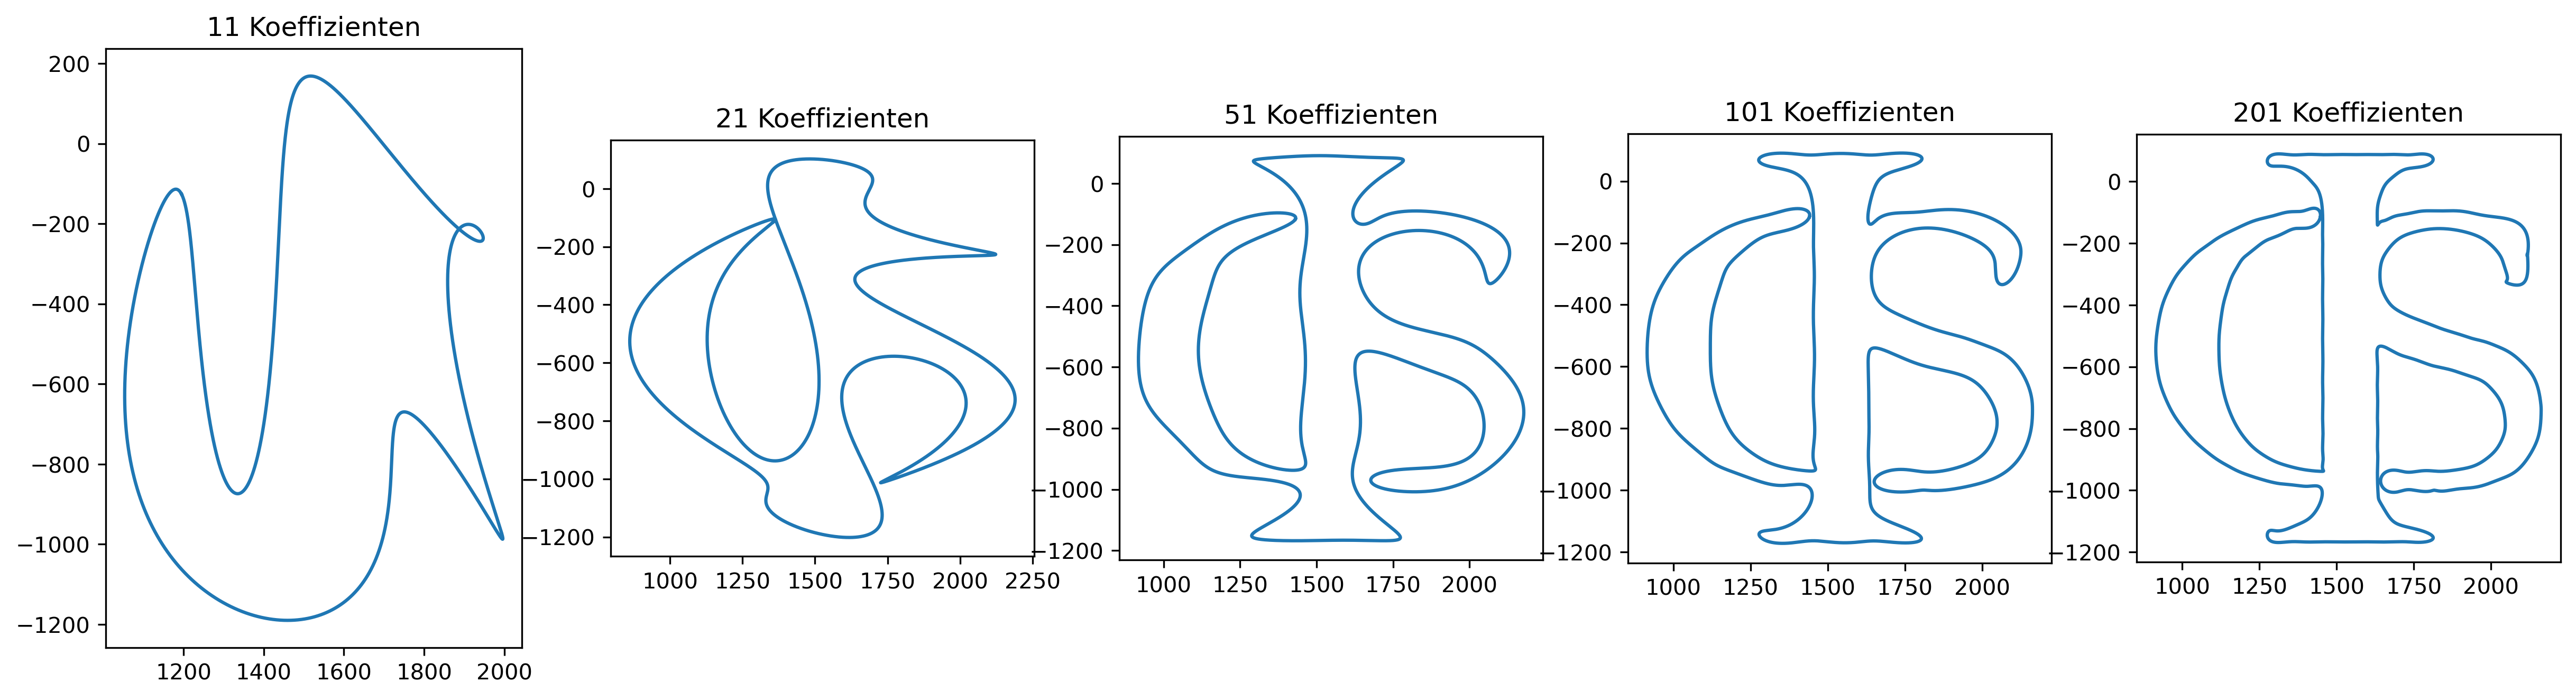

In [6]:
# Select Level of detail
sizes = ((6, 11, 26, 51, 101),)
#sizes = ((6, 21, 51, 101, 251),)
#sizes = ((51, 251, 1001, 2001),)
#sizes = ((21, 101, 251), (501, 1001, 2001))

points = 20000

fig, axes = plt.subplots(len(sizes), len(sizes[0]), squeeze=False, figsize=[20,5], dpi=300)

for i in range(len(sizes)):
    for n, ax in zip(sizes[i], axes[i]):

        I = [sum([c * np.e ** (1j * r * x) for c, r in zip(coefficients[totalcoefficients - n:totalcoefficients + n - 1], range(-n+1, n))]) for x in np.linspace(0, np.pi*2, num=points)]
        X = [i.real for i in I]
        Y = [-i.imag for i in I]
        ax.set_title(f'{2*n -1} Koeffizienten')
        ax.set_aspect('equal')
        ax.plot(X, Y)


plt.show()